In [2]:
import numpy as np
import random
import xlsxwriter
import os

In [3]:
Bloque         =list()
X              =list()
Y              =list()
Z              =list()
Ton            =list()
Mineral        =list()
Ley            =list()
CMina_CA       =list()
CPlanta_CA     =list()
CMINA_S        =list()
CPlanta_S      =list()
Recuperación   =list()

In [3]:
bloques_x = 20
bloques_y = 20
bloques_z = 20
tamaño_bloques = 10

x_init = 130
y_init = 250
z_init = 530

z_max = bloques_z * tamaño_bloques + z_init
elevation_prima = 6366 - z_max

In [4]:
for z in range(bloques_z):
    for y in range(bloques_y):
        for x in range(bloques_x):
            X.append(x * tamaño_bloques + x_init)
            Y.append(y * tamaño_bloques + y_init)
            Z.append(z * tamaño_bloques + z_init)
            Ton.append(2700)
            # Calculo del costo incremental
            valor_z = z * tamaño_bloques + z_init + elevation_prima
            CMina_CA.append((12732-valor_z)*0.0015)  
            
            CPlanta_CA.append(7)
            CMINA_S.append(10)
            CPlanta_S.append(7.5)
            Recuperación.append(0.7)

In [5]:
## Se generarán las leyes respecto a la distancia que se encuentren del centro que toma un peso de 60%  depende
## mas un valor aleatorio que toma un peso 40%, este valor está asociado a un valor aleatorio entre 0 y 1
## estos valor entre aleatorio y la distancia se pondera por una ley central que en este caso considere que es:

ley_centro = 2.3/100
def ley_dist (x,y,z):
    ley = (1 - ((((bloques_x/2-x)**2) + ((bloques_y/2-y)**2) + ((bloques_z/2-z)**2))**(1/2))/(
        (((bloques_x/2)**2) + ((bloques_y/2)**2) + ((bloques_z/2)**2))**(1/2)))*ley_centro*(0.6 + random.random()*0.4)
    return ley

In [6]:
for z in range(bloques_z):
    for y in range(bloques_y):
        for x in range(bloques_x):
            ley_Ac = ley_dist(x,y,z)
            Ley.append(ley_Ac)
            
Mineral =list()
Bloque = list()
for i in range(len(Ley)):
    Mineral.append(Ton[i]*Ley[i])
    Bloque.append(i)

## Visualización

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [8]:
Rango_Leyes = [np.quantile(Ley,0.6),np.quantile(Ley,0.8),np.quantile(Ley,0.9)]

lista_ley = list()
for i in Ley:
    lista_ley.append(i)

In [9]:
lista_1 = list()
lista_2 = list()
lista_3 = list()
lista_4 = list()
bloque = 0
for i in lista_ley:
    
    if i <= Rango_Leyes[0]:
        lista_1.append(bloque)
        
    elif i <= Rango_Leyes[1]:
        lista_2.append(bloque)
        
    elif i <= Rango_Leyes[2]:
        lista_3.append(bloque)
        
    elif i > Rango_Leyes[2]:
        lista_4.append(bloque)
    
    bloque += 1

In [10]:
sum(Ley)/len(Ley)

0.008191725505023964

In [11]:
np.quantile(Ley,0.8)

0.010813787570879262

In [12]:
def t_cord(cord_):
    correct_ = []
    for i in cord_:
        if i not in correct_:
            correct_.append(i)
    size = correct_[1] - correct_[0]
    max_ = max(correct_)
    min_ = min(correct_)
    return (size, max_, min_, len(correct_))

def generador_matriz():
    Matriz = list()
    for x in range(limites_x[3]):
        filas = list()
        for y in range(limites_y[3]):
            columnas = list()
            for z in range(limites_z[3]):
                columnas.append(0)
                    
            filas.append(columnas)
        Matriz.append(filas)
    return Matriz

def cambiar_matriz(matriz, lista):
    for i in lista:
        z = i//(limites_x[3]*limites_y[3])
        y = (i - z*limites_x[3]*limites_y[3])//limites_x[3]
        x = i - z*limites_x[3]*limites_y[3] - y*limites_x[3]
        matriz[x][y][z] = 1
        
    return np.array(matriz)


limites_x = t_cord(X)
limites_y = t_cord(Y)
limites_z = t_cord(Z)


Matriz_1 = generador_matriz()
Matriz_2 = generador_matriz()
Matriz_3 = generador_matriz()
Matriz_4 = generador_matriz()

matriz_lista_1_f = cambiar_matriz(Matriz_1, lista_1)
matriz_lista_2_f = cambiar_matriz(Matriz_2, lista_2)
matriz_lista_3_f = cambiar_matriz(Matriz_3, lista_3)
matriz_lista_4_f = cambiar_matriz(Matriz_4, lista_4)

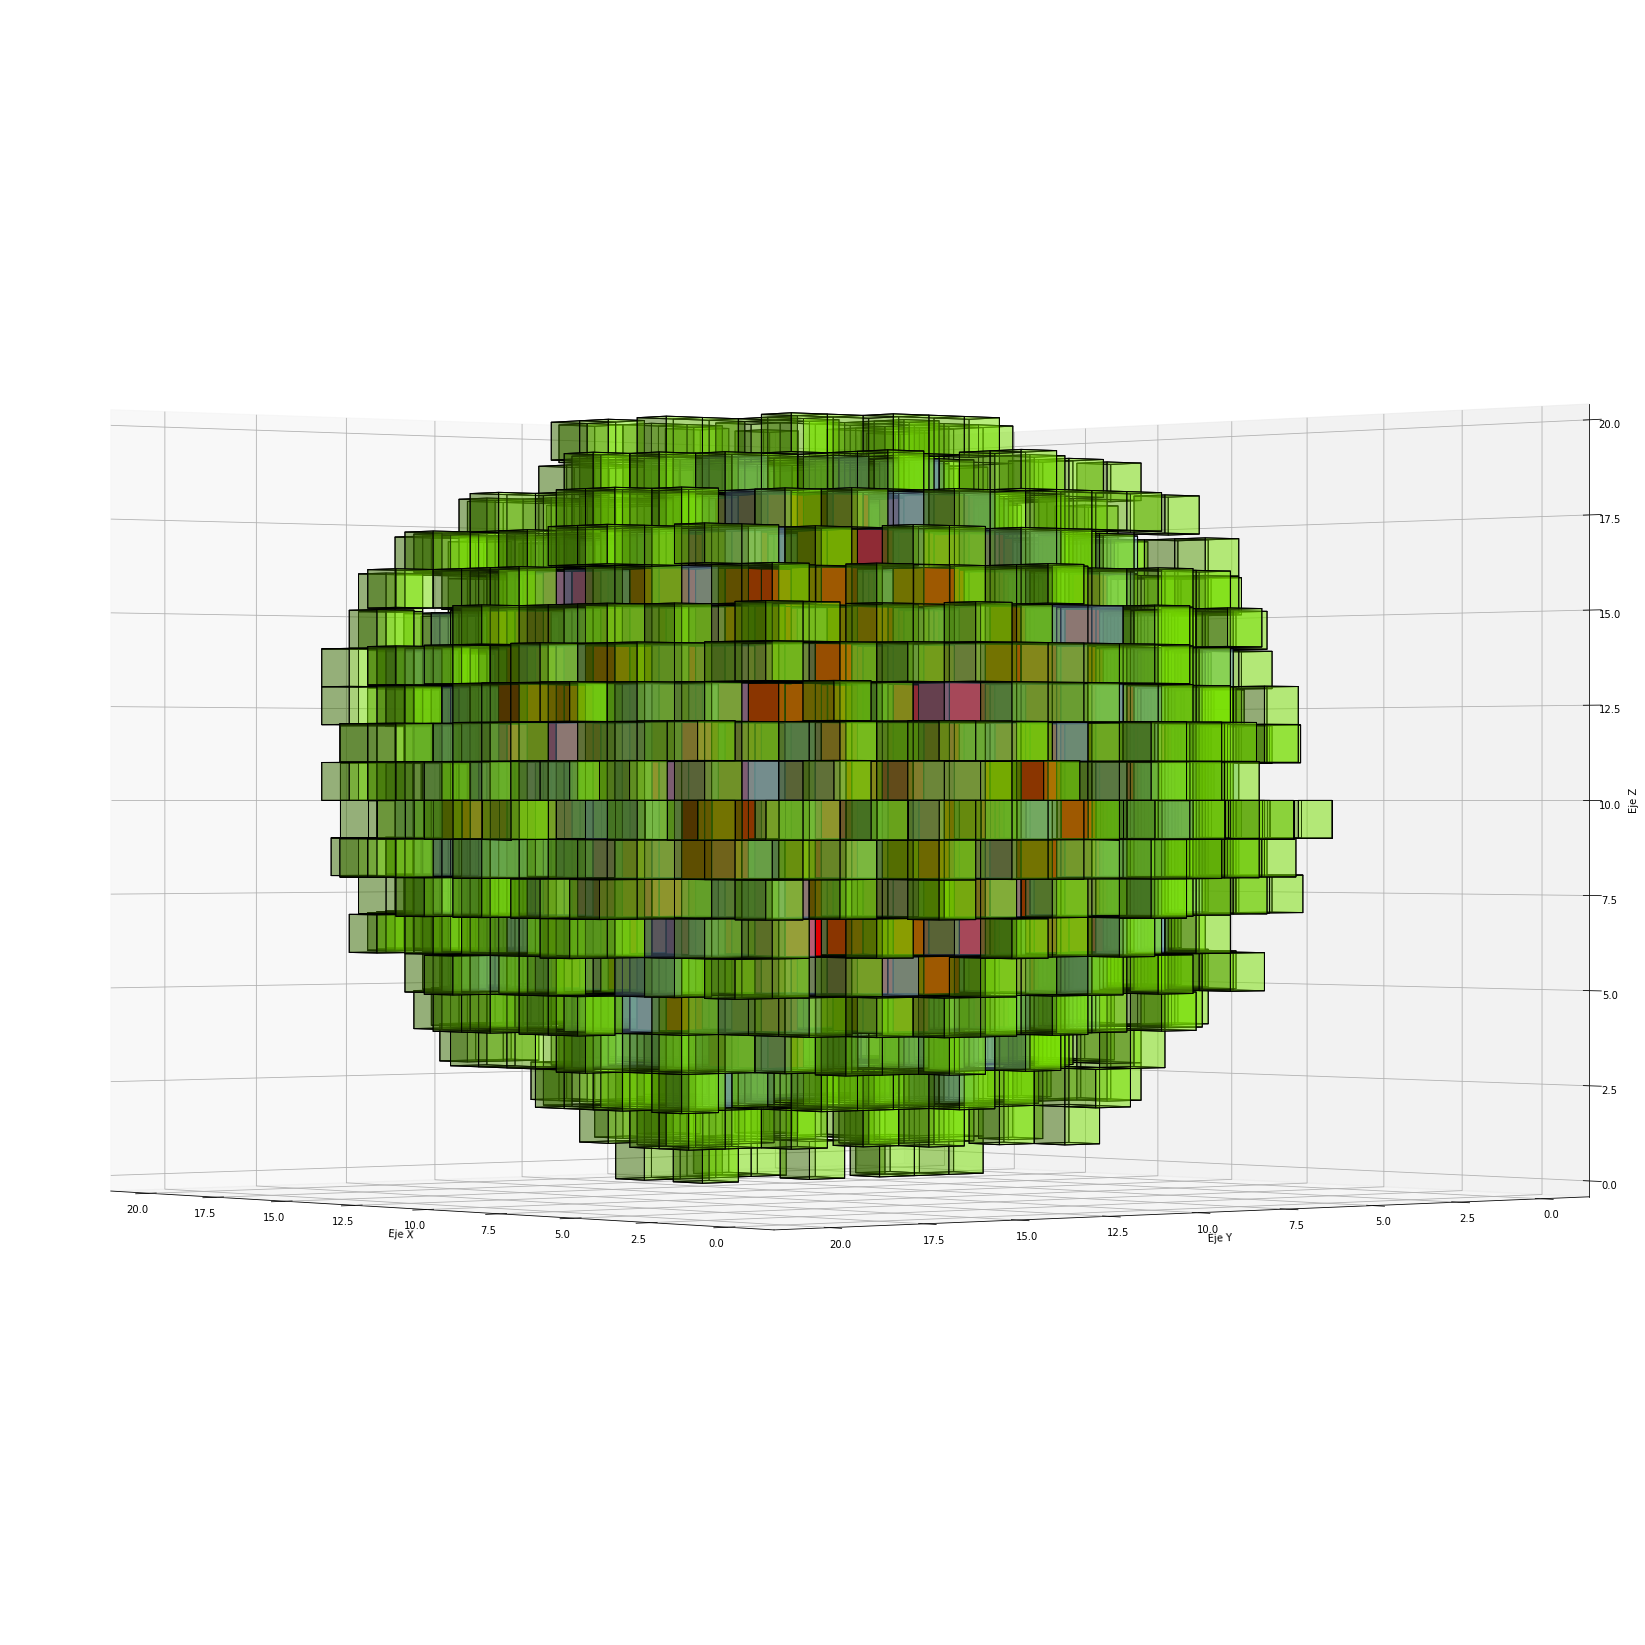

In [14]:
fig = plt.figure(figsize=(30,30))
ax = fig.gca(projection='3d')
ax.set_aspect('auto')
#ax.voxels(matriz_lista_1_f , facecolors = COLORES[aux_t]  , edgecolor="k")
#ax.voxels(matriz_lista_1_f , facecolors = '#89fe05'  , edgecolor="k")
ax.voxels(matriz_lista_2_f , facecolors = '#89fe05'  , edgecolor="k", alpha=.3)
ax.voxels(matriz_lista_3_f , facecolors = '#a2cffe'  , edgecolor="k", alpha=.3)
ax.voxels(matriz_lista_4_f , facecolors = 'red'  , edgecolor="k")
#ax.voxels(MATRIZ2 , facecolors = 'red'  , edgecolor="k")
#ax.voxels(MT1 , facecolors = 'white'  , edgecolor="k" , alpha=.3)

ax.azim = 140
ax.elev = 0

ax.set_xlabdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABm0AAAZtCAYAAAAgnRAvAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOz9d5xs+V3f+b+/J1VVd3X3jZM0mqAspBFKDBjLGCwL+NleaVfsgsMuYFh7nX7L2muv9QDM2g8QEuzasIYfFkawyAhj4yBARAkhgiKjMEozkibdOzffDre7K534/f7++J5TVZ1u0p2ZMzOvp1RT3VXVFU6F2/19n8/nY5xzAgAAAAAAAAAAwFMreKrvAAAAAAAAAAAAAAhtAAAAAAAAAAAAWoHQBgAAAAAAAAAAoAUIbQAAAAAAAAAAAFqA0AYAAAAAAAAAAKAFCG0AAAAAAAAAAABaILrC+e5JuRcAAAAAAAAAAADPDuagM6i0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABoAUIbAAAAAAAAAACAFiC0AQAAAAAAAAAAaAFCGwAAAAAAAAAAgBYgtAEAAAAAAAAAAGgBQhsAAAAAAAAAAIAWILQBAAAAAAAAAABogeipvgMAAAAAAAAAAODZyTm35/ig05xziqJIUfTMjTaeuY8MAAAAAAAAAADcMPuFKc3x7tOstdPj3afNhzDXctvGGH37t3+73ve+992AR9NOhDYAAAAAAAAAADwDXW0Vy35hyu5g5VpCliZgmTf/vTFmeth93pWsr69f9WWfjghtAAAAAAAAAAB4ij1RVSy7A5S1tTU553T8+PEdt707VJk3H7JcS8CCa0doAwAAAAAAAADANbqaGSzS/mHKU1nFUlWVrLUKw/CaHi+eHIQ2AAAAAAAAAIBntK+kiuVyAct+Acp+t31QFct8sEIVCyRCm6etsixVVZUkXbbv335v9IMud6XLAAAAAAAAAMCT4UZVsez+2cvdnjHmCZ3FAlwNQpunKWutrLXTDxLpyh888+Z/7nKXOeg0giIAAAAAAAAA0tUPu98dtlxvm7Dt7W1tbGzorrvuumIVy+5KFqDtCG2exnZ/0Fzrh85Bl7/ch+L19Fi8Fpubm+p2u+r1envu40FB0ZVOP+j7g04DAAAAAAAAnsmutYrlctUs8z97udvbr4rlcsPu9zt/HjNZ8ExFaIM9rjbIuJGBR/PBfvHiRR07dmwa2sx/4D9RQdGVyh0Pusz1Vg8RFAEAgLbL81znzp3T2bNndfHiRV24cEHr6+taW1vTpUuXtLm5qe3tbW1tbWo4Gmo8Hms4HCjNUi0t95XEHSVJom6nq26np15vQQsL/rC4uKh+v6+lpaXp8crKilZWVnT48OHp8dGjR7W8vKwgCJ7qzQEAAPCUutYqlhs57F7af62s+ZoqFuDGI7RBK1xN27XLnX49DvoH6qkMip6ItnMHnQYAAJ65fvVXf1WPPvqoRqORtre3NRgMtLW1VQctWxqOBhqNR0onE2VZpjwvpjMTbdX8cS4FYaAwChTFoeIkUtINlXRjdXr+0FtMdOymjhaWbtLF04kevP+EvuVvvliTca50XCid5MrG20onGxpOSuUXS+VppSIrVWRWRVaqLKzKvFJZWFWlk62sbOVkrSTn74cJjILA+PsThoqiUFEUKYpixXGsKIoUR7HCMFIU+u+NMQqCQK95zWv2DYgOHTo0PRw9elSHDh1SFLX/z6OyLHX+/HmdP39+Gqitra1pY2ND6+vrc4Gaf54Hg21tbW/pyJEj6nbrEK07C9Ca46WlJS0tLWl5eVnLy8s6dOjQNEAjRAMA4NocFK7sN+y+LEtJUhAElw1brnR7N7qKBcBTp/1/lQBPkKeyouig05/M+USSNBgMtLKycuBlmE8EAMDTz6OPPqrv+I7vUBA3gcfOQxBICubOS6Skb7TUjZQsdLXQ76i7GCtJYiWdWHF9nHRidTqJOp1YnW5HnW5H3W5HvYWOur2OPvPhE3r4wcf13/6t16nTiWXM/ov7ZVlqsD3UcHuo7e2RRsOxRqORxsOJxqNUk0mqdJIpHWdKR5lGg1yTUa5sXKpIS1VFKVtJzkqukqyTMitlLpCc8YcsUDF22jxX6FJxUkVWqch8MFTklarCqir9YT4gkvHbxwSBwiBQEAZ1OBQqjmPFSaIkbiqIuur1FupDT/1+XwsLC3sCouXlZS0tLSmKIk0mExVFoc3NTV26dGkatOwO1MbjsSbpRFmaqShyFUUdqFk3dz/NXKDWhGrRNFDrLsTq39aVuxTozLmBvuHbn6d0nCubDJVOLmltUursaqU8LZVnlYq0UpFXPkDLrcqiuuYQLY4TxUmsTtJRknSUxIniKJkFa3GsPM/1whe+UHfeeee+IdqRI0d05MgRraysEBABAJ4UT2UVizFGjzzyiI4cOaLDhw8z7B6AJEIb4En1RAVFl7v8Qb8slGWpBx98UPfee2+r2s5d6Wf3+/6g0wAATzxrrTY2NnT27FmdO3dOq6urunjxos6fP6+zZ8/qzjvv1MrKynQP/mZxttl7v9n7HzdOlmUygdG/+S8/MD3NOqcsyzUZTTQZzwUjk0xpliqbZMqzXFl9KPJSeZ4r3So0KMcq8lJFkassCpVlpcpav5hvrZyTnLNKt6Qilf6P7/1xf6NGMpIU+K9lJec0DR1MfZkd6kwiDI0PITqJugsdrRxeUn95Qcsrizp0ZFmHjx3S8ZsO69jNh9VfWlQQ7O1l/qcffEBv+9736Gd+/x9c1XarKqvxMNVoO9VoMNGltW2tXdjUpbVtba4PtL050mhrotFwS+loVVvjQvlqJVs42UrTg5s/roMlZ6Wq8I/PhHVYdhWBWtwP1O9F6i101OsnWlzuaXG5q26vU4dqiTpdf+h1O+r0On4+5EJz6OkL953Qow+e0d/552+87ON3zmo8mmh7e6jB9lCjwbgO1MaajFJNxn67bG+NNdpKNR7kSse58lGpPM/846yk0kpF/bUrJOeMf+6rQM4ZDVdL3fepj2nleG8aEFWlVVnYPQFRE05dLiDqdjpKkq563Z66nd6OCqJ+v69+vz8NzpoQ7fDhw9OQaGVlRceOHSMgAoCniYO6oxxUxdIcXy58uZrbfCKrWIIgUBAEzGYBMEVoAzzDXanV3I3uOdrGtnPzXzOfCAC87e1tnTlzRhcuXNCFCxd08eJFra+va319XRsbG9ra2tLW1pYGg22NxkONxxOl6UR5nquoF+5t5RfsJSkIjcIwUFjv9V+WlbJJruPPWVJR+L33Z9UNTlXl5KyT839L1wvWvp3VjsXZ2Le/SuJkx4yUbre3Y0ZKMydldwusps1T0/Lp1ltvfVq0wLoR8rzQcDjQaDTScDjSaDTSmTNnlGWZyqpUWZQqylJlkassS39a3SKtmgYyzpeySD5M6AaKAikJA4VhoCAMFcWBwijUpdOFVh/N9NKvP6YgChUEoYyMirTSgx87r//hO79FlXXKi0J5WihLM2VprjwrlGWFirw+FP6+lWWlsqw0GaYabo10/vSqbGVV2XqRpXJy0iwEmoYggcLAKN12KopK3//3f1xB1Cz8GzlZVVWlMIjqlmxWtrSqKidbWh+0NK/L+p/6IDQK62qb/k2xDscL08qjbq+jbs9XKC0s9rTYX1B/uaf+0qKWVvpaPtxXv9/Tv/4nv6XPfuSEfvyX/oEP0dJc4+FEo6EP0tJxpsk402TiQ7Q0zf32SXNlWeHfe1mprdVU68VQRVmqKEoVma/EKUs7XZxS82uWk7KhVBTS9/2PP+y3Ux0KyfjzrdUsUGvCNGlPoGaMfFiSROr2Eh0+3tdCv6ul5UWtHFrSoaMrOnbTYR09fkjLK30tLHZl9glC/uGb3qHjx4/q+9/5P1z29VsUpcaDVKPtiYaDVJNBquEg1dbGQBurA21t1EHa9kTjwSWtj3Nll0rlZ0uVhZuGZzuCNLv3INXH+wREYRQqjiJFcawkSdRJEnU6PV9l1V3Y8xnUVFk1QfXuFnNNWPRs+QwCAOmpr2KZRxULgKcLflsEcEO1se1c8/VTMZ9I8sOcO53OjsswnwjAk+ntb3+7fuAHv7/+LNRsQXduoXu6mFvv7R93QnV6fnG22+/o2C1dLR26WctH+jp6bFlHbjqk47cc0c23HVGvt7dS5v3/5T792rs/qP/34//wsvfNWqssLfzC7NZE41Gm8SDVZJhpNEh1aX1bWxtDbW+ONNyaaDTY1PooU3apVHa2UJm7y1Y37FicdZqGTNOQqA4f/AKtb9/UhESdpFPPAOmqO7dA2+/3DwyJmkqipsXFoUOHrmkP/u3tbZ07d04XLlzQ+fPntba2ptXVVW1sbGhzc1Obm5u+ldZgW6PRUOPxWGk6UZbnKuq5NGVRSUb68R/7sbpqI5i2/CqLUkFgZELjn/fmxWCaY8lEUhhJYf2aCMLZQrbfbs3eoHMhW2A02gglIyVLgaLQKIx80FFMjIyRVm7q1+3UfAVIb6GrJIk1Ho012B5qMBhpNBhrOBhrMppoPG6qgjJlk9wfslx5Vvo2XkWpqrA+QCz9c+usZIyVQiNb1a+xUjLWyEWhnAs0GabK0kJHjy3JGKsodLKBlbVOLq5krf/aOidn7ez7rFSelhoNJj70mH8NBUZB5MOrqG5Z5kPHSHEnUpJE+uLnL2mwnerf/7/v8dUxdZu5ylUKFPjHOvd4J+NMeVYozwo/A6go65ZlVrZ0s1Zp9XMSBkZxJ6lvP/aVSkms0aVSZx65pJe/5oXqdjtKur7V3R/97n16yctfoGPHjqmqSlVlpaIolWe58vkAraymoZ4tK1VVpfEo03B7Mt02zln/PmteRnUo1GyfaagbBbpwLtXquQ396Pf/VN1yLlRZFUrTTM7KP8bC+hCqdHULO+vf33PXb6bXGap7PNRSHCuOF3wFUjdWt9tRd6GjXq+rhX5Xi/2eFpcWtLS8qKXlvpYPLeq+P/yy3vGW9+s/fOGfaDTwlUTD7VlANBlmmoxyjUe+VV86zpWOCqWTkfJ0S+vjUuc3SmVny2l7uSKtlKX1c5ZXO8Oi+UqzaYA2WzTsL/a1sb551Z8XAHCjHdS6/WqrWKy1StNUZVlqYWHhmv4Gv5YqFv4uBvBMR2gD4GmvjUFRc1yWpT75yU/q3nvvvSG3e7kg53J7CDGfCHjq5Hmu8+fP71iIP336tO64444d7cKalmFHjhy54XthX7hwQb1+or/45tfKybe2qsrSL8xmhfKiXqAt60qL0i/UVpWVrSql+UDj1S2dv+D8H+b1grbmFyDrxcdmkXay6ZRNKv2z//X/9gvZcag4jhQloYLAaDDcllyoqqhUltZX4VRWVVHfRrNAW+/5b0IpCkPFhyL1jkdK4kVFnVidzmxxdmGhq95iT4v9rvrLi3U7rb6WVvoabqX6e9/ws3rvqR/UZJhrOBhrvJ1qNEj9HJVhrvEwnS7QZuNC2TjXZJwrm2wpS9c0mJTKB5XyE9V0QbbIKh8iZFW9QOuuaoHWOv8YfauN+t+NXWHafJBmjBQlgZJupG4vVm+xo4WVjm69Y0Erh4/p0NElHTm+oqM3HVI6KfWT//Q/6o3f/TqZXeUSv/UrH9VLXnmHnv/S5+z7WnGSbFkpL0oVeV2NU5SqiqquyqlUlIWyiQ+J8rxUnhWqykrj7VJy0pnHLu64zsqfrJ//V/9l+hinFTLN45WmbdTM3PYKmtAoCnwYkQSKe5EWD3fU6fXVW+j4BfmlnpYPLaq30FOn01Gnk+iR+9f0C5/+qP7x27/TV8L0eoqjWO959x/oEx/+nP7xD/2963o/FXmpybgOlaZt5vxxlmVK08xXEuU+dCnyQsWoUD6pVBWVHvn8eR+SVJWqstJoNPbhaK87bQnX6cZa7C3q6NGuFha7Wuj3tNjvaWl5Qf2VRS2tLGrlUF/95QWZ4PL/Vn/8Aw/o3/7or+vv/NO/uuP0D7//U3rVa1+ue175suvaDgcpy1KTcarxaKJ04kOodDxRmmbK0kznP/sxJXFHt992Zx1I5Tp76pSKvFS/vyDrwno2USAjqzAIZIxVELhZOz7rfBu10r/vTB0QmcAHOUE0C3SiOFQchYqSUFEdZMVJpDiJdf7Rocqi0m//2u/Xc5oSxUkkW1nlttBEqSaaKAtyZXGmLMmU20KlKVRGpZSUMkWluLQKSqu4crPPLSMFQagw8sFwUzkYJaHiKFYURIqi2B/iWOl2od//dw/f0OcCwDPf1VaxNAHLk1HFsrW1pfF4rLvuuosqFgBPmaqqNB6PNRwONRwOFUWR7r777qf6bl01QhsAuA7X0pt2/vgrcbVB0Y2uKHoigyKqidBW1lpdvHhRZ8+e1fnz56dzWtbW1nTp0iVdunRpOjR8MNz2Q8MnY6UHDA03ZtZeSfKLvv3DnT3D0HfsqT63F38Q+AW/MIoUN7Mc4noofLK3XVjTrqepBPnkJz+pMA505wtvUqfbVafjB8h3uz31ej1F0fX3z64qq3SSaVIvYDeL2J/68Bf1mT/9kr7m3q+pqyPqQ1Fq9eKq1s9PtHJ4Wc4ZGesUyskYqzCuqxqieg/+Zi/+SsqrSnlWSSabW9QPpgPZgzCYtuqKIj+YvQmLyswvpr775/+LOvUskGYeSBSF2sw2ZQOnIilkbSEb5HJRoaBTKOgVCrJSYVYoyiuprBSWVkm1u72brz4Jo2hW7RDXC7OhP46jWFGUaPXkSB/7zRP65u94lW/XZStZZ+uQxIdpRVFNW5hVRaWyqnylgy2VVbkmm9ta3bByj9QhWn1fysK/jt7/Gx+ZC0B8oFYWpR556KTOnDktUy9yB6bJ3/zr1VX1grh10+fA2iZYcnNB3Wxv1+a1KlVaWl6ot4F/HqpS2nxsTW/6q6/X4tKC+suLWl7pq9NN9CP/+Gf0D97xZ5Sn/vHmWaEyr3xglFu/LQrrH39R+nZmVaWycKrKTLaYaFBZba5bnVp1vn1aXYWy/lipqpLe+c6fkzR7b22fk9KB9Na3/ohkfKxl6gE7r37Va/Qt3/otl33N+wX/JS0fWrqm98q/WX2vvpCd1P/+A39nx+k/9E/err/+9/6SXn3vPdd0ffOKovB/kA6GGo1GGo/HGk/GSicTfelT51RVlX75l9+tPMuU1bOJirLUe3/zvfrt331vXVnkA1mpqb6rK6lM/Tqpe+2HgW8bFgWRwjhSHMbTCrW4biOWJP79lSQddTsddfpdrRxdVKfb1cLiZ3T06FF921/9K9PA6Rfe8W5lk1J/9x9+9zU9bmut0nHq2zeOU42bAC1tQrSmvVwzq8m35hsOCpVFqvVzQ1lr9Yk//lLdFrBSluVyzmphsTdtB5cksa+O6nW1fOyQeosd9Ra76tfVO/3lBS2tLGr5kG+HF8fX/mf2yS9f0AcIbYBntBtRxTJ/+bZWsTR/+/J3HYCrZa2d/i7WHMqy1GQy0W//9m9Pg5fh0P+uOxqNdOHCBb35zW+enp6m6Y7PnTAMd/xNfO+99+of/sPLd4FoE0IbAHiaeLIrii73R8D17I11La5lPlHzx0sYhswnepaz1mpjY2Na1XLx4kWtrq5qdXV1GrRsbm5qe3u7ntMy0ngy1trq2q69DbWzAmDXwPAwNIq7kTq9SL2FRAv9rg4f7+mOQzfp0JElHTm+rGM3HdKho8taObyo/qG+onAW3H7kfZ/Tu/6f39R//MI/PfBxTIa5RsOJn9UwzDQeZBqPUo0HqdKRr/5Ix7kGW2MNNkcabm9oe5hqcq5QOi6Up6WvWKnbheVjKUykX3vveyTN5jg0lTImDPQD3//917XdwzDwbYf6vR2nr58Z6gufelh/8S99w56f+cTHP6X3/uf36y3/4n+95turqmoaEk0XaZsF2npGyu6QqMgLpYORJOn0Q+uqyrkApKo0yTLZysqYWXXMjtfBfo87Mko6kZKub38VRXUlURzWi/qR4o5vQ9VJYsWdWTusTifRyYVL+tPfOal7/8JL1et11e3Vg+N7HQVBKCen0XCkwfZIg+2hhoORHwo/nGgyqgOyceZnn0wK5Vk99yQtNN7MNZCVq+zOh1C/DKvCKpv4xRsT7KzFMSaQnJP/X/NaMTJmVvY0/Tegqi8VSFVlVJb+9PE49RUPdShUFX5TfvJPP+O3Uccvggehv+VHvvyYD93qtmsmkHJbyAWSS6yC0EqxlayTKSoFZSVTVQrqtllB5RQ2AV8z00VSNvB3+ejzwmmLN2MC2bxUMap0+8v609sMglDnHtnS+vr6Nb8mr4e1VqPRWMPRUM45nTr5uHI70mTiq1O2t7e1uroqExjZqlJlqzoItrK2mgZqaj6z1FRnzWb3BEGgMDbaXPWfbYN0XVEcqNuLFCddmWBLNz/3kG6545CSrq/u+cxHH1bvUKhXv+4FyvNSRVZXWzVBWlHNhWiVyiJTVU6UV07VyE5bmc3mA80FgJVvoba27rS2tq63vvWt9R2X8qFUFdKP/uhb/b/J9b/LX/XSl+lNb3rjgdsxCAIt9Be00F+4rufhj3/nUzrxp+/b8Vn0K7/4Hm0MLugtb/2713WdAJ45rmYGi7R/mMIsFgDPRE3lXhOq7A5a9juUZbnnZ3Yzxvidg+pDFEUKw1DWWp07d079fl8333yznv/852tpaUlLS0t65JFH9BM/8RPTUCZJkn0/D0+dOqXv/M7v1M/93M/pne98p/723/7b+r7v+z5tbGzoO77jO3TixAnddddd+tVf/VUdPnx4z8+/613v0o/8yI9Ikn7wB39Q3/Vd33XjN+w+CG0AAPtqY9u55uv57x999FEtLi7q5ptv/opu+1qCovnTmU90Y6Vpqh/+4R/W+vr6jlJmv+f4SMPR0O89nqZ+KHc9w8NWdrpw2VRdhHGoOA79PIlupE43UnchUacXa+HWro4trmhx+Wb99i9f1Cv+7J06dsuyXxB1laz1sx38TId6nkMxq3aoqvqXTjvW5nCkjW0r9/jelmEKpGCuCiEIjdItp6Io9UP/27+sq0OauSp+zkhVlVpeWvZtpybN/I6mVZWtW5a56eBsY6QgDhQfC9S7JVQUdxTHi4qbPcO7ib780S2de3hTr3z9bUrqGRudTqKkm2i4merDv/Hlp+5Jv0ZhGGqxv6DFa1ykPX96TR/5D/9G/9tb/pc95733v/6OHvjsw/qn//z/u+e8qqqUTbLZnvxppmySKp3kStPU78Gf5nVokk/DpOGlsfJmxkxZyVbNQrvfY3b7glVVSj/91l+eBUS7PwLrFmnTrxvN5Zp8whjFSaik42cQJcd6Wj9xSbfccUydbqxOr6NOJ1YURfrTD3xZdz7/Ft31otsUx37myu4WalerstZXWI0mGo8zPZyva/v0lg4fXVJet1YrC99CTpJOPby27/U8/sj5vY/b1dUes4c43R7B3AymIJSiuHkfGQVRpDAKFYZG+SUrYzLd8rxFBXWFSBAG2j450vbZie546RGFga8GCsNIly6Mlee51lbXfIjW7U2r45x1yrJsx959k8nYt0hLJ/61kGbKct8iLZ+rZqnKUlVl9dinCw0vyf/R13xGGB923f/Z+9U7GSoM/NyXrK446vYjGTk5IymWAjkFpmnBNfeCaa5PzgdsxtQtxYwU1i1bNZGtApUKlFf+OR+Nh1rbKHwbrzBQluUKskCraxf9Z5YJZCIjazOFoaSOU1DZaUVTWVo/g6Zq2inOKp1sZX2oZ+funpGij0thbHTTi0IZE8iYQOe/WKjMnG57yaIC46vm1k4Ptbq6s9UeABzkRlSxHPQzxhidOXNGR48eVbe7d47f5apY5v+OYBYLgCfTftUr84fNzc094cvuIMbO7RDVmFZf7wpY5g9xHO85rblcs9PU1fqhH/qhfU8PgkB33nnnFX8+iiL9y3/5L/XqV79ag8FAr3nNa/SGN7xBv/iLv6jXv/71estb3qK3v/3tevvb364f+7Ef2/GzGxsb+hf/4l/oE5/4hIwxes1rXqM3vvGN+4Y7NxqhDQCgNa4nKJq15rm+FnTXExTdKAcFPs/m+UQ/8zM/ox99248q7hiZwNVD1P08k/k5FyaQTE9KFqVeYpR0QiU9X90QRb7aYb7iIWkqHxJf7ZB06tZi3Y6MMbrjhcf1Va+527cM63X9fJReT91eR5I0GacabA981UM9LH00Gms88gvW6SRTOs6UpYWv9EgLZamveCnySmVu1aywZxNJTtremNStqeoh3fVA99FgIt2e6OZbjql3c0cLiz0t9LtaWmlmtCxq6dCSlg8vqtNJrmq7/uwPvE9rpz6tl77ieXvOK7Odv4j7CoCRBnWbpa2tLfX7/bqlWtdXhXR7SjodXWGUxjPC+9/3Pj366GOzSof6j5fK1cPR6552bm4zmias6waKgkDdMKjDhGYuS6j1x0pd/PxAr3z97UqSqK7aSZREkf7gPz2gr/uGV+u1X39PPZi+Hk4/zv1ckElWB0WFsmYuUdYMjS812krlJF1a257OH/Jt5vxQ9xMPn9GpE2d2VJT5ALB+Qo2Zvt9UVx8ZJ1mnurJjVzhZ/9jmBX+ZjdVtmSBQVM/xCBdiSRN9zevu0fKhRS32F7W41FOnm+gXf+q/6hu++V51usn0c3wyTvXH7/tT3ftXdv0R5mZhwDQgqKxc5Xxlh/Uzhar6MnEvlyRVJlVe+sDMVtIkrVRV0umzj8+CL0npRNpYP613/Nt37Dh9j+n2mn0/v738HB4fvsS9UL2O/wy6eChVtlXqFX/2DvUWO0riSFEc6Xd+8bO6597n6QVffYuvdJL04Kce06lHL+ib3/x1V/tSVZ4X/jNpnCodN+3BCk0ujiRNJAUqikp2UspWlZyTRlup8iKdPofZRFIsPfLg6X0ft5n7euespuaz2ijsSHEYyIRh3S6wbltY/5H+QGeozmKo2198WFEQKAgjbZ1eVRlJL3rVrYpC3wry06MTcgOn0WisXq97Q1rNAmiPJ7uKpQlWrreKZTgc6siRIwrD628pCwD7ma9euZqqlYPO2x2wNNUr+4UqYRjKOacwDLWwsHDg5YIgeNqsJRzk1ltv1a233ipJWlpa0ktf+lKdOXNGv/7rv64//MM/lCR913d9l77xG79xT2jze7/3e3rDG96gI0eOSJLe8IY36Hd/93f11/7aX3vC7zehDQDgWa2NFUXXM5+o+SP0Spc56LT9gqLm+vb7Re2JCooWFxe1uNTRv3r3P9lznnVOWeorGSbjembBOFOa1YvY2awtVpblfgD2ONVomOlSPlJRFCrLZuHd1lU1fnH3D3/3Pn3oD+6bDUffr+ph15B0vzhbz3oINbcgHyjuxlo8vKBOL1ZvMdHCYk9LK37uwakvbulPfv1B/Z1/9t9Og5BOpw5Dej39k+/+v/Tf/PVv0Ctf+/Kr3m62qjQcDTUajjQcDjQaT+bm7KR66KETKvJc999/f/0LfaXKWjlrlQ79tviRt751x7wS1a2zXGkVJYFsPfx774J9s7ih2WyTINDWWassL/VTP/Wvp38ERGGkMIo13J6oLEv92nt+TUmSKK5nYHSaQ7fjh8l3u+p2unuqHp5Mn/ncZyVjFSX1inXkZIz/JdrJak+RyjQIcZIqmcBfxhmjyhg5Z1QWRlnuW5dtbq7XVVh+WHkQ+DYAjz3yuExcKekk6tYVU73lWJ1FozyPNB4FGo+cNC7lAqdSVnKlbFmosqUkTecq+VzJ7ggiTN2GzJg6MKyfNxMEviol9IPcR8NUWZrryLHDswConn1i6z8wnfVtsKKokFGlIAzkrFSUvmKtzP1Gue/Dn5vNw5nbbh/6wCd90FG/n5ptevrEWV+JUd/PwBiVlX9szs4W6Zq/T52TZJ1/XiTldbs2G+QKglBBfbtRxygInJaOxDJ1aBoEgS49lmr5WKyX3HuL4iRWkviZLR/4lc/rFX/m+Vo+1KvnDNXzdeo2e1VZHypbt9yzqqydq66qNB6XytJcVeX0yBcfn7ZidM6qqqQH7n9Yj554pH5ypHIi2VJ6/3s/5Cv2pHqjueb/c9tAez+vzOxoNJi9NjtJonjRt+47YdZ17NbDuun2FSVJrLgT64H7TmjxcKQ/95dfPl2YfOiBkzp95oxe9frn7LgJa91cO7Q6xKxc/djr063zM5KsVVWWKisr5yqVldXm9tr0dZRlUplJjzz60PS+DgfS8MJQP/Gv/tWe92UQGv9arYPv5r0zvydnFMaKo6ieLRX7z5k4VtLpTD9vTp0+L2utTjx2og6le7L7tOwAnu2udtj97rDlK20T1lyeKhYAbeGcu+5QZf6w+7Ntd/XKfockSaYBy36Ha93B5ezZs7LW6qabbrrRm6m1Tpw4oU9/+tP62q/9Wl24cGEa5txyyy26cOHCnsufOXNGz33uc6ff33777Tpz5syTcl8JbZ6mrPWDWaMo4pcTAHiaeaKCostd/mqCot2XOX/+vCaTie6+++5ruh+Xu09XajtX1Xt/+72Edj0eY/SFL3xeH/3YR+rFwHq2wzSAsbPF6fmZNKZuTdYx6tath8IoURQFCuNAG49t6fYXLeumu5eUdCLfVqwTq9OLdf8fP6a1cwP9zbe9tp7vUE3nOzTHVWmnbaD8134vKVuUKqtcZTnUZmG1fsHJnrVae9jf5/f+9m/4vd2tpouwclJRSu95z3v0W7/3numMCsmHIrbyi9EmMNOB4fNP2+49/2X8Hv9b235htKgmCsJQcSdQN/QVSWnP6bwZ6Bv+8lf7sKQbTX/hz/NCv/MrH9N///dft+e5rWxVD4wvVGR+3kU+t10e+vglDdc2dcsLF1WWVV0NMlGWVRpmuax1evjkF1SVzeK1prNk5tuF7bcg3SziN4u2TbXddEj67oXbOFY29rfzm7/5m0qiesZMkqjT6Wh9fV1lUejkycfV63Z9xVW358v6g0B3veQ2Pf9Fz92zDQ5inasX9wu/wF+WsxZ7VaWirFSuD2W0rsWFpbrdXt1myhayzmnt3JYGlyb1YrgP2fIsl3NOvYWOwsjPhUk6sZIkVreX6MjhJfUWOipzq9Nf+Kxe/PK768oyH/ok3US/8ysf10vuuUMv+KrnXPmBSHrgs4/qwpk1veJVX3Xly8bn9MlTj+nP/4U/s+P07a2JfvexT+pt//oHd8wk2toc6Od+6t36qpe/SEVZypaVytIPgj87Pqc47sjVi362ciqqUmXpW3k1pq9/p2YKz773zamSnJGc8cGTpKqyMsaqcj4QstapKkqtr2/4EC0IFNRB4aWNSyqrTGHk26nFnVCVSkVhHSCERiolBZIrnWzRzJuxcpqryHKq2znWb/r6b2tTt3VsQjRXWLmq0sJiz7+2g0AmDOSs9eGl21lBNW29Z31wYp2dfpYGxocQPtB2O95ba+cuaWv7kp9tZKR04FTK6I/f/6dSHcKWRSVnKp0+cW52f41kK+dDNlfvIVqHZrOKLL/ld/zb0lToBE7J4myRNYwqudhp5eZO3TLDaHAu0+KhQPe87nZFcaQ4jvSZD52QUaSvft2dKoqqnrnjP3+qwtbtLCtVRaWqHCsvrNLSqcysbOG3TVm66XbaeLxSWVr9+//wy/W2lCabUrIgvfWtPzx9rD6cDqYt3iT/Gby03FcU1hWeUR0OxZHiKJ6G0f7gZ1k1QX0T1i/UYX0Y8mc5bqxrqWJpFg+DILhsJcuVbm+/KpbLDbvf73wAuJEOGm5/NaHK/GH3Z9WVwpUwDNXpdC57Pp9/T77hcKhv+7Zv00/+5E9qeXl5x3ltXFvnt8OnqfF4rM9//vM7+q7u1ixgNIsYu7/efXyl03af38YXNABgf1fzeb37Mk2FzfW0pLnetnPNUMKq2r830Wc+c7+Go4E6vchXPMgpMs1ibb0Xugn8sTP+dOckV+85HUhWRtYZlZVkrPEtgsZDra+lPgBoBnjXVQZG0iMPP6YwDPxMjCj0bZ96oaKekRSqLJyK3KkorcrSqSqcyqpSVNSDw0urql547qz6yovl2/x98oPgAwWhJGN08YFSh26Ldfi2WKZerG0GpT96/7rCONAttx+VVM/QUb1AW7fqsnXVg7VWclbWSUFcV144v5hZFLPtng38QuXH/+T++jVg/MyQwExHZvzR+z9Wt2+rA7B6+6RZKr946asFmooLZ6XNSz6AW107t7MLV8co6vjWd4eeEymIglnQEtVt7eoFWt/Srg4mOrHu/5NHVUykr/3mF/o5P1lTyVEfF5XKog4/ykpVWagsUk1Kp2Hmt8GJM1+azgWydVutdKvUZCy9+5f/3Y7AqLnTJx47qXMXT+4sD5GUJInu/Zqv2fM6DYxRJ4nUSQ7+VbvaWJMxG/qqe16857xzD35Mf+6bvk7f9M1/dsfp/+mXf1PnLj6uH/jxv3/g9UrSmcdW9f5f+azuuPvWy17uqTA/k2hppS9JuunWYzsuk04ynT19TsdvPrLj9PFootXzG7rj7qsLnLLTYxmzqufeeXv9vvCHMwsDBUGqlUPLddDhwxVjKgUmkGyksrDKbSlrMzknbawOtLUx8EFI0xrPHrCIecDJTUVQnIQKokBx7GfsbDw60uJyV0dvqQOaKNClc2NtlxPddudxRVEzd8fPIGoCDF9FEqn57CvLSnmWK8/zul1eoSIvZcbbetxs6JbnHvULFfUcGmmkKAkVxT5IsqV/71rrlKX+/VJ/qirqSHlef2aZJly1swCtCWjmN4JzB20Kf4npYnBzeamsKgXW+lCo/lzZ2LhUfz4EKstSslbbw83Zdo0rdXuxbCXFlWQLo7IyqkqjopSq0tVVULOKIP84rcZb/rZWnut8FhMYrT3kFIbSsRf4eU9BPXcnqHvBNd8//oVN3fS8rqqiriIqM6Wl1Sj1c32mVUilpq8XZ/3njp2rWmz+GUy3fNVYUgfnPiD0z3MYRfXXscLQVy1GYTwNp3/hF35Br3zlKy+ztdFm11rFciOH3UvSyZMn1e/3dezYsX3bhO3+GgButIPag10pYJlMJppMJhoMBnuG2zdh9EGhSdMKLEmSy4Yrz4T2YJCKotC3fdu36W/8jb+hN7/5zZKkm2++WefOndOtt96qc+fO7Vtx9JznPGfaQk2STp8+rW/8xm98Uu4zoc3TVL/f17333nvZD475P06b3obzX+8+ttYqy7IDL7f7tCciLBqPxzuGVe13eX5hBID2u95qouniwAHDUuKko5Wjfd375+7Ze+Zl1iicNKt0aFo2VZWqotSX3/eQjh49osM3d2d/BJR+j3XZVJI03sr8nAzn52c451urlUU53fM+DINZ8BBF6nS6ipM6gKirIZJOpIc11OMfPaVv+e/+7I5B640HfuMjetmrnq8XvLpZyJ5ti5Of/4iSTqBXvHrvQv/lbN3/iNYfvqC79lns3ryY6uz9q/q6P/saXyVTlfWe6qWyLNeDayd100031e2f/O8BZWVVZKWGl3IlnbjeyE2dg9/z3tTLvX5PfDd9Inyg5L/N80Km8GVBgTF+FkxTORPWrY9Co2D6e0KqaiKdevyUTBDMbRqn0hYK4lAmksLEylgrUzmFdRVLUbcM6xwp6vvgpi3DqkLKxtLhO+UXZ5u2d8bowkOFOv1QS0eD+nXpF3GLvNJoK7+m5wFPjTAKFGr2ZkuSiYwJtHxoacfl4jhXkvT1qtfsrCo6/fkP6+WveLGOHj80Pe3xk2f02COn9Of/ws6ZM/5zwVdZFfNVVmWltfvPabI+0c233uwrq8pSRVFKGqlIK22vj6fBazrwC/8Pf+Hx+qPNTT/jrrge23SYq98fl875YPbiuQ1f0VOH05IUdQItH+koigPFcayzD29rYTnQPV93u5JOoigKdfqxVV28sKa7X3irf99JGg8nOn9m/aoDNGetbydXlgqjdcWxUX+pN62W9L37fIJR1eGGs35brl/YbLaA8kyqcunRL9Uzd/bbFu6y/xxI0rQdYJgYGVNp+fCCb7EWBhqcmsg5q1ufe1hBGNULO7MQJYp8ePb4Fzb14lffriSJFUWzCsWqKv28qSxXURTKcx+e7XxNVPW/R1ZV6VvuXTpVSqbSc77Gh+vOFnJVHfZZyTqjrK4Wk4yMC6TCaPWhTO985zv10z/901f1XOArd1C4crlh9/OX2S9sudLtPZFVLM3MA2a1ALga8+uDV1u1st/l5u2omr+G4faj0Uibm5t64QtfeM3D7fHs4ZzT937v9+qlL32p/tE/+kfT09/4xjfqXe96l97ylrfoXe96l970pjft+dlv+ZZv0fd///fr0qVLkqT3ve99etvb3vak3G9Cm2ewp+oD6ysJi9LUL46laXpDwqJrDY0udznCIgBouct8RBtpWr2x5zzzsI7dfEx3vvDonvMGFx9QOrqk13zdK/e93j/+g4/q5a95vm6+7fjl79vcP12PRqPpSW7/giIfCk3P2/vvnr3sIs/eDTG3I/uBF+8t9vZcQ5YVevCTJ/WCF+9tkZfnhT70Bx/X677pa/e9F/frrC6dPKFvesPXT+9DUZQq8kwPfea8Nh8/r7te8JxpRYCfEVL/QVcv8Lq6/ZP15Q0qcqnIpbOn1vbeYF1s5feWrx/HXJu4Zr6JieuWVkEdDIVGk0tW4abTked2pjMymt8LVh8plHQCLRyKZ78PBEbp0Gi0WejCxVVFdQVEGM7tFR/yR+MzTVVZ5UWhPM80Ho9krdXjp077127lZ2aNRyM/L0r+tdu0MZNzGo4qVaV0YfXMjkouSaqUy8V+7k5kjKrcyFZOy8dj/ztuFCqcvmYDRfVxEAY68cCqeiuBXviqm1Q2LSNLH0xWldXjynT6ExPd9pJePcerqSySkkWrcDGTdU4T6ysE81w6ceqx6f1PB36+zukzp6fbwpY+PDp16nHNItr6Q6b5ffmAz6mqcioraZwO63CpqZKUwriuPgwCBZFT3A30nBcuK6yD8YfuuyTTC/Syr715en0P3X9Wt952s15yz/N23U7l21rmPrAvylJVPY+oKCtVZalibSCZTcVRoqIolU1yFVkpEzidObnuw/vL+ND7P7m7AG9qvorSNJ8pka+ebCqHup1EUd+H+wuBldFZ/a3/481aWlnQ0vKilg/3tbjUk9kv4a9992t/UktLSwee/2z3VFaxXM+wewC4UW7kcPv92oMdNNy+OW+/9mDNz9yo6pWqquodKljexsE+/OEP65d+6Zd0zz33TCuTf/RHf1Rvectb9O3f/u36+Z//ed1555361V/9VUnSJz7xCb3jHe/QO9/5Th05ckT/7J/9M31N3V3hh37oh3TkyJGDbuqG4lWNG+4rCYvKstTRo0d17NixK194l8uFRfsFQM1coKsNl57IsOhypxEWAUD7XfFTep8LXOlnrv+T3+1ZK51+u9+/ZfVJdp/FyWbB0lZ2zx2aztTZ8XP+QqPRWI888oiqUvqTD31oz/UOL/jA6uy507MfM3WQEgWKQqMwNNPKpaaa6fQXRopD6aWvvVnBrlDkCx9/XLe9aFHPfdHe8M05aeN0pg+Z83rp193i2xbZ2dD07dMjDYJCi4fCutKqVGWtispXD5W20CQrdmyvIvVfPvTQl2YnN5vXSc9//vN1223ta0/27OKfkCzLZZvf62ylNM1kbaX1tTUfYtQt0ooi13h8SR/72Mf86XXY4pzTZz/3eUV1UZkxRlXlZCvp9OlTMmH9+6AxytJCYeTDFVPvtB42NWihJOOrW3b24JNMJAWRbW5Atj6vtIX/PbDwx6a+fROa6W1KvoJte7A9nePlH71vQ6iwnoUVlwqc/74JjE1kFXT8YzR1d8kgkpK+nT3WwikfS3Ev8PGMkapMqvJK3YWmPZt/T2eTQt1uNP9W0DQxdv4+GVPKBEZRFMy2gPGhjXP+fdlUmJRlpfXVS81mUZFJtpBOPHRaCqRARkVR6fTJ87p4cbUOVf31JHFn2g6tOZ5W2dXtydZXfUu4jbXN6e/cfrFdSjrxrIIy9G3rfGu6UFEca+Ox03rZq17g2zd2Yz32xdOaZBO97vWvkXTtfwudWxhK5qxe+7qXX/PPPpNcTxXL5cIXybcyuf322w+8PWaxAHiqNcPtsyy77nBld/WKdPXD7Xu93oFBDNUreLp73eted+Ca7gc+8IE9p732ta/VO9/5zun33/M936Pv+Z7vecLu30EIbfCM0abKoiu1lruRYdG1Vgw1XzvnVJaltre3D7wcAODpafda0tUsLe27/tS0qdv3Ctzcf7UjtcjzbHqdh4/3Z5U+rl4cHxSSSvWWknphTWqGydi6BKmqpLIqpUzTxd4882HJiYdPz91nMx28MRiMdeKRdDo4PDCzCoDhqr9vF86t1q3R/J1yzl+vddIkG/uFOGNkIqMo9rcRhEZJvWDtx1oYBcZpolLPeeEhBYHfa97/sRvqoc+cu3J/pqtknZSlqYbDgUbDgbI81yfuu0/j8URpmipNJ0qzTFmWKc8y5WWh7dWJ5KSPfOyjspVVEBp/34NAVVXq1OnHtZWe9xVF4Wxm0vQP+8DPXAnDUKPhULaqtL6xXj++2M9SiUIFYfQVhItPvPWNDTknXbhwfsfpee5fbpPJeMdr29WvM4VWYWCUhL4yQibX8pGOesvJtBJrtJlpczXVrXcf8RUwQaAgDPXYg+d05KZlHT62rN1OfWhNoyTT3S++rZ4D5RdYTn/qopYPLerQsWg6cybbzlXIygSBX5yu/PtnPz5bchpsjSXtfrsaZWMrOWk8zPb8bDPbafqD9Q9HUVi/h6QwdJIqhWFQV68ZubpyLayrg2QkW0lZKsXd2F9OwbTVpX+f+/e/CSoFgVHcieu5Lk4m8I8tCOsgxzkZ2WlINf2ckH9rWWtlrFFlZgv4RVaHWHV4Fh/panFx0c/JqudjxUmkThL7lpWdRF9aWNdDv3NC3/rm2fyoD/z7L2o0HOqb/tLeeVXzPvW+07rjebeo6XN5unNBWZ7qegKbp6unSxXLxYsXdeedd34FjxQAZi5XvXItQ+7n5XmujY0NdbvdywYsCwsLlz2fQBl45iC0Ab5CT9ewqCxL5XmukydP7nv56wmLrrX1HGERADw97P/nn9l53u6gqA43jh4/vOcni62BTLCp226/ec95kg4MPL548aICSc+961hdKVP/m1aUGm9sqhPHWlrqzdqqWednSmSZ4rgnqdTyoX49u8IHLVEYavuRbQ3Opnr+i/fO53j4A6fU6SVaPtTZeUZZSKbS8uElNe2h5ln5wGXecLCtEydPylmns4/6llT3feK+uh2e9Yvv1iovrD74wQ/qw3/6wdm2CIzSbaeoI33gD39/On/Dz9qo520koXr9UMb0JDPSkZv6Wj27peO3L0tyqiqnC18slPQCdfrGzxOxpUor2dJXXzQVCNb6hdHxwKoonb74xS9Og6463aif6Po/xmjjMR+2ffgjH/bbpF44KDNfsfTrv/4betOb3rj/k/sECOpA79DR5Vlo6KQkSWVMqYV+b7ZwLMkEuW9ZtZDUAcOskiyblKpc6ecyyamc+LDj/Om6Vd90739p/eKmLq1v1tuneWU4DbZ8i7/HvvT4zjvqpO3NkVwyexWVTWGXrYfoRs3z3VR9hNOWjw9vXVQUBXrei/afL2PXR3owWNPzX3zH/E3qk8HjOnrzIR2/q+PbqTmrjYcuKYqNFhb9jK+ysrLOz4OqKls/71Zl4b/MJtn0ve/qsTTDwXjPfainsNTbyG+7Ii/rzHX2uMMwkAmCOiwtFMWBbnnOYf9ejUKNz69KnVAveOlsUOyXPnVWt95+s176ill7tN97z4f00lferUOHV/bdJtP79SxqYzj/u/31VLHsN5flWm77aqtYWHAEcKNc73D73ZdrPu/mK+1u9HD7hx9+WEeOHHnS2i4BaD9CG+Bp6isNOMqy1GAw0D337DPM+zIOCoqupbLocj97o8OiawmQAAAtcYX5RL5lUSDFfgG4jPwKd5TEexZpx6OxVi8WOnrziqSxDh/du4gbXE+9yI4SI7ff5KE98zBOnnxcW1tbCkKjPPfnFVU+uzLjpKh+jB2psyTfAioIJCOVqZMJpN5K3cYqcAoCqyD0X5vQSmEla/x1l5XfLs5UftG74/fA7C7EOnRTT9b61ndVPQelsv4+u8ovclgnFROnKndaOFw/UmtmLfWm/2Y7yRlFXUlG6izNL9EbBfVfHI8/fuLat/MNEDYVY/L9yoLQL5R0OsnOy4Wlom6iW27dOaPqhB7X8ZuOqH9oNvdpY3VbFyfbuuvunS2XHv3SaR0+sqTlQ4uq6mBxMBhoPEzV6cQKgkLLh5ami97WOkkjJUmsTmdWZZIGlSQrI+Or06pKKkpl000+e80559uIPfrlx2dRavOQjXTxvA+gHnv4lNQMf5IPWTZWN5XP/QpU5FJUSNtbw3oxyexYrDKBZBTJRU5GlTrdpF5o94HVqMi0tLwoExiFQaCqtBpsj3T46KzyKAy3FSehVg4vTk+LwqFcJC0uLUxPC4JKYWS0uDTb7k1V3bPC/Pur/q/b8bmjaRViURQaDAbTanpmsQB4urme4fa7A5b9Wv1ez3B72oMBaANCGwDXpAk4nuxBb1cTFu0+7YkMi642DJI0bUO3X1DEL4AA8Mxlgp2LmWEUqdONdfvdNyscT/SgWdNdL9hbHXHxc2d09wueoxfcc4uKslJZFCrLUg9MzmqSjvXcO2+vZ+9Uqirrj62VrSqVhVU68i030rFvhzXa8m3Amvktw+2x3OmmFZymLaWCwMzN6vMVHb5LVqlDR1fmqnvqhYwomM5UkaRgMNDaFzf1/JfsDDJG24VOfvycwjC80Zu4lfweuJHCUFIspWmqIMiVJLHC0OrI0UOSpPF4rLyoA8c4VNILfYWYcwrCSjJSmEhyPjixO9fwd92mFMbSfOJpZOTkZ0XJ+LDGVk7JQhNTVoo6Rt1+MJ0pE0RWJpS6y0HTsVDppr/BIJy1cmnuQmXzaTWRrerLp5PmDki2bk84HM5OslbV/p3ensbqjSXJ19nNnbzra7vPmf759ds3y9JrC6acf4199rOf1cte9jKqWAA8oa5muP3m5qbSNNVjjz12YHXL5YbbN38z7w5Ynqzh9gDQBoQ2AJ4Wnm5hUXPajWpDdyOqiQiLAKCFDlhbCEygpJvI14L4SoNeb11Fmem5d9522atcPzPWJ//Dp3Xb7bfqkQdP69bbb1EY+c/9M586o0NHllRooNvuPK5kV7VJnudKktlp6fqmJtuVVo70970tO7/wPD1t54r8dG9/+YqQ5mFX9dduVx+56fe7/oncXWRwWU+DNZv1tbXp/cyyVOPx7E43m6Cycz3vTRPAzC/ES6orqzoLoaRg2pGtuUzcKyWV6iyESodWh2/p1e0Lh+qvdHTk1mTamu9sNFYUGS0dSmTrdnLj9VJmu1KUhNOaj6r0IYWJ5ipxmiKewM4XgtTHdva9054qtCdfcwebSjm39wVm97ySp8fNr29lVck0j61uLViVl3tss0qng+7SfKXUVa09Gk0XKp8twSiAq9MMt7/aNmAHHXb/zXpQqDI/VyUMQ/X7/QMvx9+jAHB5hDYAcBlfaVhUVZW2t7evqQ3drGXK9YdFV7r8Ex0WHXQev5wDQJvsnMWzY0zNE2y+LqFpCdaw05ZOu3/ogNMPuoH9vr7iz+3X6m7n/b1xjJYP9yUz0OJST4ePJdP7UA5S5cNSS8u96faxzs8TcvVMIev/o6Z2w1VzgZmbhWVl7oOfPPdVPcPtUX090miUanM9nd6jqpIqK43rKi1jjGxlp2OM/AgjU1eRVYriSHXBlmwpZSrUW+hMX0S2cBoVuXr9WRBogtntXY19n49pxjILX/xsornXkfWt/3bkMTuu0M++ctKOoMXVmVNl6yE91/qOuOzFr9D7UVcZ1AB4xrkRw+33aw92ubZfT9Rw+9XVVQ2HQx0/fvzKFwYA7IvQBgBaptkz9smuLLpcWHS52UU3Kiy6njlEYRhqNBrJOafNzc0DL0+ZPAA89Yx2Llmb+eP5NmtXWLy+0kf61YYr+8czl6kCcXML+9MAae9lmz2bm6qY5j41IYO90j00Rgp8oBbFV/49YEOFgsBocXlx3/MvLeaSJur1ehrlE60cWq5vZksLC11JqQ4f87OezkRDxZHRoSOz6xpfSDUJciWdeHqazStJleJ4tjOGq5rZTPvciSs8ZDf3nx21W87sfD6c6t8ndjYZa7b5/I37ypd9bqx5fR1U0bLzhXnZ+30VFwHwDPOVDrc/qHrlcsPt52ev9Hq9qx5uDwB4+iK0AQBIevqERc0fOk1YNJlMVBSFsiy74WHR9bSeIywCgKfW1X7ymgMuuXsW0WWvuDlt7p8ZJ6fKVgqCaGeVx56ZNDt+aKfrKes56Geu6rqutXxp7pTd3ewu87B2/qzb8/3V3dVdC531f/f8m2vIU4Bnu/3ag11LuDI/3H4ymeyZU7rfoWkFxnB7AMBXgtAGAPCU+krDImOMFhcXdcstt1zTzzVh0dVUE+0XFl1NJdKNDIuu5TTCIgB4kl0m0DG7L3O58Ody1/cEcrtCp93ByIFhyg3tGce/XcCz1fzv5dcaqlyuPdh+1SvXO9z+gQce0B133KF+f/8ZbwAA3EiENgCAZ6X5sOjJdDVh0e7TriUs8u1h9rdfWHS5aqLBYKCiKHThwoWrqjAiLAKAp6c9n95XX64E4FnmRg233635PfWg4fZhGCpJkh2hSvM7aPMzze/3AAA83RHaAADwJHo6hUXWWpVlqcFgcFWVSAe52rAoDENtbGzIOafhYDjdViYIFEgyQeBnGzg/q0DGME8AAADgAJcbbt8ctra2NJlMtLm5eUOH28/PXtkviCFcAQDgYIQ2AAA8C1xPWBTHscbjsZ73vOdd9+1ea1jU/AFflqWcs3LWyTo/6cBZp7IsZG2l0Wgo53RgCzr/oKXA+NHnRkYKmsHTzQQETW+vKHJlWS5jmjkXfhhCMwC7qqpZiCRdeRI6AADAVTpouP21zmFpfi9qji83e2X+0O12dfjwYYbbAwDQEoQ2AADgCXOtYdHhw4dljNGhw4f2PT9OOspcqP7S0uWvaDr8289msG52onP1sOsdgY+R6oDJOucDIUnV3PDZZnaDnZ/34KRJOtH2YHvndcloOst8PuyRka1KOTllWarpKPTA1DmRkeRU1Qs3piklMmLBBACAFriRw+3nPVXD7fM81/Lyso4cOXIjNg8AALgBCG0AAMAzj9E0JJExCq9w8TiO1el29pweRf5XpQOHzhqp1+1peWlZUp3r1P/xQZHVLOPxYZExgZrqH1efauu2b00wVJal0jStz/Uh0jRUktVge7DvfVFzzb6MaNpCrixLSU5FVTYxkZqIyDq/cFQUpa9MMrPzVC8qudnVAwDwtNBU+zrnNJlMrjpU2R3EzFcCN653uD3twQAAwNUgtAEAALhBzNx/QiNpn7jIBIGMpKSzNyRqrqWTJFpcXNx7jjEKFGhpeW+l0TQYmlYBOVl/Ur3nrf/ZaQVSHQhZny6pKAofDM1VJBV5KUnaHuwNicqimJ7XtJ1rsqIsy6YBVlGUs23jH8T0Nquq2dPY7Og4NytSMqRFAPAsMN9K9WqrVva73G7GGE0mEz388MMKgmDf2Srzw+33C2IYbg8AAJ5shDYAAADPAE0rtfmFpaZJStMuJQz3tk2JQr/ItbDQ23NeXoc2K/u0o2vOW+ovzQKiOvCZpGl9p5q5QnNVSG4WLFlbTSuM3FycNLVrZpF1VtZKWZrtmCs0uz6rIs9n55lZMFSV9bGt6rNmgdDstu1sphEAYF9XM9z+alqGzWtaqe4Xqswf5tuDXe1w+/vuu0/33HPPk7V5AAAAvmKENgAAALhuTSs2X1PkF8vCIJzGHmG0t9qoCY/iOL6m2wpMoCCQOp3OLKhxrm7/5gOiMIqkaUs5zYU7s2BnxodM1lnJOeV5sec2fc5kdy0wmum8I19xNAuJmq/LolSWppLxjzWQ5KyPh6ydVTipcnUrO81dBwB85W70cPuGMeaKg+2jKFK3273s7BWqVwAAAPZHaAMAAICnF6PpYp+xO1uv7R7CHAZ1kFSHR3G0NygKTSgZo06yt2Wdz6T8cOh50+qlKJZPfnZWCfn7Z+ScP6NwTs7ZugVQ6auMJBVloabWZ9rZTlKaZdre2t5xfUVRyFqr0Wg0a0k3e/DTmUR5kUuSbF1lZK2Vsc2jkZyVFPowyk1/GsBTqslxy0q2/ryw1n9mOGt92Otsfbrzl7FWtqq0tramzc1N3XfffXuu9mqG20dRdNkKl+sZbg8AAIDrR2gDAAAAXKPZ3J36u3Bn8BFGoTrdnSFQEIYKjFEcx4oiXx0Ud5J9r7vb6Wh5Zdmf4AuCFMWxgiBQr9ebtpRrZhk1l3FuVklkXRPaVFKlaSs6XyXkK5RMbjRdLXY+OMrybHodTTu5Iitmd64JzHZti6b6yIdFs8tM2885p6IsFRgjE5idrfCAp5P6xesr5ur5YPUrvciL+r3p5t6nbjozzNnm/bDzKsfjiSRpbX1NgQlkAiMTBAqMUdB8HQQKTOhno5lgevrhw4e1srKie+65h+oVAACAZwBCGwAAAKDN6u5pzVLslfZ6T2IfCEVRVB/HCqNgel1RFKiQURwn6iSzyiMnKc9zdZJk+n0Y+IXkKK4rippz3I7vdpQJuXpxurlEVfrgx1aV1lZXfcsmZ5VlviJoe3tWUSRpevosPPKPvipLvyhelDu3zVy1kf/vzkXrqr5vZs85eKabn6Vl61Ry+vp0Ulm3PUyzbHpeVZZydUWbP23v9TavuclkXAcopm5/6F/bxhgfvBhJoVHzv9mcr/mWit5w0X9z8803X9NjbFqVGbNzppm1VsPhUBcvXtR4PNbRo0d1+PBh9Xo9gh0AAICWI7QBAAAAsMf8sq4fzbOztmb3sm8YBL7oaNccozo7UhhFuvXWW6enZ5kPZZaXl3dcfjJJJUlx3FQh+VXzMvezkoIgmFbvNOe5uf5y08qG5hJ1BVBzSlMdUe4ahO6sbzfVhEbzj6+sKpVNWGTM9Dqqys5dbv4nnKxtKo123NWrZiur8aZVNrTKh0752CkfOeUTp2JiVaRSmTkNN5xknT73n7eVDpzCxCjqSGFkFIRSkUrFRPr9t6ZS6LR8fKy4J6097PRwUqh3zGnlWK6kb7R1zqoqpOGqVXdJirpPZlsst9/RdA6VmwtQirKc/oyzTkVRaDgc7tjG43GqKAqnwZ5R4IdLyShoKsbqK2xeu0Z1ABIEWugtzCrpDsg4FhcXpwlOGAQKZNTp7G2zeCVlbrW9msta6VMffFRbGxONNlMNNicabWUabWcaDzJNRrkmw1zZpFA2KZRnpTYuDvWzP/cO/dt3/qyctarKpq3a3A3U26ApxDNGMoGv4AlCX8ETRU3LtFhxHCmOEyVJok7SUZJ01Ov21O321Ov5w+Lionq9nvr9/o7D8vLy9LCysqJDhw5peXl5GiIDAADgyvjNCQAAAEBrTCuKzM6QaLo4Hl5bkBDtmUfkKx12n24CI+MCJXG8J18JTKAgCKW5uEhqqoqkMqs02bLaOltpciHT4HwhV0ll7pSOc2XjSsOzldKR0x/9wllVpVOZSXIDFan0kXdOJDuRtfLzkeob+ZwZyAQ+NAtCKYj8IYylMDYKEynuSlFX6i4bjT7rtPIc6egLjKpMKjMpGzpFC1I6cCpSaftMoSqXspH06IdK2VKy1USukv/aSh97x2C26G/87b8/SBXU92V6n6JUJpx9LyeFUeq/NkZB6PT13yf1D+1NrKpq1srPNa376tPM3Ok+tJmf3+QDkqZyxVePRVpc7O/IVxYWuuov9Q96WUiaVaPF8dysq6b9X7A3qbHWarxVabBWaOu00/2/u6bRZqXxpVInvzTUaDPTg//5S0qHlbJhqWxilU+sRhuFJoNyVpFTtyKcf66bB/7P/8Z/qrefFEZSlASKOoGSbqjOQqDOYqTe8UiHFmJ1F3t6/OGxbrvtFj3v+XfqlufcrKWVBS2t9NRfXlSnl+jn3/abOn/xnH7ivX9LkpRnpUbbqcajTONBqsko03iUKR3lSke5JuNc2SRXOvbBUJYWmoy2NR5c1PowU7qWK5uUyiel8rxSVTi5ygdCOw5udty8aUz91n3wgS/qtttuu+xzAwAA8GxGaAMAAHAZ1kqbF1INL+WabBUabZUabmaabJZa3bIKtje1+hypsxCquxCq04/U7YfqLkaKu8HTcoCzLa3Gw1yDS5kmm9KDH72odFQqHRXKRqWySaV0VOjCaaczH/mUFlc6iiKjKAkVdwKVrtSlk1IxdvrMe7cV9wIlC0ZJN1C8YLR9oVSZOuWpVfKk7sl/MGuthuulRhtW40uVxptW6ValM/dbrX650JfjSsXYqZg4FalTPrbKx9In3nlGRWblrBR3jYLQqLJWn+o8rqRzTlEUKIwDRUmoLB/LmkInjmxosl3JltKXP7ylMDaKO4GixCjqBMrHVqOtXOPtXEk3UpQ8MdvIWqtsbJUNK2WjSumo0ni7kM1TFfVi8+aFTOnAau1LF1TlTmXuVBWzg60kW/qqElcXrvzsd5yahgwmlILAL9ye+cQlffbXf1JRHCqqt8nGutPP/M+fVtwJFHf9IYykS1tOWw9tKOkZxV2jZCGQokJpbuUuTdRZDNRZNP54KVAUX902staqSK3SgdXZL5SabFql207ZttPpz1WqUqfT96375ze1KlOnwZrTl39nXdbWj7V0qir/eD/izs6qO+pww5hUtpTCpPleUiAFgVO8IBVpJQX1+UaKF+rLhD6MiTr+vCCW4o7ZEdYEdfVM2Hwf+2Ao6kqLhwJd/JLVkbull78p9BU3iTS6ZHXhwUov+uZQ6ValMIxUjKVzXyjV6ddVQ1WgMpMmW9Y/j8ZfbzGRirFUplJVSLbwC/HN890szDfzkKYjleo2eRuPSic/Ij3n5XsDkPnwzdSVLztOq0+fr9Awxm/u+c/Vpi3YlTp+Oef0+//2lLbXMpWZfx2sn5koH1v9//7m/f60zL/3qtLpk7/y0dlrvHLTxynNntcHfuPLCiOjMDEygVMQO231NxV1AsVdqbMSaOmWQNnEKcqN7nh103rQ1YFGHeBYX+E03q7UW0hkKytbOVnr6u3tE7VJLk1SaXOtflB1uPPo9mmdeOiMwtDPuQmiQEHot+fqY5nCjtWP/5/v8K+dMFBlSy0vrSjPSuV5oSIrVeSlyqJSWVrZ0qqq78OO6pwVo4UjgfqBURhGiqJEURwpikPFcaykEyvpxup2E3V7HXV7HfUWO+r2uup0EsVJoh/+q7+ura0tQhsAAIDLILQBAADPGNZa5eNSo0GhbFhoMiyUTkplo0LZpPJ7Bqel8qxSmVUqikq2cvqj//iQpIf8Ilnl6jZJsz2gf/p7P+H3MA99yyF/OamzLJ27/6JsddEv5u7a21jS3ELubC9j56T//WUfVhAZhaFREBlFcaAwNtparfTLD53Q0uFzfhG7EyhZCJV0Az3+UKV4wao6e0pJL1BnIVRnIVQQGxVpqSA0KlOndFQpHVaaDEulg1KP3b+t8aVKv/1/nZ8tvJf1oXCqCunnP/HhA+/3Bx9/WGHsF4zD2Cjq+GNbSMOtiZZvr1QUTulEKredyszveR31pE//xqZsKVWlX+S11Wyx95EPnt53G00X/AOjIJgtVFel7zf1wHvPyoR+25lQMsYpnTh1FidKN09r6aZQtpDKXCqyUllqZaoLkpN+8lsfr++Pm92f+jF//j1nZMzOigYZKUwqxV2rqOMX1OO+UfewX6RdOhrpwpdKTbasXvXtscpMGm7kClwgWanMrMqsVJlJxpRymdPmxYmK1Kl3RDrz4KAOAlQvDvvDp0+f06d+79xskbgZg2Gk/+e+D/tF6uk28wvWxveAUlVWclZ674+dkq2kz//XM9Ntbivp5Ee26r3fL063f3MbJtB0ETpKjJyzctYp6fiApH808CFKL1CyEKizGCpZDNTrB+r0Q4WJVOVSPvaL4kXmNLxU6ssf2tTKsa5e+YpXKkvrvffHmc4+tiGXxRptW5VFqapwKvJKo4F07tNjVYV/vdrC+deQk6SLsxZau/biN/X7NAj9Y61y6e1fvbnnsjLSw78/nLXOan7WVFqPxgoT1c+30cJRqbskdfuBkr5RZylQ2KmkuNRNdy6quxQo6vggYXN9IBNE+r0fzPVtP7EiSUrTTHlaaOtkqMFaodtf1leZO21vDBWaSOuPl+ofDRVExm+7iVO6ZZWP/Z3Nx/5x2Po9O32Pzj13XqliJK0/5vTpX/Htw+Zbs134QlW/jsrZnKTA1e8/O6uiiaQolsLEaOGwFBz3IVFnyQdMyYIULfj3R3c5nIZIJvRzi7r9UGFsFMTSL76pUNQ5sLvYk+rcQ0P9wc+fUtSrn/M6TEv60tqZ0ez1Xz/3CqwP1OrKprhjFPV85UsYGZVlqd5SrCg2CmPJukoKnforia+OSYzCjlEcGw1WS9nS6avfuDQNJ6PE/1uSjazycaXttUIPf3RbL3rVcf/v1KRSkVUq0kpFZlVklcrcqcytisKqyq3K3MoWkpUPE0vVlUqBZEwgExgVmZWJnLbXMx/oGKPhYKLOC5bUX1rS0aOJugsd9RY6WljoqtfvarHfU3+pp/7yghaXF9TrdfatPLoexvzGDbkeAACAZzJCGwAA8LT22T88o4//9omd8yLmFmL3LMrWh6a9UP9mqbPo1FkIFfeMOouhr5TphxqnY1W20Mted4uiJPCLdkmgT/3alh77xFD/nx8zuunWw+ovLe5736rMKpv4aoZ85Kszzj401Lkvj3XbCxf8vIqB9a10RpWKsZUSqSozrV/MdoQcTbhgK6eznzm5pxVNlWsWfgR7H3PUk4aXitnpoRTHUmfFL3AnC4GSjlG8ECjuGUVRIBNJk3Gqwzct+LAm8sFSGPuKks/87iW5ItA3/f3DvnKiEyhMAhV5phNfWtVkXXrFX1724cnYL0IXqdVgrdT2hUL9Ix3l48pXOgycspG/XJE6lalUZD7McHZ3+51SlfV7/rvU7/VvK6mYVBqck0aXKgXR7teA1cJRv0gddqVEc9uprggJY9XhnJkGR9Y5X/0Q+6qGIDQKI8kPxXAKO1Yy/jJLtxpFsVE/Ner1InU7ifKsmt7v8bhSWThFYaR022q4Xqm7GKosnGzhgyRbOlX5rK1QEy65SrJOUl0F4ZyTcWY2aL0enmIkZWPp3GckVwdBRrsCi0AybvZj0uy8pqqgSOfeUEaabGX7BByatsYKpsdGJnQKQrOj0saHYUZxEstap7Ko/G07qUitD1XTSkV9nKfSpKrqQMC/3oLYP+4wDHyFQl3xUeX160Q+PAhjHzhVlZUtpRf/xUj948G0LdX6o5WG61ZH74hUlf7x2tJpsm0l59/jtmoqIJzKQspGfrbMtK1VfXhMI78Rm+1hJOf8TJw/+pnt6eNX4MtQbOW08dhoLqgr5Spp7cvVrJJjLqALAjfdrmHkA9NZi7RAUSxlk1JxTzpye0eff2+mo3eG+uo3dxUvGHUWjDZOVXrg9yZ6/Q9EyoalOr1EVe70+CcL9Y+HkqkUBJEPYdd9oNNZCKdBYjGx/nUb+/Zpk03JbtSVVa6SndsefttU05dUmUmf/iXp/l9OpyFJEyD+wn+/5YPgyL/Og1A6dd+grjYyyieVjAm0/uVVRXUl2tZaqSCUlG8r6vjwcP2cVZBOtNQZqNsPlSxEstV8sjV7IZtQ+us/8dzpKRceG+lLH9rUN/xPz5GzVmXu9NjnLikbF7rzqw6rSJ2KzNZVOD4wqTKnsnBaP1cqjiMfNE6ssokPwQdhLldJ1VylzNZpq6qUPviOtWlLNGfr53guoK5K6QvbqwojozgJ5lqjxVpc7ipZCNVZiNStD51+pM986BG96AUv0Ste9XLdcddzFTR7B9R+7kd+U+cunNPb/u3fmp72j/7HH9f/9A/+io4eO7zvv10AAAB4ahHaAACAp7U8K9VZMHrlf3NYzvlFMr9Xvl8k88duWkUzX01jrVM6LBXG/nLFttN4s5StF4Sd9fMqzn32vDTXGme86RdnP/kuIwXrMmZ9Wgkx3YNbms6n2D2nQsbo5P2jHaFKsiR1Dxstlr4VVGchnLaF6iwE6i4H2t4cqtM3uu2uY+ouBer2Q3X6fmHvR15zUje9ONIb/q4f9F6VTkXmVKSVHvv0ltbPTHTbS3uqcl9Z01TZFKnVcKNUf6nrB1iXTpNNK1uVfvE+k0bnJ9MFbNsMfHfS8KIUda3+5F2+YmMaIEjTNODMp7abhzxdiG620YUgm1YwBfWhuyItHPfhR9QxirpGcVdKFoysqxR1pMO3d5R06xZAkQ9iBptjLR2P9Y6/kOvPfE9PN7/YtyEq8lKj8UQLyaI++Z8H+vrv9tUPzvrtUEwqnX0w02C11MotHZVjp3xiVWRSlTmNtyq5SspLJzectUmazWooNVz1YcHDf5LPXphuImmy//B5V0y31UjVvq/rJgiJEjOdYTIN4JJgrgLJL+b7ENKHasVIOv+5if7Kj6xo69K2bn/REfX6sTr9UJ/8rbO64+XLSqttHTlyRKpCZRPrw5KJVTouZAujMnNKx4W2zhQaXZJcaZQNfbusKq9bZZU7Q0VbyFdZWf8asU3bLPnzRhfHOvuFP1FVWYVRqDiOlKfS1sVMcS9Urx/r0E1dRR1pc/uSbn/JkpI6REy6gWxQaJKNdNudx3zbtJ6v+mmOw2hnJcADf3pGf/hjle78ukjHnxdrfMlqvGU1XK003pIO3xkoXgiUdI2SxUAnPzVWqFgv+/M377iej/zn03rha45r8dBswPylC9taPTvQC+65tW4ZZ1UWVmceXVUUJ9p4JNNzXrysqnSaDFOlk0KdpCtXOnX6saLEaDjaVv9QV6c+k+p5X5/o+PM6inq+fdXqyVTD1UJ3v3Zp39fHvNMPbqu3YnTHK7r60vtzLR4NdfwFkQ8cUqd04F9j2bZ/P7vCh0dxT8rHVV114ytzkjp/dqbyFSaRFCRSZ9fruMkFZqGUppU6zXvZhEaffJfT3X9euuPeOnQujT73X5wUSC95fVfFRCpTp9OfzVVlTouHQ5WZU5VJo1WjMrfKLlWy1leqpGPfvu3Ufdt1iO3fk3Ibcm5jxwyVD77t8zs+YyVJVvrjd5+ehrmqg9FPvPfctHovz/22OPvw0L+3IqMw9q0duyuBotgoiAOpP9JdX7WoOPZh9dbmtiqb6/a7b93zHP3xOze0+nCq/+7/nLUE+60fO6OXf2tf93yr/0waXSr0oXdf0Ld/39dc8TmXJCerPK30pc8GUlRqdf2itrY3laapsiybHp88+biyPNUv/bt/p6IsVBaFJOld/+5dCgIna62qqvLBUV2dEwRGQeDnOAVBoDAMFQaRwihQHMYKo0hxHCsKI0Vx7FujJbGSOFYUJ+okiTqdjpKOP+50EnU6XXU73at6bAAAAM92hDYAAOBpzRi/eH3T8/avdhlupLp4aihX7/Xs93y29V76TkHHLzDKuXrOgJvuNe5vQLMKFmMk4xeji5G0dFt9+/V8hXoNUJunrPo3S0fvChXEdVVPvfBeVX7P7aQTqppW0rj6/vk9reWsv49Oqpw0GknDkb/yfOz05dVVf3vB7D46J403S/3Jr5yZtbuqt0+R+73OLzwy2TN7wll/vyaT8Y5KjCD0xSTRQtMuzCgMmrAgUBBKxSSXMUbPu7evMAkUx0ZBbGRtpTNfHmi0Kr32r/UkmekcEFs4TbZLjTdLLR1L/PNRL7z6aqLZYr9tgjPnNBn69lBy0uBCurNypPnS+cXIL/3hRI9+fLIjSHPu/8/en4fLlpz1megbEWvIzD2e+dSgqlJVSSokJCFAAyDRGAPGBnc3jQ0NDdjXxgxubrtpX7ux3cYP7r7G2GCgsd22oRtsM0i6BmPAEsJoQrNUkkpSqVRznTrzOXveO4c1xHD/iFhD7r1PDVINp6R468nKlWvKtWLFWrnP94vf9+2BE3zwV3d7G/XdJILpZh3aTYTtBNkgRShfm0gqiVDS141IFFIJ8lHK+U/tMdsteM2fezFJpqgqw3A4IE0zPvDWT3LspmN81Z/9CmazGcZo0iRhvDlj82JBvujQZU1d1ujSoLWmHNcI57DOYWqD0QZrfDokZx2Vs6EWhg39tmsLhw+CA3zm7bvg4OyHNufWufyZ3RCo3+ysNmKuKdp3a71jZrCUsHRC9OrRSPJBQj5K/aj/xZR0oMiyhHSoSHNFlivyYUJdWH7uL3ySky8e8rd+6kfJ8gwpBWVZ8b//rz/H//gvv7r9bq0t65e2+cSHtjh9m2K2qyknlu0N70Yrp5aNhzbatH6m9o4VYxxO0wbynYW68E6Pj/5aARRt/Y+QQYoH31N1fajtChUXPnOuc7uEdrjnD6/O3W9NG22dudCmqkOGPuVKADYuTJBK4ILim+SOZFG1qccSC8nAIYQX3KrCMt3x/WHnsqEYW858fNY6O0wNtqkppHvnXnsh+r7/vMN0C85+omL7Uj13nDLxDiPv7ND+5hahdk5yiKgangOtCC0Onnsfsb//BBuVwD/70qFoxZN0CLuX4ezHS2QKSSKQiUMmkI4cIgFZeQFJJpAMfKpDZ7t9t7WUeg685rul7LmuEhlSUEqs9c+ebOCFiEZgYkmQjxIvWhtHPRFYa9m1xj+He88lG34fmn62/sCG/81o+pCDz3LO9wW6342NR7zg+e5fudC2Q1VYzt47ZmdripRgjf9d+v1f+ZhPZWhdGEDgWpeYc84PAOj3WQEPPPgADz78YFfTRgmk8mJLWZdYZ3FZQb6QsJgOgV1edOdxllYHpJni/nvOs3BE8bKvuJm61ujKoLUJYqRB117YMbVBm5paW4raYmZe9PHPd4cz1v+OGRtqXVl/mM3vjfPuxde//vWhHbrUjkIKmv/+9t/6Cf7W3/pbBztaJBKJRCKRyJcIUbSJRCKRSCTyRc2FB7eZTWuUoktjRDedDEFg5wKTbVqtsK5QoldDRDBdt9QzWDzhg4Iy8SOTRRhtvnPBsnxacOsbEi9yhO0RjnKmme1Zjt2cBWdLqL0Rpmd7NUqptv6IFzRsmxrNNgHKnvOn0R5kAqNjc0mv/PIdLzJZ3Zu3T/ToB6m7lfybrX3dBL1vPaO9y+Xq2fnaIADl2B/nxc/N2rRIbQDY+c/TvaoNdFrnz6kZKe9cl0bJNcscc0JMk5pLhEL3Mvxlmy/CwhGFUEFkcwaJYveSZfX0EeilFWu+xxqHUPOpr3pN0EZJfcoyHygHSznWFHsVRlvO37veda62k8Fsr+DBjz4OhH4gaafLiQOrEAjSzKegyoeOOUGp3ZUPaNL7Cr8/gZASIbywNt2rOPO+h3jVN30F1lgWlnPS3Isq7/7193H81owjd1YcO3YESHxgNtTKKGcarMTUFlM7dtdKiqlmYVmFIKwXkfTMMdlzXUo37eZcDv32M6UPru+sz/g//s4/6/pQCOT+X3/j/a0brZ8e7Mz7tudEgi7tnw0p/gQq8bVgsqEizaUXjhYSBgsp5Uzzmd/b4lV//gZueVWXBuojb32ErXMl3/yjXzfXxOuP1tjasXRcUUwqyllJPatZvzAmzcBqS13W1LXGhKC2s7Z17jntRTWjvbNlvGFCH/ONsXelOCASXcWnnXvwPcWc2Nqw8Wh3j+x3bYkE/1xTXtgYrkj2LloWjgpe/DWpT1eYwnjdcvlzNcduVxhrWFjJkEpw9uMlJ+9SDI8YkjQFYLJlUQksHJGAw1ioJg5dGrKhwhjfL0zphRRscFzZ3v3a6wcOv6wuu3OwBqoxXLnPhaZwbV/YfDTU4mmEZQdQc5DmoeeFl3QI2SBp680URcnCSk4+8K6mJJPUpeXxT+2xcjJHKEIKSEGiRPscV6lk7ewe2mhedNdySI0WasnUNohnvg32tgryQdKKR3VlguvH16ppn2e4kEoOqpn1d7EU3uVTQrnrNTTrJGBwMohrtNrPvgsfnoWAEzD/kGrqFgmcACMFFovDUVQThBbI0vew7Z1NijpBKkldV1SVZHNn3YvzSmKV8YJ1olGpwRmL0xZlDMJYhLHIdjAEJKH+1dyhCkD4Z5MMDh5Bxcv/zCKLR3ISlSBlcPEoRaISPvL7j/PAAw8cduaRSCQSiUQiXzJE0SYSiUQikcgXNTKRLKwobnz54U6cK2f2WD05JB+qNvCotcVqy2S3xNSWwWKK0bYN7jfoCu9+6Aepw3tdOTYeL/cF/bv381uz+flzXDtllkpBKRXqq3hBSEpA1CQpHL89QYR5fplg86xm43HDy79l6AOTzXaJQJeWK49Ouem2k1Slpi61H1mt/QjrYlKRZgqtLaZy6NL5Ue8adi/5gG2+GIK2PmY4NwrcVPMCUTPq+qC0NM+BdqO3geja2lkQ1rdNI0rpCsqpASF8oXXAOf95sDg84JioCz9qf+G4PCA46NJ163OI2OVg54LG7lqWTo1C/Z1eGjn8aPI0lz4uHVLu2dpgjCUfDduC4UIIhPDqolQKqVQrcoWMdPMcVrZDQl1Mw+kNkNIXsq9mFiG882FvvcIAO4/vekFRdnVdvNtMhMC7w1iHTKEsyi7dWTgQkUCS0NUNCqPmOxeDH/FvKzjzgYqFY4LbX33CB8ilxNaW+z92mdu/6jgql6jUB85xUBY1aS7amiCucRTZJtDfu05ztgNPrWuKPY2zjisPbTPZmtCosMVejXPwwJ9cbh0lIFtBbHvNeDEiqA7DxdzvPnVkw+G+jhtcWYi2nxjt2Hz0EV7y2pcFl5YX1tI08SnsEolKFUhDNkx5/298mON3Km5//dCLAhVsPF4y2aw5fuuwddmY2qd8tDWtUGaNd9gBlHsu1JxxPP6xuhNOnH9urD3knyubVO2hT9YN9Qz2CyPTzYPPoGJn37xw/8i0Ne7MibONoLr6Irj960NNsAE89E7NbW+Ev/hLyySZb7T/+L+MGV+W/MCvnG53/7v/2xV2Hk/5Kz//aqy16MLy5n/4GeqZ45t/6A7KiaGaGj72Xx7lhhtv4M67bqGY1hTTmve/45PcdMtJEpVRFZqyqJnu+Wfu3roJQnjffRn6GeCsv7F2Lmx24qAMzpVEkiQKlUiq3YKTp5ZJMu8s297YpTYVL3vlbWSDhMEwJR+m5KOEd/7qY1x8aIfv/htf1Z7fb/70x7jrtad57bfe4vvd+oQ/+o1P8epv7FKoPRUe+tQljh89ybFjx8jSHKP9M9xYQ10b1j5xgemk5PQNp71bxhjgCqkaIBHY2oYaPJbdjSnWOu+20TXDhSFKCp8eLZFkaU4ylKg0IU0UaZaQZAlplniXXZaS5ylJmlzzAf/b4gP86N/5Lm6968Th5/PRX0EIweOPP87m5ibnz59HKcWxY8dYXl5mZWWF1dVVhsOhF60jkUgkEolEvgiJok0kEolEIpEXNE0geTau0JUJaZMsWhusdpTTGpU5tq/4YJQLwfRmO5xf1tJLOdNQTJogp0AK0QYrs4VQIFzKrph0Ith42Aecb7xr6Ed+p9KPiEewu15y9dGS1317Vwzbn4fF1JZP/peLvOiuFYYrWShW7uvzaG1ZO7cDwHAhb+fb0qLDuRgDe1dNN9o9nEy554O+5z89m/vOfqz7wY2r3SnvE0fqmWnPWWWSJA/nP7LUEzh2R9qm40kSiUwV649UXLm/5K5vOoKQEikA6dvv8Y9vsXNJc9ebbg0OkWtfX+fwKXkqzWyvwmjjxQRtscZgte0FXS1QIVN/LE0dHpwPeINPl9X0gfb8nU8TVRduziQjhU+x1G+LvoDTuH5kqDczWPEzOpONgHtB5XDkloxGbhBCMNnUjNdqjpxepUm/J4UvlD4bG596LE+xjjbAXMw0zljSPGkDzm2tIdu9t20XYuxdTXZ/BNZ451Utje/P0qetA38u/hi7wHvS1CzppcoSzfnP9ZkgUgkTnGV+HavDNgkUehdhJUoIau3XP/mSFR8cD41snWP7UsHyKdWmMSSkozLGIpDtfBfqT2GDntMT1fSwBjEmHeQMFgdtCwi5B0A2TEKaOb9+XdSoJGW4MPLuOukFF+cESZK0jjsXFLQDIlrzvaEmyuKR1X3t49+tBVeCI2lT2a0/qtm7Mm6FDhu+4/HNWUjP1b1a8awRSpvrK1zv3u/caE3qMJmG51coel8VBpUq0kEQ3KSgmtSIRLG4mtPke2yfmwIa61snIro5Ia1xFbWCJRqcoJ76WksOL+SOx/Dhf7cX+gvsXHRc+jT849df6DUWWFPyC9//0bZ203jLP4vf+X+fIUm9u2rviiUXU7aPTshHGavHRmSL8LKvPs3NLz7NaDFjtJSztTbmn/zI7/FnvvfVqEwin1A2fnLe8vMf5Gu+/aXtfj7z8YcYjy23XUOMeDbxLjvFIM8gz+aWDUeb1JXmttu735wPcoWX3vViFleGAHx4+9MsriR89RteDsDli1d55KHHeOM3vebaX+pAW4Oua+q6RmvNdFawOzbUtcYagzYaYwxWG4y1GOsfSm95y5sZHsM798LzzYW0jxsbjre85S289a1vQUiBs66tN2RMJ7D582a+Bk9ICacSRZokJElCmmZYa1leXiZPcwaDIXk+YDQaMRj49+FwyOLiIqPRiKWlJRYWFlheXmZpaYnl5eX2dfToUUaj0TN45SKRSCQSiUQOJ4o2kUgkEolErhvquqaYVfzM3/llH6hv8umH3PpFUeGM4963faBLE4ZPDfTAR65ASDvT1DUQUmBqh0h9zQchfX0OKZWvZSAlk82CfEEiUx94E6JzEljtsFiSRgAAsF0gX6VhPevz+Dsc+HIWfrT95Z4YFLC1P+6P/sHZMGc+yO8sXHhoByFFSBnV1DKgDQqX495+D8QdfXBLZj51lEoFwmjKHcPJW5ZIUoVMJGkqSVLJzsaMq2d3ue2rjvpR52a+5o/RBillV0/BuTaVWZoX6MIyWA4NElQQa33ADqCYFAfaQGt/4bYu7ew/9N7Evqh4P0VWcKK0f8o2TgcBsM7SsQVWTg1b9wpCUE4qrjy4xbFbl0KAutv13toYay3HXqwOHGsxNl6QE8F9EgKGjSsLQl0MQi2NuWvVdCTfHzpcu+10186fZyMgTDRj0ctn11teF4fMh7YYfNM/8wWJtZZsqFBKtDVdhquKoy82rB5fIh/44uKP3L2Lw3LzqzJU2tX82F0rmO1pjt+02PYPY6x3EwURxRmfNqqtW2QdTndCkqiCIKQcle76gw5aaFn1+ki47DKFyZbpRLTg4JACEBaRejGpFc5UJ1KIRmDK/LyFY4KVm/1FEgguP+DTUB29LesEKAkX7tWkecaRm5bmBKnZ2JDmwTETLpcNadGk8mnEmmdRK3AAsomd91x2c126/8GCrl0rOunwHBmsKJJchFRwIY1XCjL1acBU5usL+eOAe39vm6VTKbe/vgksC/Y2KjbOTFk5PWifMwLYOj9FpT51WFvIphHabE+doyfQiU7YdO3F6p3H/rR+aJIsZ7g4RIQVpdomGQw4efMN7Vpn8guMljJuf+XrwiFaLj76ENsbZ3nNXxhQl466cGycqzEVjJZqdFVTl4500bK7u8MnPzJp05gVY/i9X/64r31jvANJa4ew8Dv/4iNN0/SeKyH1YCNWtspts4rgtX/6Dl70kmO88PB9cjqbtg4agMtXrpBuC4zRzMoCxoLPfvazGGMophXWGj5+992+ro6zwaHz5BysbySDsOLbGWCwLDl+04AsT8kGGcNhRr6QMxxkPPL2+3jFt9zJX/mJbwPgH/7wr/Li1yzz4z/7nXPfU5Wa6V7BdFwyHRfMJiWzccV0XLC1ucfe9oS97SmTvYKdrRmmusLOtGZtoqk2NHXpU5K6kOKv/1zvi6Rtyk7r06FubWx/wVckEolEIpFI5MmIok0kEolEIpHrhte+9rWsLh9h53LlXQPO+poR1oai7CFIKA6JDVr8SHPrQAiMA9HUE3C+UDnWIQUYYfECTxN1B6GakeHz2oF0jfuALq1XCNI3ok23LIgNBFdKf3mYF/QK8kXV1h6Qrdgk2NsoSZLUB1KbGG6wEBRTH2xL0qQd7d+6C3zFGYy2NBncHBqcr0lhDFw9u9sLzIoQnPVB2GJWt+ffICWQhWC1AxdqwTTShkwkQljy0cE/KZPMgtAMlnqN0Lh1lI/WD4/k4ftcK3SUE421goWVQevMCav4UdYuiCT9QPi+YHiaZWSDrNVN/HtwcdQwv3bHdKsXlGwaws1vM7dlP1gtmpo6oQ+I7tilkuQLiRfDcKhEUs98Rzh529DXeRDeHSQkXH5kj4WVnMUjWc9J49i5WmC05eiNA2zjFjNdsfLGkWJq1bp3nPEFz7G0fabYNWyegc3H9jpnhoF0BJcenB3aPOd3dw+2TZie0w1D3yL0fyG8qCGwJLlg+cQAFUbDm9Kx8eAey0dHoT/6lzGGHTvl9O3Lc8dQVzXj3RnHTvr5TQo6P1LfhlH4NrQHCBH6tOjuy76zxtRmvo8EisnB4HRdHpaLzos3+zlQjij0Eyk7UcALtLYNYo+OSE7ckfjngBJcuq9CV5ZX/9kXtWJckyvP17ryApo1jqrwNblUIhBqlzRPGK0stMXsi13/ZBJKzYuJ3REfuIncIec1H42nFTmaHiBb+1UnACEE2SBntLTYbirlLlmWc+zmzpGS5lcZLi/wZW98ZdtOuxsb7GyfpagnyBSyXHB86FAJrJ5SGO0dhONtQaIkaZIGV55gvKO92057wdRoy2wbzn0EjrxYdIJTOBnR68Vdyi0RtCzB1gXNlXM7z7to4xw8+tkrWGPby6a14dLlS1y+fDms0zjB/AmurXnR6p577mmf+wCXr1wiH3pBxViNcZLaFkgl2/pgi6sD72JJBFcvbHP01DLh5yC4qrr0cs1zyIUfpuZec/TE/nBM09mU9fWp/7yvq00mjrs/eC8P/LXPIqRg+5xlpq7y937s58K95EiSBJzwv3faYkzjuKR5/Ib7RqKkgIEkX1IsnE5Ikow0DSnd8pQsT8mHOYNBxmCUM1zIGY4GLCwOGS3698XlEWcfXOOnvuc/PpuXNxKJRCKRSKQlijaRSCQSiUSuG1772tdy8eLFay7/1m/9Vi7tPMyP/sT3MN4dM96d8ce/91E++8kHeNmrb6IsasqyRleaOjh0JrsFQthWcNEh0NuPFBltD8Yxe1g9H1VqXBL+/Rob9oSRJpDp63xYEC4Ey2Qori7a+jPjLT8KeWE193VpQvowIQUXH91CSMnK6qgNjnk3gwU0UgoWjqQh1UwXRDOVT3eVDDt30sEiKY0oIebm+PV7Ac02FLjvZPftp/10iIukNaDoIJ5BTwBpwqfe1WAbO4Lo4sEHRAPXO699p3TNy9oTZQ47cuF66/TWPWSzQ3bqV7Ct3uRa55FzPn1fUxtpb2s2n05N+DRg482S6W7VzhMCdKiftHl5FkSYbgR4e60cTHdMEMBsG+Rs0m4hvBNnsAyDhZQ0946r9TMVIrEcuTkhSZPgSIPdtZrZruH4LT6NkndiERxHvbRsrj+/ObZGIAl1fKyjmJR+RLtzmNK3wXh3Pj1h02c2r+wevAbA9lZPQLpG8yM6sVUoh8o6zUEG90S2IDuNoSfALR1Xc2LU7pphtJii0u4L6spQV4bBMOuC5A6qqgbnd5bmCno1UwgCnOkLJ6EfFGPL2pmq2//MH9Pu1V6tmabTzalkHTo4fqwBU8tONwkReCVVJ0gICUyQSvn6OhAsJhohIM2z9hlWlxXOQb4wmP9C55gTcvYVr2odR1IilZoTSvyzUc7XI3Jga4nptScWts+3yqvv4xK2zs7aZ4GUXqATsg41aHy6Q5kY5IIXD5NEMNuFcx9xHHmR9HW/wnO1cWcK6dNYitYZIoI7UzDeGDPemfH4Q1dJU+VrtgCT7RlpnpJmB116zwblrKac1Kisey40zrqmftd+hAJhIMmh/xATiYPE9q6hxaExTvj0fEBZF/5aNfXCdI1KZCeECj+yQeC8TUUAzgbDWPM75Ldt0p9BePbbcJM14nz4vRRCk2YJq0cWUKlifGmHPE+48abjqCTh3KOXWFgd8fo3fgXDxYEXVhaGLC4vsLA8ZGFh0IqhDRcvXuLGG2/giXDOUZYVs+mU2WzKdDZjVky4srnBmQsFZ+67irWW7/u+72M8HrO+vk5VlRw/foLhcNi+RqMRo9GIhYWFNs1aP93ayspKW5tnZWUFKeUTHlckEolEIpEvTaJoE4lEIpFI5AXDeDzmgU+e53/+7n/qZ4S4UTKABz59dn7lfjA+xPyEBBVG3krlUwpNdguyXJGNEl+boBnxL0HQiCqdlACwtVAwkTUqFYyWBqRZ2gaurTbADCkF+TDt6q0EZ0RTq2I2qQ8Wkg8OovF2yWxSHmwA6wNf25td0Ho+Zura1DdNMEyFgvBCOPKR7AKUwp9bObEUe4YkbQJHvZHy+FRc2SCfcwV1XzpDSsnKkXlHhK5rkBUCGC1mvYLoTRTXb59laVvsvbtmjcsh5Bpr3FLNKocbHuZwTX2Tw9gn+vTbL81FG8Rvl80F/8KxNsF3A0pJZOK3S4d+XVM7X58mKAE+cN6LcfeVrC4ezVynVSGoGmrvNMXknYM0FG+fP5embcGEYOhwtfvO/leKBLJFsNRUFVQ1aANKeqdTKXQbEC5nXnjZXff1kMT+9kAEAdF/bA0avZpKznkp0KdHsgglkUIgw3KVhLRZ4Xyshaq2DJfTcB38d1rr0HVNOjwY5GyEExrXFsGRJXzQWs7F1BuB0nY6Q69fVYXp2jcwHffEkx6TujowT1d+Z3W5z7HT1HkJt5el615JLlg8qkLaM1gva0ztWDyWdinfpGD7YsXSsUVUKtv0iXXpg+WN8KuylOHSMNwrjiStQ3uo/ul7GkGpWRD6mzUH29OZayijT4bA1wMKyqwQAqEk+TBvn7cyUaR5yslbTnmxJJHIPxaoVPGN3/8NKOWfXe/6t+9ieNzwzT/S1We5548vcdtdJ/nyN9yGNZa6NLznbR/jy159B3meoytLXWouPjDlnjdfYPXEgncpNYKacVhrcQbq2js7veDYq4FmLGvn99i4NA7Pc0DC237tnvlmkHDu0x/056BEEN4FVx60VGPH23/j7lD/S1CVmscfvEJht0kS2abHu3J+sxWTlJThvvG/V6b21/rELcGdJgXbV8cMhwuMRgtk6T57J3BhcYPpXsUtL74hpPWz3Mdljh87SrYgsNaxd2mHJJGMFob+vOuKEoMUyj+GddOnNXXp722tNVIqEiXb3xMhJYlSoR6U7PqkUqHejAQu8zV/6tXc8LLFA8cK8Onf/ASv+LI7+MG/59Oj/YO/+qu8+MuW+Z/+gU+P9rN/91c5ddsqf+rbXwfA5UuXeeDBBzGXtK+tU9fUupnW1LpiNvPPL20M1hhfZ6fn5oXuGSmaARetA1KgpGD3qn/OfPqhD5MPEi5f2MZSs3DrlJ3CUO/5lGt1adBVSO8a3r0jqKnF1gne4REaUrr26/I0tXkSEqVQKkGpMJ0kKKlIVOqdRErxIz/yI3z/93//k9+LkUgkEolEXjBE0SYSiUQikcgLhve85z3cd999VFXF3t4e4/GYf//v/z3v/JN38Kf+1NdRVxVVKIpcax+wOXPmMVCapcURxjbp1hxWW+rKAI66shhb9cSD3ojxQ5hNfGDZ1LC3OQNmB9ax1lFMq16qnSD8OK80pUnuA/5yPjhz6dw6x48d5/iJVbJBziAfkKY+OPPpT38GK2puvHm+0LVxFiHOkWaKG285HgSikC7GWfRkyljWLK6MWgHJBRdOxXzAqo1e90bKF0Wxz7XSfbDWsrO10zsa0e7GAbPJvqB2T7TQuguOtwaAkHrHj56XveWNQnHQbuCcDUXV/bwkE6SZat1Izrq5ADy9y9u/ynV52DWfn7ff5GBri9U+iNukPPOnb6FtW9c6a/bTd3j0RRiZQDYEpAiiTycoyRD179Jtef+TDDKInvo/8YeLCWWhSTLVplkDL2CozPfHxjnTXU83dzjNMl03h+Y6V5SD+cIs7BMim9H4+046WIPaEfhhhL4Ju2uEuaaGRpshLwQ4WwFmbr89S07onm2tIUWb7qm/qrrGv4TatIZ9DS1h7l424Zon6fzJOetwYb9JFlrsQC5HfG2s/nbOoWsNQRsK9dqZjesD7adri3XdTJl24iAiBMnTbu9JmFbpISP6lRcXWoTvb32Ry9T4y9jbvHlEiidxCXitVyLnVTMf1E/2XxSBddKfexCNnIW1xzsnlheU4EP/8Vy4F8BoWL+6BdzmUxGOJCoTrBwfzgnKijFwgRM3rzzhMR/GlXsvcdtLT/Ca/+rF7by3/PwH+Ys//jVIBBbH3e96iJ31MW/4lru807PS1JWvy/bRzcts1jNuvP0YVVlTFwZBiTOO2W6N0a4V+bbX/O+Ja4TPeU0NgK0rk7njq/U16lz18KkpG+EEsmHGaMFfg0TtkSSK1SO+baSdMN2tOXnqeLv9IzvnOHn6BEnir+W5sxc5enyJ5SNLT7M1vcD4TPHbv/0fmM6mrZOwzc4n6J5V/XkCSL1InQZxJEklMpFBhJdI4WtGNS4xpSR5ohFik6/59jvJ8pT3/6f7Kc2E7/yfvpp8mJMmCmss02nBrHnNCspZSVFUlEVFVVSUZU1daqqqpipryqmmmmmqwqJLLyo1Nfv6NXWsE1ROIJzAIRBO4qxg91LNv/yX/yKKNpFIJBKJfJERRZtIJBKJRCLXNdZaxuMxV65cYW1tjY2NDdbX19nc3GR7e5vz589jjeHs2bNcuXKlS8liDdZZqrImkY7dvXEIfvVSobXB4JBzR3R1GUT43DgLhKR1mSSp9inXgHyUoJK58CtQIaVgsJD44DSuTWdltANhkKnFWoMxjqqmTW/lnGNjY42t3bXQAPPtITM4e+5sVyi79611bdjYXEfQpWUTCLTx4pQxuq0bIhOJQJBkDjAopXriiWjlEVNXLC8vtcHc9ro4BxRIKVleWfYiUIjE10YDpY+NpQkutHkbuu67g8L/nOkcJQB19RQsNfswdRCDKhcEuR5u3/shMUNvRBChK4g2dV0nGHXbmtqPoB6McpLMp50aLg0Rwl+HRCVtoFoqxWA4RBvtBQopQPrzU4nqRvO3B+gbqw1e9w78sPj/fhpXyHQ31Dna1xbWgKn8Ppui6437Q6bduQPI2tfDyIadAw26ouKySSMVRtRL5Ueo4wTW+Poysx0HYoZKBctHF/x8a5lOasCEwH/nbGjEHHuYs0McXkcGOpGvOZfWMRWcdd25BnEvT+YcdIICCGnN5jAMl9I5gWay40fV58O0Daw756gr3QaKhXDNQPqD7PsKmUK20Es+KAHrxaYmE5W/U/0J9g1PoYxXK7S0KbNEt284PFAuoKsbNbfgiYPqnXz6ROv1BMB9q3lhSM4tF1KQDfYJOQIWjw/8Nes5lW5+9YoX94xjd3OPfOGZEwFwLjgymlopFussu9tjHrr/MbQ2PqUm8IkP34szDq0tW1cLppuO9/6nezG6qTnk+/H6BdAF3P/RSyFNpsRaRzUzlDPnxftEAoZ8mLQOldatkngHhjOOtfN7LJ8YoYQXv7bXJ6TJl+4/69M05UU3nOTlX3HngWXGWow27OzskOcDjNZobTFGY7RBG+OvcXg3zXW3Fl1YrNVYW2OtZXtT4xy8/w8/hbGGzXMl2aLj3/3z3/fOGePTUfZdRSpRJIlPp5dlCWnma+gsLy+Q5ymDUc5glDMaDRguDNoaOgtLQxaXRgwXB63Idi3+0Q+9BXvlcNdSJBKJRCKRFy5fun/dRSKRSCQSedb5yEc+wjve8Q4mkwnT6XTufTweM51OmMymFLMZRVlQVRV1XWO0DoEU26UsCYEupXwNjiRVpFlCMa0xRrO5d4XxZI/hUupHy+JwwjsEpIQ0xw/Cd/MBEF3YUL9jX92a4IppUwfZ4ASQ3tniIASQDRjbRornZJSwT+nASe8iEMoH0NXQ5/Bq/mvEmXLsC8JnC14oaIp9CwGzHYuUkI9kJ6K0YkoFAgajJAgoYYS/r9bu09m4mjblmPbLq8qfnzH7R2p3Kcn2DitC33PajMd7By9+cMxoo+e9KnMul16by/nwr1S9QG8QTZpAdStI9TYoZ53TJs18arq+EFAFl4FMrh3clcnhabcOc0o0KXVMrUNRcEdddim0alPN7UMbv6wVARvhIDuYzqikIEkT8oXUF6Cnq2vkXQuh1ob0tSXKWcF4a8KxG32RdCVzAI6cOsJsWpDliU/5FPpylicsrKYIIUKaKAuywitF0vcW07kacFDNDhFKnoKABFDNvOJgasfu9hiCqGirZge2dQ4JIRAGDJY0V22KIiFC2rSiJk2TXv8HXRucc2R5Eu5B37ZSVuFdoBrBwnXOH+/Esp1wGI7GB+TnRbKqrKl7t0ijG5XFwfRobf8+TKXc97GZlEKS5FkrtEpZYLC9/uGfA/WkCgH+TvVxtUEqSBLV9hOVNv/Mc8ieY+0AfT3yKV7PeZ5oo577qS+OBeFM9pQnf0uL+QB1eJ6mTRv0drdyonPLzGYTJpOSD/zxJ9qnlrOOz33mIS90WP+c2nzMi8dnH7vYpe/rObv23+d9Ydxqy872BHG2bN0XAE4LkiQlHyjqVUuSam678yayPCEdJOQDX+z+/W8+z+XH9vjuv/FV7f5/86c/xku/8jSv/dZbANhen/BHv/Epbrvr1DVbtJzVrJ3fI8u6f8Y/g3LVFx1KSlQmGQ5yFpe+MGHj8cUtPiQ/x9/+yf8RgF/9+d9jZ7rOT/6jvwrAP/6p/5M/852v5+u/+fVf8HFHIpFIJBKJRNEmEolEIpHIs8a3//lvYzIddwH4UAzdBxbnpxEgMl+fJksFWS5Js5xsqMgGKUmiUKkkTRKSTJEkCWmWcPa+bS49VnH8RQtsre1x6kUrLB9ZRCpJkkge+MQFrNTc8KIjPj2aa/LJe5fL+oU9klSRZPjAchA6GucL0OUCAlwIYjcva5uKK/tCZ64J/s5HRNsAYZtH3x2Me4ZR+z5VmMOnVBNtULH//97Y/DDXdE4RgFDPQ+BrtnSn43AIdOG3mkvT5bxoJcKe51JLHRKAFqqbLfrtdtgWTzHC6HqpgJrGfnLvjd/AEtwYTzua+eQbtHHcYH8QUrbqUiPEuFBIph8rF1LOBYXFgYm5UwjTLqTJ2uca2kcjuE12fcqk2dink5pNfLH2qpivx2IdpHk+d1JKGYQ05IN8LsZu65paGwaLg9aF5s9VgvQuja6Qu2CyNUHXmhO3523fnu1YkDX5kuDYzYPWUVZONKDJRgovsIVrHlxsTpq2GH3/ftRWz7VVM7+q5gWUpr2Ntl0qPmjFK9vkINsnKsw5RJprKAUqEa24YEov7GR5OicUlUWFDIJKNsja77PWdkJLuL/99/vtVKbIR2lIh+Tmait1G3XTtneTNQ41a203bbrzbYrKP6koI+an+5LLQVeNO7hio37ts9W0z/incgz7ddMD7eDZ77Zy1lCUZk4UnuyU7W8MAsqq12EakVi0ervv361Lqq/AC5CQjWB0PBjlpN9XvuJQ0iAlqNyRKwejCbWQaAN1kXDr6dtQiYziSiQSiUQikUjkKRNFm0gkEolEIs8ag8GAN33bK/m27/qGA8t0pSmKIuR6LymKkrKsqEqf972qQu73qqaqQp2aWvsiw4VhqmuMrtjdnGGtZe3iNgBrF7fZuLodDCaO6a4hHcLFs1eveZy61k+cdiqoSqIJ9EmHEH7EfpIqn9YmjB73wdsSoQSj0aCXXs0H7SauZioqbr3jpn1pWXy6tL3L2wwXc/IF2aXm6RULd/SDzftwzKcFC1FJY3wwd25ZCLA2uzq07ka7n31BWOZjr1K2X9bFcJtR8vlB90qzuyxP5qQY60DMLM5CknaH6eYm5s+34clqpD8VE8GTZITat/Ih85pTNQdjzUKC6NUhab4rSeXBYwtCmMqeOC1OK99VwUUUnEaNq0QmAqudFxFEd0xJohguL8wdoUxmgEPl884fKb1A0jk35rGOuRRuTTcab5XNqVCOXStwFjM/3zkoQwq8vsAw1wy9RpTCn4sl1PKhS2xmgqqTJD27lhA0BWKkkiTBweGgvSeVnG/7LkZ/iDgRFCXb+whQV/OCGIAzjVg0f177P+93nzROMYRsjzHN+hY0wYwaIYU/14DVxm+fqSAQ+nN0FpJMtWKRlMIbjdS+fnhIxxcH7vIn4Anuyyec93TYd4hpLufEsjRX3HDHSutCe+zT69zyymWOnl4M6fskl+6reLe4zIlbFlsHXVP3yzlwJtQ7a2thNaJ6OHhhcaqmn7VwpveQ+Hatg5Fxa2ejPWdjYHllhUgkEolEIpFI5OkQRZtIJBKJRCLPC0mWsJgtsrj85Os+Ef/5t97He//LR3jDG7+Kd/yHD/GKV7+MoydW2+Ufec9nMK5keTVjMp5y0603+gXO1xo489AlBsOMLFc+UVJIp9WlzmmcNPTsH6aNQfoC87ZNSdY5chzTadEdaFAeqqnfxZmHzgNNALlLgwZQFhqR+mLIUobiyFJQ7ZWgYDhKu/RCQni3A3sICavHDxaFHl+aAIaV1UPSw+iKYqckSZMQm/TqSBertD7Y2z+RfQKK7asqwRnR0NR+6NNsqg8pnt2262FB3hDEnxNERPM9tMFnKQk1exrXgUW14tm1lZmmtkrf0dA/prkPhx2fPbjatWd0x3/oEfXdCdekcb34T23qt/AXvkyDaKN8P2n1DEmoPdMdm3d1HRK/b0WTp3Ys7af+BlLgG0eQ5ZmvhyMEiTBARTbI5tY3laWgZjDM5/apK4uu6301pHyqMuds2Ic7eNVcJw32nW19H1yf+Rov/thV4ouVN62oC43Bkg+zuW2LadWKIipRQazyzwcp5y/ovBtMdBehJ6B2rrjunLyr5uBxN2IRPZ3Baocztt1ubr12/4c0wtNVWfoaz2GNeui8g9YeQSeu9VfbfzRmn0qrtWHt8ubcvO3NXSazLrXjxhm/lyZFX+9rw/cIuueL8PWECKkoZc1gIeXkjUOkUkgpeZR1bnvZSZIkQSnFo/dsMhuXvOwrb2i/83N3Xzhw3SORSCQSiUQikScjijaRSCQSiUS+NBFdDRMpJSpV+2uDX5M8K5CiBgT5MCfP99cl2UUmipWVhQPbjl3FVBRIpXjxS286sPxTF89z4tQqR04f3HaydQWEYbAvUPyFoEOhDrNfQBH0aj08cWIy2UU9220bVNomagPm0xrtD8oDVJMCgyMfpD7g7RohzbWi0lzgvR90btLH+fxoc9qSbZxKh6pBYfNrFLg/lMPEjaYhjAsfu/aQUrTH4NMF+mVJ7oWAuSR3ApQUnfOip4c1M1x/3lOMCc81k8On+uvP+7w4XM1p6tMAeI3FBleHxiLACUxIc2aMnssA15RXqloXixdOrfbHvb+vupA+zVzDseNw+/qwO2SqLxge7AfGGKh7Ym1T06YMKdl6zdD0sf3Hc2C/c03n4NBjdAdWFbinLIwI1QloQvjrLPpiyX5L2BPt7Ik4rCGvtbydt28jB4clQTxUv23S9IXPSiqWVoZI6cXs2eYui8sLrJ4coRJJXWo2Hl4H4Mixpz9SQAjNYJizsm/bPNQhikQikUgkEolEnkmiaBOJRCKRSCQSCS6TzmHk5/k5Usm5+GpTb6fbuDft5mOx3om0b2R/oEmV1aepv1EWB9NOta6P3qxgVPIx/yaQq7rzEYCxFhnSY8leoXNr7ZyglCQJrdNo/pQOOBJEOC8hxDXD27YXd7c9sci67htsSF03h6NN3XRNwnnPtUVIU9cUeFdKoPGipOhl2WqKvae58tPCr2utT9fWBPfBt6MQwrt4OiPH/PQh7ivvPvNTpq3F5NA9IUMHx8f++iStK+YpVDFq2kI4ru1aolu238FxWDfuRI1ubSFDv2LekSTl/KpPXH3oSXjKDpVrzL8m84Lg03PRfN5q3pNzmNNGdrVfGlkmSQ7K6flgXrhOUsWJ00fazxcf2iUfpIwWBwA409zrz+L5RCKRSCQSiUQizxBRtIlEIpFIJBKJ9EwyXSS7cbb0A6ktbexTzAkhMO9mUcm+lFC91EyDYd4TNhx1Vbdh1eEwe2qB6eDGqYu6dbYIodqURI0gcG1pZT9NcqT5OfsD5TaE51Uig0AkSJQPLtfGguw+e1FEYawvlC5l5z5SSgWBxqJ66/u0eOoQC4ybE02gn85r/hzbdFjOEcq+zLWJ1qYVUXwdD9D70k65kNrrULNVKxodVEvSQeqbTAhfAERUSCEYLnTuKuU0oH09ll5gXoQce2nS/VPF4dDWgQgC3Jww+BSusTsYrndz8/rCYs/d0jOPNfsXNOnevAjYfavwdWtCl2/EMZ8erfvcYIxtr12SSPJB1zZCzWjSsu1HCNld874e03N2tfKEvwgH9vHU6bty+nYid2BxezxP1QV0iGIWPSuRSCQSiUQikUgUbSKRSCQSiUQizyMHUqs1fMlHb4NEcEiRmb6Y4FdpBCB5yLtBKTlXM6YRtLIs9fVuaNK3dQJC5yTxThuVPsUcbGG7pCdQPHk9nKeyW4E44BjpTTuuWa9ICIFqnGR9sau3fl+U2i9CgkVI2bZVs8/GafW8cJhOd8iheHGnUUS8harfTvtvv2vdjpFIJBKJRCKRSOS5I1ZFjEQikUgkEolEIpFIJBKJRCKRSCQSuQ6Iok0kEolEIpFIJBKJRCKRSCQSiUQikch1QBRtIpFIJBKJRCKRSCQSiUQikUgkEolErgOiaBOJRCKRSCQSiUQikUgkEolEIpFIJHIdEEWbSCQSiUQikUgkEolEIpFIJBKJRCKR64Ao2kQikUgkEolEIpFIJBKJRCKRSCQSiVwHRNEmEolEIpFIJBKJRCKRSCQSiUQikUjkOiCKNpFIJBKJRCKRSCQSiUQikUgkEolEItcBUbSJRCKRSCQSiUQikUgkEolEIpFIJBK5DoiiTSQSiUQikUgkEolEIpFIJBKJRCKRyHVAFG0ikUgkEolEIpFIJBKJRCKRSCQSiUSuA6JoE4lEIpFIJBKJRCKRSCQSiUQikUgkch0QRZtIJBKJRCKRSCQSiUQikUgkEolEIpHrgOT5PoBIJBKJRCKRL0WstUw2NdMty3TbMts2bF3UXD5jKC6XHL1RkC1IsgXJYEGQLQi0tiTp833kXxhWW4o9y2TNcfEzBeWepRhbqrFlsqOZbRvqqaPcHTM6qkgHgiSTqFz46VySDgXJQJINumljDaOVBJxv20gkEolEIpFIJBKJRF6IRNEmEolEIpFI5BpYa9EV1FNHPXPUhUMXjp2LmnLsuP/tDmFLbF2hS+dfFUy3HGc/rPnIL+9garAarAFnwFn/AgdcQEgQEqQCo0EmcH+2hzV7OAPW9rZx/riE2AEJQtBu7yxsPQZv/993/f6k8MsUWO0wNWw/uodUwr9SUIlA1wajHTvnpiSZQGUCmfjjEVJQTg1pLnFWYEowlUNXDlPB+iMaXTr+4Cd20GGZqcHUDl36877/7Vv7zjucg4RPyDX/PYk/Fpn481cp7F5yHLtdIhN8G9ZgtMO27enaNrX79v+JN6+DWEcIQNC+A1z69H2+XURoHykAhxAClQqEFGF94dtQAOF94UjKl/+5E89J33uusNZSTS3TLf/uXI0poJo66qljvF5T7hlUMqYu/XUv9ww4SEcClcq2L6lUYK1GKMfF4zUqhyQnCGkwWXdsPmZQuSDJwWnr+7dzz8N5O4o9TTnRVFNNNdasn5khmLB5cQtdGnSpqUtLsavBWYz2L6sNpnZYYzG1RaX+nhLSdzYhBULBu//NxxFSIJVEKolKFSqVqET6dkskSSqZbjkEGpXMUJlEpVDsWUwF0+2KZCBJMomUMUlC5Kljnb+n69Jiasd4XZMOJelAPN+HFolEIpFIJBJ5EqJoE4lEIpFI5AWNtRZrLTvrM8o9y8VH9lh/vKSaGcqZ5uLDBbrSXLnfUM4MZ9RljHYY7V0fdWlxTMEeLpAAc4H/9l3CpXtASNMKJ0J4kSQdgsogHUAygHQoyEaQLfhlMnWMjsHy8SFJKpC5IM3hj39myg1f4fjT/58RC0dSknQ+uLZ+eQ9TOZIkpRw7ppuOYgdm247zH9c4IMkkunDUBejSYUrQlRc+nHE44zAG6iqcbxA8rmzX7bn3X7qgFX/6594IRiqDvSvWf27mpZBkXoxJMtrgfTqAZOhFEgTkowQVhBqZCoR0yPBdn/xNzZf/twnHbk9RqUCloDKBUgKUAwT1zIto9cxSTi22hiv3l+SLEluLILSBLix16dCFbwNTeaHgsPN1FpwLr54YZDRsfbp4XkQbXVmKccVst6bcrZiNa8q9mov3bXH10T2EAKMtSkmcc5ja4Cz82g+9F6MtWDDGYbUP3j7opnzol6c4R9fPRSMeTv17c12Uf08G2l/XHKqJIx3C6q0CW1l07cW0ctoJd3uXjBfXwivNYeMRWH+462eEtv69n7jY3lteJJsXJFuBLdwOvi8KHLTnXk8hX5Rh3w7nOrHyff9yA9yGv6a9e/sPfuq+3nk37yL0N4Fs3hUkuWSQe9dXkqfIxAtWD793lxe/acCRF2XoyqJnjrqy7F6qGK06TG0xlcbUvt+Z2vdJs+ew2r9wMF437K1NvACpu2fRe37p7MHrJC50z6J9OAf3vX2L858cI1NBkgqcs5Qzx9t/ctPfi0GcLSeO8x+tGawa72Ib+rbMRrB8siIdCbKhAGlJhiCV9ff1MyweWWvRtUVXFZcefYxiPKGYTtnduIouDR/6zfupppq60Fx+2IB0XLz7HLpy6NJSTTTWaHDnfJsaf7/itpDJVhCxafvLW39sx4tsKvRv5a+7TPDPo9BuKvPPnCSDq49YpldLiu3d4PgTTDbh/KdnJENJOpQUuxZd+d+jpyKwOWcpJ5orZybM9mo2L07YueD43Lt2qWb+uVaXjrqw6MKhK0s1s8z2HPeJ3fAb5u85a/dwZm/uOdZHSPjV/9elub708LsuHfjtSrJz/l5QgHC8d+FCeJ4LjHMMF68G96NAW8NwccxgqfTzBpJsIEiH3hWZDgXZUJKNJMlQkC8EwciBNs+9UBuJRCKRSCTyQiKKNpFIJBKJRK5rzjx4kV/8yd/AOhsCTs4H3ENgvQlAvfWffAIh4OoDZ1txoREAZAKqtKgURGrIF31QKRsqDJZ8UZKNREi1JUgSx4d/RfPG/3fqg2Ih+Gu1d3yMNyzVxLJwEqSTWNO5aayG2a71wT8lvPOkcoynYC/7YFqXvWvWnaiDyTpsPgJ/9I9m4MIyEUwijVvEgqMKEcjWQNJGcKvaN4gK7hW34PctJMEREV65D0hK5ZApjI4osgXIFgTZYghWJ/C2nyhZuUnyFd+Vz10Xox0XP1NRTywvem3mnTalF4rKiWN81TLb9m2rZ3iXUgmzzc6F44xuz7E9kfDuHDz2gYoL99RzbdTSC+q3AfcE6pl3RiW5dz8MVwTymEQoMLVm8diINJOogQ9cp7kAaZAZLB5TyMMi4cB4w/AffmT3Gr3UYYxh90pFuWeYbldeJJrB+sOOnXMzts88RjnVQUCylGNDNbV8+N9d9K6N2nr3kA7v1rV9vT1lKb37R0mUUpTTonUmCQmE4DQChkfAmNK3UwppdoggknRB61YU6e1D9vYplAvfDbsXIV+Gk3c5ZBKcJYlfT6VeqJRSeLGw8n1i70oQgWQINLcB5yCk1X6675pqX7jQ70MfcGGe88LNdAPKXUhHrhMymn5kaIPziK4PuUb0cL0XgHAgne+SwYklBDgEugZjoCo7AdM5qIoZxaRECIfIBFnuOLYgELLo3HLmGudmwTkxf37773kRbojmzbWPAkQ4UQEgBefvtiiVsXxqAVNZnIXpTsl0o2Z36DC1wwVho5p60RksVnsR02pw1uLcZF7EtMw/k2T3ap+zrfDVfBbsXXG871+u84F/vd7uy2qAy/zsn37bPkFqizf/9M92Al7Y7wPvexyVeqFEJo5kANmiYZgL0oHEOi8uLZ3I/HN8BDtrMz7xb+H7f32RemaZ7Rk2z5dc/BScvDNBh2eVbt2D/vnl+6F3WFYzqLf8enUBG49XrD1SdWKug//yixvtNKGdPvZvL7T9Twj4oPhsKxb+3Pd9cO6cL917if8iLs09TS7cvTP3qEOAUngxMfefB0v+2ZaOBCjNaCVl6UjO4tGMhSOK0ZGE0ZJ3c+3HGsvbfv4Cr/+uEyRKUs0sj316izQXrJ5cYLyp2b1SsrtRk0pBOXXMdizVDLbqur13nQVEjRB11y96xwzNvdpNN59/4S9+yq/We9Y095s1jqsPf5Z7PvQQUglmk5Krlzb44Y/9K5JUsbm2Qz7a4XPv+C3STHHx0oTB4oz7Tz/kU2YOFNlQkeZeMMpHCusqVo5b8gXJYDEhHyoGiwlJFt1rkUgkEolErk+iaBOJRCKRSOS65tL5dbTRvPg1qz6g2gRdncUJRzErqaqafJhQFZpE+SCMdQSHQVBIGvcElrqEuoDpll+0h4UQPOrFdbn/HXUbPOwHEhuqsR8l7nqOlbnR/C5EVyW9IDAkISVYkorWRZLkgum6IV+CF32VYrCkSMKo+GQgMJXj079bcuc3QjpQXiCqhR/Br+HSp40XX1Yl1rhekDgEJo0XaxrXiK6DIyEc89YZMxcUb4Jrs22oZ5b3/9KsDSC3jogm5dhnKh+IbM67F2wWws4FYBt3TjIIzpmkGdFOO6JbZrBz1nDb12acuishX5Bky4LBkq9x8/Z/sM3r/tIix+9I2wB+XVqkEtzz2zvc8IoRo+U09BOfCqsuNLtXNCun8k4YCe91obETS7krurRr1uGsawPtsx0DwB//wmM4083vB2B/7++eQ4TGEe0rQwjJ5kMThJQIIRFSIUSCEAKrJYlKkAOFSlNUmqCSlDRLyQY52SAjGaQkaUKSKmSqSFKJyhLe9+Y/YOm04k0/8DpAkA0TVCpD0HOPG+5apS4NVhvKWUk5Ltld38FogzUWXdU+QK01pjYYbbyAYg3YxgXi0NaFgLTFERxcFWydYU5UatrCX0s352SoJ95lli57x5lK/fzZDpy4Y0A6kiS5IB1KnzrNwdJJNfcssMEhlw7mnxH3vb3gfT9f8oa/tuTFj9CvJ1s15z9RMFz1YpcXw3x/dhakksGVI4JQ4ftw8+zw93K4Eazz3dsAujtf57wbbbbTPJv8u9GQDcO9H16NuNaIGq2jKbw3wpfoPYtahJgXpMLyRmgLq3D1PpisV2ycrVuXksMxWAaZai80SQHate3sLG2Kxeax5WwnMrVpGZvjCucgJYjE38NSiTbNoRd8vVtlfLVk6ZRgdFyG56Gg2DEIKchHCU74TtNcE5Umvq2dvz8dDoGdF+wM7F3R3bNVgBCOqw8U7bNGBx3h7jdP2mP29wjsXDJz52eD6wsJMgvOsmHX1qJp+CBQSeXPs5o5RqvKP8MTQV0aHJbV0wOUlEgl2Fwbc+LECR77yIRznyn5+u+9GRvurff++/Pc8YYFbv6yRarCMN2tufToNktHc5+CsvZikq0dunbBreWoCqgmltlOTww0Nc723JK9a9YXa5vnt7Pwh/9k7eBvFtu988Z39v06dv95LgiuM//sTgeCbCTIFxXDFcVoVTJaVSwcT1g6IVk5nfKrf/kiP/q7p1k6mVBNvEvSp2P0TqL7379NroacuukYVWF49LOXkVKysCgoJxVu0WF0zcbeReqZpSosk21Ye/zq3HU9zEHZ3td9sZDeuTRCbXDd9V/OeTH9//s3f4VEKTbX97DO8I//+lvJBglnHyz5w637ue/duwyGKfkoYbiQkY9SBgsZo8WM0VLOcCFluJSzsJQzWsrJBjEkE4lEIpFI5CDxL4RIJBKJRF5gFEXB2toa6+vrXLhwgZWVFZaXl1lcXGRpaYnl5WUGg8GT7+gFglI+DdEbvu0O6kpTlTV1aajr2qc9u7jJ7nbNcAmqwq8PXWCmMXMA8yljQtDGuoPLGydMtthbt7ddOfHvyzcH10rapNpxSOX309bzsCIIB73gkaE9xqAk+eC38AFDow2TLdOKPQjQpX+/8gBIzIFAWrYAIg0iEnRBOgdpAukhgap2HeZdFagueHXh4458GU69Yt+IZCHYfMzXNnnxmxJU6lrXh7OC6aal2HEcu0P6c9d4scNCXTqc9vunbRu/DOPagON4o4IHan/IvUCkNfDw+8ac/ThzI9qb871836S9Vm2wN7B3ZWv+NHqLG2HNXwcf6JdBXLOLCVBz+9esMFhKSAcgM8HS8SEPv3+L9Qcdr/vvXo8uDdW0xmifzmjn8gSlFPkoQdehJkqohWJrC0L4a2asbwPnfDqtUjPbm9LaOdru10178UVw4b6L8x00nM1DH1rvNVB3xkIkJAmkaQ6LBAFAtmKTr4ckEEogkD5QnSqklKhU8Mk/eJjBiub13/nqtnYSEh69+xEuP3qFr/x+71pqRs6bEh54p2b1Zli9JQnCCujCsfGo4did/p8kzjictejKp4QytcZa7wxpUrCZ2osrPlDtg6gbj/gb9qF377Y6KYTAvfXCo7+PZOjvwVFlQQrpRQ8lQh/q1EghpV9PKF+XRsrgdpIhqC3ZeuwiR06vcOIlS0ghEVKgtebsPRd4/Xd9ddiuqXfTXCIXBCSDM6DLxk3mHVvWWIzW6NrgrMYag7UmCMTWPyus9VKGdThscB86YIozKXp3gA0PHGM0RleMr/hzc9b56930J+cA2Zs+iBcaQ/9x/n42AkTt39sgvwQpLEgLwt/L6YIjX7bh/B0q8/dZPvLXxDlfM8wZQTpIWielqWuc8w6vZh4hcA507qQw7ZWnpiV9n5BSgRNerK4N1cShUknzcHDdBu2+XO+ZMrfMePHbVBCeSozXzfwtJmCyUXSimxCML6+zs+mopvDh33+8fdZaA1cemzDZm3lHWuWoZjBZq7p0erqp5+XdLUIEwSzt6n8lQ/8blAQ3kh8I4EJqP9nWJ2tcY0LCA+8sOH5bQrYoSRLBZK8kX4CFYznCCcqZppxqhouZF5mMo5pplFJY58CC1ra5pP7ZHdywVQXVhmZvna5hWnHNr/9Hv3iZbMGLIdbMp6q0FsZ2wsbFSdsdjTXsbO8AMDjSXPTmN7J5TvvnU5LJXno2Rb4gUYljsJiSDrz7Jhv65b/519d48euGvP77lqgLqKaWamqomrSaM/8sqgvHdFtz5VHNiVOCclLCEY2uDBuTC9QbFicsZx68zCP3Xm7P48Bgjt70/rSHhC6s+mJREP9UIttXkir/yhLSVHHpzCbSbPI93/M9DAYDRqMRw+GwfV9YWGBxcbF9X1xcZHl5maWlJZaWllhZWTn0no9EIpFIJPL8EkWbSCQSiUSeBaqqYn19nbW1NTY2Ntjc3GRra4utrS12dnbY3d1ld3eX8XjMeDxmMhkznU2ZzWaUZUFZefeIrrUPuBkf6G1HzwofhHHO+RRYrhtdPrdOWM8HG/27ShRKKRKlUElCmiQkSUqapmRpRpblZGmOEIIkSThy5AiDwYDhcDj3Go1GLCwsMBqNWFpaIs9zlFLMZjOcc4zHY6aTKQ/de47fmb6TYlpRzEqKWUVZVFRl7QWYukbXBq39SH+jrQ/UNi/ng1N/8raPt6Oe2xoXSmBqH5yrCq/OWGfwKzqQPq1ME0zb/94PlDRtBj6YBrB0SrQjtNvRxcDWWV8/5davFagmINtsL2C2bVG5r2WDFe154HxtkUYcEoRrF4JgZz4A6QhWXkQrKjWqQjWDK5+F5VPdcffZOQcYcP3aM2FZEyRSXUyT1nnUE6qcgcaY5A/QO0psBdNN2wZm27h2uDb11FD32gfhnUzOQbnni837IHv4Dk3riOiLWQIOCEnJkJCWqyn2DgjDcFUyOiI755MDpGD7XM3S8QVUItv7wliLqQyznZKFlUUf+LYuCFx+RD/OgQptiPPp7pyF0oXz8C33wLu254Wv0A7ZcMTjH9tt2705FyUGYKDYBYfyF8iBEj7g2u6j9y6E7xvITkgQbRtIlJLIRLBx6QxCClZv9FHMJEuCwFezfXGbO153J9Y4389CsH+8PUUpQZKHoL3X3ahLPyEkIV2XO1ADxlkfQHZG4AxMtxrRwFNP/dS5j9Epkz1VbOdCcEg0jokQDD97dyeyNf11bppen276WTMiXnU3Q76Y+NpHiUSmMN3QzHbgZW+6Bak60XFvraSeWRaODrG1F9C0tuiZaQVbZ5y//sYLof78HdZqjOkOzOGoyopib9KegtX+3HfXGoFwXiAQ+2w0fbfS3Oh/QMgEKbt/sokgGHmBKAhJSgQXlyBJ7+fki27lFV/zplCfR7F99Sof+8O38V//2I+gUkmSK1Si2Dq/y8IJBTh0aUJtqDrUArLURU1dVtThOW3qGlNXQQTydWR8v7I9QWl+emNyBiEyFBnOhs5kZ4CknopW/JJSgRRYGz4LkNkgXHt/8VvRSAqEUMHV5juH6K8noZoZ1h/Y4OjNJ0M7CorJlKuPbHPX13353DOsdRo5vBjmCP3fi6itUNQKY/7dGIutay+yBbGteTnb/I55QXasCoSwLJ/OQ90dR328Ih05skUXUlf636x0EOrqZGF+cCF6p5boUrH1+4sAgQMxnyJQYMO5Chq3lgAeeCcMTxiykf+RGeVexFi9yT9fqspRTAynbx94ESGRbFzd4uSNKz69ZCq5enWdIycWOXJ0yadhO+R3ydeNC3V5Kj/9tp9e42Vft8JgRaIrx/3v2WF0JGHpWIqzjs2LBYlKWVwZ4ixsr+8hE8lwIcMay2zi8xMqmeCspQ41vOrSp3BzzUOtr0E2t1w/PaSEcup4/JMTajvz6Uy17USVJrVhT3DJRoKdvU0QMDza7LtJDyd8isjEt0+SSpLMp2rLB4pskJAOJOkgIRso8qGfTnNFmkn+/Y8/zB2vO8LX/vcnqWbG1+WbGqqZpZ4ZysI/o6qQYrMuNHVZsYqmLiz3XfwA1aymKjRVadCVQeuDtdueSDjq/nYQPPzQIxw/fvzgRY1EIpFIJPKcEEWbSCQSiUSeIf7+3//7/NOf/acHArqHFW9vU8yEEbdKhdGhmSJbSFk6njIYDRkuDFhYGrC4NGRhZcTqkUUWV4cM8gFZnvDTf/3N/M1//ed41evvIM9zsjwJAVjNdFJ6oWRSUUz99N7ujN3NXXa2p0x2p0z2CqbjgtlkRjHdZVbU7BbaB+Fr64MWZ7vRonNpR0zvH/5NrYJQRLtftP7RB6Y89tD5uUCJH43N3OhbkUO22BSAFmSDhGwgme1a1h6tOHXnoB0tLHvvO1dKxlua2169zMbVbVaPLzMYZijlxZ31K9tYZ8iGgrqy5HmONaFAuIZiWiGc7I4/jCoGn5bGMz/6vIlH1xOohfPBsn04A/XMIaTz5xrON+mlWkOGIG7THxKfNmz5xqZdmhWhHPvoyuptIMVBoWj3oiVfhOXTPnjbpmUSUE4NuoTBopy7ZuAwIagjlWjTI+FcmyJKpt41NDzaC/CE13TTf3e+3AX3G4dTEgQAoUI9lX69iybNUHJwfvh67vt9OHonHL+D3peG2+rdsHjSsnyjpY3GOR983LkA441Jdx32Be/qmWmD8DjbpoMCvGDTBGX7Q+973y6FDy47XBBTJNYYBAKl0tZR4QOEgrqoSXNQTe2EcEldUMsaMaH53HyZm/vmfvTRC2umCsfqoJoWgK9RAr6YPALGG3vtdzYBVaX8PnVp6KPmMpEFAauhO3QvGIRR/gvHeiKehPUL/ktu+zqfKqnZbrbluPBx30+k6tYXeAdZOlT0unrb/2TbH0K9lfA+l7oM136PqTWmM61Qz/zB71zq1UVqTklKZtvl3J2b5PsDz6ptu1bw3Sf6CiFYPJZx/MWjNsWiqTTrZ3Y5/WWLIY2Y33DtkRnluObGu04BQQwysLu2i1C+jzjjMMahS4szDqFECB7bIBr49nE4rDEYrfsHjLWOYjblyqMX2nnT8Q7OOR788Oc68agvDjUB/VZxDMJ4K5BI0iQjzwYgfT0l7wBQSKVQqUJl0qfwyxXpMPVp7hLFb//cL3HiptPc8pob22faZ977EfLhiJteccQLsUpQzWqskQxGI5wxPqVhWWG1BiGDQEJwZdieK8N1AmN4+DicD9wDuixp5LI6OJpme30nnmvbwF/X7p1w7kL4QLwITqpGRJVSeSFVejG1aav9zhshoNp7hN0LO3z9D3xlO+8jv/shjt0Jd7wpCenpHFWlfWpH17kz6Ynb1jjqyiCFCIKCdy22v82NXtE84hpltDnT3qM0GTnSRd9mxnpnz95ajXWgS+94O19MgoDpnT4bj2yF33t/Lz7udsHttunlDoiq4b2rWeO//8q5PYY7sq01JVONGjkvhhyB4ycWee03fhkAf/IH97B6OucN3+I/f/jd97CwMuSVX/kyAD7xiY+TjxJOnDpy4D4H32bTSYl0CXUZBMnKYkrHxU9usnpDxm2vHqBrx8Mf3WNhNWGwqNpnjnfGga4s013D4tIAZx1lUWOdJU0TrHVo7V1XRlt0bSma38Sm3dn396Ck+1tGeXfT2fs2cP9xB5lItDYoJUMKVBvSQ7ogBnZ/g+VHIBcWKXfIQt0zn54vQSWKJPEibZImpGlClidkWUo2yMjzlHyYY60hz3NGoxFZmvJPf/AdbG9vR9EmEolEIpHnkSjaRCKRSCTyDDGbzVg9tsAP/M9/zgec6pqqrKiqmqryI5XrSlNXNVrX1LVB1xqtdXDUBKeJNRhjqaqK2axg/WozateP3LVhxLx1Prj35l/+z/zOb4gDI0obcagfTO8vPzAqdgBpDskKDB1h1LYizRLSLGn/cT8c5QwXBywsDllaXmB5dYHlI4ssLi0w3dH8r3/+t/jnv//j5IOMf/Ev/jmnX7TKLXfc5FOaVX70Z10Z6jAStCoMs0lFMa2pZpqq1FSFX1bODNMdPzJ/Z63ojrV37HXhA1YXHtoG4PLO7vx5uf3nOjvk6tm59VonjJJtgK0JtnjXhx/Zm+SQ5ookkb0glWB3vWT5tGT5BtUGopv6EroyzMaGwZJk9dhiO9LbWsfH8j2SzHH05pw0V22QDgfjTQuU5Auic5EEYaU/UL91KdFdd1v76XJs59uii9GGAHgXUE+a5cIH6AdLzeduxPbuJT+Ke/VFzY66oPZs2xfvvukremnVmuB6KJDeujD2BbaaFFeDZRgd7c6j1TWEF7fSBXobdztoxAF6i6sC9ATq6rDr33FQfptfYK1pA7vOqy/BQUBwVHkxxwmBdKH9Mu9uEHRt5/cFSaLae9q5JvVVE3imFZbaxurfyE+Vec2LJPV1lYA2FVS7SzG/2WHI8GxR6fx1a47Naqh0t3U98+tno31HLXx6QaSBJsjc212jrTXrNkLvvl2QZH46H4Fw3XynfWH5LDiamk0r7Vc4MuhpkGJOj/Tf32uHw+TbdlrSCrC4zqlnKoPurdz03/XHdruD7B1ZPQsHEhReAeC72z5Rrb95X1ECISTZaIFjN93SOit3Nq7w+P2f4M7XvIZsmJItZKR5ysf+4D3c+VVfzq2vvsXXOKoN1aTCOYtABAdJcI/Yzj2CtSEdlmtFAYfrCQRgZtAYkox2rQurWcE5x3TL7GtTSz0Z7zvB5qrJtj6SV3q7Z1fnLOmcacVUA9ucuGOxFVP21sdsnZ9w0ytW243XHx1TTTS3vvq21sHZXpdWFIK6ah62dA6aIBo2glHjmOr013m3msOnQOvjLIw36tAmfr1yt+431TU4uFAmIFKvnDT3qGxFJloHkxf8Z6yezlg+kYIUXH1khinh2C0jpIC9zYqtSwU3vnzY1vDa3ZowGuXefalhOi2RQan07ixfc8ov979DJqTFbG+iVsi1mMq1f6N4J6JB4LfX2h44v88XqQTZQJJlB0MfSbrF6qmUO9+wDMCZT4558VctcttXLB5Yd/tqwT3vWOdbvuMrAfjUhx+grKd8w3/9GgA+8Ccf5fa7buLW2286sK2zFl07qkJTl4aq1N4tU3Z/C537yOOsnhhyy8tWmE1qHv7EGl/xzTd4p85QkQ8T8gWfanOwmDBcTBkspnz0j+/HjUf8D9/3fU/YDlprZrMZxaxgVswoioKyKCmrgu3tXawtqe2MaVWDgB/6oR8CYG19jSRRPvVuPiDPBwwGg9aB3aRkW1hYaNOxNa8mBVuTvrdJ5yulfMJjjUQikUgkEkWbSCQSiUSeUdIs4WWvuPM5+76/8d0/w1/+4e/i5a+5HQBtNFXp048VRcVv/tr/j9Fwgde/8SsxxmK0CWJSTVXX6Kqmrr1oVNe1TxGka4z2opHWPom+1YaqtMymE7bWdr2A5FwbvLIhyFxNfVDrf/vRn2+P8czHJ3xYXvCxGtkEnkUbDAO6kae9ehoypIJKMgVCM1jMfAHoUCNCKp/ffXe9YrJd86KXrrJ2ZZMTN6wwWhySZAqVSB751FVwsHQsY7I35YabTmOtxViHM5YLj19ltJyRpgoTjklXGtCMVmVvNHc36rYfo64KQxWGN/eFEj8q1z5J4C2cuwq1eKQA4XyAZjGdX00YoCRflAyXDvsTziATOHpLdmDJzqWKYuw4elN+YNlsr6KaOZaO+9oFTYDOtgKE8Slf0p5Q5OYD6rpyB86zqSVU7F07+DafxqebbgofCCRCybnArBeFDNnIF7nuBrY3we6SE3cMGSyrdp4Qvj7OhU8V3PzKU704tw9odq4XWv3O9QPSDqabNbDFq77tNqpZRV34mkq6Mmyem+IqyJea0fHGN4cFV9kQEO/nGesFt+v+edEM8PdOJOHTqCWJd2hlyr+S4LJ6INw3R/fFF4vS1106unCwzTenMFJw9BAR4KkywP8j4sZ91/xSaPFXAjq8DLDm4Cpwyvpb3tC97wK5DbrHIS/FvOnnMHbC++l9x3MFKIHRvvW1ACtg6WnoXtdCAivADb15JfAgB9tnClT02sf59zOAylKSNGnV4UZEbWjcMddKpdZ88PeKalOq+WL2Tbq2vQMb6rJm90rPkdWsEZxrSilUm1rukAYT+yYFiJ41SwhBmqcMF0fdrY2fv7Sy2N61O7tjVAJHF9L29ggySXvE7pBpcPSfMM38pJZte/h72acvg+b5Pr9BOdGH7OXaHUTIXmpG6FxKvXboW21UmiKlZPHoIk2KT4AkVdz26lsQQDEpuPjgJV71DTegEp+STIZnodYWUzsmuxXnH95g5dgAXXkHRjGpEc4/73yKSxecN4Yn0j4m2xUG/wCqS0c1gYsP7rYCo3Pw+D1jZCPGS5iqYs4l7KTxnzNQQ7paLEogU58+tHHmycQ7QM7fXXHr63KWT3p30j2/PePkS1JuflWOlIKHPjihLCru+/gZnHVMxxXZnmTz6i5JmmC0r/3kXO835DpHSEkaBnlci7fl5zl12wqv+3O3Md0teeSTa3zD//BiAC6d2eJzH7uAveyCGzgM4jGWYlpj7R6/9Ev/J9ZZ70ZzNjgTw4CCXpcW0AqZQhDSjvr0uUlIvQmwWZ5jaWXE2sYlVk6lnL4V6nKTncqwNrbozWYQjvWp2JpUk6F2mzG2TQVoQ/2xfjq25m++xjUtwzFJ2dQBk8jw2TvhJF/3tV/Hr//6bzxLVykSiUQikeuLKNpEIpFIJPJFRKISklHCaOTDlNkg48jRVb7yta962vsaj8fUdc2RI0ee8jYbV3b569/yz/k/fuHv4KzjF3/xFzh58yo333YjutLsbk65+90P820/+EoGCwn5QkqWqzaAdRj3feAq7/y1h3nZV586dLkzO8x2a47esMD29jbDpYzBKD10XZ+GRSKR7R9BQnjhovVfOD+KGHyauf62fgC8aA0iSd6lNxFhBLOUMN40qEwwXJQhFZxsU6HUtaHcm09N9bwiBVjH3lp16GIXBBpTHRL9a6OoIaWQ7JQVIb1IkeSZT+fWE2h0pXHWsHhs1Dl0wu6aVHwwYbiUMVpWXdqjRjATpi3SfFgot6k30SlpYE1Il1Qddp7XUNZ6s3Xtt09SQZLmsNwJYNXEMVmDldPLIWjepUi6/MAmw8UByyd6yoqEyfYexd6MO4+/QKKOT4PBvs9Nb3/Rvvka+CRwlC8t9rfPGQBkK4QK4QUTj2sDrnO1fuYcZvvoz++LKq2W0p/ZuTAQvh6PUoo8SZEIlPASjPw8o+NCQCIlg0OsQuoa+2xT0PHkgt21hJVm30s9ZUWH59NSb5T/Tth8uXcse84fRL7gfyUc3q0oBL6GUlCVrPFCrxd5Ofx6NAHq9nIKn3oyLLAOij0vnFTh9+bT7770pGd9dafYN+fw35TWYdMMhEhEEOEKFo9mrN6YkSSS85MpWS54yRtWUEqyt1WwfmmPl75x0af3Q7C9vsvy0cXgnrJM9mY+LZwTbVDe10br6ut592DnNjLhOI0pKWvfKM5BVdXs7da+rTXMxjOm45n/bGDt7Jg/fvO9PcfajAfe/8FwkiBECWLSpaFt+rUSbXpSlfhUfKqZrwR1aVm/MONzH7BI5QcrrJ+bgfK/MSoRIX2nYDbW+5v3OeOzHzrH1toYlQl87aJumUy9eGyET88mfGkzf++Ec++cV0EAaduomQ4DBXppShdOOBaPWGQCo+OC2147JEkUVV2RyISyDLUJq5q61MFJboJ73PgUtMa2dQqtDSl3Q3q3bpTL/LALEWzPUvTmCcHWpSnv++CfPCftHYlEIpHI9UAUbSKRSCQSeY6w2jCZTpnOpsxmM2ZTn56iKArKsqQsS3Z3d5FSMhwNSVRCmqbtK0lTsvBKsows9cLEeDxmOp2S5znqsBw6zxO69oEoayxlWVCXmqIsEAK2tjeo13w6OF0brDFobam1xtSGNE99kEkI1h/TWOe4fH69Te+CbNK8SGbTCgfsbk8ARzmrABFqLoh2xPgTkS8kJGkXyLPaAprRctY6LrraKA4hfeCpqc8DwXlirA9JuVB7oAyOiyag5joRpNi1XN7tUrkJgU8XA2yvTZEbqjtsAcWOj+jWM4Opu0igdzCF3TuY7epeOjcfkLHGf7cubVdPCB+MSjOBPAJKqXlXkaVN/yOVIB2Its5Ne77hg5BNrZHe+Pewni4P1hMBh5SdEHItjLGY3irt4HXw4plkzq7TTCWZJBskzSB3hIR65g9odCRp686E2BDljkXXmuHysA1m+XbyQS1rHVZXwC7LJ5d8v638iGaBr20BxtenCWnO+sP/nXPoej7g58wzl/4n8kWAs10dktA5D3MS+HnBqSGaeW5OiOkEgt5G0Lp33LylxgfYRdcflVAM5fXzW/J8YfY9upwD10v7h9iXwu8wxL73fWWTBPhAvARr/YP8xpeP/O9fIrjy8Ix8kHDLK45itWU2qbn46CZHTg3bZ/RkpyRRGUr6Z7jRrpfarnE54N0pRXf8460KY4NgVDhMDWfu3WjPVSawfqGXro6Dn33+vvlTBDoHZM+k1QTfwZEvSRaPSlACqTSjFcXx2xJUIll/oODkyQF3vWkVKQWf/MM1crnIG775LoQUoabNgJe/+qXMJiWf/uS9SAl5NvQpxyr/fNa1r1/jU7dZ6llwe/R+U6yB6bbh8kOz9npuXijZ2yoP/atBKnnI3GefNE9YOpbz8q87cWDZuYfXcFXOK7/8y+fmG+vd1dporDbo4LY2WmOMRVuL1QZjLVVZtmMcvCNtgplJxtYLMMWk4pHPXGI6nVIUJcdPHiFJkpA+N2WYD1hZSckHGYNhSj7wqXQHo5zhaMBwIWe0MGRhccDC0pAsv8bAmifgLf/8vfzRrzz8ebZgJBKJRCIvPKJoE4lEIpHIE/DYY4/xb/7Nv/Eiy2GvYsZsNmVWzLh65SpGFPyzf/ZzPnVFCMI5egHcJpAeBIkmDZgK6b5mk4okFwwXspD6ogky+BoCtql3YZvgv+UP/vMf8M73z4cXmvorxTZsrK3zT372wTa3vRQSqWRwP4TUE9LP9+ky/LRzvi6Pw5GlWai1Y7DW/yPfGhPqHPj6OtZZqok/0X/8j366Pd/zZwounF1DCF8jwQEXz1/xhYmVDCnPBDIXCGeppzVHb0l8CjbjIPHBbmMrwukD3UjNsvDttLm2DRI214MQEkSWYuYjEbouQcCj953rNZLHOo22PdEmROIM2o9OVUEcCQF9KQUGRzqENPN1I5qUIwDr05IkkwyXmtoLog1aVaWh2DPki4Kl1cVQZNoLQ1JNAcdwMSfJpK+RElKKmMICzXBv0Z6fdV0Qyjmoi644SBOi1ZX/PNneH4XsfzAcGqUiCFCFO3xhQPSCc76P+/X9yOBmvhdCdO2VqyRvGrW7HFZ3DoIkl+Qj1Z2LCw4DQl2WQS+A1ksblQ4l6XD+/KQKo7oRczUn/P/9ezW59kjqeuqXdS6pppoDwfFjUCFSuT9OmwjBMEnmRKdaPD/Bv8h1ipAI2XcdinnBpvnQvw3bVI2ud2/4Xialat1pB3NIHSJkP/Ht/SVJStcs7ZPhGTbGeZeOCw4E/2Daujxtl9cllGPDZ9/Xc98IuPKI94Z2Dp/y4M7b56pPLSWERKWEh3VFmieMFjKkkhTbM5SQnLrhCEmaUBYlm5tbnDh51LtppOTKxavkS4I0U/63ptat09TXVutqqbUOsfbZ3XdEglQWlO+HDi8olUWocWRhvDPjsc/5cyxnsL25xX/6fz7UO7kpj3ziw3PnCvW+e2Z+QoowmCPxf39JJRGiIMtTVo+PSBLFbHOLI8eXOXXLMlmekuc+bWGSKpJEoRKFqfXzJt48HZSUqEyS8eQCSVHMUElCmvh1Bet85/d8OydvOMrP/O1f48V3rvCjf/u/4wN/8jE+8L4P8nf+6V97tg8/EolEIpEveaJoE4lEIpHIE/CX/tJf4mN3f9QHnoVri7Q3703aDSGhMn5kqksqn79d0Ku94tNy+FzdTaqsIJw0NVqkoDpTs3BEcdNLF4Ow0kv/JLw4IoOooo3l/N1XuOWVy17k0N6tomtDHVJTXPqMRiSweNK0Lol+qh3naJ0hwgk/ijsUwnYOyonBWsiHYdR1PxqdOGSo+q26nD0A5Cv74iXCIXDUITOVGtiQrsOn+XACLALjrB+hm9ckIQ1ZtuTbPVvuXxnR1pgptqGQMFht3B1NyhUfLZoFDSdf3XdxnV+33HU+ZUxKKy40+o1U3nUjM9lF72yXB0coH2izle3aNbStNZaqOJgzx5hGXHFsXt6bCwLaMBK+nJVUlY+4NSPofU0UEMrRT4XT1i2ncZV03yd6/RMRBJTeNewG5LtWcJprIuuXqlSQryifQqU/ol95EWiwnPbaNJznTGNwZEN1ICBstOnNcq0D6QBB0Dqcfcfbj9YJ2db06Bb7sKtSSSciBWq8O2uwsOgX9Fw2k+2duXRWpw85kiv42iz7a6c0X6OA/ZWGrv+QX+S5RgjXS3vm+o8aT3D6Sdnchd39LIRAhrszUwlHByOf2kwI5HgHAdx55IRPGxY2unr+EVKVcGzY9dzN2ZSIZ87ZF2Y8vTRxvWdxu/2+7xCde0OEtG2DxWH7A11PamQqGSwNQuoww2x3xpFTo/bg9ran5NmQPM+QQnqHTb/enGvSU3kRrxGHdKmZTkwQTRymNly+tNYetkxg7erGvjNyGGcBgUpDB21+Z/a31xMgs0bQ9+m+ZAJJW+/FkOaS5eMpQkg2Hy0ZLStuePERnIWt9V22rxZ803//KkxteOCBB1GJZGFhFOrdWKymrSXm664YX6utqYcTph2gTc1ksosNv0Pbm7tMy935lHfNb9QhP0e/+/98sDVubjx2lo+r835QSlOrRQmU8n/rqZCWTSV+8IxSApUoVCKoS83ahW0++7HH/cAG4MznrpCmknJWYYxlNq3b7Zq/JSORSCQSiXxxEkWbSCQSiUSegJWVFe54xY38+D/8S4cud9axs7PD9tYOf/jWD/HoQ+e4/aWnqHWNrn1aCp/P24RUJRatdXBPuFY48cEAi66hmBkuPr5++AE1AYM2LQ5sre2i1eGhEkco6J35dxHqq/hCwbJz3zRFYEMxWqF88O/ywzOqmeXGO46glAz5z0WbC92FSIazDmMc440K2OLkTStoY9nbHYcwosAYhwhVkW0odn9A0AiDhYuQO14IqGa+nXR5ePDeNvUF2qHQc3JASzOCfb+Y5Kedr1XQ0NR+mHOP9JaF+Uk+H6Sa/z6fa54mnNMTywCS/YUtEO3xeBFprsq1HyHdP8Cu1nc4Bt+2naOkOyAhushTK47YffFg0/vUqTnho+iKkfe1EXwfUMnB/udFIDd/Hs2y0ue2P1wo6h9HV7B73kngv122KaLmDgqlJDKR7Xb+ePznQ0dIt9e257ZygHFPOQgZiXwhqASyUbK/KzPnuBEw2SpZznKUPDxaK4Kr69hg2M7bVf6ffNfaJvL5cohjaY7DbB/iwBrtb1NYlGbdw15IjUxSlo6tAlCXJbPdGbtb01aUx0FZldR1ha+Z48KgBmjSNR4mOLR/Tgj/JBdCkGUJUkn/t4rR5IMUhP8VL2YlQkrSzAv4ztKmQWsGK8zv3LW/z81MP2lCnbf9bdcNRrDOUmn/B4F39Vi2dq/6QR6Z3/8nPvzp0GguOEnL7nfPzZ+uCPVaZAbNz5XAP/LzRVi+2e9qfBkWj8PKzTLUvwl1gBKJSqV33KSSJJFcvH/KZE3wmq99Gbo2fOae+zl54xGOHFnxYpEOKWC19TVfSl/zpSo0uq58zRdr/cAP69C1Y+PShHs/OG3dsx/9o0dawSgdwqOfucJhLIxiOsNIJBKJRL7YiKJNJBKJRCJfANvb2/zrf/WvQMDW46A1XLpy4dBYjQBI9o20DYKJd0go6pklzQVHbsrmR1IKiRKCnY2Ccs/yki+/FSkl9/7OQ9z5Zbdy65cvk6gEmSi01tRVTVlUvP/Rx8lHihtuWUJXXkiqdRCStKWuTRswOIyy8AWYDxORhGC+5oKDYuz3s3ZxZy5Q007tyz7V1BuRMgxBDinhBgsquCUgG1qE0KS57OqNBDcEQJJphLQMFiV1bVpxoXHaSOmFCpnSpqlrA1hzo2h7x9m6ZpoCLvvap9mPnT+/AzS1JK69Rn/lXsM4EIcXc/Ejs13nlNkX95J9cadJA9Y4h5polZuPaM0Ftw47osatM7dWbxR5UyNm/yr4QNkBxNzbtRHMBay7tGaNi+jaexD7v6TnSLjWAakXQMqbyBcnPuh92H351J4ekeeJp6LqfqGX8JDvcK57HloNSSJRWYJQIvy+9WuxeQeXa37nnAN0VxPMdf2vKrsfaZlAWdateAjgrG1dIO3hzVlsRPfrYF3/J3ZuJIHD0hSg72gK4ViEECSpCgNENGkmWT264N2PewU7ouTUjSeQSnL5/Dr5omRpdeQHpASHs//NsljnfCo3IULaWusdR84hVEG+IFk+pcLfAIZ0EQYrgLM9mQmMhkoDvvwNVQWzCXz4nfeCEFhrOLe3wTk2/d9UoV5U/zr2B714t3VCmkmkUgg5ZjjIOX1yFZzkkfVLvPTOl5FmKY8/fhYrC2695TQqSVFKkoR3JRWj0ZBIJBKJRCJfXETRJhKJRCKRL4C6rkEK/sx3fi0f/E+P8Pj9a9xy58lerRcfHHBNahJCnRZ8YWCHXw/n8EYHP7LUGhuKIGsfbAniQFX40ZgPfubxsF945P6zrO2INuDXH/tblWBMzeVzhZ/h5t4OIETnwJFKUCQGbRxHTy2RpgqlFFLKkOpD+ZzpSqKUQinJdNfyyV9/lK9+4ytQieK+++4jHyQkaYquDdMtzfb5iuGK8ulJmiLJzuG0w2h/bLOxoRl1W058sKmczRetb85Rl74dirFfbrBzIkebV9/24vdqXvCQXiNCBYHBtvMlVlhUNj8S2qcoCyN1k+BAmmtH44MyrUjSLXPagXBezBCyC2Q51497HVRP5kYxd9d6/7V0hoO4fe/7ODTuOK/L7HMAzO9IHub0atrqEDdNKIFwqOgicNfsn88918+RRL64ERy8V9rnTVNQK3L98Uw9IvrP157Q3PwUqMRPGO0XLh1PggAAO1dqkkwxWExJswSBwFqLEPh0YdZgjWvdvk16NCEFSoHtCwuHHtbBUSiif3DhzRj/u5akChHcoH6ghU8FS3D6wh6LywusHkvCcewyXMhZPZYDoJIxi8sDbrn9KACXPnmFweIir/36LwPgs594hLWHr/LKr34JAFvrOxw/tcJdr7jjmucx3huzuLR4YP570o9x+vRxXvfaFwPw4B9+hNtvu5W7Xn8wEaYDrPG1/bQx3LP7KG7P8ae/8U9T1RXjvTGj0YjhcEA+GDIc5AyHIwaDAUo9uRPmx9/xL3jVq17O9/7An2JvZ4+fvff/4r/5b/8bAN76lreyO9vkpptuftL9RCKRSCQS+eIgijaRSCQSiTwDeMeID9wn2ef/87r9+GUGw4Qbbjp+6PIr57aYWM3XvumrAPjMf/ggr/qKl3Prlx8B4Ozj5zn72AXe+A2vx1jH285+ksXlnK9+w21obbwYpA0mpGszJswLgRxjOueN0Zo9JuAMemappjrkw8enW2lTvLlWWGqEk49/8HNBVLDsoQEvGulQ06bYM51TpFc/RigQ2qcBEdK/spFv32woQoqTJpWb33i2qZlKy9KJlL21moUjKWnmo0VCwPiSF8IWjkiMtgyGeXvs1jkmaxUykSRpP71Lo271rTn70r8ErLGdo4VudYcLAl1niTkwrliJcPpN2jlfIyZNE/KR6jlNBFQOKFFKMVw8rI/581xeXQhpcWx7vapxgcYxGGZtqhvf9gJd19Rak+fzxYqda46/RkpQrWXGN8I1S808kzyTcep9jhvgKQRcY6A88twglECl4tAUU70PkeuBnrt0rjiVu8a8vgh/WHZGMf9wkkmvhlpwZahEBWer30GWDcLvMOA0zkA1s+iiZjYrscawuDwKjowElSaoRJIkCpUo4Bw333qaU7ctk6YJ97z3MZRIeNO3fxkqUVw8e5UH7n2U2156U3ucZx68QD5IWFo93NWxuz0mSRWjhSd3fRzueLy+ERAGqCgyIE1T0tTxkpe85Pk+tEgkEolEIl+ERNEmEolEIpEvUlRIuyaVYnFx4WlvX9UVs42H2dsp+Ko3vPopbbO7XvDxf3s3/9U3fQ0AH3zvx7jlzpPc8dJbccDW2h5/+G8/zZu+5TUYY9HGYI2mrmuquuby49tcPbvHDbcdwYZ6QLuLJVCF2ihebDF148awGG1xQDH1gkdV1FRVd0xG+zWrmX+f1MX8QTuCM+qJgkj783l1AdSmLhBhNLzP2hXsLiH9XbtxSDMmcAgpSJQMvpJ5z4x1jlrruThtWXllyFjDrOirRPMplXa2xkEj6s7HhHo1RVHNbebfwzLdW7ZvFWvBmH3p2p5iDPm6Dc3FGHjkekL4dEnz856fQ4k8Cf1nx2EulQP2xydYBuxLItY6Yfys8JsXnr9Nys5aF53wIRxC+YENSZKgbY3WliM3DFrRfzQcctOL+i6Nc5w8vcoNN/kBHypRSKFIkhdCbRTfTtPZDKNrjDUUsxmXL1/GGI3WFms02lqsMRRliVKSLM18SjIpkFIhlcRYw3gy5urVKyipcM4ymxWMJ2MSlbQizYF7MxKJRCKRSORZJoo2kUgkEolEnhMEkEj/p8dwOALgAx/8wNw6xY7XELa2NluDSlWFQJYx3YjlED9p88PjSFNBjUNlkiQVPiWLFMgkuFcy77RZWBkgmuLeQrB7cUKaKLKh9MWbsVhpARsCNW6unst+t411DhEKPx9Yx7kD9YKc7dUPqOr5Ze06BrsvzVmbGz/UKGhEGdHacfwKTR2AptEFgkoZjHDkg7RLaxMwRmOMnavn0hSPtjqISSEXv7tWTrbrDcn8iHZ7SPw7BsQj1xEC7zScY386y+v9vvtS4YmcNv3lzbyD2cU+/+9sasII3f3kONC2pNAl1FCHn5XtvXXAu7fWN9w+0ea5R2tNVfvBAbPZjGwS6s9ZKMuS8Z6vp2OsZTqdcuGCH2BRVZbZeIsPfeiDfoDGtnd6fuqeTyIQ1LVjb6+mPDtp694J2fx9AOWsJh8laDvzDlHrghvVi2F7e3s89vgkDOBwXLpykfIzF3u17Txzfigh2N5w7G7Cz//CzwVnr/Dp30RIAyeaQRy+Ht/rX/cGvvIrv/JZb+dIJBKJRCJfHETRJhKJRCKRyPPKrXec9qnErGX98RnFzoRTNx/xKcysY3ulAGYMRmmnFzifog0HQlo/Q4hmQRAbLDUhfRmggztnslccSDuktYaii6ZZ3aQA89selhatoUnx1iQ/80GasIEQPpd/L1DnJAgsaZa2dXWaIJAQPsWZShLS3Bd+8ennQCVeSEL6ffq2CGO0eweo64NFbYzxq5TTg26a9pwP2a4fLHZP1AhPxHUijnRC2vN6GJHINXFPUFskcp2w/3m2X5TZ//kL/aqgyfu6YQIRHB9Lq6P292V6dcaRE0NO3rpAmmacf2iL8U7By77yBgDqyvDQJy8+Mwf1BVCUPm0bgLUmDGjolBHHvt8g2d0QQoLKfVtUIYKRjqQXZjYNMhFkC41IIoJw4huvnMFgSZDmvg6QdQ4RqqdJpclHkqUTyte9k5ZsJBgdk6Eengvv1qc97f0oysSndR2dbEZiCBChXlAvJ55AMN6s+dz9n4uiTSQSiUQikadMFG0ikUgkEok8r6S9GkBpViMEc+ncFhYkQswYjA7Pk7+TFyBqFpcXmW7tMhwNSfNunxvJBHBkuaKuNSsr88WIt8/tkeYKhyHLU1+8ubaARiUKjSPJ5L5gv26npJRtAfH9aW5wPo7TF1Wc9WvpWvfX9NPhg9E6lKjpxvZa43ordSN4/UEAIeCVD7PgJPK1EIQAW2pspVk+uhAKQXfMZgVVWbO0snSgbf0xTnxqmTxvxS5HCGQRhnQ3gll7Igd29bzTmo/agKroXa8wR3bLrsuTiHxRI2IGpuufJxNoPg/B5rBaZ/MrdKnzmud3/3fTCzvXf+fx4pMEDINhzmDYPJRLkkwxGPpzkqIiyxNWV4dhwMKELE04feMKzjoujXeBkiOrK1hn2ZV7JIlimOfYkE4O67C4tviaqR3Oaaz1gzSyPLhOHYAgUQkiFUBNPshYWR0gpESp4NhV0qdWU36eEFBc3sDswbf+xdc86bm/93c/Q0r6pOtFIpFIJBKJNETRJhKJRCKRSGQO0Ub2RQjeKzmft8jXrPERO5kokmR/LYrSCydSoFS/CjVY6RBYBnl24JulKGnEgsFwMLfMTh1QoqQiHxz2J5wXbUajwYElUpqw/88/sCfb0/AT/axvUuw7x/6G+7/z83XsPA2eOG7az210CK0wFYlcB7goH15PiN7T5cBTImq9zzjtsAUh2t/MJEmAkqVlP7jjopyQ5RlHj60euo/x9nlWj66wsDSkmJZcvbrOzbedAkCqC4yWBpwKtX2kmLG4OGT12OKh+4pEIpFIJBJ5roiiTSQSiUQikUjkiwxxbWmm57QhpMlp54R6BE0eHBGLT0eeK8R8zL/fTcUTq5CRSCQSiUQikUjki4wo2kQikUgkEolEIpHI80hrYnNdjatIJBKJRCKRSCTypUkcPhiJRCKRSCQSiUQikUgkEolEIpFIJHIdEEWbSCQSiUQikUgkEolEIpFIJBKJRCKR64Ao2kQikUgkEolEIpFIJBKJRCKRSCQSiVwHxJo2kUgkEolEIpFIJBKJRCKRSCQSiUSeU5xzWGvblzGmnS7Lkve///3MZjOm0ymz2YyiKJjNZuzs7PD3/t7fYzabXfNVFAXOOQC+9mu/ll/6pV96ns/2qRNFm0gkEolEIpFIJBKJRCKRSCQSiUS+xLmWgLL/87Wmn2yZEOLAdwohUEohpURK2U5rrXnPe97DYDBgOBwyGAwYjUasrq4yGAx44xvfyHA4vOZrMBggpeSv/JW/wlve8hbe/e53c++99wLw3d/93TzwwAMAbG9vs7q6yj333HPg2G677TaWlpZQSpEkCXffffez2v4NUbSJRCKRSCQSiUQikUgkEolEIpFI5DriiVwon49o0p8uigKAS5cuHfjevnDyZNNJkpBl2VNaX8qnX6nlF3/xFw+d/xu/8Rv82T/7Z5/SPv7yX/7L/NiP/Rg/8AM/0M57y1ve0k7/zb/5N1lZWbnm9u9+97s5fvz4UzziZ4Yo2kQikUgkEolEIpFIJBKJRCKRSCTyBHyhLpQnmm7SeAFzbpRruVCuNZ0kyVNa//LlyzjnuPnmm5+PpnxO+fqv/3rOnDlz6DLnHG9961t517ve9dwe1JMQRZsXKHVds7GxMadUNi8hxDXnH2ZBi0QikUgkEolEIpFIJBKJRCKRFwqNC6Wu689LKHmyZdfi6QooeZ5f03XyhbpQvhCEEHNC0Zcq73vf+zh16hQveclLDl0uhOBbvuVbEELwwz/8w/zQD/3Qc3JcUbR5gWKMYXd394BNbv/n/fOejMMEn+diXjM/EolEIpFIJBKJRCKRSCQSibyweDZdKIehtcYYw3Q6fVJB5Om6UGKc8kuH3/qt3+J7vud7rrn8/e9/PzfddBNXr17lm7/5m7nrrrv4+q//+mf9uKJo8wJlMBhw5513PqMPEOfcUxKBnkgcMsa0CvdTEZH2zyuKgitXrpAkh3fN50pEuta8+MCORCKRSCQSiUQikUgkEolcz3w+tVCeThqvwxwan08ary/EhbK1tcX6+vo1HRKRyJOhteZ3fud3+PjHP37NdW666SYATp48yXd8x3fw0Y9+NIo2keeWRpR4ru14fR544AGOHTt2aHGnw0SlpysMfaGi0pMRRaVIJBKJRCKRSCQSiUQikUifJxJQiqJgZ2dnLl71dNJ7XYsnc53sn44ulMiXGn/8x3/MXXfddc26PpPJBGstS0tLTCYT/uiP/oif/MmffE6OLYo2kRcM14Oo9ER8oaJS8+r/SD9dYenJ6As+QgjG4zGf+tSnnrV0d1FUikQikcizTTW1FDsw23GUO471Bx332xJnS6qJo5o46oljsqnZvuB49J1XGK9pBiuSJBOoVOIwCAmjZYPKJCqFJBMkA4XRMwaZwFUWZ+Hq5TFpKlGJJEkkSSqf0sCOSCQSiUQikcj1QT+m8vnUO3mqxeT79GMk+8WQ2WzWxkyaZWmaPqFo8nzWQolEXmh8z/d8D+95z3tYX1/n5ptv5qd+6qf4q3/1r/LmN7/5QGq0ixcv8oM/+IO87W1v48qVK3zHd3wH4F053/u938u3fuu3PifHHEWbSOQZ4oUmKtV1zac+9SnuuOOOpyUsPdui0vPlVoqiUiQSeTaw2lKPBeUYqjEUY8d0w6EyKDcMyUCQDCAbQjIAa7+0CkG++2cKppsOq8EasMZh62YafudHCsBPuzDPWf/+wB8W0DSXACHDS8BD6QSlQKYgE4FKQSbgHOi6Zu+KYfGUJB0KTA26dJjaMdvW2BqMJhyTw2p/fM5AksNHPvg4zvrjcM6/muN4+1v/M0KE4xGhuCfdtP+Z8e/O+c0eFv7dGsdgkJGl/X+AC5SUSCVRSiCVQilBEuZZ6ygnlosP75CkEpV6Eck4QVVotLYoFX/fIpFIJBKJXN88W2m8nmhgzfXkQnn44Yc5evQoR48e/UKbMhKJHMJv/dZvHTr/137t1w7Mu/HGG3nb294GwO23386nPvWpZ/PQrkkUbSKRLxH2i0rNHxaLi4vP85F5ruVUejrCkNb6KW3/XIpKQgjKsuTcuXNRVIpEriOstZRjiy4Ekw2HrSy6cjhjMBXowj8THnqXoZ45pKgw2gsKxkA18UH7P/oHFmcrLyhYH9h3zi+jfa64VlBolqUDcLaeD/6Hf1PunIf7fteBnPlgfxAikH6dsx/WSKX9fAVS+XXqmZ++/w/2kGG+SgQyEe2ov8dWJkglwvEIpHRoY6i15fQdJSoXJKkgyQVJDijrBRTtn5XP5MAEqx2Pf8gxOML8eQIIGB3z5xd0jlYIwXXrI0AkYbHs1lOqJ+K00w7nIM38dVl9kWPptPTbC4GQjiRXVGN/IZwBYxy2dkG8CW0sBdY4Lx7ZRkTyn9vr7wALDj9fOLAIhPP9wjnRij0ynPDl+w1qoWLlRanva9p5QUk7LyIZhy3DexC40gXQpeFTf3K+60u9PnXv28+27dkXkxAgm8/+f62w1Ecg+PPf93KOn154xq575NnFD7Cp2Ni4QlmWVNWMS5fPY4zhE594H1VdUVclta65tHaJtQsPcXcqqesKU9eUdYU1BmcN1oSX9X83Oev/VnPWzfUZ/3xq/s4UCCkQwv/9Utcl973vUR78yNlWiJxNDUKOWbv/caQSSCUw1qBSwXCgkNI/t1Tin0cqkXOfk1Qiw3uS+ZdUDqXU8938kUgk8kXBU3GhPNH0ZDKhqiqm0+mh6/Rp/vZ4IhfKYeLKE7lQ9m9zvQ6sjUQikSciijaRSOS64IXmVHqqopLWut2+ruunJEA9G6LSs+1WiqJS5JnCWosuLNsXK4qxoxxbLt1fYmp48F0FunDo0qEr0JXDlDDZ1lRT2Hhwl2rmEExaAaVxbGDBORMC5bv+y0KX9UFsG95NCERCMoTts0FwEa4TFYR3xgjp3RsqBZmByiDN/btMIVuAbBFUKlCJn7f2gOPqffCNf1eQL8iwvUAoLyicv8eQjWD5BjC1oJ5CtScoJ45yzzG+6kUIU4Iu8AJTBbbuB+x9Gi9j/LJWXDAw3dCt0EBPLCr34PI9hXeABCdLs8xZuLxluXzfpG23VgAIn3/nxyad8BJeDff8xtQLSwmtmORwbfu/+E2iFaxw/lhxMNt03PAaweio9K6ZxLeTSgRn79ac+jJJviwhnKurfXusPaRZOJIihEBrMLXDVo565pjuGPJhAlQgJaYGW4CtvTiFsEzWDSoN/aP36G1EGaTr5jeTzgeuRe8v66aNgLYPeUeQQIZpBMjQXutnIFtxLN+mvaDS62/OWQQSZ10nFFnhHUBB/OmLfy60oReQXDeNv+7+sgmcE+EQvfVHCAHOX2CB47GPaK5eGj9jok1dOWYzmM2gmMK0gAsz2Cygbl4V1KV/1xVeuKq8+6lZlo+6viQllDN/zvd8ONyXCpSEwkBlLA8XO17ADI4lrYBEko+CCJAIkkySppIkAZlcn3+L9Ln00A5v/Yf39Ppgt2yDe3n4kXvnhToFd9/zrm5e6Hf1rgjPKInKFPmCJMkU2SAhGwxIBynZMGUwysgWMoYLOY/efYWrZ9f4C//wdehSU5c2vBvq2mBKi64MVVFz/uHHSTKFRFJXFl1aRhMv2jpTYGqHDu66uoLZHgcFyH7fbgRRN9/3RRC1OzHJT//6TzwW7j+BEP7++dW7P+WFIQnW+fXuHlwIApIE5V1raaZIUoVKJSKVqEyS5glJrkgyhUoF6UCR5Cq8J97xlitGKznD5ew57hWRSOSLkf6/Q5+ugPJMuFCeioCilCLLsjlHSlEU3HzzzYcKKPHfjZFIJPLkRNEmEolEngKfr6hkjOH8+fPccsstz9KReZo/5L+QukrPlaj0TAtITf7fvb29KCq9QHn4Q2P+5Je35uZ99vcuH3AGPPDOsgvI9VJhCQkqAaMd6YiuHkkGKgeEI8khWxQkQ8dwSZGN4CP/t+GV36FIFg3ZUGCdQ4V73Gi48lnLkdugHIPTAl2E4HHlqGdBDAJcSO1lStAz5lJ2+Yh4d38Uu37dh/4Y2uh5g2s2ggviwAK/zPm0XTifqivJId/foCI4cGQnLDUvlfWC3aoLcH/oXzle/d2wcFx2KcXCOtsXLCqFdCioZ466cL4tZlAVQTAynXhkmvRmugm4uk5E6AVhjde0qcb+/DqHUnfGlz/jkMJ0AVq6QO3u+WZn+9sbds7Vc30F2Wkwdem/WEhDOvSdqOljKoHpOhy7XZKOQhozrN/WOnYuwGgxBQvWuSCEOHRtcQ6kSoJo1gRYAOt8YLg5VOvmUqp5Qc3Ps7WjnLieXiRw1mIqGK4IhJShvwuUdK2DSCY+IC0V0Fz7xAuRUvm9uV47dVJN00hd3/OTfuWzn4D3v/0sH/qj80EY8Oela9/5f/qvfYh+V7XhOv0v76AVivqiwvv6fbQRrFTon8q3v0z8u0rDK4N8EZIUijFcfQTu+ibQtX/ZGsoJ5McgTXy/Mxov2Fl/PuuXJ607qe+Ke7Tnjuofb/8YD0w3jdTrj+//j9vc8569TlyUMJ05fv1nHglOEe8KKQxYHFuDNAhEgjQVXEkl+fKA0Wru3SMDRZo3YoAkzRJUrkiy7iCmuzVCwqv//Ao4gQsd7Mrje6RiyMLCMtb43+iqKplMxiwsLOOsxVoTfvc1QorGCoZzGmsdVQVV6XA77qAo5GC66a/be9/8wTnxtmmXfjsKBdbUWGpE4q9RurCvMXvfIcR8n/DpDSVJ2jzbZag3JcgGknQA9RTe8Y+nfNcvLXuHnHYUE8uF+yfc+uWL1IWlmjomu5q9tZp8kFLPLLp0FFOLKR1Wl5jKoWufKrEc9wTsfQLSnPC9X1BqnmMC/tq/+zM8n1Qzy2zHsnu1Yu1Bx5XTUwYjxWAxOpIikS+EL9SF8mTTh/2bpfl3zZPVNHm6LhSl1LPyb6Tm34fXS1aPSCQSeSESRZtIJBL5IqApWHi98myKSnt7e0ynU8bj8bMiKu3t7aF1zfraehi9K9t3BOyNxwBUZYU11tem0LYbYT/3LaIX3Nr3D6QvYU2pLn26sNf9wJDZRDPdrjlyw6CtKzJe02xd0By5WXV1T0wnDujCYbRDJp2ggXPeaTLphACuNuKAaQNrZz4cXBVt1LAnAgC75wnXy80FJ/vB3P8/e/8dbVuS3/dhn6ra+6SbXuz3Os/0xJ4MDKIAJgAkBAZxUaSWzUUuiTYVvGhTEkWTomQtW7Yoy5BJLJMUQZgUA0iaIAESmUiDMIPJPaEndM79crzxpB2qyn9U1Q7n3vu6ZzCYeTPz+7x13zln56qdf99foGNkTGnMdBQKGkO0CdE4B1fh4Brc974QhTNYCwbp4TpkQ8Pn/pVltAX3vx8GYwO4psZKMfVcfwrWz3aiD0pwZYg0qZJg5DuGRR+mtWWnibG5PTzcfB72rnSVkZXptI/tV237YxtVDvmkI6glQaiTwq2JShpCNghiw4d+GB78jphOKS4PwnzPfcCxda9msN561yfxY3bbMTmpg0G4Blu3/WSLaETtRFr5Km6vAxvFsnIG8+2ulR7A4oGDGw6Ttfs3zQtQFFHIT0oQuplWoeLTdSuK9M55pdCxk1TswBCVpLhgbjPZGnHujRvx2Ar9XC1rbrx0m3f/wKPttqiwZO/aa03yxMWDS2KWdyGqyfc9dfHhuuijhd3HY9/77r73wDW2Tt/H2uaJeB0NqbGuvvocOqsZbca26WazmnNArZwnStPU9+kKAL3uV+2fB2w8fqnDfOUsLKd0oZ/NADIFg1OwEZd3XHRGOIZUT1A4JDg0G8Uh8cH7tj1hd4aopJc+6tjczNk6EdPaWU9ZeubbNYuxwtUupNmznkXhcdZxwy9x3uNcuE5VMTouCZy983RVNIn96n3oi9vX9nptyXLwas60nLf9msN4Cxx7zX4ygFnRTpr2NcK4imkUVRR4FTrT3HzWstizPPTt6xilUUaj0bzw8W3e+/2PorQO4pD1vPLss4w3RgzHg1Afynqmuwd4F84hWwex0toY7Rb3WXPdCkdCZ0M732OfVEXopM/+7EG/PSie+s1OhGD8Us5aB4DBBFgDtEf32h0irpIQF65fGj0gRNMMNPlQkQ01+VCTTTSDsWEwydi/WvNz/+db7F07wMSoJW/DuTffXVLMaspZxeym5waOL/78PuXMMd+r2LvqefaX59TLIJAvdi2unqO4HKKSihA1qNReUwvM1oDbw/u9nngEl1qBUcEH9ONNlBLAv/i/Pt2PmtTw+M99vBMp6XnqFy5FBwCFcw6Tl5i8ilFJySEgRGs5LFnuGIx9cJoYpHpiYdraWtBBOL3yecdsW5GPgnC/nIYorGx490e5CXcXv5MolNfzvbue5XLJ/v7+607JdVwUymsJKOJoJgiCIICINoIgCMJXgd9NUenFF19kbW2N8+fPf9nLuJOoNB6PMdOM9fX15sUwiUDeu2CAjctIOZ6c7xv+uwZw37FWNnYV3500bEOxLPobqYLx11qH947pdBajAGBZFMwXcxRQ1RXew3IZU12l5ZVl61DfyQumVMeonMbGYX7VWPi7iNJw8sGcwa5H55Zzb2vjR64+7Zlt18x2bN/IG5uRjToPNHfwjtcmDEs1XXZe8Zx4AAabwdCpDZiBjum7HBc/Ad/yHwE2pE5KfeEt7FxwlAu4993gY5oqG73+rfUh4obQh86GebyDau6ZXg8CTh0jc2Y3k5HNhgieGl75KMBKeyN7l/rtTwa3wXhleKcPkkGuZ1TXNGm4UHDqEdg4rUKNF01IE4Tn8uOOEw/BW74/i8bcYAV0zjO9EaJg1s6qIB5VtLV/yiii0faBi97pzieDbPj0vXOkZfeK6zWnUyaI5d5qSg+18hlFFBXq0AAokwyCJVk+YDAeoI1BaxNSZ2UZs5vX2Tx1msFkiFYqGscVzlbsXL/O6XP3xuNKNZ+2djgXpkvXgpSazEUFzXkfonCa8R583UkN53HWUhX9c7+KUS3L+aw5T5NBxzuHSrnao5DTE4eMRhHTkOhgJNfRMp3qjijVSEuHxGOlb/DAW9/Bg29+ZzyWwgTb/+oiDA645526l24rGIwdWd5GKDRRRqsprTrHdopao2Nw7upHSUtVy87GddP4RcP15CSoAW20hiEIi9mKgJiuBUfYh32jgq2MWO2iKOa++hjcvl6xs1O1kV1xN9y8Puud/+k2MXf99veWv3r90oTAp3QsKoVSBuXB+gqjRzFqyaC0ZlkfkE80481h04HeO1y8XwWxDujcy6C7Pb2bVyP6QdiXqa4XHuZ700P99PnfeLrXByiY3Vzg/WJlv3tQti+adUS0Zt9EbbSJrDQr+zIPqSIBzr/ThKjKaPh/6RMV3/YfrKOMw3tFsajZv11w5t5NnAsOFotZRV05jNbYygUhzfkY/Rbr9zRtbAUjGyO6SNpYFEbwMNsOQuhP/pWP9a5ZAP/8//ihvkCmHS/85nYvslSpsu3D5rpdNQ4BZkhHMAl/WUcQN4MYhbmmMEPNxcfCdfr7/ssJg7WMwVjxzIf2uO+tGxiTUS48N149oC5gkA8oF57ltGY5q1FeUS09tnLURbimuyr1TUzDWYGfdqIGY722FJHUS9kYr3e/9TfD+ZLOjRd+0/Gbf73sHPslv5b6AVCq5rf/l4vh/hOjGJ/7pctRDHJkWc1gvGxFpCgkmVyxXHqe2NpjMJhhnaUoHE9s3cLjmd5y3Hqp4LnfnpGNFMupY+dKze1XK/KxIh8p8pHuRbkJdyaJ/yEaNd0LXUdcCQeCO3K4x9G9V8blOM90OqWuKz71qU8dWufriULpfn+9AspqGq+nnnqKhx56SKJHBEEQhK8KItoIgiAI3/TcSVTKsgylFKPx6Mjx83mwzg9HQ3SWRU/nL//2ml48h6NO0quOUUyb8AI5noyb4Xmekw8G4Dw6RgJp01ojnXOUs5L5Qc1s37I8qCimjuWspphairmlWFjKhaVcOKqlizUKLAc7BbZ0fO6nPomrPXXtsKVnMNadYvaq8bpN/MzffhxtNLNZxfUnb/L05hSTaZxzzG7BB/7R82QDzfWbHjub4xxsXywpC0sxc0xvVTFFl25SPp19k+kZh/EK70I6qWrhGG1oqsKFtvvWYFQXMYJA0RSNJ6XmWgTjXxX72SfhLRqWrn8xKmNNFAKNWIaHy58Ohvmmjkvjqd35U0kEoal5MjnRTf/T/t1+EUZbcO/7IB8qTKyRk+WKYup5/gOeh74bTKajYVuRoihuvxyiQ0ZrJnj21zSe+9b6Xt0Y6BvHQ6OhrnzsDADbTOMcHNys2/lXDLXzWz4evwQjqwlRRGFgx3s9WmWVUlgbFJzJGYVGdaI1gihxkYr73z1iciqPBtw0LzzzgQM2T59msjWJIlKaL6SgG6xrtPJNeijnHLZ0VEsb+o5rDEYjBsNBE3niKoer6nhcFPikODXnUTDYTvf6NZGaPlGE6BtUEz2TtisJpNoEi7MipjqDELWnFUofkI/GbJw8i9KmiT4q5gt2L005ec99nWWG1e5v3yIbDljbONF0djo+vfNkmQmiSTeqJgwIgqJfVUk4jG3FtzSB90FIqGZH58KvTbO7ev2Uoq96RvqO0KHTtF1htjO/yWB2HU482BmuoNiH/Wvw5h9YWefK8rqiUSMgpNHHpPVvonWO+Ev7fbQFo/VWmHQVHNyCzfEEiBGcmY4Cmwn71xiMMXiCYNjZLOjJ+3FbuyE3HorFlNn0Fvkw3St001/ZUDM5MV7V4Hpd211Wv8P7fd7uyHbU9Mqcal5w6r7TveXeev42b3jfG+O1NhheLz51gc3zcPKhYUzbB3VVBNFFmU7KsWikXRH3upvab0DLYi9uW26xDhYLiw3BNFx+bnqoGVde2D9aMDuiv5Lq3QiiccrWGz7cs0OtKo0yBldY4IBH3vM+BuMR440JT330k3gz53v+7PuxlaWuaua7U7yr8QrqosaWNXVtsbWNEaUuRPCmlIsuGbNpDNrhXIdq6WEJBbRiXfQymN4IkZ1f+MVFp08V2y+1fdPSKqPRfSM4RgwVw42VLlsR21IqSmP69zeTa3SmQIfI1k/+fc+3/GlYP2tAea5+wbN1P5x8SONqz7WnHVrD2umcauHZvVzjnSIfGGzlKZeWegkmi1G3JbHeV90ISdUS/KwVj2c3qyAmxfP5plvgfYhQfeVTFZc+v91Epr7ykQPwB4eOw979vSOqfuqffRylY+26KBil6KMsU5iBYjEryLIlL330n4X6UbluamyZTKON4mB3wXNfvMiv/OQncFgWe56P/cpTDCcDbl5YULiaWxdnIaJrZMjHBtN51jsK3zmJfPoVD5rkmOOJkW7U4TyM8+7t7WNGUNuaoiy4cfMG04MQ1X716tVWkDzutInPsyreExsnAaWiI4WO94TWeaB1JgCt0n0yDF9fXyfLcr7927/9jm0WBEEQhG8URLQRBEEQ7gqcc8znc27fvs3Ozg47Ozvs7u6yu7vL3t4eBwcHzd9sNuP27dscHBywvr7OZDJhc3OT8XjMcDhkNBoxHo8Zj8eMMM2jNwABAABJREFURiMmk0nzt7a21nymv42NDcbj8Zdcs+h3ineOugwpUKqlpSoc09uOalnzfLFPXTiqIqRDqUuHrTzz/YqqcFz8yOep65B7/8f/0tOHDMgf4LGOsWHBh/7e51rD1IqxNNU9CZ6pIaVJSPuimJwGkyu2zg7Ix5rFruWlT875rj+3HvL/l775DG1xDE/D+lYwSpmZBypK57CzsL2DCTz3mZvYymMrqBYFeLj0xdZYtHuxk9rHARqKqT3SqqZ0SHETUrfEGXwoRB4MmGnC9JmiizyTkzA+1RqStdaggwf27Bo88G1BGMqHOooKwUoxvRGiSc6+I/SbVjoYwaNX9mzbMVyDbBxmSd72xRRuPQtnH03HAK3x2ANR2NGxRo9tBBTP8iD1TZqx3d8QDN7ewmLfdnZ0GqdCHqm215qP0BsV+cgwWDOxb6JBUgGqQGvFxum1eMzoprD3wa0pYDn7yInmmErbFIxlPvSbi/Vdkketh7qwwJxskNG3/rRWMmcdtqp6yZESxaygWq6MiZ7u84PVqVuLbx371NYWV9erE7bL0cmIFIUYF1TJfDBsx0WxqSpLjDace/gt3d5t1tztl6ChxNSNNnkZO5S6FKN/JnG6GF6SrksdtdC5ZIrz4Dx1VdEnrMge07yeqNG5LnQNsWmSfBLOkWZU59qxeU87vVZQzGE5gxPnOwKeipFV9Yo+lEQPDospaRidaZrOpBVVE+l3EpfUyvDRkBiNErYznuaY+Nuo8N0oyNKp/jpvB7+t4bveB+99X7vX96eef/j34f/+yDtf30K+DJ7Yz/jx6S2+fTSh9iGxXw18hrDpW1qRgkSW3lN7Tz7MIRpOUydp1aplTcRVRzQ6imxQolTJcHLYmeHE+TM9J4hLT19guAVr54te5GPA9o3iXyaDW4CC04+E9SoVapDdfKbm3NsH4INAWsw8O5cKTp0/TzpwXR2iUXUILMRFYzYkobvTF8daqfvDvQ/Xpf1b++D38XjKZUG+BrtXtpvpg9ARXsfNKIcRxyhHR61udVtU59yNxvDMYIzihY9fxfoF7/9330M+GJAPDb/9kx/hW37wvZy5/wzeOq5duE1dWMbrhnJRMp8uKBYFSnnq0gYxydogGsVUb6E+Ujh5072PmG7R1eHZIF3fVkW3W8/D/lXXnPO7l8PvdG9xGvav1SgN45MxXZ22URhSTZRomr5xjIh/OmvFIxXrZKU0f+DRmUFr+NCP1CilOfe2DJPBjRdKTj08YONMji19TEXqqJeecuFiLTdHtYTlgcVVQTBztWsjBo+l5OrTV8Leahw6Uk218Kxx8dlbXH5xG2cdRQE/8hd+KaZRdODgg3yu/8xA51obr2fKqE40mmrS05kspbRTHXEpDG+mNaGenXOQ5xmT8QSjNVmWc/LESSaTCVppzp87H58TXsfxKgiCIAjCl4WINoIgCMJXhJ/4iZ/gR3/0R6nrmrIsqaqKqi6p6oqqqqjrmrqusXXwJHXORu//kDao+/KpdHpx1MEjMTNkuSHLNXluyIYZe7dmLJdL3vCu09g9h7+kqCsbUnjUQeCw1oW0RXXKlx/y6QePzOS12rfDNAaAuB2p7sNf+tM/HF+uW2O2ioUFitLzz5/6BMt5eGP/tb9z8XBx4iOKFffoejJrywWzF1+2wwt1Kr7snAOlWD85Ih8abl9csHlvSOER7DguGokVSvtQiDu+yB9ar+/8TEYqAO9DLYkljUFlsRvqApRRV7n45P5hD1sADVsPKLSuMM6Tb6Z0UXW7fqVQRGO+Uuxf8tx+EU6/STcGn2ygUDGN2XLXs3vJsXm/bvZNWFeIa1jsOZYHjpMPDigWJeP1jCw3qFiwYfdKSLky3FQ46xmO8tjlBZvncvSgZriuQPng/anBVcH6P95U1CUMmsLZwXC+yIOxcbgWo4ya/Re+LHZhuQexhEQjaNQx85UtaBzjG7Ej9qXWIcVNY5hSydAULNBrp000YLV1JpRW7FwoMVnO2on15qBO6Y/q0mFrj8nSMRg9t0mTVhiTxaL1R+A9rkoWqVY8c86jNSynxRHz9LqkT0zT1P3d+dH0p8kM2SDvpSMLIkrBeGvM1j0ngqdxMloBV565yumH1hms963uzjnqRVAAX1B7rJ0asHFu2PH0b0+IfJyFOhRJZPAeW6f0hzW+9r1zxjuH0QZbVUfYn33Y9tVwBQXKmBSbg1KKLB8wXtvoGcOSUXfr9NnGezl1ajHbJxsOOX3vfWk1ANRVxd7NG61guYLJINed4JKOTdV1RRPiuR37waXmxM+yu9tVqLPkPSynnXamPlShCL3SzakfDIjxu4lGTBNFlazzPY/X4xu156aCt9zTb88NBdMb8Oaz/eG3Z7AzhwdPHN0P3wgMlWLYqG0BA2wq3Qza9p7aOfLRgP4JGc4HpejcB9PxeqebVPjeXC86owajLESEdgZqrRhvjZpjYTld4F2ISvWNOBK2IR0y0NZoOlrVWZVGw3mYftk6DKuKspmqirWRvG37RmmNScKo9xjMyuL7F7CusNkO9M1wBVQzg+KAex45HSNOFPs7V1FYTjywFoQEA7dfnpPlGetn1oLIWlnKeUE20k39H1u1bfdR7WyunY3msSIa4WPUVx0Evcritef2tZ1ef1196To7N/pRR8tF+mYYjkO45GDUti3t+24EYfeZqPnTKkaWKZQJIlKInNU8/+uP8e7vfy8n7p+ggE/+zCe451F45PcF8aCchmje0QlNOfPsXwviSJYZ6hLKhcWWYVNs3UbTNBFwqW98FG6L+DzTSt0QhTVnYXbTcXC9bLpm59UgSnYPvTuLi4dHtI4wiixX1M6SmYyNzfUwPNNkuWmecfM8I8s1WZ6RDzJQni8+/gzf+fsepVjWvPLSq5RlyWRtLdzPS09V2lDjaBkiSesq3Kfq5aGHuz4dgb7dZ/SiXtY3Rpy//xyjUY5S4RzJ8zxEMsfrsSAIgiAIv7uIaCMIgiB8RfjhH/5hXnzlWcYbeXwR9KTi7SgPuYcBaO8ZNOMB3zFYJ0OI9tHT2aGVQ2kbDdTBI9hphVU1+cSz9oaD6EGt+3n0dTDgZFmGVqYRcEKhaNeKOHUqBh2MAv1i0L558Vfao7wC5cAHA49SgIOihDxX3H4VptfB2yj2dL0hk4HI0PMmbw1UnS8+1gapugarjmu58uxf2Q6Tehid9AzWfTdzS+jfDorWKHco5YfrTNTZFyt2dJSGxTYsd+DE/aZJORb6BXAK5zx7V2u+9fc/Qj4wvPDsi5x/4yne9JYHGY4z5tOSX/rxz/F/+JvfC8BHPvoRps+f5EM/tsObv3OD6W7B/q2C849M4r6CWy9X7F4qGYx1FBx882l9mMYDi70aW0M9D2m3XDIW29DAKhqYF6pqunu2UzE5DYv90K+acFy6aPArZlHks67Na65aD/6q8BgdBLI2TVeKTgiFqRvjhg+e30pZTtw/CKKS910zEjqryIaK9TPZysEBtlaAZTBeNZaklFdBeJjtLfozdrCNJ7A69H8w1HaMmYrG8KqUwuRZzytYKUUxD4auta1JFNlUTOEH890FVVGzdW8np048v+rCUS4tsGAwzI/Z2pJsmDMYDZp29nAKu1TYI+Yu5q4TpdSlbR8EY1mXtIsnGznj9ZyO3Rtb1cx24Z77hqCCYTyN37ldUhSwdeLwo/Xubs1gOODE6M6P3Vopxrnh1GTQtNYDqgjbuJbr3vC0vRoYqCCKJNL4ge78jqKLdbEeR3ditTJjh2QQPUQSyrq2/KSfZf3fLqYsesNpMfR9LWkiYFqbf+cch9aa28o2Rx0aKt5s1RFpRXWWHU43qmA4bBXEYrFEGc366Y3OGrqki/cRo46YXKsaOODE+a1m9mLmgH1OnjvRzDbbLZldn3Pi3iDW4hxlZbG1Y209a6I1rAqrNvGz1Y6iKHSc8T4Or4qwwrNv6QhpnwzX+mzcnkyKkK5zsd1VPw31vG3o8dmvujf81cEpmjSIxSbfxvmKtc2TMY2bAl5m4+Qpts6cQhvDzcuXGE4m3Pume8MziA39ojQxRVs/tWJ6xmkFs9QFK6pvp1+6321BbGf8XcPe5Xafz3Goqy6IbMFXBec92VChB9EBY2LQWlFXNTozDMa6ibZJqVV1BsWyYO3EkMFQ47WjrAq2zqyjFDz5M1Pe88fGfP9fXscW8Le+/ybf9u+d4ZHv2qCYOvaulmyczRlMDKOJIR9rsjwIUr/xDy5y7UnHX/pbf5iy8BSLknJuKRY1xbKmWFSUy4piWfORn3+KzG7wvd/2eyiKgqIoWC6XlGVJURaUi5JZFR2eqjlVXWP3Jzz127cZDIbcvqGorWL80DrjQU6+ljE4mTMY5QyHOcPRgNE41GkbjweMJkPG6W9txGR9yHA0aCLKq9qymC1ZzMPfrZshusdbWC4LimXFB37+IxTLip3be/inlvzzv/Mr3Lp5m+1rNT/99z/KYJwzHGWMxnE7xgNG45zhOGc4GTCOf4Nx3tSVEwRBEATh9SOijSAIgvAVYWNjg0ff9wb+s//6f3vsNI998jGefOIJrLO4mH/cpnoTtQ2e8Mk4YD3WuX4BWx+8wOs6GB61huUiGTuS+Tl8ehTVwmJMzWQt5KjyPhjJndfgFcp7tPEo5dHaQBYLoyZv3SQOhAWS1A2lbE/cyFEobdlYhtoKb/6B1nuxKf6e6jh4Tz4woXC9DWm4UvFeFwtrH5X6wnqPioV9bQXaK7zTXPiUZXxCMTmp8D4YMrx1oXaGg9m2RWUwWs87RrlVi5NvooBSVEHohzYySREFk9g3dW1bm1pnW5Od5vEPvdgYknYu3+SZj92KokfwAP4Hf+0jzb7dubCDs/Dsh/ebXTm9Nmu2rpiGhc5uH5EKS7VCRBJvTPRizrQKBi8Tag1567Au5NcPFmtHNlIo4zFG4fFNRFLqIWt9LHjeGhG9b5x0qRdQH1MMQysFXjfThv6Jx6lRDMaHrXFaVSgdCh+vRr1UcwBLNjaYIw0gNdooTt27dmjMwa0l1npOnds6NC4Uup+zfmqd9TNZp65EKAgMc1CK4WS44vTeHkfOQaOSxf6wNgpfB/Xq5D2S4HQ8K+OTUVmDjoEDWtEzXGZDzXDSKgpKBxG0mjtOTcKkG0M4OTl6jRtDmIz7w5K/fgzUOmqTvjK02iAKkt8/+VHGakLbRyuHUhJSzh1RqutiHQzBw5R1rbPajm7cDFsfwqk1QvQd4S8tPxvQOyaiHhoEpHRN4RjRR/iqk+n+AVE5Raa+9BfCLOoEoyOO/C2loyjQMkDzQJ4H0dDDQbxTn9CGILHDzDm8DxFr6T7uUhq75r7e1uTo+hyYdG8mekUomkghH0PFPB2hMjl5oDHKg3LocR7X0c+Mt3JpOfJkVyvtNSH0KdSnIjwHaJNhXclonAqYK6Agz3NO3nsfSinK5YLp9jZrJzebZdkqtk1rmqLs1nfUNH8oXeDqNVM1qRVDCq4kdNdlxWK2aGfxQXjoLcmG+VSTWux4Us2y9nf8r6fshu/jrTHrp9eb6fOh4aF334cCLjxxidEJz9k3ZYBn/7oFDOsnQvRjMa9ZTi3rp8JzyXIe0oEZk4rWQ107fBnvSBb2rhfgW4ea3QshHLAuPBc+N+dD/+siPE+Unt/+pzf52E/cRBtFufCMNkP/hWhtDtW2+r/8yZ9qmtbWtlONs1EjLKklv/nBXyfLDCbLyE1Glg/I85xMG8ajMetrGxhjyKL4aYxBa83O9i7eVExOZNjaUlQV8+WU+raNDknhOdrWPnza6KTkUpS566Vw7e6OFEWuo9NFqLUT/zJDnucsdj2f+uVXmM+XFEXNv3npM7FmXKy9FI9LH4/Hbn2qdDC0KXnTuujURFSdVG4K0/meos5nuyW2Orq+pCAIgiB8IyKijSAIgvBV47HHPsmimJMNkvt6ayJUWRJAiKUbko/v4YgRCOKILWHzfpqC3d1oHQVsvwK2dDhVNgKK7hh4lfbUdY3RJr6I65A2zepYxD6kVeumOusJKivWnGZLrcKbaMBwqvU+R3GwU3PPIxnjjZxsEArU5gNNPtRkQ82VF3fZOG94y7eeZjDWsWh6y7WL28z2Kr77e7+NurL8tfd/nDd92wnOvjHHOsfsYM58tmRzax1rHV/8pQMGa5qt+7KmiLFzKqalCymjIKbaSilvmmTrUJWhAPB4MkQp2Btbtl8quf/R9dAmHRqnY6fWhePpD+7z/h94BDy8+OwrnDy7wZl7TuMdLKYlT3zsEm98+zm8h2vXruMWOTuvVKydzKhLR1U6xmumEY5CehiHzlW/lEvjAh2MELYKCltVvZaFuB1fzkKNnTrOY5PgkIzP3Zog8bjqGq6a4JvuAaiCGKcUmLxruAqCEioUdXauYzA/xuqf2pgMTxCOQxuFjkNyh4f5Qbk6FGeDT/1R4xJVUVOlskJHbo/vn2cdsiRK0nQBtQo9PUxRF80kisq1tWWGHQFqVTQYGRhnqhnWbe/AKNby/vD0abxDpXOVeO6KcNDggOLQQdeVauKngjLLWA5G0fgczOJpJ6+d2EJp06SYmu4s2V9MOfPAvZ1FKIrZkt0bt74aTRPuUpIAaVS6H8JG59wvvKIiGIwT6Ztv/tprQbqeZBCcLoBRvF9qQt0OgM0YTacAryw3gZHRzfzzWmGBiW4j2Qrv8EoxNu2rcvcas3rdXb20ZPEmMcjaqLk2UHNV+VB4q8NybZioLnxvPHTF7U69sdhYE3MM6jh5uCV6MqOjYGSwXjFZH9FNvTjeGLFxYh2tFfODXVCK0doABZSlxVaW9ROTpuGLeUWWBaeDfg2qTmRxl64+sDLOe4Vz7f53DoqDjiNADdsXujdgy+4N27tnznaq5r5sle1HV3buR41WqXzz/Kc1UbyzjLYUZ98comKVqXjgfRln3xQirx7/qSXf8ecGjLfCAsulIx+EZ8Tp7Ypq6dk8OaEuPOUypCaris5n6bFV2DbvLN7t4H1wPKqT8FPHvoopab2Lzzpe4V24ke5PLd7BC5+/FoWnNn1g8zt07PGRYLFfTN6mH9ZaNylWjemkbIuCjcl1k8otyzQHB4bdnYo3vuUsZWGpCktd2pCqrbTUlQupiuuQqtjVLqREtr6Tvq4VDkP63rANWgfBVxuN0SaKRxlGa4wxjE3G9/2R77tD4wRBEAThGwsRbQRBEITfVbzzLJdLFosFSitOn9vgwTefx9Y11lpqa0Pe9drirGM2mzX52n0sCOxjnRbv2hdTM3Ahx/mIxlLQS9WR1u89dV3Re4OHJthkceDYuEdhhirmXA+GSW08SmscIT2IzkPUhsqiF68/nALNFrCbwem3JbdzT2uSCJsw3QFGBbUuqGugBmKKEA94Dfs3az77q1eO7s/4308//VEgGDquX9xh6Xpr4vZyvzHMeOcolkVMIxdqxZhB8NwtZi4aX00TTGSjQuVDuYMQ3UNwWa1jXY/FYt4KCknU8h4bNYFnn3ip2eAbV/a4cXkveKoG7YCrV643fbJcVlFsCQaabJCiP9p9mBbWE0zSZxQMTN4ZmNC6MWQ1kVKpfgGOQQjCYjDRoB1ZZsAoXBWs/MM1TV068nGIXEpeqsU0CERdu3eIzOpbS1ZLMjTHSnWU6a81erm0riPGJUmz2wuq81PrpC61wysdmm8GreKShKZUq2WYHR1FkpY/POKpUasQYJMfEfnT2hSPUaSOWU/3MyMIuUcxAk4fMfwisAVsrAxfADde95Z8Y6OVZrS23htmqxKlQ/2wLmtbm5y45yxKqeYam9JjTTZDREA6Io0pwzHYPVa8R+k7WREFIaCAe2ivjOkuYDrjV3wlgPaF9kxnWMq8tdUZluJyu6WeuteaRJK2B3x5pHWf6wwzhNv9+sq0A+C++H0fmHV+Q7hmWaPIx3m43jpPXVQM19rztJw7zECTD0ONrKKwuNox2QqtMrmitrC2GcIHU5sHwwHjtX6do5Q+S8Xe76YFVYRIZ1WvnM8rO6SXqnVlfBpnTKzdlvpHw+RUFKQuQJbDfe/K8Q6uPVNhclg/HdKy1pWjWnryYegDW9kY3ayb55hWwPDtM0QMAWzuvjY8W9alZ7ptG6ec7Qs1i/1WMLr0hYJs0ApVOjpfJO1ssT1rlMgUTWLWINugqTsXRCLIco3JFDrTGAM612GYNm0EitIx+iXV8VN89md2ufmU4e1vexStNadOneJf/+t/zZ1wzrFcLpnNZhwcHDCdTpnP50ynU2azGYvFgvl8znw+58qVKzgX0sAul8vmL6VyK4qCsipRegaDdYbFvZwYjZmcmjAajVhbW2MymbC+vs76+jpra2tsbGywubnZ/G1tbXHixAk2NzfJMjFDCYIgCMJrIXdLQRAE4Y78wi/8An/9r//1kGe7rqjrmqqqqOv0Z6ltzWw6Y+2s4od/+IejYc/13U9jMevSQfHCQXiH7xRa1yqKCMsSk4cX1mCdid54EOrBpMVFQ/1gEl7Cj0JpyMawfm/HR1fTS+GxeAYe+i5HNtZtFo/Gru2b1FvdYskpdRRpzXH4redBZXDyjWGzk7G+a7S/+nlYPwvDQxmswgbtXfaYHPKJaq30XStVx8U4DTYDji043hIEMJvyG0WP1LoOBoiyWCkAEten8+TtHBqiB9E4O3RHTd5ET5x6Q9g674MRwGQGrRRVAa/ernjg3WOUNsymU+pFxvUnarbOZ5Rzx+LAsXkqp6mAbi0H12qGY933aI6iUV0oIBitvHWo5Km90vfJBTlFTEFbm6achy9lNFQlj91QFyEYhXqszP966Nq1VsUn1fwX0IZwDnQO7XT8r6ZNWz389VF5tJK4o1pP9VbkFIP6NydH7Xd/WCx0bUTeYVLKSJrrK8TrM+1xbo5T3gShQ7R7NxyR3e+bE++pl/0oyaOiM9XKiNW0bau/O3O9LpQJ9fuIj11NdEezna97UawGHHk6zgzRwWO2UzUjvYPlQUhNGy5Hirr04XkO00tr2m5wEDxWW6h6/1dkg4y1rUGcfsbWuQ1OP7yGUrD90jXOv/keRus5BztT9q7u8x1/4j3tdijYPDHBOotPtRJdqptoY8oyS13VeOdi+rDgFJKiTmgck8KnBboN8t5hnaeqHVdu7uG959Of/jTXr1/n3LlzHIfWmslkwmQy4ezZs3fcHS+99BKbm5ucOXPmjtMJgiAIgvDVQ0QbQRAE4Y787b/9t3nymS+wfnLQEQs8aB/cVYeeDI9egjKewaobKa1JoJgGUcPkvudSr5Lno4oGQBPTSJFSdbVGbYWitnUwYKswnfeKrv25kVMUPZt064GZ0jJEA7ZXMY2ZRhGK9KYc3+XSg7LkQyDriDq6/Y4KRvZ8Ej43jn+HBgVrZ2FyanVE2Kb9q6FORz5pBZujjTOx11ToL30Ho2hK07W6NkVIuaUV6IHqTZ/MHLYONWgG49DgbOAAy3DSWWBK0QGoWKEgH5lQcL4O+9e6GuugjHan+XzR7JdqWQdBb1FTp/EHrYhULMOETdqztPFp9SlVmO1+voYhKjkPp89Mg3eYzESRKbRjFPNvqWAXaqJGbFE3KdWG47zxTk7pSpaxLkBXiznOuNUXUI6eprfpqweE6v/QK8awNIkHlFG9WZQC3Gv0lfCNh2pr2iTm0Ra7OlwRRJhRx4KeSmSMVt4kkl64uowVyVMQhC+RRqyPzxxV0QqpPtYTqctwprk61BUpZnVIg1qH+9J0fx4iluN88+kCnU9bBxHvm3tXup8uV2rcOO+bSOXenbbrXPI6aOq/dH6bQdtGrWG0ER709qmDk856uAiVUwtKk+Uh5MUnpxzaSJqmkQ78SgK7FIXTHeJjAUPvwdYV5XLRjC0XC6CkLkJfzKdTkhMISuFdFVPMxjRfRpMPDMbkMaJGc7C7xOgB9997P1mekWVZqGWTZ2TZkDzPMbnhcPq8wPXH/jWb9Rn+7j//twB833vuO3K6ryfqumZ3d5e9vT329/ebzxQVdHBwwGw2a/7m8zmLxaL5Wy6XFOWC2WzObD7j5MmT5FnGYDAkzwYMh0OGwyGDQfg+Go2az/F4zGg0YjKZMB6PGY/HTCaTJmJobW2tiRhaX1+X6CBBEATha4LceQRBEIQ7srGxwUNvPs9f/ut/7o7T/c9/9Z+gxgv+wA++88jxzjo+/KuPM54o7nvwRONt6JyLXpUhhcWNxS6T8YhsEArQumjRDoaGUIPGlsG9UeFRGFA+GNNVP5e3UhalIMtNmyojfXpi4XSorUMdVQclWrqHm7B1n2miW+jYToK3ZTCU5ONghBifuHOfDjfSNCq2woHXIXWHCjnbR5smOrH3rSB1EersrG+NY1tn5ANDHq2kqTCsyXScPxg7dJZEhWhnaPdMZ+m+MVqs+M9S19EYFA05dVX1N20l8sSrGgxkK67SaamDcTtzSGvm0QOFtkDhMaM2qZbJPeDQWYikQammPQDKOBQenfeNHYcL3IcjpieYJOOTBZSmjp6+rgwNKebVkfnhbSfVfrGoDk/Qae9R83eDqDqbdxh13Pej3ayDIazbD/0VNUYyCa4RBEH4uiHde48jFKLvDFBQFjZqC2Fe25sg3ueV691bUg0+58N9UUcHGUW473VvL971hZcvBXWEQ8qh25oOW9ne29q2hfa41iHh6LUEJwefHHHidnswJqUgqxmNh5y8ZxNtDFpf4eG3PcCj3/sg3sPzH/wtHv3Ot7G2NeLVpy7y4vYF3vatb8Vaz9WXr1LXjvMPncM6R124INpkCqN0dO4JDkFVlWEYMJpM0NpgjImpTMPzaW1DlZfMeJT+6saYOeeYz+ccHBxw48YNdnd3OTg46Ako6S+lU1sVUIqy4MKrr2JdeO62znUiizzOuzbF8WqAb/fZWgWB0hhNlmmyQRaecQcZg2FONjDkuSYfZuRbGZuDjOXlkumtXb79j95LWdZUxZyq2KeoLNPSUU8t9bajrhy2srEWT01VhTo84dxxobZleNzspT7ubW/jRJaO4SgXxgb8/R/7X/lTf+pPfZX2nCAIgvCNjog2giAIwlcFbWLEjNZRkDmaG1d2Ga+NWducHDl+OV9y49pt1jcm1LMF5+49G3KAm8OWg1vPXmfrxCbf/X1vP3Z9P/X8R/nu730/GyfGjZBka4e1Fmstzz71Ii5bcPbcCbzzod6L8029nbqumR5MGQ6HGFOhlGM4WslV1o30oSDLDFmuG/GoqXyTXgo1aOPwJg1rYofQLkTHlH7eWbztRN14jAGwvdwyKvdp0T2qZRiYjQ7X30EpqkWQb4brYWw+DusZboQllbNQ+MbkcZ96D6pisr4JeOrahhR40bSinAUK8uGoabPJKqDCGEOtQ+4y3bMEuXbZR9G8TPfNNmo1jRirhh2HzgwhkirrCUEud0DJcG3UzhsrGCvAFgV1TJk2GObko1hwOnoxLw7C/mnqy8SXftVbVu/AuHPbXmu6Y2c6BgmuEQRB+LpAAZt3sOPv25DmtEmNmbwFYjRxqvumVx69lD4suqij7ku+/elXI135yt1OVhOZHfq9co834WEHZy0qFqwP2+h703rnew8/KX2tjyGAdeWYT2vwNd7D9UsH8Km2ruClZ28z3Biwdyvc169d2A2R2EWol3iwu0DpEP2U5QqThZjj8KxIcEyyHsuCV159udk9ba0d+p9tBzTs7e1y+2rJ3/yRvxmHe97zvneSZVlTz0cphXOO2cGc9Y31xjHK+fDpXRBOXKr14/zhx6qOKGFi1FCWh1pneRRQ2t/xb5wxPpEzfXrKuYc32Tg5IkQvRSeYqIQ47/CEdTpv8c7hXBRNbNy2RiWJuXx9hQMKD0VBKDiVBBMArVjshP376o2nQxO0QmuDMw439Pjc48Ye7cO+z2jbqHUQ1bQOKXy1CZFR2hhMpskygzFZ+G4ynLMhkicfoI0h0wajDToz/Pz/8gUuX76MIAiCIHylENFGEARBECIqvsV5PM5brKuDOEPwgsQ5HLHmQ3wJtjHKJhhDwguqx/ZyvXvn+tEPyqO063jo6fT2CQQvxfHaAJRuPPlUfEud7RXYynLydMpDt8dgmDOaBONFXdVY6xiO0y2+RGnFZC1voz6al3Qf04zAYJgq17Rv8N576hgLxIqHq1LdKePbr+8bKAC0OtrSpHXWLEubVPBYE8sIB7EjTZv6SaumrpDu9KeORc5NprG1wygFRwg2HOGp3C2YTGedqJVPnyJ3Yiq/jqXD+SD0HbK4qM4KVOe3Sm1aCdlaWfGd6hF8uUYy0WoEQRC+AfHg65V7UEodmrSB1yX8p/vSUQqC7/lGtIKN6g856kZzaN2de2D6rbrTqSaFbTvJ4ftkf6vbUJrkyAIc9lZZmV3pGFEUybJ+nUA1gHzUil5mEJ6BlIp+KlkbsWyGPvytNreZxPdEsOb7a/hw6Cysd/P+9pno/vdlDIZRtEGjtGaxX/PCJx2nHxgGgSR5jIQn2zjExXX5WEfHBSGniYRpI2KCg5INz3UeCqCoAQuqiDWDdNgm7z3LeoouFnG9Kj4POpx1WEezjqY/FE06YqUVuTYhWklrjG7FE5OF6KQs0+EzN5gsfF59cZ/rF7d5z/sf5dqlm9y+tcMf/9Pfz3g8ZDgeMp4MGE9GjCZDxpMh+R0cx16LW7dusrW5RT4YHBr3q//w6WPqRgmCIAjCl4eINoIgCMI3Hbu7ezz15JONQPGZz3wm1KxZRUG1gME67O5u90cle0N8w65tHTwEIdSYSQVwlWK5sIzGOkYDWQYTw3CtTVcWZgtekAlLHQSKaHxIYkVdh+8H0/1m2qqqKMqY9qSZrk3Z5b2nLDspvJRiYz2IPnMzx+NZWzsc2eScxy4WVM6zubEGQDGpgAUbGxsA3JoeoBVsxt/l0oLa4cEHH8TjuXLlCvkwYzQe4L1nbipgztrWGO8cxbLAxLRm2iiSxqOMbjN76c7b/bEmDf/ahTOOEnKiYKKNCtFPqe1xPdlKyrWkr3RfzLXRoeZPMwEs5+0cPb0uGqG01s06esv/Wrzvi41BEATh6xqlNfkw1JqrqwrvPCbmJ01OEOPxuDfPYDhkPB63Yo5SGBNT0zoLeHRHzXDW0r9hvEb062tu9OrvjuCjFDoVNyREtGTN7+BOMhgO8B6KhY1R3MGQXi2XQUjQqonseM1N6TqmpDqBcT6dhec6pdpnvGba40KNYlR0NlRBAIvz6NTGro9I73cbWd3tR21CKtn18+1z4ul3zZso6LSM/WseHgO7cbuZ7g9+/x/kve997x3bv7O7w3A4ZDI+Oso9UdWWsiypipKiKCmLirKsqKqKv////Dne8a638fCb7+W3f+NjnLl/i+/83vcyHA0ZjQeMxkE0Ga+NmKwNyQbZSlT1l8ev/MvH+JWf+hh/9i/8UX7l33yET374cb7r97/nd7xcQRAEQfhaI6KNIAiC8E1HVZag4NTZTa6wz9bpNYYTA7iYrix4F+Jgty7Q2jEYms5LdCfKwoHFNnngPaFQb8yN0UxbVRUqigpVVVH1a/seRrueM6iKXqj1ElCewdhEA3+NyRT5INa0qTzWEmrcKAVUKKUYrgVjjq1srNtyNJ6Q8g0fUlq4mNi7KAq88xSx+PF8MY+GkFB3aDqbgfdUyzD+0pVLTXRKVZXUtgI8xTJ0wjIV+dUhn3pYUse44lvDRH/rOp2yyp00ne5knXmToGKykO++TbMXo3fyow0K6pDBpetpvLLV/vD3owSbrxx3UmFEoREEQfhGw3P4tul8G2mzmmqsS+9+piFM3ToYtNijA2lWb3+v9Ztjfq+M7DqyQPus0GyN7d9cvXe9bfPex8b5O98VV9LEadNPJWeiiKNSpE0UdJQKyzfh8SpISwZMFvaFczDcOOa55fWE13SicFUSbc7oZn+df+uItZMGYmo0rRS31yyPM+UN7zmBUooLT+2wvbN9zAq+dPLMkGdjmIwPjdNa8/AbH+S7v/e9fOoTj3P/G07z3X/gfV+xdQuCIAjCNxsi2giCIAjftJw8vQnsc+LkJpON/MhpFvs3wVRsxEiTVarasruYsrW1znA4R6uKE1vrvWm2b+2ztj4JKRnUHhvr62ydDG6X3nsO9meMxhnD8QjUHkorTpzeOHJ9brmkmls2T6bt2cPEPOMAlQ/p0bK89VBVqjW8WHVEGq8O89kca9uQFWtjSowiCF3JSFLX/YLGLqaJ6ySFC+nMAAgRNDpGtABkeZCi6sphTBtpo00wFTX1ZVwbaaO1urPY8Tp1kKNEFOs8WkWxDhpjkW9DoV5jVe7YMJlDAk933Jcgonxl5JbfTbFIEARB+FqglSIf5GilmC9qwDMchBBibQzUh+8gdVVRlB0PEg+2jvfyeC+sbf9eTyf1a3e+O/7+XacVp5onkBQBk27yr3EDXb1Pd7UqrcNfirANgo4KKVV9cPoIK3BoFWva1OHZITmCOBvq7IxGgxiFHRasVIrMJqTKPYYsyxiOch5+073NsO/8/e9m855+mq5XPr/PL/FFvv33hVqO117+9B2XKwiCIAjC3YuINoIgCILwNaRJs9VNC/I1JESbpLQjnnpZgYPhOLiW5gMH1AyHoUZOOQ0GnXyYBWuJdUDFaDwEPMt5hdZgUkHk2Ejv27CYbjFe74JBKGgmvmeFOSr2pocB6tea6GgRxeij05ipjqdrbxmrA6Lxpp+sPuCP+f67xh1diu+Cg0wQBEH42rP62LFaZubwz6/IOo9b16EJV8evaA+tFhGmTfdwG8el327Fp8J72jqD0aklH+SkJ5ThaMjGZus4s7a+ztrGiOkw5D3dXNsEYJrNqL1jYy1MO98+YDgcsLY+pFhWlMsF6zEV7XQ6x2gYjg7XQhEEQRAEQTgKEW0EQRAEQXhNVEqYnnK6a91NPY8xIdLHRa/S8Th4+C4XFdroJvInRNgQDSRg6wKTZRCXobVD4cgyjauDpSUZZrRSjXCjOwWK07Y1UStGHalNNA63h6xUCc1xskry2j3SxqQIedmPcWY1nW3VcY2aEDV0qNCyIAiCIHwV0Fo3dW+aYSpF5YZIEbWaHq13I1yJYnmtdGivcbvr3Q5VFFZ66Ux1b3wWI3IrFQvXZ+E5o6JEoZq2ubIONXKUalK+dmupKKUlGkUQBEEQhLsOEW0EQRAEQfiG46i0Y/6QRamdTmmFMa3rb6oNkMSo2towTcc7t7sMvSK+iBQjCIIgCK+To6Ja5UYqCIIgCMI3MeJSIgiCIAiCIAiCIAiCIAiCIAiCcBcgoo0gCIIgCIIgCIIgCIIgCIIgCMJdgIg2giAIgiAIgiAIgiAIgiAIgiAIdwEi2giCIAiCIAiCIAiCIAiCIAiCINwFiGgjCIIgCIIgCIIgCIIgCIIgCIJwFyCijSAIgiAIgiAIgiAIgiAIgiAIwl2AiDaCIAiCIAiCIAiCIAiCIAiCIAh3ASLaCIIgCIIgCIIgCIIgCIIgCIIg3AWIaCMIgiAIgiAIgiAIgiAIgiAIgnAXIKKNIAiCIAiCIAiCIAiCIAiCIAjCXYCINoIgCIIgCIIgCIIgCIIgCIIgCHcBItoIgiAIgiAIgiAIgiAIgiAIgiDcBYhoIwiCIAiCIAiCIAiCIAiCIAiCcBcgoo0gCIIgCIIgCIIgCIIgCIIgCMJdQPa13gBBEARBEARBEL76OOco5zXFwmKNZzTOITdf680SBEEQBEEQBEH4pkZEG0EQBEEQBOFrjrOOqoBq7qkLKKdw85WKvWuWqoC69NjSU1We/cueF2/vcimbYq2jrj3WelztmC1qrnxuCh6c9TjncRa8A+c83ofvv/EPbqM1qOZPoXWY5srjN9FZ+K2NQpswTVV5rj1+A52BicO1UVjncUpx46lnw/BMY7LwWdUwGOasjXNMHG4yQ5ZrTG7IMo02mrqyTHeWXHpmm7q01KWjXNYc7M64/ZLnV//+F6iWNdXSUhY1deHY293HWTDqeWxlsZWjrhy2ttSVA+dx1uOdxznwqf0e8Cs7QHWGKVAqfP2tf/kTfPAn/yVKhYFaK2xdA/DBf3gFpULfoBQ4j3WeW89eC32rFGgF3lGVsDP2aEXstzAKHT6V6qxXwZl74Z771FfhyPvq45yjdI6FsyydZWHDZ2EtS+conaVwjsJZSu/YKQvWsoyBNuRKkSnNdllgLTz9ypTMKIzWGAOLGRjv2BvW6AyyXFEbcNp9rZstCIIgCIIgCMLrREQbQRAEQRCEFZx3eA+zbUu98CznlrpQuNJTLWD/uqNceK4/AfgKvMMWnrqEuoRi5vG2xluLrcFV4CpPMYN6Cf/fH5yhs2i4zsBkoHNY7HjMEF756BKdKUxONP4Hg/vBDc9it8RkoAyYPIzTWZx3UDO9vgyiQR6WbwaKYmZRSjEY1ZhchfkMKP21y5SbVv2v/vPZ0QICcO2JRaMldDUFgD2WvQFBPFCgPFmuyLLQzmGuyXKFyjQuU0wmiiwDnWnwcRE+LN07uHZhxsbJHAXUNdjKUy89deUpF7DcqXE2CkJRDErbq9TNQ21Q3QbQNqLZ9PTbw/O3r/PCZ673xIv0+ckrzzW/W6Gk/d2bx0A+CMeHycIxYHJFNlDogSIbKYYTTTbUbL9ac/P5kt/7X66B8iiv8DaIaDdfXpDnE5TOsFE0c5VjflBja1B4bAWuBld7XB36w3sbP4H4acZQO4J4VIMvwnBvWxEpzWNLuPwS/MH/4PUeTb/7fPaXPU9+iGaf2/i5OICPfgw+8Vg4flxsh9LwV5/5NM57PLGNnU+gt/+ScKWjeJg+jVHsLy2bJzV5rsKx5zx15hluwOcu7Yd+s2HdzsGOc1zwO23/Q/xvt3+cdLaBzjCV/usewx1sFdr6mZ++3VyDTK7ZveD54gcvY3IdBEqjOLjmuTlwvLhRhGtaBtv7HmPgZlGHa1+mmGuPN55iqKKwGc9n4XeMcw5XO/auzSiXNdXCcnDDc+HxbfJ8TlVY9q7vAru8MA6icbkMwjAebFWH62Bp47I8zsZP5/FRHPfO42qPimJ3uiYnUVdrFa/R8G//p0+R5QalFYup58rnKp75t5cwmaJcOLIxrJ1eYgZQTj1m5JmcKDCDcG3KhjDeWGAGCk/NYA1G64psDN7VDNYUgzWPGSjWz32Nd4AgCIIgCMKXgYg2giAIgiDctTjnqJaOuoDZTcdy5vAVQI2rwFZQHDiKmWfnpYq68jhr8VZFwxKdz2gwjsZW7+DJn68A8H4BfnEoAuEX/+tpa2zv0BcQHEq5IKJEAUUZyIaQj8Lf4KQim2jykUdpRTZUeDx41azT1XBwrcZ7qJeKuqAxlNvKY0uolnDrOdszdvc2T1lgHtvUGd4YjBe9393G/NqP7EZDKW0EigkG9Etjy7O/ejtEnXTEJo9DG3h8bTtEpmStUIDyYDyjSd0bbnIFGSij+D3/6RBb0FRZ9DVUZRC/Pv9zJW/+1jU2T+Y45xujvrWeL354n7OntthaH+Gcw1qPdRbrHDd254xzjdbg69B3lQ/jK+fZB7z3eB+X6Yn7giYKZX67PGSoPtSZse9UzCaWhBSl+sZKpUAZTZYplNEYE6Ntco3JTBN9c/m5HU4+MOTEPWMcDghRK3VVM7254L53nMTVHl876hhVVBUl3isUOkTUWIfz8Xi3QQHxHuoyRDHFw7Ux0AMU++FYeuXj8/7BpACvWKpFMLrSzjdYVz3xqCsWNcePaaOYUmSNiseNjudKirJp+jJ+Xvm85/kPwId+3veG2wqqAp77TDD6axPWdTCD2U149QsdETSDgxKmNex6wvRpnGk/1fE7usdjPw/FHAZrHZEDGJ+Mgotu+0cBQwVK+VZ07AogK6Jbbzg+9m1su1LwIpx4i2P9rOqJLJ5wjKXrWVe8ScdzI4Y534hiPgk5jo5w2Z1H4b1qDwOv4kThc77j2b1keeZD+806lA7zfvSVF8M5oGmEz5vPOJ7/rf2mL2089z6idppzzvmwfSFCrhVDdTy+UsSbTsdTpjA6iNpp3h/5390I08XzcD7z/NizIaJOZ2Edy8Lz0i9fROdBHHLxOrW+doDOFVmucLnCDBRrgwwzUOQDTTYMw/KhIhtq8viXDRSDkSYbabL8sAjunKOuXSN23Lx0QFVYqqLm1iv77DJj9mpBXVlmRcHebM5VdLim1Y6FdVhnUc6HZayIJN7H703/hag60j7t8NP//Sfb65qCm09dOiQQd4/PdH7rTLV9nivyCZiBjn1jyEaKbKTJR5pXH1sw2vS859/fDMdi7akKS1348Fd6di9XDMfhGlWXjvEsHaM11TJcv5a7sNh2/WPb2fb4dQ7vlu1vX0P63TmWvYV3/HuGP/BXx6/rPBcEQRAEQbhbENFGEARBEISvKXXpqWbwq//9rDW4MD9kcLryuG2+K+wR0RfBUhUMTdHbNwkMeTDSZiNFNgAzVNgyCC22gmygMJmO8yu89+xetJx5c0Y1d1TLICQEASXMk0QT78KqvYXaAtE4Hj7S1rXhFb1mrUaYRPYvu9TQpk2Hfkfv/MYA7+PwmHaqa0D3Khgys6FujG/aeHSmUQZ2L1c88K4BJlfRmBs21DnFy48VrG3Ambco6mVoe+qHugxRRIsdi6sJUUU2Go6TOJaiLpKBuCOM+dXuWemP5z89Q2vdiiydI+DWzgG3dw9AKRSqEUvwsFj64NWtFEpptAKjFV4p8iwdIypGN0RPcILAsX1rxkPfZhiMdYj6sMnb3FFXnuF41HiYN6nHbDSKexWNiUEgxPkYeWFjxImnckF884u+cbEuYba/pLbLpktU6hMNV5/d6R8yvvPXPxFem0ZMUugszJiPTYh+UqC0RmlY7le88Xs1W/enGcKHq2tQvjHUkyJMbP+8cA5Iv7v7+KjvnTaZYdjGyfm2f7wLUWpFAZ/+1U4giIpGfwe/8Cyt8OTjNnn4MO02pGPRxeNRxXY0RupksNYdYUVDMYWNe+HMm9p1KAXFQWfaTpuOPM/jNgFtBAyd6bt6oO/PrKJIlQbZKohIk4GmI6+wcA6tIdeaGOMTjuOkJtl2O5tz8qhj5CjVN7a7jpE2D3w7jLaiAO3CteAP/LHvbs4bV3t++5c/wT0PG9713k1s7bE1vHJrHyycX1/Hxmi2ncpT154Np8J0FeGz9FRVjHiLn7YO29B8Lz06czz8rgHn35xhK0+x9Lz89JIH35RRRyF4MbeoKajcUleeovAxnSDs2SJct5wPUVTWrwgGneO4+33lmtY9F3/0//Uz/T5V8IF/8kTzPV3HX1kRTXY6x2I6/hrRxKToS9Xct1QeHAHykSEbap75tSmP/N4xo/VwwCz2FjjrGG8Om6i4+UGBMRnexn6uXHvNdh5vu9vte5/Wgl1YWMJi5bBZ7IHJ4cKndw+1PX0O1hVQow0MhjDcVM19TCsVrk/0hd/u/Tx9T+JscAogCGs56MyjY6Thh/6G4/Ljll//H5ZxeZ5v+49yTtwnZhBBEARBEO5u5GlFEARBEL5OcM5RLh3zHcftl2qKeTA83nzOMbvmqUpPOQ1pu7SusKXn5vPBSHHj6RJnXUhlZEH5A5xt09x8UYUUO7aOXs3ZsufhrvQSlYyjFn7xry0bg63Sjiw/CJEFwHzX82s3bsZaHzXZUJMNNDoPxqDbr3i+8LNTTK5w3pKPNA++P8cD1dJSTB3rp3I8wVC/2IGdi5Yzj2iqpYvbqIPxyXpsEQx32qwYIX0SGIBkID9GHQiCgD1kvbz8eKjd0fWIT7+735XuzKoA1xrcGq/l5DHepDaLfwPQQ8iHcPMZWLsHzrw1eJYn4yA+CCXzHRhtqibKyMXUa7YOdWC8a0UTH5vjbGhvDdTLZLFNfRR+Vwu4/EQZRqU+7HjlT6/DYsf1IyaaT4XOIRslgUw1Kd10Su+Wx5RkucIMFVkeUnOZgSYfaPKxIR8ZTK7RmUEpxS/+d5d50zu/k3vf+KYgIjTRBZ7FngU8tq5xdYm1FltX2NpibYVzFmfr+GnxsTHeuSgAxc+V3845YIbSQ1AGpTxG+WCUVjWoCusLiIZD0zxJH6GcvB4RJQpLKLj8GcdwTbF5n+l4vmu88+xerBhO1tpInjifqz1KZSij8dZGj3sX+iW2O7Wzd8zHY8PXHleG7+Wsa6UN35WBunAUs6ProTQROKnJaTJNG0XzZWTgy4ZBbDzxUFJHwl858xzcgNNvhrWzcZ1RLLJ1mM/HqLrmXEgp2SxBWOgY4Okc4871x7cRKvQM87ZaEVg0mBGMJ+32O0KEyVDrJkAlHSIuRdhFSSWJKsfiQT0Nw02Y3NMOrpZQLGBRu/Y6A811uqijKuRWtjdd1zv92kuX1kyjGkEU0vVLo7WmGluUqpisj1k/maO1RhvDaDJgUS/IM4MeZgzXM4brirWzitP3G6rKU9eOjdxDrVlfi4JM7Zpxoyja1HW4rrnak0VhwdkgqKTUhOnTWs9sAdvbJe5aFe5TNWzep9ibh+uaMmA2YfOEQlE1gpzuiHPadIe1tayU1r1hIeon/mnVpIIL0UWKK09WfPEXC975fVvN/t25PcXjWDsxbITeugw7R6ODWOQczvpGvPRR6HVR6WuE6/hZ1+HPd5WTOMntVxY9kQ9g//py5eCqD83XCMErx2DvE4JzQDzPTeqnDGa3wnV/8/7QP9XSs9jxfOufba9r1dJickOKqqrL9t7r6va87Z2v3eiwuC2ezjXHh35xHlwJFOFe4S3Md+Dip0MUa7EP1Rx+6H8YIgiCIAiCcDcjoo0gCIIgfIk45ygOYLnvme3V3L7k2X225PqzlmLm+fg/XFIuPNXcUy1huuNQfoEtFVef8Pyb/3yK9wpbRu/hwuNcjasX1MtgmPkNv4etOdpYAqBmjSfuC79u+4Y3BSjbS120KF1jZA91Ujwmp0nplY0V2RC2XwlGjrf9UKhrYatgXFJa4WpCfZcDGG+p4L1cBANJqNsSRKHJKZjvFz3jSzedl3fwwgcXPVGg8aaPRsb9y1UvtQ/ArRdcx6rounZQouRydF+tojqF0LMweT7SUVwKHssq81x/suLtf9jgbShy3xiBPdRF+K11p43d1GthE8NnRws6sgA8QA1VHZc9h91XVhri249q4bvBBM0Xk79G+7siEjS1BRRw+0XPA+9XDMYx2qhTS6KYWU49POS+d5w+tEhbheVlg+SVHtP0NB7o0QPfJ6Nj2r7u7/Ygt7WlrlvxYH4wZ/va7UPr9d6jtUFrHfenwWQht5uO+ZS00tHYqlHd79o08yqtUcZgtEGbUF/hl3/8b3LuoTezdmKtES1BUSznXHjmc6ydio/POgxPRm1PML56XDxmU190U7GlAz21uHNAKEL0Ux4NqV7hsaTUbcvpbMXaHvouCTjdwRCuUyYN7ggnPfnFEQQoorG/6eDONKsCZfc3nd8d43cviiQt92jd5zCd4zSkL4uLV+BiOwYj2NhUTS2YysJyCWfzqFMEXaSJaomXmOaz+9cdn9reO18jr37Mk09g8wHVTAewd9mjTTh/u32lNJTp4tVdgYozr/Tj6+6b5ktYYGZyVKwXorUG59sosjhl5aGoHMPxIKTYsg7vQsquIGZGAbMRklID/cpmhnOzXIRzfH6wwKllb47LL13r9Y9ScOkJy6Unb3fOp9ApL9JJP7lyr+sJTSt9sBoNlY4RM4DRZiu+TG/At/xpwNAIANaGPguCj++IAjHtWCdNW3uPct0uaaO2OgdS7dttruKGHyz2munNICyimBe9tgQhjyB+dK/jr4d4PnSjxDCK7Zc9m/fCcKJBw3zbUxx4Tj8SOkZpqIs6nK8ObIySaoTL7j3N0xMve7elTjo7LPgSfB1TfV4PE6f75GLX9uZT2vbSDDbnfHRm6A4/sm5Xir6JwnCKRupeo5SCzwzhvvfB2/9IaPcnfsxz6bOWn/zP9lAqOCS8uDtn+9UKk4d6dBe/cIvdKzN0pvEOvvDLVxlvDJjtz9i74fnsz18gHxkOdg+Cw8ZsSDbU7O8WYG14DlDx/PpdoFyWeO+59eqS3asFy5ljOa0pZpYrz4YacR/76YtUheX60xWLCy/xyuN7VKWlqurwV9bUtaWugsC/WBQ45xhPhmijMdqEVJ7GhDSeJqTzzDJDlmdkmSbLM/I8jM8HGVVlefLTL7GcVuxeX3L5uV0+9VvPkI9yhsOc4ShjOM4ZjAaMxjnD0SA49HwNa+sJgiAIwt2MiDaCIAjfINR1ze7uLnt7e+zu7rK/v8/+/j4HBwccHBwwnU6ZTqfMZjNmsxnz+ZzFYsF8Pme5XLJYzCnKguVySVmWlFVJXVXs7e1T25r/6s/8z5ho1NRaNwVljQmGz/3tKWjPT/9/Ho/Go1S/IXhbmkxz60ZJPlRsv7iNykKB5ZCmKXjmKwM7txxuf8l4w8eaD6HAcSp2bOtQHNdFg9Niv6ZehNRC1dJRLkIqq2rhuPZUze1syvTSi5SFoy4sVemYHyyZ7juezK+xf8vz43/+eitQ1J0C49GrNxhvdg8b3DuGAdS8MSZ8+EeXfUODBtURUfauepT2TXqPfBwMOmYY0nJlQxhtKPavenYvwJu/L3j3otuC3yYPqZv2LjuyQTC2NCJJNP43ERfJWtnZ5mRIDelgQh0RgHIWarAcXF1pZMcCOxgHY73SinwMTJLRt3XVVqvGpJUaFyZrf5u8TWGWPJvzcUjblA3g9kvw2X/meejbBxTLEBYw3hwTDOaeG88s2L8G+VowPEFfDEp0U3G5aFhKqcyqmeMoq/Lslj3SuKo6bdSGYBQ8jlVD94oBqmuE2r8Kg40QSZBSVSVhxdZw6xkYnez0cXcZqW1dAakbabCa5sf2LaJBiOr0QUcH8Gl9np4hO3lye5e88UMatmb2FYNc9yfHTdfh5H0THnjnadoDNgy/+IWb3PfWN7C2ud7p3yRCqcYjvRGQUud46KVaWzVCxh8hdZzvGPA9qNA31taHrwPJNn+MIb5ncGy3prXfd86b1mgbVuI6zvCt4T8a/XVagO/1oVLB+z0sgJ6hudfmzrY320lc7kob220PjVGpv1U691XsG8/WWjCmpj8T/7QGo2Mgzh3sdAcTyA384Xf2h29vw6XH4D33wtve2g6/PIXHX4L/5OTxy/yd8t8aOJnB93QiaryHD2rINbx9HCQN66H08MISBulNy/e7vatdrmgVR/yIqENfgHDvP56OCONhURcr88ezu3MhigkSiUnPGkFPdfZnmYff62PYWIcsC30wMKHNAwPjHMYZ/PYL8C2b8D1ZuNwWPv45qAiCUunb73X8buP32rf9mj5d+oz3uXQp8wXUQSfBxuO6TBpJmsZDWVX9rk2CY3bnS/nxhJNRRSH34EoI6zr9xgEpYmmxZ5nf9gzXxs05UxeOfOxRGdjahrSLtQ8pGVP6xSQarT5/QHPuNo4CnYZW87YTXBmm6Qon7QXoMMfe047ahtT8uKzZzeAMsXY2HCPVAsopDNbbyYt92DgX7vkQHEBC5KmK7W1PDN9pY3Mda5vZ37yOttYVA20dtiNNU81h/xJ4FZ4dBxuOwXqNrT0nHgKtlizLEjf3rJ+D6y9td9LIwW//42faenkOcK8eny4vbkv/eZAottPWf9KKcmExJjgiBAeI7ifgb/NffPt/1Sz2R/7kF9v7Z+dZQufwyV+42ESRLfZusX1rB5OHqOcsU2QDQ76mmQw1+SDj+ssFi1nNoz9wkroM9ZTqymGrOqSwXdaUlWdWOuq5i+kKXXxu9tjaM1iDZ558nqefeB7vYOf6nCc+drnXL6/VR+n7t37vW/mL/+OfOOJgEwRBEIRvHkS0EQRB+DrkDW94mOs3rh/ttZ8Mo6teiStG4m6u/izX4WUuN+QDQz4xTIY5w1HOcJpx48Wa048YHn7fGt6pQ3nenYPt6yEXvDEltgypTVzlKCpwpcfNQWVQlXD7yqzvwRlFhfT7pp+Bnx2OwEgvewA+FFv/13/1xmu0ecmVp68earNSUKoKk8W0QDHyIht0BIQ8GD5NHmosXHwMHviOthC1imat4DWqqBaeegnjE236KluFl3znUhqr2I4VfSBNiwoGhcWOZ7EX+uP6M0dZSdoFdOzVraEipeLKafLDN+mKFP0i4SmVkQnrVgpOPtKKKSYn5IfXsNiFW8/Dg9/ZN0B3DSSujsaX6L2cimJj27oX0Df+r1ItwsgCWOyGPn7lE2UzXutFs05bRqNxPcJoFaIniJ9xZ6f9Fb5HgaH5rtrvKsyHV2xfv8Da5qm2gbGDlYL5wS6omnNvOd3r+FUbWNPEVEDau6bmSUhdBfj4G4/WS7TRDEZZs4CUJk6p0Im+HoR+XongqEtLlsMo7xjL434zOhjNM93+5Vn8NPBrF+G73gRnNiFbMdb9ypPByH7PKQ6xXwSj6f1fgSfKeIgEQ2zsuDM5PDLw1PhgqCUYaC8SbIrrhMLUycbngYWFLA9tU8S+0O1nEg+yTn+k2jYAKNiawNZ6f/umcfRb7jls6bx84CkK+K7fQcadiwoeyOG9K/WyFzX8GvDf3BMjJggG7yIau0vCZ+FCsqMS2HXwxBTePgkdFW3JTfugjUa5WsC1Ah7qiA7JML5dQa5gkOYB4hEZjm3XqdFC6H9t4Ozal98PX090A5zWOv2bJAE9NvTM6fF8T/P0Qw3a+Vkdp2ryUcbkRBYvRZplZtlXJfe9/TzahEgxYzJ0ZsiyHJMNyAY5WZ7z6pPPsHP1Nn/4UXrbc4xk9Jq8mMP1J+FbH4R77rnztEqFF87NL08NeV1MHfzfgO9fg++L16l9C393G/6dUTvdzMPnFvQiz5KhP8vj8Z2eRboreM2AiXhtTuJtSl/WEYdSPZ9yedDc+7xTeOXDfVqFZ6R07UoGdxXv1+k+nSJKmk/Tjk8Rkhc/7bnvfTA+ERp67Ysef8Pz0HcmTwC48HHL+nmNydrjr40aTGJ32tDV5rbCd+eQBh+cLHQG4624TBVEG533l6NiLRrwGMAY0zgBuNqGyKO4bT5eZFbTMb4elIbhGmzeG36bKCidezTc0y9/1pOPYbgZInknp6OQGe8t3sbf6Tk0PgOgQ+PU6nbFRwUft7tJ82bbvxSJqVS7DJTnwmMw3PSMtsJ+CrvAgYPa+qDNm/AM1QhAKdIsPucEhx2PiWGWzqVnh7AhHk/lY121ZRsVO98LzwvXrt7otaER9ybhPM5iG7uOGKr5r90e71NEs25TCmodnJVMcsSKqQW1itevMM1nfmaPq6/c4jd/5rN4FJsnx5w4vcFgGCJ1huPwfjIYDcgyidIRBEEQvnER0UYQBOHrkMVywft/71t4+3vfGE2ZoRZDbS22slR1jbWWurIhMsW6WPOhxloX/+qYH96GqBUfUqakCBbrKmbzgrIsQwFoV7G7vR8FFN8xJgMesrVkCrBkazDsvNCll0ngsHBEKx7QMVR062akiJQkHmgDn/uXntkteOP36iaypIkuieJPXYSXXa11cDhtCofTGBwbwShuXjcaw8d88XUBTMPgg+vBq7g1V/Rn9IS0aX3vfVqL8nG2saNsZ/F7U2zXtH2ks+CdObvpeesPwtqZTh93XprLOU1R+F6dh276k07qk+n1IDytn13xhIxpZVwUXOolh9uY+s1DvfTHesN+ycR29QxV0UClTBB4tB/yyHvffbQQ1BnY8/R0waAR2u+aVF6ecF5wnVCoeaWV3rce6Ktuv02XxRRFKZxA6WiY6CpsnaI3jahmbjAYDThx7rBCUi1rbj5znbd/57ce2U1f/NAnOH8OvuXkYVHhtfFMssOCzVcTxYpBCNjQcN8R6YI+A4yAd48Oj/voHO49ASP95fTD3U2uIAfWX2M/XXHwxAz+xPqdpwP4+AF8QMGfOWLav7ENb8jhkSP6+SieK+BwMrtvXrbuPd2TZIp5DWjG60GZa7RuT3vRpisaRGO1usx4c4PN0x01zC1AbXPuoYfbYatiA8TaRl+JC/E3DmumvVYXBLHSDDVZMnzHZxQNpDxzwTjfXqtRbZ2tIJZ4VAwf3H6xAipOPtCquDsXKsqZ46FvjyeTUuxeWrB2asD6yY3DG+n9oX352vsxPczskQ/XGI6CY4k2BUpZsuGwo7LakCbSKEI0ShWW31w303S6jejrbNGKBtyQnuHyKD7XMdLJrFgdsmGogwZgqrA9iZRKrjn+vxJ2+a4GqiGfqJgi1JINFcMtg4leLcWs9Syp8Zh0vMRnJaViKjkb9bxjg92Sg0h0Ahq2z76tc5Fvnou1Bp17Bmu29xyHh8FKujo8/fSzzvfSMNpOJG3Qmlzv+ZsUNa9Aa8UytygN66dyjNbs3S549N8dcDJ6ZNg61FtydUi9GT59G5nuQnQO0NTT840KGrc3jug5YcW/5DDgHXjluXpxm3/xdz8Q1wNZFiJom/Z2D8e4X//4/T/cfP/3f/b/HfrUqBgBHNubov+NDtkAtArCUvxM2QTC8OT8E5bz0NvO8L/5q+//0o47QRAEQfgdIKKNIAjC1yFKKR560/189+//3X95+Kmf/Ck+ce1FHnjkDD/459927HS/8a8/z4nzGb//T4V8Ns46rPXUdd2IQY/99pOh8PxQd+pfdF44vcc63zdkdR094wudjanAFLDYdsdaD1KKD6Vcawzu0ohK8WdX9EjDOy+5t1+ErQeC16ZaWadSMN+G6c2QXkyRLD6hbcqE/bbc92ycDwYen6JvOiKKTcEkURXwgC3CX5+k6EC5gOzg6LY5H6MLcsgGyfikOjnw47BoaLn5bEjhcu+7QnHprienQrNzoWbnlYo3fveo0/h2tbZ0vPKJglPnH4pb6WJDWqEvtR0fayg413ilQooecdFb2TMblKAWrG+eoyms7l04fmoHdoFXClsEV95UAyQdNC4qTSpaflRn52oVxEGyjniiVOPZmw3bdqrmgIHl7ADna0w+XO0CAKqyIBsOGU6+tNALFQ0Fg/HxhQ3WTo86xt0onHbDHQRBuCs4TjZMaQh7ARyvcQp3PfoVbWrCbERzz+oag7vor6EYezfy3s7l9QUFNyxMTnau1UmV7whpzfBVS3HT10fs7SZlaEegV8cdFWHZznnyQb4yrWqeRZoHi7T8/uyRPcZra4w3gvqR5dsoU7K+2a1LdonJ+haDeI/av3UddI02K+07FGZ0nFyTNsmF9IwxPM/kYXk668+iYz09VExrqtqaNK4i1tsLz0qpdtrhFJ2H98+RziKx77rOOVXhmxnqwrPYsf35Ot/rVK9KtaNU9DLQqj1c0q7R6b+0z1Qb5dykR+s8X+rOtGYA+Vp4Bjm4AqOT4bnEWU+WZzz0jvBs9eJnX+KN37aOyVQTqYuDxdRy7bkF5964hnewe3vGKB8zGo2jyOKi81Kq3xSOOa2DJ46rFda72J6agx0bnqE8/V3e1fRiu82X8riTnq2bdMtR8DOK5361Zus+xbv+8JgLjxfcetHy3f/hJhDEI210eL8oLXXpWB6ULBcWYzKqpaUuPVgXai12UgR3o/ubCChi1Gk6HOrYyGa6KGpW8MynL4toIwiCIHxVEdFGEAThG4S6qimKguVyQVGUlGVJsVxSlCVFWVJVJVVZUVYlVVVRVRWL+YK6rlmbTELhUZOhjSGLRb0zY9jZ3sY5z+xgzoUXrzWeaqE4aSggaozC1hZrNWVZhTQXWpEbTT5orUWnzmxy69ou5bw1OLf4lZfx3pjjDVorBqpumgbvQo7t0QnVNy8o30wbUpvF9XQ8/5pN6juX9rxDD21KNJyFF1dPk67CEWv8KNj1FPtgMt2mF3E+pkBR1M43dS2MaZe36pnY7RvV3cTutkd70WjTsHW+U4jhDuSTBWq3Zv3M+MjxgzFAxWBtQCO+dPadjxs03pzEYa1Y4/H4GmxVsz5ew6jo/Uj4NCiM0hilyJQOKb3QPLt/kyf0y/zFH/ozR27Thz73MT770lN899uPjkD5+NOfIctyft/GidfVBwC1rXkeeMPw6H54VmkWHk6Ywy7AnhBtoAiREWlYwhL6yTQeze3xqVBopciPKPjh4rBJ9qVUqhYE4WuFORS6FgRkk/fP4bqq4v30iIXE+5nJFNkgTeBDhASQj49RZDoXnTsLBQJAPjDNs0ZdWZRSDId56+TQWNtpnCKOeyzJxwugYrLR3ncPcodSVRNlhYcdFmijGa6FYa62lMuCbDg4euFHOJ4cR0ptCq2YZ1IatjijGQZnjhAVGhaYT0J6UVs5bO2YbI3Cs0uHxjEi3f87G2vyCmVgtJUBPhjQsWTDVAANwKKzkCILoFIWMzCkW1tRWxQK76KjhbF0vWi6aQmP6gvV+a1UjckVo/U89kXFcKQ5ff8EtObK4/tMNgfc88Y1iAKCVgZ0qNt1+amrvOsH38h4I0a5OR+SjNmQ6tTFlKch/altHUqcbxxTID0LpQjkTnq5Trj3U9kuk62c0w+NqArLwZUZk80JHo+tSpSGd/yeNwFw6fmXefT3bzKY9M//vesFu9cWPPp7QrTu819YcvbUKR5++OFDx0iXD//M89y6sscP/dlvA+Cn/97HeMPb72FyIufVZ69hsowH3nTmjst4+bkrnL5ng7X1CVev3GA4yjlxcjM6bqXI5lSryXVqNvlmXHgmn6G1wahhKMjkFPMdz3R3SbmsOPvQBibTDEeGtXVDPjTogxlved85DvanzOZT3vquh8mGmsHQkI8Mg7FhMNIMRxn5xDAcZ8019PVw8ckD/sYf++Lrnl4QBEEQvhKIaCMIgnCX8Y53vIPdvZ0mTVn4iynMYk2MurZ88IMf5FNf/GCYqftyvypi6GAETh78QWQJwstiVoFybJ0ZN6miXCwokV6gyioU3Z4ezHjuyZc6aQk6tUo8zPbA5Qt+4+cfO7Q9h16L1DHfm22m7+HaFSlWDRkrooo/1CGE9+Gu0co3SgreRw2n6/nYnTV6RGujARfyzec6psjyh9aP4lAhcQytoqGD56nJ/RGCkydPgR0Kihmw3+aGP8rBdXYziEjDtc7wjkdkGdO66a69pDOpi/aClDs+ZoLppwPxHYfe5EkaDTy+Vyyj7a/R5tGPGPXSMd+xPDB5HXmbvk7pHj/H1XJ2gL6TxU0QhK97Bit5nVIqrnzl1A9J08AkhwPauihpCe34aHBX4QoyzgZ3NN6DiDavh7W1dl/t7Tm00mwOv7xX5ST1b3R2/7YK9bQ2VoQ5Q1vvp3ChJlW3/s9BdCwx+XF3k8ODFGAGuhH5Uq2bVvQLaK16NW1QoNPBmYqIGRrhoZkoRf6Y9Ls7ukYpj8lC3xltAYvpKZI2OArFNikcWZ4xWhuiFFSLGSYzDNeDh8x8fxYcgUYrDzLdZnejbHrjQwRGPhyGdqiKLMvJJ6Omr9AKZXRwMHGemiqclKk2UVFSRAcN7z3GxO1QCq0yyMK+VfFfEnxSnbxQtyY4pzTCk1YopXu19bT5FOtbZ3jgzW+gWJRc+uynefht7wUU1y+9yP72DX7rX3wkCIje91Kg3S0opTFZcNzKBprR2uC1Z1phMCwYn5vwe//Eo8xvPMv85owf+NPv5vMffpVLL97gj//Fd/emf/GJK7z4dMHv/dNv4KWnL3Lp4oL3/cF7v1JNEgRBEISvGSLaCIIg3GW89NJLPPT206EYenyjTCmlgrrgufTMPsOJZuNs8GSEIKAo6Hnv9QNZXHyPrUOhaRvzRA/BDeYpa0NTcyO9aw59KJKbjWDjvhQ10UcBxRSyMZx6I30X1KS7rPxOM6o0rVIoNNuvWAbDIYOhoS0c385S15b5bIGOaTOGkwEuFnZ3znVq7qxG8Rx+uW1S1Nj+pEfhbDtt+n4c/fQ0Mae8Si/sjmwI+URHMQ2ss5g8RCUd3KrIBrB2ylDNHbNbnlNvCDlDvIdy4bClIx8ZvPPMbjrMALKhatt+aINo9slxpjtbh/lSQXdrVyZIi01NX/F0bTSd+GXYcSRv7BTAsob5HfpOEAThG52jzO+a/otZqUIhcq2jvNsYd1cQPeabg9V7+5H7vfU6Ub3CgeFDa92bT2mD7opBSjEcD8Mjky2wpWMwGjZqSLksyYd589zmYmRwbwtUCQqyPBzNOkvrWg0j69Y6VP3fidVHrfh71fkkfVe9L53pTKhZlPrFDDVrpwZhUq0YTDLWzxzO7aWAGy/uMDk5ZHJyTL2wzPdKNk+faVbgfMdbplGNOPZZ8tCGN8N8+6maMCZ8rxMcjkUze7201AONztPz5TcH3nvqylLXlrq0LOYFznl2b05ZzCuchXJZoTNDZrRcIwVBEISvW0S0EQRBuAv5y/+P/33zwnsUf+U//BEeftN53v09D/yO1vO5jz/LsprxPb/v3bEGjcM629SgsdbxyosXUHrGZGPIw287GTw+jUYZ1YhE3jt2Xr7NZE3x8Nu3QqoDbJszu/lrRZXud/DN952LUBU1dWVjComUiqOTTgJwUWQoluWx7Wt4LWdEReMNmXKR9+wdTV76ULB2MI4JyON2V6WNBUxDLned6bZeT1RBnA8pNSAU5k2CUbt+xyIVbDWhYGuy0dSVbV46TZ5SnNhWKDFgBkc3cplWcUwhX1XHVcbc8joKaSYPq7SxwO4oHo6DrP/7EHE968dk8LJfiYLCgiAIgvBNxDAqGhaovQ8CzB1QSjXp9pp6bEcZr7uagAcXi8mn4S5GcyRBxcccqMcGTMdVJWeNlIFqVZDRqnXygDBdt0laQcoumCZLv+tYyvD1xHAoBUMNW6Zd7rqGh/J2vRud36775+EFYMN4NjXsa88cOLEe0njNY4R6NozPWKkui25/m1inZzVi/Cj/Gm1guA5b98EiRklvxoCR7ZswWIPz7wq9ceETno/9ixsrjW3/PvFzF5s6PtuvXuG5z12N2f1ilJRW8dE3iME3LlXYCj7ya483++H6pdsM9zVVaakqx7VLt2IDkj6VnsmTs5hlf/eA+WxBVVhsvaSc3+w4k6VI/VTHMDlZxcjCOH65qJndLPml/9/HufqyY7oHv/BPP0YxDfvzF3784017G78v4AM/8YWYshd+9rlPNWmFu/WD0nMuJmQhQHXq6TTfVahDSRAblYaDa+Gd5n/8T3+SLDdNHR7VqUc03V8ynU6POgwFQRAE4ctCRBtBEIRvcpRSDAbH18i4dvk6Ws3Z3Nrk7e9487HTPTmasbae8fa3v/13tD2XPv1x/sgP/TEeffTRO073X3zwH3Jh7wb/8Z//j9FKMRgOm1o9dV1T1xW/8Iu/yGAN3vDWe/HeYm3IPz49mHL79jZbp0Oh1vRmZ2O+t1SnJYkuTRo0LDiNs6p5AXfeh2KmMdrHe7DVintoJ9LlSFI6j270StfAoVsDiY/hMtkwWWNceMmMKU7Sy/GqgaRbhPdYutFQR0RUCYIgCIJwt9JRPQ49SLxODs3SGtObn75NmBbK4aje7EG0+foMb4haSyA2YRSFnuQidDo+Ml+3UBsYb36FVq5SVBBkRRhkRkk8CFFLk9MpIslz7p2afAg7lzzV3HPPoxpbQz13oENkuHfgbXSccrR/nvj8G1edARX4fEHKulZToS1NKuSiWECapRtQ1InELpYVxbICgtNPVayGbcf1Haf6dQQWM/JBPNEw2gRbgatgciqklktbUC0croYTDxmKqWWxA+unDd6HjALe0tTScS46UyWnsrp5BQj90m1PG7jGbDsc8y9/etpEPKaMBCFZgKIuPAcHB6+1lwVBEAThdSOijSAIgvB1jTGGwWDA2vraoXGDPGcwVJy9p1889eaNW2zvbHP63In+DD6kPvM+1A9KEUcuvtzBNmubI8ZbOqRj8w5bWWb7S9ZOZyz3LcZ4zr5pAN6FVGPeUxexiK6C6U3P5GysQUPnZTF+n98OL6jZGEx0I82GrXxii/SCuBKps1LYRxl1aPiqNyzEF05NzE1P+8Kcfh/9vi0IgiAIwteK7g29uc2v5hN7Ha4Xx2kr3QiZFaN6Mlp7J64dAPk4pFarlkFpUTG1Ic6jMtUIXYHVsJvXWHjXgca3UeYAxb6jyhWu9lgL8+2kpKjmGU7ptqZhb1/qNsgcBYNXPK6ErQfCPDefDULJaAuqRVjG2tnOdnUEjfRl7xLkQ9DH+4G1zTqq3UlAUmEZg/XwmZ6JlQFq0AMflJg0T6q1mFmyUZhPZTFaq4mGiSnkNCjlY5RMTEWn2ugonSJnVgLZdi+E7fp3/k+td1X/mdrz2D+AH/17f5cf+wc/Sp4NuHHt5mt3hCAIgiDcARFtBEEQhG86iqLAW8dLT11sB3ZfII8yYqSX0u0Zy+pwCfm6cjEqJwg/SoFWGmWgLiyDscEYDZQMJxnjjZRfHcqiwmQabRTL3RptFIOxwmRhOfmofXv0LngUZkPdKD5atS/lqT6PydPbb+uleSea8ccZagRBEARBuCtQnZu69w7Qh+/zK/d12uCEuAwO3eePfBbozHPISUToE6OmFeCVAhc7sBcFrdoeXI3CViufr7Gq9Nd+CZw5PjD+SMFkuAbFPmzc2w7Lx6GeZZM2d8CK3tSNAldAiPBRWjfPwUqvVvDyneb5/vGU+i6KJoNJeLZVKnzPcnBl+N5dnLNQ1pCvhbaZAZx+5PV4HClANymQu8FpChXPhRDZVB54oOIN37KOMQalFVqZkIYwPPDzmX9yg/d+3328/dvO8S9/+LOvY/2CIAiCcGdEtBEEQRC+6RgOB6AVJ89sdF7S0lu2b1KehZzb4YvFA3PGkyGjiWryeVtrKZcOY/o50ELJGguxJoxzrikoa+uaqupaVzy2ttg65fz2MZ1FGt16z/rmLX3Vo3YV1b4U33my8N68aqg5qlK2IAiCIAhf39xBEDg0SqneCK3aYRJpczTdfvErCsnq74ZO2IrqRDPp5tkyiCGDYRa7v2Tz1Ab5UGNnM8jhzLlNrLPs3Nxnsj4BBfODBfkgYzgattpIpxZNeqY02RKlHKPxKG5/gTaGLAe0DfUss/bBsJdGjM4PFWos+mUSBVfEk5RarDdQhyfWpo5kjdaKwTDHmBqlPaPJkCyvqZRlfXMSnKJ0EC/365JqXnD2/EluXjygWFace+As+9tTqrrivgfvCXUnD4XHvH7MokCp67znO97McDhCm8OeUP8qu823fM9b+cE/8x4RbQRBEISvCCLaCIIgCN+EhMKrJ89ufYlzzTlz7gTrZ9ryt8Wi4vLL19g4scbBcInJLA++6d7efC89fZmz504xXh9z4ZMXOX//PWycGTbjL796hbX1NU6c3mJ+8xr5wLN5csLuuECpgo2tjUbAcfWCyjsm6+P44j3H5Bkm04R6PBbvffwNbX6zVXdZQRAEQRC+UVkN2lCrFutDKZ4gVaFv5jmiQJ46FH7zzU0WxYwKMFnG2nonFMQ7HDCfzlFGs74+6kVJddFaMxrlbJ3cYKCXAGydWAcgzw2DYcb9bzgHwBfVRb7lu97GeDLgo3tPsjCOb/mut7NYFHzk1z7LPfedAuDC/CrjyYgTJ+/8vDse3+bAFJw7n9IJX2KyNmZtQ3Nbz8gyzcbW+I7LuM0+g0HO1taYnXJGlmvW1sdMp3PQsLExueP8CWOmjCc5D7zhLJfWbpPlJfc9eJbFzT2K6Zx7zp/qTV9Np+zfLtnYWuP2lRkAk7UR8/0Fta17YpMgCIIgfD0hoo0gCIIg3OUo3ZpatNIoHFkeXkKDjUU1Io2tQ5q2PM/ieBuXEeb3LobW6H5SC6X73o9ajDKCIAiCcHeyGjHwuiIIjpjosCbzutPFCq8DpUMASfw8TrARBEEQBEFYRUQbQRAEQRAEQRAEQfg6oaubfEVdK15HRlVBEARBEAThdx8RbQRBEARBEARBEAThG4rXI7H0p1FH1bDpT9AMez2l3gVBEARBEIQvD4nPFQRBEARBEARBEARBEARBEARBuAsQ0UYQBEEQBEEQBEEQBEEQBEEQBOEuQEQbQRAEQRAEQRAEQRAEQRAEQRCEuwARbQRBEARBEARBEARBEARBEARBEO4CRLQRBEEQBEEQBEEQBEEQBEEQBEG4CxDRRhAEQRAEQRAEQRAEQRAEQRAE4S5ARBtBEARBEARBEARBEARBEARBEIS7ABFtBEEQBEEQBEEQBEEQBEEQBEEQ7gJEtBEEQRAEQRAEQRAEQRAEQRAEQbgLENFGEARBEARBEARBEARBEARBEAThLkBEG0EQBEEQBEEQBEEQBEEQBEEQhLsAEW0EQRAEQRAEQRAEQRAEQRAEQRDuAkS0EQRBEARBEARBEARBEARBEARBuAsQ0UYQBEEQBEEQBEEQBEEQBEEQBOEuQEQbQRAEQRAEQRAEQRAEQRAEQRCEuwARbQRBEARBEARBEARBEARBEARBEO4Csq/1BgiCIAiCIAjCNwPWwtUbUPvw3Tpw8bOq4Mo1KOZhXO3CZ1nDwT782HYYVgPWt38u/cXhPn6vHfw3F8AThqHCNqj4nwKUiuOBv/DTHhRoFYZrYAm8+knIM9A6Djfhe/fPmDC8UFBr+OIk/DYZqDgNCpQJy0eFYbaGzbOwdgKyHEwO+QB2roRxN254sozmr67Bua/yThMEQRAEQRAEQfgqI6KNIAiCIAiCIHwV+PVPwNVbQcggiiONmGLg1gHcnrbj0ngzgCsKMB3RRR3+HERBRRlAB7HFGNAZXHseHvzWIJJ4F4Qc71pxKFfg6iiM2Cgqxe/eRrEkikLWtQKR90ANvorLdbDYbb+n9RA/PQRVyUO1DOscboR1pGmdC79/4l/G5fv2E+CXfgl+6Zd90xepD/+T1G90+o/OMA4PS4tIy1bAH3or/NA70ljhbqR2nmUFywp2KqhLuLoHn73kKWvYq2BnH37z3wZBtCpgUcG1Bbzqoa7Csb5fQlHBxwcH2Apc5akrj7MK3LRz/Hu8BVsFcVGZeAxp1QiTKv7VJaDgV/7OTjOsKj229Oy8vBfFTsV84RmMS15Zv402CrSn8o6L4xKdKYyByihMDuOhQWcKMoXXnnwQFFCl4cwjQ/KxJNAQBEEQBEH4RkJEG0EQBEEQhN8Bzjmcg7p02DIY/A6mFUp7ZqamrsJwWzvqwrFcOgZrhizTKK0wRqEzhdKKqnAs9mpuvTJDZxqTKXQcX9c2GNXLGp1ptP7aG+nq2lHOPLuVp1o6ysJTLh1VAVXhqApPXXqq+Fenv8pjK8/+tmXjpAnRG0ZhMjCZwmQKV8PTL1xkPp+TGY0xBmM0eWbYvTXn8quKpw8m5Lkhz3IyY8izjHmdMR9l6GFOlme/K/3knMfWwfBrLSz2YbmESyYYgpMQUsc/G38fLGD9NLzxW0N0TBIxrIPZNCxb0REqCJ9NdIlv/3xnuiQ4QF/ccIT1UIXhtYWi7ogRCnyKrFGg8xAdk9SMyoeImR4xkkd1ts93xh1JEkhU+6eAW897Frvw0HeqvlAVMToKOKmvPFgbNsBFUYg0PjW42xex39RKH6n0PQ5Xqv1+8yJ89hL80DsON6Ou4WDmm/1aW1gcQLGAF6ftfi4d7BXw4mwHZz2u9mF4YfEOXuUgDLc+CmQutMOBsz4KV74RvurK88l/eptPD7aDQBD3SV16/sXnPxyEAaODGGDCNUPpcN3QWlEsl9S15xcuHI6UMrodlr6bNC6DrBNNZeK4G7fDcbWoYFG2x0/zyeF9+ZXiMxc9f/cjKwPjun5zG37zpc56FXzglXZ8+rx+hOCplAsRYCk6LPOYPIqeucIMgnhy5QueB79DsXZG42OIWx0FS1uGfVIvPdUSUC4IPjUYG6fxNdYGkRMFxdxRTBc9gfO2L/pCZ0e0bIbH387C1v0DfuCvPPAV6V/vw3FZLTzlHGa36iDkVrCc1mgNzipc7amXLhyrNfh4nM9uO8oFfOHn5ugM6qVjetvz+Z+q0Xno3/mOZ3rdMlx3mAGUhWOybhlv1WQDmM8cw4mi2nKYYbgvmoGC8erFSBAEQRAE4RsXEW0EQRAEQfi6wjlHWZeUVUVRlxzMD6jrmouXXqayJXVVUdcVta2xtubmjcsA/KbJsM5SO4dzltvzAxQ+2nI93vtotw3flYZ/+7PPNcMbQxmtwezVj13ub1zHOK10/08bha08toK1M6qNRHDgOwbavWuWL/zy9Z5xrhtt8DN/47d664PWSLn9MjyJb0MIuLPhtGmPg3/0D+lYs9ME6cuST/6jy830h4zzK9txyCCaDMPpLxpGD66DmtR4pzp9oHAWJqfh+uwa15+/jrPBmN14u1vPtQtf5FOdfumKFd3vx25fZ3jzO/bFB/7pF5t29va9h4uPrTS+078XjuiW3tQexjns7cfjIm6Tjv2TDSEbdKbX7XzH7UffbV93fSubufNq6NOTb+jPXM5g/yoUrj889YmzbR8canM6tjtiTIo4SONTWrXutCnSaPuVELWwcTYuMg5f7kG5gHvfRBTyQno0FNy6rbjvATh1OqZNG8LSw809+I5xWI6mH0nzpfCPf8wf3pHAzhyuPQfPP8ehBSsFr6zOoOAm8yOPNa0IURLxu29ElBi1kUXxRSm0gcW+ZXJKkY9Cx3oP1cKz2Pfc9+i4fy1Jhv0o/LgaynmINJmWrQiGi8Jh58+5ld+d86v3Pc77q78O2SAcGGmfpn2oOvv51zX8VhJ/0vEeRSIT+8AkYSgEk/TGZzoMMwau7YZz5N/5o60Y5xy8ehMGHkZ56GbvYN/B5nq/DYWDIaH9HihtGK4zFQVAFYQz71GoKJSEMyuJgCiPc64RDOsKBhMYrIX2e6uoljDeVM21L4mNo02NMQploCwt2VAxHGaxrzxOefJMN/cN39w/4rkExM3BO3j8JypuPVfxWz9yuRECvYcP/u2rIf2hD9FDzsHP/tWX2mg2C5c+e+2Ia+Zs5Tju/1aq7u3f5v6mw7GqtMeWikufrRtBpypg92LdiK2uBrArx20JlHFjwg7yvur8DvN0r+XNdaV7v9H979UM7nl49eQUBEEQBEG4+xHRRhAEQRBeJ96HaIr5fk1dhOiJxbRi/wr4ZcnuRcvstuO5j+5F43z427vtuPnFfZSasn8FHv/5bZRWFDNLPtLU1pJlU/JBwfwgeKPeeHrGYi946z71q/PgNW2gKi3eOfYvLFFGsdiBC49Z1s54dAYeh1KeyQmLyWDviqdaOPJhjRno4EU98GQjhc5eXwRCXTrmU6gWsHPRMd/xvPJYRbUI3rj1MhhlqoWnmFquv+DZ++KlGFXhqMvQD3XtqJaOYmn5kL+MtR5rPVVhKeY2GK1Wvfd9+/2v/7MfObxxHW/uD378F/vppjqGG63hglEYHSNXcsW8rFk7ocgGqp8yKRoaaxeMhGkz4upaI/mKMNEzah/53bPcDwbZe9/dWWC03KvVWZJos7o8BSm0wNMRdOI83ncm6QoZq7VAfPtx8ZOwfk/04I/t8WlVXeNY2oS43Z5ogE7bccTyjxzk2+iRtXvpNKAzVbI4dvJWNX3UyXe1uk2NQREVrbphQPgaJlCxv1W09gWjejgfvvAzczY2T5Flec/aXlUV+9u32diIxu1OO6qYPmygml3TtKT73dnO8O7+iMPNMBp+fycco1QoFQSO4Ua3H8HbMO70Q/TEGjzcugz3PgpbZ1tjqFJh2zc1rMVIGEeIMrldhTo4G8PDAkCKKup+v/4EuBGciutOfediajY1CjV8akIKK+eDcXznAPYWnd0Tj8UPdX73BLl0uHSEsvSnu+MVHFSwu4AffcWjo2BgdEhRd+8b4S3vbdugLLxyKbR/QOyL+FfacHz5aER33aggBz4WH+pGUPh4HngfjonaAyUUU8gnHu9tM49zcOJBWDs/j33czutdEprDutc90dIfOHRNOeIYOvIwisMPrntuPgsb5zvb78Pp9pazxIio8Pf8DTidwXkf0obVLtZ0cuGvdiGiaxmFoDoOd779dDEdn3OhxpNT8ErUy7uXCJ2H65X3YFXob6vDMZ6GKxXWl357Hbbb2XRN9U07fbqY6jBOxfuByiEbt8dfOQtiqImCq/Nh3a1TQIfOiT/Iw46oXIXqXA9sZXsCM51jNgm5OoY0NWI3FjNU5JmCKzCY6PBM4KBaWGwdBNK0r+oy1pry7fG0et9aFem7v7vRb/2RnRk6278oV5a/0rbesJXhSh2uZZWuoenWm85t4r7VOmxSPoGbL1f8q7+2j9awe8Xj5wVPf3qGyaBcOPa3ay69uMQYRZaHiM8s12Q52Nrj6tWb592Dc655ttq5vuBgb8nspufSFxdUS8+Ni47MFOTZPraCuvDYymErz3TbMt7QmIHm+vMliz3Hx/7JHiZT7LzqeeLnCiYnNTvXHIORZ7lTkQ9VcC4YBfE0G+rwfRREYkEQBEEQvnKIaCMIgiAIwId//Bp716qeUeGoqIIP/5Ob4UtHLAjfl42h4YWP77eGwigCLE2JNsGAYH2NUYpi7lk761lbSysr0ZNkibcMN4NhaDmrmxQrIeIADq6XjcHklY86fLSCtga0qvPb4Zn1xvfoGEa8C7//1nfv3nG6S4/ND4sWNHZvbj6z0wgmPfHEBMOXNzVmAHmmsMrBAk4+rPuGd3zwWnYhOiXLTPDUxeFR4DzukFLQbudhVhp/E8zEYwa+P0n8zAykyJOuGKTpt7lZZzJ0dvb96ve6CjURRidX+kWHBc9uwOgETE6Ffmo8mWOESrNKH76tptE6FnXHn1x8zLN2DvLRHZbxejjq+DoG52DvVVg/GwfoIKx4BcprDm5Yzr8zI5+oQynOXO3iweaiwdJFW6gLhtZmY76EjYpCjzawt72D0rqzj1XwrAdm805zo03XxdWUUfQ46rBs5iHNsMKqhtrdSQ6GW3daIO1xwEprOz9MHoxrvdXECBazccw8a5Cf6c/jbIhYeNs4bHYWt/W5Am4DbzwTluGSCEMr1DjaCI9nx+ALeOhtNJEQHrDLIFTc9/Y4T9yFxRxuvgqb97RG5pRmztkoIHZP524/d0STtL96YmecrK5hOYfnn26N0s7DsoB8ARc6YoH3gAl9UBO+Q/g9gmDsJxxX6VqmVBANj9pF6ohheLj8Gcf5d8D6edWMcDXMdyBfd/E6E5brnetFBx576HevYfG4VUd9p/M7bmM1Ddejh76lLzbfvgpvezR8t1F02XkO1rNwjPhwSccQxRjfHg+u3UXNJrm0QtUO278aBKOTb2jXbGvP3kUYP6ia6YzzzC/AbKfT1tXPFBXWFe+6123drj9dghQw3gwidxowvRai2LJR7J8FLPbCsEM7VfcHrRK7/+ioRt/96RsRCg0qq0P/VWG7z7zNkg1if7jgmJDuKavPJ2iFVmFh2qjOfUm19yAVUu6h2nuR0ikiSDV/Wms8DpzGe83OhSVP/HzBo9/+B1DKRMHc47zDW4uzDmtrvLVYF5xSnLXxmSZGwHqP9673vRnnXFiWS9N0v4fP+a12nC3m3L7q+Mxv1jjnsPWIKy95rrx40Fm+jyJo6OMf/eArTa8rpfhpXorHiWqGNc9Hq4rnyjUp7USPx1qH1p7BmgnXt5nl0z/9Kp/92Yt4H1Jw/pO/+Otxe8KsT/7ixeb73/3kp3vHzpO/9njcHnjxg7faY1sXKFOECLdMNdGus9ue9bOKbKSoSofO4Yu/coC3wRHnsR8vwzNnHa93dt4TaXvX0KaNJaiy83zc/b53ONo19RHwB//bMW/5fd1QU0EQBEH45kZEG0EQBKHBuRD1UC0tVRk+d6+W2Br2bxa8+PhO9D5UmIEO3+OnrT3O3r3eiMfhnaOuQoTIxjnFiQdM80Ld/cR7llMfUxepThRDSDuSjCzJiHJcGqnWmBu+jE56xic7FqmudSqhQa0YAXR8GbcV5ONYGDkZY3TwqDdaUS49+QhGmzkm5pNXGRgTfIBdBd77UEPEKZ7+xZKdVzxv/UM5tg6Fk10dLOm28hT7nuktz+R0TO8Vvci7aU5CNEESFVorU9+QHazdLhqeUGCdu6Mxq65tf/60mo7x4EsmzafbPtUqCAd2Ce/6k8FIelT6IdcZ1vOgTxEyvtPmaBS+9ZynmsGZN7XjugaPxXYQTobrvVY2FkzvaVNP0THYpb5Iw9O4jsGzJyqlCTvLSul9Vo+15QEMxmG7mt3Z6e9uNEWyuDZe253pV408Ku7O5L0ez7b4zUbv6pq66nZEf9t6Rh/dae5Rbe70RzfSwsc+MMlKrWDjXk826B5vQXCbXoNH/kDbQY3Ne2W/cMS+dd5z7Qthuq1OZEma8OB68Fxu9n1ahgtG4CNry9Q0x2zPqr6ygWmQNpDn/XEmD99HK6JN2jQzCNE53V1QzaAo4FMLjuT560cP76JUiJqoari12x9XlKHd+9P+cBuzJ6k8vMR0srCl07jbhOazcxoeLWylbSK0d7AB59/fvxq9/HFPPoGth/rDdy+FzjrxoDoslqRzo6eo+ZXfK+fI6sbF62O+FsTcuAjKGagdGK77IGrFa2m9CBEn+ZhGNE/Xpq315nbWCGTNNa2zDWma1WtU+lTD0Nl643BHfujpzrlG2Ia5goVptwetmrR5Sqt4/VWYnkAQxQCi2BBFKWdrbj5Xs3YmhAUqpagrx96lms17h/H+GFKcKbXk/FtP9zq1bVcbyuiSKthtbPO1Hy3z/K/P2HpgwLm3ta/R17+w4NQbhgzXww1pesOy3KsZrg0aEdnWNeDp6c/d87Y77AgODY4DdAb5MKY9jNe0nZfh5MPxnFYhbWY+hnf8ofsOLae5jzURYeHg6EZqtlFcsV/idd53Doy22/rnwHK/QmvI82Ez3NU1CoXSGVorsnzY2aLU24fUji+D9gKoYudcePZzmGzAA29+J6hWmPdRSfbxJOiK/z52RBvF5mJNL9/2DUkYCh3kU0c157/rHFXh242LL1MUe0xOh+N+sIhpEWOElK3CNbt7H+keM6tOM4dYvY5A5yIT2HzAM9qK/UN3Xf2bx+p99dC9NfRQI/Z6RavAdu/HniOP+Zc/BJ/8xwte+FDFrRctm2elfpEgCIIgiGgjCILwdYizjqc/cZVXn7wVazyEWg/dAsZN/Yf4Mt4WNW5fPFP6mi/8wkf7L3fpZSwZFzw8/9EDnv/oUzRpWOi+0NPM/yv/04fDItJLXSeljjrktUkTZaBM+F1Xls/++C+S57/STK+j8SbkSw/Drr4ww5aeH/nvfrz1uHapnbGQblnhgc/+3O223Z7GgP6Ev9hrc74OnvrQS3FKtTSOHulK+WMNK90X2aYf0u+VcXsXYXwKTj6Ultv5BIqDYCSOu6D1vo0Gt2YEHU/IaIBZRqtb8m7nYrViWFnZnrje2W1PXcGVz1eNETr0eTA21XVYSHFwtDElpVnRMWdWs/wYktBbf3qht+1nb6lH9R30DYKdcd3j0XdEgyNprNg0x3kyRFnVsWu41Ae0XtcEYSpTkA10P5ooety2ufaj93EcVs0tO69aHvyO4ZEe9zsvL1g/a3jj93S8TeO2LPdrLn+h4vybTxzfns70d5yGVQPxDpOTEyYnsv5O8lDNZ4w2NFvnR/TMlx7mB3OUhslW3u6XRjxJagJt6hpFc4C72nHpkwWPfO/4yM39ws8suPc9ORv3rD6uel788JKt8wMmW5M72/WOs3Qe91sB3Oahdz7E5OQY73wQBLxnMS148toF3vTeN7VGvXieXX7lEt7XvP+BmE6LcN3KVFuzQyvFL1zw7Czg7fcdvoB85qZnMoTTW/1xtvZcX8BkfHie6dSjFGy8jid6pWCoYH3FFlYRToEHjljGRWBNwQN5f/iVWGvjfTFqxxNO44sWrhQw3lqjMea6jjGzGx3nPagqRFjFPIT/f/b+PE6T5KzvRb8RkfkutVf1vs0+o5E0aEESloSQMVggZC6277UNXJ+D+Rhsw7WvbWy8XPviA/gYIdtgMBgOu1nFakASQhvaRqN1pNn36Z7et6quvd4tMyPOH5H7+77V1T09Mz0zz3emOjMjIzMjIpc34vlFPFHYE5P090MVAkfJ2OeKWJRtg1WZLc03hflX1cLzc9WNkBoajWKulXx+FQ1TrfR+Gn+fN9ORNocXINSKQHv3X8cuwteWXN1Z59OXkI5CKYVlI0wSNzzqxAJPK8f8JBxYKIpi3cC6gj1786LGAssX/AiXpiYXZaJ0BOXaJmPfl3E/aWVcfaV0rux4AxjnjbMKGBjYd1uT2YXWkEZR/kTbtGwuZ6bfvNhHERO2Sg9sepAuC8DWepGn7lcLMNqgc5U1c49ZjBry32YfkrlSLGJvMdueYv/sRJ6bBznN3pk5Jmf8i3Jxc5NFVjkwvze/5rnlC1gbcePEZTJ4GbIyy56NQPmRTK9sF8/O08CBACb84FRW0mMnSsd3EzChzueKguL5J8872Ubtd7fy9mxLdz0GOnzVuw7kYff/aVb3yt5MStvFj3smtOS1iVIlQKny/Sp+YFSqYGe/vb4uq/1US+looLDZYGpuDqVh7dIyM/MLTM5NYQKN1ppGw2CCAB1oBpFjYjokCEzq0s/RMNrfA+cFU52/a9XfR3C5W7fyvqwO/dk/eR9LF9ZQxlfUgmZWzs7PsaQdYUOjlCJJ/B1vTBi09vNcTc+1MKGms9HDOdi1bxo0rCytsfuGCVSg6G51aLZDJqaamEBhQv+nA8Wnf3GFW75mkhte3+b4VzZZX+zzpv+tjTJw9vEuYYOhDhmVThpZnTLPo6rUM+udViptBqrnPPk5x/p56K7EDDoQhDvrBGatZdCz9Dctl04MWDlh2Vp1PPWpLktnI7qbCWcnN4h7jqiXuvTt+7+o57wb33Q7iZx34di3JDHYyLF5KWFywWBjR5LAz37HEwQNQxDqvCyz9c5qwj3vf5yzRy+Bgx/5kR+h0WjQbDZpNpuV9VarRbvdztebzSbtdptWq8XExATtdpuJiYmhUcaCIAjCywsRbQRBEF6EHL5lP6ePXaC3PqhYPVyxUurxm06u7lypZyDVhlOdUkMsa5vbzK2L9sbHSk9YDbF34O97uMZ+rpLMpVflxOX11DimU0Ou1oo4grgBjVChtUFrjdEabYJ0aTDaMD81Qa/XY8LMoIL0uiWXGNY5Li5eAOUIGiFYm7rY8RMIJ4mr9E7M5poYZVHKyg8Fk3uKeU4ua+Wql6+qlrlS6aiKmTR6zRAWdf0xrayXu6oeC9BdSX2LZyNtchGsMCRkE1uj0tEkZtgTU8b6eS8W7X3l6Mz11mG5C+35Efms5DdTO6guS2WRl7+G/hbMHCIvI5VaYlNb4/B8LCU6K/7Su25u+l6qGnTo3bSoIH1eQ9CoyjuxemqTfXc2mNodFj1p03y4xHLq3j5T+2uT2uTX9JMoT++5ElceChN487Yxw71Ivc3JG8qC1PpY+PRXxIEvhGbQAFzJxOgT14sjgkaDZhDkApJSqvDEVbKV195EYIX2RJvJ6WH/aCvnugRhyNTc3NC+fqcH2jIx3RzaN5bULmeVBfoEYTC0LyNsBDRaYeWB9bbWHjrQtKYbeZllz1Rnpc9scwKjrtbYcYkjU7PMz1Qnl9kwPR5RJ7l9156hIxbPnCeKY3Y/W/dyL1IUvlFh0nvXbrfInqz88+AsyhjK7oOCxgpBQ7FwYD5/2JVSbJzZYuPcFntu2EduNEbRXe+zce4SB25LPxaXYXXxEr2NLrcN37KxPBjAwgT81Tur4UfvhskGHJiphp9W/vFsX6ZVlQ4oIWRHSa/wKWB/AK8qvWZnQzhNIZxlfFHDhoM3lsKfHMBirNhz80IlbhIV39aRSRrz/V4/s4nWfXbdsMu7p0pHKSw+tcb+Vx0C5zuX2MRx8fh5nNHYRpgbq5MoRpuAIAy8iy0URmsaSqGVV8SM0an7LX/x7DlaPbEGqktzcjJP1oAYGNCcKN7ZZBCzQURrYrIQhpKYeDBgvvnsXlSdqxvPPyVt3KcF/+7tqn3u9muYS8XWx9OwhVKcUwk0J82O57bbUcLqq6oQ0ibmqsrv4dfNMrO/iVLw6IcvceCWG1m4cXr4x8kN/2bV3UuOrMuOCHPA0w9+nsm5SQ6+4hAAG5dWac9MMrtv1p867beD9r+dJnAM+o6oH+enjEnIXKftQLca+ahU+mtkGdBFXT2JvaIbtvxoJH99R6OtUEYx6CY0Jgwm1AwGGmsdQduLYKbp63yZGzSl07p/NhJaOaxLBZYYksi/wzqA1pyvT4dNaEyBqv32lu9tpfNMOat1dTZjG9eAOoDDb4Ab/pLi0Q84lp6I+dW/fyofTfrLf6/oZPXAH5waWe6f+enzeXruZrEkNq4U6SzVPTP3gLkL2qzMTOFGbvOiY9etMTZR7GuCa/TpR47OFsSRH63u5z3ydfkzp85x+sQ52gvwP37lJ4qOYmWhqzQaO3++y225+nOVpvef/7N/zo/+6I+OKUFBEAThpYiINoIgCM8T/X6fn/iJn2BjY4PBYDD0F0URg4H3/fLff/i9JLEljmOSOCFJbL60ifVupDT5ZMY282GfbucV/nLPYUU6objKRRKXdgEMG0HeAxHn0lEtCuUU/UEfcExMTeQT32aiTdaSUECSOLTRhA2DCbTv0RcYTKAIQoMJDEHD8N3//7dz21cdHFtOf+vW/8Iv/tyv8bf+1t/aUbkePXqUyclJ9u/fP7Tv9V/9eh577DGSaDDy2KE2X6k34Y5IyxhGLMegahctN4JV7RxZY9lsowsoBZO7C1/6V4rL/ykHjBdJ6j0kKwnJZqS3lvbCdq4t0oJLxZPuivcv17jKHsiDTX/GI19Vm3ijrGnUjQ2AYpPZvdPMHWlV74Hyho1T955hemGy0sE3O36wuUXUt0wsNEa6Jtm6NKDZaDJlqlWti0EXRcSu5ujRJUb1aeiAucawCGKNA/pMhqMfiF4SobViMrw6I1xbw0w4HB4AoYbZEZddSpdzI+5dBz/iYKo5urqZTe48Mz36WVFAq2WYmtIlw3+x32hFs1E9dif2M+G551DNENxxcCmx7J2uPvehMSQadk1Wn/cLoe9dPl97drJv4ozZ/muXPQcbV570lzSzNQ16PdtR1X8vi/aeyXxnADTlt3BufxtVuj8XT5wnaBgmdzXyS61ddDTbbSZmqh+Oep+JoR0lEaCse6v0MSl/brMRDvnvp4K4v7P8vVzwdT3/UtnEpgbsa9uzPxuVo2sdFYJGSDMVzzIh15gmOEcSR+AcAdUOK/kzUXuOt31sR3UY0aSubsnrx9n2wOsxBNlcd7VK0tjOTnmEWprc0K5KZysg9+9YTqpO6yGDbkTQMPm8Pb0Nv4wjWD7f9SPL0xHQJ5dX8+M3z3dKJxykf1VsAs98ZYtzRzvg/Hx6px8sJm2b2pu6z7wcpbYGpWW9zrVdJVVpmN4P++6Cp/4CZg7Cbd8Ij7zPC2kLN2dtntKIuprwUe+MNtLdZA1HUS939T1pQJi6jW3NKkxoSx3WsnmcfOe1/lZCsx3QnAhZX+5y6NABjNG+/RMYgjDw66EhDAPC0AvXYSOg0fDLsBnSaIR+PQwIGiGBNvyf3/2/iKJofEYEQRBe5JRtWvVlFEU88sgj9Pt9+v0+g8EgX3a7XX7rt35rrG2t/veKV7yCf/7P//kLnd0dI6KNIAjC88RP/dRP8aM/+qMEzaw3sct7o5XnWmjOwOkzp1GlRlCld1jgl4Z08udsn04nh02Xa2dh5gDseYWq9fRy6brDJlmPrzif4N4lxXwUzsJE3gusk4cNuUdwPl2J9fMTuEF5n8rjdFYcv/ojCf/iZ/4aYTMkbBgajRAdat+79hpz31fuGxn+W7/1W/x//sk/4j/+wj/hP3z/zzHoR74csu6rO7IE1OJkAs5OGvQjjAjbspPzMt6Y0JiC1szofUNxJ/zzM7Wf4R6Atkh+Pil63khO3R5ZiDuQOSoaMlyk51KGfK6e3AjXpHiWS891tp25yvMjhore1xsX/aiuRnVgRE6UzfFQFw8UBC1Dc2K4OpQJCvoyNaXn4LEVSgxporXyFq/3wijktdyeinEYKr8vthapHLf+/uXG05KwHU76jhtKlQz2gaY9ExSXuQhoRXOm+MD2NxN0qAia5a796bKUvqDlL6rDQok3URrWKI7V1q+bkoAYywe7ilJDL0s+P0k2+ONZlln2DIRB9cd0fnKa/XPzADzAWQITcHDOd7w4t7pEa9Dnlc/qyim1etHdwF7gTen2o8Bkafs+fJG8UkOc7g9aqph7rf5MDvV8GXHpER1jgHSuJth184hjnXehG/UtSVxUvrLOVt5tsPVuGtN5ybJ2QrnNUJ7rsDKyRMP6Wd/pZ+YwdC/5c07u9vG3FiGc8GJW1PV1oaBRPBeZS8vy02GTJHURq31jgvI6oM14fVjFhC3FxJzBmJjGhGL3zQFBGJEA07uD1K2z825pM/d3ypfRoBczs6dFvzMgSSyze1pEg4jEOtrtRnGbFOmcTUXFOqu74khH7JO7lF4+FrPrRk00gI0LjoOv097ltHP5dy7LZtT1ZRQ2LK09ML1rgFJ+FGHmOUBrg9Hek4AzGmsCIq2xRhNhMJHBWIOOvNBjjEld88U8/PDD/Pqv/zrGmPzvHe94B/Pz8yOfP0EQBJe6cy6LIHln33S72+1irWV5eXlb4aR87E6W9bCdoLX/vvvvZbE+GAz4+Z//ecIwpNFoVJZxHLO4uEij0aDRaDA7O5uv1//e85738Pu///v88i//Mg8//DAAP/zDP8wv/dIvsWePH5b/Yz/2Y7zrXe8aStuHPvQh/tk/+2ckScL3fu/38m//7b+9djdqG0S0EQRBeJ6YnJxkarbFe/7nD2wb78d/7N2534t8Mu/KpK8j1qHwI5W5Osl6E9Y77LtM6YFB16ENTC7oynwzuuQuII4TjPFuNMgbfQ6MK4wy1vnLZoJQOX1ZDzYHD/4+3P+pE/y91/3c6B5waRvq7Nmz25bRsyUzIgz6Ef1OxI2vm+bs45s02jCzN8xVCu+Sw+W+yLcuWcJWaizKqXXtG0caJe57Yc6PWnKEbWjPDkVD4RuASvsehqMMaD5NMHsQJufJG+2Z7qQsLJ2EsAGTc6WTl5adLVAYJlKDShhEaGWZnmjn46jKnUJdPwIGzO5qjzRTxJFjpdtjYq42kiSNnMQJvc0Bc4eL/f21CKViZvaXXdZsZygq7VMKpTuQOEw6w7qqHRt1B4BCB8Mm/sxfeBgYTGk4TpJ2vTRjVJvMjjVu/6herYIgCNcbgfKj7DLWE//bH9RG7KWeNQEIU2NlO41T/i2YDr1rs3K4AdrFhDO596QJbfI4/VTob6bfZAvEzqKUpmFMfkwr8OthaeSG1f4sYekaTvvKUKBFtNmOoT4kJav6zkwsLz000Ez/gNTNarY3Uy1KB4x6rMY9aiWdLCvr9txwNGu9aDOxABNzsHwSJhfghjcPn3hINxrW4oo4pTr5mS87Zg/BvlfC+UdgsFV0yNla9J1dTAOiXtrBJvDpcgloU55BzHfO8mXkcC5JE+CozDTmktFCVrptnSOJfRxrHf1unLcn+t3C13I8sEP5BVhf7OVBl0718n0d1aNCqVMclJ55RbXssvogNnfTGE5Y4h64CGYOuEpbJhqAIsG5hIkG9Nwl39Gt7CZ6VKc3qM4ZVC6ftKNcr+e4+55Pcc8XP5UfZ2O4845X8oUvfAFBEJ4/MsHjagSNZyN6jFruhEz4GCWGKKXodrt5vHFxvYAcDB076nzjlvV5XK+U3/zN3xwZ/vnPf54f+IHt7WsZP/iDP8gP//AP813f9V2V8B/4gR/gB3/wB8celyQJ//gf/2M++tGPcvjwYd70pjfxbd/2bbzqVa/aeQauEhFtXqR0u12eeeaZygtQXh+1PS7s2R77bF8+QRCGuen2A96YnIkiKtMzUiHBurTHWfmHvdhnrWXj7AaNFuy7aTL1N+8ngra5GzXL8qk+4QTsuzMgm1Q763Fm0+04HY3faIIymSsAUFqjU7cA2ngXG1prjPETnBpj0vDU1ZpWPP6+RW589Qxv+Rs3YgLl/UcHXpVK8Hn4/f/4CB/60Id48MEH6fV69Hq9fChsf9BnfW2NJ554MvWDn3Wcy0qH1NBQtEpduvSLaivxh/7hzwEQ6w3fMFSAifOGmlYU/v7TBps2quYuohDBxrXSy6FxP8GEOu39G2MCQ9gqjEpRPyZs+ImF4xBWFNy+d+iUOaeUn2Nh1+7R+9fOQBjA3JhRKN0uKKfYm/oGaZNglGXviDlXAIwxHAcOmNFViIGzrACHx+zfcn4ehiOl/ZG2nFMxR0zIkrN0rWNipir6jCrZXOBSXcBV50YZQuWGxEpoatDTZJMuk25Xl+OQKWIFQXgpshOvSBnl73M6iLKyL5/LpxYe1rYBWqWzbaZLLU2N54Ry7WVon9pZf5SXA0EQYgJNkiTYOCK83ARWOyUdptGcGnaH6gen9GhPtZjd12T19Doox9SuabCOjeVN2tMttNH5fXKpGpAvfWA+P6AXVLLIADGmqQkmNCbw4koQGrLeYiZzA5b6blPGv4tJQmWum6w29qxeU+U7mbVm/Qi+oAVzN/h1q2DhJlUZTdRddXRXoL3AkBg1tH4lz/GI6rwJIC6JKtalo6SMb08p7Wi0DboPYcMQNgydzT4LC3NobXIXasakI26M9qNtjPbr2TLwgrcxGh0YApO6mzaGx/7XfXzjX/8qvvdHvzFP13/6h78LF3c4jF4QrnPGCSE7ETQ2NzfZ2tri7Nmz10Qg2QmXEyl2ImRorccKITs977WwxWbldvjw4Wd9ruudt7/97Rw/fvyKj/viF7/Ibbfdxi233ALAd3zHd/Cnf/qnItoI4wmCIB++Vf+41T9448K3O26789XDrpTthKCtrS3W1tY4e/bscyo0bSd2iUglXA/ccddNuZ/xq+Xsgw8xPQt/6S+/ZmycP//te8EM+Oa/8zVj4zx432NY+nzN2143Ns7999/HVmezEmYZnvbEKUfXrnC2t+oDShaDcs/DT939cXRYuHjQhnSeHE1/M8E5mFlY8KMsXOEPQuWG91LLjlK4Ki6Yjca4ePoorelZlF73ladG1bQURwOU0pggAJJcrHo2ZIJTLfRZnfOlhtbbOL5SoJXO72TuImeM0JTGGrl/lJAjCIIgCIIAEDQ0pmFg4Cec14GvdDhLPhL7OUMplM5ckalK55Sw2cCEBudc3natVqpVpW7t0cV51TmmZqfZdXCSlafW6G90mZjNevisEzSahE3o6RitodEMiCKLjRIaTV9XHvT7NQHnKrOZpjGbLyvzFJCPag7Hay8u8fsaWV8fVRKVVCnvWXMhLYa8SaB8x50xZ2dqDwy63p3c1F7oLMGgAxO7obMMQQjhZEI4CftvmGJuzySPf/kMr3/Lc2/ME4TL8WxGcVyJ6HG5c+zEbli2w12JkDEYDPLrXI1wMmqf8PLiZ3/2Z/mN3/gN3vjGN/ITP/ETQ24nz5w5w5EjR/Ltw4cPP2+jHEW0eZEShiG7du160X1QLicCHT16lLm5OWZnZ69KQBolUl1u+0rjXSlXIjJdifh0tWHZdpIkJElCt9sdGy9LvyBcjiRJaE82mSqNjiiPcMGBxaHNBlNzTW5+1awfEVR+5xLfs0+pFQ7fscDcnrZ/pxOLdS6dhNWyeGqLqBvz6r/8ivRYW+pV53sWJqlfbWMyv9faz4mi/LZ1Cf3BgHa7wcXfOcquI1OcuX+ToKGZnPc9HrMnf3MlBjRTC02Wj/cIW4Yg8yVjwVpLMrCEzWYp41kh+I3EuZImE2N0gA4VqBhtDKbUCI8GMtEosO0QFs1zMweSIAiCIAhCBVW2/I/any5dMTp+Jx1xsjaWCYbHtfkpmXoEYYNGu41Sq6AcjVYmqqwQtpoEYZNo0EUrjQlLI3Z2VEXygpDWBnU55aXWwaq+T+GrvErXIo1wgzZu049eSde1d82Wiyq1wUiZZ9og9A7YnIXm1OUzPVb4uZJjSm7VVDqUUBvfxlg8t87iuY3LpkN4cXOthIz6cnV1lW63y9LS0o6Fk51wNa6snq3oMWpEyHNlV1pZWWFpaYlDhw49J+cXXtp8//d/Pz/0Qz+EUoof+qEf4l/+y3/Jr/7qr77QycoR0UZ4XrncxzoMQ1qtFtPT089jqp47rmb00pWOfLrcqKlx58sEm8cee+yai1TX2jXflQpSVzvaKku/cBUoRRgGzM5tP0zfmA4zs1O84lW3De2z1nLh/AXQqxy6aQ9Hbt9NEsfENiGJE6xNiOOEqHuOtfNrzCy0sc56/9cuc39msQ62Vi2taUVzSvl9qR9t52LfI9E5JoB83pHcN7fD5U4kKqnDpn7SnHOQFGOIsnhJMmY4tRqxqqu9AEf5H3+5o9XoUTPZfRAEQRAEQXiuUcr3I8nGrWTLzBVvJng4Z4fEHVVWdPww4aHzjxpZr9JzG6MIG0V9KGyqvOIZhIawoYgjf9kgTEe5R4WoMTTkvX4dXYxuyfJaSkS1A82Y9XzESpIKGZpins2djsJRfjRNY7IYZTO1rxBxZg5Uoyd96FyCmUOKzrKjvw7ThyDagt7qeBGmUvpZZjPPa6oohGI7otkMUZFCEdFsNhkElkhFTExM0V/tYTRMTUym7Up/fLtZnqNR2Al128WzHQHyfE6YfrWCRhAElbibm5vMzMwwOzu7Y9dYYrsQhGfHvn378vV/8A/+Ad/6rd86FOfQoUOcOnUq3z59+vTzJhKKaCMIzyHX8w9pHMd8+ctf5qu/+quv2TmvRpC60pFPVyNSXcl1r5TLiUUAW1tbPPTQQ5w7dw7nHEuLS75Rk47TV5kLg7x3HvT7/XROG5V32FPUWlKlXm8+Ttnyn4oVqNQ3qyofeV0+l0ePHuPixQs463jiiSc4vfxEvq+c3NVlAMPaxmqxf0Q8P+rGVkQR3ytO4SwkMYTttJdjmDW0igZi5eRu+06WlUSMwRSe2SqdNvMGrlBhbHmLj31BEARBEJ5PynWSrM6Wz3nol27Utq4MvyYXbyrUKjYKUC6/ltbFDm2K9kUQaoJGgO5olNE02w1wjq0oYmKyiVKKzmYvFXeC4WspaLQC2lMNgtC3OYKwqJAqXbii9XVojVK+TVFuR+jU9WySJOnIHbDOT3yjtcqvuH01Oc7ndVEqRhtFe6KFVh0AJicnS+0s6LYGKDVgbm4Oej0GGz12715gzXWJNvu8+tWv9vkxAWEQpPNSXnnb54u/9lle//o3srq4yan7H+aVd76SE3qJU50LvOY1r+He9UfQgePVd736is/9fDCuLf1cix7WWvr9PnEcs7y8fNXzhFzNqJDtJkzfqbjyQrWTV1dXmZ6e9s+1IAjPC+fOnePAAd8z4I//+I+56667huK86U1v4qmnnuKZZ57h0KFD/O7v/i6/8zu/87ykT0QbQRCuGdezSPVcsJ0QlK0nScLW1hY33nhjWgFTTE5N5bNjOkdplEgxW2Yu0LhiIlHvNtsfk6ehvOaKXn84sIklSbxoVIpSiW+tReFYX18fm884inA6YWOjFCcfmeQ3fYUdBoMBdUGpVmp+lFevV5rrM1NUIAwNWie8+o23cMtX7SodV5zzgb84zQNnz3PjrQfBOaI4TtPiex865zj99DKtyZDdByZ9nq3D4ScMdTh6nQFbG10W9vpRfa12kIoniiDwDdYksWnjGEATNn2jVBuFDkvKjnXYgaXdbhS9DfOySYW7zT46NPlcOCbUhA2TzrPi77Y2AUFg6NIdey9eltTb2TLQRhAEQRCE5420d02pY5TH16qzOfisst4dr9HgHIlN0MabW2ziR3QHpbn1smpis9UYuqKNvVvdZrPB5MxkXr+cmprI47RaTZrtFt2NDmhFq9UksRY2IpoNf84uPQKj8+1argiDkFaz5ef3U347Q2uNyRQjpQi0JtF+GE2Q5rkPNMMAtKITQ2A0JjT0e75+W56DZ3tiwrDB5EQLYzbQJmT3rt1ocxql7ND8AqvNdZQaMDU5SaeZgOrRarXZCiKU6jMxMTnmOtcAV1qmbatclMibYa5YZs07V4SCdxtdPldxRBpoizM5a+l0O5y/cMGfxzn6/T6DjU2+9KUvbZvcnQoX2wkZ2YTpVzKiZHl5mU6nw0033STzhAiCcF3wnd/5nXzyk59kaWmJw4cP8yM/8iN88pOf5P7770cpxU033cQv/MIvAHD27Fm+93u/lw9+8IMEQcDP/uzP8s3f/M0kScLf//t/33cOeB4Q0UYQBOEq2YlIlSQJxhhmZmZot9soBe325YfMN5qNke4SrgQTGIxhW3eD2aSlMzPj3ZoFYYjFMjWdxSkEp6xdoVVaoa83ztyIDaUx2kC56VIf5WQtSZIU1ymdKrFJGsU3kDJXBH6OE4cjc2vgXUeMwsaWLWBi0t+LMAx9IyPtoQVetAmM9/PtlC9Pn3xd6vU43LMyD3e1AnAOnCrvHDrgakZ7vVRRgU4buA5dKtxEhtoIgiAIgvA8Ueg15X/LEaqj2YVrRamrma26Jc7qy4lN0jkxwSaxn/8S6A/6qXvk4iCXCSK1uSdzscTlEStsbG6wtdUDIIoioigC69ja2iSxCSaBXi/rcFU40ctGZKWtkiHXczrvkFa4VaseU1oqRbvVZs/uPbm3hmajSXN6ije96U07LM/nl2y0izGj22KCIAjPN+9973uHwr7ne75nZNyDBw/ywQ9+MN9+17vexbve9a7nLG3jENFGEARB2BE1B2uVUSVZo0PXlYvhli1GKxqN4UlXA2Pyhm/QaNAaI25lwlDm6iGOvNiig9K1NRg9umchQD+IUUCz6Wc2NYHJfZZpXXYNkebTkY+S0UMZy8Qohhp6V4zoEQVSFoIgCIIgCNcIN7TmHQkXgogtxnmAq3aUSfIhI/VwwLq8ow1lDwJX0hnJWqxNUvfGjiiK8sPjJKEsmuVSixvOE/jOZNU5I1XhxUBni1Ijpha3zPTUNEnXh4VhSNgIQXvPCcYYtHHP7cgegLSjoCl36BOFUBAE4SWPiDaCIAiCcA1QRWtvTITS/lEjtJRKfW4LGVVHEoIgCIIgCC8xasJGOp7dr1tXmQ8ksUleKUryUekWnCFJEqxNRZXUHRuATd015/7YKpdOXQfXRrWPZ1jWUIDORoyUXSTn9d4d1m21RmvjPRmgCMNGXl0Ow2pnr6yTWGACtEldD5sgn4OnHl8QBEEQXoyIaCMIgiAIwvWHAuVU6vBOEARBEAThBaA030jxb3l/dbSHqogw9djZdl32KFb9oI90jktdHQFuUrfG2bp3PeVHlRhjQHmBp+ySquz6t45Wft6aTBwxtbSUtw2KODuuFK6h2jFpXN4EQRAEQbgiRLQRBEEQBEEQBEEQBEGoU3Obddk5bZQqCTn12KNGWo+56LjECIIgCILwsuDZzXItCIIgCIIgCIIgCIIgCIIgCIIgXBNEtBEEQRAEQRAEQRAEQRAEQRAEQbgOENFGEARBEARBEARBEARBEARBEAThOkBEG0EQBEEQBEEQBEEQBEEQBEEQhOsAEW0EQRAEQRAEQRAEQRAEQRAEQRCuA0S0EQRBEARBEARBEARBEARBEARBuA4Q0UYQBEEQBEEQBEEQBEEQBEEQBOE6QEQbQRAEQRAEQRAEQRAEQRAEQRCE6wARbQRBEARBEARBEARBEARBEARBEK4DRLQRBEEQBEEQBEEQBEEQBEEQBEG4DhDRRhAEQRAEQRAEQRAEQRAEQRAE4TpARBtBEARBEARBEARBEARBEARBEITrABFtBEEQBEEQBEEQBEEQBEEQBEEQrgNEtBEEQRAEQRAEQRAEQRAEQRAEQbgOENFGEARBEARBEARBEARBEARBEAThOkBEG0EQBEEQBEEQBEEQBEEQBEEQhOsAEW0EQRAEQRAEQRAEQRAEQRAEQRCuA4IXOgGCIAiCIAiC8GIjji3xICEaJPTWLYO+4/RpSGKIYojjYj2JIU5gaQm6MXz+LxwOcBZwYC10OrB6Ck4Yh3OABefAJv5cJ5UPd84fl+0jPUd9X3a8c34/wBd/D770Bw6lAIVf4uMc/SSVcKV9uk59AT5m/LbWabgCreAj6bZKj0m0T84XwqVKuFNglSMw61C6xsrJhLiv+ItfuIQ2Ch0otIG1iwM2li1f/KNVHxYojFEMBhGXzjgeb28RBKC0wjTI9+tQEQQKE/rzdFcdg55jMAkmBG38MYJwJdjEkiRgY/8i9TqO3maMCTQ6AOfcC5xCQRAEQRAE4aWGiDaCIAiCIAgvMNZa4gHEPUtnzbJ4IibpO6K+I+45ogGsr0Sce9LhLm4QDxxJ7EgGjjjy651eBK6LsYokctjUyJjEjn7XkkSO1pRGa4XWCmVAG4XSgIMnPrdBq93xxnatUiO9YnU5YeMCbJ1b88ca8mMvrViUcQSdCKXBpOE6gMiA1ZC0QQdgQo3Wfl0H4M37Lwzv/ddn2VpJ8u1M2MiElI+8/yGvc2S22HQfDn72331u+ISpDnBMFduqtq4UxH1Aw5nHi2Oya5Svp1TpmnUuZx+upyETYGIImmnZqzSa8uFKw55X+HMnDkhS8ceCS0piUCoEaeuTEdlCeHKQC0UDZwuxqFSuuKSSz6gLycDxwJ91KvnLxKYz92+MzO+j71sG5eOoepGUNpwbDisKefgeodL8WviZn3X5fqUgSWDjCTjztKvETxKfhlMPuEq5xhZOay9uZfd/lFxUTlqW3srzCAz68NEPwN0fK2LHMWz14ecfqIpz3Risg4d1WuZA5MBax/36khcY0vi2JO6Vy51SOpQqlllZZfzBD17Mywflr3fyc4+m28o/87HjxGfXuTvcSMtNkSQWpVcIgrOoNF5i/XNotMrLyirlv0VKpeXq6G3ExAO4+xcu5mm1iSPqwSd+5kIRZsFGjqOfOImzrvQMO3DL+bNcFzjHCZ7le/6xn1nJyyvb/98/fj4XO5X28T6nT0EmXm6zzM6ts3VdfXdVPUyRn3ftLETr8KF7imfNWfjYR6HVcmgN5zZAhfCxS6v+G2wUWwpa0wFBQ2NChVOOoKEIGtqLoIECA2Fo0CGYVAw1DYUJNSYA09DokPQY0FqceAiCIAiCIFwrRLQRBEEQhJcR6xcdF58GG3lj48oyuCRhkR42hgvHY7obji9/vOd7FicuX9oEel3H+grc85FNrC0Mf3nPf+uIYrj48EZ1NEBq0Advqj/12Q2gMIbGMXzo9ze9GV+BCfreaqdBp0Y9tALnhYTMMKa0YmPJ4ix88bfPotJr5IZhB4NuBChMaMBZrFU457AWnv7MEuGEQqEgDXeJz0d/Az75M2u54dpaXw7OwqCbYGN4OFzx4kgCLvHndAkksQPXLQzdaVkkA5+///otS6WE1lADPsMgN/6SLjOj6TG1OtLYrOrbJaNf1AHTgGAywUX+umWj5cxhiJIBg/VqeGaY7G3GrJ7bqISVl2e/0qsIG/k+ho3AlXwr+KW/szLSgO4cHP34hjdOZuGpodImoHQHbbpD+XfOodSqN+aXDeUlI39n1TG1x5dJFqE86iQfDeKoXH+onMu4ymIoHGDjvBe8JveM3p8zwro/JE5kh5e1r7IRvnSAS6+9cAu0Zor7lBmyG5Nw4LXeMK5KhuNkAGHLp3nIaJ89J9kFRohP4/KXJe/JDzvOPwxJNCJCrRyy+0lNqKmfPnse8vVaWHayyqiikvG8vwnTB2HXzVSEKFdelsWqEYJHfWlHhGfnYtS6q4UrPxKr16d4DtPlRq+WH+P9X0f4dZTfNqoorfo7M3Jd+7/Ns7DnlTCx278PlRFd1pePrZSFqyyz9Xw7S4Z1OGfz70Y4onxUep3yb8yg75fLJ0aJvqPeEJs/P3kMVw3Ijxr3UJWvYL3wWRZR4i4ErfRep+XhrBeickojz/LnsfQdyYUvN+LbMiKLWRJtlH7j58if1dkbYM3Cyia5COn68NSDW3keRj2r9bBR3/HyN3y0KJrmJ9Nv0pf1577vZ32W0zw+cb/vPIBS2MTyxP2GT/yRRiuF9cVFoNPfZkjFPb+t0gLSaaHl/2XbyoeiII4TFuZnmWy1MMawurpC0u/xvo9/EqMN589cItpYJD4zgTGac9YQaEO/bQiM4ZTRrC5PErYa/lmMYtrzbQJjQGu01jQn2uggAGvzeo4gCIIgCMKzRUQbQRAEQdgB1nrRYtC1xLEfwWBjiHqOfsfRXxmQJODSkQ0uFTlcAv1uDCiw0N2Apad64BRJDEfvjjj3aIwxA3SgiAaOIITQQL8LnTX48se8Wx/fQ5bSiAboXIJnHoDl+TQ8SPcFfv/GRRh0oN3w+/7w30A8KBmOAJQFBhUj5rHHomHjf7oMmtCNChdLlHoWGwUGKsao3oY3/C7c4rfLPZnL29a5Uq/vZNioRHGctfjRABE0p7wRavX8xtie0uOW5x7pFSIBVQM/wJkH4qqYkO3L1+3IcspFpXIZKYi2IO7B9P7qMUA+ukKlI1nKeYbqehGwA5QfTRFOwPyNNSt4yQCfzXSYG8Sz+2NHagjDSdhperLo1nH0E3DLX0m3nX8UK/cbqvc0cyeW30c3bGTMElM3MJbS2F2DhZuhtVBLv4PuihdzcqMjFAVQK77Kdr2Q6s8N0N/wedh1S+mYNE0rJyHJjPKueny9V/+oy+T3MxiRtvRajQlozqrKcc76/M4eqp7fAXEHTJPUuFrKj0oTqEqjUaAqcOVx0/XS85XtD1rQnofDb1TFRYFLxxzrZ2D6QCmj9bzX70mt3LLrjCqL8ko2qsPh7/nycWhOwMSCyveD/46GkxC2i3c8E7cq73wqdmjSd7kcrtLRFFfI3f/NMX8jtLPndVxZ7BCblDbK3+FycPq8bZ73eZ6YV/lzmET+O1YX8lzCeEal0TF8b0bFK4Wtn3MsPgZzNwyfaqhsy9/WdHucYFUe8ZKNZMmOzVz8oeDsV+Dmr4PJ3cWDtnLM0V6gEDedP58Osiyq0eKmrX1rx4ggQ97XsnJzsPiEo7cOu24tCikXclUpfu34WtE/q2+5T6PzZXEcthbh8BupiEEu7fBQCEau9ntsR/7mDwlII5a2HFYTVztrsNxdZmJe+d+yKcem7XDvsUt5nPV1eOZ49bxfrtc9Rv3O1NfL1J+9LMyBDnQ6Isrn+dM/t1SqPxTPVRLB6olFHvv4JaKeRWn4vX/5JEopor7jkfYptFHYJAGlCBvLgB/JFja8i8okSTBG59fMRsAp5euvj/3FMqtn+1w42qO7bnn4z7YwoeLiMYdSMc0JTWfDEbYcGwsx1iYksSXaiDGhpj9wuIFDh44osgRGoc0LN4pWEARBEF5KiGgjCIIgXHckScL9Hz9F1E+8WBK7VDRxLJ5ax9qEu//gC34USJykrk/8fmsTupsDtIEg0CTW4hKLTeP40RCWJHF8Rt2L0vCRn3qKJIKtZThzf79iMC5WLgFw5ssDvzlkWOoUxm6orFeoWd4vPm6rhs0RXHg0PecYA8yZ+4p9Q8adWnyHN3ZN7x2RwDTRthxeNiqVjcelgxygrBp77XhgCZowe8gM7QOII4tLoD2nC8OmUqBdIXyUeykbb9hQ2X7tvJE0NYw65TCZ9c6BG2OV/PRPOvbcCc3p4XKq3EhGrDP8jGSnV5mxqR7RweZF2LoIk3uHywm8mNCYgsndqdEv6ylvSEcdlYzCJYOw1qSjSgrjd2oHA+DUF7zIeORragamNKGn7oXpPeRCRUXsSA2xqtJFvFomRW9oGLJS5V3HVfEcWbA2ASLmD7UKo1h6cYViY7HPrlsCGhNhySjuHwS/SHtqwxXPU/LRH1tl7oaQ+RuGu0Ufu7vHzL42zYnWFZ1z+IUffiEuPbFFHFnm908P7Vs7s87knilm9s3irB9eYJ1j0B9w6fglDr92EhV4d1GZWzt9Bfm+/+waCze1OfCqZvW65wesn++y747h/K6c7tGeadOcaA7tA533Zi+jqv8U2qCqiiAKCJsrTM40eN1bbktdOym0UjycnOPJi4u87S+/1oehMUpx4uw5jh09xX98lf/upAM98vVRYdutZ9vlsN+74JibgL99e/W8f/4E7J2F1+wu4ibAfQqMCVEmqIkORf5HvTfZXv9ZVTUBpH5fV9FhSHtyIg8Z9LokyYD9t88Nndu/SzYXwrHO/+qURsEU4qcvAVcyoueCKLD0RJ/WjGb2UJD+Hjg6ywlbfUd7uoXD5d+Z3kaf+RtDPxpSAboYvaVS4U+loye0Tver1EVjHjc1Kmf7sm9eypkH+yw92eGWt87nYd31AWcf3uKud9xSKrMRH/FKsZY20ry6yjvr8tE+5X3n7z/B/tt2s+e2yTzew5dOceC2/ZjQPwPd7had9RUmSiP5shSVf8bzq9UqD/ltye9llVzIBpafgaAB0/uKsPVz6alKv01lISoTFbPrVR65mtiQffatK+5DJnT6k2Su6/zO9TBBG5jY5csi7icMtmBybzvPeP4Mlsq1EEicz7Z1+e8BpX0u/bEofs5LJVlepOunv+xoTMDeV2bVr8t8M6unGrFxmcNrHQnK9yruwZkvw5GvKQQq66i6oxw63v8IF51QYpyDhgPnInDpvXBgbZwXV79P9TwjRlcBPPWpLs98vkfc9wEXHtvycWOAQdFJxoJzSZEn2yudr186b/oxyOu1RQegimiaLdO4cRdWT26n+gqCIAjCyw8RbQRBEF7k2NgSx5aonxBHlnjgJ8fud2M2lx2PfmaRJLJEaXgycMQDSxRZTj8U4Zzld/7tE+kcGZZ44IgjP/9FHFk21zr0NxM+NP0lGhPGz1ehfU/BbOLoza0eJlS0J2O/L50EWqcTQ/uRH4q1cwnx1iYf+6UTaJP6RQ9BG83q2iZb3YQkcjzxhQucP7aBCSkaepA39MIJOHvszOiRIJC7T4pt6TiTnir0o0HCNLyZHrOxCO05aE5SNXhnDVTIDdiVxng2CqLuKofads2uoKBkdCj2VTbTY1TJrpwbSkp2h9xuO6IhXB/J0d/0vX+DdulipWOiDoQmZG7/QuUihSHBVfKXG15yw1JhYMmi9FY2cCpm15H5PG45k+tLGww6EXd87c2jexSnB2ljaiKByjPvtQKf4SLvRbd/lRkEszhK8Wm+wsL+g+y79QAqi6NSa1ZieeorX6I1w/ZodjY1S5ruaAs6CiZ3jY7W3/CCzf6vujIR4nIEbX9vp/ePiXCvN/oFJdt8VvSrJ6HRnKI9NVPdMYLM4JaZ4urrrhTTJhZYZGphFlwap/QcbSz2ac+2mJhtVZ85HEmUbJ+QsYwo12tR1CWD6/CJSypFFlQbEpAHB4Zmq1l8zNCYbgf0JSYWJmun18SDLmHYZCps+s+CSt0JotEqlVVSIeRBtc7u9hS3L8zj7en+bCc2Vtmgy+72JHVW6NEKDAvtqUr4crdLEGhmwlFizs4xStPUhn2tiUp4SwcopZgKGpVwnb7fWek9F56I2sAUcFct/BPAAvCmWvh9KCZmp5lZaJU/V97InW1n/4wwCLv6Sv23wAGsEjYCpuaLe7S5auluDgjaYfkDnIrkAUEQpA/EzvI9jqf1WSZmp9h7Y/ExvOjW6K/1eNXXvc4HpBm99/2f56bX78I0dZ73QdeP9Bv56qnh8KGRCTXNpTXlUHSY2T1RvFpaAVvM7C+eoyRybF3qcueuukL+7Pi8OsmhmXlu27M7D3uYU9y2ay/t9Dk+u7rEsY0V3rJ73FmuHX8SQtSAry+5XHzfOfjeediTtvR/Zg3iCfg7bzg49jzOeRGyLGgmuGLblUVPl667IQH07tPL2A3L6167GwecO7/BySc6vOK2G/JXYC0a0JqYJOuVoXLRsnyzq2GqVMmrxFWFC7XajwwAFx7+MrsOL/BVf/lmAB655wuA2+a3XVUWZWy5R0v2LtvStgPnVL5dFo9wMOj4j0I2ii+J/J9pli6p/L3IslL+FXGl/XlqS3muf2fypNa+Ldnm8bsdCzfDzCE/wnTxcT/aU2mKUYKKoqNIebRgaQRh1nEkOyaLowCnKd5pVaRXAa5U1OcehEc+GPHM51bpLMP8oWtbB9oJ1lo/R+AgIY4tceRv7vK5LTbX+sSRY2stIuo5XGJzYVsQBEEQnitEtBEEQXgR8uv/4fMMuiN6pJWM8wCrF+F9Tz4x7IKpJnDcd+7ikACSGfEzQ7+1PdqkjT1biBplV1Qr6Rweld6FNWFjfbnLZ//o1Fg3F2i4eNILNocy9xow1AjNW7M1g7kd0Yaqj4DIjneK3PVTd827B9p9m6ockx+LL4eJXd7NWLnhmmkHykAQahoTxgsAxrsOSpIEHSi00fS3Ihptg9Yq79lcvkYcJXkv1kc/4Fh6Co68oWbkKzXAr7TJePY+7+qmPV8vJL+Ie4BStGeCcnBuMMjckoXD9t1h41u6XDq2RdyHhZtGKAJAv9dl0InYfXObUaxfiBlsxew6Mkbp2CkjCitsGiYmw6F0J7Ffn5ks2Q1LRtitBAYR7DfkluOyrSR7LBMKe6oFuunzMqGrx5SPVUCoxhh2R2ejFF69CaokmOQjlUpRdOmQIIBGSP78ZZNar+Kf9fk9xXmy47b6/iS7psP8RGX7UN0O7Ur/JrEvpf03tUfm69wTS8zsbrLr8FTtSDj35BoBhjCdQMBBbkDpxTGNVjvv0Z8b/dLE+7AVTKNB2AzScipbh3sEQUijlY08qVuRqwsHRL0uaEV7avTonCZgHJwMOrgY5qfblffXAUqtMT3Z5tCB3RWheGM95DSn2LtnvmybB+DC+T7tIGRve6J+ySEUikCD2W5Yn3BVhMDB0mfEAaejQi8Z9c5e6V3QBoJWcZROW3Em64FA9hvi15QpwrLvUXNMy6+elsoTr7y7znYpf2FqkJ0f8dhNt6BR+tQvW5hrw9yzFI8ytho+TTeUfi4WQ3gaOBQW39qtBLauzSVfFig1yjCgRq5u9/R+WWm6ynFH+m2OteYk8GpTnP0z0YCw1cYEPo61qfF/RJqGLqcKcWNsvFIcpf070pwmd9+oQ5i7yR+3cd6P8sjEBpc4pvfDxLSvH8b5KVUuxmqqdeBsn0tHibp0RFo2SjWr5/WW/fbsEb/duQS9NZg77M832PT1SJOOsM3qzlqndS8FYcMPubU2IQi1r0viRx0HDYM2Ph2NlkEZvy9sasKmwYQKE2iUUZhAcfJzy9z29knu+CsTPPC+FeaOJPw/ftSrf5/7zUWSOC3HstvL0m9fVmble1O+H5X7Oeb9z35Dl55yJDH5iKPVMzG/+t2nWT/nRyX90Q+dqrYZrO+c9f4HT/l1C8c+cSqfa/G+3/1cKX5pPq3y6PFx7YtS4pSGX/i+B/NzvecTD+fxP/ofP5vH+zV1T5H38sjwtDKVjxbOwrO5GdP4uhxWGWHuO8qtnInpbg3GJFQQBEF4qSKijSAIwjUijmM6nQ6dToetrS22trbodDp85StfYXl5mfvuu49eb8Av/rffrhrbnUqFDt9HffUUfPS3HymED5s2NhJIEotNHNEgYfdtisk9mQFf+XjWx4faxM4uM2oW26MaKblwoqpxo66fhHjhpmqTOjMGl/2H5zvgyq1SKWtnHMvHYO6G2glKaR5sOborMHtjZiiuWUCzVVsLGmP9vnTUz40yfzO5S5T6MRce9i42wlYRnOUffMM/6lp0WAy/SG8tNgYX+9aijSw2NaiR3mMFOKXze1XO+dCtUlTyOrknM9xtd5DnnIYghNZUbUcaf2vJL3X9fNmlIz+5crOur7hiYan2gNepn/9Gg5HoNPK4TvuZS5Zx+6MIdAKXN1sP02D0cZkkWtG2SjellxqFbh2Tp3E8FsAi8Poxnrc+kKbpL11FZj7bhakpx/4R2teFFqwP4LYxnc4fBA7NwcSI657G37+JEXn1NgSFvqKX3cdNUstOa5tjG8DkqO74wD6luSkYflA/k8QcaE/SvszkIZNaMaNHV4WbWjGtdm5lTm1x1F+rCiVDVjgiSwpoaZivJSmzde4d8U5e2HEKhReCQ7V7di7x3pnmrtDzHnjBZaEklg/WvCjRrj0vqe5OqxQeW4jssx50c91jSu9U9FLP7Iuc2VmYTj+Yyx2YMjD/HOjJgYKZAG5M37n78J0mvnbC11U+BRxcgFv2QuLgkR44DVFcPY8tdYvI62i50ORyIWe8ApDOWQa0Zv0yE2km0v4o0Zavn5nst9b5Uep+ApxqBT7r+JMkaXjiSAY2j9Zdq2WgTFZfS+D841skrkNvw4tDj35iEYDZw34eQm0g6vk2RXZ7djLARKnhuux26AD2fRXc+GbFI3/quPQUnHvIEg98ejvZj+w21y5fz9Ujbt/bpZRwKvXrKxlMU3iQ9aNbM8FGq0ygSd2bpkulvYvX7E9pne/3LlAVOg2bvk3xzv/9dTtPjCAIgvCSQEQbQRBe1rzhjW/gkUceGbmvXG8fyza9s6Da+88lfvnA3Scve/6N8+vbXlZp0rleqgnJ5vsA39AyLT/xdCVdIwyFQ1mpJWz9nBc0sonkR7F+JnW9VRp1MHTuMWJR2eB/tVTmVigtW/MwMU/eY64crXz5Zz7jaM15UaaerowLj8CuW9NRKjXxxwFrp2DlBATtuNKLz5Ua4HHsG/86666Z3TMFkOQ9LIHcwmaaRZgXd4oogy3f2NWNUr5KGUx6MANktr6n8L3ChwbKpMespFlr1gspu57ygkYw1CU2zyIDC5Mlg1kIxAqmxhjRMrvm9Jj96wr62+1nZx7KBEEQBEEQdDavj/L1menUKqLj1LVhWpe1MbRnTT7XEorUzWrqnTUdIQGqMufPKExgUQyYP+wVpO5KRG818dsO1s/0aE4bJncF2NiycSFiZs9s6QzDJ1ZDG0UFeHQ6isqkUotMLkyxcKTN1tIKziYsHPRu7VbOLtGcahOECh30sVEyWoFR4/N7JSjlXRTPHfFuWtsLcOj1itVTjrXTcONbCxUo66RU9xyQ3RsfnlbSS6NbsrjFCJhqWNZOyF2+pXGcc2wtwsN/VC4/RXtKkVjrOyU1Q5RR3i2p8SMdjfZLrf1Ie20UxqjCvXQ6P13+lwk55X0lceePfunT6dyNft+xhy9yeG7h2Re+IAiCcN0ioo0gCC9rjh59iqmFgGY7KAz6WQMsr8hnk+G6vKFW7k2VDWN3ftP7vHZ+Ul/r/KT3AFuXEgbdhFu/LvRusSiG7UM2dN8V1udSIyRJHCR+hAMOTn0emjMwfdBv29IIF4cfXdJb86MlMoGhojGkG3YAoIsGJ8U1ceTzLmg9wASa9kyjkjZV6re7eaFHo22YPzg9VnxZPr1C0Ghy8LbDeYKH4zpOmw1Wn1lift98EVxrFK6e69BfHzB/cB6sI5+g1rl81M3myiZhEybm0haes6Wr+L+4F2HSKSRM4MWpTNzKNa7StVuzqQg0gq1FL6DsecWYAgBOfsHfE7ODX+BsTp/2XG1HZcSRv2Y4ZsRH0rv8dQRBEARBEASYmAhY2N3AAWdOdJieahAaxQBHbB1BmHU1UWUbfhFG2kmoJqA0mgmoAa1J320mCDZR2uXbqD5BGNKeniQZxGywRjOda6zf7RAEAWGrVtm7CsGkSKoibIS0Jppoo0lsQnO6GAYYBIagqRl0+yjjO2XZdBhy0DRF9lWp41S5Y1Sxs1ZGI9ADJmZD5o+EBGGPyXnNrV87w5N/sUH3UsKtb53j4tPr9DcT7nz7reNzVurglM9xWI4x5AM6i6/y40a1YVbOdXjUHOer/8rfZPn8aY4/9hW6m2nPOQf9zWfpukwVac4WeTszFaLy9ihF+Fd93Wue3XUFQRCE6xoRbQRBeFkTBAF//Tu/jrd+41c/J+d31nH27FkOHT7EJ97/JT7y/rv5P378X257zL//gXfzk7/1rwmC6hTLzoG1CXEc87dv/wnasyPch2UouPCIQxuY2DW+lbR5wYHVhO3Rc4n4C4NSEcpogpp/qnLDTKkB2hhak9NpWLnrm58Qe5kVtNJMzMyNvdzW+gqTUzOgl5icHd+DbOtSAipmcmZ+zBAdR3ejizHQHOXzKT1mo7dC2ApROkIHmka76s8miSOc29k4jizLFa9MI4pf6WJEkk9HEclaRxA2CJstTLAJJLSnpsdec/38BiYICJqjh6H0NwfPbgiTIAiCIAjCy4QQxXxaSTsDzGpF2xjWnWOdhNZ0Vmf2c9ioIVecRZ2uLFR0J7xhv5n6GjWBRimVb2ulMaGhOdEg0v7A5qTfN+h1fNpS0SbqDbwb2+z843yRXcZHmQr8X4YpNT3y0SYpQcu7SsNBWPfLeA1QWmOCEKX6KG383HSmC8r5deXrxI1WmyQa4Jxjau5ZzHV4BXXj3oTvobfn4E30ux0UfiSNc6AChVGaxFqmJqdotpoYYwiMQRtDGAYEQUgYhIRhSBg2aDT8XxiGaK0Jw9CLcqGPY4zJ1+v7smOUUhhj+IVf+AWMMen8N5p3vvOdHDhw4OrLRRAEQbhuENFGEAThRYJSYIzBpC2qmfkJbr5jPp1E04/swYFNR+4sPn7BTxg+Zm4Sf1K/qIz6yCdq8ZtJ7C+uzbCgUT5GaYUJDBOzJQGo1I7N+7YZaM/UzlNyb7C1Djo0KBRhuypcASSRn9dHB8ZPkNzcJk0ASqPN9s7tw0YDpSK01jSazUo7ztoErK24nVPDySoyyWXKnNQtR0CpIV1c0fZ8eNAkd7Whm5UoGAWN0j0LQwjlF10QBEEQBOE5xQS+wmWt93s8LNqMY8yQk9p2eRq32gCeiv6iS+50tS7qjFeCCfx8gdmxQalvljZpXRW/vzXr3cUlUTG3Y9QrOipZu/1omu0G2ihKHZpSN2WmUeTLNKppdM63T4Jm2k5x0Bzfv6nSrhmp1Yzrm5V6KsjyO7UfmhdABY49d5ZG+DvLpachbq7T2q1IEkeczYnjwEXg0vl5XDr5Yz4faBanvO4K5wD18Hx/5jKgNPeOjeCnf/pm7r//gW0KQxAEQXixICYeQRCEFy0KcxkxQmlFszVCQchq98oP7W+0giEXallLwG75VoNKJ8Ys783X04lQtVE0JnRlbz6fpyvm3Wm0h9NtS62OfIzOiM6LKgFS19rlOXwqKa+5mLuc9whVbkfr0fHztJRHyWRpT1IxJxWfgkb1orbWGNSm8MldJ6ZovGaUb3OSXCYzgiAIgiAIwnNCXj+z1W1n2Zm7MjVmWV8fta+2rfVwndd3pMpXL5+WcgerbUaK67AUtxRPBz6qHVQFpysmq9Onok3WeUllHZmyjmYhxBEQezHHOS8mmYYvC5sUndFMYNi/b3+lg5v/S9slqSvr+n5Sl9WZKBOv+5K86fb9rJ45RRgGvOP/+XqSxJJYi00SPvB/PczNr9zNza+d5bFHnuZ1b76TwPjRU4ExmMAQBMZvh4YwCPJ1P5Im8OENvx42AoJ02WgEhI3QhwUmdWs9zH/5p3/E2pMjvAsIgiAIL0pEtBEEQXgJo1DbjjJRJDjIR++MYqD6aVzGnitOlQSlvX/sUfT7fbJJQkeNjonjyM/dA0Vj8GobfjtlJ362U7KehFpVG7W5/qVL56sXp602OHUIwRiPdP1N8oZrLiaVi31nntoEQRAEQRCEa4waGhnjt7NZGlU60eWoWRuhNnpGVeug+TQwab2vPoqnvO0nqc+2HDp11+Wcy+fmxLpivpkxedG6mPtlSAzIthVoY1AqSYMLhajo0OVSIUlhrUs7IKmiXErzxlRXPCZQhE3tR9YEmsnZJkFDo7Viar6JCX1mZ3a32LgEW9GA2d1tOmsxnfWI+X2TdDciuhsRuw5MsrXRS0cCjVLHroyNqT5KwcEj+zm+MEvYCHnnt31DJc5HfvUJXvvVr+Yb/9ZX8dj/8TP8vf/vt1319QRBEAQBRLQRBEEQrhOUUnkjMGsA6xE9yZLUx0HuOkwPd+uzmY8Gpb2LuJrY5N0OWHTa+NXG5EN3stFLSWKLhqiCMAyBiCAMCUqak7OOQRwTBCFaJyhlaTYL/xIO6CV9giBI0zHABIYwbXxmvfvSFcC729AlEUgQBEEQBEF44SmLNqqy7cUSjcIph7NFhx/nSh13aiKCrqg2Cq00aqgCOFwhVFqjNSS2GOKT6kX5tTLZaFznpHzC+/wqpbypkpgDmLRODUklz8Wo/wSFxhiFcwlK+XWb2FT02c47gK9/h40gnatF055sYtJRJa12MxeUGs0QY/z8QGEjRBubu5BWqQcBlc75IpM6CoIgCC9mRLQRBEEQXvYoVXidyBrTSeIbr6lElDc2tVYEpYanxQExQWDQyotF7YlW5fz9zoBms0mjGQADGs0GE5OjRyStX9xAkc2zo4EEZRRae7cKbmsAVhqhgiAIgiAIgiAIgiAIL0WuYro6QRAEQRAEQRAEQRAEQRAEQRAE4Vojoo0gCIIgCIIgCIIgCIIgCIIgCMJ1gIg2giAIgiAIgiAIgiAIgiAIgiAI1wEi2giCIAiCIAiCIAiCIAiCIAiCIFwHiGgjCIIgCIIgCIIgCIIgCIIgCIJwHSCijSAIgiAIgiAIgiAIgiAIgiAIwnWAiDaCIAiCIAiCIAiCIAiCIAiCIAjXASLaCIIgCIIgCIIgCIIgCIIgCIIgXAeIaCMIgiAIgiAIgiAIgiAIgiAIgnAdIKKNIAiCIAiCIAiCIAiCIAiCIAjCdYCINoIgCIIgCIIgCIIgCIIgCIIgCNcBItoIgiAIgiAIgiAIgiAIgiAIgiBcB4hoIwiCIAiCIAiCIAiCIAiCIAiCcB0goo0gCIIgCIIgCIIgCIIgCIIgCMJ1gIg2giAIgiAIgiAIgiAIgiAIgiAI1wEi2giCIAiCIAiCIAiCIAiCIAiCIFwHiGgjCIIgCIIgCIIgCIIgCIIgCIJwHSCijSAIgiAIgiAIgiAIgiAIgiAIwnWAiDaCIAiCIAiCIAiCIAiCIAiCIAjXASLaCIIgCIIgCIIgCIIgCIIgCIIgXAeIaCMIgiAIgiAIgiAIgiAIgiAIgnAdIKKNIAiCIAiCIAiCIAiCIAiCIAjCdYCINoIgCIIgCIIgCIIgCIIgCIIgCNcBwQudAEEQBEEQBEEQnjuctYDDWrDOotXLp9+WtQ4LDGKIrf+LLPRjvz/QYHSxjC3EMQxiR6BBa/WCpl8QBEEQBEEQhJcfItoIgiAIgiAILxustQAMeo7uRox1Cpc4khhc4uhvwdpixGC9i0vAWecN/4nDOh/HWUgSh7N+vRNFOAcXdRfnHC7xAolzXjRw1p9n+VxEEjs+9utnAL8fBw6/vPTMWb5y99k8rdl+gF/7L0+kgaV9AG6lyJzLd5dWPErDx35zkY/95mIpMF0oePQDS5XtbL9iA9RGEV6Oo7I4w+vZ/sqS6nZnGWzS52f//edG3qv3/urnUcNZ4fuP1kNKbLOrkm+XpkMzVKYn1uDvPjp8ws8q+J3sFKq8/1JeLttcKl+O2+mAV7xtgq//nvkdZGJnOOeIE4gHjkGUPscJ6dI/2y5dd5ZSWCp4xbB8csDx1gbKKJRWrC0O6KxYTj66hDIKrRXaKKKOY+nkgGZLow0oA1sDhQoVQeAFMGN8XG182Ws1puCuAdZaoighiR02SYgTh00sSeKwsSVJLInFr1uLTRxJYtOySePZLMyfz1rHY/cuceHUps+H1mwtOh574AKNRgOjFRu9Duvrjse7oDWY9HnXuvqnlBcKjfZlYdLnUadhWtXji4AoCIIgCILwckFEG0EQBEEQcpzzxuVokKRGvMLI55xjMLBEfbA9Hy9JbGrYhiQ1/kUJLLn0GOtYOd9ja83xu//+XG6czo2kQBJ7g9h/+/Qj/vp5Yvw/mfFbq6O41LKZn4ey8dpVtp3zhi5vIFaokgEZ5Y2GD3ziNA996sxIw3ASw/kHS0mpXdM5OFbb52ppG1W+AL/3Eb+uyunHjwZYOQnHPueGjqkv62GV8HIasn0KfuI7XGFYh9x4bi0c+9Roo7y1oNQG9+rNwuCeHutQqTFSVYzxKi1jVd/WxXaW3l//F89UC6lkl3zqY0vA0tDuy9vlq0LGEAq++AdbI68JcPHRDtAZeeYdXf8yEfrR5U5wDSnlTemqEDT0DlWDnxfCNjSm0o3Ks5U+K+l2RRxieLvy7GZCjC7tK+Ng7QzMHYaFW9XQPvDHOufyd9Q5UOX3u7ReKVNKYlw5Xuncrlz+pfXV0/D4pzo8/YVORehyDo7d2+XYl88MHX/6S4vVsHIexnEZ23/lGVdw/Is9jn+pNxTvxBeeGgo7+cVLQ9ffUdpGCIb1bQUkFkjg199zZuj8/+P/9/DQae/m+MjrjKOc9yyqq0V4+O6VYn96wIVHzlefAeA4VcFuJFdUVq6SsPw76uAnf8pV0vvvVPr4K0jS8P/4gTOotCCzd6v8TVdpoC5/yyl9x3U1TJe+5yr9vl+6FJMkjvf+4RJawVYUs77l+OO1Eyil0BouuYSzD6zRaCiUUQwSRcMo2pmgp0jFQJ0Kgl7c0yWBsLxUWmGM9ukxGqP9eY1RJJGj141YWe5gtCaJLJGGXt+LZC7JylwEMUEQBEEQri9EtBEEQRCEbbCxZTCwaGuJeo7VU5beKsQDSCJH1HF0NhxhEHPxCcvKaYuO+yQxJANHEjm21ixB0Ac74MzDjnNf6WOCiKWnEzYWbXExBzYB6KFUj7jvxZDP/dJ6NVHlntkOTn85HjL+V+KWNx0cvw9O3De+Rz5EnPj8eb9aNviWbRo1+8bIfZmRLfLGnji2I0UB0/QVEqdsYUQqHW/y+MMGq3K8+nU3F2HPK6HRphB7SgKPN3a5fF91f83guo2R1l3uWFtsb12CuAe0C4NauezapfIZVa51g+aoOJUySv/pXILGBOx7Jdhyuu0O8pXn340wQruR5TRSWKuXZfrot+cYeU/z7fJ9HXXPRxj0y6NARp137SQc+RoI2kBqtLNJasAjfQ+tF6zyZVY+WfzSepYXZwsDfy7iZfvS8h4y6Kdl1FtP78e1piYUKE3l+dnxaa5EFLgCGlOwcNO1O9+OULB5AUwDJndVd3VWfNj0/jTiZc4z9I3d2eVHbjz1EcfGOf/85adOV3QTTFi6QOk3oC5KjbxX497FUlgWpNLfmHH33KXvgzLaiwClD45yCqdVGpKKuZlQUHpRy8KtKr2gfneWOR8/+8lDgRoMiF3Ern1Hioyn162o0aVEO+dwaSZd+oLmyzSsEk799yELB+dsHsf/7+h3tjDN2vdp1G/kqO+7qmQDp6vZyOJkIn/+vUvLbmsFZg7Awo1Uvif170wR5qrf4crz4IbPUTpX+bmx2Tew/vvRhGgVjh3tV871+OJGHtfnZavouFDcqsp1twsbqu/UnulyvJXzl3j0C5f8tdNv7P3vrx7+xxVBbIBSg3z7k2orX/f3wwv69dGD5fulqG7n76uFP/ynZ1FaEUcWFzvOP3QOpRSDToxpbBE2uzjliHuOE/ecQmtIkhhtNEFj3QvK1qIDVXnOMlEN51C6eEi8GFfOnw9LIseFxzs4a1k748W2xz6ygQ5g6aTDRgMaLU13y6K0Y2sxobvuO+f01xOMgWgA/VmLDiDqO8KmJWwpLA4TWLR++bjiFARBEIRrjYg2giAIwnVHEluivuXD7/HugLwtpWRMcIVx9PS9j+ZGgIqBomJ4SHsI1xv7eaN/DWfh/j8YcP/vL49JlW/AH/+M7yJfFwkgyhvPT/x51weP2Y9KUCREPQhaoE0arMEYCrGiOcIQvcPtIREjXV8/B81pb6zMjQvOG4qyMtFpL/W8eGqGu1Hho4x7mQFlsAU6gKk9PO+ELWhMjTG8Km+4b84A2osoDgrDOlSepbKhq2x8Ij0m2102GuWrmeHqA46Lj8G+V4+OZweA0oURs2S9GzICDlkGVd5T2m+mPaTRXOz3UMay+7Yp744o60qNHyVz8egqB+84QHOyhU1VHZfYdC4U7yYJ53LXYs6lrsFwXtTIlIpUxMm3U+ueS48hnV8EBzZOWD7aYfctkxVDaXbO7lqP9oImaOjSSJ20HPIe3unoHa2K9XSplQIDGgXGobVGpT227z+9zoFXTTJ3KCwKOS26o/escvvXHaQ93S4VrfJl4RxB4KvPzjof7rzYaJ1NR2IUxmDlwOJQmbiVPij+++VK246P/8wipr/A/MJubxi23kDcH/S4eOG0/zZQNRTWvw91A55WfulKxxlTMrJSf0ZV5bnubcLkAuhAFXGcF63jXrncXNVoCaB8z//YZobD/DFNLwhRx4frBqNx4HKrbrodj4l7JdQNviP2uSJLfltBYxLaM9Xo/g6O+cZcIabpaEzBnjtLybFw/iE48iaY2qvy75GNIOrD/jvb6QiG6ruAUalbrWuTtjIPv3+Di4+GzC7sG9rXbE2kz4HOBRitUmkn/bap9FvlP0U63af8ugKThmmtMelSozBKsXjpIsfPn+Ab3/IOlHNopdiM+hy9eJa/MTWDdsp3AgCs8sbjBD/aJHF+Pca/p4n14Vkci/8+Jel76/ynKA+3+G9b9uZmcT7ymQ/ymrcfYGp6EgckOPr2ahXYK7tfT3z6DNMLitvffDA/9Jn7nmH/bftoTU6k35L0m14Rpkr1Ksrf5uL7VQg+6fffVfcXv41Fhevkl7fQyvLKb5nEOYj6AzqrA4JmkWZn/Xtf+b0srY+sYzAcbyyl/We+4uhv+hF92bX3vhImdmfPpL+nyqXifJrF/De9Vh+wkNcRVJb/NG5F3M8EfPDiPr7DRm8NVk9Vn43Ni0lpK3vSMvql9QQYMUyzXvcbt7+8qXy6j93T4/jnevmOU18o14F7NXGslE5XTtfoOuC4dIyqu9oY+luOuO/y8hQEQRCElzsi2giCILwIcQk8+tEtHvv4VlWIqBmWnbM8/YleZX++nsXD4txSaXtEHAVPf7LP0U9fKCKMFAYiHvijB4b2VUdXbPHIn32yEl7vnZqkPd63li7XMr+GKJjaC5N7iu2SLXe4EVoryyEjw6ikl+8PsPQ0TCx4Q2Dl8LKBICJ38TOSLK6qbZfDSnGVhqBZuuaIdDZmYPcdqrqv9pxV5jEfYSUo21nPfNnR34CDbyhFLJ17c9GxeR4mdo/JW/bs1q9zGdvW2llozfn7OiqBmxegvVDtaZ89i9ZBtAl7bp0ZOjS751qBCkY8GHaMzcLBqc93gITbvm5y+JFycOzuDkY3mZidKow/aUxrHXE/pjU5VXpnVN57XWW921PDZyZ0oBRrpxZJki67D+0jd1NGGk9rLh5dZWbPPFMLM3laM1bOLWFCw+RCWM6KT1PsiNJ5G4azW3XXk93DzFBoY8sDPM6Ru26o5DNbPP7Zx9l7+ySTc+08PHsUom5Ee3IaHRqKPv2+DMi2KqtpHJXFXWdyfo75/VND+YVVJmanmdk1X8lP1O+ztbbKbbO1oRnXiLvNCq88cjPf8Pqvq4SfWr7Ir//Zb/Hur35OLluj+lT+0P3wv78G3lSzzf/KFlzqO966QMmA7df3AndVYo9/UX/8Y47eBLzrju1fZuu8uXCp6/jKcXj7HWlPf7yBvWPheLe4XOW3RRX3vczSMUfQhvmbq+GDjhfTF2rha6e9kN6Yq4b3VhWNdoswDKqfXwWmUVy38ns5hiDcojmpuOn1+yqRLz56mj03zXPg1dmHW7H0zBqLz6xz8xv9j1ZmZL90fAsbJ8Mnf5545w23Pafz1ISddU4oxe2Txbf5Yr/LURSvDlvP2XW34yPAbUGDA02vTCxbx6P9HjPz/tvl0uc3E5zLz8GQPj+0UWwPBSswDY1paub2T1T2TS40mVnwYVurMXE/ptkqlY8bf21rXaVO4coHUXyHR6kqFx49Sa8Rs+fGQwBsXFqhs3qRQ3fekEfsd7qEjUbxG5V1SshfkpIgnP3G5d9w0vgqH2U2NOqmxIVHjrP7xknu/Kv+PTnx0FHmDoccfmWRnuxjkV1eVW5QeTX9XVGZeJp1YrCp0GBro7oAZ9OqtmX94oBPPrXIjXe+Hpc4VpfOs7Z0nvauEVW4ev0rrVTlq/U6vy3WK+2ALKxWN3UUfTcy4clZMIHPaRK7op5Rrn+NKeuyCJd1FMAXSTUfMHS/ss17f6PLvb/hP+QT847TD23QuRQTdS1nHt5i/XxCZ9Vx4elNOqs9OpsRq+c6dDcjelsRvY2IqBdjY1F9BEEQhJcGItoIgiA8S5LYkkQxURITRwlxnJAMIgZRTBTHXDx/gc21PufOXCQeJDzwxScwgfY9R40hMAodaLQ2mMAQ9x0XTi/TbIboQGMCQ2A0Jl03oWHmEKw8MyZBl2lYXRVZQ8uODH5xoKrrQ3qG86NBygLKFWOp2BuGehXW0qOOQmN6tGgAMOhBdxlmD4/vPWk7cBBoFEG5xqNqfwCfPAOHJuDWPdXw7JinN6ATwmtfMfqa6wms9OFrJ0bsHIF18OdPw7kevOOOknHXFUbepzQ8dAHecoeq9DG1qcFhac1x+iLcuqswFrlSvNUEevHo9DZa0J4asQPYxBsowhG9/K31/VmDMSMAHP5ehU2zg1IoMKFPZXNm3NCCDtpoFm4YfhD7mxHLp7bYfWT0kCWbWLTRmJKilpXJ2dYa/d6AuYVZchNYrcCmJtrMTU8PnXf13BJaK+ZmhvetbWwQNBy7p8flZzxxalg5crg9cv/jn4WFuQb7jviyKH9vnn5ilfZUk10zhfiVLTuZbylgrKKoFK2JBu2Z0Ube5kTI5GyzEtbdtGytXTZbLxsM8Lbn6Vpa+W9UmH67p4PqfV13EFi4Nf0uZd+IjoULPbhzAuZdNqrCv/vHNAQGsgFVmSH0UjoJ/FT19rORpqFpqs9iL01fEBZpyr5PQbOmZmYJGyPEKw3aKFoTRRMte0/DhqbVDvK0BqmG2pqofoOWlSIMFYdvLD7SK2uW1cUeb2tv/+FO0lEk+UgUVxpRAvn203oTgG+cnPYCN36Uxmc7m9ue/+XGDaVP5qKFnoXJSf/NcUBkHUZrgiG/odVHRJX+rYrQEAQBodHMzVU7GExOTORhvfVVYgX7byziLK+tsyeA0V/fcaLb5cW4ZxqKfqi4Y69/Vo/3FBeAV90wnb83T5wKOLinxWRL44DFGIKWwoSmmtfsqmMVrcvXQnWgmJhvsO92fzNOPOSFrn13+O0LT24wMTvN3N654pSZ79IdkKe3lsZRIu3SiTWUWuId3/3tANzzR3/O1voSf+X7X4FzjmNfeYJk8CwEB7Xt5lDdtBy+cdZx6Sjc/HV+ZyZSa0M6gs/XkTMXbFk46brvOJLGS5eqdGz+p0rn0bVjjF8++mdw6amEP/vR04B3F/mBHz2Z3+4T9zxY6oj2zEh3euMKYpQ72aF7NUKzK/cr2Q5rLb3OgHjguHR+g6ifEPUT4jgurVuiQUzcT4gjSxQlJIPELyNLHPn1eJCQxM63KyObtjcTls5vsrBvyrcL0zakCTRBoDn+8CX6yxv85E/+pP82hCFBEOR/YRgShiHGmHy9HF7/y/Y1Go182Wg08hHHgiAIwnOLfG0FQXhZ0+32+N1f+DC/90sfHtkzDUb0TtuucaBKlX9VbQhkPQL/8z/+X/nB5XPlveEs/KO3/lLRM6583fo1VakBUru2jfxcAe35vCOjN0qpaqMl6x03dB6gbEfI9mW9M+u9AVdOwtwR2H1brTVY6uHnLKCdb7C50twaNj11eYSC9WnFVsWi3BVF6diyJ6by/BFnvgxB0CRoNFO3Ud5NSzZMxLtnMSgNm2uLmEDTarcpj17ITCfbuZjJ0tzdWEMFlr23zld3qvLSkfXoPHPvMjN7Jth9c2v4fNaxdqFHf7XH7iPe0JK7JskLFi4d3WAOqNkXx6LwP/7j4pcFn2uBVoU4VLdfZkykDf9dY/QPa+AMcMOYWstTCvoW3lqzPj2j4I4m3DJGiHs/sDuA3eHwvsTCUWB6TJo7qVsdM2Z/kr4nQy7N0u1xx/lI0BihgcSpobo5Rh/p9rx7oVANnzzr3G2ewx7wzzX1lGvAjHgvFZo2irC2L3Gw5Sxhau0OdEhzjCoX6oBmTc2LzAi3NMJ1Rd1Z1zKQjQ9Vqmj4LACTwDTw2trrclHBtILX1r5HywpaCvbW4q/jBazJUrgDNuxwQytOP4bbeSxTDI9cy0TWkSMcr+ErnX0fcmlozLnD1Cj95mb1oyuizeWZVMWDta4tgTaEL8F5P/K6RPoM1d+FUFXrIUZpZrf9YRzF5R9+DYTAdOmlM8BMWuYX8BLLTPpyrTuLNgEmKO7TtXrFMkN3e9K/N9l8L3tv8MOBj9//JMFEgxvuPMJg0OfEw6e57atvBSBx1rsX1Nq76lSF21KX9nCx2NQtWzZHE6lrPJe6fnOpGzyX+3nL6pWD9Q20HjC7b96fM1nhznc2CVqKfqdH0Cy5mBvR/tmpqFE9oHpMthq2HJO74fAbFSvHHaunvJhkY0BBOFG0dyp6ZzYflPZlUJ6bK6t+59v1tp4vjkpiylXuwQYc+zT8i2/57nyE1f/79e8ZytZ7f/pTvPenPwXAd7/u5y4rGFXC1eh45W0HJL10ZHrW7qm1E52Dd//ED1ebC/W2ZC3/40ZoVfaVw4Ag1CxfWh0qA0EQBOHaIaKNIAgva8IwYH7fNAu7Z3NjSOZn3btTcZR7NfoI1Qq2n+NB4ayf78FaV1q39PsDgiBkdWmT9ZUNbn3tHpxzWOvyuC5bd44Lp9Y4ePMsJvSjcUyg0Eb7CUgDP6fDmbNnS+6PivSUDTqLT0JrFg69Hirz82Y42LjolzpgZM+ynBEGJKjqB+vn/KiE3BWVq9TtccDWBZg5qJg+MJyWbGmTojdeZSgIpXyWGzjlMFUSeDScf9AxNbfA/lsOV9NbItr0DcBnHlohaBgm56aHCmGndu5+Zx3H9qMvol5Ms91CGZ/gsNmgOTW6r2tnzQJ92rNjhorgRRtBEHZO9jprvPFuXJy6+fClZ1YVBEEQ6pQ7OCTpvEnXQrjJ3AY2cjed/m+6VMmcUpo3N1usAieAtzR9p557Bz1co8X8/iM+4pUIJGMpVIrepcdZapznFW94AwBfeP9H2X3jHtrTIeePn8RZR3tqgsGgh0tiVFBtNFTKp7Kr2HDVf3zYCDVAaT/v4tRe2Djv2yiTe6C36s+971U+urXpqB1K9fRSWy5rH6lyeCbspD/y9bZUpf1Rysv6OcexT8PNX285/xD0N2DP7b59ZQLF/IEWK+e7zC5MMLdrgvPnljh449583qMsi/X5ER2U5pzKwl0xdxJZu8ZH7m8lPPrJVf7St89z8eQG2sCBW2fQgZ/XbPnCOklkuOOOOzC68NKg0/XAGD8yxxiCbJ/RBIEhCPw+PyrHYIwmCA0mCAjDwB8fGoIw4O4PPMxv/PDnEQRBEJ5bRLQRBOFlTRAEfMO3vpG3fuNzM1mAs46zZ89y6PAhPvH+L/GR99/Nj/7y9257zL//gXfzk7/1fQTBeMP/j//4u2lO+gr1qN62CvjcLw3QDdg1bq4ABd01P+HnzMHqsWXigW8UVXrYlXumpdsXH/fzAMzdmA4qccMiydZFH2ffq2sXKcXrrkKj7RtstV15I42EHVlQMxcO8zdlyg6VkUIKL+y05vBuGQwENf3EDrx7jeZ0uH0jWcPqkoYkIWyP+HlNj416MSZM3YAof+6yyBP1E7RSmDDAGON7FTbCynmuSVtdEARBEARBeNEwtavpO0Et9VOBQWET5+e007omnpRnfCuHkysX2X4TGJRSNCcKF4omCAmazVTgUEzMzmDXLFE/ZmbPNCiI+xFhc8Rw5WdBEG7Sngm54TW7WT+1zMa5ATe+dj/P3HuRQTfiFW8/zOqFZfqdDrtuLY7TWdV7RLNHlcPHdVIr7Ve1nUtP+7bDW75f8ckfd1x4FG79BsWlY46tC471S11MCJvrHTY3OgCcfPLi1RVAvZJf2o4HfrmyvEoce/e/PVa8T0ugMQ+zs5N8xz9459Vde4c0Gtf2nguCIAijEdFGEAThRYjSmte+8ZUs7JkdG+e+3/kiiY2YmGpW3aFVTtQDCt/4o0hi76olaI7vZ2gjUNoRNDTTe8afTKkB2sDs/qpzrnL7pLfWp70Q0JoZLVp112J6awlTu8b75nfOpb3sOmijmNk3yah+kgo4zwYz+6b9XCCBoTlZdYnUjXwLKWiM+8l0+aTPim0ElfLltcrd32hddYWTNRS1KXoO6lJR2MRfxFzZVCqCIAiCIAjCixhTGuHSmvFzX3aW+xgT0J4peh2py7jcq9eIg0aI0or2dHGOIAwIwiAdyaJoTrbpbq77+f4Cf/4Y0MaLRUli8zlqMq6qk1E64iVo+Q5VSvn1zMNd0Cwy0JqDuAfJwM9J6VKXyiO8xO6cEYnO6+Oa6mj/Unrzwx2+c1lKo9lg//4Dfi5TrVFKYYxBaeXnM83D/PymWmtMOu+p1j6uMQFKKTqbA/7wobv5pm/6Ju7+2L20Zix/9ZvfnKbRDxe6/bbbn0XmBUEQhOsJEW0EQRBeorRaLQYR7Ns7etJygMc5hVIwOTc51IBz6ZAOG/dR2jE50yzvzGblAQebq33fqNOKoGHqJwIgjtIWjFIEFfdh6ZlS93DgJ2I24YjOcqoQOILG+BZZ1E9yX+EoRRCa7HAArHOVRl02mWolUv3SY8Kz0UTlc9Qbi/m1SgN+ChcOjB41pEvh5f3ZfD4i2giCIAiCILx8KFVGTWDSuXf6fjsMwEESx3kd2I3yCzz+5Dv3B7zzM46ajnNnx5bSkrs7w9ens2qxCQzWOBIsJjTYBJJBQtA0fu4anRA2DY6sc9XVVZ5b0xaUZeFmQzDhh7XsulmzftbSnocb/1J6XgdJAk99LGbPzS06axEMQr7j27/9qq5bZ+XSOn/I3bzuda/j/s8/TjiV8JrXvOaanFsQBEG4/hDRRhAEQSAMxzditBqAZnv3B6v9tK2n8olW62SijVaKcMSolSSKSfxMqYSNgHZ79PW6xvtHa7b8iJhsQlBVUkrifjdfV4AJaqpIbElwBOlwlcBoPxJHFRPDUjkD48Uc53cEQVD0xKs1ehNcaZ4k0t51ZdXGp9/70U7wLiv00GVVqfl7bTysC4IgCIIgCC8psipi1rFI1ToZ1dEj9tXmdtGmtF2qK/tjNCTWtwVMLQmWWgDevfO4pCswRtFshRij/CifVpjX85vNZl53npmdYssNiHsDZman6G716cak6z1iC41mSDTwSWxcpSu3sOnnmJyea2OCDqiEuV1ThMEWtDU33rEvjxsPLE997Azf8Ne/mvvvOca5J7eu6pqCIAiCIKKNIAiCILygjBZf8slT81hZ69nlIYIgCIIgCMLLhLK7Y6Wqo1EYriE60vkdlcLicA506mfMWpevZx2Bsm3y44rraaWKWXAqFdTqXDr1jksuTZXWCmtlVkZBEARB2CnPxtunIAiCIAiCIAiCIAiCIAiCIAiCcI0Q0UYQBEEQBEEQBEEQBEEQBEEQBOE6QEQbQRAEQRAEQRAEQRAEQRAEQRCE6wARbQRBEARBEARBEARBEARBEARBEK4DRLQRBEEQBEEQBEEQBEEQBEEQBEG4DhDRRhAEQRAEQRAEQRAEQRAEQRAE4TpARBtBEARBEARBEARBEARBEARBEITrABFtBEEQBEEQBEEQBEEQBEEQBEEQrgNEtBEEQRAEQRAEQRAEQRAEQRAEQbgOENFGEARBEARBEARBEARBEARBEAThOkBEG0EQBEEQBEEQBEEQBEEQBEEQhOuA4IVOgCAIgiAIgiAIgiAIgiAIgiAILw+cczjnKuv17SRJOH36NEmSkCQJcRxX1u+9995821qbr4/627NnD29729teyCxfESLaCIIgCIIgCIIgCIIgCIIgCMIIxokKo7afzzjP5rxbW1s451hdXb2q8yqlrknZKqXyv/r2YDDgh3/4hzHGYIxBa50vV1ZW+MVf/MVK+Li/973vfRw9epQjR47w8MMPA/Cv/tW/4v3vfz+NRoNbb72VX/u1X2Nubm4ofTfddBPT09MYYwiCgHvvvfea5PtyiGjzImVjY4MHH3xw6IEetb5d2PV27ObmJkopoii67tI87nyCIAiCIAiCIAiCIAiC8EJzvQgCz8e1B4MBg8EgFx/GnWdcOdW5nJ1vlKhQ375WcbY7Rmt9Ta69uLiIc479+/dfdfqeD/7sz/5sZPjXf/3X84u/+Is7Osc3fMM3MDU1xXd913flYe94xzt497vfTRAE/Jt/829497vfzXve856Rx3/iE59g9+7dV574Z4GINi9SpqamePOb35xv1z9O9eW49Rf6WGttJSxJEgaDAd1u97pN83Yf/WvNcylSOefodDo8+uijVyVwbXfMi+lYB1jncNZV9iGanCAIgiAIgiAIgiA8J1zvosHVpO9q89PtdllcXCQIrp2Z9oUWFjJx4bm89vr6OisrK9xyyy2XPUYYZmNjA2stk5OTL3RSnnPe/va3c/z48UrYN33TN+Xrb37zm/nDP/zD5zlV2yOizYuU+kfopUK/32fXrl3Pu3p5vXGthKbtjonjmPX1dQ4cOHDFx+4kDaNEuZ0e+2yue6XH2sSyvrbGmbNn0sIfd1euEueIoojTp06zurqKs5ZTp08DqS6Uv8JVQenc2XMEoSlpRzUxyTm6vS5bWwEVham0apME5xxRFA+nS1HJq0226YECKAdumziV2JcRNh2AHRO+89MM7X8e9VRBEARBEARBEF5GjG1qlHekDZLEWpyz4KAfRaWGivOrztUOq+53lfP5sK2tDgAbG+vESYJO2/P+0CJekYziRI70enkE0hBXThpZaJam/JjSedbXV7GJ5Utf+tLYsoqiCGstS0tLY+OUeS5Fg53G2cn+K03LlZzj2LFjLCwssLCw8JKz8z2X9Ho9jDE0Go0XOinCi5xf/dVf5du//dtH7lNK8U3f9E0opfhH/+gf8Q//4T98XtIkoo0gXIfUR4Q8F8RxTBAEzM/PP2fXeDFgjGZubo7Dhw8/J+d31nH27FkOHT7EU3PnUFrn1ypXzvOKcBq2b98+tNHF/jxauq4UzUaTdquFq8bKN5TWKKvQgclOXktcsfr81gsd1WZKGpo3OIpY9eOq2GqwsuNbU2PCM+3IVlpNow4eX0BZdFtpGF0J5TtYXKfSYBuZOFGpBEEQBEEQhOeea1nrvNy5Uk2j1D4q9llX9PxKbJJ3Ekxsgs0EkyTBYtNOYC6vYW/XSW3b9Nhym8NX0P01vLeGKB6Q1eHjxMft9XrESUJifQdB8FFUraNeOcyHl7Zzm4CPmOWV7Gr5KAaVHlfaq1TRvsvPqSptPqXU+GNIjxkRNjNzHm00b3zjG8faKxYXF9nc3OTmm28euV8Y5qXaMVsQXgz8p//0nwiCgL/7d//uyP2f+cxnOHToEBcvXuQd73gHd955J29/+9uf83SJaCMIgvA8k9efqzXpCtpogkxsGYPWGm3Gx8nOb1S14j8yrt5mX5ZEs5MKpLqsAqRQI6+nFSSuaMDoofNUt5XyopZLpRel9HhtZUx4JotVkjMU93L5yc5V3Mcrq2qr2jLdGn4sBEEQBEEQBCHl8iKEc+DU5UakX113o2tNuUY8rmqula6s67QSb7TO6/PGaDQaq2xFmNA7asuMSFfu3ilNjcJPep22acKw6OGvUlFpcmKCMAgxZsCea+RFxEZ+OT09k06s7d3mP/889x1MBUEQni/+5//8n3zgAx/gL/7iL8Z+1w4dOgTA3r17+Zt/82/yxS9+8XkRbfTlowiCIAiCcH1Qb8JKY0kQBEEQBOHlyeXrgVknoO3t6zs4T2392dRA1Zi/kZG2SZ43ro2SeqR+LAiCIFyeD33oQ/zn//yfed/73sfExMTIOFtbW2xsbOTrH/nIR7jrrruel/SJaCMIgiAIgiAIgiAIgiAIgiAIwkuO7/zO7+Qtb3kLTzzxBIcPH+ZXfuVX+Cf/5J+wsbHBO97xDl73utfxfd/3fQCcPXuWd73rXQBcuHCBt73tbbz2ta/la77ma/hrf+2v8c53vvN5SbO4RxMEQRAEQRAEQRAEQRAEQRAE4SXHe9/73qGw7/me7xkZ9+DBg3zwgx8E4JZbbuGBBx54TtM2DhlpIwiCIAiCIAiCIAiCIAiCIAiCcB0goo0gCIIgCIIgCIIgCIIgCIIgCMJ1gIg2giAIgiAIgiAIgiAIgiAIgiAI1wEi2giCIAiCIAiCIAiCIAiCIAiCIFwHiGgjCIIgCIIgCIIgCIIgCIIgCIJwHRC80AkQBEEQBEEQhGtNkiQopdBa+ii9nHDWYR1YC4MY4j50gQ2LD0/3RTH0e3BxyaEApUBrHxZ2YH29CNMakgEkMSQJKA1aqRc6q4IgCIIgCIIgvEQR0UYQBEEQhOcV5xzWgk0gsTDo+/WNLW9sddaHOwuJg5V16G3C2cAbXF1qeHXWG1+XLGxE8ERQ7Mv+jp2A9U2HUqkBVgHpemcFnrkfLs16I6zShZHWAoub0Iwif6xWaJPuN9AHrIFWW/uwwBtxlQFlwCqFCbLz+mO18fkEiPoJOL/t0ry6xJH0feDGpT7OOpxzOAskju5WQnd9wIUTK+C8cdpZi7UO5yAaWBQK49IyzuI4x+rFDTprA/74Pz7oj63eEPpdx9kvPYAyOt/p0mUcxWm5FEZql/7jnMW5dF92XlecPYkt8WD4GVClld9791cq4eW0ffyXLgGXxjxJK7WM1K6hfbmOu/if/MiTRVDN/v70x++rJbTMseHTZfHciGOysHS562CTt/yNff7eAjiLAwaDmPWtTc5dupALTVpr1jbXAVjp++fXkAoJFM+zJv27jvQpa/17HluInV9a59/t2HrxY7ULi5fgF36zuJH541O/t6Xn9ue/6EbGeWBMWh4pb5Tu1coaHH1kxAEO7v7t4bDRAQ7o5OetPA+l9Ur4mLg2AaUUX/r9s74c0nc56jnu/5NlHvvoOihfEFE/YdB1/MkzpyupiroJDmg2N/OwOHYkseVRtVmkvPxclnOV7syCV5cTOp1aJAUQ8QOPfqleKPzK+RNDYeXXox6+zSsMzr/Ho97D//Q7P1k9v4L/LbuI8vkY0tXqeVbV+Nulo7y6q9Um0BqjFCp9AT96zxkCYwBHAnQTxzMNjcOhHEQoHBBonV8zceSCYX5+N6JcXLHi0oSrdL2z1sdieOiTx/1vkFJsLTmeuXeRCzNbKA0baz2SxDJYjkErtFZs9XqsB9DU/hiU/w3T6e+g0sr/pd/+TKj0v5N+n/9NsJDmDecY9C1JYul2YrSCOHJY64gT679b6jr6SAmCIAiCIFzHiGgjCIIgCCWstbgk7a1tHYNO7I0ZwSAP80b2dD1xJFGC0YbNxQQbO84/1kn3+3hJklobnaK3MSBsJWitsLHj4lNbdFYG3mBkHdHAglNoo+iuDeisWB798MXUeAc2cYUh2jk6K3Cvy+14OFcYn7L1cng/hifOwZMXqRqiaobS333YVY1Ytbj3jAjPtkcbm+A9P7ateY7fOpqujOnAfn7bo+Fc6XCXrjz0ZSqGubpR/cxXCoNZbuSr5KEz/oLjslMvgxFx//yH1oePy9PV4/jnzg3vx6fv9FeGjaJjyfKWjg7odQZDxmOFF53iJELZ4WN1Wlt0qnRYzeisasdkceyWF6va89X49WuMCh91zu2uVQlTsHYKbvpaMC0qQlQexTDSaJu9S2RG89Jp83DKAdVwVz9HcQlWT8Li6T7v/x8nGcLBw5ce49FTjw29e0rDjz9M9dna/nWqlkd5c9wAkRHhzsLPfwJ+fszF/v5O0rDddbLyGSWuXcl5yvff1Z4HN+aYMbjEPxtBuM11S9/ZkdcZd+78n9HbSoFuODprgzxC9i3rLFs6K4M8Xsal48NhKNgkGXrXO9jinRv1Ho5417o9aEyBCccfN/Z8tThD4du9w0B3BcIJ2PuK4resrJVV3rHab1gmetXjXel2/bxLT8Fgtoue8XKFc7AbwMU4YnBeQJ3Mvh1pGsLsHKVnJ6j9XufXr8WrpKn27OkAVs/EfOn3z+ZhzsLFx5ZGiGVL479fDIdXgkY9325MHAf/1797vBLnZz7+6IgT8OzFzlG/CaqIE/dh9cwiT3xhEZV+54/f0+NLv/nlavwRx9bfi1G/M+W4o9bLx0YDsDH81+//p5Ui+Jl/8PHSVswX3v9wvvV/fPxhqtS3q0mq36bKp8mlv3vUyrD0I/cz3/7bedjRTz5Zqzs9le9zpc4Uis7Yel+dclq0gYWbFcqovGMNGlaOW5zt8eF3n2VjccCgY/nwu8/QWR1gE8d7nznNoOvX7/2VDZLYYmNH2Fz3nQUShwk2fH3eObRJsDYbUZkMPcvOgWnAzV+rMKH2HXSM/93V2q9vXHDYBO7/wwHr5yw2hmc+P2D5pMVGjhNf6ebxbeLorcHpx9dYPTegsxZz6th5tNZo40f/+nW/bdJ1/7xogtDQbI77ARIEQRBeTohoIwiC8CIhji1JlJBECb31hMWTPfprJh1t4Fsgzjlc7Ihj6G7ERJHl1IPdXFywiW9MWOsNU+un/UiFE66fCxHOpsaRtPd/bzMhHjjOz3QxIWmv16KBpTT0Nh39TVg5kfDI+/ugi8ZO1miN45iVk464b3n4T/v5yAZt/OgEZy0Oy8opR2cppjVt0Q6iBGzfpzuJYHMlorfmODW1QdRXNFppb3OtUKlVud+LMFoRDxxbGxsc/dJx3y9VgVKKJEqwiW/ArVzsYL+yRGejS+chOPvQ5ugbMM44NWLfpaOrlX3DxogeCl/2i0/3WDzaG22gTrmw5hvEo4xaAL3tjG+qsgDne3PrcnxXrDvrjQrbsk3+xxnVnaW4qKuWoResSue4GkPwqMNd9bSjCNrFczpkeEmXqhaWjcgp7y8v82N0qQhSQ0l/HQYbMHtkOL3K+WciS/TIEQfbGHzrccrl0F3zaZraM6YgFOy9o40JtU9zeq+yHtgqLRhVKSNV2p/lO91QCgVceKzHxSd7vPKb5/2+EjZJOHbPKq/91ttK2ShZj6wF/EihbJdfs9XMucyWWbVmfvbXznDTm/YwvTfMCyvrp/7Epy9ww+tmaU03wblKMW6sLNJoKzAqKxr/r/YjmyD9DmZ5LiJVvw06j5Ln/bE/s2wuwsJNupR8f/XlY459r4aZA6p6yy3YCFqzRQ/13MBVUs8cbtjm6cA55dPisnBVL77CJuf8dzLb9/AfD5g9EjA536oc6b+lLn8uyhdVrpwev7N8D/09pRLuymqUg/XzA3rrlj23N0vPucMmlqhzuQ/Us2P9HMwe9sbELE8Z0wdh5oA3NkLxHGSjQbKlLpVh8XxSyeOo97S8LId/4t2OXbfB1N4i3CbgRoxiu5ZYB+cegMndMLE7C4Qkgv4GNGZqB7i0DEZ8u0Z9z7bNu/PX0AE059TQsfVvX/Icl0XG8jOOiV0wvW/Ej/ULwKWnHVuXYPftRZjWcOC16cjPUQJDaVkRGrarS2Trl4lz9BOOs/ex89/x2j0fs/tZ4YDBmKrdC0FrlrF1pXHhlxVLd3CO/jooA3tf6beLDkDpYpRIeLnty8QdKaam20tPgY0dyrnKcVN7fcQo7tGa8+U16PcJ2v74zUu9PO7a2aQQaLGl8yfV35nSx6aIT77eW4fzDztMaMfmKWzBh3+kD85/lz73K918/5kHhgXR33/3I3nYf/3Kb2zbEaoSruBnfv9fIwiCIAgi2giCIFwhSWyx1pLEsXf9k1j++3/4bS6cWR5qXJbt4Rnf/tofG3/yNPK3HXjPZdPxBZ4aMp4PiQPAJ39pye/bxtC+fro/FF6On0Sw1YoIWmky6w0ewATQXXc8+fF+npdRjZ6VZxwnP98b3VDPwwZjjTgZNi71Lh6TN6Wgt7nOY59aH8pzOX/r6e6ZQ6kx3ZXiltZtBDoICgNn5cIOXOawJL1Arhgohk7q4Mx9EQu3GNqzVf8vWcz+VkSSOHbdGI4UFFRlww3d48yoq1RRcE9+LOKmr9UcfG0wXG7A+Ucjwpbm1jcdHNpnsXmegjylDD/kmWEXULWdQ0Y64MQDKzzwJ32+9uv+ZrrLl4/CP19bSUQcx9x4eD/KKLQChS5cuCiVu4VROt2vdOqKRYHWuVsW797MW1V/5b//NH/pW+5k96HZSpIckMQxD917L7e88tBwr0xgYB2Dbq2sAetG5Ne5PC+LR7e4+NQmR+7aWymn7LDzT14kCBscueuG/Ax5r+vE0t3qMbOwQNYjMxNP6tuqLKgoxeOfPs7mpQ1e/87XMerG3/eRz3PkNftS43yVrdUNwhCmrqLWOLiYsGR63HxLe2hfFFuO3bPKTTcPXxPgmWMdbgxbHMks5FfI5zjDG6dnODg7MbTvKS7wuqlZDs3Xrc7wx6uL3LR/mrmJZjUvwIU4ojnZKL5vKc650e6YMtLw5sQazQm482231Xfx+dNPsPuGOW576/7Kc9Rb73L0i89w+9v3Fg9Kev3+RoxNEoIwLE5WSph3X1Q8Z+XlsPF8+H1++I8XmZxvcOD2/ZV9Nk5oTk4wf3BXNZ/W4bDpt7EsepGLeZXNysHFB+7Je45z4qEzfM23vIVcNAQunjrPY597jDe/+S601ri09/TJ8+c5fWKR/9fbD/jvnVK5LuLwny3rsm2Xh5V+ykjS/H3ig0vMzWu+/q/MV87x5S9dYmEf3Pm11ef19MktpqbbTE/55yyzD/ZtggkbVHM8lOnqd3zEj7pC8QnOMLOnzc1vns/jdNa6nH5whVe8/WApuuLCiTO0ZjXTu9LnPntW60b5MkPf8IKLj26w+7aQG7+myPe5R/osPhnxVd86VYn7xEc3OPjqBd9rPCUeJOk38MpFjmOf3SJJYm590+z4SAr6HcuJL69z2+tuzrPT7/Y488Q5bnvrXB41u/dKq+oJAGfHFEKmF6W7T3xuhX13TrD/lc3spMXC+W9BZ23AxSe63HDXjekpFGDRQUhzYjJ/M5TW+WOvVPUGqZJCXnmG8sfIl/EXlh4mMIq3/O1X57Ee/PjnufMb9tGe89+FxdPn0CZh7sDw9+7KGPFjWP4dA84/2GHusOJrv8+rfIvH1rn3Nzq85i1/LX0WHd2tdW569V0EjaD0fmcFQfaP//3OPwsjKns7MYLXknrPn/4u62tnmdzjt+MemCYEzfSu5O7hKLmCIx+ZWd6nU2FfmyKONv4ZyPovuPx+KfrrltNfsbzinf43bfVMAhZmD5R+o1T5TclKNX1Gs5fZlUu9mn9fn6hVvFPOPxrTW7Pc/LYG2LS+1wwJmgG9zT7OWSZ3+7wlUXEryh1SsltREYtUKaxcV9W1+Kp67NLTjtv+KgQtxcXHoTnl70WW5iB7xcofavBiU1YUtX3ltkn+eA79+FX3OeCJDzoOvR4m9ygGWzC5JxXnHYST/pikB7f+ZcPZhxN6a3DodYbNiwnOKhYOtcA4NGBxLD7T58jt86wvd+htJdx8y83VMtIOjUrLyOVLlzh+7juP8vl7HsAlSTpyKCFJ3eFubnRxDj70h/dw9ugqwSR8+Pc/jzIarf2oHZWO3vGuebWvHwcao1VltI8yGqPJR/1kcwDqQGFUut8Ux6DTZ9PB5vrW6BdNEARBuKaIaCMIwsuabrfPb/+PD/M7P/fhISPcdkaMIZTvCdaYqhrV60Z2wI9CqR+e9UytHedK60oVSVo+6nuiNTJ7Sd3W5tJGzdW4nBlB1vN49vD2Rpf2vGZ6T9MbG7J8au/zvWgI69yo5sN00ThO4+vseJ0WTP1eOPjsLy/RXYbXfMtttcwXcay1acPE5IaB3BiaOKxy+eQoj3zsJO0Zzb7bJotWYLlRCCw+vc7+W/bRmGwWFymlL+r7Vm7YKvlsLzXA68/C2QdPseuGWfbePl2yRxQRTj1wga3lLq//1rvGlvn5J9YA30Ab0YzHWltpWD2tT9CemmbX/pqxNWXpidMoEtpTo407UTQg6XXYU+RohAZwZca5C6m/jtc2RhvvHx7AirN8/S2j03y1KGDKwPwITWCQvju7xrjfX1eK9TYcDAujcHZWCyxG3uAQhiY33CgUW0t+lNn8oXallDKx78JTChNo9txQNYYCDLoJ9qRiz5G5kWnqbCS0G9AeUbs70VB0NeyeGX9vjIbg6vSRlxWtdmMorB9FOGuZucx0DaGChoabhjUsvqRgJoAbW1B+h1YjOArcMjV88ic7CRbDnQeqrlR6DhYTWBjWq66YVlNz441VAevEMa9YTtQetkHssLGjPda32M4wxguQjdp5TDppz9xE9f1ohqEfSWa2uQE7/Cw1UbRQ3GiqeXtQQUNpFmoi4mmgoWB3aUKhBDhrE3ZPDj8rV0toFPPN4ho69Bmaa1QzdgGf1bnSLesDfQftq7gtWkEjVExOltKSnqccljExqQhM+flVNLRm31VMuHReK7pWcTjcPuFbQcRJ4C2t4oFfsnAGeGu7CDtvE45GfW6//aZcwOkDiXM0TUAuNNZ+2spm9E/qezlw+AC3vXphfLpPLLL4xAnueM0dediZ42dJkoSb79yXh62ubxAA+5/Fd/eB0Lt2uqM0ivJBBXNtmEq/M5kjq/L3YLkDsy0/oNABm5mhvPQ4laulHpWH18MytPHzue3a6zO1dcEvX/nVM3l16aEvDNh1pMFUKiqtrzjCsPj9GTj/3JW1tXL1KBcTsn0jqiKVOGXhS8H0Lvim7/Yjxu/7Euy5rclXfc0uUL5cJiYCpkOT53WUNlQZPFjCbtN4uHisx+n7znHDa6d92SyuEfUdu494UXJjuU/YbDAx2fL1ClcXWusFMorxH7rNM5eINjfZf8thAC48fpwbX3MH+285yAMf/QK97jpv+o503zOnCVpV4Z8Rr/CQ3b6u640qjlLYvrugMQGXnobpfTB9ADbOQxLD3GEvHmmTtnfSBzITP8ouW6Gm65UFpnqxjMjHE38Oh94Ee+6AR/8Ebn8HtGfh+D2gG6CcT9O5RxKUgvYcLB9P8gxdONodOueJx1by9UcffGpEQQzfrcxzwu/89w+PjOScby/99n/5jG/nKXjoQ5/KkjHMiCbUSJFruzhjzqU0zM3NsbCwwOOPP06jce1+7wRBEASPiDaCILys+fSnPs2nPvWpvHeRMSbtIVfyOay194msdd57PUkSkiTxI26ShP/0Y/8nTK0zc+D5SfeKgrANE3Pj4/S3vLuQiflnf73NRQhaMLV/xM60Br95EVozhhvfOD9W8MomYb/KjvMVVNqQnDvYHBtn5UyP5uQEcwfGWy5tDCqAJz59hrCpmd49Pu7i0+uErZDWGENcHMWAozk5JoNpoy87WgGhUrTM6EZ21q5sju0e7ZnXATNjjFqnoz5tHK8LvSDyZaU4EjZ4W3uEtQ04pRU94MgYo+tykoydFv7lSHaPhu648s/oVFC1DjRTEW9yG6HLi0nDVoWe9l7kp8a8QB2SkeGCIAhCgS5ZdyNnSZTvWf6yozQqQuENwu0r63MxhMELP3vS4lxKz3dXqUrxEDCnYFf6U7apYFp70RrgdOSFwcnwWSZmDEpBs2QFGTLqU903ctdViCaNtC4X1up0Qe2QEC/8WsCE6bhmWz37sKB2eTI3nbpUhwiMISzVH9vtQhCfmd1Fs9Xk0qULmNAxPTdFbGNwjqAxRkjdLlFDbYM15g5O05rSKL1Oe7bJrhuadJe3MIFi1w0TXDq5idKW/XfO0NvskMQxEwvFudR27YkdFlDWMW72IOy+1YfN3eA7xx2/B+58l3dre/QTcPhN3q1bb92PxvGdzVLBaCeiyfDgqPzdg6KdtO+u9FhXFb6SgRe4bv4r0FnyLn7nb8o6xaXL8qiwdDubLygTQrM5e0jF0azzXObeWmWiqS7tU8UzdOERx8P/C2YOWpZOLPHkk08AXrAAAQAASURBVE9y113jO5gJgiAIV4eINoIgvKx5wxvewBve8IZnfZ7/9lM/SYd1Dt7qRwKo0uiKOI6865q8t1fNSUipK2GlcVjeyCru6cqZ+5eYnGtx+BWTlaEgzqU9/p3j5KMraK05/IrZ8llTH/y+dbF8afmyeeuu+WMaU7Dr1tKOrMXoYLAFW4s+ONimo1XUBTS5m7U6o7SJoV6MMdhI5XGD5gjRJuuNRw+AsDk+Uf14QNgM0xaKF+4q17O+K5tO75NvvNQS6urN5zHGHwXXbPiTIAiCIAiC8JKlLNJA0UEkxouPVyLcZAZ3U6psGyAsDUWaKtVvF7RiWmuWAY1iUsFWeu1sgN+glsZt0zNiZyY2QCEMVP5SygP1tMmnvEMHFAOBnmWHMBOACYtz6dRSFjQgSZsR7TnQaZNhYt63f5SG1gzEA59OPcrCtp2P6hIu9hk7/NVpZipDW2CwaVk+6rj1Lwec+HzCxC6469sC1s7F7L4lII4cjaDJa1/7uqsqg53ypT8+x1MfPMlvfP5f8jeO/Gf0VYykFARBEC6PiDaCIAjXkNe84c7KtnOwubHB9Mz0Nb3O5353iV0Ls9z12tvGxjn56D1MTrV5w1tfNTaOSyfgdmlXLotL5/h26RwNjq986ikumHX27J/jrd94c54x52zuE/q+e57gvO6jlWJyZjKPU6bT6YLybm+ao/w3jSQVSkqNnUEvYhAlZIpR2MjmZinixFHk/S+nvcKatZExzllsYgnCkP7WgNZEIx1dpTCNwJdJYv0pI58PlY2YSP1El86GS/Bu33xxVPz5Azhr89TJWAhBEARBEAThpUAmUiQxY/ss1cld2hkvdGSjXTLbv6Iq1JQHwplQoyJIEkvQMNjYYROLDjUuAWcdOlS41DuwVipvklTm4qkQ+/lfAg0kaGNSN48xrYkQNwCImJqbIAj6QMLM/BSr/S5OOZqtgCSKCEJN2NT0+xGtiSZKQRiGQ+2CcbjYAevcfMfwvJIAnbWYhzjHza84wKkvnUFrx813HuD+c6c4cvteLp5eIe6KgCIIgvBSQUQbQRCElzH5iKCs913+T4HWfk4OYwKmJke7DtOmmAA9NKO7uqn0elopjLn6nx9V762Wbl9LJxqKEb6yKa5TnyYWXKUTXT0tMlWnIAiCIAiC8FJD5RPH+Nqu1iqfmyVbV4Aa4QpYZZMX5WJKuTKtikE3JZeGWmucdpCo1G01gJ/bMXEOZ8nXcY4w3EmbI8YYQxgYUAlhYAgCDcS0Wm2ShkWpiJmZGcJgBUhYmJ9jcykisTGtdovORkQYBjSbTS/atMe7bxYEQRCEnSAyvCAIgiAIgiAIgiAIgiAIgiAIwnWAiDaCIAiCIAiCIAiCIAiCIAiCIAjXASLaCIIgCIIgCIIgCIIgCIIgCIIgXAeIaCMIgiAIgiAIgiAIgiAIgiAIgnAdIKKNIAiCIAiCIAiCIAiCIAiCIAjCdYCINoIgCIIgCIIgCIIgCIIgCIIgCNcBItoIgiAIgiAIgiAIgiAIgiAIgiBcB4hoIwiCIAiCIAiCIAiCIAiCIAiCcB0gos3/zd6dx0ty1ffd/5zq7rvNfmfRjGak0YIWQEiAJATCgGxZbMFg7ADmwQaH2E8cm3gnxk7seEkMxo/tOEBimzgGExuZxexGEhIIhDY0o3W0jGZf79x9672qznn+qKruqu7qe+9oRpor6fvWa3Srq05VnVr7nPM7VS0iIiIiIiIiIiIiIrIMKGgjIiIiIiIiIiIiIiKyDChoIyIiIiIiIiIiIiIisgwoaCMiIiIiIiIiIiIiIrIMKGgjIiIiIiIiIiIiIiKyDChoIyIiIiIiIiIiIiIisgwoaCMiIiIiIiIiIiIiIrIMKGgjIiIiIiIiIiIiIiKyDChoIyIiIiIiIiIiIiIisgwoaCMiIiIiIiIiIiIiIrIMKGgjIiIiIiIiIiIiIiKyDChoIyIiIiIiIiIiIiIisgwoaCMiIiIiIiIiIiIiIrIMKGgjIiIiIiIiIiIiIiKyDChoIyIiIiIiIiIiIiIisgwoaCMiIiIiIiIiIiIiIrIMKGgjIiIiIiIiIiIiIiKyDChoIyIiIiIiIiIiIiIisgwoaCMiIiIiIiIiIiIiIrIMKGgjIiIiIiIiIiIiIiKyDChoIyIiIiIiIiIiIiIisgwoaCMiIiIiIiIiIiIiIrIMFM90BkRERERkcdZarLUEgQVrsQA2Gg/QqDQwgcEUwRgPY6L5jNeeNwwsJtVlx/OeHf13rLU4wLnks8NacDhwEDrAWZwD69rp5mabDPQX8IzBGKJ/HljfUa2FVCsBGDBE4w0Q+o7At4S+g3gcBvDMGdjy57fk3MaCxRI0Q6yFRj3ARSOxDpr1gNCH2bkAR3R+ROdAdJ5EyyI+hxzOQmBdfNxN1IstPj+aTUu1AsePNaNryES93GpzlvlJmDgaYIyJzhdjqE46+nzLXCNojbPGUA8tNS/EeNEJ5hnAg+SS87zk87PjGnxGOYdz0bUNtO5bxhiM0XUoIiIiIs99CtqIiMhzVrqh2lmLs+CsxTpL6FsKhZB6uUmhVMBZi1+D2bEq2KhhD8AGIc5CoVTAbzjmxio0Kj44cM4ADhc6TMFQna3iHASNaB6IlmPD5APYwOLFjYfWOk7sm2NuqtpqnEoamwEqMw38Btz9+X1RIxYmTuda6arzPn0YCp6XtEjiXNwwCTSsxTjYbaJ5K+WQf/niODf983j+PouX++hXH2zlaVGu/aerOc1EjaXYxRfz8Zs/u+D0h+785hIz1F53qz20Y1uSj7f88+MLLuLo/ce6R6aWdV/npGQ7F2lX/MYnDi4wtc4/PXB/z6kPfrXHvHnr7NjuL/7FD3ou9+aPnsRy85LkpEv2x+f/qPd+/NRv7lp8BU+B8eBvPnak5/Q93znalZfEXcwD8z3mnF5gpT1GxeOT6/Yzn3g0d93f/+IEd35pKnfBf/7tkZ6r/YbrcYJ3fzhp++4ts+/eR3tM7TV+Iab9pzPfHb74kdtyx//zoR254//uyOhia20fCxsH6nJiJlN7Qv5qT8498nbLnX8X5Cy9Dq6es6dnT3r3Gw/6V6c+m2g37bm7yr57q637bLLYLz1wtHshLuS+XudvXn5cj2w6sCE8dnOTx25udk3+6u/OZ5bpgCM7Jpe+3iX62/8ysaR0/+W27nvJ7952jM44z83pa3iRa7ZzgvXh5v+xj1s/sa/n/Mm4A3fckrOexzOfO8/LzuWYjs+d05vlaPRH/t+7gfZu3nPriZwFzmbOndOhVwztz/9d9p7/n/8i+/3+2I5bF15uaiC5TZh05jvHQ+s8vuSlL2XTtm2tic4l8xqatRqBhftvjcpK48ehMuYzf3AWLNQDR7Hk0ReXmVxqna1Vu7hI46Lh1v6My12dt7a42EZlxsdZuPsfZwGozzusg4cmx8BBEDqMMXjGgygsjRfnP9k2E6/HtobTK2mvKz2czFeZCrGB47t/sx8M1GYt94/t57GVx5kZr2Ct46t/chgMzJcd+wZmKRbmKTdDTAEG+iqEOJyBotcEL9oPnmcwnsFah2eIA9Uu3v3xDozHt7YhHn3/P9Qo9RumDzvq801GdoVUJwOcMUwfqtAohxgPRh+rEDQDHI7+oaAVfC/0Rz01nINCMQr2OgdeweJstPFeIT4B4pUnhzTJmjPRfe7I/QH1eUd9xrHveyGDay0zhx1PfrtJo+qYOeLYe0eNsT0B5WnHoQeqTIyEWOdozPhUZi3zgyF9/QHVqqMxGuDS60tOnvSJ0Xn9nM6LU0REnvWMW7iypK+NZarZbGKtfc71Ntu9ezfr169nw4YNZzorz3lBELBz506uueaaM52VMypp1I96rweZv8mwc27BcWEY8vo33EDNn6M0mLomcxrhW5NyR3bMF/8vr+2tUYZiP3iFjkmd7XYuWx9wXQPdE/PShE0Wbbg9rQ0BqUp517hnwtN4a83sp9wox9Nfhyv2gSl2rCsvHzkNRJ2fc3dVR2NUoxIN963MT7vQMhbN0wLpa9MwfAGUBuMROed40iDaWkZ6Z+c1ZPZqG48HrIWJJ2DrVdmkSfZsCGG9d54X2z6Td6HF+Rx9DC55IxT6TNd0vwFeEYbW0d7nJnUvculx5F7QnaerS8+XHpf6MHMEDt7JwkG7Qs440z2Y3vZFz828aanjHDZg5VlQHCD/OvSidZjUIjKb0HHepm/pnfsjfXoZoDgEhQJd+3hiD3huJeu3nJM5sdINgmnd3yOu45x1HX963+RdzvLBMXH8EH0DK/AKhY5d1PvCzW/wbo9IH7vK/CxDw5b1F/S1kxkI/CbOOjzPyy/rdm5Kr3HJOnOu5fHdIWvPNWy5rND6snRAfc7SvwqGhgu0bhKAc2HXNpjUCZJ3L02e1Okal0qXHEcD7PsOjO6i+wXWFkpD4JW6tzd32QtNT/ZTR9pMvlLXRG0K+lZBaSCVHQfFEvSvMplZFpUstzVDfGDi7U0ap6O8msxCk+TNqmP+eHtftO5DXpTH3PtUXj5Sm5uXqOf2uOheml53Yy69sGeYi47P4Jr2MTU5x77F5ExaIF1mVM642SOw9WVQWhF9DgMoFKGQnKs536udQezWeFLjTUf6Hgeks+x75F7wq+AVCl3LBbA2CgL0vG46LTDtZMojxkAQACH5x+A0WbDMklxbqe/c0iC5geskfV7dorWs9P1kgWlds8bjg0Z0HRe89my5+e6l4/6Qu8pe5bsONgBno2s7L0h4WsrhJ7GQOG5HcdDw8reujY6Fg2bV8sDXZrnh14fZc88UfSvhijet5/ATk5x/+Vpmp6s432P79nPBM3EQkOipzrhQY4jvFUkl0RiMc5nsGUz03WTAGBd3Ukumwe67p7nj7yb53JO/wY+f81HuvONuXvSiF2W2YXx8nHK5zPnnn/9U99jzzt69exkeHmZ4ePhMZ+VZZXp6momJCS666KIznZVnpePHj2OtZVvS2eFZ5rrrrmPnzp1nOhunqmeRQE/aiMjz2spVK9tPQSxmodpVXNJtVk5383oPJirQm9RdPPPmns4KYY/PXcOd6eO/1UnoWxH9y8yTaqhylvxGopzl5q0vPalRiXqPrtq8eNrFlr3U2PbscRhYBf2rlpZ+IYt0Ho8TwewIbL4samxJjc4MFPrg/FcMQ/K6q6SCFb+2yTMGU4orYvH0wgKvcbrpD0c558oi576qP5uZ2PGHatSmPVavz68whGH0iqLBFekdFa3YJMvq2OmH7h+nUW5wyeuSwqCXWef06BizoxVe9EMv72wvBCBoNqjXKpT6B9JNv5k/AMZ4mUrxji89xgVXbWXDBWs6NxOAPTse4/K3rWH15r7sBAfOWaZHJhneujEzPhmw1mIwDPa1W6YMUSD4r95+gqt/Kv9Emjzsc2Rnkxdfe1ZmS0x8Yj90xwkGVqxk+8Vb2quMb1F+6FMt19mwtq/rGnXATY8f5LJrzmFodbGrbWDfwxM0mnWuefM5Oe0Gjsd2HuKKa19M30ApNTZydH8ZGgHb+/tb45K/x/wA6xmGh9oROdNquDc8ducJRnaM8e63vB8wUXwmaTSwlr/9wl/ztp+5qnX2RG0K0fCOx3dy6bkXs3rF6vYrpeJ1PDk1zjlr1jFUSLdiL93n/v5eXv8TF3P2Od3n+c3fvoer3/AC1g2vy4yv+U0mZsa5YPA03CRyfPKPnmBjaT3vffWbM+NHa2W+f2QfP/n267vmORYGFAolVpee2n5YzJ998INsv/R8XvpDL8iMP3jkOMU+x/ZT3BW3fuMxzGCTF70021ln7MQcczM+V7ziwsz4iYmQ+Tmfy8/dyKn6xsgjbFhX5PWvyzY0fe97u1i10eN1P5Idf9fDj0Mwy49ks8SddVi3vsQ5Kwc5VdMPV+jfbvj5X9iUGf+Hv3+Mq3+0nwte2L5XHRlpsH93wA0bsl+U9zYa9BnDy/o67mtP0We/PcK1r1zJlS9cjYtDf3eNTjAx7fOuV0T7qPO+4Gh/D+5s1hleuYZ1xegcNV23btN9X1/A/j3jfOsf9/Pv/ku709Hk7Az37XyCN/7IK1vjKkGTo3PTXLH9rLzFnFZ/9qt38/7/9FLWbYzOgQNHx3n4gX38m3e0A7cPNiH04NzV0T7IvCbvFPzj7zoowqt/pr3v7vmS4yUvgaG4I9Geo1Gg6xeWWNw9Gf/pCLxjGC4bjtb1TzPgVsPPb+09z/8wcPFGWFWI9s1ewCsUoyc0gFYENS/gQ9dXeXuig5EHm6zcUGLN2X2ZIHbSRn3soSorzyqwdmtUBpodq2Aw9A/1t5bdfkC3IwPxR5N3nqajfy6VOJV1v+6Y3Ndgy2WDcd6i6cm10ijXT1N0IF91OurstfXlvQrMMLA2SmNM3KkhKXOnr1uT+pcalwlid66iYzkAd/9Px5U/A6UBw8xhWLMNNrwgKo8XSvH6F2FoPyHe8/bhciabbEDqO3/s6F8drXPuKJz9cij0R0/W9a2M0nvxIXXpbU+PT4Jhrn1dd9YHTM64rnTx8NxxGH/Scc9npzPzGg9u++9TrQXuuTV6uvE+M5M6BZ/ssTNOwhLOxbef9yeEvl7zKSLydFHQRkSe14aGBnjre3+Ia3/k5ThnsfGj9M7FvxeReq+6cw4bvXcqNRyNn5md5f9+5v/SN+R1FXLjFxwwd9xSnYTLfrxHwTaeb/a4Y/NL2r+/kKnoxMPf/5hl61Ww5bKOCEbq4+hjDq8IG17QK8oBjTlHI/0Glbx0DvZ+O+qVfvZLe+5KJvdEvflXb+mdZn4k6uG3clP3tGTVjbLBL/czsa/OuVduaNULXaq2t9QGnpHdk2y4yHDeqwZa29KxacyNVVh/3hC3/XGVTZcUuOId/Zk0YdNiCh6FQuor06QWkPLwP1eYP17kstdfSGmw4zjHlbqpgw36BobwCkXuvvF+znnROWx9UbsBMmg26Cv20V8s8uRDT1KpzHDuS7IN/Glzs3OsWDNIf39f7u5o+j4e0B/n3yuM0zdQZPW6aJ/41uJhKBWimU8U6xhjOPeS/KDNzESVyWNlLr7wBbnTm36T46PjbDq73Zo7sWeeoBFw9vYNhKGl7gesGOhr7b56eZZZKpy9fT1B3MhSSO2++Zl5/KN1Nm3PNqInmzs7XiXwHcNnd0w3hlUbVrNm41pcaOnvaMPcCwwMlugf7KdQyHZut9YyDaxcmT0fEuVyHeccg4VsUcrGLRXFHtHCZB19Xt7jJe00ydMFBlpPohgbvYIkr26crM0z3Z30k+kGKC4Q8SwApR75LhjY4nUXG8e8EL9QYLiUv58GCx6egW0DQ13TgiB6zdRQIb84auL1lvRbMiLLQhKQTa7I4kLfwaY9EF3Lz79GvWL698NM1Kj7NMVXn3VWAGtbjf6GUn+J1aujnVMPosBBf/HkzxnP8zlr20oufNma3OnjTxxheMMAL3x5FCi+91sV1q5fyZU/HPXQ3vP4LGs2rGXLcDT/rLOsNF7uA6Ena3Jkjlv27+C6N70qd/qtX/keqwtF3nz5hUxWa/zLQ/t53/VR9OvuZp1ifz/bzokK0FUXUiiU2n1gOiMSOZ923XyMsX0TXPfzL+1KNr5vmt13HuDq92xg9cYSBx84zrmXn03/ikHmJqYplUoMrllJ6PvY0LafVnILBx4Xave/+38e4ap3bmVgtccd/2uUviHLC67dwv1fOkqhv8C2F25hfmqOenWelZsdNn5D4+B64tcdR0+OJ0+hmAXKVTm7JTvJBFz+r4usf4HHv/xWk1f82xJrzjbc+XGf1/9hkcY87Lk14IIfGmT+RMDEPp/BFeuwQYjfrAEQBP7C6z9JzjomnmwHdFpBcdv74SeAc845h6uvvrpVjizET50lgZXkszHR0zSt8mbH37w0neOMMZx77rlceumlp2GLRUSkk4I2IvK8F/2gsMFQYLHyfu+FOApFuOFt2YqYc1Cen2fV6lXsuuM4j9x5mNe/Pb+ylvj8x+/kjf/6VXiF3rWLOz/+fQYGSlx0Wd6jKJGx3UcolAqs27CiZ5oT5TmKJY/12/LeWxWpzDaBOv0DRTZu6254TcwertA/UOJF12yMNrxVyYgGdj9wjP7BftYOr+LKH066KrffP33o4BEmTkzRKAcMrRjEeE0uuOTc7hV1BEyCMMBgoldhxD0XJ8Ym6BsyTBwsUOqH1RuyDcpRL+Dot27mxmBwlYfnRZW/wbXJe0+iFVSmwPMKDK3Lb2mxQfT6uIESFOIW8VLJo6+/98k0MFBgYKCEMTDQX2DVqvayp6eaGGMoeV6r8X1JTdbPknbtdEzAdPxNXoPe2f7Qmr7YshcZ9/xrMhQREZHniqQTg7Ee/SWPggfNuNxULBai8q1tvz659ZpkA4VC1MjeN9jdBFTo86LgasHDi4NlpmDiuki0Tq9gsEFczh2IVuDXQwp90XAYhNFTOslvLLZ6XcUrySn/lQY8SgPJk+QmGo6nFwdN6zWlQ2uL1OccQSOkb7BA0HRY31IaKmB9S+g7+gYLhIEDC8V+DxtG+6JQ8KK3KhiPUl+vqOksa9auZcPGAQxHWbtumOGNfcBR1m88i2qxiTHjvOCSF3HYjjJ7ZJyfePe/ySzhC5/5G655xdW84hVXL3gMl+qzf/kdKk8c4Mkn9p2W5YmIyLOPgjYiInL6tF6ZkH4WJvtcjFfwKPXlVBgLXqtVPQqiQV/PylVqlYHB8wyFVMQt6v3ltV9f0NFTP3muIOltVuorRe99LhSiJ1aARr1B/0AfFaIedP0D+U8SBM2QsJn3w9QiIiIiIs8AL9XxpfXu1PiVtamyeTIt+wRF9zPsna8zywRdOp68SEv/HFUmZpO8RqxzJabjc/dg5jfmejGZH77zwETvA/QKJnqF2jP0BmsREZHTRZ1ORURERERERERERERElgEFbURERERERERERERERJYBBW1ERERERERERERERESWAQVtRERERERERERERERElgEFbURERERERERERERERJYBBW1ERERERERERERERESWAQVtRERERERERERERERElgEFbURERERERERERERERJYBBW1ERERERERERERERESWAQVtRERERERERERERERElgEFbURERERERERERERERJYBBW1ERERERERERERERESWAQVtRERERERERERERERElgEFbURERERERERERERERJYBBW1ERERERERERERERESWAQVtRERERERERERERERElgEFbURERERERERERERERJYBBW1ERERERERERERERESWAQVtRERERERERERERERElgEFbURERERERERERERERJYBBW1ERERERERERERERESWAQVtRERERERERERERERElgEFbURERERERERERERERJYBBW1ERERERERERERERERO0bvf/W4ef/zx3Gk/8zM/s6RlKGgjIiIiIiIiIiIiIiJyim699Vbe+MY38olPfKJr2qOPPrqkZShoIyIiIiIiIiIiIiIicoq2bdvGvffey1e/+lXe8pa3MDExcdLLUNBGRERERERERERERETkFBlj2Lx5MzfffDM/8iM/wlVXXcVNN90EgHNuScsoPp0ZFBEREREREREREREReb759V//da6//np++qd/mm984xs0m80lzacnbURERERERERERERERE5R59M0V1xxBffddx/WWp544oklLUNBGxERERERERERERERkVO0c+fOrnEDAwN84hOf4OjRo0tahoI2IiIiIiIiIiIiIiIip8jzeodctmzZsrRlnK7MiIiIiIiIiIiIiIiIyFOnoI2IiIiIiIiIiIiIiMgyUDzTGRAROdPGRqbY++jBU1rGfKVKowKP7cgux+FoNnz6+yc5cbhM4FsevuvAgsvyq44HvnuQQsH0TOMczI+FPHnPVM801SnwvJADOys909Qr4EJLbbZ3mqBpsQFUZgKOPDTfe33TDpzlibtGc6dXZqE53yRozrDj9u4fXivPV6nXfBpVR61eJQwtD39/T+6yjAFM3O/A2Xhkux9Co97AK0Bt1mfyIOz65kzPfNfLjvKJWeply8S+Jvd9Nr1PK4S+A2MoFGsYA8X+7uNiHXgGZk74NBuO/TvH8Ar562vUHDPHy3gFQxhYDj82ztx0tTU98EM8YygYj6mJCtY6Hr3tRM/8B2FAsVjG9Hr8Nt4/xkT5DpohE4ca2O/6SYL4bzR9fiwkrFv23J+/Tr8Z4NdCHn0o/8fzrHU0mw1mx9r7cW6qgl/32fPgIRwOnMvkd366TNiE3ffvz9/GZpNGrU6j3Myf7ofgYH58tmPTLSP7xqhXK/E+yM7XqDiOPDLP4KFqsvmpmaE666iOT+au07kQgBOm1rH90f7ed1/+NVWdtdTnHE8+lL/c+rwlrNc5sCtn/ztHEIbM9eWfXM7B/sdnKA10nwszJxpYF/DIPeO585YnLY/ceRyv2L3setkH5yh7s13TZp3FYZjrm8ld7pEj8wRBwG0P39Od33hfPdzj/lueDNnTHKFU6t5X5WaDcl+Zkund/yjwLTa0udPCwPHIAyPs39d9D50dcTx0+wilvuy+sjjCIOBoYa7nOpeiNOhRKHbfR4ImzLo6d584lBlfb/o061UeebL7+qg6h2cMfb1uOCl+s0GzXj+pvDrrmBqb4aF7svfiWq2BMTBTOqnFdSnPBxRsyL7Hs+dWo9bE90OeeCh7DJoNRxiEPFxunNqKgUqtSWk24P6Hsu+Unplq0AgM996XHT81UcP6jts7Dv+Uhal+n6OF/HPtZMxMBsxMwY1fmciM95vwxEMNjhxp3wObdUe9CndMZ8/hGWfxgPIC18bJaDQdj+2pcGKmve7pWhM/hG+645m0IdC5F+bDkGOFKYpm8XO0k3OOZi27xPmZOr5vueP2va1xvt9gbsxx5/fa40JrqQcBM09WOZ3CwOIVTOs7FcCF8MhDJxhYGVWt5+eqVCYd37qzPd+0BQyM953W7DA/A6YIj9/T/rHbRhmeeBQKxWhcrQZhDW4+vasGouO9Yx4OedG6jlegAHyt497QnxquAI/NQV98ik7hMIUGY150joVE39eFzi/tJQh8x4mDZWq1qIxjQ4fx2mWgRj1karTB7vuj66ZRhumwzv3fPwJArdxkZmSO432lePscBtNVRHgq6vNNcLDroX250/16yJQLue2JozSDkLAJdz45A8B46OMV68wcju7hIeB5UdEluUIWy+P4gSrNWsADX98NROU1G8TnyFyD6pzl0Zsm6FthaFQc5ZExvEKBMAjxPIPx5qIyXGpdrsfwkjh46Kvj9A0YZk/4NGuOHTeeYG7E4ZUCmvOThH6TILDMHrOt4v7oY0E0uwPPC0h+59mYOrg4Hya/vNirz7KzsPt7Uxx93MM62H3HJEPrPPyq4/6vjBE2HPOjju//026qsw0qUyHf+vwt2HjlnjFMHa3ziN3H5OEqXqFIqe/UviAP7RmhXq9z4403ZsYPDg6ydu3azLiBgQE2btx4SutbyNDQEJs3b259ds5x+PBhwjDsOc/U1BTVarXrh7hPt+3bt1MonPz3i4jIM6VarfJnf/ZnHD58mE9+8pPs2bOH3bt385a3vGXRec0iN9Gn9w4rT1mz2eTQoUNL/vGiZ4t6vU6xWKRYVDzx6eaco1qtsmLFijOdlTPqfT/7Xo4ceYauIxfHFU5Dzc+detvQSa6Q05LvZbu+M+mZ/qY9E/v1DB3PKLj3zK7zGb82U87E9i7GObpbcZ8hxgNTWF67xNqogfdMMF78bxntkNDnzB0gF50fy40LoXCKwbDTKQw4ozVCY8BbRtWCMO7vsFyO0Rm9hliG3ztR/6HW8UnO3+VwvKw7c/d/4LTWQ06L+Fgti/tw6rxJrvHlkC9nobAM7n/JPul0pq8rG0TlzNtuu+3MZuQ0aTQaFAoFtYWdpCAICIKAgYGBM52VZyXf93HO0dd3mnuVnGYf+tCHmJ3t7kA4NTXF9u3bl7ycDRs2cNNNN53OrC3qXe96F1deeSV///d/z65du6hWq1x77bU8+OCDSZKe38wK2jxLNZtNrLWZXl7PBbt372b9+vVs2LDhTGflOS8IAnbu3Mk111xzprPynDAzM8PmzZv5xJd+OzPeWcfx48fZum3raV1ftVzjgz/z33nvr/SOzn/hUzdTnfV5229cfErr2rvrGHNTFV791oXPlX1PHOW+fzjGT/1RfrpjR49z9JEpZo5VeNNvvnDBZd31T49z8Pvwpt/tvhc0qgHl6Trrt6xj1y0jvOiGLRiyDZF+MyS0IfPHa8yOV7lo8+L3yofvdTSL8IZ39k67417wffixK/KnPzkDuw/BW3707EXXB3Dj/xzjxBGfn/ytVbnT52ZCnri/yktelj89sWf/PJdfkJ/meBgSOsv6wShAu/ObcxRW+lz/s/n32UO7y4zsbfDjH1zfe317JrnoovzpFpiqVdi0dukB4WO7fD77a7P85t9ckjv9/u9OcOunJ/nZX31lz2U8fHCUy887K3faeAANC+s3DeZOrzZ9nHUMltqF1SAI+dKHv8e//p135i/zyBjl6Srnv3xdzzzVaz4Dg9ka7fihab776R9w/a9fgNfjO/yJ7+3j0tde2DW+WQ8ZeXyaC1/6gvz1VQOccwyVugvdRx+fYN8jB/mJ37kqd957vr4T5+AnfvOG3Ol7H93LC17cvd5qvUajFrBuZe5sHHpoln/63cd45/+3rWuac457PneMV12Xf1zvvf0eLHBl/qIXddPDsPkq+NFzu/fz9ybgxatgfX/3fDviv9cv7TI+Kfff7/jOd+Bn39Y97Qf7YWQOfntTdvy8g4+Pd48H+IcyHK7Cm9+WvXZ8G7J/epwrtrd7xn7jHw5RWF/nPR/Iv87yfOWf9hIGltf/YvexnxirsmHTUGZcEDrqvp97Dua55S+OUJ81vPX3s+fH/EyVe//pOG/74NWZ8bWKz4kDs1y6Pnut123IwekJfmjw1Dui/I8/28vB/TV++d0vzoz/xqEnafo+V1+W7c18NIiuuw0b1rbGOaDhoLTAD5Dm2XfPNFMj07zxgxdkxu/86gFsAD/yiy9qjfMbPpXZCuvWrs6knZsvE4aW4dPUJ+dvf+EYfhV+8jfb+2NiMmR+usELL88eh6lKFGA5XZfO7ofHuH/nfv7Df3tVe9yeozxy/1F+6ofb6RoB3PJE9pptAvdV4MIL2uWvaq3OyMhkz+/LpfjUH8zx2rcPcsHl7Xv7Hd+ex/fhffF3//hMk3/ZMcGbfu78zLyjMw3OWtu+6cw7i3WONfGTcgFQsSEr+tutxc34yYFiMf9cuuWjR2lWDG/5g/Z23v5X+xhYC6/4sejuOXGoSmW6zqVXXd5KMzfZwFrYcHZ0Y2nWQ6zN//44Gf/y17cwdbjBT/+3HwPg8J4neOC79/Bj7/7JVprvf/dr+H6TH3pJdO+/f/+jVCvz/PIprTnf79zmuGwt/D9XRt8DX5uBR5rw4bgc93UD+1373NlJVI7ZdHb7uqo2mgz192GJjlFffF2HRMcmucxbzy3H3+3OudQwVKdCvviLs/zobyTf74Zv/elebvhgdH998Kv7COqOH/nAZVjrmBubYe2WqIxRnioTNHzWnB3dc0M/etqk2F/EhZYwsJT6SzjABiFe+nyxtB8wSXWi+fZfHGLFWU3e/LsXc3DHOAfvneGSH4ruPeMH5gHHlks20Sg3saFjcNUgNojW1TcYnSdhEIKBQqGAtdFTz17B4JzDOSjE+QgD2xrOc9OfPMoFrzibH/n3l3HXF+9i+ugcb//IhYzuneXAfRNc8cYLGNk/yvx4hYtetZr5yQbTI03OvWwVzXrA1IkqWy9eTa3coFr2Wb85KpTMTM6xdv3qnuvN87/fNkd12vFz//ec6PNPH+E9n9jCv3x0hLf/+UqqM44jD1d56Y+t5vjjFWrzIVsvaa/DARPH5zhnW3e552Tsu7vKdz85yQe/ey4A//hrR3jnR7dyxz8e440/cW203754F2/8yWv5/u0/IAwCbnj7tae0zl5+5+q78RuWT33/twDY88hRPvqb/8A/74s+/9p7Pspf/MN/zMxTrVRp+s2up4JOp7/85W9y6+ceZm7u1J6AXi727t3L8PAww8PDZzorzyrT09NMTExw0UUXnemsPCsdP34cay3bTvGedaZcd9117Ny5c0lp3//+9/P1r3+dTZs2sWvXLiAK+rzrXe/i4MGDnHfeeXzuc59j3bru+v2nP/1p/ut//a8A/Of//J953/vet+Q8XnXVVezYsYOXvexlPPDAAwBcccUVPPTQQ0mSng1QCuGKiDwLDa2MGp+vue4lPdN87XO3Up31OefCU3tc/tiBCeamer8+Tbr1DndkJV/C+aEEaCwyXURERJ77Fgr/mR7TO8flpXludf+TU2E8OOuiqENPfTYKQW29dDPlqTqhb1mzcTVBIyRohgyuiUqmfiOIXh1cKhKGAVgolDystTgHpVIUgPT9sDWcxys8zqqNKu2KiMjT52d/9mf5wAc+wHvf+97WuI985CNcf/31fOhDH+IjH/kIH/nIR/iTP/mTzHxTU1P8wR/8ATt27MAYw5VXXslb3/rW3OBOnr6+Pmq1Wqsjx759++jvz+k5mOP0vOxYRERERERERERERERkGXnta1/b9STbV77yldZTM+973/v48pe/3DXfzTffzA033MDw8DDr1q3jhhtuOKlXrP3BH/wBb3zjGzly5Ajvec97uP766/noRz+6pHn1pI2IiIiIiIiIiIiIiDwvjI6OsmXLFgA2b97M6OhoV5pjx45xzjnntD5v27aNY8eOLXkdN9xwAy9/+cu55557cM7xl3/5l0v+SRAFbURERERERERERERE5HnHGHNafzf+iSee4NJLL+X+++8HaAWHDh8+zJEjRxgeHmb79u0LLkNBGxEREREREREREREReV4466yzGBkZYcuWLYyMjLBp06auNFu3buX2229vfT569CjXXXfdosv+sz/7Mz75yU/yG7/xG7nTJycnueKKK/jMZz7TcxkK2oiIiIiIiIiIiIiIyPPCW9/6Vj796U/zoQ99iE9/+tO87W1v60rzhje8gd/5nd9henoagFtuuYUPf/jDiy77k5/8JADf+c53eqZ5/etfv+AyvEXXIiIiIiIiIiIiIiIi8izz7ne/m1e96lXs3r2bbdu28bd/+7d86EMf4lvf+hYXXXQRt956Kx/60IcA2LFjBz/3cz8HwPDwML/7u7/L1VdfzdVXX83v/d7vMTw8vOj6PvrRj7aGP//5z2em/c7v/A4QBYAWoidtRERERERERERERETkOeezn/1s7vjbbruta9xVV13F//7f/7v1+f3vfz/vf//7T2p9N954I//xP/5HAD784Q/zjne8ozXtpptu4o//+I8XXYaetBERERERERERERERETlFzrnc4bzPvShoIyIiIiIiIiIiIiIicoqMMbnDeZ970evRRERERERERERERERETtFDDz3E6tWrcc5Rq9VYvXo1ED1lU6/Xl7QMBW1EREREREREREREREROURiGp7wMvR5NRERERERERERERERkGVDQRkREREREREREREREZBlQ0EZERERERERERERERGQZUNBGRERERERERERERERkGVDQRkREREREREREREREZBlQ0EZERERERERERERERGQZUNBGRERERERERERERERkGVDQRkREREREREREREREZBlQ0EZERERERERERERERGQZUNBGRERERERERERERERkGVDQRkREREREREREREREZBlQ0EZERERERERERERERGQZUNBGRERERERERERERERkGVDQRkREREREREREREREZBlQ0EZERERERERERERERGQZUNBGRERERERERERERERkGVDQRkREREREREREREREZBlQ0EZERERERERERERERGQZUNBGRERERERERERERERkGVDQRkREREREREREREREZBlQ0EZERERERERERERERGQZUNBGRERERERERERERERkGSie6QyIiMiZc/TYMSqVSvTBJH9MJk25UgZganKynWgBU1PTHWOieRy2NaZWq2WTOHAAzoFpr8P3/c7FEIYunhZGn4MgmwCwNlqXde11ioiIiIg8nZzLG3Z5KXOnOVxrRmc70nQsxoUWF6e11uYu0uEwzqRH5GejM/PJxNSqXXp8ZrZUutRwEJfVAYIgHjZgTGdtI5ovKb9DVL53cZk/8EOI90Wj3og+O0ej3sBvROPr1Ua0DueoVxvt5YTZusBiNZlky8KgnfcwsHEewcV1C2tde3fb1J7p2ociIiJPjYI2IiKL+NKXvsS73/3uJaX9pbd/+GnOzcmv7yt/d2fPaXYp9Yq4rvP4XQdaozJ10I5lPHbHvtawSaVzQG0+qgA9/t3D2ZnSNShnSWItk0fnc5MATI1MxH8ne2a9Ue05SZ6Hqs0wd3xS2Q5TFe1keLHK92J1c9XdRUTkZPipNuZkMOhoeE4KRc45nIPAdndSCTpG+WG7LJV8NbVn05dVWmdpIaS9h5od+zpn1+cvMz4g9Uo9M771OV5B2AyxcblkdnQmk7Y21+xYqo2DIBDUUxkxi4QmDNg4INKoNAnjk65RCTLJGhW/VUZqlP1WJhtVP5POpk62Vl+qXqdUTsHIOUfQtNTLfitQM32iQmU2Cr5Mj5RpVgNwMLqvgQvBBnD88XZw5uhMe3j6SHt4gnLe5rfX3TEtbEZjbvn48da47316FIADOyu4+OQ4eP98q75yfM88nfY9frR7O8nZ/I7zx8V1q9FDUcInHz7SyuTeR46Bg5v++a7WuO/ccldr3lu+dBe9GGOW0vcuV3Lu/sZ7/xQAv+5wIXzgx/+UgaEB6vOOP//QjfEGRCsJwwBnHYVCEWNS253aAe1xSee91se2jmnJgHOw977OjoIiIs8tCtqIiCzipptuolCCobWFbEE7VbCsToeLNs4allYlXqgikZmwxIL3kR0LLOOkdFRh89Zv4OjOsGt6Z9KZIwvXcJNK0KG7F6kJO6jes3ht+d5Di2/s3PFoeV/8WFwZ6GzZSA3/1f1d2cj4b/cfax0j03Hg03WORlyP/O5353OPhw3BhfCDh9qVwdxOmw7ufaAjTcfyjhE1CszPwNqV8PC9k9l8xfkN4raDB+6ajI5b6wks2gMG9uyZJT2qlSD+O3t8Foxr7YdsL8x2Rp2DqQMOG8JXv7gvqrzGlTsHGGeYPBw1Dnzq4/cseNo/wIGuXdMzffr8dN27P8njHf/4QGuiaV13pnVBH31kOqoIZ2Y2Hfut/aFZjyKJx3bNZfdpx3qP7Ir3b855MXpwvNdW4YDZnPGzM9HJNnJsjO690u4tGk1Pr9i0AlfTM/Ndsyb5bWTbb1qaceNNqz0n5wbXSLczdaxd2m6cbcfJk38n4v17+117Wm10BlovQL5lz1zrdJyZdaxfD7d8+0lwHedz6o9rH/pWw+H0TPbpyOScKNc7GxAj9aDHCdHBOod13en9+HM9yDYgNsPo++XAbDZYH8atpj9othtDO081kzOcpxx/Ad3XaGTGJ9+AI2H2uzDZF3VrU1dNtB6/++uw98pdtD8g20DvUldDunE4GVtrZvOZHLPAZle1YJFhCeWJMO87qsfX71KOfs5Xa8/lVFMJkzNiPPVQQRKPH7Xt5SX53X/4WNcK9kwt0KOj47usK98OTlQa2Jn2Vgbx8r95aJIwDPHjm9p4pY7nedGxtdF3+ng51WAfzzeO3+6x76CB326ozKw8+l/6Oz70LUHTMHuie5umT1TAQbMW7aCRg+1G6ORCqMxN9dwVLSb5Jls8EFCrVmg2fA4e3A3AzGTU2H37d77cXnUYlZnvePiezOx/mf6wwJfAkr8fHMwDD1gYi8+R5Gr5Hx0L+85odtby6FzHwuosyQK7qDEfreyu/3MsWnV8vu64MXuOfuu/P5HOWtciF4rHdN1rcsoXyTLKE0ARvvlfD0ZlrhC++f/dH30/xOt/4Gv7Oxrc6fqidsm60l9OOetMPUCULQ86qMzAwzftY+89+1rn91d/c7y1rse/NpE97qb99eVsdju7ihkulT6dxdQO9grQPxR99ONDfSxVfzoel/tv//AzXDrx4Obfbe/ob/0+3WXphOvYLjo/55TDO9PnLBOiexfA1MF2xzrjwZEdFueie8/xBw5l9mmyLJPe8Z2FvM7KcU6dyXTO0zHL0NAgIiLPVWaRHqSqMy9TzWYTa213Q9Gz3O7du1m/fj0bNmw401l5zguCgJ07d3LNNdec6awse7/6q7/KP3/9Rv7Lx/59zzT/6ec/xuCw49xL12GTyk7c+7HZaNLX39eubKcbrFt/2wXpg0+OcMGLN8fl1napNz3fA986waqNHivX9bXykJSFo2SGynQd6xymkEqQ/gsLF+5T42szMLgOhoY7NjxVabI+mCIUitnpyR9nMqO60qQH/QaMP96Z8OlnvOhfp9yvysW+IfMaXBaaP9k/cSU7/bc17MWfvY5pXke6vHnjv7Vp8GvR59z8LZTpXtu0HEsLT+PXY2cdcymrT9eZMdA3lJOoY+a8um3uwhfJgCFqhLAB9K3oyFfH9V4cpHvjFmiAyUzOmRb4EFRh/Qvys/l0vsFw9ghsehEU+7vz6JIGbZNzfS9hu3pOjz933luT414eg/IorDs/J8NP89scKxOw9lzoXxVnaaHj3PG52Bd9dguc/On2mK7ldzbcxYOzR6BZg3Ovjm68yfkQNB21acfac7vn6Wp0WqiBMD29x3HpTHP0fvArsO68/O18OtVmon29akucnY5t9ArttF37N76pZw7PQtdrx4fW20k70o3vjnpUrz2n1Eqb2whHMtw5MrvCvO+ezL0tNXttNiSoO9adFwU+cFGQojzRuSGLyEubs62ZvKRmTY9rlGHFWTC05uSuofT0he4tXdM6z/fUdAfUZ6L7+6qzFl5nXp7yrqFe6+pcb6+8B7WoDDewmnyd12Ov9SyQj4Xuva0/8XDYjAaLpUXmPVVL+G6wYfe4jKe7Wu9o1wnIv95PZdknm751nBba7tN1nHLWke6z0ApEFOJhBys2ZufNK4OZrvtfx/iO6Z1BNdOZJjVvswrVaXDZvgtnzMDKEpu2D/GyF1zHZz7zmUXTj4+PUy6XOf/8vAKP5Nm7dy/Dw8MMD3dWuGUh09PTTExMcNFFF53prDwrHT9+HGst27ZtO9NZeUquu+46du7ceaazcap6fhPqSRsRkdPAM4YNW1dy+Wu2Z8Y7B+X5eVatXrXkZU1Mj3Dt286Pemf28PB3TvCi12zkNT/ZoyUU+PpfP8LQsOHHf/kludOdg69++k5c6HHRtSt7Lmf8SJV7/trnBa8c4rpf6B1Q/f4/nmDlsMdL37gpd/r+J44zeyxk5do1nHf5lq7ptWqDIPBpVhyrhgfpH8r/ivIbIfMzVfbeVuHRf6nyxv/3jXFwor2/5meqBEHIfV/+AevP3siVb748s4xmo0m1UmfN2lV89zMP8Iq3vZjvfu52hs8tcunrsnmbny5jHazduJbHv/8Y577oEvoHBlrTrbOEQUipv0R5qkzQCNi0fXNmGUEQ4hWiyMnsiTKrhldR6Cvy7b++m1e8+zy2vngToW8JfYtfC6PXEFg48sR+po/NcdlrX0HQDAmaIX49IGiGce/akOmRUfoGowhA2AwJmtFywmZI4Fv8ekDoW2zoWvMU+wq8+bdfhmcMYWjjBo0Cnge7bj3AkQdn+Ve/dWUUjLMhxhiKfR4YmDo2wZ6793DFj0WVsNCGeMZRiLevMV/n8dtHee17Xwpe3OHfo3U+1+ZDxg7Mc8FLz2ntn8duO869/7SPN/2nc/AbljB0DAwVWu9nP/LIFBMHqlz8yotbr2jwbLtBZ36mQhiGrFo/gLO0AqYAzjrCIMQ5R8GLGzVdlOa+G0c47+pV9K8pxvk0UcOli96BPvLYDBdcdXb8lFBUlnJxK8PceBNnYV1f+1xorTP31Q9R7+iJE2VGj89TGuo4sXs1hOeNzxm3aEOUg9IArDuHTMNo0l4SNMhv1Ojq4rvEafH//BpM7YfJvT3y9TQyHozuIr/HJ2Qbi5L9tkivz9Zsi/T87CXJx/SBJSQ+3TyYeDIe7twnHdv8TPWQTUYcuLMdsUpmCX0Ye6I77VPRM5CxQMLpg09tXafKK0A19SDR0jc550Q9Sb32U3EAqtN+1/glBQmWkJeevbv9qBF19mh0fiT3FWOiPOU1grYGF2hM7Won7ggWdTWkpoabVaicgOpYe5xz7U4VmXHxvD0DmKnPnaNz++UleewIvJQGoVgajOcz1OareEUYjJfRiDttrOrsVBPvv+RpvMzlHE936fSuPZ+j/Td5EsMZmBuLGr1Xx8Ug66Lvl1cPRek84I4qbNm2irWrBzEGxuYC+kse61YUwMCcizoArSlEMxjiZ3y8ePXGtDrYtDunmNbrn7xk2wzc/s/H2bB5gMtfsx4AzzNxGSF6wnfHvUdZt7nExRdvJAwdh0ebDPYPsrpgCEPHTAieM2AtQejwmw5jHWFgCUNL4Dusb7GBjcY1HWEQlbfCwBI2bPS5aWk2orLdW3//aoxz7P7+QeYn57jyrZfjgL0/eARvoMnWy1cSNEOmjlTZcvEGnHNUJnyM8RhcMwgOgobFFExcXqF1QKx1OBsHRy3Rq7zi4QN3zzN9tM51v7oRY+Dhr42y+YWrWXPWUKZzEBgO3DfCOZdvoG+oj/GDIxQHHZtesIp6pU4Y+qw+qx9jDM16nf4VA3gGmk2fgudhCh4ufgzPeF7mUrKt8QW++O/qvOvvBuhbabj3/9S45EdLnPvKEk98s4ZXgrNfWmTueIhfdmy8ZIDJAw38mmX99kGa9QC/7rNizSCNZhMXWlau7ScMQ8IgpH+wj5PxmZ+q8/J3DrH+vCI3/fEcb/njFazZXOSev5/j+t9cRX3ecuDeCi+6YSUnnqxTrwS85A2rmThaBQ82nD3E5IkKq1auYtWqpdf5FvL9/zPN/f9U5zf+6RX8+bvv49Xv2cBr33c2f/vrO/mVv7uW73/jUais5D3vec9pWd9SfPBtf/ec6zQsIrKcKWgjIiJyBkUBkQLFvqj7Y7gieoqyUPSYmy3RbBjOu/LsVnpnLc6BV4haLA48YjnrvK2sWBsF3tLtqQDzUzN4BY+BFf2508Mg+hHbYila/8DqEoWix5rNUVQhCAIMUChF66vO91EcMAysLsbzGwyOJMYY+h5eMQ7ynKIk0OMVPDzPUCh5re1OL72/WSSwhoFVpZylxD9C6yzFYjZPxsCG81awavMAnueRjpMGfsjY3hkuuKo7wAhw7IkyNoAXrF53Utu0uzjC9ESVt7716tzpt3znB2y4oJ+XvG5717TAhszPVTnn5NoiAPj+N6aYrzR5z69tzp3+lRuP8+rXnM/w2s5oEjx2vM7Q0AouPbt72riDRgjbnkKJMggsf/rv7+Xnf+uVudO/8Pl7eMXFcFbf6W8g+L/fcFz/Ktgy3L3srz3iuP5VG9g22H/a1/u1WycJBwL+7c+e1Z2n7x5ny4aV/PB52WM/6xyPNGqc/7ILuuZpVEI849FfKHRNW6pHbz/CvV94krf96o90Tbvtxm9x3lV9XHZtNr8Hjhyj1A+XbOod8F+KL3+szJqzPd7xW9lHwHbdU2fPw02u/7Fs49exEw32PeFzw/rsdXnUhhz0m1x+7kZO1c2fO0xz3vBj//aczPjbv/8kG7YP8vofvSIz/qHD42xav5YtK9r3H9/BCR82rXsKF2uOP/5X3+WFr93ES6+9tDVubGyG3Y/s4nXXZffdIwfLrF0NGwc6l/LUfO1/Oy6+Gi65on2t7H3cMTEBN7wze/3cew+8dguUTtMle+t3HDNN+He/1F7ggWNw35Pwzh9upxuvwSMzcPUL29+VATDiw5ZUP5LAQcXCmqd+ufC/3nuc19xwIRdc2u4J/cmP/IAbfu581p8V3SPnZi0jhxtceXF75YdmwAvg5L4xFvetr+1i3Tkeb/jJF7fG3fTte7h8HQzH9+WHAfohjls8rf7l246pEfjpfxUds7Ey/GAf/GTq0nxsHF545WrOPTvaG48eq7NyoMD29dE1dCyAUh9syf9KPyl33zzK8FmDXPyyNbnT9xw9xpZLilz5w9HO6d9fY3h4LeesjFZ+HBgYKFH0DAHRa/dK8QmehJqTooOFKHjUIy+jT87x2V/eydqzomu2f0WJWsVj7ZboPjqwukhhKGT11hJB3dCoGobPje4hpX6HVyiyamMUnAualkKx0ArORBmJo2jOYbxUR5M4KDd5sEF5osELXhM9BrXnjnHOuniQjRd0BxlG9xvOunQFAyv7aIYepRWWzS/upzrTxPcN6+Iv/UYlKnt5QKNu8YoenufhbBxA6+iAZm2URy/+zhraYBhY5VEsGQZWG1Zs8Ohb4eGVYGCVoT7k4UJH36BHsT8aLvR5FAJDWIgCRMaY0/7glIiIyHJw6i0qIiIiIiIiIiIiIiIicsoUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBopnOgMiIiJy5rmuz51jFplBRERERJ423WW1BSYueYE9Zuya1mPYOawx+YtwKiyKiIg8VQraiIg8z1lrmZ+r9Jwe+BbnoFarM3J0LBqZUzfzmz6NhseJ42OtcQZwGAxgbRivz1Ger3bVNK11OOdwOGqVOs1G6mHQ1PqctQCEQZSvylwtmpBKHvgWsFhr8YOA+blq1zY75yiXo3mrtTrOOqy1NP0gkzapswbNIF6/IwzD7HTAhmGrchrGeUwvxTkwcWpHEhRxPYMjLrVs8iq9i1SEF6zY5312PT47wORNTycQERERkVNmXe+i1UJFrlRBzXXEVxYK7rjOImt6vvS01EJtmB02xrXnce3keUGb/PCOiIiIdFLQRkTkKUoa7521OMCGFr8Z4FwUTMA5rLPU6w0KhSLOgsPGFZp2gCJJG42Llj0xPoMxqcqOc9hWuqgGVSnXOH54As8DYwzGMxjjxZ89Aj8k8GFupozxPIwxeJ6J/3okneKcBb8R9qxFubgCFviWylyj5/6wQRRIKc/0ThMvEb8eLJgi9C027FWLjNNYi7OOarlKOvMGSDbOWksYhNTm62BcK52JpwfNKK/1ahNnHc46gmZIHj8O5lgbYruCMnEQyUbHMAxylmFTlWnrIFlEZ6W4lZ5WxdrlVMRtZnk5MZyTrBW7JBDlotq9C/P3Qyt7qX3ggORj8jepz3dmo3VKp7Y5Go6ugbxtzqwoHnCpJS81bLRY7Cu1emw8FPZYuEJVIiIikinCud7PKSflmlY5qD1L72X37FETD7sFCu9d45I/6TJlpotQR3KbmWZD2y4b+X5rfBi0h621mJwycmc2kjJ+4Pv4zajXVRBagkYzqlc5CAPTqlM14/EAfqNJGEZb0axH5XeAaqVd/wjnO+oiJvOHzokOmJ2uwmCUl7nJCqGJhqdPzOPXo5RToxX8ZlRYnDgxj99wmEI07Kxjbm6ecnl+we3PZ2j1kor3caVi8X3Ljh330Ww2OTF6goceGgfgvh33MTcXUhmb52Mf+xgAnoHAWhyOgldobavp3GqTrQtlc2E60mSnT0zOc/PDN3PZZZdl5jfGUCqV+NSnPsVLXvKSp7D9IiKSR0EbEZFFBEHA2NEZfuntH45GpAqwJvXZHphn7qtjnbN3JI4HF2lQ//5XHs+fkDTYh3Bs9xwzE3M9l1GdhroP3/jbhxZcl1eE8d0dWTQdf10UlPErPaYTNbzbEPxa9zrS22tDR6MSpioGqZW6nHpmqyE921UwqIfY0DK2t9ye5MgMB3VLbdbn+GMzrTxGA+0nXgCOPzpL0AhpVh0zx7NP5SRBlfJ4VCmtzwcEOdsIUWDHYKhNN/MTxMuz1mGDKIBnw3g4nhjF5lwcAEoqx2F+lTpVAc8LJKX1CoIllffF2gVCP5rfxcuZH88PzjWrUbBnbix/H4TNaP7Z8fb0WjnEOahX2nlMD4fx/gn9jq6jHZldMJDiIMzZB2Hco9Val7mgk6BYOjgmIiIizy++hdC2n4BuxuWCdB1gKcI4tpGUg1wcE0k+A7jQ0SiHBHHnn0Y5+usA6yyNSjNqnccQ+iHGpBrfuzKULb8kT7wHTT9K5aLyZ/IkeVd+m2E8LQ6KzFexQQgOarPpjj1+7vztPOUMx+ozATYwOBuV62uzIdaCsRA0o2FroTYbEIZRgKw2G7SWl+4EZoPUVmfjH4uIEtWmwPOiA10Zb5c550bby54fddFxtDC117W3yUu6EoWtvLUOR079z3TWo9LjTfS3UXGEARx7pEnoQ3nSMrYnytOJx3yalWjf1Ou1qBhs2sv1FwxS5UzorNumPqSradY6Gn6NsbnDmfwCNMvw0Y9+lM985jO91ioiIidJQRsRkUV8/OMf5zd/8zfxfb/1Wi1rLUEQ4Ps+vu/z1rf9GJXxeeqz0Tymo5KSFwzpLBTnzdca7BjvLNSmwa9mx3euZ7YKs0dd9/rJqTDkrSvWrEQVmP3f656WFjSgPBFVYkxcbwnDeB1hXOG18+DmW0/wtDr5udQTI8kw8TQb92SMK7jOQXkCmlXYfc+DC+apWa8zMzq6cMZHojw26zA3vkDgDYNfrxIWF/r6NFTLM636Yp5aJQq2OeeYn55m7IhPUuNy7UgMjWp0gEcPHUpG0Rm8wkFlZp5GpRat0YvriCauvTkwXohf96PPrXMt9T65lNC3WOeoV/KDLn78JNLhB5N9mt3SpMfjwzc/mr/xcdKDDx1ofZg5YnEWRvcdS29Wa9G1WYfDY35yLrUfUiyYIjTKzWTjo6fPkvV1Xm8pziZPB7X6vEaLjNsgbE5bhksnFxERWYC+LrpNB2D89vdptQl7JuPvXxe98TYuUmOhFWRIZPdp76dK/NAxWbY8eiT1NHGHetOx64gfly8t85UaT9SzgQiTFCTiskX8HEI2UNJR7gDTCqgYDNX4SfSk04tfC7GhozzZbGW5Pmc5dN98q7PU/Inx9iYtdiIl03vEbSYOOvwGPHbr4fhpFzj62CQn9k12z2vh0EMjmEK0DDMFc0f9dhpH67XEmfKVByb1AFCmruGgVfSM13d0BxT6o7xMH4awCY0ylIZg9mj02fowP9JeRbPHG52X/PM5eekclMfaHc/mRqEe94ub2hcXR01U70iCI+XkjdGpQEty7D0vNdyrntWjHpaoT0HYgMe/BkENRh6MA0XAjr/Lbktex7VMR7jUcOavSy2jV9rUcLMMl1+7nT/63E915feXX/9J1qxZk78xIiLylChoIyKyBOedd96C09/7M+/jb/7mb3B1Ol5lFb3OzBiTauhNPxXQLm33euIhkXroBYDaTHv8STUIPMXWg/EnYfzJpc2cl6fO/C8orgzmBbYyowrx32SF6ZWkM9GzxT6a5uIgkV+LgkGZh4BSyzbGUZ0eyw26JWld+nMyOVUxS7JmjMFax9z4NJaZdpaS1+S5qFdmGMDj39+VX6lKtmGhz8m4zuk9llWdhPo8fO/Tdy+y7GDxdXeuq3Mb4oTVmWhcbSZ1VaTm9WvR54nDU/H09BMzJo7omfQs7e3O1GhNZv3OwcgTU0weKXTMQ+s1hPd+4aH2erJrBeBgMpuJtiXvPE+/mqI6bQlCy7fuuK+Vv3Q2rbOE1jE6Mt+9oNiBXm8g7OjR6VJPCc37UW/h/XPxPk6/ni5eyfGyZcrFLz9J38csNPyAx0YaccNVeyUmbqV4onXOpwKDXn5gMJEExPZMLphMYvWKnz0f4ifyrAfWtc/hrlehkDo22RFA9EoagGYYdk0DCHGUg6hndvqVnc7BuLWp0yG6Bi1JW17+3T49tumgiWO043WLZRdd5Sds9jWN5fic3hH40Xnr2nnEOfZMVFr34nZjKangbTuKa1ITPYha1gw0QkvDGo5W/bgRNgqGO6LG5GNNG38/ta+FuoPjqawml95kxe/9/dOpowGvc7Zm6JhutKPI9fgJxH3zte60Acyl4u5JvL6zQ356Pq9j3em2aOsyb/g8JclrKPP+2fSwA99F42ZTTzmU4wbFibA9bjY+feZT97XkcIzP0rUzx1PD6e3Mjuw9/fgcBOPZcfN1IO5I04jv0Xsmurd/vHtUtryQMz2t864axP9mOuYfBebizz7gWThcT6XpOM/SPeZbEzrLVmSPV+tz6tyouei63h8XEcpxp5tv1FLzOTj80HGOPHy8vZCTLczGeVqsoT5oOGZOTLPn3pn2ulLz42BsT4Oxvbs7F73wwTCZRSyUxZbabHTy33XjvUD0HeiVYMfX7yHpZ9Nadvp4pKalxxtDu6zcvrW1h7Nf1wSNKLP1ufhYWAjq4ELaT2p47Q2qTWWPdWtjOzc453Pr/Fgk7cR+KPZF+2LmEJRPxNvmweSenO027emtbU2G44vDS6Vt7QOvvYxWWhPPEs83ewQKcevY8Z1Rmd85OLErtU1JeXqh8m1nWXexMnLOZ4gCWQCr1g1QKgX09RUoxhtrPJgeqeP8Apu2reXIngnOPn+Y+bl5HJYNZw137G9H0pEryVtS9jN0HieXOYZpZqPhvf/pupwpIiLydDC574xvO03Fczndms1m9M7Yxd6x9Cyze/du1q9fz4YNG850Vp7zgiBg586dXHPNNWc6K89pYRhy33338cpXvnLJ8wwMDPCXn/sgxdLTH1f/P3/2ZUZPjPPbf/rzAASBxQYBobWEgSUIQv75xq/y8B1H2bh9kBe+aku7ZgdEzVaO/QcOUpkOKPYb1m7uB6LKYPLqBxs66rUGzTIUigVKg8VoMclTDo7UUzaO8lhIeTzkgtf1tStcBoxniH7fx9GsWBrzls0XrwJj8IxpVcoC3+IVDSeemGXF+iIXXr05quB5BlNIKiuWvv4So0+W2XDBEN/8r4cJm6lNW+Qb0C2WZgnfoMYj//dsMok6Pubd9hdpYEpPtH7O9Ofxt31hgFbPz67dZrLtSL3alNINPEmFvfM4JfOFzagiPrC6vfxMr8uORtV0I4zpSIPp6MGZas3rjJdUJqC0Ara8pHe5oTTk4XlR67SNW00z7+CPr9nWE3IQ/zYXrZf6t39fqWM+R+s3i5LJ1sLRH8Cqs9t56NxvJm5YaTXQtHYO2QaZVANapjEn/Tc1OLYb1m2H0mD3chsV6FvpZZbTPkbxWdBxnJJe2NEdMedYxZ8nngzpX+04/4dKrYUm58DscR+vCMViCRc3p2QCD+kTMWl7SVrAW/fH1L4mdZxyW2CiETOHLBN7HWvP9doNOkmKwGKK4KUD5Audpx0NiC51LbTmTW3HxJOwZitsvsJkAgqNStSINzRM+5wxROdfGN87MSS/fU2y7aTXkdr5S73HOTj2QEB93nDhawuZhqt6OWRwtWFoXV/2ukwHMZPrrqvHPV0NqJl9YtrXR5IPF2+Hc3Dnx2oMn+8xtK4Ut7tF16YN/a5jBtnGwp7b3tmw2Jk0/jDxJKw4CwZXtycFcSxqcG2yD9rbuWADc+f1mhqXnD+tfeXBiUeivy9+u2nd76qzUBmFTS9M78jkT+f9bZEvzMy8S3PXJwKCRgGvUGjNF/hN1p5TjK5B47q+h7ufNjCp09W1z9nWPC673zqX174BMHUoZM022HhxoXVvbb1+q+PHUzLnRcfnhRqRO8+nntOInoioTsOmS09uHYst9ynl3cH8CaAAK9d3zNOxnKfy1EHn9M51d6YLArCNKFDTVZZLXz+d4+g+DxY8x3KWY4g7wHjRPbczr5nhnO3J3f/p6Qtsd6/9U5+FwhAUCyd3nrT+dKZZbFzyMXOzbA+e+/J++lcWqEwGDK3z8Ape617UqFoO3FvnwpcNMzNaZ26qxkt++CwOPj5KaQhedM3ZHDs2wtp1q1izblX0G6IFgzEu+o5wJN/q7bJQcs3Hj5K1zy/XKmdd/ob1bLt0JXk+9eu7qI+s5Pf/7qd5z5V/wsdu+kW++dVb8L0y/+F33pc7z9Ppl1//SV7z0rfw8Y9/HIDx8XHK5TLnn3/+M56XZ6u9e/cyPDzM8PDwmc7Ks8r09DQTExNcdNFFZzorz0rHjx/HWsu2bdvOdFaekuuuu46dO3ee6Wycqp7FUD1pIyIiLcWiF3V5SxlY0YfnGVauHeSCF5+VO99U4ygYS9+Qx1kX9eWmmZ9rUp2E0kCRVRuGFszHyKMNanNVXvzmFV3TAt8S+o7ZYw2mj4S86PXrgWxjTbXcoFDyKE/Nsf78Ei992+bsMoKQIAgYGOzHK3pc8Iq1fH/jCdZfWODKn1qbSVudCcHAwIoS93zmGJe8bhP9q0qt6c5aQh8KpQLj+2epzlbZ/rItmWW40JK8smtk7zGG1pco9fdxx1+WufKn+znnqlLUyO5B0Ih+dLWvv4+D95aZHw350d9u58mvR68A6x+KgmOHdk5z1iUrGVgZ5cnGv9HiFaL9MT0yR6m/yMrhaJ//1eunKPZB/yoTVwpdptIaNKPG0lJ/x3RD63eLrA9e0WtXOlM1Y+dINapG0/yaw3gwtK7dmpe8OsIYcNYRWkffQLuVqtWkFTdmOqBYSN79ltq5pr1eL+4pj4uWO/qE7aqsZ+eLXj2xmHQ7c8fs3Yt3tHt0JmnTDXIuanhslrPjuopqyT537fnTyXvqNdFFr/XY922XPlwdQtr905PMdwwu0Caa19CUfDYdn6HdYFEeWWSbOp1U4h55AqYPpsZ3NX7ZHuO7l7ng6zA7PjfL0astHzi0wG8AsMBvYj2NJvcuFkF+eswchrCZasSiu0Gw817TCgz2amwkL333MvOmhU2wgePxfwm60+DA1bMNhh3LIJ2U7vG9Ggy7dJxvk/sskyzhhpUzb88G4iVMs2EUJKlNgOu4lmePdSwjr0E5pxF60VfIxsPNMhT7Yc8t0Y5K7+fJvXn70nWNc/F8hpxzYoFj2KsROWiAKYYU+sNWdgMfZo8G6dnTm3Hyt6yTnGFyL0zuS17/tUjivJjVEmJbPReV/jKMv7OchZGHyWx8+pi3nurold2cL7vkeJiOz6STdRxTiMoimy4s0b8iCsQff6JJf1+RTVtXYIzh8N4ZVqzqY2P8+fjIJCvWFhheG5VlK2FUHvI8Qxg/3VX0TOaJsUyjfGrbbHLyxUG2ejlg5JE6517d1+qk5CDuDGGYPtKkUILB1QPY0BE2QkoDUVobZjc46fDjiMpQ0YI6AgKp4L1zENSbhL7DBX0YY6hONxhaV6RvsIBfD7DOsnL9AHhQL9cYWOVRKHkEQYAxUBooEPrRa6L7BqMgZRgEFEuF6F5hXRTo8MA5i/FS5TLa54chSrfryz6vfv8GBoY8TMHEgQ649x8mKHmDvOa9F3P/vxxgfF+Vt/zm5ex/8Cijh8d47btewb5dTzIzMcELr91AeabO7HSZDeeuoNnw8esBmzZvjDpeFKI8JHmJPsfjCx6eF/22JziKfamnrjuMH2hyaEeda37sXB67c4L9j5zghn97IV//9ARD6+HHPnged353jO3nDbNt+9k9lyMiInIyFLQRERF5hnmeR7EYVRYLfYZiX/qxiKe34bRQhPNeXeSSN0ZBnka1AR70D0YNFEd3+kzuc1z2Y1HArFltYB30r4jSjz3R4NiDlguvvgCAsBmAgWJcKbchTB1vsvnidvDu0VvGadQa3PAb59CsWWpzAcOpjoNjRyocOzjHa9+RDXYlZqarjB6vcOWrLsmfPhMwO9Nk+3nZYOB/f+cjXPnOVaw6d4Ci7yhYhwsdNu6t/8idU2xbt4Wh/oHoNVPxkyXWgQ0t+04c5ewt57YaRKyzcYOUo1yv4YKAwbiBxEL8+ziWA7urXH7diqjNPu5CnvxYcLXZZHa+wdZNqzCYVi9OQ9SocKIyS/+gx/D6Fa2e+UnPdGcMDReysVSM3uSU/PNMarijATVuSNp1b5VjTwS87f9dh/Hihor4Hx5897sTvPWKC1m7YrBr/9648zGGtxT5ySu79/9jQcBM6HNtf/d8iwkDywd/5VH+7BMvyZ3+v768i6tfdy5bN6zrmrZ7ZpzVq0qs7M8Gia21zASWEkUIHTaIjqW1UUO8DR02cMxP+jTmg3aQINUAds//HWXbZetYvS56tCBpBPODkMpchXUbV0WBxDA+J6yj3vBx1jJQ8rBh0kvWxU8cxq8xc46xw2VsGNK3kq4GyUzDcpyZTHAgpzG59afXPKn0zkKhFD81Y+huaM95Qin9uetpipw0ucs1vZdVm4GwUmS93RL9DpUXBbePnhil2qixbVMc+4rTNx3M+rB1TeraIHr903QIa1YPETedgjME1uIHloHkBhXvmiDeL14raNremeP7mqw92/DCG1ZG10fcyHdgR4W1Wz3OfdmK6NopRPts3/2zrN8yyOr1/a3rL3QwfnSGrRetitNFDZKVeogxhjUDAxS9eJ8Xk2ux9+sEP/VLY1x+xdlccGm79+3RQ7PcedthfvK9L8ba6Bx31nH7HU+wbsMqXnz+BYTWYq1jplZlttFg69Dq9n0udV4m967WcHxeOweP3H+YoXUFhtYUWydYox4Q+JbBob7WueWAer3JwAovc64GQfQKPS85F13HXzrGdXz269Cca59bfiMKnKzZTOvJHOeg2YD+gdS5CPgBDMT7tTNQlAkKpNqVXZy2dT2mPxuojFve+Lq1XPbCdqeSP/34MX7up89i3dqoan1orsz9x+f492+7rJVmh98gKBS4bMvansd5Kay1hPF9LQwcgR/dvApFg+d5eAX4b++9j9/4Nz/DWevX43keH7vxy4xO7ucPU08nfXgcXvPCbZy3dg0A9/lNfBznXrQRgHKtht/0GV64j82iRvbNc99NR/g3f/Hi1rjvfPFRXvfzw6wYjhrJD+0eZ2hlPxu3RvfcmemQUl+J4cFS7jJPxad+aYTNm9bx+p+6EID/85EdXHDJMNe9/TwAvvL1ezj3sgFe+sK1ABzxYfVwib6SR8N3BKFjRX+UryS87hXiF0LGJ3TyirH0k4YA43trfPm3jnD521fl5u2BL0wyNFzgnMvW4zcs1ak6a7dE13zoR0G5QinaZy50mLhzjosDQ4u9gGPPdyeZOjLP63/73Gh9X97Pi964no3nr2J07wS1+Qovuj7qaX3ggb1svXyQoXUDzI3P4hys27qSylSVZs1nw/Zo/1RnqgytGQIDjYpPsa9AoeThN3w8z3QFQsIwxFno6+tj11fGuPbfrGdwdbZJavd3ZimZFbziJy/g6BPjlMd8XvaW7fhunqab4rLrt1LjCIXDhvNfMcjkSEjxuMfmFxSplUNq8x4bz87vQCYiIvJsoqCNiIiIPDcZQ6FoKPUbikVDf8fk0qBh5ep+1gx1t0pZazlWhbO25b+iYKo8i/MbrM+Z78DuKi+6fG3ufONzZezxJi+4ZHXu9NrEHINrPLZt6w6CBA4qgc/W0sk3ZA0ONfC8kBWr84t+nmcWbDR+togCotBX9KJXJvaw4bzeQaZ7/mGUs16whrPPywYRG02fieOTnPfCzV3zzMyXAcvG1Z1nWdb3v7iPSrnCK965sWva43eNsnbjWra8IDstDELmp2us39r9ipRaNaDgGfq9xYv0t/7Nk1z9zo1ccGX2nN730DGmRuZ566++qmuefY+MsWnTVjYOZ/N0bOIEmJDtJx+ry/jHP9+Ff2QNv/Dud2TGf/ILX2H/sX1c3/EG1/E67JqDH700e2znHOyqwcUXZ7et0gwo15ps6jjvqy4K3PSXuh8ouONvp1h7juHi12U3bnq0xqaLilz4quwxnprw2Li9yNqN7UZCP7DUfcO6bdn1urLDWcNAn9f12yRPheeZ6AnZ1NIKRY++wQKr16byXzPYusdZ69ac9Doef+QYZ180xPmXte9Zo8fnmJmpcsmLsufFvv3HeMErVkSvCYvNzMwzMACDvTux9/TQNxz1Gvyr32ov78DDMLoP3vaf2+kaNTj4OJyXejNKM4CJUTh/RX4D+VP1l/92Nt7nZ4bneXh90P3rNuk0cbrnwD1dRERE5PlKJTkREREREREREREREZFlQEEbERERERERERERERGRZUBBGxERERERERERERERkWVAQRsREREREREREREREZFlQEEbERERERERERERERGRZUBBGxERERERERERERERkWVAQRsREREREREREREREZFlQEEbERERERERERERERGRZaB4pjMgIiLy9HDtIZf+dIY4wJzKzGeW6/grIiIiIs8TLlUCTBcGMwXDdIHbARZykrp4Wc5arO1I4xwORxAEOGej4TDAOosDgjDExbOEYXt+Z21rdWGYWqbJHWyPMV1juj65OOdRvtPD2e0SERE5nRS0EZHnlVYlwbnMcN64vOknO28YhgRBwOTk5JLnBSiXyxQKhWhcO/O0KwqpbUpSuHQFojtd8sHhWuMbjQZhEDA+Pt5akXPZqkej0cC5qPJUma9k15ks2tp4mY4wDFmQg1Ztq2eapAKWUw3qqCha6zCAM72rTNblVQjb423XFi20WgcLpX6O1txMx18REREReZ4wPaIfJv3ZZIc7XuxiCONismkt0xiTKTsbY6I5PS9ep8FLrdtboCDaGRTKjGwNtgNLuaX/nI5eYRAAEIQBge/jnKNSKcdVM0dlvgw4Go0G5fly7wwuRa/ti/dLMjkMQ3y/GdXhgKnJKZp+g7AQ1zvjfRbNkz0uxqQPp2mNax2W+L+uedIZNNl5rI22f3Z2FmMMtVot2h/lcnSMiY9t6l/nuPTnzmERkecjBW1EOjyVhvzlOm6hoEMYhtRqNfbs2XPS8z7d455uvQqFC01bbHqvaQC+7zM+Pr7keSGqHKSXkSlYm3TBOTstM0/HzNEfkxlXLBbxPI/VK1e1FxRXCpLUpVIJY6BQKDAwNNhVl4gK/l5r+QWvwIIMYBZ5O2c83eTVzNLBGQOel1QhunLWGip42fW5ONDjxevxcubOy3Z7KJ3a9Uq4tPFLogqLiIiIiDz7tasccd0lp3LheV4SOsDzCnjGaw0n1YhCwYuCO4DxvNb4YnGRushJKhajsn6pWKJY6sMYw8qVq+KghWHlqpWAob+/Px5+alzrf5mB1HTXCip5BY9iociatWsAWLVqFcViCbwmK1dGeUg61Ll0oMq1/tdaS5IuHcyytJ9cak1PdfzrmsdZ6vU6J06cAKBareL7PocPH+6q9+d97pXmdOkVKFosePRU53kqy61WqxSLRZxzz8i6RWT5U9DmWcr3faamplqfT6aRfakN6Wdi3nK5zMTEBPv37182jfqdf0+mUX+p8z4d4zzPWzCdtZZCocCaNWue0jqWup1Pdd7nijAMmZub49JLLz2p+dasXUux9PTfoguFAsbz6B8c6JkmqgxFx6ZQ6BFsMT2GRUREREREZEHp/nV5Far00y8Gg/E8+kp9AJT6SlFgy0TBo2da0q5wySWXADA+Pk65XOb8889/xvOStpSAUefnp5Jmqcuw1vac3mw2qVQqhGF4SnlbSl5PhzMZ4Ep/rlarlMtlRkZGnvb1LpZG5HRT0OZZKggCZmZmTikg0OqV8hSDCU/HvHv37mV4eJj169cvOq+cmiAIOHLkCJs2bTrTWREREREREREROW2eTe1HYRgyPDzM8PDwmc7Kok5nAOypzJM3LvodrFNb96nk7XR5JoNMxhjm5uZa23A6l3s6A2fPZwraPEsNDg5y0UUXPedO4kKhQLFYpFQqnemsiIiIiIiIiIiISGw5NahPT09jjOGcc84501k5Zc9EcKvzc61Ww1rbejXfUp4Ke6YCdol6vc6v/dqv5e6zsbExrrrqqgUDZ4VCofXv2muv5aMf/egSj8iZp6CNiIiIiIiIiIiIiMgZcCaCYWEYYq1ly5Ytz+h6T9aOHTtyx1933XU9p0H797yTf8YYdu/ezbve9a5Wmv379/OHf/iH/Oqv/mpr3O23387b3va21isef+InfoLf+73fOz0bcxIUtBERERERERERERERkecEYwzFYpFisR3+uOSSS3jwwQeBKGi1detW3v72t3fN+5rXvIavf/3rz1RWc/X4RWkREREREREREREREZHnlttuu40LL7yQ7du3n+ms5FLQRkREREREREREREREnhduvPFG3v3ud+dOu/vuu7niiit405vexKOPPvoM5yyioI2IiIiIiIiIiIiIiDznNZtNvvrVr/KOd7yja9rLX/5yDh06xEMPPcR/+A//gR//8R9/5jOIgjYiIiIiIiIiIiIiIvI88M1vfpOXv/zlnHXWWV3TVq9ezcqVKwF485vfjO/7TExMPNNZVNBGRERERERERERERESe+z772c/2fDXaiRMncM4B8IMf/ABrLevXr38mswdA8Rlfo4iIiIiIiIiIiIiIyDOoUqnwrW99i7/+679ujfurv/orAH7hF36BL3zhC/yv//W/KBaLDA4OcuONN2KMecbzqaCNiIiIiIiIiIiIiIg8p61YsYLJycnMuF/4hV9oDX/gAx/gAx/4wDOdrS56PZqIiIiIiIiIiIiIiMgyoKCNiIiIiIiIiIiIiIjIMqCgjYiIiIiIiIiIiIiIyDKgoI2IiIiIiIiIyKlyJzleREREJEfxTGdARERElj/X8VdEREREcpymwpJzC38+3dLLjwZt+3PoWtPDsJ0wDC0YE6WxrjXNOUfgBx0roJVWREREFqagjYjI89ihQ4eoVup84uOfiOtQUUUqqU8ZY5gaqxCGIdNTU9y/8366qloGGo0m1lps6CiXyz3W5qLEzhHaoEeaOKULAQjCMGda8teBczSbfo9l2NYMjUazY1pU8Uwqk0EYRpVT53pWiNvjn5mwhbXtvFibqjQTHSWXymi0K7L5ynx2rmt694Z2zt+ZIZcdr+iNiIiISEam/LQcy0qd+VtiHjPJusqUSxiOFTwFbURERJZCQRsRkeeo//mJ/8nc7OyCaaoVsCHMz831TBP4Ud0sDC31Wq33whxY57BBRw3NdCXDdcdismmSGEVeunYsJspX5/qSZO04B349lSaVn9CPVtCsBTjrsNYRNLMrtRa8QjtwYkOHDVMLjwdtaKNAkSM7vbVRqcBJJsiSHyhyNhWUyV9c6sPCvTFd6nPP+nln0CcJ0sSfre2Y/nR39xQRERFZ5pLyUF6pKD3O5ozLX95S13saHlpJFw47Vu4y48EGQWtbrd8uK2eGQ4uJy8u9yps2sPiNBgDT42Vq9ewb+wM/oNmos2fXUeZnqzQaPnt2HWVqbI4gsOzZdZTKXB2APY8cI/QdzsL06DzWOc7ELwAk+yUMLYEfRPUha3E26kTmnMNZi3Xx53i8dQ5nXbSfrCWMKzcuHm+di+tXNu6sFg3joFatMzMZ8I0v3QrAzV/7DidGxrAm4PN/ewtewVAoFigUPLyCR6FQoFD0KBYKeMUCxYLXml4sFfAKBYpFj0KxGP8tUCoWKJQKFIsFCqUixWI0XOorUih6eJ5+bUFE5OmkoI2IyLOIs44wCPnzv/gzAj/19EVerzbXURfLqT3ZIErTrGZnJZU+jB9kcSE0ozpS99M2RMEfF4K/QFwnES78oE0UcHEd6VqPmKTybqE2uciyQqhMtDOdWkRLdTrKu+2Vfwdh08Z5dwRNS+dTSS50radRbGjzd1Jqga2gTM5TMjhHGAY4m6zT75xMs9ZIZifwfUzNtravxUT7yIYWv95src+GljDIRoKSz85GlUW/Ea0zCdYE9ahSbuPzzq8lBydaY/ysUrQfgLg+Hk0Lozw36q5rvSIiIiLLlQUC2kGXziKss52lygUWBDlRmWyB0aWjJQv2yHGp8mzvJ8VTKVpDnYvMfYo67swUpbH4db+1rX6zvRfS9RHTMWAy22Y6EkHgO8Kmy6R0Lq5PVKKyPi4e9uPhalReB2hW2xmuz7a6GXFg99GudXWVyxd5crxVbXIwfyLav3fc9CCzx6DZgJu/cBfNBpg5+Orf3g0eTB44zEPmMMaL6wfxX5P+G8c5MgG3jo5WeZ2xMvU7oDrvmBpt8LX/sxNn4Tv/9DjGi+bb870H2nXAVGe31nJdtm6YOy5vOLWc1nCSJwtXXbKESqCIiCyZgjYiIs+gb3zjG1QqFTwv6p1UKBQwxmCMIQxDfD9qKP+Vd/5p98ydlY2Ouo/j5HrcGRNXhgyM784uv7Uc004XBtCc71h3Kp2LAy0225afzW9S+A8duCTakap0JpWAOEYRNG33IyMxG0TBhcpUKqBhO6qkLqpMlyca7Sd0MpmKPs2N1AiDqOJYm8t/3VqSvDbXJPDzHxVq1kOsdVSmGzlT2zskaDpwAQ4IfUuz5qcqRe2AThLMCZpBO1jV2rB2nvx6gLXtNOn9aW2ICQ31ajvI45yLlpmMCSFIekaGUQ/AejnaDyZ9nhniJ6kMfiNMHX8TDSfnAbQCTvEmdQyIiIiILH+B76LfbSEqPzWbOWXA7nhE18RkGbar70oq9OKi8lO7LNUebwxRWTZd8D+ZYlVSRgzbBcj263WjcmU6/uQsqafns+Xj2lwjW29Ir6ezjtApNX52ZJTaSq893kQdkWpzs+x7ZCflmYBm3bL/sR3MTVqCwHLg0Z1YG+AczJ/oWOcC6+qVLl2X6dXhqh6/uGByT9S5ywHHH3StAMboro6gCKnhpMhus2kyQRVHd1ClI0jS+TdoQNiEYGqIjRtXcO2rrqVYLFIsFvE8j2KxGD1dUyi0xif/OseXSqXW30KhkPmbjM8b9jwveqLIOYwxvOxlL8vfgSIi8pQoaCMi8gz5i7/4C377t387/1GPPAsEYKLfNOke3/nEjSn0WGycB69IV6Uv/XROUj9MKgh2odeaWQiaUJ0iWynKbIejUW1SmWr23g8OqrPROmeOVzLj0xpxr7sTe8a75k+EAcyeaLJ7fk8rAGU8shVKE30Mmo5mHebGU0GbdEUuXm5leh6vx8/2+LUo3+XJ6Uzlr7WeuGZYTyq+LgqOVCbzHz1KnjSqzy8QSAKCRrjgsbGBwyUJ4kBW5pVrqRMqiQmFDZd7DoZJ0KaW/8RMcv7UptvbFDYszjoqU0ErD+NT7XXNVaIA3OgU7eOXOo71SrTcE+Mdk+KB0I8aQUbGUvmI81JrwOow6hmb7KJ0e0eZdhtIMt6j3SHWp3s3LPUSFpFnVnJdth5kjP82Uw1nDgjifgPJbTETnE4vSOR5xFkYOZwu4HiMlDu/A7O/sZddQMeAg6lpi3MwcsJmvt+rNYubL7TS+oFjfr69xNBapuupgk1coOwuV2ZF003qs8lkzTooB3A4fiAgdDCf+gzgh7B/pr0Mv5rcKFq5a2+I6Q5OZBvt251s5kajzjP1uWa2vG6zM1dn/FYgpVauZrckE1gw0YvAPNO1TzzjAS5zjMIwalxvNtpl0NAP8GvN1jS/3u501KjWCMNGRwbjLAeLvOd4AeknNcqTIX01m9kfoQ/1Gcehe5qUx6Ky9YE72p2b5kearZt55ymXXkerrOaivdd1eqaPE6m+ZelyaLyAIN4t61dsIxwMaTbrrGyuwXgexhgKXvIasgIFL/kbBUaijnqFVqAkGZfUCay1reHOJ++Taa7jtymTz7//+7/Py1/+8qXuehEReZZR0EZE5BlSKpVYuWaAP/nUr3VNCwMbVZzif4EfEARhPBwS+AF+EBLG47/y5a+w/aKzGRwciF51ZaPXTrnQRb+5Yi277hxh5QaP868eip7mKUQBC8+AKRiMZxjZN0uhZNj2kn7wwPOidJ5HK/3M8SYP/3OIX4faNO3gRxKI8KKKfqNCVDFKP6UT/4V2+tZwh6QuYoDaXLTM6UOdibqHrd+dJF1JbpajJ4R69nyLh0MfwgZUxtOVos4FQ3m8I/85w41y+6PLTM5WxpyF2hRMH+5IGPOrUR5GH+ve/tb+MtFv7niFVF5S+76zku/i4FtSAU1XniEKFDkLlQnX9UoFHNRmAGspT82nAlHxkzbxeyA8wG9EKzSeiZ6Y8qA63UxvfXs7a9FTQvXZ7BNKSYrkSaPafO/XLjjrqM1VOkY6rB8QBL2CXo5Ks06Qc0LaeOMrzUYrJy7VQhDYkAJRMMik/j2f2npda79Er8dz8ZhWc1aqkdwRNZalPwfxPp6wtrWsVFMYAA3nmOvxewEBjlqm1SZibUjDz76i0HR0oTUk13G7tT59FtjQElibacxPnoCzzrUaApf0dGNqu7sai3K2qzNumfwNn08n11M0UY7e4dm+t0ddmGfn8wPjzc4RJn4FZgCzqcAzJvo9M79pmZnuaKx0jlrNwkwqUB1Hg2am89brmKm3G2Izf03uWByOsXoVM+e1zofpSg3nHPtnZrqW71vLofn2+CAMsM4y1azjGa91NXjxU5IeBo/oqV8PQ8FrN3bLc4dz0T02AHDwRL3Owbnomyu5v9Vr1VTUk/g3NWzrmkqCCS5u3Xbxgluv9GoFKqJp5cnohxFH9h6N8xAtuzJbIQhM9L1hoVltMlmdeNr3Qeg7xo+O8cC3onfr+vWQffeOcuihMXDg1w37bq2B6VHeSDq5dF0e3d9FmXmIOpcYB09+u0fPHwfNqmXi0FRq1ug3J11OcCiZycTTW2Xwrp4m8T6fisp/J/YlxwJmxqZpNKfxa9G8yXGCqGxqcgI2HVnOLZunP+cFVpLBR78GhWIqkYPKWFTWPHxPtC3OwvH743PFQbFoMh2hnIte49bXV0qVe7Pf0abjc2s67YBN5oNrh3EcJnrtsW3y+c9/gXPPPZeVK1cuuF9EREROBwVtRESWgULRo1Dso2+wb0npb/nu1zjvRetYt3FtzzRPPjDC6s0FXvqv1uUncFBtzlHq87jouv7eeRsIWHVWyMSeOGjDSTZOLyVhRzAnCRLs/47LBFvyKn+57+HOWXZrMO+xCaJK4dwJqM12VHo7Ah9dgagkTWfbW16QKhvBiZ4EmcnJUzqtg0N3ZwNRmX3RUVnOvD7BxPVP195PQQ0qI3DsAZc9jvFAYz4KXo0/npOnlEZ1fuEEKX4DCn1QnslpkDHtV01U5hb+gaLx4/syeU3kNQgkHxv1KtUFgj1zEyd6TgOYmThOtmuryRzrarbKj43fe3LEj19H13F86kGABQ436rmZdi7q0zob9P7hp8PpINQSL8SytQQ4Dvt+q9Gs1Wszbly7Z24Wrxr1fI7a6aIwTGgd81Wfr+4/HAVsC2CMhylGjb6egVu9qGdvuyeoTZ2n6Vcgts/jpGH7vhOH2+GfjgBNuVEnTDU+p7e7Oh9Q7dEYD90By4UTZtVrTWans13Mk0bNycn5Vh7S7y9xDo5Vat3XZfzZOajVLdY6yj2enrMWmo0wM39yTgWN/J7NzkHDhh33t2w0OTlLQyx+qhEufQ8IO3r4tm5bzhE6l9qV7WWnA3PJZqf/pdNA/ORmKm3ooOHgaJAN6tXj4X2p8Tioxm+BfLzZHmfj5TgHM6PTrTWYhSJqxrVbOVMchtAPCZowOzGbymkctGlY5sbb45NX3NTmqzTqta6b8uxoLbOMXidjz5zGWXQWJg7NUZ6utIIpjUqIc7D/wTFoBRIdLnTMjs5TntzbtagjPfPSuR/a//d9y/TMPO5wpTWxWbPYEPYfOt6V5ZnZ+a59X69DcsfLBEgXuTabYXT8Z1K7sRlfOjOpGH18u2U2NS6ML5dRvx2aywSiFlm3g1ShpL1PHLDfb1JuZM/zB5s1hhpR1boa36PvabS/e0JnwVoePhJ9D3adnyYdXDZd9y4T/2dJfn8OcGGmB370g+dRnj5/1y76+gZxWManp/Gb8EeHU2UTAyO7J/CSdcRPIS/4u+JPIY7XrET5mT2RLTMcvMtvdTZpP43cXkf6SejO3ZKk7brHp8a5+J6VeQ2Vg0YVquMwfyx9P7WtjiyLa5/AmfuhMalLy3TOEa/GgufAde9kg8G5kLAOYf3p+e2/oE6rsxBE+8NPrpm4GDN9kCWXsVqWfll1OXI30e+8dIy/4kfP4ob3X8g3PvEk5fkKv/i/X86Omw9x8LEx/s1Hr86k3fvICLvuPM6v/IdfOcm1L93eXcf54Jv+4WlbvoiISB4FbUREZFGveH+RC69Z0XP6yN4Kt/9JyMCqAq/++fx0EyNz7LnVMbTW44JXrIie9vCj38CxgaNWrtNsBEwfgsG10W/+FPsNXgGMZ1o/3ml9S70cMLk3ehXba365RKEAFKO0XhGqMz6FouHoTkffiiLnv3Iwk5cwCGnWQlatXsV9n5/gR39jmJv+cJaD9wQ0czpAPp1BqmP3p2ZKNSwsuKzOtp4egai82ayDqUMweyLV+JFMzGn4MNDq4dkrYNUzmBULmtFxqfTqROsgDB1Hd9B+ZVEYBzCSd4DHjXfJeGfbf1tt/alxDnAhzB6HIG4B7gyguN7t/S21+dnFE6UkHZTLM3EAqnNfxD+kWymne9K2sgQeNOZCRuemszPGJ2GYeY0K7XPG0nWitgYtlKcdQROOPjyTSZBujBnd3/GqwZTqOFTH53pOfyqSUM53/7LdGNzOkMHhMbprInrNY/yUIAaM5+IGPRc9PeiZ6CGv+Id+vQKEyYGIH7gJw9Tuic8Tm3qsp/Nd8eMHp5gdK8evVIyX5UVNquNHXZQXz8WvLUmWE4enHKmAWDScjK/O+hT6HDNj0/Es2WvfhiH1SruhNz25OleL90wPva77dvSFZr1JZb59k3POtX5LbXZmrtXA2X4a0TFfm6d6oh41KJt2Y7PBcLBHh/Gl8i1Ufdg9lh1fixvmD451zwNwbMx1X88OohtE9rzOxFE6r4/0NRT/9RtR4+b0QZtJ4zegPgeT+7vX0ZhPLTxzHLKBNpP3IW4szVy/ncfSQWUipDodtpLZELAwdbCR04HAgQm6xnc2jhvI/FA2qelJ470jvg+nf4ijtc86vqQ8mNiTSrBUnfsi/lOfjfI19mQ7aW0m+ju2pys7TI90L7pZq3ePfCp5S9blYGKsTMPLThg7OkffVDvIg4MHbt7XFaBKjkkYtr+XkmNpbfTXxXFbZ1PfdWHq+86mpoep6zWV9uBjO7s2pdzjenpKTHa46/aTGuEsTO0yUQDWQr1h48AKmftu+nrtejq6Y7iznLRguSmduZM5NXPvqa5jKPq/Sd/KXa85ou0ffdTml6HoKFud4ud0uQyip8C9AkwfinPu4PiDqf1P9zFJ3wNdR5q8cT2XRf5yP/A3r2BgpZqkRERE8ugbUkREnnFe0cMrQjH1gE9xhYfvezQrjrVnF+hfmfODPIBfBwqG4oDBKzoG1nhxxfRk+/dl/fifDueOP7xriuKA5aJXbuCPXzTGm/5ogDVnt/MW+CH1aoOVa4Y4tKPB2OOWq38mGySqlat4hX5cUOCJWypsuGAFfYNFmlVLsWSwJqRQ8vA8Q33e4hUMK9b1ceDuKvvuqPGm31uPV4xa0KozDcLAsGrNagDu+OQRXvymDQxvi9bpN3yafpPBoejzE7cfxzaGeMkrfwiA7/z9XcycmIcFHpTpbDtcsI1jiQ0gzTLsuXXxxEsKkC210cXA9D6YPdz+nAkueWQaTPOenOr1BFVekCpp3IQeAapUY/78CJlGqs7Gja5GLNujMYRUurxx8XBtKvrB2vHdbuHGlc7lpafl/DByOljW3sYlNOC4uCe8Ab9iex5Sv/NBhVwn0wq3NBN7m+S8POvkdTRsYmFgLZTHcp6acYbKTJlq6zV/Jqc3fuvFbJnltxrPbfQkWBKzMsk0Z7ChY2akgvMa7V3moFHxcSHsu+dEFCBPGvC96EmqytRcNL4QB2xMFKzqfCoqOYGic6ijYTN9IrQCW9CsV5mbbnLvLZ+Lk0QBrvLMJGEIo4/3DhBnGiQXCiov8rmzYTNoRE8HTO5tN2wm+a3PwPgTJ3/99WyUzmvQpCO9i/KUNOBnzimPVgN/S85XYWsbc27sLvUx7/7rbLT+ymS035JrHqLgVmubOud1HSM6FtwZ73Gue/3NChQHYeZIe3lhAC6AA3ek7sfJ75in/6YDVV57H3jJ5/R9P56eBH5d8irZVJpWvhyMPQYTT7bPd+fg0J3tjcyLvy16lzr9t7GlO4kATGZUjw3tXwHnXFLEAfWa5dgTlhdePIQXB9kfPjjPpVeVGFxRwCvAidk6K1cXWL+iFHe+MRTi174WCoZpE+IVYVNfMRpXjDqCFIrJk+q0xifDXhG8nMeG/vgnZtl0vuH6H49eb3XXvfOsCId4zZbzsNby/WqV9evXsWblIGEYYoPolcM2dDRDSz2Iyms2dARNHxs6jGcIQ4v1LdZFr5pzYTSPi+e11lKeqjG6e5qgHu2s5OlNEwcAk/t4ch63LsqO/e46p+WdO677enQuOpeP/CCa19n4dche9wEOQ0ehEF1INn5sLUoXvc7OGKKHFW2qDNTjmk6+jzpvFCvWlegbWujRLhERkec3BW1ERESeZl7Ro9QfPT3Ut8KwYr3H0Jr2V3AQmujHTDF4hQCMoX+lR7EvCuQkAZvT4ZU/+XKaDZ81w6sAOHbgIIVCkbMvOhuAHV/bxeTRKd74S6/FOUdlLvqxoqHVAwBMHp9i1+2P8Mbf3g5Ev/2BMa3GkVqlxondJzjnxVsJA4vfgB3/OMXUgSaXvKEPGzrCMKTYfnsW1SnL/IRj64uL2DB6DZELU7+vM21pVh1Da/qI3jATTY8aRCDwo89g4oZNhw1h+lBIfZYevWUjnW0epytItfe2VINvr/m62+MXnk5+A2um0bljQ9KrLfRBfSp+as20G+eNBxOHLKvWDVEsFaJpEDfgG8ozAQVTZNXQYNzoaeL5vdZTcMm75pNX9Tig2vAJrWWwWGxNwzmciY5baELm3BQbLxrKNubE+Q6CkIKJXgmUfseWw+CHAZ5XjBqRHDjXDiJYG70qyiWNZzaVr/j8qJd9BlYXKPZ57f0R/23UGvQNlqJ94bXHAwSBT/9gKd5vpvWkQvQKM0dfcqmmggNNogbgggcjjzdozDmOP9BO1z7uDmPC7gDhEoIWSwlSOAezxwJqyW+vdAQaZo5MnnQv6c7gQlcv7Zy/6WG/CkEzZHq8/TsKQCswWGr0tU4LXPSKqXoYMJQ6XSCKITRM1MDbWoZzrfnSd9CuoETHgHMwexTmjrX3XavhMWn0T118Nm6YTL8Gs9dtIrMvczKx0P1iw/kwvLl9zfoNmJuDrRcSN4ZH46dnoa8Ea9cRP6kKDQv1ALb3xQ3acfpCIfXXgClE52ky3ivAJz8KMweifxnpuKHJGb9QoCwvSJAKkiTp/Vr0e3MjD7RfRQdkn7Ds/EuP8TnTewXZMmk6jouz8OrN57J15VqiOx98ft8jXPbiVfSVPByGhu9zolphw9r+aIOcY85vYp1jqK/QWmbTRhvuxcu11hFaovuXbd+v0k+WtoejfVKdcpQGYcUGr3VPb1QsQ8MmLkNAGN+fBob6o/OnAI1ag6GBAqVidI+rNAIKJcOqwQKeB4EHPo4Vnpd98xfQeqzEiwdNa/dw4IGQQrXAz/zEWQDsP1TnM09O8oY3rWkd8mO3lbn6rX2sXhuVgx451GB4fZGtK/Nf1Xs8jFZwduHpabrwPI9iwUChQF9/kf4V/axcPdSVzgeqzjIY5zPwA8BR7CsBUXnIxPsLomNlUjef6WOzTOy/h5//+zcA8Pgdj1Kem+RH/u3rAHjg1u9RWhFy6XVn06w1OPrYcV74uvMBmBsvY7wSazZGHYzqc3UGV67G8zzqtSrGJPlwBH5AKT7PwtC27hnRfdW1gjR/8erHueFXruKKN5/fta3/7dX/xC/994+xYetW/uhdP8XKsyw3/OIrGTswzoGHn+Qlb46eqn/wy3O86mdXYzzYfcc851zez7qt/Rx9rMzAwABnXzjMkb3j0OzjJZdd9lQPkYiIyPOSgjYiIiJy2nieh1c0ce9Jj36gf0WB4gCcfVk/YegI/Sal1DyTR0IsAee/Mr9YMn7AZ27Ssv3y/Ffv1SohNnQMDGR/E+rmP57kdb+yki2X94HxKHb0Jr3rUxO88IbVrNva/VtSfiPk0ZunueiabbnrrFcb+L7P2vUrCQKL9aNX94VB9Nsjvgso9puogc4zUa/fIhx+oML9n6/wrz+6OXe5O79+gvXnF7jmHZty1tnk+P5JLnzZ2tx5p6eaFK1jc7HUNe1EGBAYw8ZVA7nzfvSHJ3j1W65k/ZbuH9e971uT9BVWcPn5W3Pn7WXP6AxNP+QFa9bnTg+COl+55Qtce/1VudMPjx7lnFVrGSp1H5/dU2OctXUzK1d3nxPVwGewr0RhgVjnFz5yK2/4wOWcfdHGrmm3fOZbXPHDL+SsbdljVKs1OLr3CBe8uPvYzVdrNOs+5+ScwkcCGOiHoSLMjTe46/MjrYZXIApkOTj+ZIXBlUWGVvelGpgdgW8pzzZYs6EUvxbJtaY3mxaDoYiXachNAlS45IfEwTOO8vE4AJU8hUDUQzzwHUOrC+1gnonSVao+A4MF+vv7omCdBxhDI4hevbXKFNsN9vGTa67V+h0/kJHezlQ00QFuAN710+dxyQvXZvbZbd85yq1fHOOzP/FLmfEPTozw+7d8nsfD7LsNdwDvMPDO912TGb/n2FH27T7Kb2/oPi4n6093wdqz4dUd7Y7fHYPLtsK2VQtEh2MPNqBZhPPXLJo04yufdLzserjgJe11jI/AYw/Bj74vm3bXY7BiAM6/oD1usg5Tc/Dq7EOgS/Lhv47+BoEjCKJXPH7vO7DjW/Bb14EfQGCjV92FYfTXD6NxgYVP/QA2bxrmwi1DUdDeOQ43HMWiY8iLn2KwrvXPJX+dwx8KCUNHv00CqHHAOH4izEsNJ+OTcWEQsveJca553Yuj7yXPUKnDiSN13rhyNQWitEXPUDAeBc+L/hqPQjyu6HnR8qD1RE2/V2T7mrWZffSFfY9w5YWbWTMU3asmazW+N7Kfy160upXm4Nw0TReweX37HjxnLYVigYE42GiJAgN9C/6wTNb9X5xn7TkeV/8/7Xvhw1+f4+r3DbL2rCg/M6NVGlXYfvGWVpp9uw5xweZ+Vg5G3xe7Ds0xsLLAC9ZHy5lzltkw5Jyc75OFfGmqwvQTJzWLiIiIiORQ0EZERETkFBSLXlSiGkwa2orUGlAoGgY6npLKe12LPH+s3tjPG3/xvNxpn/mPT3De5Wt54TVnZcbPT9e479v7uf5nugN5Bw/UGOwf5Jyh7mDbUu15ZIZH7h/n/b/3gq5p3/yXJ7ns6rO49MLtmfH752YoFT1eNbS6ax55bioWDcUiMACDQ46CB1vXLB6o+vsdho3Da7ny0nbkzNVgaAWc3f0ww2lTLTfZt3uSV/3w5a1xJyZD/GCK16/rDtaKiIiIiCwnajkQERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQYUtBEREREREREREREREVkGFLQRERERERERERERERFZBhS0ERERERERERERERERWQaKZzoDIiIi8uxhnYv+Wped0PHR5szrcsaJiIiIPFu4uByEc2C6JoLpHCkiIiJy8hS0EREReZZrtR8ADgcOnLPtcQ6CwMc5sNbicDSbTXAOFyUnDMM4bbSwRr0BREEaz0AQxmGYVrAmG4JRQEZERESe61pBm+SzTbqpJOMXDtp0zt89vT3c1QHGpQej/9KfaXWssa11GWeIioQuzm97UVG50MWfTJRzQyudDdo5cNa18p7uuOOI1iEiIiKnl4I2IiLPc9ZaZqbngfxqpu87Sh7MzpR7LMEQ2pAwdARhwNzcfHtSUg/sWN/szHx2ZCaRw2/6uFqYn18/ShMGUcChWfdz0yWrDoOQerWZszpHuVwBoFKtEODlbr8jBAeVOG0QBDSb7UqsjYMZjWYTG0YBkUaj2bEM8P0AY4LWPgjCIJPAhba9uywEfkgYWpxzBH57X7g4741qo7XsoBm0PodxRb1Ra+8X6yzzs9V2ZgzUKrV4eVGefT9I7RuwHS0FCzYyxMtMzy8iIiLyvLSEslAScHEdZWDnbDtw01EYy5TFXDYA0+qF07F+51xH+TYVcAltKjDjMikatYBGLYgW6xz1qo/vhzgH06PtOsHkyDzGGJyD+dkGgWkQBDA7WWV2Mip7Fkt5z1+LiIjIQhS0ERF5DvMbPocPjLQ+m/j/xsQfbFThC2odtctU7c7ZqM7YrNnelVCb9MiDZmXhmqoNoTa5cAAgaMQDefPbqFJqgyiJX89J56L1OAs2dDQrfrRRHplehMZElcjQDwgCL/+NFnEdOAj8eP1htoehS3ouxpVs51pPuWQWY8P2FrU7Q/bcCc6GrUTOhnGm24/UBDZsHaYwDAn/f/b+O9qy477vRD9Ve59zbujcALoRCYIACZJiEEWaVDDFsUSKoizJlD3yjJYT9TQ2Z8kjW/absd6yLa+Z8QTbs2bes6WnMLYkz8hPHskeJZuUKEoUxQiCIAIBgsihc7jp3BN2qPD+qNrxnNvdCAQb4O/T6/bZsXZV7VT7963fr5yt8+Mr5ad1PGtsJ4laBoof+c5GP52oHFViFNUuVV7abj3Vr2rVw2V6kAqCIAiCILxc8e3wsL7b7llofi2Z9u32U2dB5f3i63Zm3bbCo3o9obx3vfZ6y/OmFcHtUs0yZ8GUnWRryinku0062RhMFtqJO6eaHcanqduX2XbYr0Yp8B5TGu7+4heoPkCUAqVCZymlVPhDobSCOK2VYmd7ijGOhx9+mI2NOaU1PPboY6FJH/fb3JhhjeEP//AP0Vrz6le/mltvvXXvQguCIAjCywQRbQRBEF6OeHj4wScZDNPw4QN1DO3wIRSEFmtguhGN9WrRk8YWYfl8e+9D2QJ0CvPNxTy8gOzH3+W9AqH3Udym99G7RB+J28UwYQbK+aV7+BUTi7PLPXuq42TjINrYwmPyxfRM7uIHM5hi2fFUXf/OszAmTH1uoujibCWkgC2bD/EQnkJFEUjV+7iF3piduVBRy6q0Xtbvadk/IUvEmk76e4g6C8cSUUcQBEEQhFcg3gcP7aWrYueaqpNNbA+5jrLjscbgXPB+tsbExVVYsmZbay3YxtWms26vNnQ/Tw788uziTPiOqLQiZ5o2dzmnbs4Vs/gJ4iHbAaXD8qDPxI2UR2FbnabiQapOZLTawa1vlix2zDp/ZovJOLSNTz11odN0zcZgDNx73z144L777uNHf/RHGaQDBoOUdDBAyThDgiAIwssQEW0EQRBehiRpwvji/JLbuDJ8YGXbe29jCtCD3ja9DyjvQq+5cU7HQ6TtNQJB3HGj8MG2Fz5qB9nWko/J1veULcKHWX95+3jehfTs8uhoNc5CvkdktyoX+TR+mC47jgUzh61nm20H4yX5ItSnd93jNZv5esZZj8v9YhqhQyLOQD7x2DIIT8WsX1++IzI5Z3H2Eh+kHkyR7b2e+PFPYxiwthuSLY/h6sooSFnTylO7p2c0IDjvOkJUlRGRbARBEARBeLnS7yRjzfKOQf1WWdURp/JkrsLdurLlMeM8ZV5i8tDmKuZl7Q2tlcOWtm6fOmN67a9W96Ar1CicjZ7rSyjz0P6tMHnc1gUPnEoH2Xo6lOM5N/B8K5979BfKtmCwBmfvD21rpeHcV/YuC0BpS37hF35h+Ua96qnFnLYHUJyPS0DBZMNjneO97/tukiRBa41SCq01/8WP/XV+6qd+6rmVXRAEQRCuABFtBEEQXkKsdXz1wSdQ2pMkul5mjQshrqzFmhDqyhqHsxbrHNY6nAnTzjpe/5q34KzDVevidPtva3CCYaq47sAxXPTEcNbFNCzOOQq1SzmxlOcOoLUKveOURitQSfUxEwaiH4wGJKkmTVLSYcJgkJAOUgaDlMFwwMOjrzIYWm44dj1potGpJh2kJGnCIE1I05STd9/LymjEO975llAhsWegd67O43333Uc+Zc8PuLouo4i0p5dQFD/KDDafbCXVEp1UnHjij6KHUuwdiG7mK88ldPjA3j0N5YzGcymKXFpBMQkfzbunm49ZpRdVJ5tBbluxyi5HTyFbkHB8LwZ6b+cwZk07/kXzce28g6Jg91zoHllmJc46JhvTVk/IEKYCpSji+ECmNITP2VbYOVo9Npc49kjkNEEQBEEQlmFpdRxptXccgPdsOkfV+WMhwhjtppJfur6iBE7HkLUemHjH5/Ks3sZ4zzi6lCxrtiz3pr48pnQdb2xvg2e1LdqdcDz5uMRW4yVOmp5JPgn71qFxY9jebh77XtJ7LI/LivmMyXg7znbLtXHqafLZBO8dzhjOPvUoeTYPnkJVG69qyj4fRxa1x/Slstzffq9t1CVmW3nuXyneN98GbVzsqDTPp6HZnyhGawnZ2PDzP/9znD17luFwyGg0YjQadaarv5WVlc7f6upq/Vv9ra2tkaZiohMEQRAC8kYQBEF4iVhfX2c+KfgX//DXl2+wJGTA5aarsWmW/eaT8AH8xY8908S0jt4p/fmTfqv2ggHqcU0qb5aOh017vpomiCj7jsHnf+fpxbK1vonGFzM+/n/ftXR1f9nCN1yrI18RY2ZPzsZtfbNP/eFdBBGhvLRTEsUenjgVTVgFTzkDnSz/OjVZ8Pw5dU8VtqzzU6XG5tNZnKIpZKv3n4sVu3s6eAA9/undZu/6QzOm7eHMQxkXn1ied1cA5Fw49eSlCxnzOd2xGOM59fjDzfLWR7/JwsnfPn9++fFiD9T5ZEKVS1OWeO8xRVFv13aQcmpxWSfN+LtHBI+6LtySK6k9Mk8VLaR99trj9r6Sgmc0we58p4yZ6YUlgbpe5hamtt6xc41ZD6ez7rVcPwPoGcwipYw7LAiCcFlc79fWlmO4Equ4Z/H96IHKgaJKt+x1/LhgHdstw7/1cMKUnUROmPI59bjIvGPi4dPz0EjbKgp8a77inDXslI0wkjnH6bLoJ9dhuuAS/TzxYF27ddCajy/Iq7GPiSlyTJHvub4Tcri3Zll71HvP9sXTnH1qp/b6aXP/536PwWCENSXZ2HPyy5v1ZaiTJtl6nEzohGJuL1eAr75T4uWsVO+IS/Je5pAMYXKhWXbmgSUiTO/Xe19/F9Rlr37b0YCr/PiQv3akYN/6oKi+I2ov88JTZg7vYDPb4pd+6ZcWM79HHpfmvT17mcboIB1w4fzGpTcSBEEQXhGIaCMIgvAS8aEPfYgPfehDnWVFUTCbzZhOp8xms3o6yzJmsxnz+Zwsyzq/eZ6T5zlZlpFlGUVR1H95nlMUBWVZsrm5icdz6OAhkiR4ulS/1V+SJAwGg3q+mq5+h8NhPV/9DYfDpb8f+tCH2Dm/w6z6juh5oiyITqrlxQK1dwssilDQeL1U67NdwMMzn+9+iXYMya7yGGrmO38tAcq7ZrotUoWP0uaDd3wW0u3l48M0otcVfO63j9FdXFOFenBFa53vbehD+ArXt3W0hTYAbxYPwKL4VuZB6JpsmN7XfcyLA62hnDUSScdnKE5sPDOuz10+9XgH83HMZH0iw0+Zhb6O+bRY7HmpVG1MccbWy1V9gYWCegduSYV678Ny77uiTiyvsYayXPxCLuOxirJsdmjta+Ox8qJb8d3z55lb2/kKL2240OZLFI36OgWyKtxKK2tFvMBy69nro770nhOXMHyNJ9M912XzOZPd5d1TnbVcOHe+c9x2GJbF7CicNegk4VQ2rYVPhULHHaoQf7NYR7o+nKq3z5xDO0s1KLGO273Y1I+N1n1le0auyqZXLjV+hd+zlq7gFddlBRRF63lH93mm4nalg5kJZYzjMe8pVgpXDw4wPhjJrQ/nzPmw3MZlzkPuQujSjRkk8fymOjxTUwWJDuf9lYhxHufC/WMNlAUUA0gT0K/UQl8JfrHDgm0r7Qsv/d7u8cFlbXe9t+BbDzHvg5G5ze6FrgBQzCy2yJt3lmqux9oTuW6bqfoZpnXzEnAuvPvyqUWlTegt5z1a61Yx2pb+y9F0nPma42Gyvct8dxbLGvIZyh8qJEwqKs90dAylpaP3cRK9kwn7V7kusvBuzqeh3m1p8M6TzfK6zWZKy/a57To755/aXqildru5Wdhqi9UvrSWiRat97B2ceGCbzTPbYduqY1cc5+bMkw+HY7jQUcqaGJLYhdDKnrCd0iFd72IV6W4buj52O2992s3C1rvRudAhKvuMX2yr98vUml5It9+27B2rv65Dq86ue80AUzjKwnLwuhWyeYFWmiNHDpOkGp0okkSjB5okUXGZJk01SapJEk2SJiSDsF0ySOKvJh0k9TYqUSRaoZMQgk0locNYNi35pX/w6T0qURAEQXilIaKNIAjC15HhcMhwOOTQoUNf76y8YG677TbObDzFn/rON4dwbdbjrK9DvXnnY2g2jykN1jpMGcLBmTKEhjOl5cSJk6yujUKcbetxzuNdMGA450MoMAc2hpcYn9xDzHgx6PXeUwrOPUhXhKI1v0Scqj8KdW9ZT4SqB27VzfpiEj4Spxe6x+pThWsDWtbn50cV3szt3ZkTRxDL9vL0QjXlUBpmm8FwMzkfM1YPTBu2yXdDopMLfokAELybIIzz017ep5ybhdWmsPXynkmrXp9n3X2giVFfZGaptaEyDsx3LzWoUvuIoVTFzOI9zHf2Fla888y2F09ACEkH063iEud4uejSzfhzoFPlXbGys0q1rEcKFB6UwlnLZD4LPWp7YoeJgti8XHaxha0uTMbLVUGlKL1lZpbX/7wolxhkVDPrISsts8K01jYUxpIXptMvvYj1n+fFQq9kZ4MkuFfUHO8uL74EERHmveqYxetzc2+9TYj83ie+QLz0Wpe65n+6GCdrN9PnztiGwa4/0zsPxsNTBZyYdZfvZZL2wObupR/T/f2ch/NjcOeaZbOdkMbj57rblgZ2ZmF5/xif6eVxr+NdzpR+qoS5g/8lOly2tP/O7VotOzuB3/tKk7YCxsDpTu+I5vmifAjrGVZ56s4T1R0ZRYjO0rrHRZgvTXjG/vEfjetGgovb/JPtC3GZCim0CuzrXFalaa9rxJT+2+iL2ZyRjmO/leGmPWGazg+V2Dt23SeBtea5KbO+lw/ncFZTZnnn/V8WJfksqMhVm2zn4hbt0GELSVswdo+H2J50G0O2cJRzOHV/uNiKaQjd+vTnuy7NJ79UkAyioOE1WziU6inbreSb57mP0751kwWDfl8U77+BPeEyKeeeZ78YzpHJAHIm4624XVdNV50UWgn12gO+UhPiguqarN4V3nuy3TAezRP33w/AdLNAp5bH77035MXkKKoxYhZZOG8vsL3rHVx8BC4+Ghe026UJoJo2IcSwxBHXdshqXzK+6eAQEoo/7fZ0q63c98Yhnrcb37DCrd+yTpE5bOkZrWueuWfG+SczvuOvXcvjd+2wc77g+//+MTbPztg4PeGt33Wc7a0JuxfnvP1PvSOIhC8SJ7+yyy/95AP81//xm3jgYxd58NNn+X/8L9/Cp//DQ6j5fn7kR37kRTvWpdg8PxbRRhAE4RsIEW0EQRCEF4U0TbnuhsN8zw99+wtK55/903/KgbWDPPCHy8NvAR1r2IL9rd3bcBmXsZRdrj+n7Y77utxG3s7AgtF8j7TbxvCeRrD1bCvd2PNTaRV7ITqUgmSgGlFIxV6hGrx1dQ+9WhhStMbaiSYqHTLtnMcVUMxUNHw2AguEj3OlYCuLwkwUo3QSpivDiWrVQb4bel7OtxZsHUAY3NZ7mLSNj61zYUrP5BxsP7tbjy/Urg+9VDxSOAebz2Q4k4ewHO20FeBg8+mc6Yaqi1ht52LMsPGFcSfD3Wvr0hYT31EpwnQ2DeE0xud3OoJAs08QALbPby8eoroeTs2XG1VVt17qxarxXKksJdU5ct7WRqrZtgHyaPtUtSHGGo/HoJSOPYqrHtaqTr9jteld497ZPa75djzGvfDhpNSHawq2eeYiqsq9olP4pry0whuq+v7weHYv7jAY+SioNh5AANOdGelgu77XoBk8erYzq3JWh5hsF7ruJO+aBS17cmNg7tzzQUwoM8t0I28th3wW5ncvzhcuOe8882zOk7F3vG6JZzpe6Koud1imqgGWlUYDk7LA49kq8lgVmoTG+8HiMd6RqLq296RvrK/m3RUur6bzuO6p+Fv9nYzrf43g1RLHxOZRgqFw59muh1r7kml6vLdKUXuANSb6dkicKkNKqTCunIF8qruZBXbP9XZoF6h37y0TA/ohCxdwnukm6BPNIpOF62PrRDeNKoKUyZokq3rWauES6uD7E8teiB7mO2BKeORTjUjS3q57S3sunn6Si2eaEJ2qM9E2izf3oPfNOoXC03v2qGZt81xTner13vH0w/eG81qLFaHjh6oCkcYbuRKCqm0rQ3sYL66Zb/9WYgEeti6eYjDU+Jg+wGyy06qGsHC6ke19nq+E9r4+nG9nHPPtovN+zScmGN4J3hHewWy7pzjq3jutd11fGYsvqVAlLqbdv9sD5x/xqFYHjvY7v/asbr3TF+ZbHVzaYxBSTVfrE+LVQ11YZyEbx2Op8I7azbdp6y5VQRZe4/268XTqvfc66NRp1PLYORNibVWeKecezkP7yYFOIRmGK94aGKy1nk8qeLhUl3kS23lVOSqhRdG0zeo2Wqvu6ltEheOppPGgSVfCPs5CMgjrvAvLkkHz2k5H1HlOhiq2/zzJILZH8agEklSB8igNaRrbENG7kOhZWI2hqXToDHTyPks+89z8lrVOVW+eKNk8WXD8tSucfnSX+S5ce9sQ4wumE83a4ZRZHsbUfDEFG0EQBEH4eiGijSAIgnAVohisKt7/kzcBxJ6kYSBQYzyudJx5Ysx4M+Om2w/hnIrGC481nu3NMQqYbjqSgWJlvfHc8dbH7Rx4FQZ1VZqdU4bVI4oDx5NagKiEkSB6aMZncw7fuI/BSoquhJBERdFEc/HENmZuuPH1t6C1QicanYYv5SRVJIOE7XObXHPzDawfWEMlIVyC0opkoEkGKfOdEqXh8PX7efBjT3HPb3+VP/u3vwdb2hg2Y4YtHesHh5jCct8ffJ7VIym3fPNhrPGYucMUQRiwpWPr3BZKKUarK8HzqQyGAGJ9mMLirAencQ583TNY4Uz4cG9CykUvpzguyrJQcr3TGA1gMNwP8+3WKt0Y41zsYT0+HRKtjdoxzcqwlqRxsWmWQQg91DEStlYWU5htNXlxPhor4j7zbShmvs5nnYQHb2D7ZNkx1PQNN3uGAGlXR2v76Uaoy40nfb1922jmDWyfgPGZnuFF9X77BiqoQwHWwlZlsNEeHY0mtWFHt4w4Ohx9+4Rnei6Yc1wV0wYHDiyWspjH89H0Hq6Vi6qYbtGqVQkSbcMWeEz0kpnv7nS3b5+ETuXSxXcHpH6uFFlONlvuvpJNpyR7jF01uZjV0y4OyOxcZfR1wevGBw9Bj6/X433tLRiEnCrcSzAeW2OZbu5y9rE81nFY70w4B2ceGjfhHrWKxi5Vi7AqCb+6Norp+IwClcTwKkpFMaYp26TI8d5zbnenZ8EN7OYZj29eoE9RwsfnMdC/akkh/Z7yC/juMZaIdqdmEzJr+blH7gfv6k2mk21Ka/j73dQa8ccl9U3a8SfwUbQJ1vpWnltG475QsZjrkHXnlm/QplPFSx6QfdEu/rp2VbjupraIXpXVcy8a4udbKtzjPeO1az8Dukk+d1Rbrov16D3edT8lQ/062vbSbqjRVnl9a6Je17s2wuFqA7MP9l86l1p85lnbXHqqlcbO5unFd9TzfWhcAm99eB60GJ++TI33xIp6Ga3bqFX+zrZx3pnwN9/prjc5tZfq0hBS/cuxVyfL3uv98FOd+fjryuCRsfV0ePZVQ+JsPN6Et6rbFfHmrUNytdoU9TqaZct+26LJZUNlRXZPh78F2nXd+u14gyyZrvZZ6nVcbacJIescbD/ru2UmrrNVXfhuHSybXlJnS3/7ddNe5uDdf0fxmvckfP5fWs4/5PnQ7w4A+O2/ZXjvP0pYO6J4+CMGrRNu/86UJz5dsnPScdu3jQA4/0TOdbeNQMHm6Zz1wwn7jqRMd0qSoWJlNSXPDHjF+npXhNmL//APJpjJ5d4jgiAIgvDKR0QbQRAE4apHaU0Se/kN4rLVCylFqTl6y0roMZ42VqLh6QnpQLNxomDlgOa6W/d10nPWUdqSwSBlvmNY2T/irl/Z5Ma3DnjznzvY2daWobdoMtDc++8u8M0/eJz1I6vNBh6sdSSp5sE/mLB7wfL673xV73genYSv9+TRkhtfd5x9h9c76yvDa5rkeO9YO7DKYJSitWbtYPOhq9MROMXRmw4A8MjdX+TILSO+6QPX1vm1xjEchVf8Y/dsM9qfcOPrwnpnPNZ5hsMhAPPdCcYY9h8+BMBn/uU5zj2S8ef+yY0AZNMchWK0HrYfn8/59C+c5/XvPcyRW9YxpUOrMD4DwHhjyiOf2OaOd9yKLS3Wwlc/cYGdsxlbTzfeO8Go4alGivUOkkEwqHpC59Fq0NpK2Kh6DUPLKOJbvzTGiGom32FvS6WK6yEa0lsGlLaB4wp/K71i6fhI8beYhd/Np/3CtrVRpmfEWrrNHulf0rC1rGyt+jrx6AO9XuyNNaoek6ZllVLVfO3Jo1rz1f7V8sV0qrGKnnngRGOw1ZXB1dN211L46HATLgblY1gj3zLN1+VZYqnriUbewfmnzrJ9vmcYitfahScvcIFFoaJKYkHbWHJIGwc3sZYgksZxAlx1juN0EHXAFDDdMhSZaUS5yvCuYHw+qJUvWgfiWPR8HIyoT3x2e1GvUHD6K9ucfXS7IwB0xMRWHvcKmXjJ355w4j3sXAz19tV7/6STGRvdSFSwF4ZngwddX9/RaN56BlR0PN+qY7G4XXUNVItqI66D6cXYQ79X3gXDeqsiF7ahu03bSLzUOBwzU84h2/Z1uavnx8VHfHj2XOK50LnX++uqYtfKl+oa7L3q3mPek40hSRLe+C3vRKmkLsS9n/4kf/q7YWUljs+j4cun4bZV+OZReE8kKozjM9BxPo7nM9AwiPPVdlc61s2Fiefv/e7S27AJ79ROakmyC/d0J5Hli2uBzML4FJ3wUtA6x+1zyZJrxbemq3eguvwzBqI4M4fNJ7vbPf7x3vHaBW0dvz1ge/XbeVdUu7SuobrTBovbjc9ET5adpE5v7RCsHhgFMTlRPPvFKYdvWWPtwApKK+a7BStrK6weHKG1osgcaaoZrg/RicZZT5ImDFcGUYjW6CQhjWOIqDQhjeOI6FST6OhtMUjCmCBJ43nx0f/PJ3jdd17Dn/oLIZTvJ/71Rzl4s+ZNH7gFk3lM7ihzj809JnOcfvQMB645SpIMmWxM2Tk/5uB1B7ElTDfm5LOC1YMJtvTMt139LrQF9RhCzoTnuzOhHetix5NsKzxPjt0xQGnFmYcL1g4lHDw+wDvPhadzbnprik4V87FBDzz7j4WORcXcsn40IR1AkTt04llZT9GJx2LDdAoOy2AI6apCJR6dwmAY2lPJAPYfazWsBEEQBEG4qhDRRhAEQRCEF43Qux8GqwmD1WAMuOnNB5htlZRTAB9FqmDY8D7MOwPpSNXeBW1RoQ5Z0jLqAsuNWD2D6el7aYShnmixtCdu2/jaS6/d87naVyequ1+ctsaTJKB63hreg049swswSKK3SwzlkgCb5yAZDDlwzRqDYRjMWOnw571i57zn2pvT4FGRVF4V4ffiGcdoX8r+wysk9eC1Gq0URQmohNX1IUrrxojlobCGL/7253ntu69jZX0FZxxlacL4Brlld2OGUgnpMMUZhy1tHLMqDMYbBrtuxp8KPc4r75JYxa04WJXhz9kg0l18MoZki3W4THPZ83y3zpVacs6W9civork98znodMn3vXRoXXYdC/6SvOxp7e1ltSV29MupVPAMKyZXnt5Cj/D+crrlWbaNi727t59siUhREDBluI59DJdX9wBv9/DuiYp7Coatc7/nPdw6XzqBv/n3/0Jn9VOPnuY//Maf8IP/1Rs6y3d35jz8wNO88S3Xd5ZfvFgyGRtuP3gU5zzWOqwN46tZE7yZjHEhLGRcXm1XjalW/T35yDZKw0AnTbYdFKUlSYM3ZlVG58P1n2gdxlHp1w90hOK+iNJ/NikNJ+9eUk/xv6bHfxAzlYrPjqCe4uPNpStBtS2mVl40qgo/puI5iAfxfdFVkQBvfMureN/3vqtT3/d++pN802thZaW56B6fwQ374M0jvmYUcTD0D//V5riTzPNHj8C3XwvGBRFwYuHRDK571XVYA946ts5uU8wNh46vRo9cKHODs0EMdMZHwdU3wqul9jx1FrZOOGabdN4D3i/ee9XyMNGbby1bYI9nnNLB42rnJEwvNO/OyuFnQfDf4/ra6xj1/BKBsf/Oa3PrO9b5zp+4vr4f+vXwy//547zmW6/l2GuuAeDMV7c5dO0hDt+0H4Cdcxlpqlk7HDqs5FODTjTDlWEsV6hcHROuntP1gfrP6z2ovKGHa5qD1w+Xb7P/LDe+bj9rB9bZuag4/9Qur3nHYQAuPgvZzHLTW0N3oo2nC9aOJKweSLAlTDZy9l8TLvxsEmLrrqwH88tsN+e+fz3g0T+w/MX/9TgAv/gjp7jtnau89QOHmU8MH//5M7znJ0IHn5NfmaIHnhvfEo61edJx9FUDkgTGF0rAs3YgxTtPljlW18Jx8jw8w3Wq6rCve3mRCoIgCIJwdSGijSAIgiAIX1OO3b6fY7cHY4xzlvHmDoeuOVKvP/HADk/fs8Gf+8evoSxL8nnGvn2NRWnzZMaJh3f5zr+5jvHBDlOZV5xz7Fws2DnnuPH4IcoMTOEp557ZjmW4pji/NUErz6tuPYROFckA0mHwnkpS2MoNBw6tM1ppXBhM6fnn7zvJX/25b8UZaPlWAXD3fzzBI587x/d+6FuWlvkzv/9FXv2uVW57x6GFdbs7EzbPbfOqJZFCfvcXYd811/CW976KfWm3B2w+9zz46YJv+e7l1s+v3J2z7+iA627at7BuOrFYp1hbX9zXxpBRx159iAPHDiysP/v4Jqv793Hs1UcW1u1uhYE19h/p11AwZuM9o9VFY5j3wSvst/77T/A3/s13Ly3PH/7yH/LGD6xyWzSQtXns7lPsO3yYtbWDlJmjnDts7ilzx/aFMake4i3Y0mNyjy2gyC1FZtEW7v/tOfuPQzKk8SyIhs1i5klSYhf6lrHdViKGist8vd6F8b7rsnUMpbTWuc5soCcM1mHsWgLP0uVx3AGlwlgBKhrkiesdjuEgaYTBKo0q7GOcz6aOrVOWtcEaWhNDOyq0hrMXdrnu+lX2HxiRpAqdBIPfxu4u6WDAzTdcG0I/puFe2s5LZkXBrcdHJKkmTcN9ZgeKHRRHDyjSVJMMFelAkQ41OmVh/IEvffQcn/+1raXXxfOh9tZMn3+v8rMnZ9z8xhHvfPcNneWfvvdRbv+mA7z2luP1stw6ntq+wFtuPfa8j1fhnMPkHj1Q8fyEunro3gt89Oc2+ad/9+90tv8/PvUQN950Pd/Vul8fM3DBwO3XfOMYa4OhGtZWmmVDDytDOHJLy9M1mZDPDDe/tXkgZ/MCrWB0hZfLH/xvu/zAf7ePtcPh3GycKHjqnpzv+/uLz9M2Tz845sB1I47ffBAIBvb5zHDt/tUwtlzmKHMo5g6TQRm9QEwOpnCYLLznlFKM9mnSgUIP4P/+R5t8/4+9mqPXr5IOFJ//2ElOPjznr/70G0hSRTrQ/LtfvYdv/+DrOXRoHa01z549BxhuifV10cHcw5GjzTuj8JAMdS2GVB0wqmuyGvdLdW9nQRAEQRAE4Xkgoo0gCIIgCC9btNakQ81wHxy4bnmzxj87wxnPtbcNlq7XVixMLzd0qljZr9l/ZPGcH7iQsX5gjcGwe16Nc5RlyeoAHvgPc978Q0Ouu2Pxmrj7/zflzm8/wuqBbtrl3PLgH2/wzd977cI+Z57exFrLzXcuCmbbW4bV4ZBVpfn8b0wgdXzf3z0YPDNafPY3Nzn2qhGvedv6Qhp7cd+nNtB2ldcfv7mzfKfIODsZ8+ZXXXfZNB5/aJtP/eZ5PvBXblpY98efeoy3f8chbriha3x++OmCZLjC2+7sChgnt2dsjKfceVNXxMuA1MDRKxvSQGihtWa4qIkKr2C01ugVSFee37vpt/7bTW59wwGuvSnccA/ePSAd5hy9vrmQkjQIqDJguyAIgiAIwtWJiDaCIAiCIAiC8DVGKV17wvQFG0EQBEEQBEEQBEGokC9GQRAEQRAEQRAEQRAEQRAEQRCEqwARbQRBEARBEARBEARBEARBEARBEK4CRLQRBEEQBEEQBEEQBEEQBEEQBEG4ChDRRhAEQRAEQRAEQRAEQRAEQRAE4SpARBtBEARBEARBEARBEARBEARBEISrABFtBEEQBEEQBEEQBEEQBEEQBEEQrgJEtBEEQRAEQRAEQRAEQRAEQRAEQbgKENFGEARBEARBEARBEARBEARBEAThKkBEG0EQBEEQBEEQBEEQBEEQBEEQhKsAEW0EQRAEQRAEQRAEQRAEQRAEQRCuAkS0EQRBEARBEARBEARBEARBEARBuAoQ0UYQBEEQBEEQBEEQBEEQBEEQBOEqQEQbQRAEQRAEQRAEQRAEQRAEQRCEqwARbQRBEARBEARBEARBEARBEARBEK4CRLQRBEEQBEEQBEEQBEEQBEEQBEG4Cki/3hkQBEEQBEEQBEEQBOHlh/96Z0AQBEEQBOEViHjaCIIgCIIgCIIgCILwovFCxBwRggRBEARB+EZHPG0EQRAEQRAEQRAEQXjOqPjbF1rUkmXPNc2rEt8rlWuvi/M+LPS9de15j8d7T2lKQIEH5xylMVhjQ9KtHXz9XysF361lEbsEQRAE4ZWDiDaCIAiC8A1AZWPw1f/tec/SL/2+XeK5byAIgiAIgvAKQvUkpXbsEhXnVVioeuva8woFKJKkZZJRGq01aN8cqyfUdCc9Ph7W+aYx59ze7bOlTTff+622880GYT6m39rOeR/L0k6iylWz1EX9aZkgp0BiwAiCIAhCDxFtBEEQhG8c+h+qXSXjeab5/Ha+5G4evLd47wgfyv1unArvXG+f5jM5zPYO0C9qa70PB3xO+RcEQRAEQXg5crW0eJQCXYlACrSCRGsSHdp4GlWrHKraobWzUpX449FK1U05rff2VeprTk3idBQVpdrz7Q18Lw21p2tUt55dd5nvrvE2LvYe5yxFnnf3thbvocjzug1cFiXOmjBdllgT2s6z+RRVqUB19tTCtK6LVlWy7s7GinAxcx7fOFZdLReRIAiC8IpFRBtBEIRvALz3nT/n3GWXLdvmUtvlRU45MGxvb+Nd6J7nGwUh9gCsBIKYp8rjI077OFuWBRA/zMJOC1hr8B6MMeHL0rTKi8e2RY2eIOGrfoAvhlChnl8AkPYH78LeCpRKUEoDKv62VgJK97okquoz1MfZ7hd0lYR2YCvLQExNqWZ+rzz2M+u8v2RPTkEQBEEQXuH4vdtSSx06lnh0LNveL9voEm02D6ivUZPEudjeiR1ojKkM+OH/fFYACu89pjTkM1d7lWSzMqbhwCuymVlI/+VCW8RpNw/7zUe18H+Y0v12657HUWidMByNOst1MkcpGI5GdRt4MBygkyRMpwOSJAGlWRmt1Ndl61Ok5T4UPjgctP9rOktVB/VhrsjDd4kxFmNKnPdMpxOssbgi5/TpM3sXyHtU1eZWCpRCK1ULQkF406BV0yZHoaOiFPYBjWY2nQFw4cKFWE96z9+91gmCIAgvH0S0EQThG5KvpYjRXmatJcsynnjiiSva77kc97nSbrC3/5YtW7b8cttVx0iTBJXGsBBhYf2RonrL6l6DdU/BsH4wGAIwHLY+2HrfGUkyR6mCNE1RSqNT3dpUkbQ/DvsCRkf4cFd58PSvD5VRInyuqp6RAqTSBEEQBOEbkMs0Qfdqor6sHXpbDsmVR0i13LlWaDCncK7ZxtnW/nicqcKeJVhnsdaxvb0bOjc5T5blbGxuk0+CiDCbz+uxbpT3lKWhOgFlUWIT8DgUkOdlnY962jucU3hbhcX1GK8WJBVcECrq/AHOOJzR8fiWIqf2cDGlqfc3xtbtbE8UqPDg1Z4dr15cWkpS9KTROnlRj7CyEk7kIE0ZpgO0Uqzv20eSJqTDETfccP2e+/qqEuI14H0lDlF3cqs7ttXfeYB3sV9bJTC52uNnMpl0vhEv9duebvK0/KT0v+8uJQpdTiSaTCbkeb5UYLrSdAVBEL7REdFGEATg+YkYL/ay5yOKvFAR4/mIE1e6rGqUaq1ZX19/waLIsr+ridFwBEnCvv37X7xEv5ZF9NQDvXpXefyAt26vzcOvpxuarPqIby1b5oHi2teo97jecbwHb33leEQ+zylLg/eebF60EnJ4EvK4rBrI1pRVWcJmjehSzVcZ7QQpX6AS01QvuHiY78YtFwRBEAThGwfv9/DCvcw+X1eu5PiXCVm74AakmslOe857nPV1W8z32oPeuzota8J2O1s79bZ5XjIZG4p5FGai+OJdqEdnbSetTqRcv9zD3HuPN/34Z91CVenYVvrOhs5nHsCBKWwtQhVZs12emTpVayzZLIQxs8Yyn4TtOuP2fIOhqnhrrQ5qz3cAHzMPv69+9atfjKwtsOxbuy/8XIk45JzDWosxZqnAdCXpXQnPVwx6Lp5JV7Lt1fZNLgjCK4dv3LenIFyG5yscXKkY8VLse7nyzWYzPvvZz9bLnqug8Fw9NNrLX4h3x8tFxIDw8XPq1CmOHz/+9c7KNxx1eLTYo62+JVqhPCpxpaOn7JFe/QG+x/Avvv9B36f3Le0v8T3iPZgcXIyiYYoY8iwmowBT+s72tWGg0p96hoK2UUEr3YSwg+YDqfUNn2jdGt62io+u6tjrIYSD7hZMEARBEAThCrhcs2khOtoLOcBzWbdkW9dq+7W9Z6AxpAPYstu+c6VfHPKlpZt4H/apk3NgTXMM56tRZJbkuxXpq9po73q8ggL32qZ1RLj4a4umDmyrL5EtWuVz4IqQGY8Cr1EKrPPsbk+7FaFULQCqStRQob1aFiVbG9vh+04rFIoyL/HeM53OsbFNm+dlLWQ5657HRSK0aX9PJ8kL81a6cOECk8nkay4wPVcxaNm2xpjnve+Vdhy9EjFoPB6TZRnb29svqsgkApMgvHwR0Ua4Yp6vwPBcvCzG4zHGGHZ3d5/zvi9UxFjGcxUPnquHxvMRMZ7LcS/1UjbGcM899/DOd77zhVwWgnDVYnJTCzTFvLz0xu3Hw+U0iL0cVV7kD0VnW0KRaR0ifpy76iO/b0So9u/nx7fXOYqiiPuFL/KyCAlaF8IxlMa0dmzCoxlbhXRohDFPU20t7Uh8cgRBEAThFUX37e7rgUF6m1xJMi+wz8eL2exa6EjTjhzm4vrKG6VqUlYCRpmgFHgs3qoYrCx8e1ZhulrdbBovnRjqypX1ArwL7buqjUdPh9jrc9bTbfc95zEHq/ZmO5xbK8ybd11Baqlo46HMWvWjPFq1KrYVvqyerw7Wqm9rPXlmOffUpKM3jTc91sCzD20w3w0Ln7jvHMUsdHL66hdPh2SXjNEovPJo20Gudq5UDCrLkv3797O+vr50G2PMCxaoKpbZibz3L6oH0gsRm0RgEoSAiDYvU+bzOU8//TTAUnHi6yVivBieEkmSMBqNXnIRQxCElwemNJw7e47dicMaOHv2XLOyrWp0+ya+aFyJZtM8Xpcf33u/KKr0EjNF6D3oPZS56az0GLKpa3pWWo81Ib54f/Sein44toXn4RVXVSvMWmvSVuJRZcTYwxhTiUum15uzWlZNz01TgqLapyUI5a00TTwp48uU4VLrDXQMSFX+jX++QSwEQRCEq5LLecsKe+Jb7/6qveWfb1urv9tCKLH++tb0kk+6K81HaDIsU5pUd7Y6rHW40tQGz2IeWiDWGvCeYmobQYem0eAc6Dr2LrjaFTqsrwSOsw+FMUxcCbvn4fR9nipK2e6ZsLnJIEkhnzT5KlrTeHAtIeW5Ug1DY8umGpwJf5WHuWl72tiWw1BcplQQeWwM9Vv/9xwvD++C99L4dJVw+CmmIf3J+eCNDjC9SO2xVE6SGNLN8flPPoBWCq2joTjRaK1QWpPEaV1NpwlaK5JEk+gEnYblSZKEMWtSTZ7Hjk7yoBCeB5WN63JcuHCB/fv3c+TIkZcgV8u5Uu+i57vNlW57JbbKyr5XheKbz+cLnaJfKtFJEL5WiGjzMiVNU44ePbrgrfF8hIyrifl8ztGjR7nmmmu+3lkRBOHrhAc2zm/hvefcyQu9dR7vHLZ0ED9obT1oajted/cj8XKhket24R7flh7qsW5sYTH5HuPeVOJD3oo53vqvCSvhKKemnm+3S6uxcar45a1UWijacdFDvXguZbKwvTFuKkLDufG0cTY0lsvWgLYohytC39EqHecsriib4PYxZncVD93tdbzYTbMWkbyv69ZZU3v+tD2HXL8HaJ943uqen8sMcoDN9rYdeNf1VqqmvQ2X2qS3fRnTnLaWtd+onrCf2WMdwCwu1/Gv/0b2vd/qqjNL1lVn3gNmSSldNEi5bn/fzq8gCMI3AsvelNWyq+vL6Oqkqb1lb7aXKhOXMOotunL0d13w8nFury45UOYZOgFThnbR7ubF2NQM25ez/q7NjMU1h+q9dH30qJ5vNfmyOWTbjYhSRnGiavL5Vh+eMm+NL7TUg4WmD1M1uWz7Pu02cZXX6AFUi1OtnjPt8HBXTL+p3j6mDeLR5GI4fpXPYhryMT7jKbOQlwuPKHQCSoNOgjuUV7CTTFHag/IoHdY3alRLT2qVsePV1F7uYXIxtOE/8kv3Mz4N+Rx+/Z9/Fhxcc83weVSAIFydXKnA9PWm3RF9c3OTjY0Nbr311uckHL1YotOV8GJ5IL3QsZuuNvuvcHlEtHmZMhgMuOaaa+SmEwThZY0zltJaTFlijMGYkvW1Nc6em+A9TMdtK3zLzYLQy897MLPLm56d2XMVQB0n21pHWYVS2+Pxmu3moHrGHRW+iishYr5bxMXLEzGFQ9FSCPqb9ZyEOoaJfgyP9hc1e9eC97b5QG7+w7lQkabMAY+v57Ol6ZRFsCSYsiDPF49mo/hTzKcL66DpSFvMGhnElgXeQzGfNfltaUYx611xq+oU6xsxrIkzv0y18c04R0vWlXmJKaKnklL1mEHTzTx87NcdHUKD1xRhnKSsX8zWZeoslEsi81V61YVZ98R7PGVcN51YZsrSvjhMFlZu7iwP9xfqyFPki+pW1TnaLnPxquqPva8fQRCEVwp2SZvgcu2Eb1SK3kshiAathc/zU9T52Nmk1d5pezGEzjK+Y0R3znWOt+dYL318b9q74MlcLfKeMs/33G/73MXOwYp5tz36fHEmNN2ynZhcHDcmb7UrfLsZ0Gvuun4PDt9qLfcFovaB+/VB8OTxDqYbzar5ZgzVZiAfw9kHg0DjHUwv1E3fRZGo+lGdRc2MWti8s7wKxTbfhjrSmWrG1ClnzfYXHnVd8aUW5Ja193rXbZW/mNn2uDqhcyv1uDvlHPCGja8OsKXDWovevpYk1djNffwf/+J3SAcp6SBhMEhJhymDQcJwOGAwTBmMBgwGA4ajlOFwwHBlwHA0YLQybH6HqYR2E4QrpN0BPU1TkiRhZWXl65yr5Swbf+n5CEcvZPylSwlMVcj0M2fOAIsC09czRJ4goo0gCILwEvLzP/f/ZXtr57If+Y0uUblY9NbT0ir88u/mqhOkLSGf5aA0WsdGXhK2CB9HvvFq8Q7bGRF2kTybQpKz7KvX2aAuzHa3907Aw8bZZ6g/ENsZphmMFRST7U28c1w8/XT4cIT6K1kphVbByOGsIa8ED6XqyqnHl/EeU4Qumd77JYHjmkr0sb+xiwqI73341wO+Oodtj8Zbrw/nzFSxPTrWgwZjGguZsZUQtFyMsCaMT9QP8VbnPn6pO7Nkf9UEN/OxQnz9hd/sa7Mcj4vXgcfEmGznnnmq6c3lfPRqgu3zc6wxPHnf/XW4GO/jeg+2NGSTKRunZp368zEflebUySoKVfX2bsd6Xyzx4tIlRpilXGLdgjBGs8D7EPKkXte7LkwVo66TYCUM9hNtBCYgDCis2mVWnc1La1sOXZ0N4xbSqBcE4cops+ZdUT2H8klrWbVde6f2eBxLHjlZASp6PpTx9VaUzfaq+iO8ll7IU6uvvfcexyE/HqbxVWfiPuNek6rw0NcfLkZvg8JH4/xO7IQCTRuk79XRN37rZqXao96cdZR501XAOY/JWh0OfNVJJG7vgsfvlRPfy+1eCYD3DltasmnjHuKtY+vsRrN91VaoKkW3xIOqoN7X3jAvlAW7VPU6VV0P4Gwc/paKIXVivXWqt1y1ymUbfWO+E8TMzccb7+bNpyAZQr4blrlc431oJyVpOMmmcKTDcEGb0pGmCpSOHYJAK92ISd7X56EW6Kqf1rXpbBCHtp9q8q5Us83mU616azcJVG9Z677rLOttG9LyoDw6Cd8GOoEkCb861ejYWcsbjfYapQZsnppTFg5TbmGNw5ah85c1sb1Yf1vEJqdrTUdxqVru29OtbamXqXpaetcIwsuLduSjq5HTp0/jnOOmm25aKjA9H5GoPf7S8/VsajOfz/nJn/zJet57T5IkDAYDzp49y/d8z/cwHA6v6O91r3sdP/zDP/xSV/PzRkQbQRAE4UVhOpvyxNPP8o9+4p/Hj6L4slUeVPgQzvMcpUAnOgoHvvXB7+sPqXwX8FD0Q060bb8xznZZfXfvYQEp545y3gr0vddYKwbyqWXz2SVxHqoPRuDkA+Pw8d76C0YYhcnDl+m5p09Se4BEQ34VdsE3Skr8cGvF/m5ZXjyweSqECXviS490jN2dCQ/53HDhRGtsn17es11HNp42ZWmvbvd6VJBPPN7A1slZJ0+h7aTCegeTCyXFLFim6o9t34Qo2zk77h5P935Vo6cUWaicyfZu/UHbLnA2jXHkZ13vn0qCsbG36vb57Ut+zG6f3dx7ZQ8Xw+5tPLtdl6M+roN8Guph9/x8wSiCAhzsnHaUGeiU8OGfgBqEawUHWrc+3gn7OBN6tma7MaH6PPt6cN9sZy9zn8c7VYdTWVKqOhb/0rU2GLP2StvuNVAR1L232pdTtd8yz6ewXXUG+5s12zvrwrgBi6uw1pDly4P4l6asx0DqZ6caIsq57thLbaNi6SC13bJU4zD1q6EjIfklBjhBEK4qZju79fvXFAbvYLadB4NKQhz7QqGSIEBopcE1QSiXPVqKwpJEb8hKbJhPm2eXb0+1EjDGs70V36Xekc0mPD2btIzuqum0QUu4Vt1OHrVnQBxQ5YmT57hoRyilGU8zSmN59uwGSum6N/88L1DZIB4bUDBrvwJiW65qClRtmj30+cX5S7yPy7kj221kMWcgm8SDuxBKNTfLPX5fkNHah/dVe6xAB+QtEactfKgkPtNb76i2+PCiUbUndRAJwOOM59GP+U7bScVYqkq1pitRSbeW69DGqLbRSbOuLpOO1zphfBxvYedM806bbUESLg90CigX9ldBrAltWijmTWUUpQds3fazyi2IKopwXBTolppZTerEkK4oDl47BAVv/p4jfNt/fpx8UnL+yTkexVc/tcn9H9nmr/zUezDGURaWMit58AvP8sR9G/zFv/AXmc/nFEVBURRkWVZPl2X4LUzZ8fQ31mILi7WG0jly62rDonOhnfrIHxRB1NEarS1KabRO0MkArcLYOYlOSBJNqsOYOFqnpGlKmiSk6YA0TRmkg2Z6MGA4HIZtosdAGG8n6fxVvc9vv/32F/niEwRBCFzNAtM999zTmTfGkGUZH/jAB/jVX/3V+hnfPOvLhWVFUXD06NE6jVtvvZX9+/eTJAlpmvLFL36xcwzvPX/rb/0tPvKRj7C2tsav/Mqv8La3ve0lKW+FiDaCIAjCi8Jf+6t/jV/8xV+MbrsWay3WWax1YfwTa5mOc1Qc7DN4LkTRovoYrmwBPnwoZlsx8XZvuJZ3DL41KGuvJ2f7I7EvVLSN6/U+sQdb1cNQVWlU66pdlgg2HsCFuNneQD4tOj1qq/AKSilM6RisKJJUhw9treJHdPjNpiXJANYOjih2DdvPGm580xpJqtADhbMGtGf9wArpUPPgR7coZ7D9rO/0KKxUpqqXZiU6LXTJbdtffAjTYQ1sPLakHvGUeThfs03PfNsv2Qb0EPKJqXuh1r0N2/HCW3mYb0bR5aRdWAcxJAZBUFpGHdbmRet9qKkHTarkxbao1qbVdbMTYkPD7DxMz/so0LUu7iq9qvJV7EWpoJiHv52TrfWxcNWYPrtnWxdpK5eht2xJtmubbLUNPVrXRpxgdAhGySS2Br339ZhDbRrdaPH8+Ci2+soza0kVFdkSYUWBiypIWQsvqvk/ls0Yw3y3b0wLK01hyadZty7ixVjmbkHH9b0pa0LP4CUbkFdjTrWNq0W40Ha323GUYlrRC2lna7m32DzPmZOTO0vqPBt1XL0ml8575s6wkc0662ovo8rLrl4bZC+L59RsGozMca8yCl0X5hZdPX+i2lz1tK6Kt+uC/fF8QX3JtbRCtgrwWTMPkDkYeKg07np5rJont5dcCwq22s/yanH/eUwQ1pyHs7No4IvrqsiAmQnbV5+UlaBmfOfxLghL2d2c9NoLCbNt03vkLhecO7QU2p1Tc+bbYb6It/fms7NlezUXp4diWjA2O/Uy7y1JOuh6Wypftymq8KyddKr8tnYZb13A6vDiz2cWYzxnn3k8rg7bznZ3MMWs1ZBZDB1nezdSJSA0O1XPFL940/XCndUDsxCe/0Vm6vdimc0BG252G4SFJNWoJDw0tNbB40G3vJSr9pkPz8+6GL12Tu0Ny94sefV1k1FLVjxH6nfKQj3p+OC1KBSDYYL3jtLbun1T56/VXn5O+egfs319AbOLwavmzL3NJuceovu87rWz63aPCgLRMjFJtcQjlbTmEx87tPh4ruP6JLSPlPak+0umFz33f3SDP//TtwFw6zcfBKDMDQ9/YsIP/o13dIr173/hM5x/MuNnfuZnnkPlXDlf+cpXuOWWW9i3b9/XJH1BEAThykjTlH379qG15tprr33e6XziE5/Yc0z1j370ozz22GM89thj3HXXXfyX/+V/yV133fW8j/V8ENFGEARBeFH4iZ/4CX7iJ37iktu88ZveyPHXrPIjH/7+S273qd/7Er/xSx9jxKFgRPY+hFLwntKUZPMg/ljjGQziN7CiCT1AJaQspt03xFaTtgw9DbeeWFzXnnGm9a2rGzFE67iNhiSNvV61ih+r4VcnijJ3DFcThisapXQMu9GEbptPgkIxHA1IkmDgGAzTELrBgisU1jnm1uJxrB1OmWwaTt9H7yN+iWFnmYBFs8wTBsR1Bs4+VFvlu/UX/5ucX6zbpRXXNypUB4rWVqWgGj6n2G12aRsAqpjuxbTZrxqAxXuooqIlqWqEwDAebScMRRUGpO3Z4uldEx7wrjZcPf25xsjU7j1crd85GXduaTJ7XXuXpqkoV0Ax9rXaohWoNImbGHSSUvWwDuHu4nQUaIJreSUWtQt46UwVU0s22GO8HAfZznIvHK8gn9jOdVZfY6q7oDE8go9ChysrY59vehNHi2UIE+LoXLVVmBLvYhi/vlVR1yHoAJy34EIoG++qiwKssSE8T+v8V3tNtqcM5rGPebyGvA3TZx7e7oiQVei8ZACzraLbu7nu8RwUBpOFXseTi6Y2Xum0CSfkrW+88WJeurfQkhvSeybzSau+qR+KZ85vNAvauzbx5tjZzvHec+7sRSqBORhiQ/ln0yls+WinDQUzpSFJLbPJtD5XSoMpC7xz5LNsIa/OQTZp2YcvYXCcjUus8Tz4qdYAC96zu7WD954zz7SEPA9FEeaffWLCMh7ZONtb0r1YazlMdbdRVNesonSGSal4cmcz1BO+Nh5Py5Knx1ud6gd4YjOjMjiHOopxuqPRWyvVPINadB+hy+QnxXYRlv/R2e5670PIq8/MFvd7rPfcXvYu6K7wtRAIdEJ8oRoxTVfXOvDQWVhZhTSudxa2DDxIkMKtD+G6jA/hx9rzVRgvE153ON/sU81X0YGqaedhGr1z72pdFiaO9/HZvvOsAnCLxv3qwnwuhvDLiTq6XXdJc/y40JUWk4M1sTBEg7UyC56He3YcaFO9M4GNxyzT8wlKqxDeqoTtZ1OSRKMS8OScfnADlYZQqyTxfOoYR74KJ9sS+pVqftEqbk+4vpVqPe909MjQi4b+OGFLg8lNvMc0ZV5S5kV9Xpy3YME6i3cOF70ecOEZ6XwMo2I9PrYTm/e/r98B3jlqb2fvKbKczdMXefCPw3PcGRifhGIcyupsFBN0KCPeo5NQP/GV3HSKiB4rVXulvU33vdI7d7Eu8t3Q/nn8j2OnBwe75z2T8+Wln5GVWLLXdGtZJ0yYjh43lTdZ5QWsw8FsEbx8vYVy7kmGCm/BFL5uO9noDexduLc7Yb96ob360/Uy313Wbj9V3P7uER/6P4/xO//oIs985sV2axIEQRCEy/Pbv/3b/JW/8ldQSvGud72L7e1tzpw5w/XXX/+S5UFEG0EQBOGq4/jNR9FK8/R9O43RFOJHXs9LoU/bQLDHx6zW1UcrQWQZhI/H2Ub349O5ECYrdCBVFPMQ7zp8rAbPh/aHa/MR6hc/SmlPl3vmt5pE7daeKvf+u3HXNuQBik4acIkP9/4HvO59wOsqhJfCFsHwUUx7H/ut/Hkf9lvsLdrKQy9vC8vadRKN3+2BoBfkAQUP/4fWbJWfThl9xzhRldX7xkulFnIslT6z1JBQ9Wqt04lGPU873VAP3sb9bPTUquwL/fPSq49lBtNag6i90l0Ir1/F8vcw2zSdfarftmF1YV1vmWrvUxkQXTCAdU5Qdf9ZiylNNOLpGNpEUQkgddS/Vm/ghuUW6crTJtt1i1vGid1zlmLSG1+JaGg7M0epeVO2lhDYueZ766rl5dxSTNTivkA5szira7FFKwVegXeYfBg1Jo+v68BjjMdk0VhYCYf1BRXSLSbhGOceWhz13JbB22y+vUQc2+MaCvdcjrH5wgbeQap19MCJBlV0DO+oawOsjjdDiqlkilpcgGC3HCgPWgUDaHWjOI8psk5erIvGcFQT/rFaFo2sYVyoxlrXqacom5VliXeO7fOn8b4ZRHU+DWEXw7hh1MuNKcF5yjzrPexY8FCqLvq2SNPpuV/Nt+77cKxgAC4rlbh1Hqxz5LYteCqUTphOoppA3+h+Bdb33qTqLc7nQY048eiDnbw6Zxlf2GA+ngZjeuVVpzQq0STVNZGEsD5JolGpRumENI3bJK2xwPpZu0zWT1xsQipV9+HjM3i8vW+3ujvPqs5xVHjXOkPotBDfy962nrc+hFL1wHTctBeqZ34ZX5Xtd1g/6kfvVC+ufK5U5Wx5l3os6SDlVXfcXG/25Fef4sC1K9x4a/j4L4qS3d0pR48eqreZFSVaw9poUCVJ6T2DQQJRoC+NxZYOZxy2dCh1hlvf9ipW9g8oc8P45Fmcy7HT/RQmbLf5TMaWtrGeVGjTtI3urU4PC0b5dvumKmOvnbMQIq3VjlMaHv/MReDiYl33Xxet+WVCRT1+Tvvd3/LsqNt7UXgxJoTdDAIzQUzPYXI+lN+UsUy9dl67A0inDvZYV9Vh61G34HVczmD9YMr/63feCcD/9iNf5C1veQt/7i+/h+3NXf7hh3+OH/ufvw0AYxymsJSZxZSWT33kft7yzjuAhCceeQbrC47esJ8it2xf2GX/vv1hjBUT/lzpsfFessbjjMPZ0Ma1JSSpw1nPztPh2b9z3nDk5oTBSDHbLBmuaQ5dP6DILPnccOw1qyQDxdb5GcdvXScZKsbbU/YdXmH90IDZfMLqvpQDR9eDd/lAMRhBMtIMVhXpSDEYKQarkA41g1UYrGjSFa7KsDyCIAjCKw+lFO973/tQSvE3/sbf4K//9b/eWX/q1Cluvrlpt910002cOnVKRBtBEAThG5s73vgq/t//13+zdN0TTzzJv//3v8G+9BjPfOU87/7R60JvSaexhcPkDlN6TOF55ssbrOxPOXrDer3cFj58yMaP2a1zM9b2rTBasSSpItUaXQ0+qhXzeYZOPPsPrfPYZya8+p1rrB1IwjYpgGN3sst1Nxzh3JNTtk4XvPV7j5Kk4SM1GYTt0qEmSeELv3OGt7z3Gg5et7q0fA/ddZLRPs2r33w9j3xizGN/sstf+z9uqtfPJnOMNRw4uB9TOIqZo5x7ipmnzByzccF8UqBcQpnD05+fkqSKw7eMsIUPvXoLjyk9roCtU8FwMVwdhHFcvMGZ4HGzzPCyIEK11tW0xIC+SFQZwNKhqo0qZe4pZ/DM53x9zKqnaiWsOBNCd7QNRVUenGsdu2MYXZKvyqDfm++LU0rBYD2k5drinGsMWLBcXEI1hqS2oVD1hAEVezKH44X6yHc92WyH7Q3bGI5jfGE8mAzS0SB6QTS9/UM9+ZBO7N3cHsSxnl6wrjUUs4xEtzJMM5ln89pIvPSEtyar2O/OutAj2lmacIjRAG8dJg4O88yDXw0pxnEMKtHT+xBizq4QejC3jHBFDisHouCqGyOsomVgpGVMi9n2LQOjLVpjYvWYXgBUI5S1i2zmLaHiSg26z2E7FQXReowCraJHVRATvKpkERU8qgjlrwRD55rMGmuXXKTdPGVFEEp2JuOFTbyH6XSX0u8urJuZgtl0Z+/yLdPqfMvw2tpRtdU0Qng75xwXTz9RX/9aK4yxOAfz3Sk6VejovWDK4JnjXL7wjArGeBWFItXJV7PtkrHFWuurHub53LFxcqe73sHGUzlbJ/LGE0E3HgpaqRgWqBWmTlVjTCg63gxKRZGFrgdDPTh2FVYzqUdGT0dpU5Xe463GlAVFnuFimFLqcRlsqIdaCGsEMVrTzbqYZlxHJbpVYly1rjVo7KnPN+fRE0IHBm8EVXe4cO1rwzfn6ZLPb5p3SL9TQnWPZ9ut5YRQna7S0qrjtAzo/XfcJQ69fGVr2WwzGOEhju3m4PS9dMZEQRvOfPmZ+A4Kz7kLScaTn30missulnNrQaSrBI3O9d3Pl6ovAz7xz5+przEbB/j6yu8Fz7VFrx3fHGMPlugp9a5toUQnCj0IHoShU0h49quUWgwpM0+6QhDebHi/dwZib71jF/JUnb/qvC97vl2mjXLuQTj/laZQ7fvPOx/zHu5Nay3pqJrveqqEsYs8q/tSkhTyzKASWDswBOXJZiXXHD5YhyJVrXd98M7RvOnPHOVKSFNNmmpW1oJ4N9oP1992kOHKkO3sDD613PG2/ZTGcOrEhFtffeiK0q0ojQnjqMSX6b/9r0/wZ//BNRy4bsBn/+05jt6a8vYPXsOpr+5y6tEx3/lXQyiae37vBN/yviOgFY9/OeOa69c4dM06p09mrK0POXps/3PKhyAIgiC8VHz605/mxhtv5Pz587z3ve/lzjvv5N3vfvfXO1sdRLQRBEEQXvZorUmHGla6vfM2zmoOXp/ymrfuHXv64bvnvPatR0kGy3v2nX7mAh7Hja86zOOfm/C6d+/n4HWDen2Zl5w5PeHVr12nLAuyqeGG1y8XZCB6tLxIvQjTYSz3oWZZnivyAlZWhwDMxxmrBxPe+L3L6+De3ww9XV/7bccB+MKvbnL24Rl/+sfDh3Y2NXgU6/tCmSYXCp68e8wd33pNPF6JUjBaGeCci6KQwxQh7NV8WoDVeKewpSefGMYXco7cPMKWUGaW8WmDyTwHrk+wxuGMr43Q3kbjegbDNYW3VZir+GcBE4UeWja/ZUJSqydu3eM6ofYO8a1escs9pFpp6W6abWFK9aer0DK6u6zqARy2DWMiFVNPkc9gki/puRtER50m0ZBaGVFp5vuo6EOggmeBir3stU7iQLoJOknBw+OfPdvxUOp4WLV7NreFqGUiWHt5TGtBMKPxztk+t93Zt6rjZATzHZhtN72drQvn27UMewvhWKrz1TMGV8bM6m98Bkzmm8JUeLj1HftYPZi2wvzA7mbB03dNuO3tN+JtMFRX3knzWY41ltW1Ec7aOkyPc56yNCjvUR62n8nRKew7OuiE8vPeM9+2JFHgrYUrF4ze3oRrpvI87F/ktlW2uhhuyXTPOO4JvcwhegHRqw4XBKx81L2mPeE3HTTnthKb2vdY+1G3kHaVIaAZ8yn8uFiQbN5T1eL+z3whXzDqdnrht4+lmuOoOrRea72nc/0F43mTZnXdmhx2TkC202S0NjJ7SJLqugxlca51zS3zUGidg/55ob+syvOS+fv+5D8uL/cSOgJFdazKI6m/sWrv0E3fWVqG5+5uq2tJvPbjdV2E53miqudrIzbiK6s5jYei3iMvvXIoH3apnvtKw4kvLG5fr++lseCN2n9O6bZw2lzjnTE6oreq92DmCm+CMOXK8A7cPtm8p1ztGRS8W7yn+XW2K1i0BYzq+UbznKvfU0tCTxHT/Wu/9C6uv/MwAL/739/Pma9s80P/+N111fzGP/w93v2X3s3K+grGWL74Hz+NVwW3vf04pvScf2KH6dacozcfxhmPM57p9px0qGvvp3xq40nQ9TZ15wYbpou5Jx97jrw6qYX3fNey/7iKYkgY1H64mjBaT9EpZJOcwapm35HVeiy/wShlZd8QPVQ4axmsKkb7BqRDcNaSDGD1cEI61FjrGa1rRuuKZBjCZa4c0CRDxS//hdMcu+MIP/TffjMA/+KH/pjXfcdx3vd37gTg1//hH/KOP/9aXv3W0LP2j37147zrzx9j9cCi2eTBT2ww3S5583uOAfDI3edQCbz2bcfI5iVPPnCOb/3Wb1rYTxAEQRCErz833ngjANdddx0f/OAH+cIXvtARbW688UZOnDhRz588ebLe56VCRBtBEARBEF4UtNYMV4HVxlK7knsSnZAOQo/4+aRg8FTO6/9MEJHyvODUPYZHPj7jXT96kNl4Rj7NOXT9qE5j40nD439i+L6fPrD0uJ/5lxMmFz3v/vDNFDNDOtLoRIee5YVn62SJKUAPHLZweK9wuecL/2aDt/7wAdYPJwzWByE0x0CHMUaU4r7fOsl7/u5B9IAQzmMAKoYNOv/YLkVmufGNB4NnS4/dixlJqlk7OFwwOFpjsaVntDZcMCT++oc3Ga2u8p6fuJHBYNhZt31uwm/8V0/xl//xT7K6vigMfvrf3MX1t9/KnX/69ZiioMhyinlGmedsn9vB5AUj5ymLgqIoMEVBWZaYsuTRBx7AGkMzlkxjMZ5NJigNg1HaE4mCV03w8CHut8Qw3aYldFWrnvqk7xi199y/Z5TujC3QFpjqdc2YJJXw5AnXqfe2CQGIr8PYKB+8GUym2M0sztoQItF6puOSfArnHh83Hi3xtywMznomg1CQKmyTcx5rbV2OYg566Nk+2fZiCL/OhDEO8knLw4emXtsaQ3/9FdES0doOVVV4v3q8rlZdpithbIN8Eg2xLcEsDhUEtnfe9hAo+iJkVa52eKXKQF1Mw/zRm9aoQmJ66zHGkk3LIKapavsgjtWG7SsQQBbqpHUd+SggLIQZJIThMlmrTK18Lz0flxBQKjEBWoKYakJV6jgQe5KG62gwap4zznlM4cjnnpUDKngqRIO5LbvG/va103h8tPPr6V9r4SC9euoV0bsw1kyVRMXOtlkouwPKSjjrbN4+cOu3Hnsjer0OIBnoOFh5uB7SgY5jd4X6yMeO0fogCgrBm7bMXD0uSSUm7BmuslZ3mt9lOvheItrjfxgvgrYAuESwrj0uYujO6jwHYT+oUWmaxJBewbNOJ4Qwdu1rVUdBXvsm8cju2Rw9uMTF10InmmESOoCoVHPw+hUAstkUEsX1b2g6fIwvONaPDFBJSHtyoSAZKoaxk0gIzabq971zjouP53zl93d5709dg43elff9+4t824dXWTkU0jn/6JwD161x6Hh4rz17/wVWDw244XWhc8hkY8pgNGLf4TUAZjs5yUCxciAcNxtneGD1YDhuNrGxU0tIv5iHeaWvrE4EQRAEQXhlM51Occ6xf/9+ptMpH/vYx/jpn/7pzjY/8AM/wM/8zM/wn/1n/xl33XUXBw8efElDo4GINoIgCIIgvELRWqNXYLTPMwKGMUrHIBqUlNrg+BtW2Hd0wGB1SDoIljQFWONIhop912icj/HwXyZorRmurDBcWYFDBwFYW5+Ch8OjlaX7vOf7v3/P9H75n/4TDtygePv3vnlh3ZNffYwLZ07wLe9ebMCe395isj3j29aCUbUooSyhKMO4AaWB2RxWRpCmkGhIE0jS4LXwb/49/KUfg1tuCaFo2vzbT8Kbv/UAt9686EH22EW4YQ1GPftcDpwr4cjhA/zyjz3M2fvjio6nRjCanrh7t2tsbW2z9fTuQii9tjG1GUNB1eHcqnA7lThTGf69U3FkdRW9zKjHGXBRJLGxx3oVWqjdI78z3fM86nggLRmHobOtg0c/5hfGa+jQF8ZoC2eqI3J0DMyR4A2hmhmoPY3qHT14PDYPGbztHfvRqSJJE5JUYUrLM189x/Gbj3Lo2v0kSRBZJ7u7nD1zlle9bhSM/CkkiaK0lvGk5Ng1q9E4HtbtZBlew8Hlt8NSfv9/8xy4Fl77rd0L66kve+wM3vzWsNw5z3QXvnwfvOsHr8OULoTlNJ7xNIwlMfDhGRPGmyCG6wxehtbEcSbieXfGc/HZkiO3KNYPJ6F8icKUjum45PjrkqbMqWI2LUlTzf4jKyFMVTT8O++5ZpSSDCAdBDEkHWiSAQwGVThPGAwVSarCsjRcu33+z5/e5PQThh/+8HXN+XWOT37qIm+640gU2EIZHz+/w/61lMMrq/X4Glux7MlwUHtoFNMQ4k4nOggsxmNKh7c+CO3Ru6PYdZQzOHADdZjSRIUB0/cfS2vRSynPzvk5h2/cR5JU4fUMs/GUg8dXoxikmnCoCahUkSSKIrPoVLPv4Ao61XV4uyRVjFIVxLS4bzJQ/Pp/8yw/8A9uZP+1QUTY3cx4+LNn+e6/e6iun+3zc/KJfXHHtIlUQ5El8Sb8J297TMYFEQRBEARB2INz587xwQ9+EABjDD/yIz/C+9//fn7+538egA9/+MN84AMf4CMf+Qi33347a2tr/PIv//JLnk8RbQRBEARBEISvKVorVkZBoLnyfTzpcFGweTH40L98fRgTKnOYuWMyLTC5Q5UKk3vKPI6PVfj469g+O+fEvXNuvPOaMOC3DQM3O+sosjKMfZAkIWRa6THORy8QF0NmBSO8yeCJP7YtwUd1ppXqjn2Ch8l2yaFrR/V4KUkcXH5rY8pgCEeOr6ASRRIN+qWDPLMcP7JGkuhgtE6C0Vnr0LteRYHJA4OhZn3fIIzrNQhG6TSFf/PPn+A7f+AYt915qFN/v/+Rx0lWFD/4597eWX5qe87WZMZb77ims9x4OGvgUCu0JASvnfGFkoPXrnWW3/NbT/L4XSf5wN98U2f5+OKUnX99kTvecYwbX32sXn765Bmm7hw3vK77aTObQZka1g92DdhKa3zHleTFQ2tFOgjhDvcf6ZZ3JQMUHHwO9wHAb/2z03zzn93Pa96+Xi+7cGLOg5/Z4rv/n+udbU88MibRKdff2gia8wzyWcnNg25+XkyU1mgNKyPduWfXCjh0jeZVhxvvwDPOYBXsv7bJ4+7FGXjXWZZNM7SG4VqT75P3TXnk49v8wP/UnP/5juH+37rI9//UG+pls92Cj//sg7znr95RL9s6O+aJLz3B677z0CXLMr6Qo0g4cLTJi41uRaNl7lPiwCEIgiAIgvCy4bbbbuP+++9fWP7hD3+4nlZK8bM/+7MvZbYWENFGEARBEARB+IajHhPqAAxNGEhjJdm7afzsQ1ucuG/O295/x8K6i+d3yLOMW193bGHd1s6YtSGsPM9W92y34KO/+Bjf9ZdvX1j3qd99mPVrFG//ru5g1rtTx8VzGW+55bqFfZ4LXwvBTBAEQRAEQRAEQbg04jctCIIgCIIgCIIgCIIgCIIgCIJwFSCijSAIgiAIgiAIgiAIgiAIgiAIwlWAiDaCIAiCIAiCIAiCIAiCIAiCIAhXASLaCIIgCIIgCIIgCIIgCIIgCIIgXAWIaCMIgiAIgiAIgiAIgiAIgiAIgnAVIKKNIAiCIAiCIAiCIAiCIAiCIAjCVYCINoIgCIIgCIIgCIIgCIIgCIIgCFcBItoIgiAIgiAIgiAIgiAIgiAIgiBcBYhoIwiCIAiCIAiCIAiCIAiCIAiCcBUgoo0gCIIgCIIgCIIgCIIgCIIgCMJVgIg2giAIgiAIgiAIgiAIgiAIgiAIVwEi2giCIAiCIAiCIAiCIAiCIAiCIFwFiGgjCIIgCIIgCIIgCIIgCIIgCIJwFSCijSAIgiAIgiAIgiAIgiAIgiAIwlWAiDaCIAiCIAiCIAiCIAiCIAiCIAhXASLaCIIgCIIgCIIgCIIgCIIgCIIgXAWIaCMIgiAIgiAIgiAIgiAIgiAIgnAVkH69MyAIgiAIgvDywb+4qfWTa80777qrXDNvyu66Ns7uvU4QBEH4xsV3pj2ut8T1Xkr9d5T3Sxb2j+EB1T2e76d7pRkWBEEQBEH4BkVEG0EQBEEQhBdEy0L1Yid7qeWXWy8IgiAIe6D4mry58PiF95A1oTOBinE+vHN4ks4+znV3andA8His9XE6/rW294Cxri6Pdw5rm9JZ60n8ZfUmQRAEQRCEqwYRbQRBEARBuEqoTDHgoleJ94Sevx7yvADva6OL62yrsDYscc4Fo1GVas9IU/ck9i2jT9U12Ic0ql7BV6t9RwxPgiC8/Fn2IKuWfS3kBOHrhdIK71tv5uZ1X8/v9V7z/fVx344zqgdvm/S9A2e773orL05BEARBEF5GiGgjCIIgCC9LgnjhqUSMYNGoxA7nXG3g8M5jrK33C6iOScx5j2IxhMlLgXUhb8bY+vhFVoaVCqwJy2aTrLtjLEDonavwvhF6llp/WvWxzCB4yZK/kGq5RAi0vffxi+FkavuTx3vb22EPA6fYPQVBeLng95rxV62AfnVxuZfNYoiyPev1BVS4VuHF0w61pqokL+EhuhCKrSXK+F5mPeD62/dfiz1Rp3khaqa7s9BPw3tKY5hN5yil8B7K0pBnOUqFXM/ncxgM0FqhlEZrhdbychUEQRAE4WuLiDaCIAjCNx4+fKhXRnFjSqxXeOdjyI3G28Jai8ezuzMGD5PdXfwwqfe3xuI9XLy4QZYVWOu4cOFCND6EdExpO8c+f+Ei4/zSGdwdj8mzHO894/FOvcbakMZ4PL5kEU1pQkoxn8628+BBdQ0OZVkAjYdLJfKEMCcqeLkARVFGr5dQAG/BJ9TrF0rig2BUp1uEfBV5EGXUHgFavG8FxI+WGVeqpXHxK8NObbBxl/ZECb1vY5pV+JVWr11F2wNn73RawfoX6vNry2LomfaCTh2JpVMQhFcAYiJ/7rQ9U9rvys76BaGk7t3Q7NxZb2mfDe/7YczALhlXrR/6bOGMKqJI0lqkdb2lUgoVhRKlQCtIkjBv4kaDNIRby61FKR2393E8OFW3K7zz2DL66nqPNZ58buqiFplhtpvX82ef3SYZ0YrLFpbvbkM5h4e/dBI8FHNIBvDwPSdDO2ShFr4++Oih7LzH+9ChxzsXRLXYwccYE7dW+Kh27e5MMKnGGEOROy6e32S6W4B3XDh7sb6+zp69EI7jLDtbO8yyXUxpmYwz5rOz4dyhQINWGqWa86mVAq3RrWVJkoRttMYah3OO2SQjSRMGgwSd6K9DLQqCIAjCS4+INoIgCMIrjnNnzmHKgrKE+dRw8sT80tufu4BOlq8rTTAY7Ix38cBsOoWV8NGJUrWgYFyOdQ7wWB+9RCqjhHKhB2dc6uMYKFUArqWGk/jv+VKHBYnpO+N7NpJe2n0by2U67C6s7qsk7WOpKIb5pr90FfKsLcp42xiZnGnSq+w/Zd4WK1pGowWBRYFvZyBaTxp9pvFaiTHvfX99a5rW9uwx//xO1aV38t53Nml7Ellr9tgLsW4KgvCK4moxfl/tLNbT5Wpu2frFl73vr93DC7Sa6XjI7JEO+KbdEd+/3na3cHEcnKoTTdUucB6UA1t2OyjkWdM5xRoX1ZxqgQcVMuGsD+0J1bzvvW35H3sFTkPUBtJkwHCgg6ik4lYakqTAasf6vhXwUE4znPWM9ACPp8wMTz95IoomDueCN3T166t578F7iqLgvnse5MzG0+TR2/iuz34JvI8CS7dt+PnPfik0Q51nZb/nmadO1TX+9FMn92wKhBbo5a+O8XiCSRTOBk/o2WxOaRyO0IFH1d5GPkwrSFLNYJCSJEl1seCcx8byem9CfXvqctMPmxd/PTDb9cx24Q9+/Ut1O80DZx/wzCfwF9/4T+Ly4CVlC89osHaZkgmCIAjCywMRbQRBEISXHd55tjfGWOfY2hyHXpjx49HjKXITR7sNvStxarnhoPqgNCx8vTahxQDdGAesAZP3viqB2ZbD5MFYMdtqWSxUZUP39f8m8xTxDRw6lqp6cN46QdcWHuKvBu2C/45Ode3c0ZEnnMdZ3/qYVt36iYqF0qpX5JZnS6v8e863w5DYzqo9aIQZINR5PGqnrqutbeyZWW/g0HbYGFWUajQxKrel0FtTq34vTAcKtF5s9iRJEpNrKlNV6dMYNvrGj/a8r46xtNTLlwOLwk8vTbWgFO29/SUTEgRBuArpe37stUwG8VrE9qvEd8OFORvaK0q1OkP0vF2CF263wp0NYkatp/T3iW2i9nEX20+d3gbx2N3jhN2qNlQQL6w1rbaGx5ahceYd4BymLBsjv/eYykO4TjV47nrnULppCzjrQKtWUNgw7R1RoAFvFNVoeC6286qsTDZK+s0HpaDIQh1vn81iGYOwMt0p60I+8+SJ3o693xbOeSazGe7UDFeG/bN5FryGiO04paiad4M0RaeaIiswhaIYpygdmy+65TqsYmZU08HFRwGoLZz1O6mUU8iSeC2VMN92FPOw7WSjUcS2zxZ1e3S6XTLdjp7UoXdT05ajcUoOAlgsV/S+0UoFb5vocaOUItFzkgSOH76FNAleNolOMCc3SNMN/sL3/QhKKdI0JU1TlFJ813d912LlCoIgCMLLEBFtBEEQhJcV+/atA4qdjSnOwnhjGlb0DRgqCATWePJZs6y3CRA+0L2j/hhWgEqqwF3BtKC1BixaK5JWaAZPMAgkA43SDpRHa9WyMflFe5Pve3L4WviosCb0TsT3epNGyvneYkCnDqIhx5aNAOGBxKtOfVRiSl+cqWaGKykKKEbBoLOyNozbhw0r0aOObhJ7o2bzgkE6ZDQaATAjY4c5Bw4cqFNfWZmgVMH+AwcYb1vKecmNN97YFGM645Ta4u1vfwcPfvnLC6HhgiFKN+P59EOzxEI34T8ajDVAGssRut36ysBxKZYIZot7vABDo/eLgk99blyrjMtCy4mBUxAE4RuSuhOEb0K+Rq9N12tLuDL81bqLh2w3vkeLsK3pRT7Nd13nteOMpzAle2HyEHasnLd6ahC8aFzrleyswxSuTjpE7moUheAR03PhiYKSrtJ1jYLkHVha49zZWiYKea7aUHV4tKZRZsvoiVOVeUrwxvbxQL4qWxA9yiw6XtuwnU50EMScrzuGtE5MXddLWSqCxX1i1Ve1UJgCFfsm2RLG54pOMm2vlaXHa0WnrQQWiH2e8My3NK7UeGtxpaLcGeAyB97gZ6sopYEpB1euI00TkiQhSXX8jdNpwiBN0GlCmiakg/B7pSHOvnLwUbb2G374h//TznI9/gL3r3yRn/mZn7midARBEATh5YiINoIgCMLLimPHjvH3furv8Rv/6uPce9cDvO1t30SSJAyGAyAYKr70pXtIR5p8u2RtPeXYjftCeAoXx6iJxgznPfnulJXVlShoxJAVHrwNISiU8jinKLLwxVtmnnzWjqMVJs3cYYvwAZ9PW10WFQsf6GVGjN/eLKv9OpzH5J7tMzOyccjL+PysEUW0qkOzhd6UTa9L1RoYt/FecdhSMd9pW158Z0oBs+2w3ubhmGXRVZFmk9C9Mp+F2BTT8XSPM9RSM2LBy7wIYeXwmCzU3dbFi3U+pxODd57NCxewpcED585cqJMa71i8dzxw30NMJlOcUwwGaTTieKDp1bpQQt8SopbFmO8PdFzt47rLFgY83mP5AkvExCvTcnw9CHK9uap6LFuU3ktga2VOEK4yqkvzazkEVPVYdi0tPK+MvnHeVQ8+4evLsmfVsmXLPHL84nQ9fJxqwmqa1r6Vd4q7VJ+HVrqu9SKpLplyjwd4iaeM21XbLAtiWfT293jyKsxqXJX3vVuAvFcvzvR6evTzUxjKvAyvHBs6j9jSdq57ay22Nd6dB2wZwl75Om5rqKzqntUpTRrL3outG21pTbVvRN9d7nvv6DoKaHyPd0QeE0SSTrrLpitaebYl5JMmz9aAmTfrvQGbNxVlZxrXal/VnrkueAYlOoxzaEsLXuFd8OKxxuOTpj0RwoGF3jS+XUeNnkM+hmLaLCsm1RgwBG/rqg2Ixcx1LEP0JlZ6eRjcVkeUenW744kCrzxKVzdI9FByDhdDmXnvMcaGDiMe8iJcW+koYWtzHNvVrhP2LEYMxntbn6v2NVKV3fuqaaTReDy6zufpZyznT3l+4gf+OXiFim5e060SY2RsG0EQBOGVjYg2giAIwtcVZy1FYTBlSZEXlKWhNJYyThtjKYsSY8o4bTDWcOKpk5TG8PQTTegJF4WZ2aRETxWm9GTTggsng2dGFRqs8kTwsYfi+GIIbXElxvSy6nG5BGvCMcp578O4svbEOCWuBJcstxh6wBYhHrvJwof9dMOGj9/q49nFvLeNHJXI4LrGLJOByS0n7+vGMKu2sbHo5x7fBmA29ngL0828/phvGwGKSdhxPs46667007nqkJvP8nqZLYOhq5gXtZiVZc0gwGURvu43L2zXH/llVtbxzStjQG176vUqrcva6gxcG2+NiusstmUEq2PnW39J2643l7hofHdsnjrtKlzMsn1b58fargWrGqfIWdvzzNpDCfIdyUeIFNa2whYGKk8r530cNFn4WpDn3euxeha3x6IAsPFaH7vu8l1vcXhm3jNuxdGax3TGPS+7Im6Td6z0wSD9tRSOhMvjfBgno2299QSxoYMH0xIbnLVxWXyBK7BR5ChzSxy7HlOEc27zZlwUV1bemFf2XFwIJ8aCU2yz7SXWddNYpmjENkk9blkvlJiPHqQL1+ze5bC2wJThU9+50PGhLLrj+5V5RpK28uUcu5thUPki3qvZdNLZx11iOLWaS91b7TZFezut6rxAaAckg3hMC0p5BiuABpMHgWJ1fQQKpjsZeqAYriSgoMhKBqOEdJCG9sQ8Jx0OSBON1or1Q0NufG3w9k1Szf7DQ264I8wrDQevW+H62/cD8Nh9ije8+zpW1xfNJo/dvUlRlrz9+44D8OCnT3Pj6/dx7NYD5LOCJ798jnd96zuvoMLCtfbV3/oi3/H+1/N9H/pmzj2zw//wo7/Ju77nDsrCYksX2sSlxxnLxTO7aK1wzjPemuGN5tDhw1hno9hiW2PmdMfP8a2/up3QGUMvXH/ZOHpi2fCbbYP3GmctO8/SeHLZskmPZpzGtiDVfufWY0Ki0HWoW4WOru6KJkyaKz2u9Eyf3YfWOmyPYqA03/Ped11R3QqCIAjCyxURbQRBEISXjOl0ymc+9gSf/YMHG0+T+FsNQ1LH41bNdHu76jefhB6fZ05eROsQjkInmiRRwfsiBQhjt6SDqjciXdHCQ1GYEOIh2CvwluiV0/6lFkXyaWNorD9M46+ZB9Fkcr75aO18uMaP4vFpmgTb9MSG6cWQ3tZTl6jUWEc6gfZQLjptdSv1xA9dam+Nzn6EenWW2uAFjQDUFoUq0aVs9Uq9FE3Z43yc3n7W1+dyvhXS3zntO+cb4vpxMPCdf9jX+W5fIyaPIUPy1oGXxC1b3rvao5JWAWt7WnWOfdfwUO8WClIb9ZbY4ZzzlFnfSN1krzCmK+4p6t668+05wYUqiAlKeYp5KODOuXZ4ON+Zct4vGj3rXrZipQawe3Wz9558SQi9ijJ22Z+bgn5dVs+Eedy/7r0smlmHMjP1eAWd8IzV87bqoW3Dw8fkZXx8hAeRycv6Nwi/oYJtER5M+TTrHM/EITCyaS/Gk/csDH0lvMT4jlAeliyOfeI8HZcVZysBphmQ3eYhnelGE+trPgnnfPtMEd/TnvkkXCfZ2DRPzt57F2KnCGXJdsOLrj3mWTVRv4fiwjK3mKwEpaKgBL4lIjofBnC3PS9W76IHDG1hvhcGDLDlHm2GPjGP5cxTTJvOB95DMeuKlbbwmEErLRU7N2jqjiGznVl8V4cddQLEMUgU1GPFKE2skG6mKk8eY7q9Jpx1HfHMGUOlKYXrwFPMirpMZVFQFkW3jTSm7rOgFMzGutNRRqHqsmg9B6Ww1rG7MeGZL58M4xUay3hjwomvngIVRJCtczukUQDy3nH28QnJILi3Bu+RUJ+7mznOeR765AbeerYvWLLtKc/ek2GMYz6B33/yfrx1uCpcXQybVo0p0wgfMJ8Y/uDX7ucPf/3LWBM6bXz2I490z3V1KVb1rqqOIJ7dyTgIGzq0hweDAUmi0UlKmiQkSUo6SEmTMP5LOhgwGKQM0gHGGFZWV1hbXUMB/+qe3+dPf8e7Wds34I9/7y6OHl3jO97zzVhrmM1m7N+3jyRNGcQ0kiT8poMBw8GANE0ZDAcMB6NOSOHnys+e/l0GFwu++IUvPe80BEEQBOHliog2giAIwkvGvV+6l7vvvpssy5hOp8znc+bzOZPJhOl0ymQyYTabMZ/PmU6nZFnGfD4ny+bkRU6WZRRFQVkWbLGNI8dmGuMrg5+pjX6VtXR8xjM+0/UKqQwuqPAxr3Srd33sARiMEdUgqdV/Bl8mUOrQK5TwHZ3NC9YPjMgTA1hGg1En7MN8mjMcDlBKM9/OWTsY4ot4F7xanAuGKu+a3sFaKUz0MMnGdEWgvkDQtpG0F7aWbzyxaN1Ztn++G/JTTnobV/VX2ZusboSf2gCrWgahYIgwhUNrTZokOB96SRtj8TaNIUM8zoThf81Mx1PnGiMZnjKGCrnwGF2tq5Xv4b4YUmRZD964j+11g/YErybTtfN2tl06KHY/kRYtG16Y8LqzslWsJlqL9zF0m69DwGS7HudtS/WC+U6wXJ75yoS4NZ1esgDOU87MoogU09nKs+aaJo7bVBnjYlfYcDqD8UvXR1J9m9FLinEhCJ6hCXdUeth14fRWumqVx20byti6bep180m3t/llUZVRNhgQs2lUB1vnvhLvsum8Pi+93QXC/dZ5iEXyqk4rbwoTxnAwPaN+Vc9VuMuK7hhh1ZVdr23Ga9BhnXO2vt+696zwkuE9+bQtkoazl0/Lhe3alFnYJ58025VziwemG/PWdlGg2W0e8CYPy/piUXUBNK+v8P4K27nF5+kSivmMbJaChyKO31LG46GqQeo988ms9X4L7/5sHp7LlXCZz/Pa06DOl2pNOBXDlAWxxFtQSQydFcN4JQPP2qGwUzII7+bV/Um7eUQy0KSpbsZB82ALFT17wv0x314U1hY7MfSWqeZvejGs2z6ddW6zfG7Rg7q6ySYmnNvYLsunBu+mlYNy3cmkI8rENoiPIqxSrWdCL3/xyYGzlsnONk9/dQcAU3p2Lm7w1INbYQvnuXjyNOPtc/Wz+9xTk8V0Wwc498SsvniKmaGtMpbT6WLVVJ1PtEYnijRR6FFYtu/wgOO3r4NWPPqZLcw0iW2VcI2nQx2vE8C7xvvae6ZkzbW6pF3YrxP2mo/Tv/9bf0IyCAUbPzDlyQc+VheiKYdG6eAxo7WqBSOdJCSJqse3SVNNkqZhXJthEsWehMFowCBNGa6EX11tkyakScqF09s4t4IgCIIgfCMioo0gCILwknH48GHe9773vShp/e2//bf517/6rzi6eiuJViRpAoTejE8//STJULHv4FoMJRbHs6nGq4lhIvAw3c0YjFQjstRjmTShIyoDDsD2KYtOuqHGAMbk9Uf72UdaLh+1laJsPuqni+Ff+umBxxbUH+Q6Cd4zSaLRKSQDFeZ1ZbzRKBW8LMrMsro+wjnP7kaBSkLYEG88ZVH1blV4GwwWVdi1ZVlS7QW+ifFvrVuMBdM3AlQGWCymvbEGU3mD+Ca8mWsNPrAsrNdgqEE5VALpQKMHIXzK5ELYLxn60Avb+RCTPoohztDpIdsux3xqmG5WPbGbQlR5KaZmMS++EXWyyd4DMHvvKYu8t3BZRXV2whpDkc0WVtnoxZFnc5QKxhDVDnYfUeh6tjFe+1oQcz6KhN6B87hYIcGIHYWg2rLnMdZijGM8my6IgjYGrX/m9Jn6IqqK6GIP4s/OLl/spVUBfHkOT7eGT2pMmJ7MwbZTLAYzcxRVTPyORV61Qhv6ugxN1nwtJHYz0rtBL+E+U10rqnNcT26DyFQJYXWOGr2zHky7Wt/Rma8i2qUv6Apm1ZNt17dENN9orYN08dPDOtcaQyPcv42xuqmBTq3XFRdZuN67e9QDmHvw0QXKe9ietTZr76oWJ50LY6aM575eGHq5Q+ng7NRTORsU0UGgivpWZdf5kFXjm2XLdOZvFNK0eW65GO0MaO6xKmxhvZXnRamphXeVZ/+1a/XsbCvHO8W+I2soFUSMMjfoJCEdDOqGQj4vGK0lwCb7juxn7XAC3qOTApgwXBnU7xWtDWjPcHXYERwhCufVczeW27oQ+7N6brd/qX8rb6PKI9TX77inH3iE86fCs3LrbEEx99z/x1/oPL8evfu+4JUb0wbYObOggNa/7eeWbz27as/XansVvXZ7Y695eiJ2TyiorgEdHxPtMKjVme9cGs/lnRLz6W3w7r34SBRwrSfbVmw+EUQyby35OCHVA5KBYvvMnEPXDxiMFMkA9ECRDMP0fFzgteOam1ZRKYw35+w7lDLal2BLmG7nHNh3EGs9zgYPwmrau+Bt5F1oT1Whbsu55fxTM/I8CFhnv9Iac8iHu2HP92m7Y0j7vLTOiUogSWL7MVUkQ00ayzQYJQxXU0arCdsntrj22FEGI82pJ7dI/Yhrrz1GkRuKrKDIDWVuKXNDWVhMGf5saTDG1WF8G1GJpo3tm0sVv+Rc9srx+jvf8BxOtCAIgiC8chDRRhAEQXhZcscdd2AKz32ffLI2MAcbRis0GTvNDks+YJtfh9ItYSSl+aAdNH9QMBylpKMYe1sD3pHnhrV9w5Zxv/ogDx/lVez9sMw3PUVbeat/l3yI26LSRzzQG48j7tP/iN9tiUgKT77TD/vUMrC30U3d1B4Y0RKpdTUOi2Ntf9rZtk7Vw3zXsLo/xVtPWdggIqDqkCAhNn/VfbZXD5ewx5V50+O56IUzs7nj7l87vZBOx6gUy6cry7iDc1/ZYed07CmahOVJy6o+2ylQsexoRZKoznnSqV4iGjSDVlfXZK0RKB+sXXXeL2d1WlIh0WBnXF81gzNPPsvZp06EPCkg9tYOvWKDgVRrjdJV79g4nai4PAm9ZNPYW1ZrrLFYoyhnRegZrFUM3UZdLtse7TuuqAYhHq4noZe5DUZrXwlrlTHH+dqYE+2RdbWU8zAwc3WNt0UVa6CcNvd+69DYYsn4Dz07f3/90nVLqr+53tXCNosDQYfy2ehR19KJQnks4H0Ib1MbuCrxIlxJ+SSc51NnTNdQG/dzDp490ephjcfbUKEPnd6i6pEOcTyA6ppQ8ZqIvwqFTnS818N2HtgwMOhpk45wC53vLS9iHhYeN7HANlpcVetkVNelivHKVEL0clQk6YD2DZfErvlaJyTJoL6Fgt8jqMraWxt5w0gjg9XVeA+EcpdZGCdt/dBqEPyjsFTMilAPAx0E32osCOtAlYDCK906D8HY7RxMZlGA8D6I4cC875TlwSoYz9sLe7QN4NVuHuYlbLecRufV+GCV/u19rUZ7D7Osee6YGIbqnGnGd+memlBbTcAxlm5XLcvjeTwZheT2XidtiXK6s/PceZ615UKKpjQsVcguyR7WaoieVHE+hmTSiW4GcTfVAOvB04ro5WqNw9my5fEaxJLZ7m58NsVQmK17rOoIoFRYfvbx06weCuUu5qFGdjfHdW7LPIwLcv6ps52cTzdKphsXlp73qigqlq2e7wkkC2FkCYKBGob2TPVMGa6V6LR5Rq0egiR6eJQ50XM2hEizJrQ9fOz4ULVpQp1RX1v1Wek/36p39SQs23i8e/ay7VAfC+nA0uixsPzMX4p2CESVVM8dj04hHekmLG8Kg5VQqetDTTrS5NMwlqDJYPtU8OJ2xoe6qcZ5MaFOHvOz1jiDZfirxYjtru7vwXtVPaDAR8HaKbIdeON3XMt7f/Q1TDYLfuEnvsj/+PlvB+D3/tVDpOuOD/7kmzpldM7xyd/8CuXGCu9/7/cz282ZTwvmk4L5tCCbFmSzknxWks1KsnlJMTfkmaGYlxSFpchK5tMcazzFlmN6zrK2f8gzd5ckqWbjjGeUag7cfpDhYMjaYMhgbcDo8IjhcFj/jUYjVlZWOr+rq6usrKywurra+VtbW+v8ra+vs7Kygm7H6BUEQRCEb3BEtBEEQRBelvz4j/84P/7jP84TTzzB+vo6x48fr9e94Y2v54Y71vnGK4LWAAEAAElEQVSL/8X3kWcF82nObJqRzXKyWcF8lpPPC7J5zm/+60/whm87jnceUzrKwoVB6UuHMQ6bOfKpxxqHTmDzmWa0+3ZPwQ2K5T0/ayNKawyFaETVOohDOiUIRKnCOks6VKwdHOBLx3TTsDJaCSHUjMcajzNgTIjp72yYD+ugLBwmdyilccZj8rZxHPbq4djO+3AfbD7pQe1hIvGwebIJwbWszPPNttXWLYg7SjWhiUzsrl/OotHQxTAvcYdqIOmDxwZYa0B50kFSh2fLZ5ZyBsNVhS2JPVqjYSmWuzYyQdVPNfRqzUFP+qbKZttsqfW5YeOpaWe+YySKhsJquvaKUSH8nWq5VFTrnfN4Y5luFsHAHOPWexTFJFjEjClQ2uGrQYWtxTmLKco4+LDDWoOztvlzDu+qXxd7bHucCwOBB7HT1dPVBeGj50+yBk888CW6ob+aOtt88lK11BKX2tXc6RGsmjpDRU3PYTONzaPApEFpTxWqUOkgmlUJu1r8cXilCLZUVxsAXeVF1CtDZYBv06xulucxLNN0O2Pxog9sn+5eD5fyyrlSilmov2JuaoP0gkxoVXMtRSuvx5Okg3iewzkPzmZBHaoF7toSvfgA894z3R6zebobQ9BZh/eajdPnFjOsFBef2ahv+CbMU7jQdVBPgBhakWhUV0GoUYkKHm7OM7nQGotGBRHVA/nEMNksq8WU81BH8x3TeDkp6vrPxt38Vx4Nuxeq5a3nebsorf+Jz+Bi1rUwh1BSinxcDfrughiH4ekvXYzPslBklQShFF2FegpicRVeSEVRuB0+K2aY6VbB1klVH3i6GcZvmY+rOmr2cd7HEF1tBVtT1BbyWn3Ymz0ElPY1Y1x8D7Qqriyasbqqa6ycW+YqjNNV2WRDaCXVuJbV6TYeb7XnCc3JqcT7+XQ3rvGYWbjJN04/W+fPFGG7c88+sVCG84/t7l3etiDSWlcPa6O666pnvinAFB6tVO096n3YONyxDqU9a4dWYkcAxWx3hk5BJ0l4R9s4po9X8XqsxkEBv7dT5wIeGJ+AbCvMz7aC+PDUp6CtiFx8dFmj5Xmi4zmt2zbhGnfxFbp2JIgjOoHxSRitw8r+kBuTETrLDMAbyGeh+aF08IRxReMd2/bgqEUQeo8v1yyrOwHEZ78rYXIBHtsM4UfzKeQ7nt3TtuWZbXteIq13Rl8wIwpCUYfRurm2vQ9tlUYkV/W7XkXXyjAfnoGHrlG88U9f99yqXWuGK5rBwZSbX3v0+Z07YGtrm9FoxNra6sK6v/fnf4VXH3o7v/Zrv/a80xcEQRAE4bkjoo0gCILwikVrzeraCqtrKxy59uDSbX7zX3+Ct7//Fkarg6XrL8d4e8rn/vB+Pvhj39ZZbgoXejfOLXd98l5uuvlmVoZrfPQXH+Gt33U9K/sGlJkN4SUKhyksJnecfXoHZRVuNCBRltEanPsKcTDZKqSFJkkVg1SRrOjoEaRJBprpeMr2xoTXffONJKnm7t89xcFjI972/htIh4qNzQ12Jzt8y7e/nsFI86nfeIqyLPmhv/MmBiua3/lfn+ChT14g306prRRxcOHKUNFIHnF1MI2jfBAdrPXBMOcbQ0unN23PRpTvBuPIzmnf6mnsQw/mqgN1ArsXy5bIZLtpEgZejhlq7JRNJmNPWzrGlmQYehpXhtNgcFKgPbMNx8YToaeySquQIqDTKGY4GAxjbl1lYOsKZNAWyTxVWKaWfbKpEh+MV1tPOz79s7NuPbWMhI/c8ycs0Ous7lu/HfpG6ZahTSXR2yz+JYMgKk4vxPS0q8OrqKg4VWHkhusJzkSxzIQ/a4Lx2nuFt74R0Wj91nWxREgBJucd+aRrYK7K9szdY9Djupd5M04A9blUWrXGegjlqsWwekwmHcpUx+NXMSa/Ch5HqSZJdR3KabAyCAKYDQOphwG1w6+3FhMH2Pa2EclCOJw4CHUMS1ddL7WAAs3yVt3YMlTWMw882TUexmobn/Psnr/YGJVbnnGoncZYWIkGuiprnI9/YRqSNAkhgCpBTCmSwaCapLJgKxSDtVE9FlKtbdjgiOXi4NvO2rrMQVhzUUBzsaxdq6v3nul4gnOWcycer43w3nuKWRAjt86dYjY9H+vMUZZBwJicjwOtK9/znFp8NoRZ351XdJ4ZqObCi9GqKKZdNwAfxZzdc0V90/m4/8ZTeStU3qJx3Lcn2s+zjpgbjnvx6Rnz3Xnt9eej98zuRhnGoYrihzNBmJvtTGvDf3WxLD57esJIcxouiTHx2Od3F561081pR7wGKDNHmWfdZ96yd0Pv/LDkfFRjvE03bC3cuyhoTC960qFCD3V8RhkGq9W7TGFyz2zTsu/ovvictpjCYXJLOkrCverAluH9opSi8qpp35fL3mU7J2G+0SxUCcw3FytzurlkELXLxhq9BNW1Uj0Y47Wm0hg2VimUNoBn9dAwdibwZOOStSMpSmm89eSzcA8lQxWfX8HbBlrvNNccb+Hc0GxrHWEQMqCIkT6r90hVtAd/s7drK916VvvOscLzO67XMUys1lhnSZLgPaNThbWW4apmuJKQDBRFWbC2f8BwNUUncw5eM+KWNx5CJ6Gtds3N66ysJ6QjzWCUkA41g2GY/uX/+j6++28e48C1KTptOpMAPHb3BmVZ8C1/9vpQpk+f4sY793Ps1gMUs5InHjzHt77rnVd+LgVBEARBEFqIaCMIgiAIXwPSoWbfcMS+Q7B+reaG1+3nmmsO8/v/8hHufNe1HLt1/9L9/sP/fh/X3Tbiu/7S84vh/fhDJ3nknjnf+ZdeBcBDnzzPNbes8tb3HQPgycfnnD+3y61vCSLW6oEUNbesHxoC8Np3HeGxuzbZPRfjrnsfev3W4ay6HkZdA19jAK071kdDeZIGUSlJwFjDvoOrpIMgOFEWZDsFAzXCOktpDINhgopWvWAc9yTDeBTPglFwwQBY96xtbWOpI5NV4pOLYWBC2DffSTcZwoVHfKusvptu2wLV631bGULrw6la9qIaCEMPQu9aHXubK6UoZ4Zrbh/y7T92K0dv2I/3ocevNY6dc3N+5x8+yrf+pdvZf80o5L8SDoznwY8/wcq+Ecdvuz6G+3ExnItl69wW2W7GgWsO4oyL+zmcceSzMAB0kia1uGBzj5nH9AvYPRP+mgp1TbkVoGznnLfD9ejUN4JJEkPMaY9Own2SDIKhMMTVD2MGpEPYfqbg8C2r7LtG4yqPqTgewLNfmLN2NEVrjSldCCFYOpyBYhZDo8VQfGGcI2Iv9nj++vH228ur67o9HdcB3PVrX22Vm1osqY3snRCDi/P1Pq1e6bR6p9fiWQpqAGm87teO+s61pBVB0IqiTBV2zjnwNoTxgarMzbV7SXoGc2/h/KMzNp9dHGMpnzi+9JtfXVoH/fK3BTWiMKqSqvxxOmnqIJuGEICT3Yt12DRwlNHeXZo5qpzXx3TxXOlEtc5tFBFtU6z+s6sSEDtCwoKwEZ8VJhigd05068EaGO0b8Kb3h2duNp2DVzz40ZPc8S2v49VvvYPxxg7GlFz/6gOdfbe3x+zfv4+P/tzHufVPHeCN77mRInNkuwXZxITB2WeWL5w8z5Hr1zhwY8p0q6g9DN3cgAPTOsfOgtIueDBCPVhSJey0hal86kgGSfBcjGEUTe5Aa9Jh4z4QwmJ5kmEKHrTaBRxahXFgfO1dNCcdrJCkVchJzWRrwuqhhLWDabj/U8V8MmOwolk7NKyvdWsdOvFonUTP0njvWo9zQaTy1mMyx+YTjv3HktqLspgG0SMdqeBxuhs8TgFmm6a+JqrrZPfCpLnH4wkuM9N5ji9zkmuebTookz54yULJaG3IaF+86L0nmxRc+OogbB89TBQOlEclQUT1zqIG0TsDFkJEVvP1Rdi7TutV7bxGgfKZz/gg1qhm+zMPFJ3X1kY1ClXnve2XP9PoPs90dc9W93E8j2HMveA1U3nbZFuwdpQ6RKp3MBgBicLMYetZTzoIzwGTQ77r6zpohyNrP68brxjXembblneNDe/P+n4vwIeb4k3/yX6++0O3LZ7gZSgYrob2iyAIgiAIwkuJiDaCIAiCINS8+c9cy5v/zLUAFGWJtZbVlZXL7meMo5gZLjw741/++IP8rf/rTcx3DZ/7yGNcd/gWbr7hVWTTgo1zYz7/iS/zujfeRpEZiqxkJc0op5vkY01ROMqCGIc/Gl6jB4fSdAyuCwbotmFcN8ak9nhFlREpGNA8sw0Vem5bagNvNV3OglBUzVcx/SsBYOkgu/18dYzY0cBe9cTWtmUsCxMeuPlta1x760Gue9WhTvH2H50Bj3Lj649z9ObFECaPfe4ZDt+wjzd912sX1j1810NsnDjP2753UQw889g5Ljy9ye3vuGVhnfPwx7/wFY7essYbvqsxcpnSYfKSp754giKf8Lo/c4gyCz3qTeYpM8tkc04xt6zuXw0iUOGxZfgzmcUWntIQQ/75loHW1/X75d+cRy+olvFfK8oZjE85kqGP5zNYE5MBzLccK/sTBquD2oukCkFYFgWrB4YkafRaG4ZfayxpAisp9RhWlYiUDmK6s5I/+rld3v+3D+JdQjl3lLmnzBzPPrqLNXDznUejV4HDFh6TO+azMpTHqlh+F8aLMEFkMjGcXxg7he54P63r6cRd7WvK98QS3zWutkWSvmDUuR+Cx00yqAaljmN4pZp0qNk5MePQ8RHrR5PgORU96fJp8CoZrgxa+YayCAKi1mHels390qV1k7TDMMbyzLfCJmfuhWUDXGRbMfRTrcaEn+nF3kPBN9vUomr12zLQd6KRqdazRoWhUdqrq2FzKi+Pcg6Dg5pibnClZz4tg+OEh8nWhLNPnGKyM8GUJbOtLZy1tag6n2Z1aKzzj82YbZ7EWxe9enw9ULl3MN0qIDWUhYveJQ5XwoO/1YxzVp33UAbXPAtbImH7mRh+LTqxqDTOp1E8S3Qot24qUOsgGFWhx6YbZdgnqM9ACGdpc1eL/KbwTM9bJudNLQA5SwzTly14JuLK7hnvndL5Vtj+mc/bWmCr7pPxWdsIG9ErxJXdbUL4zbhNAqonjPgo+Hauh/56XO3ZYqvwi7bAuaau0hFsPVMuCIXLftvH8t7H0I4tUTFOq9jrwPvo8aHC7eN9nK4uZF/y1h98DQevW43CvaMsDMOVATqKaZ/8pS/z3r/zWtb2r2BKx32/9xDDNc8b3r+CyWH3gmX7TMmRWxJM5jGZYnzekqQKU4DNIJ+G8Ky2DPVscjDzMI5N8LZswqN99aPxGdUWetLw/N49CysHPfuuCV6P2896hqua43cOSAaKkw/kpGnK6951mGSoePhTG6yk+3nXe1/PcJTy0V+7i4PHhtz5rmOkI839n3uc17zlWm698zoGI81df3I/b3rXa7j+xqOkQy3jpgiCIAiC8LJARBtBEARBEF4waapJDww5dMyhNLz22w4B8Ozpp3jTndfznvd8KwBnT17kqbMP8l/9Tz+4NJ0v3Xsvf/SJP+C7f/Bd9bIvf/I8v/8Lj/FD/91NXDh/AesM+w6GHt7OOc48lLPxTMnxNwwoc7C5x+ZEkQB2z1m81aTDNBiRyiASrBx0lFOFV9FoHT0/qrFTzpwoed37RnHQ4mjkj4b83QsF0wuWO77jOOmKYjBKgrfISJEMNff+9lPc8raDvPn9d9Q2z4rx+ZzNE1NufusBBsPFpthTd2+/8BPyNSYdaNLBkOFaihpqjr+hKyI559g+Z8hnjlvefLizzntPNs0os4LDxw921zmPMWE8k9/48EV++Oeu5fg3NaKhMxaU4iP/6DRv+rNHOHprc9ww7pTm7l87yU1vPszBaw/H47kQps85ts9uceh419sBwqDd2jouJU9WhsaD144W1k2KCSh42wcXxxTY3p0yWklYX+umbvEY71lLLx+a0TkXeqBPDMXMkc8c5dzy0X92knQEd37rq0KIxcJhSkc2LZntZKyurWFKizMWa4NQUJYGazx2HgWyOmxZE8KtPb7LiXvzJiMLXjXlYm/8SjhoeVy1hdR6DK9B6JGvUhisatKhIl1RpCuw+ZRlct5x8ztGMeReyNt827F9yjBcB1c0RmFThEHTw7gzjTDgzPIe+s4tX97xsOrN2xKKKcyq4XpaQtju2ZyzDz3dKTManrznFE996dSicBaN1yoJzx4UZFODc9MgnA2Dh9VwVYdxbjSsHIYjt2qsDWGgysyy9WzJyv4keJpVYQmLML6ZLT0+DpzuDFgL3nTLuuBhVv1awrge1TYuhrqM89lOqN+nP1sseJwpXYR6qK4RaLw3+nVQTfe9NZLWNjHcX1W3ySAIloNVOmqaG8FofwjRSeVhlYZnubdRVGj/2u41sJenHVALLN7HMcZqYSgoN957xqcTdKKiiOHJdi3D0RBbNkJ0+PW1x4mzvivi9MWijgdMI9aCb0QboqCj4n8eBiua624/xIGjK3X+jbGMVoZN8gqO3X6Ag9etA/DkfQlrRy1v+sHwfNs+XXLuScPr/pPm+XTxGceRV6Xh/ADzHctwTZOuhps/nzgSrRiuhfdaPg3Ph+EopFHkwf2vmq/4F98x5x1/eYVv++shv//qg2OO3b7KB//n8Dz9lb92htWVffzFf3wHAD/3X0w4OLyGH/qxPw3AJ3/3Po7cuMKd7wrjwTz+6JNce+sqN9wePJpH+xSr+1OGK2L6EARBEATh5YO0XARBEARBeNmidfAISFcU+65d3nv2whMOnaQcPLa+dH0+MwxWdAxTFXqXO+M48+UdXv+BNfAenXaVl/OPBSvftbev1t4f3Xz1lBpBeAForRmuwnB12F2ewmBN8dp33dBZvrudc/7ENq95/WsW0tqZ7TJIEvZVltfL4JzDGkeZmTgGl+Gejz9Osmp487tvoajG5sot505uMNmZc8PNaRiYvfSURfjLMk+i0iAkzDylBWuD5453LoY6akQDFHzin2Yd434Vsi0ZVgb9KsxUECoGI1UPCl7dk9a44DU1SIIwMADtHH7gGK6mJAMVw/aFsiYDRbqSBm+sBFAKh+WpT2ccuVVx0zevBkG4CB4M5x8pWD+8ymB1gCs8xdxgS8/4bMZodYV0OKDMDda4+tliY5i/KgRlNXZIGOeHlveFrY33D/2OAW8WvDOUso3nUC80YTNOV5ivvNZCSDpFtmsYriYM14boJIzfVc4daZqwemQUB05XuOhOMlofBE+33JLtFKweHIb1xmGN58T9Gxy+8QBK+Ria0DPdmQUxO1G1B5EtG1eSZV5loWDtcvh6gHfvgkD32B80obYqgQ7VLFvwZOkISz1BCN8Z16wazyaEsFQtQVKR6OC6pFA450iHikM3OA7fsK/24HPG8fDHL/K2H34Xxdyysm+FlbUR6SjF40nShNV9q/zG//hrHL9zlbd+4E6SUUI5N5x/cpubv+kGVvYvf4eEa8tx4Lrm/p2PLTpVDNdCvorcPpdRcQRBEARBEISrEBFtBEEQBEEQBEFYitYaPdQdr7CV9SHDA4rXf/v1nW0futdw9mTGD/zlrkCaGcMzWzNec9NN7G9pq857np7mHHnVvk4IMu8c+axkZV/Xq+mJT+/ykZ8+xw/8s65H0/nHMp7+3JTXvafr1VXmlovP7nLg6DrDtaZ3/2xnSpEX7Duyik6aDOXTgiTRDFa6xzWm5NQ9BQdvSHjVO4M3gLMO5xyekhvfuI/rXnMopDGbo7ziyx89ye3fciu3ffPt7GzsYIzh+luXjGlzYJ2P/twf8up3HOAN33ljUzfGUcwd+cQx3ykZrCSkq5qNM7scuXGVC0/N+f3//hw/9u/voJjbODB7q3KjaKF6tv/2sk/8zBPc+rbruOUtN9ahtU7ct8VwdZUb7rym3me6WWBKx5Eb9tXLrAlhAFf3N/X6s3/+Y3zbX34r+w839fdHv/IJ7nzvAW59R3NunvrSU6weSjj2mmbZfJKhEhitDTCFo5hCPrGUc0+ZQzn32MyTTy3zbc/6ER29khT5ruWef5Pxn/7cAZKRYrgaPC0/97+P+cA/Pkw6DPUy2Sh47I8mvO3Pvr0+7vhsxvbpKTe/qSnvuSd28Cbl+juuRadx382M4cqItf1r9XZbZza55tWrtcfPfJrhrWdyPuORT2zwnr/0Z9g4tcvqvhGjKLjO53OsMYxWRujolbL/2pDmzCOhuwRBEARBEARARBtBEARBEARBEISrCp1qVvZrVvbDwesbD6vpJCVdeWWPy5EONekQVg4GLxjVKqt3wetHtdSo7RMlWmfc8JZGQJpv2xByb/jKrSdBEARBEAThlYu0YgVBEARBEARBEARBEARBEARBEK4CRLQRBEEQBEEQBEEQBEEQBEEQBEG4ChDRRhAEQRAEQRAEQRAEQRAEQRAE4SpARBtBEARBEARBEARBEARBEARBEISrABFt/v/s/Xm4JdlZn4m+a0XEHs6UmZWZNatKVZrnCSEwCIMx2CAzCXgefGlj98XQ9r3YDLfd7qc99HU/1+7bbYNpX7sxg41t2ja2AQOWmYXEIJWk0lilmuesnPPMe4phDfePtWLYQ2alalKW6nulU2fviNgRsVasiH3y+63f9wmCIAiCIAiCIAiCIAiCIAiCIFwDiGgjCIIgCIIgCIIgCIIgCIIgCIJwDSCijSAIgiAIgiAIgiAIgiAIgiAIwjWAiDaCIAiCIAiCIAiCIAiCIAiCIAjXACLaCIIgCIIgCIIgCIIgCIIgCIIgXAOIaCMIgiAIgiAIgiAIgiAIgiAIgnANIKKNIAiCIAiCIAiCIAiCIAiCIAjCNYCINoIgCIIgCIIgCIIgCIIgCIIgCNcAItoIgiAIgiAIgiAIgiAIgiAIgiBcA4hoIwiCIAiCIAiCIAiCIAiCIAiCcA0goo0gCIIgCIIgCMI1gMcD/ot9GoIgCIIgCIIgfBFJv9gnIAiCIAiCIAjPC777288vq1etjIlLkPylxbV4vXznVXhtnaUoSrwP7w8PD5c+NR5PwrbWcTA6WLlnhZp7b63D2bBPZ+2qU7g2u0gQBEEQBEEQhKtCRBtBEARBEIQFFuOd/rIBUA8ovLt8hPQKqzDGXDa2mk9L6litAsqiivtzFHk1t06pNqhrjAlLVQz1qk6DnK8/cPmTuizzZ+q9X17j5/WSuOHi2/b1Que4BZeBcw5vXec4DhWN4s573MLnmyN53+y70XHq980JPJs+EF4oVt0HX2q6g0rCmNMoUOBKF15HNBrnXLh3lQpj1Xfvr2VhyLW3xxx+6cWqlZ1F/jL3UucDjuV73pp4Ap3byVrXPn9qrvQgFFh4WuEXrmt9eepnnqs3iOPD43E2fjZ+xlk3dx2LvJo7mqkMRV423wceGB1MAcjzsE1ZGlTnWjrnO7k64t6tXFtBEARBEITnGxFtBEEQBEEQalwMSzaR0FYEuBxzwc5GJbk6tF6dqVYrHdd1hIb6lJxvZtnX59h9VxV2WXSKgb7ppFw+/7iuqmynDc2u4/FXBHU7RpblgO/CdpfrksXlfn6B0p1t/KoPPBck0Cg8B/zC71Wb+PlHh62iA6fzIdsRM2wtUHq/cFc/B5busRXLmg27iuqKjVY4eRaFUyA+n+aX2ys8Q19WePAO8lnRvDfx2du4p7zHXkYI8fExbZ2fv4xLajlBu6cWZDxJoueuvU4SdKLnL7v3YdzG78BwTq34M+fsApyzmI7AZC3kUzN3rrmztONLkc+qeG5RL/JQ5CXjA4dS4TspnxXsXNhHaYUxjtmk4NypSyRpgjGW3ORsX9hjuD5Y2U+CIAiCIAgvdUS0EQRBEISXKN57rLFYa7HWYa0ln+U4D5cu7OCcozKG6XTGqcdPY51jb+eAqrQ8+sDTpFnCbFpgKsPOxX2yXkqapWS9jDR9+ZW90zoBYlhJ15GtEFFSSsd1y4E09axcKwFrVk+Td9ZjqnadojtRXdFG3lQza78m0RntIoXqBO76vX77Pn7mMLY7Sepr3gkifyGB1sts6uesAvO4Z9i/d4t6mV8dTF6k00WqPryuV7Wf91zGpiC8uFxGELySWHpN4YjOiFZk9YApS/LxJNznHlzRDMLwMe/QndvOGx3HpGollDnduKuUtp+rWdVdz7RshV9uBfVzsHPyKmyfJMmSBpQmydIetFr+TlllvlmSf4NmsHx+V2vNWrVsxW3vVliWPPPPKO/90jPLuvZ6NfvyteDhmvfhWe/Isix+n7T70VqvuE5zanXzqnnn5t1U3i/MNVAsiPtgFwQXa+zSd1C9TSvKr3pG1mp6EGNUY71xoDQ6CWvrXYfh0Io2zWl3+9b50Jc+9LmpLAf7Y/Aeazz5dMrnP/UIANOR59zTT/P3f+xnADi4BHZwyO/+6kVQUJXwyOef5MnHn2qO9/lPPkaaPolWCqU1Wiu01uhUkyQJiVboNCFNkrhMk2ZhHE8mM1QvDdsnGp0okstMuBAEQRAEQXi+ENFGEARBEBYIYoiLYojFWYd1FmccJqZrMnH5dDzDe89jjzwVUjk5Hz7jPN45bEzT9NDnH+WRJARm7v3cAzx2SkVHB9RSgPee8digL035ww/eFc8lrA//7yRQ6Zo7OmmyihlYAw/c9zAAZWmZjA2nnz7TbKi14uknzuGcY3xgAc+nPno/dRqrbvaoEPuOqbbq4ygFaLQipk3RKB1+F+Pw4Y/+7r0oFMWsWhkMu5bpSiJzC+mG5upXCqX0FYWby61JtF5IBjbv2NExxhW28Z2gno/BwHrW/jxVVbR7q2fDxw/PJqPFBmFsSJljjJlLuQbMHXNxhv6CJwbVmcTdnX2vtZ6LEs8Hahdm9z8T3XNYnszfHMf55YCwb2axv7TG48uDFfaua5FVY65e0RlXTSor4zFlu7yYurnPdwP1zsHsYMHh170fVfus953DPR+6lvfPlDHRN9vNCUeArRafQAuuvcaRc7X33dUqL8+BZT3k8viF1wsd7oxf2l85C+3fOx/qFRWTimJSzX2OzrW0VS3yxHWWy6Tc7D4vVetUUR6lFForFAoXd5SmSThlFxwySZaE7/l6eGmNWng+K1d/Jn7HuK7AVI8D177zHu/aMeCdxRTzZ32ZuQndbsA7j6u6+/GNU6e9Bgk6VShtyHoJ199yhMEg48HtSwyGCSdv2kApOD3eZ+PIkGM3rKFU+D5KtEYpTVUaTOUwlcFUFjur4t97oU6UtT72V3uvXjyzz/7ewrl4GO2DTuDBz5wGwt9e22cP2d89vLrJBYIgCIIgCFdARBtBEAThS47pdMon/uApPnf3w2E2sAozhL2K6UTiDGEff//h732CJH4jqu4M/ea1aoLyqgmcKZRWIWADXLhwcS5oonT40Wj661nYoWtn3TqnYiA+BAi8CzN4w2xZT1W0AYO5wulKoXxbr0SpOEO3PtnCAJbMbYQgtRuB0RQHPbwNx3NWR1FJYwqL1orDszoGX2KwhJhTvxaLukEdBWA7/aQagaechu3OPDiOW2uuv/7ks76WzgU3EUBVmSCMeY8xtgk+WWfxhO08PvT/XJSzPndHJxn/i0ItuMwti2+rqq1Ls/Q5Z6mqOpVZ6Fw/N0va1yG7+L9232HWczvWg84RBR5vW6Ew1suwJqSysdasbkDc7+Is7W6DnKlWrwPcqv22kdzLfq7ZrIkwLqxbVNea+yBcZb20SoJo1yp1gHr1FbpGrptffNHe18bYpubUnPYavwdw8Smw0JTLicOLh+ho90vHeL40yGXx5+qEkuX0aL75Xqzf198rV7XLbnv8lQSl5Z1drdzj/TNt0P29+vndvHeucWbWq7IsfOdvbGxxeHhI1kvROj7u6vRjc4qdmtMDve8IOAsn5uLj1FXdz4fvGVPMn9zscH4n1WzxvaOcuLn+nR24IObHfTkTH7T1977XnSkLFlRCa6KyaJ2QZGFB7RZN07R5ljeTT5p6TR4wgAZVp2oz4BXeJOFvESzWQH4Y/u5wxjM9MDzyiZ1mjIwPLE8/tNu049zDE849PFnVid3uDNR/38XJB6DQKo0zJyp8laBs0rp0VBC7ZjoH7dhaO4JScOlwn35/yOaRIQrF+tralY8vCIIgCIJwBUS0EQRBEL7k+Fv/09/m3//7f09ZllRVhTGGoiyoqhJjKqrKYIyJBdtH2FzhExUCS3UEoJ3M2sT+tY7OkkSFmiOJittappcSvA2F0Z1zoe5IFEGcD9P+61RPe6cs40tzNormWLYEk8Ph2TatlYrTaYNgpNvl0Y7ROGEA7xPWhpq0OkKiExI1o5cOuOm620iShDRNSZKELEtJ04yPnr2fyhV8w9d9TUiNlmb0ehlplmGqCpTixIkT9LJeTOsyHz275957+PjHP04dmJslBthnY30j5sb3fOhDH+L3P/RBvPMUk1DN4cd/4h+1qWZ8mLnrAW89KoGP/PFHmmNceMzjHFw4fz4s0DCbzZrLY2LqIdu4T+bPMcSKYuqVy6TD8vV1i59dKnC/FNH0nQCbw19mVq3q/HeZdobz4qxq58CUXdUu1KoJvz0H5+ZFklAHAFwF493p0pGqIri/ZgemPZsYh6uDf860y76gMLkKM7a7LZ1rzUIqoGc9aX7pEvilfqvfO5YdNfU1fLaHF1446uvWihL1mOw+INuA+eWu4eXu0nmnWneD+f0/ezr7qV1yECcMeHwS5wosijHLJ7zM4s0Yv6JqvdPb+NSz4LqWhkVX3MJkhPZRvlz0Hi4jBq1KK7ZUe0WteF6uEoWeK89FzHum84vjz3u0a5fVKUm7VIVhMfNbLeAd7B/iPRQz0+oeK87ENSL28vrW0RneeB0+pdP2mWtK14j4EIQkD2ilGleWj0J+d8ibgjlXjAeme7HtVTifYjLfXlO6pr0ecJWla7byWFyx0EflZQT/znG9dwvPcw+aOBEG0kxz9OQ6aU+T9cYcv2nIe77xtawfGfKbv/Apjt+Q8savPIF1licfO82R6zYYDtYwhaUqHfmsBKuoKospHaZy2MoFJ7UJzpq551Cnn4qpxdU3WucUixzSPlw6t9cs3zs/4/BSHs5b7/PYg+dIuunYYmo1ncTUbFrHtGwxTVuakKYJ+TgMhr3dA7IswTpHUv9teo3o2IIgCIIgvLCIaCMIgiB8yfEDP/AD/MAP/MBVbTsYDPhrf+2vs74xPyPSO09ZVcxmU4pZzqzIKYqCIs/J84KyLCnKkrIoODg8ZGtrizRJyNJQFyZJ0/A6zcjSlKzXI80yfvLj/5H3ffM3c/urbibLevR6PXpZhk5D7vR/9o/+BTe/5hh/8b/7zuelLz73gZ/h1ltP8m3f+m0r1z/wsfOMJwe87W1vW1o3noypqoqN9Y3L7v/Tn/oUu3s7ZH2Nd1DMXPzsKAoyvgkSeYIgBW1Qq0ZFQYwkiFlplgSnklZkfYdShqyfUJVB+fKxrnEIrijq1G51QGNlTGMxILZyZnm9cCH30FxEb97e4Z1q3FuLaxdp0tkAWZZQO7bmPzej3+9x7NiRJkALHvIwe7vXTzly3XojijkXAl5BuFFoP4BaLPQe6zzeaPAKM9HNrP96tncZNZ4qX9EN9SIXBMWVeJqi1Svjsl+IFWCFm6ZxvCma6w7BxaCTlTJRqLigOktXBuwvc0zhZcPl6i2tql0FQWSug/ZLMf7Ogjr27O3lHBOXoTPjf25x/R+lYiH4riVUdx8/bcS5m5Jw6YQ752rAFAv3qAeTt+2sRewqb9MyhsP4Tv2vhWYsHG/FoufIqr25FetXLVux1ZKTMAr59bX1YCtD+xiM+7UpsQwRztZuz1gnTPUpywKtFd6r+Mym+Q3x2RqFE1e1v+f9ia1aWTtgi8liLZqQ2mtu2dX0+IpNuo5jrWP6Tx0EGp0EAQIFpqydNYAO6cFUFC27wuLcte/cKz5KVpc7LWdtMPcQXDv7l4KDtyo9O+fG/OYvfLrpx/Gn4IlPj1sxUo1QahT/tgjn10y+0cFRo5PwN4ZOFDpJSNIgpqRZQpolZL2Ui+ywvrbG2lZGmiYkWUrWS0izlDOP7eKoeM2bbkaheOS+pzhxw1E2NtYpS0NVWkxlMZXBVo7SOKyxOGti2l3XOq2dbwU2F1xQAH/wn+/DOzg8B8Mj8Ms//dG5MVn38/pwlaNVEARBEISXMiLaCIIgCMIKlFb0+z36/R4cfX73ffzEcY6fOPH87vSLRK/X59iJDd793rcAMNrNefA3PsU3fPtXrtx+7+KUX33kM3ztn3tXDGiY6HwKr3cu7HPp/B7rW0O8czjnUTpEsnwbL4wpYuKM4Bio8k3A6jIh12eMX61KnRbCTZdz0ixl7urGgJvi5HRjbs2y6WErXC2e2+SgpJjuz+18vB0ie2Vh2d8dRacV0YEVg73a45wNqfqSMEs5RZNkGqVh8+gQFCQ6urSUYvtcQTGF4fpC8XDfrQvjQbnG9aVVnXDNz1tz5oLHfmXb5tYtqUPzb533S7Uw6noKzoYxswrnXHAddC5bXXfBL6Zke94dAMJz5RllvsWUXLVoeDnnlYvpAON4WBJcFrnCmFi1SungwAwb+PZJokElzIs6q3Wi5rNBjF7cIiqQ8b4pxiXltMIDs8N8od5YPG78WPN8iG7MxcdceCa5+Pn5U1ktaKpWGJ/7wMJnF5u2usErl9brWmdVd+e0gv3CXry/8rL2C2T5uKZsnyXOB1eKLU0o6RL3463DuY56rWE26jyD4m5n++FZc/6BjhK+4HRqPuKgnIbldZbJ8KhSjaNF6ei0Ddo74Mj6ujleMXVoDUkSPmBdjObrdtx4Fz/fGYvO0qRbqynH7WudLAt6tnJNnwBRlOCqUd1XSgEJYPBW4UwS1xuU16S6R5JotM4ZDDNe+eoTpL2Ux37nPK//spP85b/zjQyGPf7n7/u/uON1N/ON3/5eZpOcf/0z/5G3fcVruf2Vt5JPS/JpyfalPbK0RzmrKPKKMjeUhaEsK0xpw98hlcXMHLmxWGtwZgYedi9MOdxRrci7MHw+/utPNq93Ht8Ftdt+P1O7pAGtYoq12jWto/uG1omThYkcVgOMOHHyOnSqKfYP6PXhztef6HRf+PvkzOM7bPTXr/4iCIIgCILwkkBEG0EQBEG4CpwNNQvKsqIoCsqioirD+6pqf5syiBBVVYUAgKlCOo7KYKzFe89//ZXfpb/WwxqDtQ5rbSyC69jf32d3d4+//8jPkGUpWT+ll6Vk/R79fkZ/kNEf9ugPegyGfQZrfYbDPmvrA4YbQ9bXB6xtDOkPM/RizpZrgDpgM1wbMFyR7t1ZuHh2j52nZ82y2YHDeyinUcQhBkKbVDB1ZG91Wp6GK8cHmQ8VL6oti0HisCoUSr7cvPxO6qDOrmvNYLrn4kzZOorr43uHtQVpGt0ksVh02tRd8iQ6a0QTbz2xVALOhSLYcw4C76lyg7eevUuTpX4oZiFqNxt1ZpovDB3n3VxQs7sc70PR5hXthxUiSWfatZ9z4USBrLsP59p91zPU62Mb3xRBX7wC1rolQae+Fqvasbrot/Ciodq6YQDaOSxhlv/8Zqufaa0eEsWbjkBSB63r4uyt+OHxNhxnkZX1nQgjVNcpFLtjrnGEhSC5igJJ1k9YP9JrUvX1hmlYF5tqjW3EHp3A5slerDfWcSi6+hnh43PQh6CvrhXjrpsxPhXMwiPrCsPbFo7ZyDS3Zb2v2eFyH0wOYlrKOsVat2Pim2KW42Lqrvo54rwN/b94Hivvu2e4F6/WGXeFXa/6mpgTL1xnWed4OtWk/Yw6hWpZlI3LNDzvXdwufCjta6yp0262KVKX6vbUmbfqejWGti6QWt2Yxmnju59ZSI+34Lzxl3N9ddqYDRN0ElwzrrJkg6QR/oqpAZ80mztn0UnSZMAMzqRwL7vQIVFjS5paeXM3ZyffYTn1jC/api3jHccTHyvAQ37o2Xm04N/81TPN+b7rTw65+bZQLy/JUoZrfW669TgAg82EV73ler76697etOvs2bPcfPPNl+mAy/Pfvvd/40992zvZOj5Y6EvH3R9+mLyc8vXf9TaSnuYPf+Nu7njDrdx+xxd+nEXGuyWf/+1P8tXf+noADs/dR7rueMfX3rG07WQ0w4+TpeWCIAiCILy0EdFGEARBeNnzt37gn7RBN+3ncv43M13r183M5fg6zqROUk2aBUdDmiQhhUii4izRJPxOwsxYQ8VaL6W3FtNtpClpkpBkCc7eGAIe1oeaPKWhKAoOD8dBKCpMMyPUWjcfpFnBwVnY3d/mR773IUKtBRWDhmFmeFUakkTxj/7WzweBqJfR62f0Bj0SDWk/5ejRLQbDPsO1AYO1PmvrfdY2hgzXB7GOzPPH8euP0O9nmDwGKvFNzn1TdmYJq3bGax1sM9VyYGsu3nUlPcd5TGcCdR3gt2bhQ6pNu+XxmPIK7fceuyqXfwzgTnaLhRUhCqp1QjnLKaazzmc8451wggfbF+Y/E385Z6mKGXsXL8RdhZnBCkWRz3DOMTnYCZvXM+8VmMrgvWd2MA2zf5NYbDmmjgkdwpzTqe2o9netO7XnPNfcuWXN27nuWb5AddqYVXjaotbPTKsUqWhB6MZ+rWoFIcmW9uJjyoWp+jGYW+bz94iN2y3WFanF2sX6Kk1do26dsqtg9RhQc790e5phnNo2CO1iCsJyahltxweLh0md9MrP/QptqmD36XLueeV9EHMWT8iWUBVhm2rWru46aWqnzZwTrvuydufVKaM67wF01jHQuYVbOwoPS/c8sUaK6bTRh/d2oXYKrHZULWq89fGvyIpnvF+xbGldh1U6nTPzZiLnHLYyTec29eXS8DyxOghuWT9chOtuWmMymdAfpCRZ0vwdoRJFrUemPThyQwYa8pFltAvDowmD6HysCjuXCs07MIUn67cnZgoPSeu8aJ7V8bG31NxF3aSzQTVr7y2dQJXP32u1i6jTc5fZeYtStvmjqRFe5/7GMmAStOuRpArFjCzps9U7Aj7Bm4u8+q0n+av/n2/hyLEhg7XekqD7YqMSTZJqEqvJeiKYCIIgCILw/COijSAIgvCy5h/9o3/EQw89RFEU5Hm+4ndOXtezKYsopFQYU2GMxVobUjE5j+9M1VW6k+6i/sd9qvHAk5/bRSUd4Uf5TnCtDSzPiUed1ySQpLHeyyCNx2mL3NbOjCRRTC6N6a8lXH/LVlinVEy1omKqFE/Wy+hnfaqqYjadMToYU1UmuocMNuZhNyaKRCsCXp//7Y+AboPw//r//RFQOhTkjqldtFZN3vZf+7mPwVyIPLxuCobXs8a9J9+Ps5rHvtmy+8JWIfBU1wPoxjfngqJXCPzZhaIP9SxnW66O9LrKx9noVZhBHGfDNzOpAVN69s8WMbjp21RNsQ91J87jm/bG2corZrI3JoNuFHGxofVU+Y4jJSyKAljVRiFrNwCEazM9nLROlk4kz1aGYurYfvo83RNTQD6ZkfQ90/GUrhCiVBtYz6d5DG625x5mZHtMZUPKmPhZD3inmnN3JtbSaYLc7fWwlQ+B4FVBWePnCmxDK/6YmV/5IQdMl3fVUK+brFjnCLHyksuLPsueIqGmEQebQe+xlSPtJeG6+csIB/V90zgjFkSbqhVzwutaVAnrTeVQC5+pnY+L+DiGqo7AVI94W1mqvArvVev4cy6k99N1vrLOszy2tr2dNaS9VjippuF50j+qmjoX3oc2diVHV9Z1reIzpn7tWzGrbkHTb51IfjE1HJ7L2+eFcxT5jOpcGVM7xftdqZjSKaZ3irVOGqG3Pifn4EUIqKtu5zXPNN30rY5OJKV1p7mdWRgLZspyHFPoOY+tPEpVlLM8OEkSjckLdJqwvrWOTkP9k8lBwdbxdXQa+mE6mmKdY+NoH4Cb7zzK6TMTNrYysuxy/+xWJFndjnB+WrVNm+5b6q8E336EKl9Q/hx4tfBUWXzI1LdXbYRKCPVoOuNx/XgrFlVTmO234oqzcfu49XI6wiscflEdWvjc3hnLE5/IqV03lx7OOX1P3twve5zjv//2n2mPoWj+rvDes3P+gE/8wQMkiaYsS/79j/8xv/pTnyRNE9JeCjjWNtbCxJRBGlzL0bk8WAs/w/Ueg2GPwUY/vs7wHvYuTrDGUFUOU1ps5TDGsn8hpywrPvOhp7GVY/txR769zZOfmmBNeIY568Jr48JzyAVnqotCbz0xoXHYxfvXlOGB9y//9kdbcQ34P/7vH433n2r+9rPGotQhj939z8MEojQly0LdnayXkvUyev2UXr9Hr58F13bt2B70GKz1MbZi68gGx44fCRN0hr2V9aoEQRAEQXjxENFGEARBeFnzQz/0Q8/r/pxzHBwcsLu7y97eHvv7++zv73NwcMDBwQGf+MQncM6FFGtlSVEUVFVFXuSUZUFVlpRVGQQTU2FNrPdiTBSHXEydEwMgyrWiTaJJEk2SepIU0kxjCs90x3I6H0VxKP7LvxaK8DFHfnQY4dvAzqKjqEnVFQN4WsWUQ540S2Og3gGO4WbWFC+uixYrHWak68yiMwcuFrh2MYjqXK03gAdjPL6EKpYFKKadbSEGJ6Gahu2raTdIqaCuQ+M8zltme0FYqFd3o6eNqBCDq7WDKZ907DcdTGXxznN4btrubyFc752jGLdKUp3bHhRJmlJLEG16NDpT91maIb1qtrlfEGic99havaJzjV2Fx6PTzo7rqKBXoZRGolB1GRgf+qYNEnaiiPF85wNyrjntdpMYJLYGfxkpoxjnnXfdPYZjl7MZ+WTBhRHr6ZiypJi5dpw2iavAOoezVWiMVmjaOLLOOkeLQce6gLeOkVHXrOvU1YiFyo1ZMSU/6o+L9XdqHJ7qMuum1WL7Vm42v3pBuCtcKE5fD2sbI9I2VkivQ+qrdl1Pym9+ukXSOz81npB1yQFjN+91qufcn14oclH3y/asZHtxbwpGl4q5W7NmRmc/Cspp6Pu5OhuqddS0rizFfLxRzd2jTaxfKxIdLZR4nG/7EDy2vjfrB5PzwWnB/H2bT2aMdoooLEXxxMOlp8+xd/5CdKb4BTGlu284+/kx5+8ft26M+KzVSSyarkGlqnHATXZDUPfSU/vhuZ8pVE+T6Noh196zqtO5qnY81PeD1iS9NCxTdT2Vukt86Fs7f86NwNxJj1inQbzwxOnYPy46kByzyZT9S+VcX3rvg3Nq4fFnK7c0DpYG7vzlbO7NrgOrfl2nUAzjIy4r27xn9XmX06LZcZKECRaz0YT6GVB/t4z3DpvzB9g9u80ih+cL8J5f+oe/FR4NTU2a8IzSOnzPeO8pphVP3RPckfW42T59iE7D960zMS1bpuKYUHg6Lkjf+W5Y0HGW3iwIn86ESQ/dTSe7tnGTKmB8icsUmVohwNTDbnGxohWK4u2mddSooujiSoUv0iDU2pwbXj3gTV97HOc8D919gbWtjFteewRTOIqpo5jY5mfv/AzvFcqrMBFAQT6tmI2qhdpMu6sa0hmA8eX8VxH/9Z8+1LxuHr2d10/d/XTnA2Ng3DxDm7+ldBDJdHRmJz1F2tf0+preWsr6kZThVsr6kYzN4z3SQcJv/uSTfMv/400own1ZzByzw5LpYWhbPjbkU8uFUweYQmFImeSGsphGV7bFlg5jXBgjLuynFoG7r+d+/PxrV8Hxrzpc3XeCIAiCILxgiGgjCIIgCM8jWmuOHTvGsWPHXvBjTadT9vb22NnZaYSh+vdoNGI0GnH//fdz6dIllFJUVUVRFpiqoqxKTFVRGYOJP5U1YVaotXHWp5tLI6O0j+KQiuKQpjIOpUMRe51qnHd4V3DPr7YpgUJwamGm8Nys73ZFs81CPEinMLlIs1F3grWzoJIwm74NqPhGmNJ92qhWHZSpHTGL0ej4uzZNVcViCrOAteHz48NRPCXVzLKvA16TvYJLT12IAdhu4C62IWllEe9dEwQOAe46wFtH4Tyz/Rj4PvNkEzRtro0KqdyK6ZjdCyv8Is6BUkz2FwIvqyJUbdQ6BIucw8V9Q5teD61DTQPfFStUq4X50M/WeFQstKwS3QTT6wn5rnMdukLKEkvClm8CrmFJG1l01lIVqwW3clYtxxvrc1p95KXjtkHA+TRrrSshrlPt8rSv5+4nH2dWK9VqArWdpD3U8iBdldqpLPN6NR5PFdP2jafT5nNdKmvZs6sKXKj5V2qxhc1ZRA3DLQsDEMXd+F4riAH03jBDp7VDI+zfWYtOoxvG+ljHKAoB3jf95LzHFFE469Qr6gb6q6IWBsJZhpRljqooMaZNPVY7BIpRVzS8Mt6FWknVbF5IwgcRt8ztsgnOW1A23P9p597vKGhKhc2aOlLx+oei9+E+8bYWttvfxWG4Bufvm3FZFoWwTsA5iASwe3aXw0uHUUCPM/7jIKv7qRmG3cfOZW7Tcw+db9oJoc1VXpF3auTUH11MZ9cI+V8gVXREVrkL4hihBhpAMbZxOHiquGz3qVkU11qhJDzD6g5qxb/mnDvfIbXLaFHEaolPpCgShY8qwLb3VMd1WJWmuX+01hSjeH7xvOd3u/C8nj9N6md4lObCuFLgrSfUS2sFtkunzpJd0ng81liqCZRjhU5DyjVnYO1Y+K7CK8qZD4KWC9fOlL4Zr10BoBaS5k63890735RwnFMf9zx9dwUEoWVEzoXHznSaa3nsI/lK5TlcCT+/cxUEkqwfBM20p+gNNdlA01vT9NcT+uua4UbKcCtheDRh/UjG8FhK2lN4C7bw/M6/fJx3fdPNuBLGexWzg4rZyJKPLYc7OVXuSHSCKTxl7mJtoc6fHCr8KVKLJABKxc5RbZ2nxfvK+zBEfuLbPx8+03l2aB0d01GgNZVFodjaciRJRpoOSdOUYdYjS1OyYY9+r0+W9ej3+wwGA3q98Ho4HDIYDMjznK2tLU6cONEsS9O0+Xnf+9633PGCIAiCILygiGgjCIIgCC9R1tbWWFtb45ZbbnlB9n/+/Hmm0ym33XYbe3t77O3tsbu7O+cc+omf+AkOZzu85V2vpZiVHB6M2T/7BOvX6c7MTY9zqkn9UdeJaQoyd2a3NqGyZrY5zUzZkF4uiERJqqMIENLEmMJRHMQaLp36DOE4Ps50VfMhuToIuRgF922qtarOhbUQKLJVOPfZrptf3wm4THYs091xJ41Te8zFGb31TORw7kSRI4hV9ezcqggbzw4cvbWEtKdI+yoGpCAk54Lhpm5EqXrG7OzQU848w80kBsBp6tSENC6Q9OrAXhvI9FHAqnLP4XkzF4CrSXohTdyKbgIFh+fL+T7vrFu1fTOD3sN4pyTbDGmnVMwZVLthioklHXtQHuX1XEDQVJasb2K0TGGtDUG4yqDTNAqS8+lomkC1n784dTqpOj3f/oX9xbNu4qqz0eoEa+XUUk4XEqupy7xdNVu9s6wJ+HfGuPM+pFSqZ3PHv/CzQXTGdXZVTCxJqoKY0owTH649vtHbmntyhUpUf8aUbu661gH30c6qJHJw6fSplcuvlnwaro0pOznzOse1C64lb9vg+VKmHw29tTaNl/euLUZfK68QhIT6GaKC+LLkevM0xeS76rQzobxLV2j2rvNcq+9Rw5xos/h8aKjHhab5V1zSn39e6o5g0pzzYtvj+9kemNxjTdVsVxvUskFw7qhE4YzFWuiv9Uh067J03pH1s9qUA8xYPxmCvPXYmewV6EzTG+rGJVkVlnxkKWeTcM5xPHfbUbs5dXRj6CQ0Xs81Joo1UYwpJ6ZpX+3GMmXXaRMdaJVrOlOhSLOU2vnSXJNOFH3ODQmN6DHXn6r9jK+dbqaMx3TRDRZ27HHUrtfpXsnp+88QBloYyyF1Zni2uSjstufVDpCuI27uRXfcrBhD9fW/+MRFkn4rLpdjePRDsa2LogvxHsDN7aN7zaB9/tS1mJIEeoOMpBfcQkkWnSZpQpKG10od8JXf8Qre/U23AvBv/vanufVNW/ypP/9qAD7wLz7Ldbf1+RPvu5PZzFKODcXMUkwMZW75/MdO0ev1OHr0CFVhOXv6EsPhkCzJMKXDlI6yMHijKCaO6b4N18YEYdfa+PxzbZ/qBFQSXKgf+ulzwfmUKJIUdKpIUoWzIaXhxtGMJFPkxYzhZo+1jR5pT5P24vdzP4j2aS+IR1lfkw4UWT8h6yuyoaY3iILSUJMNE6qZ5Z98x6P8zKf/EllPt6kJVe2yik48pfmJH/l17NkT/Mqv/OeQJldrkiRZet1MuFjB448/3og2giAIgiBcG4hoIwiCIAjCEnUqtlDfwbKxscHa2ho333xzs845xy/+4i+STSre9+e/Cu89ezsj7v/ME3zHX3tn3FObEghgMp7xyT98gDe/98Z6dT2fOBZ5hrK02NxjihAUvvhEybn7c47clFDkgAuzkUOgGbwNwa5iEgswtxHElm70qbtKR8dHXNzO/g+r84OwvltoWAF25tCp57o74cZbjnPs5BF6w5T+Wkp/mPAbP3M/r3nvkLf/uaMkyXx9hwunDjn94AFv/spXhFnWuaecOMpZ+HnqwUv0BxkKTVV4bBnq40y2HWBwRlGMYFbFWb0u1LkI4grsnTZLqU5qMWNc2PmAW+e8TE4b5O2kctEa0j4cuTmISUkWAlE6gb2nHbaE8YWQkk8lIaitvMIUoR91EmYtNylXfFsoe2VgurPs8Gx0PS06ThzsPek4OF0HT+spzOGajs6XjHzHadMNYrOQjmz5sK1wRBuQNNGU4VwQDJNMk2aatKc5PBvcDoONfphR3czg9+STUHhHpwpn6uCgb7chuifq+6S+J5pJ491o8Ypx7WH70cn8ssi5B8+tnIUPMZlcU+JDx6B5/UOoBVIHCDv1ubQO0WmlQKeOJAa86xngAJs3ZGT9XnQ9hHoO+agg6YEzGluGseFMCK77WvSwK5wlHaFzshNe5ofz93IVtbL8YNV9T2hbRwywVSvQtDPYFa70obbMIKTUU/G2t8Y398HGidDYuh4FGo69IuHEa8IzyRRh+fajjutfn3DdHQnVLLjVLj3syA88J16TxcC8Q/cUO48ZTr4mYf2ExiuH8orDcwZTwc1vyYK4WoWf0YWK3lrK3pNw5u6KV7wzo5o5vFV4pfA2iLCm9M29YyvP7MDPiTf1WKtFE08rRnmgzLvqUWCal/OCooZc2TnnUD42JIltxJZACPTrNFyL1NXHc+390r1mC8+Glc+Jep2HyXb4wM4Ts2ZVFQ1Ilx6dNSdX11wriynOW7z1MeWow9OmHm1E3WgXqcWe4IiMR2i+18IJd8XN6W64ax/6zEeiq4a2g5r+C8/ByY5nutM6vuZu8e7rjkjSdWu1qfMIIkgWf3qQrSmyAfSGoAee/npC1odkoPj0U4ab35aSDsAWYMpQw80UoY7Y4TnHbN8zPKZxpceUkI88yqtmLNrKh/s4umzofOc03z0evCvnRKamHzrjZrB++bCEUookUWyeGLC5Yv2FnbOcuH6DN77tDgD++A93ec2br+cVt7cTWkajEZubqz49zz/+vrt4/99+Je/85psA+Jkf+yh//u+8k81jg6VtP/UHDzPLp3zD97wdgA//xt3c+fqbue3O5zCRJvbRwaXgKjpx8njjxPU+1mbzjvD10qbMtdayu7vb/N3W/Tut+34VWoc6QDs7O5w7d+6Kws8X+vpyIpEgCIIgCM+MiDaCIAiC8EUg/OPbzf2sWna55c912arZ812UUk0dnYODg+Yf4vU/wuvXVVXhnKUsC5TS7Qzkusi9UrHSSIhUpVmIlCZJLYKoNp6lFAxgrX4fscWYM/fmPP0pG/avY5HpGPyyMWCU9kJu/DDjV7WzputMJE3f0wQG5xtNE0iqmzHdDcuKTmCynkivEjg4C4dndvFuNwZxY5DZwr2/Oebe3xjX3dEE2OpJ/A/95tNRFNGo1DczaIvck/YNaVa7iTxaqVDbx0M2hN5AQe0u8aFRFx429Ndh7VgazsW2AbUqD4XYdaoagcDZblCt7pzYdhsCd/V7U8DB6bqPwgzwbijm1Mc7fVqfVCOUtNeq6zjoCkS1u0jV7qLoRMgPIesrkoEKv3shoO4xbFyfMdhKgoPGhMC0qzyT/Yr+Wihc40xYFoKLIVA/l68/nupc+r7LBIdN1ID2HqtTstm59QAf/VdPzLUVqMskte2NY0EnxLGsQ4A7USSaIIyktTCWkPQ0SabJegnJICPrp/QGsbPYAwVHbzoaAptpSHVkKospSkxpKGcVpjSYymBLgynq+lgxBZl1Ma1hm4qseUbEmf3Na8LYOdwOrb/7A59o29+5pz7+cxWoav6aN8KOW3KV1SKh0lEYTEBl4XfSCz+6R3SUxd+d+zEJdd/pb9Q3G00NrVAThFjbisZNBjDdd63bz7djY65GU2yXraAYwaWH24Z6ghBw5rOWc/fYRVMCFx+yXHrEts+cOObOf36+lgsentq2tFWBWi7cWzV9ha770JCPw/PmwoNV67JJg0haj610AEmiMCYE3QdbnTRWNoi8zdiP90Tot05fXA59meWxrc6B9kGcvHAf7D8Zn93x0d+ebyuM1stU/D5YfFbPabcd4TkfhcUHZ9vTqMsqjc7T2UHcbudC51nu8HjSXkjpp+OYU4lq+lKnGmsKkp5muNEP9Uh6iiKfcOzmNbJ+SL1V2RleeaZnB3zm3475O5+5lTNnTrO+tUaWtcJ/zc99xyGvfe8GX/UXjwKwe7riF37wPD/8G69otvnwz59j4ybP6752jWLkGG87Tt874/pXDSnHUE4cl54s8EaBSzA5FJMwGQAXBP7JtqcqAGuxMX2XTuHuf2WiOB9cq23NFZjue2YHcPz20H6dwuSS5bqb+mSb4Rm1fXrCidt7HL1pQJIpds6N6K+n3HjHBmlPs3PxgF7a4/Wvfw3ZMKU3CCK31pcbPEI7WSD0UZY9c7gmS1OSwYBXv/rVX/Dh6uf7448/zvr6OkePHl0SehZfl2X5jNtcSSQCnlH0ebZC0ZXcRIIgCILwUkNEG0EQBOFLkhdC6PhCll2NKNIVP1YJIs+0LMuy5/T5Z6JOj3bnnXdedpu1tTVGJuXYddeFfrch0NDv91Zun8a8TSq5+qDN0Vt6ZH3F4TnfCSL6OcGhnf3crl8MFodgcMjXn6QqBN4yTVlWrB1J6a+nMX2JJklh/8kJa5s9JqOCza01TOmb2cWTXUM+NqQ9gkvBalxMM2atp5i01byDcEA7I7k+b+9jeqpOYKM5ZzeXhqYxDyl49Pc9YNqZy0vik1k5GzsIJCH1jq5nY2cKnXp0Cv3NMCs7Wwszs7N16G3Avb/s2bge7vyakKrIK/AmzLY+f5/DFLB1kwqCSGyjrTzlpK4NpBpBq659sNJds4LJRShHy41UCi4+GOofzM38jy9mOwtumhUz9rsp6ZI6DV2q0Fmdck6T9UAPNP01jasUT/7RhDf/uaPopLYnKLTSXHpyxM4TBTfdeSf5qKQYzyhmhnJmmOyO4vMg9JmrPDa6TIK7xHbcOXGZa8fKqiLRdVozWwZB7kM//en5sa7nXzfXf9U2dbC8DvSnQTDRSUy9FUPbaT8GtbVmumNJep6tm6A/7AVhTiuq3FJNLYMthfcKVwXBzxSOMg/OuKoMAkhd+8E2/TAvFiy9dlBMQttPf8o3Igs+pjN0sP0YqIV7P4yP+qJ37jM629S/uuJId0x1Hpfdei21kSQdQG9tvl9NEUQknbb3hSlC27WedxS5qnUWLQolTZ2QjhhodSsilpP2vLUOtUZ0Rx/wBOHKVUGk6RZuau5FRZsOq3OPdPus2z9zfavmU7IlWUeIUdBPwv6KcXtNXZ1psfsMh0ZAa06i+xyr+x7COEwTtArurrIISvPozCAK3QpnHN7nDHonSXsJaS/U4Lrw1AXe/PWvpDdM6A1TpuNDdi+c5jXvPcmV2Dt3kSRLOHZio1m2c2nCdTenTePNWOPdsvD2XNBa0xt4jt6iAc3RqcOlijd/Q7/Z5snPlQzWUzavG5AkmumkwFSGoyfWgZBybXQ44ujxras+7u/8gyn3/ErF1//3bXvv+jeHvPMbj9Ebhu/xT/7GjFe9e8jNrwv7ffDuKcP1jNvfGI5rHxqR+pRjN609124QXiC6f4tmWcZwOHzBj1n/nXw1ok/t9g4ThJ75M6vTefrnTRgyxlAUBb1eb04oEgRBEIQXAhFtBEEQhGfFtSKKFEWB1prHH3987vxeCFHkC92f8PywdbLHn/mRkOv+3JOXQHtuuu36Zv1Df3jA0/eO+dP/z1s49fgZbrz1GJoe1dRRzjwPf3wXTMrr3nkzxcxS5SEPflU4qsJy6qEdhmsZZqTJS4epDFXl6A0VD3/QYC1sHLXoRAexJ9GMdyzjfcXWLZ4jxwasHRlGN0TIW3//XRc4+aqUW9+0RtqHtK/JBopsoBkdTNk9P+H1X3Yj2VCT9jW9QZjNDPDw505z9IYhg435P9PG245f/5sj/tKvZGwdWw6C/e6PH3DsNrj9besUE8hHjmIUxJPtJ0rGO461Ixkmr+sAhZ9i4skPoZoGcameiV2LTLYIaeIuPdgNhswHxi8+4OcFgo4gkKQ+zuJW7cz6JARb0+ieCQKaIunHme09xcHpgpveuMbG9UkjatgiuGqe/tSYm96UsXY8pZp5ymlsz8wz2atIsjQIAjG1nC3BVQ5TebxVUTDwTYqutoi2Xy2SNA4M+M8/stf0QjeAD/BA8lionaRUKFaug0NKJTDYTNqZ/Kmmqgzl1HL0hq1QoymmW0uyhNloymBzwPrRQagF0dOkWYK1IZ3WxrE+JndMDnOUV+hUYwpPNtBY4zCFo5oZqjzUf7DGUZUWW1ouPT6it5aSpBpnY+F5G9w5TQB/ThCsr7VrxB1bhSD86JzH+6Ltq1po6tYAWQi6t0JiSMPmnSfptenLQlqtsDztB7dZ7QbQKjj1dKLb4Fx9vCo6bWjP30axIh2AjQ4yF11kdWx9UQjzc8IBTdqwus3bj3ZWEPdTQN7VCaMwURwuiBMLt9ActZAU21+/bgXXzvIk9DUKBkdbIUUl4VxDv7bj2lVgVEdAWmhj3fbQH751oNXn6brnHi5mLZQrdHDrqPDeFgqf1DeFb7ZXimY7Z8KY0klbhwwPXncE6vp4HTGpbjPK44yJY0thmnpfOU1tHOXprcHZB/aalIQ2ug8/8vOPzd3bAPf+8oV5YapOOxYdN957dFaR9XfRSXAtGusZDCfU9dVczBFmJsVVC9OC8HIjpLtLOo7rF5Y2tdzVC0WXcxONx2OeeuqpkE6z8++SVcKNuIkEQRCE54qINoIgCNcoi4LFiy2SPJNTBPiCBIznWxSpfx577DHW19e58cYbX4SrIrwU0FozGKQMoq6x/ogmpcdbvuamldv/4j++i2/8/ldy2+uOL6175POnefzB03zHD757bvkH/8VTfPq3zvOW73S8/o23cv2N87O0zzy1zR1f0eetf2Z5ZvOFUxUVmmO3rnYjPVt0qhgcgZOvXf7z7vS9nv1zFXe+e1ns2b0wYXTB8pqv6S+t8w7+r7+Qc+x2xbu+NwRYnHGU01C0+sHfcRRjOHGnDi6CIqRhMkVIrWNyyHppTE/mMbOOWGJdO8t+RR0EpeFjPzdtnSEd15D3cPazFUlaheB/LQTFYHY2dCENTwo60+gEskFCNnAMNnsk/SgS9YKgplNP2lf0t2IKn0EoDp0NQ6C7v5FQjCz/8a9e4Id/82tJByHpX6jZo7nrFx7inl/f5y//w7+z1Ic/+6P/O0dum/G+//m12DLUFMr6KafuOcsjf3yBr/tLXxZSlTlHmoY+fvKzpzhy/VGO3Tw/fsa7OR7P8VvnazOY0lFOLWtHs6Xjl1Mb0qlFHfln/8Lv8+ZvvIM73vUKkqR13d31y3cx3Z/yLf/ju5tgmnOOz/yXJ7jw2A7v+c43UkwsxaxiuldxcHHM4d4ur/+KV5MOErJ+wtP37nLPb57hy773GDe/8vpGiJyNS+794GO84Wtv48jx9ebcnPHc8/sP8ro/fYRe1p67tZZLp/a48Y75e/LJT4/49L/LefoTrnUJxdiVp0291YyZ7uuuayNpg/JzziNoUnQRzVR0licZDI/SiAz1cZN46r4WAR1Uk5Bmq3bQNAJKVxy0y+O++9v7NlVgTS3KlJOw3fh8EC0a51IVRJrgZvKNw8fkoV2urh1kVx+/239zvyEKGvO1cZSONiDCPXhwOuxoVXuW3YF+zkGEqoWSIOigguDbH2ZNykCPJcmSkKYs1pTKJxWHZ0YcOX4SW7ng9MsN3oKZEZYZT5Ubpvs5w81hk1LRFEHIR+nggjNtXzbpAeeuj1noJ7PUBkVFb02CqoJwLdCdxJWmzy38df/993PbbbexsbFxxe26/566WqHo+XITvVBCkSAIgvDiI6KNIAgvW14MUcRay2Qy4dOf/vSLKop0Ux0828/KTC5BEFahU81gCwabsHbMkfbgxjfNO8u88+yftVRTzclXrs+v8x5ThhoLg42Fz/mQbg0HH//5EX/yRzY5ems3mB8Cxg/8zj5v/KYBN70piFDtfH4499Aut77lOoab/bjPOhWVZ7Kfc/SGo83+nHUowJShHkl/fVn0MGVwWY0vVSgFvbU0tvFKBT++NNA6uH/Sgeb47fNBqvNPbHPqvgNe+a5WWNk9HVwHvaFuBJvnkxOvSjh2B+BCOkIfr2uZB1fL2nHwpk09Zk14T12nZcFh0nWxqKR1qyS9mB4uizVW4ucn27D9kMdGF1e9/8ax1XltytbxcrXiSDetXZNuLF1Y5sM54kP6wsl2cC2lPUV/Qzc1gILIpOivK0YXHY/+fsVX//UhSQb9dU22prj/NyYMNjVvef8a60f79NbgE/92h6yveM1Xt9f1wmP7FBPPDa+4rVk2m04pplM2tloB0TlHWVQMhv35ZdX8st/73y8wOKp5zZ+4jrJw2MKxe3bCxYdnvPItt2NKhyktF544hzVw5PiJUJOpckxHY7zTVIdgTYUzjqqqSFLNvb9+EN1sGo8iTZJQjyXpoRONs46dp3Ne8xUnSbKEtJcwG43Y277I6/7kSdK+Ih1osoEmG+og4A4Temuac48/wtrRAa962+301oJY9Oi99/OG99waUwjCxXO7VFXJLbfJJBJBeDnTdRNl2fLfFc83V+MmWnxfVRVFUVyVUHQ5riT45Hkens3PQjSq/x0qCILwckdEG0EQXjAWBYoXO5XWFyqKXMkR8mxFEe894/GYN7zhDSKKCIIgCMJzIBskvO27NevH5usuXHy04NP/xvDdPz2YW37hoYLH/wC+6e+1goH38Llfz9l+EN7xPT2KQyhGnum+5amPObyH4WZCldOkEpztOzZvDGn8vFMh5WHPo1LPYCsljUJJ2lOoxKMz+OTPG772f+hHt5Yn6cPF+wzjbccb/uwgFre36ETxxF0Ft31ZxuYNCc57tILtJyps4bjzvfNt2judc+SGYVNXBGA2NqRJQm+jTTdUTkMNod5A8dQnSp74o4o3fUsfW3myXtjuqY/P6G9qtm7S9PsvbkpPrYMYmA7CcStTcHAGbn3DyaZYUF5cxFaKd3/bW5vPnXr4MfprG7zmLW9qll08u8tgbcixk60zbX9nxObWGknW9snO6R1+/Sf/C9/xt76+WfbkvQ9z38e2ee9fWe3ErJkWobbV2lH557MgCNcWz6eb6Gp5JjfR3t4e0+mUXq93RTfRqs+/2G6i+kcQBOFaQ/7qFISXMM9FFKln1zz55JNfVFHkmZbVosiz+ey1IIpYa0mS5EUp7CkIgiAIwjMT6inBsVe0QZqq8lS5J1uDm94wPzN69+mCresz0o6wMTs0mNKydf18WkFTWKwNos3t7wn/1LLG4j0cPq3Jx/4FcSEJgiAIwovFM7mJjDEopZ7X9NVXEnqeq5toVVxjMdZwtQKQuIkEQXi+ENFGEK5At+D5s3V/vFhOkS/UJVLzUhdFBEEQBEEQBEEQBEH40uXFdsQsxmauVii6mu1XxXnyPGd7e5ter/e8OYgW3wuC8NJCRBvhi8qiKGKMoSgKxuPx8y6KXG6bZ+K5uERqp8iz/ewLKYoYY7h48SK33HLLC7J/QRAEQRAEQRAEQRCElxpdN9GLwaOPPsqxY8c4cuTIVYtEdfzsaoSiyyFuIkG4dhHR5kucblG6F9op8nyIItPplPF4zPb29kteFBEEQRAEQRAEQRAEQRCEZ0Ip9aLVJYIX301U84W6hq4kDHXPR9xEwpcaItq8RBmPx9xzzz1XLYo8W1FD61DM7tl+9gsVRR566CGOHz/OiRMnnkv3CIIgCIIgCIIgCIIgCIKwghfbTQSXr010ORHomdxERVFQliWHh4dzx+nGSp+rOCRuIuGLhYg2L1HW19f58i//cnlICIIgCIIgCIIgCIIgCIJwTfN819fZ29tje3ub17zmNSvXPxs3kTHmqrZzzl32vJ7PVHNSm+jli4g2L1FqV4sINoIgCIIgCIIgCIIgCIIgCC0vFTfRlYSh7vvLZVuq2/mFikHj8RiAw8NDcRNdg4hoIwiCIAiCIAiCIAiCIAiCIAjPgRfbEfNc3ESz2QxrLWfPnr2saLRKKKqNBC9U2jkhIKKNIAiCIAiCIAiCIAiCIAiCILyEeC5uolqsufXWW7+gz3VFnasRihbdRFf6zKJINJvN+NEf/VGyLGMwGNDv95vf29vb/MiP/AjD4fCqfk6cOMGdd975BffTFwsRbQRBEARBEARBEARBEARBEARBuCIvtiPm7rvvZjabMZ1OmU6nTCYTptMpP/zDP8z73/9+ZrPZ3E+e5+zv7y8tf+1rX8t3fdd38X3f931cuHABpRQ/+IM/yA//8A/PHe/DH/4w3/Zt38Ydd9wBwPvf/37+7t/9uy9ae2tEtBEEQRAEQRAEQRAEQRAEQRAE4ZpCa836+jrr6+tzy7Ms42u+5mu+oH2dO3eOH//xH+ed73wno9GId73rXXzDN3wDb3zjG+e2e+9738sHPvCB53zuzwVJFCcIgiAIgiAIgiAIgiAIgiAIwpcsN910E+985zsB2Nzc5A1veANnzpz5Ip/VakS0EQRBEARBEARBEARBEARBEAThZcGTTz7JZz7zGd7znvcsrbvrrrt429vexjd90zdx3333fRHOTtKjCYIgCIIgCIIgCIIgCIIgCILwMmA8HvOd3/md/ORP/iRbW1tz6975znfy1FNPsbGxwW/8xm/w7d/+7TzyyCMv+jmK00YQBEEQBEEQBOE54eMPzW/vPd77ZrGLq5xzOOfiNjTbuvjGdXZV78N7j6/3i8d1fgRBEARBEARBuDqqquI7v/M7+d7v/V7e//73L63f2tpiY2MDgG/+5m+mqiq2t7df7NMUp40gCIIgCIIgCC8lWqHCexrlw1mHd35ps6oyC9uHVVVpwiYefJBUwEORl0tHrMoK29m1tfVvu3Rmvj4f51Dds/Ud9UZdXUuXdh73s9hOD3i73HbrfHM+9WdMZUHFTbyIPoIgCIIgCMLLA+893//9388b3vAGfuzHfmzlNufPn+eGG25AKcUnPvEJnHMcP378RT5TEW0EQRAEQRAEwMaZ/w0eXB0Y9gQXQIxw+4XYcPPZdpMG5+f3O/fZxWMu4HwbcK4P4NtTatwKC4fE++hWmPucn9/wSkHzFXHs1kMRGrnYB+G4q9oTHBLWWHw8rDGm6TNj2qB/+zq005oFQcB5UGCNa5ugOm4N1zZOqWdo4xeAj2MhuEbCuTkb2lMUZbNRVbbiyHQyq5tCPgnbOOcYH06aNlrbii25LZrP1uMuz9tlAMZUQNv+5vziFeiKM11cVyTpXlsVFisFHg2E/tZatQ3vbqtUZ9HViR2rtureI/U18w5wS1txmSG1sG1YduW7qevqAdVx86jna6AIgiAIgiAIwjXMRz7yEX7hF36Bt7zlLbz97W8H4B/8g3/AqVOnAPgrf+Wv8Eu/9Ev81E/9FGmaMhwO+cVf/EWUevH/XhbRRhAEQRAE4WVMHbCtimppXaPFeI+zVxJf5na4cv/zy8OHV//xuxBVX9jbfOqpFR8nBsLnVZs598Pi0RrRxV4u7N2JiNdB9meK2avuS4VWChuPpHV4H17rFXqC6vz2S0KYdwvCWeOgWH3+VdWKP0EMCtvbFdf0cG8ytyzPS7zzHOyP5s6uLCq89xSzojlda1vRxDpHe3nbk9WpjssVWsf+SOavc32tlG7sIEvix8r+74hWc4tXiYOepTHdbj8vFNa//DNe9HlW6UTNukZsW74HFvTGpc+7Ffv09YqFnXgPrrHVBPr9fjyHCUppev3elZohCIIgCIIgCF8SfPVXf/Uz/k3/Qz/0Q/zQD/3Qi3RGl0dEG0EQBEEQhJcJdSopH50c3vtGPBgMhmEZDu+CayTEuksUak5g8cSZ+qtCx35+sfNt0HsR61Ys7C5yvnFJqLoBzWks+AM61hKlFTRuifCjVCjlqPVyScdaTlFxnZ+LlC+IP8tn3K5bEesPy30jlHgPpvS46DIxhatPYu7DHo8zy8dWi8fptmOFBua7yxtniVq9vYIkawP8rtvftSBQX+K4ja3ak3Edo4spWqGoLMOHnfWUM0ccaI3bqNmHrx1Ucd/lQvttfV4rGgl43zZUdVYor+dFNGXjVnpBELPt/haO4aO7ZanrV+k+tdi5wg1TL49nNv+xue1Vc5+uvM0sS6xy5QQHTxC9vHthXDXdWjvQimSeNo2bs5baAfaFSV9fAngf6xgBtevPhzFV5CX7e4d44OCgwgPbl3ZjjSOoTIUxivFoCniqPOzy8GA8dwhjDeNREFzrPj/YP5zbZn8nvlfd+6TzLOjo61UZBth4NAvbxHX7e2P6eYLWGu+Du60qqvDMffldWUEQBEEQhBcMEW0EQRAEQRC+xLHW4pxnPDpcWldGg02ez5bWtVnPfAiId00zHe2j1UG6AeHWVTKHpymerueElRjcXYr9+ZVuA1hw2nSi294t1PyAJhXborukPdPLODIWWG5hZ91i5DO+UEqRpHrl/rvCyVKzL+ckWgjY17t1q7OD4Trbh+C97wgH88erct+ck1q8FvF61SnFAJK0HRddPSzJ2jepia4ipRhkQ5SOgklsYL8/iAfUaIIDZsyYjc2NuQ4qZjOqoqCXZU3gG3wU5BxZFhwjbZq6mIIuZnBrnC+1KGS6y1vhyLVZ6trucfP92Nl8Cc/qdc04s35phbPz17Vxhq0SZ7yCzv3Y7lx3FoVGaq0bN5eON23tqgtuNUdZzNfw8czX9QniqqfopKuzJnReXnRS2MV+Latl115ZdusKOax1zGbhswqwMbXd/t6IBAU6pFb0XnO4PwrisqKxGU1Gs/D8iCqQ946qNFFgJj4zrgERwcP4cLp6lffMxgW7l0Jfj/fD+R7uT5tr6xzR6ejnUiHqJAguQYS2aJ0wWEtJdEI+q7DWsbk1bJ5JwdkVHJPWuejW8yHtofONwFanlqzrI5XT+YfKztkROosOLge7FyfMitC+Mocyn/LA3dPYPlhfExeXIAiCIAjCs0FEG0EQBEEQvjRwV4iiCgBk/QxcFE3i7HulQhRUkTTz5aHWQDo1Y5ogeRMrb1h0hHRZClB31z2T0+aZWErF1r6YS73mfeOiCUHOORtM7a9gUaNYxRWMQzHQvrhBCI5au6CSNO6Qyx3oCiex0G6tY7x82UREcBkt7O5yZgsPpgiiThARPFUeAruHFyz4VuyZjSzeerafLJqxMdqugkPIe8pZ3hyoykMPV5XBucNwoqodXkWezxmb6nExHs27CawNYsCiKFCLNFVVNnV+WnsW1A6aZtzWLiGzrIh4Vo9nb6OgWHdgfeG69XKaAVSLW/MXpHY1aHQjXLYHUE1/zKW+MyvEH+MxnaXeBQ3Hlst1qWzlsCYcbbEWUC3UrbpHY/mk+fNvHFoKHZ1raZJEl0UYN6ay9LK03n3cWXhXd32dLjCpVT7vWweQi1er82zopv2r9d18Nj8GnPVMDueF5/HB/PvDg+BEOdgZx3bAbFLgPZSzal6sRDWCYSP2eUdRVujO88VaR5okXI5bbr0VCE4b6zze2UY00WqHzSOb3HTjFtYa0qIEdtnaOIq1DuctWk1C3/haOAz9YnKPxwFVbL9lcjg/nvcuji/7GFGq8dhQ3yvzGqCK/03D8TVAybC/Sa+forXiUO2zsbbOdSc3SLTm7KmL9Ps9brr1JLVYfbmivdZ5rDUYY7HGYq3FGIuzDmMNs8mUp548g7OOIi+YjC0Pfv6R0I829J/zDuccZV5y6eIuH//oZ/A4rLE8ct9pTj1yAaU1idZ4PL1+RpImpIkOv9OUNEtI0oSsF17joSwMVWnCe0EQBEEQhC8SItoIgiAIgvCs8d5TlhVnnz5PVVZsX9wH4PyZi1gXAjDWhCCVc458WoKH7QvbzQxiYrF5D1FIqGt4hECw69gsqsKjtOfU42caZ8XBHlgLp544DcDZU5fi2YWg22zqMLOSD37g46GWiA6zk5VOSFONd47HHzzF3sElkjQli0GcNEs53BvjnWdv+5Csn9LrZWS9Z/jzKbYJD1VVxZnMLs5gdpRFBd5zeHCIq9vuQlC1LvaeFwWWOIM97m46CgE5YyyHsZi779ox4sznxZQ40DoKitnl69ZYaztBShXcECrM4lascMzEgypApws1STr/1VotODrad885oc5y3LtZvpiruHbaXMlNczXnorrHWFrXrWLSaZ2q08v5Zs1SOrSOmFDjrFsWdXydTqy97nV/N6nWmoOsbpytOtt2V3vPwdluTRtFlRu8g2LctauoZia+N1G10HFGfwzIN/VivMcYGwQhUxIMGj4GoVuxpXvMOmBvzEJg3tnQVwuWotpVpVakvgNIs7TpX+896CBUJkmycB1X2Fo6/aMagab1cMwJmLHf6/NpRJJa33HhYKvdXr7J/tcG0z0q0cF5omoRqCDNslCXJl7j2WxGojX9wbBTK6ceU54sdSgg6/XCmbvYAhWvmFoQMmmHT3dpK+745j4y1XKflcVlLF/1p30Q9rr90D2OUvWzJ5xFliWh7Vo1Lq+NjQHoUB9pf+eQJNFsHt1sZLKD/RHrW8MwFqOjZLofXB9ZPw1jz4PqDJlGhwtfRvPnTLgfp6N5IejUo2eX2vfEI2eo3S0qnrBStdgVngVKK5yHfGSY7BnSLCWJ1//o5kmyLHwXPdZ7lF4PbrrpBKCYjUv2nrrAzbfe3Bzv4MzT9Hp9rjt5hCRJG2Eoid9zSqk5V2MtGjnn8M41/VOncfPOk+gxYMiSfhwzHiixBeTG4K3De890lGPPVnjnqQpDVRgeeeBU56I+MX+Nr/CQrfuqKh2j0YQzT+copTDGUlWO0XgUv7uDaKhTRapTlFZk/ZRjJzfROsE5i9bB2WiNw1pLWZZUlaHIy5Cqzrrmu9l5mnZb63n0gVOMeLo5rz/6nU+TDSDcgaoZh/nYkfQ8f/CbdwOKqqw49fgFdi+OSVJNmkZxKAmCUJolpL00XtuUrB9+62T1c0sQBEEQhJc3ItoIgiAIgvCscc7x+H0X+Pt//efnln/2rke6E5WbWbx1vGa0P4sBGl3HesOs64QYaNIkiUanCWmi0DrM5t67MEJpz4mbriPRIdg4OT3i8PSUW195YwzCWIxxGBtm7+6mY8g0m1vrzaxeYy2uMsymQSw53J9QuOUUNiYPgbxP/NG9c8ufetBT5OCs4v57H+b+ex+eW1+VnsODEWeenncKABST0BH7e6OmX5RS0XwQgzfOBwWiDvAp0CmAQWlN1ktjeDx+Tilgitawtj6MQlddt8ahtAF84zKpdaVm2jrEWf6+CfjCfBDTLLoPWs0AU62IxHUD1atXXYVIoubqKSyGlRfMNKudNr4NUEPHdXI1Cs2KbRY1H+daYaUbwJ6btW4d1UIg29Yz5svVQkEIEnccCPVCRXthVGeGfLczlF8WlRZEosvhAeV9TE3l8T4IJaacRnE1DJwqz/HOMRnvNs6EMs/x3lPkM5RuRdlaICqm9f3goshY90E5d/xatKnKfOU5LjpG2lRibq5tdTctigi+K1TSuQfj6yRJomgZguvFqGIwzMj6uskBNxuVmNKidVsnKczyd0vp5bzqiKsE8XaR4G6yc+8hpA1bHCFVWWLtfJsqVy6IXzWKogi+nNl0Ui+K/RMC1qYqFwZsCN7XQkPdM2kvPJu1Ao/BVDBY6zUPd2cdZWXIsjTUo1oQ5eeaHfNw1b3SiEBl1Y5lH56D+bQdB+GR5TnYG821Mp/OyKe1oBI+n0+6z3TFaD98Zhw/qxRBRCe6rmpxBeLzuBZY4h60JhvoMFbiKW6dHITrr6CYlFgDx44exTmPdTbWswqigzMWUwXBwNuQjmz/0pRHPp3jnCffD/3x0Q88EhsK411Ij8L9d4dJCVG35IFPPD13F09HBdPxxdW3dtdFM+cmovmeVhpU/E5FgYnp6ooyb/oBQCWOtJeidYpSM/prPY6f3EBrjXWmEWhDDZ8oilgfhaFWLHIuCEWhL+rtic+cICxPD00cV2HCxuHFgq6siQ/fD6ZyTEcV56v97ihpXoXvtTbt4zOmzVOAVrHemyPNNEnafhc338k67DPJdPzdI+ulFEWBm7pOO11HFKOZqLHy0FqjUBTj8L3yt37gnwCaRKVRsNJonZDoBK0SEq15/L6L3Lx19MptEgRBEAThJYeINoIgCIIgPGt+7/d+D4A8z9nZ2eG+++7jW7/tW/m2b/12iqIgz2cURUmR55RlyXgy5sknn2R9bbOZ7ep9SBtjrMMXntKb1mnTjTzXqo+CM49fbOI2BzvBSfLkI2fbwFSn7rg1UOaO7QsHob5DAjoJolBvkKLIWd8csnWy13HhhJQqB9szDvcnvPLVt5AkCUmiUDph8tgOu48d0t/wrG8NybI0pK5xYfa40hN0okhTHYL8MViD841DwZQdF0UTQ4pumsot1TfPpzEwbSyzUa2YdILzPrT1YGe5No0pw/py1t1rCMbWNTOc0XOBPJQieGSi02Yxf07nxHVHMGh1oKtQRa52k6af/NyKxbhXYzrqpBFq1tWmh8ubKS5/Ppdbfpn+WP6Ix9tF4SCcSDdQ3/1cmPVt5xSuun3FtGwLh8efefdOe98sBSi9x1mzLIhE98P2mSebtinCuHMW9nfOt2JEDGLrDKbjvZCey7djtCraMaiAqqrHbtWJubadp5JWeNJRVatmluFauCeVDidjq+DW6/fTTjNdTPEHOkk6gwDq+ynRKbXLxgU1LGzjErx3c2PMA2W+UAQImI4q1KIGq2C8UywtM0X40GS/mBsitgxjthibpv11n9rSYQod6/20aK3RqY7PHs3ssKI/7NEf9sPpOUdRVNENpxu3Xu2g6Kbs8/FC+Xp8RCXFmrIdJb7ug1mzIIhhmvGciy/0+fig2ynhzE0UQhaFgu4bj4/OqdpVE9dqjU6SufHd7/eDu0HB7PAApRTrR9bD2FCK2aQgSTRpLw3CgA0O0ESrpo6Li/V7IIhUPvZNEAx9XNbphOZlewNWZcmlU+fm7qiLj+ZLHzk8t83V4H1IR1hOfRQ5w3Kd1KIAKB3WZYPQJ86CmVkGG2kjKFVlRZKGiQ2+I3zU92Vb4yukN6SzbuGMqO8ZW9c6G80/ny4+NWkcWt559s8UFIdBsHO2FmJ8FGfqmjm1UEHT7x1dpfMMiw4k47CFYraToJXG2QpvFGY0iMJSdLzEm2XQS0nSBO1UTJkWxlZbs8dFAZFm7Hfbrroijbf4KsEXCV4HZ5u2PVKfkiSaRCuSNLhxq9EhzlkGegtnPdY4qtyF83cKZ3XsF930jY/945yOfUR04sZrExMnVvFZeu8HZo2ATHRM1cJRM6kDxZ/5qrde1ZgTBEEQBOGlg4g2giAIgiA8ZwaDAbfcckvz/g1vfMPK7Xa2t/nZn/s53vrWqw8whILHlqqsKMuC6SyPgbjgpJk+vc8omXDi+PGYE7+uGRB+Kwo0CmVSrHNUdboybBBRPOxdmDE5zNugiA7BMO881nge/NiFNhDlPececVSF5/x9Cvx0TjiBMEu4mHjGO/Xs3lYNMVUIHNlCU6chC6uaMuFopUnUvJMk1RCcNqHgtIrKVJP2Rk3RCVx3wwZK6bm0P5PzE2bKsn40q00OTQDNGU+BDS4CTwhuQax9UwdY64uhWgeVajQ0dKqadtYFr+smJ+l86pf6mO26jvBErCdSvwkZkZq+ressMH9Wlxk4V179BeFbJ0AIYIfGNcXR6/O7jCDkXBsEbc4tbmuXM9a1x6zm9Q0Vl9fOlcvWw1lBx3iEraCaEl1azLUBmzJYT8gGCb2hohqVjPcMr/uKY+g0jBtbefYvzRjv51x3aw9nw3UrR5ZLypKtQaIUNvZJM6Z05zhRJIL5tFuhnkl4N5uuco4EAaVL3YfVbEEYi5pXMTZtYFipuVR0Wusg1iYKCHVNNo8O0KkiScIAvPjEmKMn1uivx1otPtRCyaclW0fXmzobtrLks4rEhXGqExXut9rN5tvzahxudRuMxxRdp034PdlfEIWA/QtjVK0gdcdG51rW11URXAoA5axsnRX1ceqxrZh73iRJLc5plAqf769lRFMJ1jmKacX6kQF1Q5x15HlBlmVBkHet269194UANc5jTdUIvC6KmuP93cYNV4sNuxcvdHoKZuNDHr/3c40jJjx3dGx3HczW8f6s3TKa8X4QWKajfXSSBJHLlrEfagGp7c+6Vk+N1oreUDfjJzfQX29T7FnrwBFSlDWd26b4DG6L2lES9mErKEbhdTUNvycX27ZaA87A7CA+d+JzaO+0RymHUiHNmk5s4wxTysfrGb9/NHMTGRZRUTCh6S9QSbgeaa8r1nuGR3UQlTRMdi39dJOTm9eH9G5pFtJ+pRlZ1v70ej16vR5ZL6OX9ej3e/R6fXr9PtmKekD/y1//WV77plv4nu//ZgB+6if/FTfducVf+MHvvEwLnpmzZ89y8803zy0zxpDnM/I8ZzabURQFD//2r/HqV72G173jJGVV8vhHP8GNJ29Fp2CqiqqqqPKKwhjwCXjF7qkquF+ShCTpkyYJ/SQlHaShbk78ydKMtOmTLPRTv0c/69Hr9+jVv/s9pgcVH//pn1qZ7lQQBEEQhJcHItoIgiAIgnBNo1RIV5QMEwbDAVtHjsytv/SQ56Ke8drXvnbl5//o3L0Mjx7hL/+1/2bl+r/3N/8h73vfn+H2V93CdDoln+XkRU4+C4GcyWTC1tZmG2zJetyVP8JnLz2BxvCqN9/KTbeeCEGrROM8/NJP3M3WsQG33L4RUhC5dsbvwfaM4iBn6+hGCOI1M+JDkLIsKsqZQ+VqLgibT2P9j5nF5HUKpiCb1CKMLeHS6RUp2aZh/eHFqunT2LvYGNAtJq5d10SAWwEnBMZ9KxR0XD7lZEW6pxh/rgq3FC2sjQ7dAuONtaizyFvXqUFTn09nZx2lbH6NY67eT32+tAH0+ZMlxkO706/b3w7fnJftpECrX7lY32E2nq8H07gojGH/4m4TENWJpixCsLiYjdFJdHel4XMej1KetaMarXUMeHuqWRhLaZbMuSWcD+Ki1oo2LR5zM8rnml0vt20X+tBtnPt8RV3cvNsHH/o/d+b7Jv48TkFdfqQ4COPs4Ew4fx1TLtWX0BTh3HWq0CkkGiYY+hsJiQadarQO42PvdMXRG/tzolWVOyZ7huM3bjbX0jnP5MIEcKxtDqOLIKT9GhGcLmsba3NpmRQGcGFMN7W1ohDmYO/8clq2nbOdVFsdgWN71BFP4jJTRjGq9I1oUAfRUZBmyVxKKjD0Bglrm0kzRkxeYY1j67ph83nvPIe7MzauC8HxcM0800kJXkVXQhDBgsgcPmPyYK8oDuu2huvtbHDhjc67OTObd7D3dOvyqoWVw53dhV5RFLMp3TtPKSjI4+t2ANVuqToFZKjh4+M2bYeG1FvzAsJgcxBFlPjsiH3no0vB2do9EQZ2uP4VNl5Paw3OWMa74Rqef+JJnLNY6yhGOd55ds5eiIJS29669o8nPM+MDeMvNgBTBQF1LqWkA6Wr+VRwV8BVYPMwRnxM76ej9UxrMEVwOqZp3W8J2oW0fHgVXYXgTX0vd/oCVp9HI9xFJUdHJyWqeW2L8Lydbae0DricP/1d72BtI7i8fu1nP8Hb3/42vvzdX351jb3GSNOUjY1NNjY2m2VaJ9x22+38ia96OwC//nOf4Ov+1Ndx/MSxF/XcFh1OgiAIgiC8/BDRRhAEQRCElzR1ppViWlBZg7W2KT5sraUoSsrykN//rT+iKk2YKVtVVJXFGENVGf7jz/82vb5GJWGGuU4UKgGd+vg7pqlJwszlsw9bisLjnOKRe0/xyL2n5oLiZeE53Btz9tR8EB8d0p544PBwvFw/QYPudRtHE1T2MVZYiydteplWtPAOXMlcwBNiahwPrurYY+L52lDuhuluCIRqHduuQ4CZOCu8djO0LgXV1N0wlWovRKQO1LtVNcnrVGWXc5k019Y3x2h33oovbiE/WrNFDOZCN5zcnlwTS9YhhFzvJkmTTp+G6+ScD3WX6pRguj63ueauOvtOpi6PNfMdUdeMmOxNFj8IwGj3gNHuwfzCjtjW1LppZsnH37EuheoUPFdaoZMgADXqjLL010MxbBU+hs7gT/w3J1hfH6AShbOeJz67x/6lGW/9+uupckc+tswOLXtnZ4x2C9aOpJS5x+RgSwsHIcDtPVhPqG1SO2d2oZG64tgCGF+oA5Qdpwlw6bGiccc0y73n4ql478RUQXXav2JsQhtjnZm6/49ct0mWJaS9ULx85/59Ds9MefUbW3cgwOlPniJJE173tpubY1nreOy+s2we75OkOjrUHGVuqUpD1svwtk0DZSrbjHlTqDZ4TriHvAsOhXpZ/WK6b9u0bK2GxKlPzxpHVK1vHJ6tQFWNkNGMA2Vbh039GQ2uive/UU16qbBdCP731pJ2GcGVtHak/WdiaJNHJ7HckK/Fndp15tq0Wx2hxzua50dXAHIuuO1m41nT3irqZOcfu9gMc2fCWHroIw/guzvojJG5m3Dxhlx4X6eJvPTUpVZkc5D0oMqLxpnUFeAg9GPaDy+SVDUOTRWyxqGa1FZEcY2VqAVXEBjSVDMY9oKQmzggZ+PIWnR/aar8kHzkOTiVBOeWdlSlZW0ziWKppywsigRFcJGF8UhMvRXFO+vbFGH187d+0TXTxHE2Owidd+FhUy8m7SX0h9nqxj3POOeZTKbkeUFVGfJZyehwxHB9jXSFO0cQBEEQBOFLDRFtBEEQBEF40QjBO89HP/TpsEAtRtx8M1vYN0Fv3+ToD6u6UUHYeQyqEu76yCcJAbEQfqrzvuczSzkqufvjnyZJdKxnk5CkmjRN6K2BM4ZZpTo55mkDk3XAsROIm+6HGdJn7/VNkK8OkKLirOwiCiFKoROa+gPORjGiCgHdZlJ3LMrtm3IXXVdLTJ0DlNN22dzv6IYpxm1f1tgytKMY+SXXCwAaxhe7Fpf247YKn8/3lyWKum/KcdelE4O/nd0pgCTKDCoKUA7SfscbUweDbdvuIJ6p5px8x/Eydw7dfqATMO52T1O7Z34H3fnM5WTBYdLZxuRhT7NRCGprVTe4ddoUYxMEr1osSUJwVivFxrE1kiw4TNJegjEOKLjljdeFOkvRZWKMY/f0jCR1gCWfGIpJRZUbqsJiK4sztqkhYZ2FWjSonQJ1XRPfDuK6n6zxnH7wNBdPnZ4TDWr++F8v1OOI6z740HlWcXA6BHV1ClWMwesEkl5dPyoE38uxY/2EDiKRDuIowPYTJevX1QFoHfu13X9T88GFcy9nnrSXBNeM8SHNVrxs0wPTPis8lJPQ/Ht+78Lc/bzzGJQz+KNfPNXe64Ax4MaWz3zw6TaVWzyXWUxT1g1uh2B3FbYNmixehWcDhPumjojHClLB2KA13QL3M2VJM01/ENMFquBQs5VnuDYMTrx4Taejkv6wrl8SavQYY5uTaoL0HbFkfCm83n1iYewXUDq4cL9rrrOzQAHbT7bB+ra9vtv02EcrpMvuolXPm/pa1M+6zjZJFoVRTXuvexdrEbXt8j6ejm+fHUvHTcK+ghCtUElw/a0dTeI9p6jyUIdk7UgaxT4V02K2Ai3AbGxI04QsS0K/OqgKS5JEcVC39amUrlOmhQ2bZ5ELjfedp05VOiaHQTCqayHtXRw1Y8ZUHnsJpttlKxQ7wJetaFULdroW3sOzMzjaFGmmSDJF2tNkPU1vkMSflN5aSn+YkA3SsKynUYlm777znOeQ93xDcLA666lKw8OfukBVWWzpmB067vvcw5w9dYmqMlhjqSqDMQZjLNaEiRPGGJx1WBPq2FlXu09dU/umSZfo4eASTD61x4MP3deMje1Lu/zdu//Ptr2aWHsuPDvD97kmyRLSLCHrpWS9lF4vCNPOW7aObNHrZwyGPQaDPv1Bn+Gwz2Ctz3BtyNraIJyHE5eLIAiCIAhffES0EQRBEAThRePI0SOsb2xSjqumYHAdrGnT9rj5wHwnqKe0amYgJ82PQSnDWrYZa7lEp4HXKAWHbp+NrSFv/7I3xZnztgkgGVNx4fwlNo+ukaRpWG59nKkcA0s2BN1cTLnkrEMrF8Ju3ZnlzX9AJSEgGYK2rapQGwa0gmLaST/U3Sy2eTHW2YgTLopDutsfCqUtSQ+2bshCcK6vyQaKtK859dkZB2csr3hXqD/irY+/oZg6xpcsG9el8zOzfQzgahMCZJ0Z5qsEo/Zt7VAJy5qaLdVycLeYdpZ1G1wLDDak/ar1kfnsZdGZVJ+CCwIBhMBvNmg7MaQUSylzw9pW1ogtdc2KcmowlWW43sM27Xc4C9aEYKiuxaOQLw3b5lEKzhIH071VtiKY7hvu+cDZles+8u8+Nfd+lZCyko5Q2ARrYx0SndIGNgnjUSfht1KwdhQ2boZeX5P0FFrDdM+ilOaGO9eBBFd5TOXYO5dTTA1HTvYpc0eVe0zhKWcWUzs4bHRFRNeWLcAW7U1cj4XJtgNVztVOQcGpu03TnkYM6bxfdo+UbbsVlDFDWTmGJh0ZYMt44LKPVjoG7zWpLiiUYWO41bh1lFJs54eApT/MGpEAPEVumuvv65RZrnNPdp4D4bixvbu+46TzmAKshelu63CAMH72z7jobgtR6boezPhiEd0R4QDGgNa2PZeuw8XP3091v033wjbjC/UKqNOt2Qoml9pzCY68VvRsWBBFV47PzjF1EuttqXZc1n0Nof5KmiZNkfXSWMBx453rUYjx7F/IsZXnyIl+SPlmPJNxBR6yfhKesa6uBaSafmtSw/kwLl3sIFOE857s2qYbPMFFMz0w7TVZaFsjAlaGcqFuUpXbjoDX6YokpBlTOm2+s7QOdZJ0quMEgkNuvP0o7/rGG0h7mvFexZMfeYT3/rm3Uc0MpnB86sOPsbaV8so33ICZWcaHOU89coHbX3tjFJwsF07vkiQZ3mlsEQQ/U3hM6TGVx1UOa3xTe8rXLhzbEbg7Qne3D/7j33tw5fWt773z+ixanwsiURK+j5JMk6RhYkSWpWS9hKw3YDjI6A97DIZ91tYHrG0M2dzaYGtrjc0jGwyGQUj5yb/173jt22/he77/fUCoaXPjHZt891/8FmbTnIPdMQd7Yw73x4z3J0wmM2aTgtm0oMgLiryimhqmBznW2EZA8v5CuK/o/r3h5y53UcAv/+vf4zd/7YPNsP9f/18/F2tfBXEoSZJYw6duX0avl9LrZ/T6Gf1hn/4gYzCIgtB6n+HagOF6n7X1IeubAzY218h6EooRBEEQBOHyyF8KgiAIgiA8v3j48G9/DHAh8O1dmH1bVVSV4YYjrwhpyYzF1rNyY0oz5+PsXBeEFWNtEEtiUWtXuwaw+JjEf7YbUnyd+vyoFXg6aW4UUDDij37/Y51ZyvFcY5RtJ1+RoirO6K0DbUmm6WeaNOvj8gpbVmyc9GwcG7BxtE9vmDLYSBisp3zyv5xn6/qUW984wEfhoQ6YTccV+aji6MlBrD0RZjGHgtOe2aRCE2rjuLjMWc8s1iMeX2hnmtfTzL0PqX+mu3Dq7qptZ93U2N6HP1jOBxc7xaknO6ZNt9Q4SWhntxvfBtOTOr1S2HFvXc8F3AHcgcNVrXhS1/R2gK88xsBwXbdCUSxYb6sgjAF443DGNkHFbs2ZqrLkh0ElWBS98rHDFt3cax5PCR52zh60izvqgQJmkzyefnRH1CnGgKoMgfKqKEMANtGN6FO3PenF1zHtWq0opT247vYw2xs8aU8HZ87Es3YsobdWR9EB5zncNmT90KflFMzMhxRkM48pY3Hyqg3aL/10A7H1604Qe/80jC6Cjs4DpeI2ynHhgdHyPaRgdC4Pr5NO4JbwPuuHgLypPEwgGUKS6Oa6W+spx57BEUWSJnOCjCldSOtUO8scrasinrtr2uXmxYQ67VoUJQ7P+0aoQkXXmYOz97iQ9lCDTjyTQ4cxnlP3TNBpuMd16jHGojIwuQlCQxr2F4Qp34yxuXRf3bFX91k3lV5HgKrTIeoUSNplSS/ed7UYZH3TdlO4paC67VyXsENIVHCOhHEJSXRaKO1xhQdl2DzRA6eaNozPF/SGmlteuxk/C08/cAhW84o3bWCjULJ3Ycb0oOLIdevYKACUuWU2qej3M6zx2CoI3FXlw/W00e3VqZuECiKWLSAfec4/aJpr5QyoFM4+NJkfww7y/Xzu2Q5QjObFE6VD+rYkVWRDhccx2EgZrKf0hor+RkI1dXzu16d81fcdp7em6a1pzj0w48E/POTVX7EZBA4D26dmFBPL+nVZeC4Zz/TQoHVCmiQ4G8SQYmJCzSYTn1+2FkPskktz7n3sf1N4HviDPR74g71OO+Bf/PBnQ8pCHdyYKim4/7eeiuKXwlSw98geSRrSteU5DDY8a5sJg2HG5rFatA8/vbWE3kDRX0/orSX01zT99YT+esJwM6W/rhlsJgw2wmutNf/+f3qEu37xIj/2r/8EzjhmE0M+NsxGFfnEUkwNn/y9x7n5+ts4ft1JillJnpcUeRnqshUmpCOdGfJDg6mK6LwJ3+f1pIhanGzun/gs2v6dfe76vfsagejhT13kj375JxuxtpsysOtyVZrgKso0aU+TDsK1T3oJg/WMrBfEpCTTYZssunOiC+l3fuoUr//yk7zmK4+iFHzstx7hm/7snyVJUvK8IJ8VFEUQh8qyoixCm2fjgsO9aeiDWUWVW6rCNukSF5/Rc45eB3V9Iu9U+LFqvg6ZIAiCIAgvO0S0EQRBEATheePIkSPoRPNLP/Oh5dnYCzPnu0GW+n3a02RZQtbP6A9SBsMhg2GvmZW7cWSNra01to5tcez4FkeObfEHH/g0H/vQvfx//9mPBIGorCjyknyWUxThdVEUIZBUVpR5SVlVzKY5k/GEz997P8P1PgqNKS0mCgU2FvMOP5aqKUBfMB2FAN34Eowv5UA+31YPD/1uyUO/V64MgId2z2Kh9iCC6DSkjPJ4kp4j64cZy8E1o1DOAxX9Dc3W0bWYEiYUtdcZXHpon7Vj8NZvOBmCVqki6SWkGTz4sW12z5Tc8eV9TOkoZ2CL6JiYeqYHjt5AN7PZ66CS6wSYTNFtnm+CkdBxDizh2D972A6A7mAAJjvzi+ui5PWiMrchHZzSrb7SOAIUili/hEZjA2LgdtAWdfd4Ep1Q5q4J8jW1RqJDoTFNNGnGQmAxOMEcs1gY+swjj4Y6LbhY08Ozf7GgmDo+8FM/E4ug+1gvwmGqCjWCT/+7qhO8tlGEAoWJxw2r6kB1N3GbWgz+RwEi1KsJ7733QejRKrocAK2oSsNwPUNnYdsjN1p6a5qiqEh0grch7dh0FJxFWU/Ha+6ja+Eyzop4TmmvPpeYpsxDcQBo3wh/teAxvuTRiZtzCEEQUlBRFEQ1xwuB7losuYzLa3FoefDKo3y7sE7L1Dx3EkuiYzq12jEzF1j3q59f9bG6olUnJVWdjqs+n/GFINAkPUh6Krj4fHBtORtcIs6E1IcqjeMyBv99FACaIH8nxVZzWr7zExc0qbc6516MwnHP3FMunX8+cdz/4YPQ/uZzjt2n9+e7VsHhucl8XwClrlqXlwout15fk2S0KbkGKggI/YReX3Ph8yPWjmve+HWbTS2gRz82pr8Jb/r6o5jCUZWesw+OKGeeE7euUc5CGrPD7RzvIU0SrAFbOarCNdfLRkHFOyjHhoMo7nvA5GGbj/zCzlIf/er/MJq/xgB6vm6Q0had2OaeA0h6PgiCqQo1z1JYG/ZI+8Hl2BtqsmESnudp7bIJrpTP/ttt3viVJ3nnN95Or6fZuzTj1/7p5/gb/+GrmvP64H/6LCdu7/Peb31DGFOHEz76wc/xbd//Zc02d/3RJ7n1zhPc9IqTrK2t83yjU836kR7rR3pzyx998Ene+u5X8uXv/vLnfAxTGabjnPFoxj/7+/+BW15zhC/7mjdQTA13/eEnGW70eOWdtzGbVOSTIIzk0yq4anJDWZjw/V04yoljZhzWmjnnKOTN3xy1Q1UnQfhKsvB9ayvPp351l3t+6wBbOaaHnsd+84NhYkV04rrGjdt5TjTP5+h+1RqdJCRJFtKxJilpmoaUrFlGlvXI0ow0yUizjDRJybKwrdbBzXPHN93xnPtVEARBEISXLiLaCIIgCILwvLGxscF0Mp1bZoxhe3ub7e1tdnZ22N3dZXd3l729PQ4PDzk4OGA0GjEej8PPZMx0OmWWz8h3ZozKgrIcNbny65z4vpsrC/gr3/oPlgWhTnC4Kw41wkkMslaTgqyfkPY1/WFKb9inP0zCDNyYyqZO95KkmqfuOeT84yNOvhaOHl9nbasf14XAXC0KmMpjS0uZO8qZpZw5RrsFk4OSjaO9Jo2NrTxVAYVxsYh5Z4p2xMaJ5Q//rgM1ng8gEzY993m4cP+lpbbXNSJ2HinagH+dMiuFJIWi50h74XWT3ihtPx8Kcce+iymNlA7XoH9EN06axmlThXRyaV8F94QLkVMX3SSNe6YO0HeC5/WltVVFmZtlwQAwZcVsXM0FsOvXB+cPggtG+aUUWyjmXDCq24eXQxFcJEBRHMw5kkJ/BMGhf2wc+jWlCey6CrI1RdbTlLnFFqEgvCl9KL5eC2MmztT34BVtIFC31wtqcbMW+Vo3hbGejSMpOlWQOKY7niPXp0wODIN13bge1o5qrPVzbavboet7p+kShfKdju24PXBhI1uCi/eUd+G3s6Ccx3ZcL+kwXlPjiIajudpDzVCP4s1i/zf42LfUdYOCGyVc0iw0R2m0UsxMqG7/7m94VUgFZh22cpx5cof97RHHb14PwdgqBGLHByGqn0Q3hXexlkfl5+qpdF1sPmokpnN+dZsOztARAtp27T6x7A6bc8At0BgRaidBSqyNFMQgnXmyAQyPpPQ3FMMtzfCYZvOEZu2Y4qlPWM7fO+Xb/tcj4VwLRzmFP/65QzZvSNi4LsOWIZXhwfkSk3t6g5Ry5jG5Jx+FtHjeakzp47ZBpGtEJtf+9s6sdH913VOH5x3n799bEvKf+sT20nP79KdG7XNHg84g6xmSniIdQNKH3jC0u7eu6a2D9RXDzR7ZQJNm4Tk03vZ89Kdz/tSPbpAOIOsrdp4qeejDBV/7F28Oz+mp48E/3Odwp+S6m3sUE0858RxerMAmeKOoasE7D8/r4Hrr1BJyxVx/dH/TEcPLCXCHYrAm/yRPs5StYxtsHQtp0m573XG+6f/2bgDOjR/ipju3+Av/3Tc96/2fPXuOE9edZLQ/43BvxngvZ7yfMznIGR/kTEYls1HB+af2OXJijbXNPv1hyn/4ybv4kb/5o9x2221sbGywsbHB5uZm87O1tcXGxgZJXaRLEARBEATheUL+QhQEQRAE4QUlTVNuvPFGbrzxxud938YYdnd3eeSRR8jznIODA/b399nf3+fg4OAygtCE2WxGnucUZcH2xW3STEdnhcW7ci4FU12LQdcFjxNFVYbg75MfAa1HKD1q0rUsOYpgPpVLnJFfTcuYfovWadPTOOtIe0Ecqotl60RhS8fonOG6OzRrG/1OHROFVnDxqSkqgTRT0THTCRbGwKIt2yBqLZj4mLrNL9Q4qAOtxRiKEVx8aNHp4IMLBjg8EzpsTgCJsX6ddCLTq1JKrXA0NNc3nrNaEc32vq2VAoRAehQcqhnUqdsWj1vrIXN1k2rqGjCdgDEqiCZ1WycXalEuFB5Ps4R835Fm8Kr3bEQxJggBpvBceHSGVppMJzjjcNY31x3nQ7qxJNbnsT44nKICUF8Pa4A625sCk8c0YNrPnWs1KVFJCL6XIxjvmBAo9sVScfqAXVIKrHGNcyLJVJO6a+v6jP66pr+hGWxqrDUUZcGtbxnS31QMNhVn7qm45z+XnHgN6CTF5p6q8FRTGF10DI8ALsH6MD59FdwmPqYPctHZMycO1e6X+UvZNsRDFY1uFx/upMTriCB//GsPrxRITu+Nl4aAr/vF0/QD0UGis+DiSvug0+CqGG4kpENFNgipAI2tUErz2Iccb//u/ty+Lz5SUkwct761H8ZIAeXUc+nxit5acI6VE085gXISHHHeKExBI5Y407pwQtqlVixwtloplNSOnR//8v2lVFQoi9KxblMc1yhI+ya6EVqRob+uozshpGOzvuLIyWF01CjQjqKYcez6LdKeIos1k7KBJu3XbhvFh/75eW5+a58v+46jzMaOfGR54EOHKO255Q1rFGNPMfVsn5pRTT399QyTBwFpNja4AopcNSklm37wFu+6DrWyuYb1dXQG/t1/O4qpJ9tUg5/+V2fmUlaFHRTtMxui0yY4Keo0ZdlANbXFnAuOn/WNNdJEk/Z1I/QnWVt/TGsda09p3vGnblkag8ILQ2+QcvzGTY7fuHnVn/lP/+Quvud7voc777zzBTwzQRAEQRCEZUS0EQRBEAThJUuaplx//fVcf/31z3ofR45u8Zd+7H289d2vn1vunGM6zhkdTJmMpkxGOdPxjOm4YH/3gFOPXuDpM08zXB+Q6hRrbVMDIuTs9yEdUlMY2887C+gG3X1M0xKElGwQ6oTUwdC0r8AneG/YfcwzSl108YCNxabHO2H/SRIDkU09HOYEnMWaJ+FEFoSmjivFViGt0OTSfL95aOwFZcya1C3M3vyuVZLOsepoeis8tQJUdwdZL/QDdV2ZKjpnPJgpYJMYTHdY50kSzeGOY3AkzHoO9ShCDQ58Qjmz6NjA0Bfx+tSz4FsdYCFdFBSxjZ/6BTvnclLKNv35+Mcn6Cxcx5BuR9Fbg8EmbJ5UrCmNTh2D9QSVesaXDEduTtk4kZAOFFlfkQ4V++emXHd7j+O39uithRodvXU42JlR5Z6Tt27MXYuqNOzvTDh5U3BSPHFXyS//8JRv+ftH2Lt0yHXXb4ai8B12Lh3QT9cwuaKaeZ76ZE45Vhy7eYA3OqSoKjyHlwrKmUOninzkGO9abOmpCoct4fTds1iXKQS/AT71r+LgWBhXdX/Nud66P0nrIkmykFYs7Qc3RTZUpIOg4Jx4xTrZUNMbaHrDhDMPjbn3V0ve9zduDs4THaLsj3zuDGc/5/jm7/0TmMIxPSyYHJY8/JkzXDpzwNHr1yimjmpmqXLH9LCK7hGFLX1MvxXvl8Yt4RvRJCwzS0XdvQuuml/5a/mcu6Qe/59QReOiqsezTj06s7HuTlSVNAyGGt0LKZyyNUUxK9m8OWNtKw1CyFBRlDn9NcWRE+v0hpreuqI3VPTWw/okU2RrmiM3JPQ3Q78B/J3XPsU7vmODt7/vumZcfPo3z+Mrzbu+9WSz7PTDB+ycmfD6L7upWTYZzTjz+C6vfduJZllZlpw/k3PbHUe4Emkvpb+mOfmqNt3W7tkpgyOe9/6lY82y+//4EsXY8Y4/e0Oz7NHPXaS/Dq96e/vMf+KBc2xsrnHy1ugkMo5H7znNkc3jmEnC7MAxO3BM9y37py3Hbk3J1hT9dc3Z+3I+/m8m/Ogvv5X+Rqjx8p/+9mM8/cAh3/6/tO394184xy2vPMk7/mSbsuo//OOP8p7vuJlYwYqzT+2SHzre8fa3XbH9giAIgiAIgvBMiGgjCIIgCIKwAq01G1trbGytXXabf/gP/yFv/rLbuOkVJy+7zSL33XWGT/72k/zVn/pyZoeG2WHFbGSYjQ35pOKzf/gUJ27Yot/vUcxsqOsyC0WNe2tw8UHYPJo2RZQHfU26rjj/wA7Do3DrG9ZJe4qkp0l7kA005x87ZHxgue0dGUlfkfZiLZJBKAq+82TJyTv7S+fqnedj/6IkHcDm9SGQ7J2KAXrPeDsIR8Ojqg1a2+CYMAV4A9laK4jMCUd1iqnaSeFpVZ+4bOcxODwHqlZO6sC/hrOfg7OftQtODBddFHbO3YQGrcMMfJ16kr5v6hikfQ3KolNYO5rRWwvB7v66YrCpKeyUozf28XnG3T874kd/5zYAxodTLp3b47ZX3sLHf3GP+35ryl/82eVZ8x/86TO8/k9t8IavOcr2zjZVVbB1dJ1iZnnow2NueXOP46+YrxXxxOdyTt6RcPzm+T/VgxhheT5IMs3wiCZNg8C1d7akGmle9Z51ev12LDz5uX0OdqZ85XfeMPf5i08dcvH0iNd/bTtr/ZEPF9z76znf8n8ojh7fZLbvyA9h72nDvb+W89pvSOipDfJDRz52lGNPOXOUU085DSm4qtwHt9I0pOByjRPMN2PsYSZzKbUgCJP//LvOxhpU8+Ps7n/5kWVB0kOSTUBFF51WGBP2l/UVSgdXidJQFobeQAf3SC+437wKNY/Wt3pBpOsFB8psVtAbpKS9hM3rkni/BXfOg78/o5x6vuFvzM/0//SvHvL6b8y4493DZtn+xYLJjuH1754fU5//6Cle95VHOHqyrV1y+skLZGnCyRuOPocR8aVDmmrWjmlO3p7SHyw/1+bQjiSdcdtb2muiU/0Cn6EgCIIgCIIgXBkRbQRBEARBEF5ktNasbfZY2+zBQpz/zLmneefXXs/tr112D330g59j47qU93zdm5bW/W/f9VGuu8Pz7u8+trSutBP8acux25fz7ttiVZ6wFqVh9wnYfbxjn1lyUPjWPdF1UCSxCHtdjL1f1+EIPxsnEnob0F9XDI9AthbqvrjK8ZF/5nnbd/e4/jVtAHVyWGFLx8Mf9NzxFSmDIwkm91RTz2i7wpcJ5+639Nc1poBqFoL/Ve6xZXCUeBvcE41johPgd7a8TC2OHO/yK/aT0KJ1SKE22AzXbvMGxVOfLHjrdyXcdNPRZ73fS09N+dxv7/Ln/uJXMN0zTPYqxnsV9/7xKS49PeEd7301/WFCf13TW0v5w9/4HPf8J8fPf/h/bNw3AP/+n36QP/6dz/J9f+/L5vb/4f/yWXTP8qq3zYuwD99zmutuGdIftPfPbFYyG5dcd3Iwt+3+bsVgLaXXy5bcTc+n6CYIgiAIgiAIwpcuItoIgiAIgiAIl+V1fwZOvioEpp1zuBLKGeSHjkc/bMgP4LZ3B/Ek1N4AU3gm254qh+HRUJemnIDb76RuswC2cU/MpWrT4f1//ZvlXI2d7jaf+7cGpU2bYkqDTiyugnTgQg2JJAhHKMh6CbNDw/BIwuZ1aShiHlPP5dMKaw0nbt0IjoqYqqy3prl0cY8Ttw45emKdzZMyA/9aIE01Wyd7bJ0MDqWD6UXWb61489edmNtusKHR2s8JNoIgCIIgCIIgCNc6ItoIgiAIgiAIV4XWGj2AdAD9DehvhvRqt75j/k9K6zxPf7Jksg1f/zfnnQhVZZjuW8bn4bVfvTW3rpw5zn6+YP9sxdb1AwabmmxAqM0xUBzsTOj1NR/4m4b3///WeOV7euA9zjm2T084esOA//o/zfiqH9xg82RwRRR5xeHOjBtO3Mgf/duzvOY9R3jFm+fTU526f5fDnZzXvGPZpZTcd8DJWzOO3zhYWicIgiAIgiAIgiAIzzci2giCIAiCIAjXBL2hZv24xqO54929pfWTkTgmBEEQBEEQBEEQhC9t5F++giAIgiAIgiAIgiAIgiAIgiAI1wAi2giCIAiCIAiCIAiCIAiCIAiCIFwDiGgjCIIgCIIgCIIgCIIgCIIgCIJwDSCijSAIgiAIgiAIgiAIgiAIgiAIwjWAiDaCIAiCIAiCIAiCIAiCIAiCIAjXACLaCIIgCIIgCIIgCIIgCIIgCIIgXAOIaCMIgiAIgiAIgiAIgiAIgiAIgnANIKKNIAiCIAiCIAiCIAiCIAiCIAjCNYCINoIgCIIgCIIgCIIgCIIgCIIgCNcAItoIgiAIgiAIgiAIgiAIgiAIgiBcA4hoIwiCIAiCIAiCIAiCIAiCIAiCcA0goo0gCIIgCIIgCIIgCIIgCIIgCMI1gIg2giAIgiAIgiAIgiAIgiAIgiAI1wAi2giCIAiCIAiCIAiCIAiCIAiCIFwDiGgjCIIgCIIgCIIgCIIgCIIgCIJwDZB+sU9AEARBEARBeJnhv9gncG3hvMd7wLvQNd7jrKUoq/A6rrPW4vFMJtOwfbOtBw+Hh2PwMJ0YAA73RgCMDsfNser9A4z2J6AUCjCVJ58Zzp3aQWuF0hoFTEYWZz0Xz+2ilUYnCp0k5LMKD5jKopRCadWekyAIgiAIgiAIgvCsEdFGEARBEAThZUMUB/D1//HWgQdrbb1J+OU93oXXVVnhY0S+jsu7enMPRVF1DzFHPitWnQZ42Ns+RAEoRfilyHOHdXCwN0YrVa9CKY0zHp+Ez1aFocxBK/WS0YC88xhj2d05wJah7yajGWp31myjCMvLomI67vSrUlgbrok1ClToL6VovPNpqgFFkgEY+oMe03FBf9hDa91sr8KHg+CDxzuP1jlpqhmu91EorHM453He4L1nOsrDexdOsJgADg73Js0pTkdhfHnv2LlwGNoMzPbCFXKi6giCIAiCIAiCIDwjItoIgiAIgiC8TMin5dIyY0Ig3ZR2xSdisN36oCZAEAsA3XmfJnpufRB7guLT7/fCuujoALC5AWXZOroJURyw3uGdJ9EGsGhUIxAEIcDgnA+iBlBMS8b7rajhPUwOgvixf2lM3tE72pP74nL8xHEm0yneOYqZATVmMBiwNkxwzkWhzKMoUCpBofDxGngH3odrVK28VlBMHaggaAEUsRPySRVEuo47x/uOvubBGkeRw/apabMMoJzGvt337SXWGlf5cG42CEVBDHKE665IVUZciEk9UHJ068jz0o/WWoyxmMpiraEsSqwxnD97EWst1lisDQ4h7z2/91/uYrg2YH1zyPrGkMloFvqAa2VkPD8478M4ch7nLc550iQlSTRK6UYAFQRBEARBEATh2kZEG0EQBEEQhC9xer0+WhnW19dxIfofBAI8GAeUpGmKp3bX+PhaAS6KJt09ti4cfEiRtRgRrjcvptXce4AqD4rB7oXR0rlWZdi4nIbgf+0iUWhqIQg8WqUkOg2H9VBRkqU9oGDQH7K2lsSPKrJe71n0WjxrD855qrKMzpMQFM/zHO89h4eHFGWBc47d3V289xhrSbRGJwnOO4qiYDQZo5UmSxJUr0eiHIoJ62vrHL9ufe6oO0+eYWtzgxtumRc5zj21y3RccNsrbmocLdZa8jxnZ3uPY0eP4pxlZ1AAU/q9AUZb0iQBDRrdpDJTWqOVCm4mrdjJDtlYz3jd617B1pEjpEmC0or7P/sEO9vbfNVXvrvtFQ9PPv40Z86c4cSJ63HO4ZxjMJiCmgCKNO3FlG+gCWNgPJ4xOpzi4+BxLo5BTzsefXuM8Da+wDPdCcv/8IN3NeeilGK84zEFPPLQ40EnUgqtFToJ2//+B+6iMg5nHNY5JpcczsDv/MpHWkFRKfJDR29d8eSjZ0IfEfoGPLNJjqlUFB8VxoQ2FHkVjql13DZeF2dxPr53Ie2dtUGYK8oCH3LeNfeFMZbptE575zGlwzrP2XNn5gU3YHd3h3GxT7gfPFUJVQWz09OrGNOqdVoBk/GYc2fz6NjSVKXBVbC9vRP7UVPk4Xwnkwlaa7TWGGOb63Q1YpDzHpzFuXCtrbVMJzOcD6KtsQZjYG93H+99vOcqqtJz4fzFOB7CMlI4+/S5KDyGfR0ejsifmMyNl7NPXQzipyKIzTqOjTjmtVYc7lmcczxwzyOkWUqaJkwmM5xzzKaz5j72nWslCIIgCIIgCC80ItoIgiAIgiB8kbHWYY3BVLFmyWjGpQs70TXgsNZgraOYFahxxYOffySkr7IuprFyWOtwDs6euoRSikRrVKLRWpHnZRPcDIHYEMjUWuF6FlTFcDhcOi/nPNOdEZubGyvO2QMjlFasra3hPUHQiIKQ1hXg6PV7qJjDS9VZuQrDRFXcfPNNIW1Xx+9wrjxgv5hwy603N+dQiwIXyl00HkXJoD9kOEjxNogkUFDkwWGSz0r0RFPHpvM8x5QHeO85ODggORtTd0W3xXjiMBZOnz5NqxrEPvAwGh1S2ENqm5ECrAkbjScjTBWD8VUe+sZZrNcoG+q8lFXBwYGJ7o4QULZFCHjv7O5QpDvUkeWQmsxyeDjGnp1E8UDH1HEG6zy7u7tNujOtFCamuHOe2M+hP7VKggvKe7zxmOi+8I17yTXCSFVZJqOKB+59tO0b7ykmDqXhw7/70bi8HQNJD86ePt8cbzxysd8c49G42TaPGdRm0yuLCooEFYw7JIluBIJEK5IkRRUG1JR3vPvNZL2MXi8j66V86kOPsnNhxNf86XeF8WItVWV4yF3iU/oU7//z30JZFOSzkrIoufvDD/H0E+e5+faTVEVFVRlsZShHM+oUgs548K2jyRlL17wVXGAwm8xYpJiWFCy72mwVHFOzcbFk8XHWURau6Uvn6vyFCp0oklSTJIo9LIO1PpvH0iAgacXu2SlJptm6bq09h1lOWRmOHNtorqezPj5rwrMDDDpRqCSk7nPW4n14jsyms+b6lUUYWzvbe53+CKf39FOn20bEUz715Jm6eNKS0KEI7r6isFy6uNu01xiHtTAZz5o0fi4qd96B1tHNpyxaw3BtrXmGFaMxg2GP606uoxKFUpoL5y5w8sZj6CQNz0lr49io3UhBLPIuPDN2zo/Cs9Y4RnsGU3nOPbXb3Cum8jzx4DnOnj7XCIoAj9xzJrZK4YxHkyxdd0EQBEEQBEH4QhHRRhAEQRAE4Vnivefh+5/kiUdOhfdA7QapK8A0M799CEIeng3ByQ/9zkfobNgEcZ0LgdBL+6EQvNKqCc5XlSEx6v/P3pvHSXJVd76/G2uuVdVVvapbUmsBCQkMSGpLYINlDMKP8YhhsbGMLTyCx2L0RvYgjMyABrDBspExYwMGD5uMDUIGbAEWO2o2YUktJARaW6j3rq7uWnOL/cb748aNvBkVkRlZlbXfb3+iMzMiMisy8mRkxPnd3zmoN+vRaHEFiqpA09iocVVVotcI4Pt+XG7Lsdlts2FHieB2KtV32LbNTjc6tiOuQwagNtfk4/MRKy80jPcB72nTLrfVzmq6UakuPj8E4DrMOnD8yAlhU9gyazZEEACHnjzSubMVIHDYbQig3mhiblaJRRRCgCAa/e/aAZRmZ4+ewGP3PZvCrqEjaU6jZLrXClkSmbBeOVAAhBQkVKAoKkueq2w/+x5Fw3ZQHSnBMG0QxUexZLL+L00bmqpGZakCqKoKXVeFUm8hWG7XZw6ikDDnUkgjJxQrAebanbvAc1kvodpsA2lMTU4BIVCvszddm53vZJoPYUJJyFwIRkGHaRqxKDI90YDVsvDsy57G5ms6VE3BkQPHcfjQEew+Z2f8StbhOg4pszhj9644OU4DipruAZjGyMgIAp/C9yloEERCI2VlzGiIIIxcKWHISsElXDf2HPuc7vy3n0P4WsXayh2f/2EcKwTA7FEWS//wF//KXBYKixPPBogKHHlyAqoafXd0lZVLIwRGwYCqESiElRWbmahDMw3oJnMnAaycoOP4qAyVAEJYuUBC0Gg0IsGJlbZj28beG5SAxatKEu6ZyG0UuVCA+OsFqyZ8fyIa0w7sVmevKN8LMGk3YtcSPw7Ztbmun77vhXBbTJhjtQ2ZAKEQ9h6gECgKBSEBikUTIApUQuB5AZyGg+FN1djdFPgUc7MNbNk2FoltTHTjxzDOz/RxlEo6zjxrczzv+D2nYBgUW7dtjgQViiltFoESolgoMocOpSChy5x4VgDQEEEYgvoUdtPFpE+Z6BQCvgeMH6i1HVt8f0fCMo+r1hwThY49bMfHEbfJ5rlNRNtNgDBA6KugDitbyObbQKjGMUFBQRSl6/5eCKxvmIvAD9CotxACODUxzYR+n5UDnJ1uQiUqylUHuqHBMHQYpg5N19ZXDUCJRCKRSCSSDYIUbSQSiUQikUgWyM7TdmJy8hQcN2SJxqh0Fi8zFoK2K3oBAGE9QgDAa6pQNQJNVaFoClRVgaqpmEYNpWIZo6NlaLoG3dCg6xp0U8PjDx5BqaDijDN2sX4eHoXv+wg8CoIa64Hiqwhp5K6gTCQAjUQVP1JiQgJEpgjqsxJovh1tqDA0nt91m+KbiN5IbEUBHGt+CTQa9crxnGC+q4DyZHskPEWCk6oqCEwPgRtg89YRqLrGxA9NhaIQHDt4MkoQ29iydRSnn1FEQCk818PU1DTMggbAQalqojjMhKUwZH/PdyhAPJak1xSWuI3cJPH7pW1vABXeje9R0HpyHzCmTzRgt0LQAJib5K6LEIHjgyhKNEqfwnOiskyEtPuLEB+6rqNY0lipMkUBUYD6RAOlsomx7SVW5ktRoKgEJ4/UYTddnPnU7cx5EGG1HIwfOYmzzzsdABCcagKYxI7TN7PeL34QuysoDRAEPDZYgpsn+cMwhNV0YDWduISZ12ICx/3/+fPU97/v60fikJh8IgT1gZ98+2gskBAF8KLdcviRuei9MIeEonEHiQKFKNCi96moChSithP/qgpFVVBTbZwk03jxb7wYpmnCMA0Yug6iKPB9HzRgpegs24ZtW3h03zE8pPwCL33JK1Cv19FoNNBsNnDg4EFY7hwMlOC7AdwgQEgD5sjwgea03Q7zKHhd24PvkUhIjZw2lKI2K7iHCAsin1Dh+cLdyJ0T+mFiQXQ3EgzZbLaOrqvxdhACWPChGip0s/1E3w2gqhqGhqtR2S8FrUYLtm3jtDO3QSUERFU6hBPGIVQ3VXDWeaNR2IY49fAEqAps2zEai2rOdBMWKAzDREiZK4hGAqnd8CM3XAgaUHgWcPLIrODmCgHKBOvYuWNT1Gd9PPbA0XheswFQFTjw8Hj8fp1WCM8BTh6tR/uHCbO+R9CquUxcVaLvMvj3hx0rmr6H8pAJ3dAjsZWJR6rGY4xA1VS44y2o2hxe9cfPiffKp/Y/hkM/m8X5l+yI5516eBy7n7oFz/61s+J5n//buzA0zF2IIWozLXg2xWOP/CIWLIOAIqQBAir2G2LiEtMlady7qzXH9un3v/3j+DjUqAOYbOE/f7APUJhoixB49OH9sVhGFKA23cDsZCTagUbl9zohkatRUUlc+o6VEVTi46+qqVB1FbPTbJ8/+fhR6LoGzdCh6xoMU4dhsluJRCKRSCQSydIhRRuJRCKRSCSSBfLq3391rvWoH6DZaqHVbOIH37oPPz75c/z65S+AbVmwHQeObcNxHbiuC6AG3yGonXLgBy2WjKZBVA4tQKtJMH1ifywAKJHbxvcofIfArlMQwpLgajTKXSUAEMI0CrFgoBAmELgWhTXTwNjYWPx6rN8JS4YeO3wcu3buSn1fp8rTsDUb27dvZUnZgAlXQUAxo9cA+CiWSpF7IipHFFL4hIkE1AdoXIKKDYl3WiwhfuLodKcKJBBSYPzIJMJhloTmqWinwV6rMe3A8xA5LqJSSz77E5Sy9RWVCUaEEDhaAF+hKFQMNmqeGQwAomDulI1CSUNpyIgcAyz56dke6rM2zjxrF04MzUDTWjjzLOY6OXLoOEa3VlEul/G4chyVSglbtpYF90kIu+UDcECgIPQVeFGpppAyAdBuepg63oj7eyAEXJslyH/x8LH2PhPy8E88zBxf40fYjjt2aJItUKLWQLx/S3RfTPoSwnrAlIbVKInLSm/VTnrwXYqtu8sgattoZTUdtGo+tm7ZFgmWIdxTTUwpTYyOjcSl/SilCCwfgIfAVuFTVqaP+uwzoTRyylAuhHBXBInLg4XRLfVZMvrAwQMwTRMF04RZKKBQKKBQLKJULGJ0bBNKxTJK5RI06wl8VTuEz3zmMx3x8/a3vx23fPbj+P/+x5s75n/qU58CNBfPfs7TENIQnu/B8zz89IEHUa1UoBsaKA1AQwrbceA7LpTIpRQb2KJt7RA2I4cZ7wNFecjHolAkcATteVxM9BzE5QPjOJ8FqMM+LyisVJ+vUtR81oslDMHE3CDAwUdPRvuUC8nRdkSvP3OigYfvbvJqZrAaIQIX+MXPJqJtJHAbzLF08kjk8ONGuxCwGl7cJ4l/NzVdj8RGNhGV32dutUeNGZQqOs48bxMT5lQFs/snUaiEOO/Z2+LP4+HGKTiE4im/tC3ajSF+8dMJGCUFZ12wNV7vwCPjqFRL2LJrOJ53+EALY6dVYBZMdIMsopoZUQgOPhA5mYRjVe3ERIdjkWtl3LTDv1+KqkDTNRiaCk1XoYUAUMMZZ+1EoWjCLJi4b/oANm8p4PkvfhoAoD7XxF3f+il+7YWXdmxLEFA0Gw1omgnfC+C7rNym6/pwLAeO68G1PbiOB98L4HkBXI8JujQIQf2ACbjRd3DuJHtDP/nO4She2s6wOM5ph2lTIpFIJBKJRDJApGgjkUgkEolEssQomorqUBXVoSo2bRoDIQr2XHJJ6rrvfuD9eMGvvwDPvOjCnq9LQwrf82HbDh798icxNGzirDN2wA8CVjonYKO9Z5QpAC7CgERuIMoMQEEIz2VqxszkXLvZdtjuewIAB/Yf5W0bABLGd+s1Vobo2JHxeDlf5kcNQBzHbjcCjwQU3p6iUNGYM4AobJ5CMBt4oDUfW0+rMseFEiWECcHczFzU+NzF6JYqtu3UEATMbdRqtqAoKoAAekGBZpKoTwdYLw+PvZnAC2E3271KAJYYDwOgOeV2uCtAwMrKzfqwGzR2LjGXDus78viDRzEzSeF7wGMPHGk7B6ZnAczC84GZk00ceLgZN4AnhMTJ0cacg1Dx2oIQaZfO4qWlFMJGx4dRebdS1YjEHSboBAGLA0XV2CcY9emgXls4CKLtIqSdZWV/kwk/NAwR+IBdC6HpgKqxKXBZX5sn72my986FB5+JAyfJCUQhg/oE299P3Dvb1isQlaYDcPJxvyO5HRs/FGG38xhSw0g8C9lyQqDpIVQKnJo7EpdZYw6iMJ7CkEZlxoC5YyFcF6gMlaGpauRc0+G0XATExj/+4z9C13UYmg7dNDA7Owu9FOLggYPMcaCoUFW1/UZCgECFAkChCihVoCla5Fpj/3w/jD5jtAUn8M+U7bOAVzwL4/9AKeA5YbyA+mxfW7NBZ+JfARpTAUIEnS4+BACE/jqxKBewz1kh7DsmlPgDAmhERblUgmYo0E0V9aM1hJqCsy4Yg24qUDUFxx6bw6nDTZx/cdRnKqCoTVs4/uQMdpy5iTnR/BC248GxPOiaztw4HuAFvHcM/3xC+C6F1fBw6GFWzo+GIZq1AFQBHvrxcfDeT63ZEJ4F/OyHnaUSrQZwn+DwQgjMKDUcfawJhTAXlx+EqB+fZp+jFr1nTYGqs3KSqqFAN1RYNQ9hGGL2pI3ykAG9kL+82e9c95yOx/fc+TimD3l46ZX/DZZlscm2mSjv2LBtJsy7rgvPdeF5Ljzfh295cBo+mnPsi/LEz8ZZmUQaojkHhMctfO1f74q/IyEF/v3jP46FOKAtnrTjpO3oY/2v2v2hFFWDqmhQVRWmpkHVNeiaBk1j5dR0XcPJ4WM4jmlcdsmvwDBMGLoOwzSZw80wYBZM6JqOkeFhSCQSiUQikUgGjxRtJBKJRCKRSBYBDQI4tgurZcF2XDiWA9tx4douc8/YHhzHhed6cF0PTz5yDEEQ4DMf/1d4ng/P9xB4QSS0BPBcH//6L1/GFz77lbjsjzicWcjzdlCrhdBPNvHgA7ORkybqRwGg2QwRgsKx7agEU1TmKWr2DgBGUWeiiqJEThQ2f3ZqDuVqJU6Gg1IEUfZeIVGjGMr6tfDR92GIqNE5YNeEzHKUSA4cts7kQZakJJEDRAFrSB7SEMefaLCkc1QdiigARYBI08DsVBPFcSUa9R39bUQ9bSwK3g98XjsHErlshJJTnkoRELCEbYfTBnCaAQhRoBtReSmVJb+pT+HaPjZvG8XJoSZUzcGZ522Fqio4fmwCm7cNYWhTFcfuPYYtp1VwwaUjHZthNzxMHziBbacPY2xXIW6CHgQhGtPTME0TmzaXoRkq9IIKVSc4cWgGjdDBmedt6Xwty8Hxwydx9nksqa40WHm0Cy7tdEjRIETg+/A8Cuq1RY/Ap5g92IBhEFSqJYASeB6FYwfw7MjxEZXPE5uwc7Ei3tG8jVCAWGhRFQKVENgIMDxagm7qME0duqnDMFRW/s/UYBY0GAXWh6NQNKDqCmgQwnM8eF4A3w1w6tQ0jhw8hrMv2AHPDRB4ATyPslKBPkXgBwg85uTxfQq/5gDERmXEhOf4cF0brVYLNAD0IjA9PdUZG5SF8vFjx+YFz/TJWuf3LlrmtdzOIItcbTxmuUhHlPZiTY8ccCoTUQAfuqliaIsWx119MkDgUpx+QbVjE08cnMP2syvQdIUJkj7F7LQFFRpKpTI8N4DnBrCaDjzXh65poH6IIAjhuyFCGnS4I6xmgBMHGvFbsBshfAf42Z0n4nX46j+982jHtoQAHr/vVOdKAOy5GnuvBIBCoEZikaISaJrC5mkE5RGDCbMqwalHW9BN4LRzq1BUFapKcPCBGhwlxHmXbobGhSaFwHEc6KrO4telOHpgEmZBR7na/h7NzbDeQtSn8FohfI8JYaxkWRi7R048HMJ3gQ9edR8T+yhQPwGoJrD3k0fYJxkCnhXCczvF3iSsxKGK7du2dV0vi2MHT+L9P7sFb/mfb4nn/cMHP40dZ1fxit//TbSsFlotC416HeVyGWahANNgbjNVVVCbm8OWrVu7/IX8/OJ7d+BhTONXnvsrA3k9iUQikUgkEkl/SNFGIpFIJBLJhoYGFLd96uu4/dZvsRmE+01oPHqetRSnrM9J5LTgbosYhZeaYolq3lsi2S+gVndZ/wKnDk3XUDRVaHoBuq5DNzS0gmmYJR2qokbuAdYfJr4fRGXFeI+EQChbA0Sj1AkoQighQAmJhR5KAVUhzAFACOAT0CAqa+TzBLzPWm8I2XnXduL3LDpxaGTfCAJhX3Rk9RNwDYo/pEJ5rzBEQCKHhcJEAuYaab9knGwOgdY0xdxxNoMnxPlr2TUAVGGuAoWJNOyP+lAVFaahQdUJmzSCwHYRuD6Gtxbbjg3KRA6rFkDV2H4KgzByDYA5PbwQp5w6GnMeAp/i0MNTCGkI36NoTMwBqMFzKSYO1+DeWet8D2AJ4sOPzmDiCNrOiCjaJo+0MHmkGY+kF7nnyGE2il7hpc3YZ9AcPwFFJTjxCEsuP/nAFFRNgaYrUHUVukGYCGQoMAoGyqYSl7U69qADbZOOS67YjWq1LRT85M4DOLz/JJ51xY6ObZieqGHySBN79vwyPNeH63h47J4JPHz3OJ6+5xx4LhNbAs9Ho+agNjELTddYDxnLZf1SfMp6fQS8BBxtN4znHyl333ALF4Cf3nWgXXZLJZF7QIGqkbg/lFkgKA5pIAR47kvPhlnQUSgbMIsa7v/uYTzxs+N47m+dA01XoZvMhfPj/3gcmknxlF/e0o4pAA/fcwwXPO1pGBkZicumHTt2DOPjJ7B56wgrYRg5f1rNFkCUuNwZjeOXlR0LQ6Bxis4TX+1agInHBVEgWnbowbl5n/+hBxrzgwIBpuGwfaa09xdFCKICuha52VQdCmGCLdBCoaxiyxnFqLcJwVGrBVUDznj6ECvhFcVYSNlrUY8JQFbTxdypFkbGSgiCkIklHoVte9A0FWHAYpL6TDAJbd67hTmv7FaAiSdb8ft0moCiA0/+ZI6VlwsBp0kReMBD353s+E7SINqeMAT4dxIBQFkvorbrxI33BwiJSh+2XX2KQgCfAvBRUsagF5iI6M/NIiA2No0NMRFbYYLMhZeml4lcKK7nwW45sCwbjuPi6IEJhGGI++7+KVzHheO4qM81EB70cPedD6FYKaBcKaJcHUbRKKFSKaFYMkEUAt/3e//BNUQYArZlw7aY+Gi3XDTmWihXi/ExSyKRSCQSiWQ9I0UbiUQikUgkG5pf//UX4OcP/RxB02OlanwfQdAuLUajZtxxIjlKIKuqwhK+hha5BVQYJncN6DCLBgolA8VSAaWyiVK5iHKlgP2PHMG+8UfwnEt/BXbLhd10YdsuHMuDM+Nh9jAwNFyArunwXDaSnDWyDxG4TBAIvDCaovtBiMAN4DSAmUNh3A8Dgn6i6EBzKkrsiQ3Jo3VrM7y0UthxAwC+47YfCL0a4oQ0ZS8ZN5FXFKiaD4BieHMJioJ4RL2iEjRmXEy1HDzjV1kSlNIwTnrPnKyjNm1h2+mbol4LYdTPJ0Sj1mSJX/goVQ2Uh5V4ZL3vBeC9RQIvctsIcHGrNRsgoOkj5o890my/RWEX+bbPCk8ldDoAoJ6HMBKtFJVANVUQLUChoqNUKeD4A3WMbCng3GdXoubnChRNgecE+Ml/nMLZvzSK7eeUUreHE3gUnkNx/OA0mrMeNm2pwLUDeA5zYzBHDOC3AgR+iLkJ9v4OP9hk20wROwtEN5QoiNEAGB7tv8EHUQhzyBR0lKoFKETB6Wdt71inNt3C4Yfuxy8/7xm5XtNqOfjeHfvw8tf/asf8kycm8egj+/HC33pOxjM7eWjvJH6oPYZr33dlx/z6ye/g4KMnccZTOh1LlFLMTNj4yTeOxWXaQsK+T/fd9XD0tRHKyxHgWH062g9MtGW6JAUUEjnXuFOMgChMhDSKatQbCVEC2oduKqiOqbGTDIhCUGENZChlIqfT8qEZ7HMKAyCgzO3HSqUpbXE1Cn/b89n7iDebRD1yWIDbzQCTh+yo3ZECp0FBA+DEYxYCLhb77fJzNBKiqE/huyGmn7SicnRhVLIPAPx26bb4T/F9QRD6FIFD4MyqTOgmQBgE7Pm2Ee1bBYZOYVR1VKpFqDor1aZpKgLqoVQpxcffB3/8BEa3jeCCi0+HZmgwDBU//N7d2PO8CzG8aahrjOz78gk8eschfHjv6+J5f/2G2/HTH/8CQ0NDrFcXpQj8EA/ceQy+S+G7zMkVeCF8PxIfA4pW3UXghnj/ez6MgAbsuBawfk+U0rgUHETBn/BSZgSBw9b5xn98l4mQioJQoWjMWfj2f/yY/Z2oTxQrNdeOQ0Rl4VSV96RifXJ0XWN9c0zmYjMLBgpFA4WiiWKJTaVKEaVqAeVyEZWhMspDxfg3hIYhc4/aDizbYf1xHAeO7cKxHTgOK/fmOh4Tbz0XnuvD83z4ngff9+H7zEUq/q6y/cPuMwGOxrFbOwU8sG8GT77zofi9TZ2axjvv+1As/POyb+w9swERmqbF71k3tPj9mgUDQRhgbPMI+z2uFNjvcbWIUqWI6lAJ5aESc4FJJBKJRCKRrBKkaCORSCQSiWRD8+Uvfzn3us1mEydPnsSpU6cwOTmJU6dOYXp6GrOzs/FUr9fRaDRQb9QxfaoJ2z4F23bguE5UIs0FDSlufvOXIweOBi1KOOm6jhMTIapDPsoVA5puQtdUaIaOiqFBr2owTT0uI2UUWKkps2jgq5/7HjZvK+BZzz+dvZ7BkleqpuLxBw/i+LGTOPuCHfPek9VwMH5kEk955mksSetRUMqS/54bYHJiGtVqtSM5GfgskcmGvIdwGpEwwO088OG22Ouf2N+a9zfjckvfO5K57ODDU219iPD/2s4czwkQBIj6VBAoegDNUEEQoDqmozSixKXQFAWgAcHcMQvD23RsOceMhSSiAJOHbTiWj7MuqsT9b5gYFGL6uA3dVKHrCgI/ZPsocg/4Lo36zkRl2Ww/7nvjNl3MTbgIPGBmwsLj+6yONxhGjoNHfziNx+6aiXvUtPvmoMOZI+psJ5W5KNmtsGb0APwAKBRVlsSkCgAPJbMa9/LQNBWKTljDc02FqqvMgRO5VAgBdj1lDH7odP8SrGMuvPQMPPHTcRYDQQhKWZP2Vt2BYegAmLDDXW7J5DtI2/nFREwAStTDibDPmxDAnkOcfOavURsPoShh9BkBihaCKCQSjcFcXgHg2oCqhggpiXsa0QCI7HGRKMC/j4i3r93rJAqsaIbTBGrHKdsYJQACQDNU2LPMsaRpChSD3aq6ymLJUGE1HRx+dAoX/8ZZ0HUVuqHCdV088uAv8JznXwzd0KDqCpT5BQrxL+95AKftLuK3/uD8eN43//nnMIcornjVL/X8nBr1BirVSvz4oX0KiiUDleFirs+5F9VNRdQnPXz3k4c7HVGC4yu+5RUVFfZ5KxpAywFzdhUNFIcLKJULqAyVMDRSxtBIFSOjQxjbMoJNo1UYphH/3aMHTuKv3noL3nnTn8zbppBSWE0HraYNq+Gi1XJgtxw06xZmp+uYna5henIOgRei1bBht1zMWR5cuwnX8eE7TIwLA7SdStFjLurGUxi3xcJ1r3p//P5iN6DwnuMp3geRm89UYRQ0FAoGimUTlaEiKsMllCsFFIrMWWoWTBiGjkLBgGmaMAsmzKKJv/tft+HZv3w6rvnT/zJvP/hBgFaTlYlrNlqwLRutlgWraaFea6I220KzbsGq25ibrMNueqxEqe3Dd2nb/cYnYV907g+CkBLQAHEJUYlEIpFIJJLlRIo2EolEIpFIJDkpl8s466yzcNZZZy34NR555BFs374dmzZtSl0+smkYv/3aF+LZz7mwr9f95pfuQrFUwOiW+SPLfc+Ha/l4cO+RWPRg/SbahpKf3nlUKNGFjoSk12zGrgASjeiOk9EKUKrorE+MwnriqCrgNRx4lo8d5wzFZeIUjZWyatRszE02MLytGLsIAj9EGIRwHda/RNPVOLkYRuuwEf9se107QHOGdjbiDgOEAGaOeqifQuSMIR1uE7tBMX3UiZPdoR/CsSjCIMRjP2gg9CNXQ8AdQEAY+u0yZVxMAXs9hVDYdfZac0fZjqNCuThKAWsOCA9GSXwS9RsiIQIfOOfpWzE0WozdWpqhRKPEVeiRc0vTmDJz3/f2Y/zJGn7rv1/c8fnOTNVw7w9/hite+ssAmMPk7k8/git+r3cCXCQMgUZjY4g2NKAYf3IOvkfhOgE8O4Dn+BjbOgLf4e425qiYPuxgaNsoNFWDDx8BDdBoNWBZFkzTiJ0PNAzjXk6hWOeNlwCrAXoJmHoyYF8y7sJRgekDIaae9NtCnSgU8FuFzVZUClWNBEmdIAxDaLqKoZESzJIKo6jD9Sy41MIz9pyN8oiBYlVHqaqjMKRDjZLQ37/5B3jKL+3Ar/y3s+P94nsUdtNjPYCifeLabB/5jg/PCeA1KZqTAZxaiMM/n0MQ9RVyLB+1WeA7xx6JXIph1D+GlxVkt7OnKA4/2sI/v++ueWXiPvL/3dXhQlKV6LihEqg6K/WnqIBZ0pmYaqo4edyHfaoGv3EUhbIOs6SjNRli7qSDgulHzqb8JbXedNMVeNNNV3TMazVczJ1qYnaqhfq0hdq0hcashcacg2bNRrPm4OF7DqN20sfZ51yIltWC1WxhZsrGhDsN151g/cv8AEFAEQruTaIgEn+BwAvxmkv/hjlq4n2HhMOEH2eZq1HTVCiqCoUQFAoF6LoBw6iibJgYNU0UhoooFAooFosoFosolUoolUqoVCool8uoVqsol8sYGhpCpVLByMgIyuUyfN+H4ziYmZnBzMxMPEBhbm4Os7OzbHBCvY5ms4lms4Gm1YJjW3AcB27LRcvz4PsNBEEtes/8DbP3oCgEqhYJgZHwpxsaZqbquPsb+/Hovn+E79KofxX7Tvpe5DaK4ouXzRP3JS9NygRpNiAC0FAoFKBpGgq6AcMwYRomCmYBpsn2jWma8eAJTdOgaRq2bNmCM888M3fsSCQSiUQikQwKKdpIJBKJRCKRrHOe8ozdIIoC3w+EZGoAP6DwHA9Wy0axZLA+IzREQHkijEZljiLFIjHg2G4CgQ9MHvSEpCi7teZYP4qHv96CohMoOqCoIVQNoGB/Z+6o0xZlEgINwqCdvBb7nBB2vzkF6IWOPxm7CZwG4Nuko8wZLw82ezTA3PEARGXiCVERJxPNCivfpmiAarB+N3bLg1FSUapqUNQoIagRUOrDtX1sOW0M3mwDU487ePZLtoIoIU4cP4mhagVmoYi7/vkUdpxbxjP+n2EUq0y8AoDJIy385MtT2PPCcwfzIUtyo5sa6pMe/vntP2czMpwTopugPnECikYiMU0HUZigVxg1USjpKJZ1FKs6JiaPYWhzEZXhAsyiztxMhgJVJbj/KzNozjn4tdec1nX7Qkrhe4Dd8GHVfNi1AHYzgN0IMHmkCb2sI7BDWBbgOxSuFYL6Pqhfi90D3Dmw75bH284KwVnAE90//tdx/OcXx7MdFMI8vn9UnUA12PMnj9ZhlBQYpgqzBJgBMLq9EDm6FKhRDyU1TsqruPOWQ9i+u4Ar3nBWJEwyVyAAOJYL2/LgtHw4lgfX8qPyfz7cSDSyWg6oT1GbdOG0KBpzAaYP1XFgXx2+136PP/vi452uiugYEIaElQakBJ4VIvB6CzqlioFSxcCOs9LFdgD4yDu+iv3ft/Hd7343VxxSStFoNHDy5ElMTU1hamoKR44cwc6dO1GtVjE8PIyhoSEMDw9jeHg4Eh/SsSwLTzzxBJ7xjHwlCFcK13Xj9yo6Vaenp1Gr1TA3N4fDhw+jWCxibGwMpVIJ5XK5Q2ASxaVqtYqRkREMDw9D1/XMv3vvvfdiz549y/hOJRKJRCKRSBaHFG0kEolEIpFI1gFhGGL2ZBMP33OU9QYAK+8VeLz/QhA1DGfCDeuNEMJzKRwLCEq8bAxhpZii5CYN5vfHAQAogGexBGlzii1s9+8AQEKoOnDqCQ9UcLqEQFTKCQAC5jZIJM0BQDcV1sdCJ9BNAs1UEIQuVJ2AIMDQUBnbTy9ALypQzRD11hSGNps4dp+D3c8uw6wQ+C4QuKykmV0LcPwRB7svLsD3WFN43huoOcNGcusGge8zBwxz9VC4FkAIqz/Fe3aIieAnMInacVYi7rsfnRAcEg0QwhrGP/KdJh7+drNjtDwUth8+9KYft10EGoEWuW2MAisvZBZVGCUNhbKGU8ebaNR8HPz5DIpVHeUhHcXh7ERlr3jxvRCu5cG1A7i2D8cKUJ9tQFVa8N0AruPj2P4a6lMBHrpzGoFHWY+hIIRrMSfGN5+8P3aa1Cd9+F6A2z/+n8xZEQq9TkLg0+/6EXMIRE3vVU2BqhGW0NeVyGmkQVWB2XHgnv84DDN678WKjpZrwWtRBJTGbpGFcPWf/Rqu/rNfA6UUzTkHs1Mt1CabmJtqoTZtoz7LXBTNOQfNuoPv//vDuPCCp0PXNTRbLdh2C9NTM2g2geZJCzRoxq4IJi62ANKKHBSIhUDfYeX9bn3LUVC/7RyjQThPTAEEN1zc94QJMXohgKqxsnaqpsGxPRi6hrGto9B1DUZBw+zsHFpWA89+/tNQKBsoFDUUKybMog7DVKFoCmpTTZSHC7BbHpyWx8puNVw0axashgerGfXaanlwHY+5bewAdp05awIfmD3ozOutMq7PRNtGoOkEmqGwyVSgmwqsuo/jj1q44+8OwHNYbxzfYT1iPJeVaPSj7yaPN+oL4i4/FiXKlaka63GiaAo810OxbMAo6NC0qLybqrKSbaoS9UFRQAjBBZfuXHAsLQZFUTA0NIShoSGce+7GEG8Nw8COHTuwY8f8Up0SiUQikUgkkjZStJFIJBKJRCJZB5gFE8cem8LRR+ud4gqZP1I+Hk2vApoWzQ9C6AUNhZKGQllFoWKgWNEwfnIcF112PobGCiiPmDBMLXbVfPtTT+DIYzN4zY3pI5gpDdkIeZsl+F2HlVs69uQUDj1+Ett3V+FYFJ4VsOStQ+HaFL4buQcaUUPzThMPwhA49EATJ55o98thb9kBQuBndzTF1YXlwKPfsedvaLQ/nJoPRQf0AoFWUFAoEZg+YJZVFKoq1KjfiGoQUBLAd33sOH0zfvqVOpoTDq58+2nQTIJjR8exeeswqsOVjj8TUgqnFcJpBDh5sIXH76rhmb96OhozLlqzHlo1D1bDR+OUD7vlwLMoPIdNod8Wix795s/nOSpCCnz7PT9ASJmYhhD4P6+9C4QwMY0n/+N4SOtToQKqDmgGK1tEVNZwntIQ9SknEgrAHCdlAqITjG4pRT1zFJwsWDj+aA1P/5XTo55KCmuEbqgghJXe4v0lPNeP48FzA/ge6zlhWxZ8J4DbAH7+w3HW8N4P4LtMaAsD4Kf/+iOWuI9EQBISIGRvhEQfKIECp8HK3mWhKAqqm4qobioC545lrvfjrz2K97///fj1X//1eN7f/u3f4n1/9R7c9Kk/7lj3b//2A9h5zhaMjIyABArspge76cNp+WjVHDhWgPImE0bU94P1/lChFzWYkVBnFDRoRroo9YkbfoTff98vYevp7dj6zhcfwPbNp+HV17wynveNr96Jnz/0c7zlg/81832lEYaA73s9+3jc9739eN8f3o4vHrgeACsf9tj9h/B/3/8lvOrVL0d91orKhtlo1m1YDQdW04XVdOFv06FqKtAooGxoMIb1SKDUYRZZLxizqKNYMVAomSiVDRQqJsoVE8WqiXpzFmefe0a8jf/zFR/Gs597Pv7gLb8Rb9+7b3g/rr3xFdh9zhl9vX+JRCKRSCQSiWQ1IEUbiUQikUgkknXAO//u9R2PfZ+iWW+iNtNCo9aeWk0brboNq+XAatmYOVnDkYMTGB0dgtvwMTvlwfc8+F4LgR/A94BDP3i03dOFRO4BjSDwWEL879/ww8zSUqnzdXb/aKsBRWPlxhSFCQJGCVALUZ8cjbQdBTqB49ggClA7GmDXhWVsO9eEohGAUNSasyhVTeiGipAS+C6F77BEv+8ysWT2uIfhHRqoGzIXjh+CeoDbChB4gOcAQZ05cMKAxs4HSn0g9OeVawspoCiTaE2HsOZC/Ov1EwhcwG75AJ0G9WcQeMxREXiIejAIDa9D4P5/PtAhnLB+FayHB3Mr6JEjRYHdcuFaPnaeMwbd1GAYGutfYrs4+OQxPPuy86LeGAQnDs1iy84hJpg5fuSk8ViJKZsJJZ7rR30igth5FUYN7UH8+PMCAXQjgKKTSLgiCBWKMAyhWB4MU4NeALwGcykdf8hm/WCckAkyLhPkPJcicJmLwnfDyOkUOcL8MHKeRJMPhKGb6qpQVRYvROVxw3pYxPMI2wcEwDN+ZcvyfAEFNE1BZcRAqVRc9r+dhFL2uSJkPXfCkEYOKPb50TDqCxVS1pMnZP1CFFWBQhRWQlBRQEi0f6N5IaUdf6dUMbB5ZxXFEYKLnr+0rpHgeEs2h5dIJBKJRCKRrGukaCORSCQSiUSyDtE0BcObqhjeVO263uM/O4SPvO9W/M2X3jBvmdWy8Bf/64N479/+GQDAbrmozTQxN22hNt3E5HgNTz48DoDAdTw4lhuLBEwgYJPnBvCdAJ7HmnAHfpQojhQQQpjLQ1EJCAkBBTCKARMIDESllQgCGkKJemmc+oWPxqmQCQN2AKsZIqQuQp8gcEP4HkC9SJjxmRDjOwAhHnOs+O0+H0iWo4rKWrUbvwOqRjr74IRMXCiWdKgE2Hy6gtEtZehFBVPTp7B15zDGtg/BLCkwq9y9pKJY1VCoqDj+eA3/8tZf4N8P35A7Af3RG7+Kfd84go98r1Og+8UjR/Chv/wXvP0Tr8j1OllQSjE+Po5t23agMdPCzMkm/vmvf4Cf3vUknvuyM2A3feYaafqYPNHA3IQFpVJGs+bBc1w4tg9V0fDQt+pQVRWapkLTNWi6CkPXUTI06GUdhqHDKOgwTB2FggGjyG7NooFi0YTn+fjEzf+OD33tj1CsFlCqGFAUBT//6SP40m1fwfs/+aeLep/LTdyPiQsmPOBoiPhrgJD9C/kThPJyiJZHL2S1WqjXeSm2EDQIYFk2jhw9Gv/Neq2OIAgwPj7OhDyQSIRjYgwIYTFOWIkwQggUQqAQDTTqYUUpRRAy0YeGIULKSgTSkGJ2bg5hGOL48fH4b546NYkwBE5MTLDvSST4KITEYiIXgZRoPiF8vhKJQ2wdiUQikUgkEolkIyNFG4lEIpFIJBJJLgolA4WSga07s5tx5+HbX7gf//SBb+L1H/hluDaFNeeiVffQqns48OhJTBycw+6nbofT8uPeKa4VoDHngfohdFPBiZ+H0HTKhB5Fhe2ACSRFDaapoFQlrMyXQaCZzHnz6J0NvPj6MRgFBUZFgVEkMCsKnrxvDs05B1e8eX5vi3vvOIbtZ1dw+vnDHfPnZpoYPzCLX3vhL897zg/unMF5z9iMXWdm921ozNiRO2T1OQY0TcHIlgpGtlSwddcwzKKKZ7+48708/uAxPPyjcfzxH79m4H9/+tQciAJs2Tky0NcVHSYhZSIJpZ3OkzAMI2cKjZwpTBw5duwYHn30USZkBAGOHz8OGlKMHx9nr4EQCJnQ4TouXNeB73nsDxNWsI2XFSSERM4hZh0i0Ty2OCrzRggU8Hp2rAUSFPZ8s1BAuVyOn6uoKorFAk7ftSt+rw8P7Yeqqti5s79+LXnLox3dVAMhBKed1o4L32bvYcvmzbHI077l+53tP8/zYgGI9YqiCKL93Va5IqL9oUaCj+/7mJ6ejkWgMAzhuR6azWYsCAFA4FMEAWUiULx/JRKJRCKRSCSS1Y8UbSQSiUQikUgkK4KiKCiUFBRKGjZFuV9fa8EPm3jeb++et/4DP/k5aABctOfp8byAsj4oDz74M2zeMYTqcDn1b9VOunj8ew2c+9z5y1Vt9Qkn6xkmmACgbWGEhmH82GpZAIB6ox6LKyGlaDRaCENgcnIqKveVJsBk97ABmDiSdJ6QyPGR5jyBwvrxVCoVbNmyBaqqQlEUbN68GQpRsHXrFhBFZfKKwl7bMA0Yhrlk5dFWq9jHNRFVVaEO8HVj8SwSf1zXQalUjAShMF7H87x4XQCo1Ws4NXmKOYRSwoKQaF/ycnqxK4jEjiTC7ys8JpTYNcTjRCKRSCQSiUQiGTRStJFIJBKJRCKRSDYgSedJQANQGsK2ndhp4vkewjCE67hRFS8mkPgemz95ajJ2mvDkuOg8SSVyniiKwkrjcaFEISAgcBwHABD4PhD1UFE0LRbXyuVS9Bxe7otE5b5IPH/QDA8PY2xsLH5sGAYAQNXk5dRSwz9fREIVIQoKhbYgRgiBaRoYGRnpeN6mTSPYvm1b6mvyMnQ05GJf1NMppLFDiIYUoR/G87koyEojsnVErFYLjuPi/vvvZ8KVqkLTtPh+r4mvK8UgiUQikUgkEom8ypBIJBKJRCKRSFaQEIgEj1BwlkTuE6FMl+f7oJRibq4mlPOimKvNASFw8uTJOKnM3SvJhvFJ2q4SBSBAEPio12uRI4Ug8INoG0NWjCsSWhTCEujVSgVQFChA1JMEbedJVAasXxToAICRkc4yfMVCAYQAxeLSOFgkGwdWmY5ABYGqDsa1VCyVYJoET3/60xEEQTz5vt/x2HXdjsfJ9dLcYr3EniAI4DgOpqamMteTQpBEIpFIJBLJ2kGKNhKJRCKRSCQSSQQfPR87RUKA0hABpbHLBAAoZWKGbVug0Xpxs/gwhOs6aDQb4A3lk/WZLNtCGIY4GjWPF8UTkizTpRAACmgkwLCHGojCxJNCoQCAuUHSnCfIqZ1QSjE+Po4tW7bE8wqFQuRkMDvWVTSWBDaLhfw7VyJZ9xDoug5d1wf2imEYpoo8otjDhaDZ2dnM9ZIoitJVCOLLu7mFVmOZPolEIpFIJJL1gBRtJBKJRCKRSCSrjrh8EXsUjT5nQorr+bEIEgQBfEoBhFGDcz96gfg/AIjnO44zr2xXEPgIQ8BxncRWEOZ6CUNQnvSMRujHaxAFGrOeRMIIE0x0XUepWGJzlKihPNriSbHgghCCXULz+F6YhgFFUVAdGkrMNwGCecKKRCJZ+xBCoGkatC6l+CzLQrPZxDnnnJPrNcOoLFw3IYhSCtd10Wq1MtdLuoIIIX2VgssSgqQrSCKRSCQSyUZHijYSiUQikUgkklS4qyQIgnYz8JCyEl6hWL4rKu8F3iwc7bJeUdP5kAashwqlmJ2dBcIQc/X6vL/pOg5oSFFv1Fk5LkJinYQGIWgI+L7HGskTXrYLAJhLRRVHfkfPBQF0nb0XQzfmle1SVQ2EeEz8SMCSkMq8kfOKwlqtZwklhKzOZvESiUQiiiuDpJsQJApCtm1nLqcpJR0VRVlQfyA+pZWck0gkEolEIlnNSNFGIpFIJBKJZLUTRmW7KBXEk86+JeJjhEJDeC60hNHo6pACUb+UMAxxavIUwjDEkahMl4htM+fJxMRE3CSeKLz/CYFC+GPS0TBeAy/1xRwoilDqiygEQ0PjACEYqlbnle0yzBkoRMFQtTpve5So90RJ6GkSUBr3bSEKidfJgrleJBKJRDJoFIWJ1YMuD8fFoGR/IHHyPC+zj1Cr1cK9997b8Zp5yr/1EoX475pEIpFIJBLJoJGijUQikUgkEklOxOSReJs2L2vZ9PQ0Wq0WNE2bt5xPk9PTOHqkU0QhcY8S0u53EgkpXDwR+6CoKiupQ8AbxBOQqGE8IqGFEAX1KQ+EEJyeUqbLalkAgNNOO22g+5E7UGSqSyKRSCTdEF1BhmEs6DXuvfde7NmzJ37MBzmIAg+ldJ7Yw3sFpbmF0srDAeirFFzWJIUgiUQikUgkUrSRSCQSiUSy5liseJJneRa85j4fpSveps0zoj4kfJ5lWdiyZQtGRkbmrc+EGQWbR0ex6/T8vU4Wg8wNSSQSiWQjwQc3LIUrKEvgER87jtO1hFwSfo7Qb3+gZK8giUQikUgkawcp2kgkEolEIlkwecSTflwoSyGe8PtJ8STruUtd8uTkyZMol8uoVCpL8voSiUQikUiWH0KYw1XTBpdmEc+zurl+xPJwaVPSFSQ6mCzLQq1Ww8zMTF+ikBK5eCUSiUQikQweKdpIJBKJRLIOSIong3ChWJYFz/Nw8uTJgYonuq6jUCisuHgikUgkEolEspoRxZVBIgpBBw8eRKlUQrVanScI2badKQSlnRv20xNIUZRUUUie90kkEolEIkUbiUQikUgGykLFk37mZdFNKFmIeDI1NQXbtnH22WfL0ZQSiUSyzglDIAxpdBvKY75Eso7h53y6rsMwDJRKJWzatGlRr5lWHi5tsiwrs3xcsjxcGIbxuWneUnBp68nycBKJRCJZa0jRRiKRSCTrkm7iyWLLdWWNLuTk7XUiiif9uFWWK5FWq9Xged7AR3dKJBKJpDcpPc7jBSFlC0NhXTHZKTZa73ytlBdNzCKk/fzMbYt+A4OAxn2xaLRNHb+Pwu+VIkUgiWRds1Tl4fixLE3g4ZPrul17CaUdz/rtD+R5HmzbhmEYsjycRCKRSJYcKdpIJBKJZEnh4slSNY23LAuKouDJJ5+c97fzluta7eKJRCKRSFYW/lsmPgYQiyfz1g0CeK4HEAICgCgEAIFCkuv2vy00DEFTnkjDMBJcAK7EiKuxnyyCbj9dBGw0eojOgQn8dfhr89+/DiFGuBsmnwggyPNmezl8CEGI9vuXQpBEsr7hZXK5K2hQpLmCkkKP7/twHCd+3Gq1cPToURBC4Pt+6gAufq2QVwjK6hUkkUgkEokUbSQSiWSDkFc8WYwLJYu8jpOFiCcHDhxApVLB9u3bl3FvSiQSiWSl6OZA6XjY9qF0fW6mC0V46HkeHMeJH3MHS7KUD8CEBEVV4fkeGyVOQ7Y1IdLdK4SLDwREISAgAGECDyEseRfPBwBK2UaLPb8IoKpiok8BIYC6wOQfF2/ixyReEG0PW66oCoCQuWyitxZQijCkAGXiShiGoCGN9gUFDZlTJwTbNzSaLz5G9Jw0dF2P92MQi2fs74pQylw/0a4S3ltC6BGXSRFIItkQLMQV9PDDD+OMM85ApVJJXS66/NMmLgp5nte1fFzyd0Lsa9SvO0gUguTxTSKRSNYWUrSRSCSSZSZNPFmMC2WpxBM+oq2fPikrcTEgL0AkEolk5UhzmqSuF98R1k8RMEKECHwmhHi+37HM9wMgBILEfABI5uHbM8NuK7AlXIjo8nuiqioMw+h4LN52vp6CYrGY+VrziJ0zTLQIo3ntEmUhAp/G78T1XLSsFhCy/UWDALZl4djRY/EbajQaCAKKiYkTsbjDxCDE7p94e0FigSsMw/h12baEkfARdnxcU1NTCMMQx44dByFs383MziAMgdmZGRBFgULaIhRRCBOmiAJNISC6Fs1XoICJQISwxwRon1N0+Ylvxx4BUdoCFX8vfLuSLxF2Eee6lYRrr9MpAvF9yF4onHceJkfNSyQbA1FcGSR5hKBkebjklHZ9uND+QOIkr8MkEolk6ZCijUQi2bAMWjxJWx6GIVqtFu66666Ov523XJconvTTJ0WeQEskEsnGY7EOFEopfN/HzOwMFMKS7p7nIgxD+J7fdnYQgAbsVdKcJr3o9RPF0+zJ0leKojBXikrmOUGWmoUn3gUhBpEgEgrCjDAvXj8SSDrWoe3PjdK2eycNca8FYQiSUnIsLu/G/4ZQ7i1EKLxG5PpRCFRVgaIQEKLANAwQAlQqZXbuQQjqZeZEGh4eZuciCltfIUpX8WWhEF5rjiAWhtjDKH4UBarSX/JULAs3X19si0F817N9RYTPcf53ott3JIw+G95sPX5vic8r+VgKQRLJxkG8HhwUaeXh0qZWq9V1edq2qqoal49zXbdvUUge3yQSiYQhRRuJRLLi9BJPFuM4WajzZDHiiXifUop7770Xl1122TLuUYlEIpGsBtJT6okG8lGSvGNZRgkv3sfDTzhNgoA9zu9ASV+JEILRTZsQUIogoPBDCt8PEAJwXCcq78XKTXmugzAMcWJ8nD1XSNCT6LdQiZwTfDBBPE9VWQkxPl9VO50fPPmuJBPXfGsXltAJuSDS4SABENJ2GS9Wuyt+zAWUo0eP4tFHH43PM44fPx7fMlGFCyoUtu2gXqvFu5bEfWTaohfh5dDQdoSwBQqYNsUfg73bqCcOABSLRVSq1XifKaqKQrGInbt2xu+1UtkPVVVw2vYdC9pXnfuNMqEoOl8LKYVhmgAINFUFpSF8GsDzXABArV5n5c4oRRCVPktColhh4k7WfRYvYsyIDp6lQIytDp0kx58jhG1/oVCI5yXPQWNxTBDK+HriOWyvQULJyXWZuOp5Xvz6vBdIe/vS7wNSBJJINhoLKQ/XC35cC4IAJ0+eRKPRwPbt2+cJPUlXULKXUJrjsZ9ScFlCkBzUKJFI1hpStJFIJDHiidagy3Xx+1nk7XWSJZ70eq48SZNIJBIJkFHOS0ykzlvWKZjwmfxhECQT0vy1aGqyWngF9nya/G3sUsYrulWU9ITrIBwolUq143GxWIRCCMqlcsd8s1CDQgh27trF3gmlCELKBBFKQUOW6BcTy3zkrThYg4sA4p6qTTcAAMeOHhNKZBHMzMwipMD4ifGObeFukbisV4bjiEQCChQClSklcUkuhfeT4U2viQJCFKgKE1yq1Sq2bdsWn1ts2bIFiqLE83jJMUVRUCiYqA4NLfxD6EFaya+lhEBB3C4nMq7wUnFivNSqFggBtmzZ3P0FQ7AeNzw+EvcpZeeioe8hoFxoC1g8RbEjfsiBH6DRaGB8/EQkHLK9U6vVmWtMYZ+lonCnEIGiCMIh/9yFvZol8IVRbx62zZ2PXdeF77p4/PHHu54zZ5VgS56/Zp3jpvX+Y3FX6CjLJApE3M0jzheRbiCJRLJY4t9PRYFhGDAMA8PDw4t+XTGXkBR4ROHHcZzMZWmDOMVj6kJEIX7slUgkkqVCijYSySqkH/EkOSIvr5DSrWxXP04SKZ5IJBKJpF/aycPUhfOXJQUTQXgJaRi5Qdjvpu/5sauBD5UnYCWl2LNT/mR0S6OyUOldUBKNgfntvJ81oWSTMv9V2mux+X2Vb4rfTzJJkDU/P1lJ6sD3ESKE5/tRvxO23I8ez8zMIOTOlOi5YfRcSmmHC2UeUb8TVVOhEVZ2ixACp8AcQ7FjIXrfmqYBJGpEDwD878WN61kZMZD5wo1CCBRVdPwoTOQi0X2FZDiE2D4dHh7Gpk2b4tfjZWoG3btgcISZ4sCKQ8BKpimAipz7TxB62g4oFmuKosAsmKhUygiCtlhKaQDXcduiUBjGIkv8eiEy6wpyNw8v78bjIu7Rw+NIYbEEhTnORkZGYlEl7Zx4tSX58rqBkvHUTQQC8pVO7CYESRFIIpEA7fyEpmkwTXMgr8kHj2T1COKT53ldy8Mlj39iX6N++wOJwr7MmUgkEkCKNhJJV7LEk0G6ULLIW64rj3iS9twgCHDffffh0ksvXcY9KpFIJJLVBr/epPMSb2E8j4a03cOhRyK43dA8+49RGsRJ0zb8ApW9QnJ7xMtXcQlRFBSLJRAQKJFOE0aOCwh9P/hvrue68zaLiQuA73kA2iP1QUjckJ1SGjVyZ8v4treaFnzfh+8HCDwffhCABiFmTtWhqSbMggbDNGAWDWhavgR1GDc0F/qbhBQ0oAhDipZlRU4eJlo0W00gRNQIPtre6P2zzy7sFFVSPps0F4pCFLieC4SA77N9E68XYRhGu1xV1AeHCA3oRRdKXlQwF8fY5rGO+SeqJ0EIsHmsh5MjZX+yfcmdPWy/0JAiDJjg5FPm7ODuoFBwCoUh8PDDD3cki44cOQJKKU5OTLTFHkVhImLgw3XdKI5IHLw0CFic+Ow2jhvfR+AHrCydH0QxxErUUe4wicSIEMCD9z+Mwi8Qx0ajHmDmxH7ceP1fxc4wznWvvgmE8BHFChRNha4p0HQNuqHDMHQYpo5C0UShZKBYKqBYNlGuFFGuFFEZKqEyVEZ1pITqcBl6VEqH/4kgCGIxxHNdhCFgtazItRa2xZJIwGuLJ9Hn4QewHReWZcOxHNi2A9dx4ToeXJdNnuvDdz14kSgb+OzWDyhoEKDZaOKn9z2EU3+zn51jBxQ0CPG5D38Lhqmx96pr0E0dZsFAoWCiUDZRLJkolQuoVIsoVYuoVEuoDpVRHS6jMlyM3SXcDRZEMRTSKDaEePL9dsLv0KFDqef4yaQdv5933lKJFkvxuqIQlBR+FioE9eMGij834TYIAikESSQSAJ3iyiBJE4KSglCyPByf6vU6ZmdnceDAgXmv2285uLRJCkESydpDijaSNcFSiCfJ5Vn0K56oqgrDMHKLJ/LHUyKRSCRJeIK9G/FSntxKSXJ1FVD434rKc3X0Q4l+m3jprmQJsDyN5FPX4U6ReOR6WsIsKjPV5Y90jMYGoOhatL2A7wtJVSG52mr4CAHU5xpRiSUmjIQ0hGX5oD7FqRNTcYm0MNJ7KKWozdYQHqoLvWcA6gGUAvf++H72tkhUmkxhGzUxPoOJYzMIESBMVOUghGDyCSDwKW74f/8WGk+i6yp0kyXRzYIOs2SgVDRRrBRQqhQweWoGnutjYvwUqsMlqKoWlXtir6vrBoiCqLQXd66wcxnuDkiWgepFsVgCIQTFQrFjvqZpIISgXC5nPHP1QECgKgSRtaP/5xPgggsuiPvThWGIu+66C4qiYGR0NIq3KDFMKZ74+VH84uGj4JoNwFxXcdgKWg4hAFEJFJVAVRWoGhNXYieHokAzCVTViFxZFjZtGcbojiI0VYWua3hw8ih2bB3DS17xApimAbNgwjQN5qpuWmg0Gmg0Wmg1W2g1LVgtC7blwHYcOLYD1/YwNzeLyVNBJJb48F0fvhdgXvW+aJudRgjfB9763z/ASqcpCtj3CfjAez8WO7KY4BgJwLE7JvomhZ2vyfYRc60oSrQvFAWqrkJVFWiaCk3XoOkqikUduq5DNzQ8os1hbMsILvmVs2CYBgqmyY5dRIEdvVfLYu/VcRw0Gg1MT7Hvkuex9xn4AQKfizDR9z/SaGPBiztriMbmkbabRlU0HPj5NFR1FHv27Jm3z8Sm3zxxJ47o9n0fnufBsqzUEd/c2SbCR54vRgRaquuQNDEkWRox63ot7Tatz494TZe1DXwaHR1NXc/3/Z77QLqBJBJJXsRS7v3yxBNPYHR0FKOjox3zxd+PblNWeTg+pW3rQnsEiU5SiUSydEjRRtIXCxVP8gopzWYTExMTqQ3xugkgaWIIF0/yiCxSPJFIJBJJGmlJnrQRwGmjg7NGEAdBgP3796NYLKZeDIVhCNd1Ydt2VNKp9+g47i5JWy0WUDJeg19wqSkuEF66S1UHe1G26N/cMIx6oER9TCKhZXqihmnUhD+EOGluzbL9PzfbirYBUe8SEjsYiEKgKmqUOFehqAomlDqKZRObt5aERDpBs+bgZLOBPc/7JbCOKIg6xqd4giIByAt8WC0HjmUD9TmATGPX7m2wmjZLLLcc1Oaa8DyWQE7WcqsdDzE3A/yfd34WYeIvAcCf//HHoGsqNF2HbmowTR1mwUShaKBQMlEqFVCqFlGuFFCpllAZKqE6XEF1pIxS2cwQ0SRJ+AhdADASiZnffuVv48DBA/AcF67vwfM8dt/z4LoOe+z7zF0TMHcNL9+F0G9/5goXN8MoutrBfHz/HKZP1EBCNq8x58BpTuErt30rcoTwBHnUNyiIzt0DsXl928nFesR0irtcRFE1QURRFSiqAlUlaJIABDbGtlWgRPMJASzbgmkUYhGEOdCixLtPQSkiF5hQhpCAvYYSjXyOxBlda7uBTNOAWTRRLBaYG6hYQKFUgGma+L52BJtGxrBj85loNW1Ysy7sFoXdcmC3PNiWD8eicCwC11Hh2iFcG/BsBZ6rwnMCeE4A36NMwPEofJ9G2x0CNEAYBh37JXaTERL3yQEh+PXnX5AZM7zp9yDK+4ilfZLiTnJEd5ZIlNZfRxQ6eClBvv3iLd8GoP07yUsFZQ2G49+brOu25K0oLnW75X00+mW53UDi85OJTikESSSSLMTfj0GRVR4uObmumzmYIK08HDDfVdqvICRzcxJJGynarFGSVu+8Qkk/LpSs8ieilXSQ4omiKHjiiSewefNmbN7cX9kLiUQikax/skbT5kmo5BVastYV6S2gdHeInH322bBte14ijTdRBULYjoPa3FzclHteQ3vSFg/EPhxsnir07SAg/HeWJxcVNZHsX6yAIpyXAFE/k1AYXd/ud8Ift1otIAxh2VbkQonKgYWA57EeFPVGfd5nEQQBqB+i3mxEW07i0lvP/KVfAsDKFHmeBz9giXHfD+AHPubgAJjGUHkYAeUXnFHJsYCVwGrO+pEbQCgbR4H6tA3/CTvKMrOuN9FbwX13/SzeDzTqlcHfEcLs86mpE+w1Dj5xLE6Iq6oCs2igMhRdzOpa5C5g959wptCasHHxr54HXdfiRDfrvRFCVTTYFhOAWJkpD45roVGvwfMC+B4vz0VZAj3g8RVFAoGQiGZxdeLhAFbLx97/+AmIokCNXDzNmptSUm/1EoIJBmEoNJSP+/eECEERBkJJL4j9U4BDhw7hoYceis+7jx49Cs/3cdf372YuCddnpbw8oaQXjz/PRxBQ+F6IICAIAgVBoIEGCgIaxMIKL9vG3Shti1YYWcrY3daMB88hsVBIFIBSDycnTrXFGO4WiZWRzm86c/ZEAp+hwTB0FAoFFEqsfFhcRqxkolQuolQpolwpoVwtQlM1PPKTw/jFD76N//5HV8V9XSgN4bQ8WFwsabqwWja7H81joqUHp+XCsT20GjaaDRtWw4XT8mDbHjzbi+ITCAO2G/hEKXtP8a6J3DD/efxR7PvuE23RR41Kouk6DMOEaZgwzQIKhU0YLhRRHCqivKOMUqmEcrmMSqWCSqWCoaGheBoeHo57GY2OjqJUKi1tjGYMjstynvTjWMk6Dmma1iF+9BJpxEm8FhUdL+JzFuIAEuctpWAx6NfO6g3E72edk4j7NA3pBpJIJINmKcvDpQ0oSJaJE11ByfXSrveSzlJxchwHrVYLExMTmaLQauwnJ5HkQYo2a5RGo4Gf/exnmaOOeokn3UYsiSfuy41U1CUSiWRtsFwCStY8zmIFFKB3AmPQJ/mqqnYdaU2IgqFqFVu3bctcR+yzQCmNyn21R9HzUdTxOiFFQHkSmrYrqiHExMQEwjDE0SNH+BZwXQK24wAAjh45knB2tDPAvAQXSfYzIcwfwEbM8fUIFEWNnDsEmqqDaO0XDgPKSowBCLwAnkeZ8BKw8kWO7SLwKQ7sPyKUWeJJ6nZ5qnaynZc6CtGqsRHQk+Nz0XtvE3gAKEDdqC+L0nbhAB4UVYVhaIiNKHH7HQpV1aKeN/wz4feBEGRebTrmelJBlBAEAQqFIksuR4lz0zRhFg3mKCiaKJaLKJaKKJgmZp58EFOFSVx43jPQajqwGk6UIHdhWy6clgvbonAswLUVOLYC19bhOQo8x4frBPCdAJ4buQpc5oSgfsiEnICLBQAQxA4uowxM/MKJ3zb76hAMDw3jxIlxVo5NEA/5fSKIiZ3iIivRFvK+SYk+J7ZtAWDnu7xEXRiGaDSaCENgamoKFOF8gZALg6nfK7QbyMc9d5QOtwSgxK4JjaiAqsRlzUZHR3HGGWfE58nnnHMO7IaHz/6fO9tfCV72TBEcGcKkaQp0U4VR0FEoGSiVmQhSGSpiaKSCkdEqRjdvwtBwGWbBRLFUQMEsdLjg3vyyv8IfveU1OPPcHanvU4SGFI1aC5MnZzB1chbTk3OYm66jNttEo2ahWbdhzzqoWR5cqwXPmQYNmDAS+mD3A4D6kWDCBRRh/huf99G28MdLiiloi8hq+9pC01SoaiSk6AZ0w0TBqKJU2IqxahHFrUWUy0xIqVarqFarsYAyMjISl43hIkqlUlnyJIwoSliW1XdZr263afS6ThNvuw2MS7u+W274vluIEyhPSbiFikDLWRJusWQJQUmRR/z9T5aSE0W15CBNPs3NzaFcLsPzvPj1pRtIIpH0S1zWdUCuUiDbFST+doRhCNu2M0WipAuSH+PyloHLEoMW6vSUSPIiRZs1SrVaxWWXXSYPEBKJRCIBkK+MV78Ciud5OH78OOr1emoiJHlf1/Wuon8egaXXye9aSwyIFxp5na9hGKLZaGF6eqqzeTxlYgtztLAEdSpxA3i+PxWoigZNj5LVXGRRWJ+T2WoLhADDIyPRNrP/goA5MwBgdroBz/VYs3DHhWO7cByH9YRwPfhe1BuCN1kPAlDuZKH8tu3smD7kI/Ap7vrevQDvFBO9HbcVwnOBn/7kkbiEGStLhnhfzM7OxdvZUdaJdNxEDwhUlUBTNQA+qsMVaLoG0zSi0ksanqjNoDZr4aJLL4BhGDBMPXKvAHd85m6csXsnzr94l/jBsvfuBHA91v/D84K4D0jsaPGYgMbLRLmOD98N4HkBnJqPMAQe21uPk+OioyCeEm4JEOA9r7ktKlMVJcI1DbrGenyYhgnDMFEwKygUiqgWiyiNlWJHgegq4Inx4eHhOEFeqVQwPDwM0zRBKcU73/lO/Nt/3IY3v+k1iVH2QeyeYm4RXnKJiWuWZcO2XbhRrLiOD9d14UUuFNZLRHCjRLFDgwCOzforfej9n4zjhiWA2f2brv8Uc1Noaix2GQWDlYErmiiWmeBRrrAG89WhEptGyhgaqcA0jb6/y3xfcd74xjfijW98IwCgVqvhxIkTOHXqFE6ePInp6WlMTU1hZmYGMzMzqNVqqNVqqNfraDQbsFot2JMW5o5b8NxaFCP8+x991AqLW1YqTIFuMGEvpCFu/pMvgoQkiiWKwGMiXOCH7DsWhLEjpd2XhUQxo0BVteiYrUHXCzD0IZQME4ZZQNEsoFAoolQqdUzVahWVSgXlchmGYUDTNFQqFTz1qU+N3SgjIyO5jtFi8iXNcdgt0e95Hk6cOIHx8fHoq8h2mOgUERPzab8pSccId6Kk/R7y18xb1qsfEWW9X8cNuqRPnpJwfAR3t5JwadvY7dym1/Ksz7GXa2qhYl+W4Jcl7CXjjp+riaXwduzYgXK5nFr+LksoEllIWbjkfhMfr7VzPYlEsnT0cgXpuo4wDHHmmWf29brdysOJAwu6lY9LOx7nEXt6Tev9/ECSHynaSCQSiUQyYJaiD0qvZUnynOwRQhCGYeq6hBBs2bIF1Wq1IxmStLUnkyXJMiz8RJsnbvq5P+iT1mTpmbwlQ/Muy9rHWSOn0+bx5JamaygWim3HCiHwfb9d9sp2WUI8aiTORBQXruPCdb12ctyLRBU/iBPDHRcclMKuBaBBiL/5848irbcFCPD5W74c30/7RETRhSgkdo6YBR3lUhGFsolypYhKpYTKUBn7903h+wcewwXPPrddGkxRQRTgwMMTOFyfxsXPeVrsjADagl4s5BAmTkEhAAVcx4PVslnDcctlk+Mxh4nrwbeYEDB5rMnKYPH3SYH6SZbYvvPffhqLJGHUcyP0gYfvPYRH7jsUz4uT4eDuCiV2b4iJMJYcZ7e6WoCpaSgXdGgVDeqoDUU5gmt+782xIJB0F/D7w8PDUFU1d0KvV/mkrFh1XRezs7Oo1+txXJ48eRIzp2p47/UfAyEhwCcAUJiIxvZBCMJjJCrl1bFPxObyqjKv9JtZMqDrGjRDQ+CGOPpwA8+69HzoOhNldIOV8QqiWG42rfj74ESl4JqtJmZn55h45nMhg8V3QGn8uQO8jwqLIQIFhGhQo/KCqqKxKRI3fC/7Ow4g/rye+tSnZq6TF0opZmZmOkSgqakpTE9PY2ZmBk888QR27doViyi8pFe1WsXIyAiGh4cxMjISTwtphryQbaaUwvO83MnnvMfaNNJ6miTLeokkS3rxeaJQLpKWyM+6TZu3EQSZlUBM3BlG/8IrgHkx53kefN+PHT/8cfIcJ82xwmMnLX74befvwfx+PfxW13VomhYLKmnCi/gaq4m8biDZG0gikawmRCF7UIjtK7LEoGR5uLQpbVv7cQClTfIYuDaRoo1EIpFI1jXLVcZrEAJKr2XdTraW4kSMJxIWQxiGqcIOv++6LprNZkeyJGllT4pAyUlcR7xN1uRPE1B6iSl5yooOOkkXBAE+95Fv4PPqN+J+FXxShJJLcRkmFdANFXpBhVnQYRY0lhDX2ednVjRU9EKc+DYMHYYZOTIKBqbG6/j6rffgmmt/h5VkKpooFIsoFE0oUakyCgrbclCv1dFstNBoNNFstmA1LbQsG3aL9VFxbAeOw/pXWE0X9RkLU04DvhN0uEkaJ4EgAO7/wX72RkIAIdt/vhPCc0Pc+80nEATMOcBuoxJaQRiXPAsjp01cu00ogQW0S7MpigLfYu9Fc6tQ+IWNxpqdh7VZuIGN8889D7puwjB0aKoGRVUBhNi2dRuKxSIM04BpmjB0A0QhUek5LgBRoW9PuzcJpZ2P+fQz9RAU5Rhe9rKXpcaBoiiwbRuu62JmZqbnqH3TNJdkhP/111+Pw4cPM7eM68BxXXieE/dvEZOalJdWi5wdqqpA1RUWi4YGw9Sgmjq0ogZD1VHQWBm4UoVNlUoR5eESwgD48Vd/gfOecgFaTQd2w0Gr5qDecoXm8i4cy4djhXBtAtdR4NoqPBvwHMJKwrkBPJdEjicS9fIJoz5G7eMFIQGI4gml/TqngllAs9nE/fffnyuZv5gkvqIoGBsbw9jYWO7PKInoSODlQgZV1iuN1dZgfrEk3Rxpro1Wq5W5TvK8I/m+84hB4u16T7R0E537EQCTt1nOqV6xp+usv5P425/nuArkKwmXnOd5XnwelBz4AnSO2l5Iabiljp9Bv36WCMTvp52nZ92KDMINxI+tlNJ1/72USCT9M2iHKZBdHi45ua4bn5ukTWkDDFRVheex899Go7EgIUgOUllapGgjkUgkkmVjKQSUIAhw6NAhTE5Opp5Y5E2AcNcJv5/FSvVBWWpWiwuFJ56zkiLJGu78VryQFhNuYpKEr8snfkLNTzhFV5CYfE0+XurP9otf+BLuuusuNBoNNBoNNJtNNJtN1Ot11Ot1NFtNtKwmHNuGYzFHjRUECAIPIXXZvlUARVWgae2EuW5oMAoa66dRZD01iqUC7JaLkIa4+xv7o0S4B8fy4doeXMeHZ7OyXp4TsMml8N22iyHweNmqMGqmzj9fRC4LAiV2nLD9GHgBELag2JX2OlBBFAWhGWKkomPL5i1RE3FWxsw0IsHEMFhT8UIBZiSi6Dobdc0Ek7Z4wh/TMMTE0Sl86Ce34RWv/G1Wao5SBGEIGgTY+83/xMmpcVx44dM7Pos43MIQjsMEi3q90en2iUrOxa4S0h5ZzT4DNb6vKu1Y3jQyC0IUXHrppav6gufiiy/Gj370o9zr+76Pqamp2Cly6tQpTE5Oxk6R2dnZuFxYY7qO2aNNWPYkc8u4LhOCPOaKuvGqz8Zl4FRNha5p0KIycDwOCmYRhcIoRopFFIeLKO3obCxfLpfnNZYfGhrCpk2bsGnTplzN5cVEbFYi37Ksnkl88TdGHIHPHydLenHxOVnOSzzOZQ0Y6EdEEcslLZc4vZoZ9OjbXiKQ6PRIS+73EoH6cQHl+Q1Lng/kEUjyrtttf+cRSFS1s49PL9FvuVmOknDJ+PB9v6OXQ3K9rPjpFTPd4mcp922/51hivGbFYXJZ2vLkuWw3p1/WaPi0bZNuIIlEshh6lYdbKPw4d+zYMQRBgM2bN887ZiZdQWnu0ySKonQVevKIQhvhXDMvUrSRSCSSDcpyOVCy5nEW00geAHbt2oXNmzfPS6Z5ngfLslIvbruV7+qVsE8m75fqpCKrF0o3kSSviNLtQrSX82SlXSiDglKa6vzhjx3HQbPZTE3UJvdfVmIjTyylXaC/8IUvxAtf+MIFvzfeX+PkyZOYmJjA1NQUTp06hdnZWczMzGBubo7116jVcXK8gUargYJZxH/++9FEInwTRoollggvtXuiiP1QkiW8KpUKRkZGUCgUACAzbj/3uc/hpve/F1dd9XvMoSL06qFBAMdy0bJsOI4Nx/LgOi7mai247hw814PrefC9AJ7nI/BZf5QgoPA98WKC9T9h/VYoXCtACODD7/8U640Ttktlcf72z25ti02qAk1Vop4izCViGAZzM0W9U8T+KaVqAeWKiUqV9VEplAzQgMYxE4ZRv5Hoj05PzyIMKe65556uLo1e81bbd0vTNGzbtg3btm1b6U3pCk/y8Xrl/TpOuh1j0xCPlXnKeYmll5IlmTj8uXkS+FnxtBqPz+uNQYhAYhx4HnO5iSW9+JR0ACWT0GIMpblY+X0eF0nBRIwfXtJL09ixMbnuWjgXWO0MoiRckl4ikHhczFovaxuTybekKJ2Ms2RvqcUIf73EPn4/T6zy43S3eBWPxXndQOIAsX7dQOLzu7mBpBAkkUjyIJ6bqKqKoaGhRb9mVu+55OR5Xup8sdKGiOM4uPHGGzuuR/lUr9fxsY99LL4+zZoMw1iT5yBStJFIJJJVQlqiJ484spoElJVoJK9pGkzTXPDz08p3pY1+Fct3ievw1wA6Ex3JhFyyjJfoEhGXcxbSC6WXgCImDNfiScsg4aLTYpMg/OQ0TQDi98UR+Ml1kt/Hfvv+iPf5Z8qFlHPOOSe3QyqP2NdL9Evrh5IVt47jwGq4eM+1/wgoYSSUCBPpvA8FUHUC3VRhGCp0U4emR+4Lnb3/QkGDbiTLwBkwDR2GacJquPjSP/4Qr/mjV6JQMFEsFFAsFWAWTGgqOyV2XJc5nOpNNBstNBtNtJpW1CvHYv1ybAetpoXZ6RoTkJzImeQE8J0AgR/1wwkip05I2hOUqOScAq/FxKo9e/akxocoQNu2nblcJMstlmdeloi4XCQdJMlYXEgc89usMkl5nSiiSN1rveVOTCfLMaXdJkXoXgnYPLGyGmNouck7uCIr+dztNo08jinTNHPFtBivyfOgPLee56HRaKRurzjKNq/7Z6PG0HIjiiQAOs5XxceKosTxqOt6ZgyLCTjXdeddf2SJ00n3oPj3AXTEChcFNU2LhcKsWBLF6KVm0H8j+T0aRG8goHdZOOkGkkgkg2IpBhoA7Dh26623xk59Xn2iXq/jzjvvBCEEExMT+MUvfhFXqkhOjuMAAJ773Ofi7//+7/H1r38d1113HYIgwOte9zrccMMNHX/TcRxcffXVuO+++zA2NobPf/7z2L1798DeU16kaCORSCQpLFRASd4PAlYy5dFHH00dpZi86Oh2kpyGWD4lbdlyCyjLxUq7UNLqnScvfPl2iiOl00p48Sl50ZrHqbESpbsknYgnp93Ew2RCOuuWC4N8BFKyPnFa+Y7kBb24bWLZGTFZlzwe8ck0zY5YSkv2DUL0e8tb3gLbtjEzM4NWq4Vms9m+tVg5OMu24p4uvudHjhUfIfUBOCAKgaoSqHok3Bgqc8OYOsyiFrlhDBTLrF8KjZrQP77vBGzLhd1yYVsuXMuDY/twLBeuzUrAieXgeCk436VRT5SoLwoNOxvbK6yPi6Io7ZJe8yYNRFGhKCoKRMEVL7xwIKPwOeJxJUvkSTbYFm+zeikkj3Npo6Y54u9iv8JfPyJK2uj+bjG7Xhl0OSYuQmfFiFiKqZ8YWogQtJDPLln7PU34W4i4khWz/QgkSXfqahH+CCEDS670W84rTwx1E4HyiEOr/bwoT3mvfuI1T8zmidfk/uwm/A1yH4uDYcS4Sd4mY0i8nyYk9hIPe4lAS/2dXIo4XUo3UFpJZX49EwQBarUaFEWB7/vSDSSRSBaFqqrYunUrtm7dOm/Zxz72Mbz+9a/v6/WCIMCb3/xmfOtb38KuXbuwZ88eXHnllbjgggvidT7xiU9g06ZNeOKJJ3DrrbfibW97Gz7/+c8v+r30ixRtJBLJqifromPQZby6OVCAdBGlVx8URVFw4YUX9iy7lGYFTV6k9krcp424Xw5WSy8U8eIxLbm3llwoYsIjzQXkOA5arVaqMyj5fekl+mQ9Xu+JzjwiykJG+OdNSOcZMZ0ntrNitlvyPiumuh2LuiVbu93PSnQUCgX8+Z//+YI+O0oparUajh8/jlOnTsUl4CYnJ+OeKXNzc5ibm0Nzto7xY6xnimVZ0A0Nt3/kAei6Bl1npeAMw0TBLKNQ2IxqsYjSWKf1vlqtolKpdJSC27RpE4aHh+O+KIMcTdaNfkb2501OZx1r+XGdJ3G4q6fXiOnkdyBZwksUBvPEEY/19Xw8Wk1wcWEQiC4g3q9ILOmV9juWjM20c7a0AS7icTBLnE5LPqc5qJZKrN4IDHqUbTcRSHT9LEZIzBJ/RHFaTConBel+RZU08ggo/Lab6289xOxS9G/oJQIFQbskXNp6yc8trSRcv4LQUnw2/QiA/SzP41ZNO08dGxvrKQIB+dxAyXiWbiCJRLJQ7rnnHpx77rk4++yzAQC/+7u/i9tvv71DtLn99tvxrne9CwDwyle+Etdee23mYOmlRIo2EomkL5ZLQMmabyWQNQAAYLxJREFUxxlEGa9eJ3SDOuEbGxtb0PP4BUZagjWt5JK4bnIEVfKEOk/5rrSkdh4XSq8kc1aSJGv9tXjBuVgGNfI+rWxOtxHTCxERsxKu4rw836W8TpS8ImCvi03+nrJiMO1xr/JIqylRMqgYArJH3vNJLCGYjLOsOOo16r6bi0xRFIyMjGBkZGTR722x8GOt53k9RZFBxW03sS+P+Jd1u5Qxm6eMYLcScGmjpvPEUNq8jfq7kiRPLC5EBOy3FF0/Jb3E5J+4/b1KeXHHYh4XUD+3Mo6WnqQIlOak6jcRzSc+WIHHrXjunHX8TQ7UEmM7KRRyVzYv6aXrekcfIL6ejKOlZ5BiNNBZWjlLBBIHWKWdZ/PXSSuxnLw2E+HxSilNXbfXcVQ8x80SrdPOb5eKft1Aycfd3EBpiG4i8X1JN5BEsnE4duwYTj/99Pjxrl27cPfdd2euo2kahoeHMTU1hc2bNy/rtkrRRiJZ46Ql0fOc1PAEyaFDh1JHAyVHOC21gLKey3gtlQulW3IkmeTI2n/Jsl3JxDl/PQBxAjiP4ye5TF6QrgyLKZuTHNEvNjoWS3jxhL14sZoWp8nSC2mjo9PcUcmYEhMieRwrS32xuREYVLIjOWI6LXmf5kTMStxnJenTROpkzHU75nY77mbtn7wiSh7xbz3Gbd4ygnnIG0eii6PbiGm+z7OEnl7LBvX7ljxfGKSYkkbyXKFXgi/P6P61FLfJEkxZcdRNDBJJ6yfV6zbp6lirJM8d+43dbue+SboJgGnzshxWyXkL/R53iyPx1rIsNBqN1ONRmpjYywUkxcTBkCUC9isE9uOmMgwDhUJh3rFTPFdJEy+S12pJEZJ/X/h3R1FYXyJ+DcBfNykSZcXZcg1wGPSxL3ncEK8/FioCAb3dQPy5WUKQFIEkEslCkKKNRDJA8ggo4rw8Jw69liXJ2wcFAM466yy4rps5ujUrQZY2Sqxb4n41nZTkLS2zkHn9JvTWmgsleVGanMQ4SsZTsqxJN4Gn2/yNfCGaFbsLGcXf74j+fhLQWU6V5EjptDjpVrqLJ/JF0kSdbjEkhcSVISuhJ15Ai78TiqIgCAJompYZwzw2PM+L/0YyGSF+xlkX7clySmKs8DJefHR0lmgtY2l5GXT5pbTfNvG+67poNpuxWJ3mJONxJSbdsvr9iOvy9yPGYV4BUNN69/RZiXOFtcKgSzCJx7dujp+sZclzyKSbrN9bLk73K/rlmZdGHgGF389bkm41XT9kMeg4EktbLSSOeolAaQP1VqMIlHauulghJSt2k/HXS7zOE7crfczlvzNp8SHOS5aEE9frJUznjafljqWlOG6IsdPLDdRNVMvKH/D7s7OzGB4ehuu6qW4gQApBEskg2LlzJ44cORI/Pnr0KHbu3Jm6zq5du+D7Pubm5hZcQWcxSNFGsm7JOjEbdBmvbgIKsDgXijj6PIvF/DgnD0zdEMsspU08qZqWcO2WsE8TJrISHv2KKd1KdOQVRXhSpNdoaH4iutIn6UvJoEbbJ0dIJ5NgSfFHXLdXLOURgwaVCFiMANjrNq+Ikid2s+JVfLwSJ/kLcf+IpI22T8ZMWlmKbkJiMl7yPF4NF+cLIU9sLkQYzJvQ63abJxm92NHRIsnft2QCg4vSyVHS/H6vWEomMbotX4uxtNz0M6o/b4z3k4xOGyUtHk/F7RS3V9zu5LEr+f3ipXOSMSJukygSpSXKZPJmeeGff6+SlEk3VVpc8pgQhULP8+KyuMl4SYrgyWOS2Jcly4ki/rYVCoX4OCwO1hLP0yVLg3huu1hXIpBPBMpylGWJQMljXvLajb8PETFGk8fvPFUDugklfF/1El3W+3WaCH+vgywJlyZMJ+MmrSRct1harAjUz+9cv66qvIJgkrSSiVnnsDzHwB/v2LEDpVIp9VyC308KRSK+7/eMcekGkkiAPXv2YP/+/Thw4AB27tyJW2+9FZ/97Gc71rnyyitxyy234DnPeQ6+8IUv4AUveMGK/IZI0UayLOQVUCilqNfr80bWp41UTHt+1jzOUgsoeZavZgblQuGfNz/hFudRSuG6LhzHmTfSlN8mLzz5domfj3jSJl5kiiOik6Oi+QWnZGXJm9joRVrCnjc6Fhsce54378IhbbR92oVm8niSvCjlMZVHGMmbiF4pEWWtMcjR9slEWVIE4v0Q0oTE5O9bVhKslwjEk7CLSUBniSvd9l8/o/rziihrLSmymDKCSbJiKSkApc1Pflbivu9XCFruxGre84eFiCxp9IpD8X6vvj7JQSOrhbRR0sm4SesnlSZMA+gaP73ibL3/JnWL335jWbzfbfBQr2SeqjK3H0/gdUtG94rdXsJ0MoGfTLomv4dpgk+3WErerqbv2Xqgm5DdK0a7Lc+KX/FaTTxOJ8+f00p6JddNDnTolbBPW0fG0/IwqOs3jnhcEssv898127ZTr+HSjrFZ+Z/k9V1STMn67ROv2bqJh6vpnDd5nB5EWbisa4jk85PnCFIIkqx2NE3Dhz70Ibz4xS9GEAS45pprcOGFF+LGG2/EJZdcgiuvvBKvfe1r8Qd/8Ac499xzMTo6iltvvXVFtpX0cAl0txBIVgzXdeclsfOSpc4P2oGSNY+Ttu0zMzM4derUvAsF8XXSEmFZk5i0Xy0/qHlJngz3K6L0Elh6XUhmjd7POy+5bJAnNfzEP8v1EwRBx0meOCVPaLJip1ecrbV4Wgn6SeL1G9f9uqi6iSpi7ei0C8y0kWS9nD95EvbifHkCu/pIHoO7iSLisjTHT1oiJDlaLq1ckijipV1gir91yUmMd3m8Wpvw37ks8afbffFCm8dWUhjOcrXy9cXBFmkDM5LkEfX6EQpXW0JkLSMmx7qJQFnz0sTphYpAeY9JeY7BCxVX0ug3XvPMW6+/7cljU15BKM2dCHQv39Urrlbzb1zWyH5xXq+4TZufRh5HSr/Ll2O/djs2pd2mzRMRB/TkEXxWesDDakY8BucR//Icoxcav93ui8fbpKDYK3aS85K/D6Ko2EtQXG+iYpYIxO9n5Qh7CWl56OYGSj5WFAUzMzOYnJzEU57ylAX/zY3M8ePHQSnFrl27VnpTFsTll1+O++67b6U3Y7FkHiik02aNctddd+Hw4cOoVqsYGhrC8PAwhoaGUK1WUSqVOpKQnMU4UPg6YlIpuazXhXWeC5etW7di69atmct7lehKjobOKl/CR733M6kqq1W8kERzr/W7jSTtRzhZrb1QBo14Qr6Y0gHJUazJSSz5llwvGU95xcTkBedyj4TuJzb7ifWFioDirTgaOm0E9HJfSPZLMmmfFA/TGqx3E3/6FX42wmho8ZiZJ06zxJW09dPIKwLyWB1kg/m0hH3a4zQXUJo43Sue0pav9d+K1Uie0ki9Es5p83sJ2UmRRtye5MSP6eLxXRQU8yTmuyXsJcvPIN1k/BjER0TzUdFJl6uYpBPjtVsZL34rutuTro7ksYrPSzqqpBC4dPBrjkGQJ2mfPH9KJl1F8pSozDomcrE6Kym9UDEwT1zyc4g8ouF6it9BHpuAdIdiMm642zVvPPVKzHe7XarPK+1ctlvM5rmfdh6Rdk2Wdd80zZ4xvtbiN2vwnjhPjKc0ESiPSN3PvOU6j1qKvyMeJ5NxmzbIrVt8i98B13UxNjYW97lMIt1AkrWMFG3WKLZt48CBA6jVaqjVapibm8Pc3BxqtRosywLQHinJhR1x4iIPv+X3+cSFn9X2oyqeiBuGkVsUSc4Tk1tp9aHTynOllfJKJpSTF4/8JJSX7eIn4+IFg7yAXDkIIfGo9MUgxlRacjVNSEyKifxkQoypbiOh+XP4388zCi8povQS97qVlEmeqMv4Xbqyb8kk/WoSf7JKcuQRSXolqdPoFcPJW7HGea/YX20xPKikWFZZHHHqp1xXVgx1e7zak/VZyY+FitriuUSSvKWRkucVaQmQfoXAQZDmdE3GjNjYuNuAByBdUMwrCq227+xK0m95r7wiYVYMd4vJQqHQM16TAkpyVHQv94Zt26m/FcnvTVZMZS2TMbX8iOcq3UTtXrEqXuMFQbvMW5qrNYs0EVFMOItxUywWoWlaRzlmft4sXg/KmFpeBnVtx+mWtE/LJfBjFh+0lbzWA9Dz+o6vyxPc/HlJYbubiCI+ThtQtJLnEWuJQV3bcdIcQEnBhw+ESK7H7yePYfzcfDEiUNpgniwhsNfjvKK2OAi3WxxrmpYqCPLja1b8ZrmBssrGiWRdhyZfX/ybvdxAEslCkeXR1iliMrdWq2F2dhZzc3OYnZ3teCyKPeJjLvxwKpVKh7hTrVY7BJ9qtQrTNOMLNf63LcuCZVlotVpotVrYsmULnvnMZ+Ye6c+nNLJGQOed121ZnhPsrER9MpEhNhHlIwg44uidfiZ5EbA09DuKP++6eZJ3PBb4/CTJkl3dRkH3ip2sZTKm1gc85sSR0GKtaH5MSl4wiPGcdxR0r/rQXADKK7KItzIeVx9pv3tJEShPsj7tty+ZROUxkExuiMfBfsWVbmJg2kVjnsRz1joyAdKbboJit4R9ctAD0H10fZ4E/lIcb/opLdOvaJhGHnGvn3lrMYbFpH0/McVvRZIx1a8ItF5+w7IGZ+RJ1HVbt59R/VkJvTzLFxPD3RKsveIs7TcnK6by3q617+NqIk3Yzpt8zlonKxHdKx6TI/zF5LF4jpP83i00protW42DliTZZJXuFq/10s7JxdgVpyzhIunUThNSeAwlhWt+P22Axlog+b3OEnmyqhottCzcSrqBZHm0VUHmF0SKNpJMbr75Ztx7771otVpoNBpoNBqZJQ/Eg1u5XEa5XJ6X8NA0Ddu3b8f5558PwzBgmiZM00SxWESpVEK5XEalUpknCIkJm/UGt3CLP6pZP7bisuQJ20KEn7VwQbkQESWvqJJG2ol23lH6vdZZrn2dFlN5xMVkUjU5aiePkMj7aKz2uFpuuo2AzjtiP+txGlmjoBcrnogXCL0S93xeL5E6Lb54LInLZKJi5emVgO4n+SwKhTxRmhwN3W0bskTDZEyJPX4Mw4jvr7ekqqTTodgrUZ92niVebPNzzqRgCLQTbHxdsaRc0o0NoOfxtd9lay35sZZJi6k8wk+aqAjMd5X1IwKl/Qb2Eq/ziifJ+2nkGaWfZ3naucVGoltM5RGE0sosLVQAWi2fQa9R/Qu9n0YeATCvILhajsW9YqpXXCUT1AsRFqUIxEgT2fIKhP3GcT8x3GtZ8vNKxlTeuBLvJ+kmIPaal/UbuFbIEoH4/Tz9gPoVgvi5bF430PHjxxGGIU4//fS+/s5qQYo2kg3LwYMH4XkeisViPIlOmrzwg1G9Xu/p+Em6fhqNRsdrlcvleSXessq+8fuVSiXe5vV4EsEv2sTeGWkiT1qiNS1J320SL7TEOBiEqJJGWvI5j6iSZ531GAuDJG1EfR4xKK+g2EsMWsqTs7Tkc16RpNdt1m/qIEWUtRrHyTrjeYWftIvKPPGUNm8tn/SnkWcE9CBH8vcbo0sdx8lSXckY6vY4+X0VXYrJ2OkVX+strlaCfhLQeWKY389T3ivtHEJcVxwBzW/5a6clXkTEc6teCXsZV+uDtLjgxx2x/0/y2JRM3nUbCS2KiWnnuWnHrWQJr/VwXrGREX//0gSePGKQSLJ3Cz8GiVOWiM3jM0+iOo1eol8eYVDG8WBYqLCYdb6edkzqR2wcxO/gSpf76kdAWY9xLLqqFyoCZQnWCxGB1vL5VTLvJ35f0+73imEex0EQYPfu3di8eXPPv5/cd8vlBuqGFG0kklXAYoSfZrPZcaAvlUp9Cz/VanVVCj95k8l51kkmSJP1n9OOFcmEV9aoZ/FCkd8ahhFPa/nHU5JNWu+DbpOYxEgm28QLRvG7mNbnRxz5nPUblyXmLfZWxvHSkyyp1EtMFOd3E3/yCj+9jlfdnFX9iCkLFVIWE8NiHK+m37rlQLzY6Sb05BEVe4k+WY9VdXWMfOYkRcFBiSpZsdwtOdePMCjeX8n9KR4L8sRUMmmRFVdZIk+/To2NRrdjbq9jcj+x3EsUzJuQTo6E5rGcLNnVb9I+La66xVa3ZRvxt2I1kHVc7nUczpOEFq/50sricsTz7W4u2KRo2Cu++K2Mq/VBlrDI449f+2VVGklzYaf1Ako6FNJKOScHofYrqGQdkyXLS/LcaiGCUJa42Evw6SUu5j3upj1Om5dGVqz2IwiKj3kci/skrxso6T7v93Psxw0kflZJpGgjkawT+AGn0WjEok8/jh/xu1IsFueJPNVqFeVyGYVCAcViMRYjxL/Ne/zwnkFXXnllblElDXH0U55kcj+J54WciGQlvXpNyR+lbg6MrGmlkzPrjawR/HkSy90S0FknIOIFXvK2V2kaLs6k/W2RrBHPvSaZlFj7JEc+i2IirwOdFA/TTqSzRj4nExvJY27yZF9MYOQVU+QF4togOaIwrwCU9lsoxk7ymCTGhDgCGkDc+6dfcSWNfkWSPMtkLPdP2iCIXuJPMvEl0ktM7Ja8H+Rnl8ct2I84yO+nXd+Kx+VBCCnrYaBGmlujHxGo1zGrHxFoPZzHJx2DeUTAXvf7FQbzxm/atd9S7Ie8YmLyNkkeoScr3uR5/MJIHpv7EQOz1k2jHwGFnz8kE8VpvyVpSfu0ZH2vhHy327X+G7BRSIsPMTbT+gGJx6xkHCfFxDShW8zTJWM5TczmZZz5oOa1/puY/K5lDQYX54u90JvNJlqtVpw7bTab8/ql8+X/8R//gaNHjy7fm1sapGgjkSyGf/mXf8Gtt97aceBIngzwExH+4x2GIQzDwNDQ0LwDOCEEpmniggsuiPv7cLGnVCqhVCqhWq129PcZGRlBtVqFqmY3q18PZI2izzOJJE+sskZ4ifNX+8lXtxHPixFX8ibrBnW7UrGbTHh1G1HfLZHaTfDptmw1x9ZKIIogWcmNvCP3kyfSSbqJgv0km7NiuVtyvtv85HevWwx1my8TEivPUpT3EhMMWUJhchuyRqQmLxT571+yeWyaQCRja32RPM/Kup82Alo8xvJbMZHWKy6TfX/Sjs15xJNex2wZsyuDeJ61EBFIJK1kZT8iUHIUfl4xMG9iOuvcuVcCOu9IfnH9jU7WMSvvbdao+n6En6USrhdCN7G7HwGlVzwvtNxXt1he6X0nkiYu9htbyWuOLOFavJUiUCd5ytf1G+dZAzfyxmyedbrFctoArqz4ypqXVRKuWxx1m7eY2ArDEJ7ndYglXEQR54lCSnI5n8cfU0o7BFhCCIrFIsrlcpwP5ff5rbic502LxSJuvPFG/PCHP1zw+1slSNFGIlkM09PTsCwrPjiYprmoGvxhGKLVasWOH+7oSXP+JB0/YgKnUChgeHi4Q9zJKvUm3m4E4adXgj5rSpbkSkuWioktcQQFf063i8O8j9NI6/EzKBFlvcbCoEnWks0TU2kXjclGn70mcb2l/Ky6CYOLEVV6CSmDFFPW6gVPt0RqL0EoebHdj/Cjqmp8TFttF9SLJc8o/oWIKlnJjYU6T7rNG8TnkTYYIi2OspJiIvx3sVdMLfexa6OQdA3mTcb1m6wD8perE7eNw4/7fHuzEhgiYiK1Wxyl3V9vx66NQq9kneiETYqHaXEsxl0SHiNpo575xH8LRUFbLOMsrivPndcu/BoxeUzKm6xPS6Ymj0divCWdsByxYkC3JHS/Ceh+hcGNKhYMmm5lu/Ik6tNEIPFzzOv+GbQI1I8gmOdxt3jOI6bkifH1Fs+9SsK5rgvbtmFZFlzXheM4Hcc0SinGx8dx8803x0KJqqqxq6fRaMDzvPjvAIh/5/g+NU0T1WoVlUolzjWKggq/z6cs4YVPPB8piZGijUSynhDLreURfkTxp16vdwg/pmnOE37442RvH1H40TRW+m01XbAkL/4W60ARE6LJC8HkqFFxHpA+ijSZbEheFOq6DtM043mrad9KBksYhj1FnrSRzvxkNykuiheIeWqPB0GQGl95avH3SkbLUc8ry0qKP3ncGWIM9us86TUvjUEKKOv1YjAvyQER3eIsbVnSAZQWS3ker8YEfZ647Xd5HnGwV7zmWb5aks/JRGqvOBPvp42k70f8SSZcJfl7AOWJ8TzJ537julucJ+NZ3Jas5Hw/o+l7OTO6JVVlfK0cyevAbnGcN87TynSJYk2S5Pl48ndRvGbstw+QFF/WF8nylVm/f2llvcQ45a/FSV4rJmNYXAdon0eLcdivWJg8Rm8kwjCE4zix80Qs+yXOS3OtJOc1m03Ytj3v9VVVnSeSpAkmoqDCc3lijPD4sSwLjUYDjUYD9Xod9Xo9vt9oNPCiF70If/Inf7Ls+3KdI0UbiUTSCf/uL1T4CYIgfh3DMOY5fbjwU6lUUCwWUSgUoOs6gLagYdt2R8m5s846CxdeeGFucSUNMWk8yNuFnmB0S873cmeIZCVPe02rIRGz3kiO3u+VSO7HsZJGr5jm2ySefPNtFLc1uR0iveIra/lGO/FezySFFH4scl03vihMaxSbTG6Iibk0EVvswyJeCPKLOnGkc9rFYTchRR7v1g7JOOuWqO+VoE9LniZjR4w7oN0fLWuU/0ISz4sVT7KO75L+SI5I7Uf86fb7mEfwWY4EaprbKk9yudv9XjGdFb954lm8vx6O0WmusX5EoF7x1U34SRsgsR7IU+4rbyz3Er37jd1+BcLFkuUCynvbq6RSPwLQevnOrhS9RMI8j3vlPrrFdFrc8udw0q4Zu7mD8sRXr5gS562G+PJ9v6NsV5qgkiagpAkqvIUCh1+fFwqFnoJKqVRCpVLpuV6hUFg3x35JB1K0kUgkg+X3f//30Wg04h8zbqtMO9EQE8vDw8MwTRNAp0NAURScdtppOP3002GaJkzTjMUe/iPG+/zwHj8jIyPzhKD1yEL7/CRPrsRRMv1Ma+HEIK0kXd7bXuuk0a/wl3fdlYjjvM6MtPgS909a/fle02o6aV+NdIvrfmNZvL+YcnX9zgOy+0l1izW+zSLdkqbd5ktBZ3XRT3+JvEk63/fj104bvZz8+2k9Vnjyg8dRslQSbxAr3RkbB1HU6yX4JEc9i7+RPB5FAVGceCyKscuTaGl9gPoVS3rdl/G7MuRxL3abl8dhlidR3+13Mlm+ayECSvKxLPe1PCSPX71u05L0IkmHbL+3q+kzSVbm6BbfeWK7m6DSK57zzlstrlhOnvjqtaxXqcEvfvGLmJycjHNCpmnG52F8n/DX8DwPjuNkCi+WZcFxnI7tBwBd1wcmqIgOFomkT6RoI5FIBstjjz2GYrHYMalq/7Up+THItu2+HT+1Wi1O1ADsRzerr09Wqbfh4eENIfwA85ulJxOkWfbqrMR8noS8eBHYr+ska1leIWUQoopM9uanl6usW/yJpImLYgK1m7i4HJ9VWhnGQYgqWXHdrwiYZ95qunDOSzK5lSe2xItDESn+pLPa+qX0u3yxn01yhGlWjCWXp73PrBjqFXvrPcZWgjyj+HvFdt4EXa9jL1+P34oCYpo7Voy35N/qFk/d7vNEl2TtI8aqKBp6nhe7ZLMGRIhxxmMvmRcSHYriJCZW+fkZjzEucCcT0OJ3Qcbf2kR0MPZ76/v5XEBJMTnZD0g8bvbjZEnSrdRov/M26vViGIZwXXdgzekty4KmabEwY5omLMuKxS8xn8Cflzz28c+Bf0blchnDw8PYvHkzbrnlFhiGseE+J8maQYo2Eolk/cKPY47jzBN+RAEoj/CjaVqq8JPs+ZMUfgzDALD6hZ+sXhJ5k8ppySs+Uiat508Svn/SToLFCz5+y3v9iCOcV9tII8lgyUrMp4mMyVgU4y8pUqRd/ImIF4HdLvSA3k6rhYgqMq6Xhyzxp5fw00386Uf4WUhivlvCuR9HSi/xO0+/lH6Xb8S47uVe7PY4GWNpI+fzPBZFgtVKlgC+2Ptp5Inhfu6vdIIuLXmaJ7ayYqxf8SdtYI6kzXoo95V1zp/l+ukWY91ExjzzZIytHtKcV70eZ80TBenkNWTyfD15fSmW3xWdssnjlNg/tlvMrfbfy4UQBEGHkJImqPB53fqq8MnzvHnfRcMwUt0m3XqpZK1XLBYH+jlQSuNqMM1mE+eee+7AXlsiWQKkaCORSCTd4MdC13VTRZ4s0Yff9zwvfi1VVecJP0nnjyj8lMtlaJoWW3qTdVW3bNmCc845p6czJXnB16sEUp7R+L0Sc8kRpHn3dTKxIJYT6ZasF8lKiOZx/0iWh0GU90qblxXb3UQavj38NjlSLynS8OfmScKnxZlMMqxveLw4jgPXdePRzfxYJjoXk0mKtBJenKz+P+LxOC3B1a9jRR4HVz95erN0S6om46uXqCg+Fh15eXr/5Ek6dyuJtBDhJOu+PPb2hyhi90rQJ+8nhYQskbGX+LOcSdO1VO5rvRyze4mMacuSA8M4yTKW/YhAa30/9iKr9Gg/sZx8ThoLietu6wzimC1ue6/YSluWdSxLi6Gs27m5ORQKBYyMjEBVu1cfCcMQtm2nCioLaU4vlv3ir6+q6sAElVKpFFcmkUgkS4IUbSTzOXLkCK6++mpMTEyAEILXv/71uO666zA9PY1XvepVOHjwIHbv3o3bbrsNmzZtmvf8W265BX/xF38BAHjHO96B17zmNcv9FiSSVYXrunjHO96BZrMZizn1ej0e4WFZVmoCj1KKkZERFIvFeeUGDMPA2Wefjac//enQdR2maaJQKKBYLMYnUrzfz/DwcFymbqNcmPRyZKRNG6XPTxa9ynvlEQSzbpP0IxL2WpYUZJaDtIRpXndGP3GWJQbJBGT/9BIK+0k49xq9369QkhXPfBRpMunQK9aS25U2yrRbjInJBhlna4NeTeizYjotaSWux19bFLaT9OuUFd2ypmlC02T/svVMWhPrfu6LcQjM73vJzyey+q6IvYDSBmKIdEskL0RskXG9fPBSvHmS8Wnzsnpo9BJ+0pb3O2AtTzmvfgSXXmJhP8JJ1jobMbbDMITjOKjX62g2m/E1vG3bsG27o/yg+Fl8/vOfx+HDh2Hbdvw6AGInS/KckF/Tc1GE9+4dHh7G7t27MwWVNGGlUChsyM9KIllHSNFGMp/x8XGMj4/joosuQr1ex8UXX4x///d/x6c//WmMjo7ihhtuwE033YSZmRn81V/9Vcdzp6encckll2Dfvn0ghODiiy/GfffdlyruSCQbBUopvvvd78aCinibt++P2EwvrZ9PL8ePONJGURRUq9Vcbp+hoSGMjIxgaGgoPvHbCCd/CxV+RIEiq88Pv6gTa32L85LJB/Firl/nSbdlafQjkuRdtlFiZiH0G2dikkEkKyHfSwxaDSJjt34pvRLQ3ZansVghJW3d1R7b3Rpa5xEZRdJExjxi0EZN8ADzR+8P4n4vIbyf+O22/kISj3mcPmmPk+8lj+snywkkWT6Wq9xXmlCTdW6R1zELpPeY6pWY3+jHtI2A6Pznifi8rlmeqM/rmgXmCypZgyjyCi4bNTaDIJjnNhF7o+TpoZJsTp/cl8nm9FkOlDyCimEYsQhUr9fjQZ1Zk67ruPnmm1do70okkhVCijaS3rz0pS/Ftddei2uvvRZ79+7Fjh07MD4+jssvvxyPPfZYx7qf+9znsHfvXnzsYx8DALzhDW/A5ZdfjquuumolNl0ikQjw47rv+/OEn9nZ2Z7CDx8hBMwXfrr19+HCz/Dw8LoRfrIScckERPICT0y6J5+XdZGX1exVvJDjzV3FHj88gdVtFL9k7ZNWVjArCd/NXZZW8k0U3tISZaITJI+gmCfZvBAhRcb30iMe85J9o9ai+NMr2dxvSaQ8o/cHVeprPfyGdiPLyZhHBEoeY3qJPt0SpGt9H6/2cl/djufLtX/6cWQkH4t0683S7b50zi6OfuO323chCNJL7GaJ3HnjW3TN9nKdpcVfr/JcvZxASVF7pWKNu1QG2Zye97jhEEIGJqiUy2Xoui6/mxKJZKXJPAhpy7kVktXLwYMHcf/99+PSSy/FxMQEduzYAQDYvn07JiYm5q1/7NgxnH766fHjXbt24dixY8u2vRKJJBt+4qnrOsbGxjA2Ntb3a3QTfkTHz4EDB2KxZ3Z2FrVaLVX4qVQqfQk/Q0NDKBaLqUkrSml8Ql+v17Ft27Z5o/gX4lRZbHmvQqGQa720JFFaQj5rchwHzWYzdeRyrzJcWZMctby6yNOgu9vIfF7znd/ny3kiwXVdOI6T2uxV3AZ+KybxxBGjYgwVCgVomhaXQ8pK0MvE1epGbOZrGMaiXovHZ7djmSh4i4mttIbE3WI1rTExv58n2cxvuQuylzNFxvDi4ftysXXyxd/PrMS7bduZAlFym/pxZSTF7yR5SzHmEVvEY3ySbklm8b5hGLm+D+spvgkhcbm+xZIUGpP3Pc+DZVmZiXoRvq/7FX/457RaPqO0kl8LEVe6OQyTA5m6xa5hGD3Fl9V+zpvsZ5YWT1wYyRKDRMRYO3jwIL70pS/FJbUKhQJM04zP27jwxLfD8zzYtp3paEkbxFAoFDL7ooj3d+zY0XO9QqGw6j8viUQiWUqkaCNBo9HAK17xCnzwgx/E0NBQx7L1PspP5JprrsFXv/pVbN26FT//+c8BAK961atil9Hs7CxGRkbwwAMPzHvu7t27Ua1W4xOiffv2LeemSyQDZ5DCTxAEqNVq+N73voeHHnoIs7OzmJqawpNPPhlbwfkoK14zmNcKppTCMIz42MSPSdxpYpom/sf/+B/xSCnDMDp6/hQKBei6Pk9QSUvWreRFgeh+WCi9+vzwZEK/Tox+hJ/1/nvRq19KnnJHafP6bdCdnJdMUmSNAh1kjPP3keXGsG07NUGavMBPusjyxNpKf1/XO1mlGvuNd/F+nhgvFoup8Q50ijQ8qZdWFikZi8n3Ix5jRWdZ2mhlWSJpbbCQ388sB1ayRBJPjiYTouJgD9FBm9yupINWPC6Lx76k+C06aKVguHoYlNAIdJZN7ZWU7+XKSMZUmsCT1RNIHCDSS0jMGtyUJaQk5/USxfmxdqPGOKW07+b03RrW27Ydf+6macIwDBiGAUopGo1GvL/58XB2drbjd5QfC8XjmK7r8YC7d7/73bj88stXerdJJBLJukaKNhscz/Pwile8Aq9+9avx8pe/HACwbds2jI+Px+XRtm7dOu95O3fuxN69e+PHR48eXfM/2n/4h3+Ia6+9FldffXU87/Of/3x8/y1veQuGh4czn3/nnXdi8+bNS7qNEslaQqwlPjo6Ck3TUCqVsHnz5nl9f5I9gPg8wzBip4Do+OGuHv746NGj8xw/c3NzsCyrY3vK5XKm4yfZ74ffL5fLa+IiUrxwNk1zwa/TTfgRE1jJSbyYF5Og/UwLTY7m7ZfS7/I0uo1i7jVqP0t0We2xlcYg3BhZDjMuBrmu25G06ldo7BWDay0Zn1YGaaHlvcSkc5KsJFza/bU0cj/r2MZjMCtBmhSdRJdZVoxJ8Wfh9FvuK8+yfht2i0Jit7jOGvjRrSRXlhMoS9hOuhqzYivtvoy31QtPhPPPiT8OgiA+f8jjTBF/MwHMExB79QMS1xOP/TyGuAuDi4vJARaiWLSeB1Nw14konmT1SEkrAZZWLixN6C0Wi6muFPF+pVLB2NhYTyeLaZoDPwb4vo9Go4FarSZ7GUsk65Svf/3ruO666xAEAV73utfhhhtu6FjuOA6uvvpq3HfffRgbG8PnP/957N69e2U2dgMge9psYMIwxGte8xqMjo7igx/8YDz/rW99K8bGxnDDDTfgpptuwvT0NP76r/+647nT09O4+OKL8ZOf/AQAcNFFF+G+++7D6Ojocr6FgXPw4EH81m/9Vuy04YRhiDPOOAPf/e538ZSnPGXe83bv3o19+/ZJ0UYiWYXw3zlKKer1eqbwk9bjZ25uDq1Wq+P1ksKPWNotS/ipVCqpZX3WKzxhxRPvfLQed1CllUMSk2tpiQTxtZOlkvgIQDGJ0Eso6bV8rYopG5Gs3hhZCdKkE4OTt7xgMmnKR6ouJLHcT4mYbk3oe8V31rL1nGRbKtLEn24J+V7x1isJnzZ/pY5NvcTuhQgqSbrFeV4BJbl8rR7Lkw7abiJQ2uM0cTsZW3ker+V9uBDyCIe9XCnJx2l0c6Xkiffkb8BiP6OsUoNp99PmJfNKvUTFtPtinPZDEARd+6WIIkuv9SzLikUwEcMwMvuiiPPEfipZ65VKJfn7K5FIVh1BEOCpT30qvvWtb2HXrl3Ys2cPPve5z+GCCy6I1/nIRz6CBx98EB/96Edx66234t/+7d86BrtLFoTsaSOZz49+9CN85jOfwTOe8Qw861nPAgC8733vww033IDf+Z3fwSc+8QmceeaZuO222wAA+/btw0c/+lF8/OMfx+joKN75zndiz549AIAbb7xxzQs23fjBD36Abdu2pQo2ALsQuuKKK0AIwRve8Aa8/vWvX+YtlEgkWfCLWFVVMTIygpGRkb5fQ6zv3E34GR8fx6OPPjpP/Gm1Wh0Xs6VSaUHCD7/AW8yFeVa/lMU4UpLJIY5YEiZ5m1XSK5mA4Ek9/jeykvN8Pu/VIm5DXqePWD5kIyWo1jpZJWuSsd4rgcwFRXH0e1byLa2PCr/lo5XTyiHxSdf1eAQzL1kiritjcPXCSxIutudPVjKeT8neGN2cP8kkrjh161nV7biep7dEt4RyUkCX4nj/DMpBC3Tvx8JLIfVTjiuv4JhMzA9CWFhov5Ssx2nkFU6SbsOsWF8LcT6IUr0c0W3med68sl2O43SUIuSfy+OPP45bbrmlI+b4MXd6erpjXvJ4w10ovI/mpk2bMDQ01CGeVKtVbN++vafwMogSeBKJRLLWuOeee3Duuefi7LPPBgD87u/+Lm6//fYO0eb222/Hu971LgDAK1/5Slx77bXxoErJ4JGizQbmV3/1V1OTbADwne98Z968Sy65BB//+Mfjx9dccw2uueaaJdu+1cTnPvc5XHXVVZnLf/jDH2Lnzp04efIkXvSiF+H888/H85///GXcwqUhrc/Pu971Lvzf//t/sWXLFgBM6HvJS14y77m9bJUSyVpCTHpxIWUh8CRvo9GIhZ6ZmZlY+JmcnMSTTz6JqakpzMzMdLh/eMNPnrDgiV9+oVosFjsSz9zZEoYh/u7v/i4uaQGs/n4pg4QnRkV3j5iMEvv8ZCWpZJ+fwbOQnkC9RJc08jhQskp9dRMTs+gmLIpxllb6LW9vKVXN7gE0iKSoZLCkubD6cav06n/F1xMdiEmhRhQZxX4uSbGRxxHvB5e3BJyMudXPoPqxZPXP48l5nqBP+93l5zBpbtq0XitiEkhcLymQZLlUxJ6G69GJNSiSokpWma+sHirJ5vRpgi8vfdzLgXLOOefg5ptv7piv63rsVAyCAI7jxCW66vU6arVa6v3rr78el1122XLvTolEIlmzHDt2DKeffnr8eNeuXbj77rsz19E0DcPDw5iampJVh5YIKdpIJD3wfR9f+tKXcN9992Wus3PnTgDA1q1b8bKXvQz33HPPuhBt0vr8AMCf/Mmf4Prrr898XhAEePOb39xhq7zyyis7FHqJZCPCEw7cUZPkj//4j/HQQw/FF6+nnXYazj333Hm9f3gSgicDedkxniSxbRutVgv1eh31eh0f+chHMDc3h2az2ZEsKRaLK+b4WS4GMSo+OUJZdGMke2Ekk1giCxF+ljsJn6cJfb/J5jxN6LsJKqILpdt6qyEeBzVSuVfJt+SIeDEmRdJcPnnEoH5L06xVVkO5r27C4XImmXkiPivueN+VNIdjL8Exj/AjxZ+lpZfzcCFOlTy9gkzTRKlUSo3pLKEmKXSmlePiAhEnj/OHH9f4d3ItQCnN7JuykOb0juPM2++6rucSVJJ9VNLWKxaLA3HqSCQSSR6OHDmCq6++GhMTEyCE4PWvfz2uu+66jnX27t2Ll770pTjrrLMAAC9/+ctx4403rsTmSiR9I39RJZIefPvb38b555+PXbt2pS5vNpuglKJaraLZbOKb3/zmuvkReP7zn4+DBw/2/bw8tkqJRDIfsb/YUsKTIs1mMy7zJpZ6q9VqOHXqFJ544ol5pd4ajUZHubh+hB/xdq0JP4sdodzLgZGWEE32wQjDMFXsSJZ0E0fX81tRjOlW/iittNdCEszJ7ZP0x6Birlf/lay4S8ZGnoR72vKFfvZpMbtYt0qecl/dYn+9l/viAuli6SU4JmNOXHejij95BJV+e6zkEcuzYlnTWAP6tdITK/n7mhZ/WXGXHFwhllRNxtW3vvWtDsf18PAwyuVy7EzjA2YW2pzetu3U5vR5BJVKpYItW7b0XM8wjDX3/ZBIJJIsNE3D3/zN3+Ciiy5CvV7HxRdfjBe96EXz8k7Pe97z8NWvfnWFtnLtsHPnThw5ciR+fPTo0XiAenKdXbt2wfd9zM3NYWxsbLk3dcMgRRuJJOKqq67C3r17MTk5iV27duHd7343Xvva1+LWW2+dVxrt+PHjeN3rXoc77rgDExMTeNnLXgaAuXJ+7/d+D7/5m7+5Em9h2fjQhz6Ef/qnf8Ill1yCv/mbv8GmTZs6luexVUokkpWDJ/ir1Sqq1WqmKN0NnmRqtVqZws/U1BSefPLJVOGHJ1DDMEShUMDw8DCq1Wpfwo84analEOvrL7a8V94m9PzzE5N8HF5CSUx683lieRneU0VMSGWV3Npo7ov1wqD6YSQTorz0Ih/pzps2JxOi3Uohia+dXMaXiyIJLzeYN8GcJSBKlp5BleHqJv4EQbBg8aeXGyNNdMxyH/brzOolIHYTycUpy324GgWV5SDL4chdidyZ6Lpuz+b0tm3HxzYuYPPP6+DBg3AcZ14/qpmZGTSbzfh3mn8m3CVdqVRQrVbj85enPvWpeOELXzhPUCkWixvqc5NIJJLFsmPHDuzYsQMAUK1W8bSnPQ3Hjh2Tg4UXyJ49e7B//34cOHAAO3fuxK233orPfvazHetceeWVuOWWW/Cc5zwHX/jCF/CCF7xADgZYQqRoI5FEfO5zn0ud/+lPf3revNNOOw133HEHAODss8/GT3/606XctFXFm970Jrzzne8EIQTvfOc78Za3vAWf/OQnV3qzlo20Pj9vfetb8ZWvfAWGYeCcc87Bpz71qdRm97t370a1Wo2TA/v27VvmrZdIBgdPrvKmr8lROHngCV3LsmLhhws7XPiZmZnBwYMHO/r7zM3NoV6vdwg/pml2CD/VahWVSgWmacYTH0XO/y4ffctHuJ5//vm45JJLupYDS6NX2a60xHM3J8tSN6FPc1+Ik+M4Pd0XXBBY7eXeNhqLLfeV9twkWeW+snpHiGKj6P5Kugu6xaPjOPHfF10v3WKN/y0Zb2uTvOJPL0cWjyOxjKjjOB1OC1FMEWNTREzIJ+NfjEdd16HrOorFYlyaM0103Ojw3/60vilZvVSy+qvwsl9JVFXNbDQv3g4PD+O0007rul6xWOxLiPR9P+67kuy5MjY2hksuuWSQu1MikawheuUEwjDEddddhzvuuAOlUgmf/vSncdFFF63Q1q4dDh48iPvvvx+XXnrpvGU//vGP8cxnPhOnnXYabr75Zlx44YUrsIWrH03T8KEPfQgvfvGLEQQBrrnmGlx44YW48cYbcckll+DKK6/Ea1/7WvzBH/wBzj33XIyOjuLWW29d6c1e15CsRvQRXRdKJJL1z8GDB/Fbv/VbsUCRZ9mPf/xjvOtd78I3vvENAMBf/uVfAgD+7M/+bOk3eIn5/ve/j0qlgquvvjp+39/85jfxghe8AJqm4W1vexsA4K/+6q/mPXf37t3Yt2+fbNImkSyS++67D+9973s7Ejdi8o1PXFgQnSlDQ0PxaFzeiJsndUdGRrB161YYhoFCoYBisRgnbSqVSkdvH9Hxw19vIyWHuejV75QUvhYi/KzV8kf9lvvq5dJabLmvXiWSVmO5r6ySb916sfQrOvaKydW0P1Y7oiiXx6WyUBGxVynHvDHfTTRPOn+CIJjX3ywrFrOcP3ldP4stN9gvYRgOtDm9ZVnzPjtCSK7m9OVyOZfwYpqm/G5KJJI1Qa+cwB133IG///u/xx133IG7774b1113naxa0oNGo4Ff+7Vfw//6X/8LL3/5yzuW1Wo1KIqCSqWCO+64A9dddx3279+/QlsqkaSSeQIjnTYSiaQvxsfHYwvqv/3bv+HpT3/6vHXy2CrXKml9fq644or4/mWXXYYvfOELy7xVEsnG4vzzz8cHPvCBjpIiiyndxRNqtm1nOn5mZ2dx5MiReJno+BGFCF3X55V4484ffj8p/AwPD6854YeXWFvKPj+O46DZbKYmRMUkqNiDoJ+JJ0CTTa8XIqAkE89p9BJN+ONe5b42YvkjzlKVfOsWe90S8OJnlsdltpocZ1lxn+e7kLVOkixXVppwYppmT8FlJUXEpSr7lowvHntp8SnGHhdu3/Oe96BYLKJYLKJQKMTOUqDtiOWfjVhaThRdXNedt18Nw8jsiyLe37JlS67m9Iv5jZZIJJKNxO23346rr74ahBBcdtllmJ2d7cjBSDrxPA+veMUr8OpXv3qeYAMAQ0ND8f2XvOQl+KM/+iNMTk7KgbSSNYEUbSQSSSZpfX727t2LBx54AIQQ7N69Gx/72McAdPb5ybJVbgQ++clP4lWvelXqMkIIrrjiChBC8IY3vAGvf/3rl3nrJJL1AR95Oyh4soonvrZv3973a+QVfo4ePZpa6s33/fi1NE1bkPDDk4krnQzOS1YfApGsXhJi4pOPeOcT73XBl4uvkbf0UTIZL5Y+0jQtLn0k9l0Rk8tr5TPYqOSJvTwke1sknRe8l0Y/jjOx3BaPJX4rukB4DOcVW9Lo5Trhj3kPlW5OFRn3jDAMY+El6TZZaHP6JIqioFwuY3h4GNu2bev4fHjZMe5A5cdF13Vh2zZs2walND7OaZqGTZs24U1vehN++7d/ewX2mEQikWwseuUE0voDHzt2TIo2KYRhiNe+9rV42tOehv/5P/9n6jonTpzAtm3bQAjBPffcA0opxsbGlnlLJZKFIUUbiUSSSVqfn9e+9rWp64p9fgA2iuElL3nJkm3bauS9730vNE3Dq1/96tTlP/zhD7Fz506cPHkSL3rRi3D++efj+c9//jJv5dKS1vNnenoar3rVq3Dw4EHs3r0bt912GzZt2jTvubfccgv+4i/+AgDwjne8A695zWuWddslksUwSOHHcZyuws/x48fnCT+1Wm2e8COKPqLwwwWfNOGH9/3plXyllMLzvHgU91KW+8pT4sswjLiJ80JLH+Up75Z0/yS3eSGOn9XgupDkh5doy4pjsZcOT4qLjhNN01J7rnieF79+GIYdsZoUasS/w5enlXzjbjguNsqSb8xtwoWUtPJeac3pswQVy7JSBbFCoZCrpNeOHTt6rlcoFJb08wmCAI1GQzphJBJJzGOPPdYxCPHJJ5/Ee97zHvzxH/9xPG/v3r146UtfirPOOgsA8PKXvxw33njjcm/qmmQj5ASWix/96Ef4zGc+g2c84xl41rOeBQB43/veh8OHDwMA3vjGN+ILX/gC/uEf/iEedHXrrbduqPMeydpG9rSRSCSSPknr5fPpT38aH/vYx/Cd73wHpVKp52u8613vQqVSwfXXX7+Um7rspPX8+dM//VOMjo7ihhtuwE033YSZmZl5PX+mp6dxySWXYN++fSCE4OKLL8Z9992XKu5IJJJs+Hmd67qx2HP8+HE89NBDmJqawvT0dEeJt3q93pGk5EIETwqL38FkEnnPnj246qqr4qSwaZqxAyVP74i0/ilrmbx9fnii3vO8gfX5kc3NGXl7B/UzL42F9E9J+04M0qHC469Xb5+0slxp5Qb7Kfum6/pA3geldGDN6S3LSm1Or+t6pogi3q9UKj3XKxaLi3ZrSSQSyWomCALs3LkTd999N84888x4/t69e3HzzTfjq1/96gpu3donLSfwhje8AZdffjmuuuoqAMB5552HvXv3SqeNRLJ+kT1tJBKJZKn4+te/jr/+67/G9773vUzBptlsglKKarWKZrOJb37zm+tyNFJaz5/bb78de/fuBQC85jWvweWXXz5PtPnGN76BF73oRRgdHQUAvOhFL8LXv/71+GRVIpHkgydNTdPE1q1bsXXrVniehwcffDBONG7ZsqUj+Zg1aZoG13Xhui4ajUaH64ff37t3b+z24UKQ67rx9qiqGpd1S3P+pJWBGx4eRqFQ6Hg/a4FB9fnhLqZkYt3zvNz9Lhbb52cp4A6SQYgp/HHa4LM8fYOyegelrbdWYnAQ8Qd0d51xF6Bt2/GxgccppRQf+MAHcOzYMQBMHOE9Vnjs8tfnn1/ys9J1PbURfZqgkuylkraeYRhr5vOTSCSS1ch3vvMdnHPOOR2CjWTh5MkJXHnllfjQhz6E3/3d38Xdd9+N4eFhKdhIJBsUKdpIJBJJH6T1+fnLv/xLOI6DF73oRQCAyy67DB/96Ec7+vxMTEzgZS97GQBWmuP3fu/38Ju/+Zsr+VaWjYmJifhEc/v27ZiYmJi3TlbtXolEsnguvPDCuP/YcsGT6Z7nxWXduLAjCj9PPPFER5k3ft9xnDjZqijKhhJ+eBJ7MfDEe7LHCp94WSdxnud5cbk3/vkl+/xklezi64vN7bsJKr2EEk3T4j4d69mdNUiCIOgo25XWN4XP69ZXhU9iuUWAfd69mtO/9KUvjedpmtYRD1yM5L1VLMtCvV6fV+ax1WrhhS98If73//7fK7QnJRKJRMK59dZbMwfR/fjHP8Yzn/lMnHbaabj55ps3TA/bxZCVE/joRz8KgJXzeslLXoI77rgD5557LkqlEj71qU+t5CZLJJIVRJZHk0gkEslASZaPGxkZwezsbLx806ZNmJmZ6XjOzTffDNu28Y53vAMA8Od//ucoFovrrnycRCLJDz9H9X2/q/CTNnHhh5MUfrr19xkaGsLIyAiGhobifhIrLfxwZ0I/PYO6rZPVPygpiogCDSFknkDDX0t0T1BKO/YXF2F4X5W0slu6rs+bv9L7fJCEYQjbtlMFlYU0p+eipngdp6pq1/4p/D6fkusl7y/WsSORSCSDRPbNXH5c18Vpp52Ghx56CNu2betYVqvVoCgKKpUK7rjjDlx33XXYv3//Cm2pRCKRrGlkeTSJRCKRrAzbtm3D+Pg4duzYgfHxcWzdunXeOjt37oxLqAHA0aNHcfnlly/fRq4QstGnRJINT9rruo6xsTGMjY31/Rp5hZ8nn3wyFntmZ2dRq9VQq9Vg23b8Wjw5kRR+qtUqCoUCCoVCLEzwvxsEAVzX7Ui6X3bZZTj33HMzxZU0QUV04PQq+8X7i/RafzngTotu5baazWbqMpF+yr35vg/XdTE6OgrDMHJtp+d5qY3oFyKoWJbVIW4B7PMrFou5eqmMjo72XM80zXUlakkkEkkv/vAP/xDXXnstrr766njeTTfdhN/4jd+I+2bedNNNqX0z3/3ud3f0zbzyyitl38wcfO1rX8NFF100T7ABgKGhofj+S17yEvzRH/0RJicnsXnz5uXcRIlEIlnXSNFGIpFIJEvKlVdeiVtuuQU33HADbrnlFrz0pS+dt86LX/xivP3tb48dON/85jfxl3/5l8u9qcvOeeedhwceeABAu9Ent8yLPO95z5ONPiWSBbAY4eeWW27BN77xjTgZ32w2MTc3h6mpqXkiC+99wv/e6OhoR1KdiySEEBw4cABjY2MwDAPFYhGFQiF2PyTLv3HHT6lUWhWOn34hhMRiykLxfR/NZhONRiMWVLr1VTl48CD+9V//FbZtIwgCAEw8IoRgZmYmtUSbaZqxIMKFuJGREYyNjXU4UzZv3pyrOf1iy9tJJBKJpBPZN3P5+dznPpe5n06cOIFt27aBEIJ77rkHlNIFDa6RSCQSSTZStJFIJBLJwEjr+XPDDTfgd37nd/CJT3wCZ555Jm677TYAwL59+/DRj34UH//4xzE6Oop3vvOd2LNnDwDgxhtvjC+uNgqy0adEsrr4jd/4DVx22WUdSfmFOhy464JS2uH44a4e/vjw4cPzHD9zc3OwLCt+LUJIh8CTLPUmlnsTe/6Uy+WBCz9hGMJxnFS3SVqflDTXiuhusW07FljEvjpZrhRxXqVSQalUwkUXXYRf/dVfnbdcVVVQSmFZVkcPJbGknvh4fHwcH/zgBztGE0skEkmStLJdb33rW/GVr3wFhmHgnHPOwac+9SmMjIzMe+7u3btRrVbj8pD79u1b5q1f28i+mUtHs9nEt771rY6eiGLflS984Qv4h3/4B2iahmKxiFtvvXXNDSyRSCSS1Y7saSORSCSSmM9+9rN44xvfiOc+97nwfR9nnXUWrr/+eiiKgn379uGVr3wldF2Pk2l5Ts55Ak7SnWuuuQYXXXQRrr322o75e/fuxSte8Qrs2rVLNvqUSDYwovBTr9czhZ8sEaLVanW8Hhd+uLDDS8Ft2rQpVVBptVoIgqBDUCGEwDTNRfVSEecVi0X5eyGRSNYU3//+91GpVHD11VfHos03v/lNvOAFL4CmaXjb294GAPMcIAATbfbt2ydLSuVE9s2USCQSyTpE9rSRSCQSSW8ef/xxXH755fiXf/kX3H///QjDEJs3b0YYhti9e3dHU+o0KKVQFAVf+9rXcMcdd+Dtb387duzYgQMHDuDOO+/EZZddhgsuuGA539KawHVdfPnLX04tCXfRRRfh0KFDcaPP//bf/tuGbPTZazRqGIa47rrrcMcdd6BUKuHTn/40LrroohXaWolk8PDjrqqqGBkZSR213QsutoRhOE/4+cUvfgHP83DuueemCiqlUmlRZc4kEolkPZJWtuuKK66I71922WX4whe+sMxbtTGQfTMlEolEsp6RV14SiUQiiZmensYzn/lMVKtVPP/5z4/n33333fA8L67T/7Of/Qzj4+PYvn07nvKUp6BYLAJo92244oorcNttt+ETn/gE3vGOd+CTn/wk9u/fn9qvRSIbfeblzjvvzHzfX/va17B//37s378fd999N970pjfh7rvvXuYtlEhWN6Lwzh02HPGYL5FIJJLB8MlPfhKvetWrUpcRQnDFFVeAEII3vOENeP3rX7/MW7e2kX0zJRKJRLKeUVZ6AyQSiUSyeqCU4gMf+AD+y3/5L3je856Hd73rXQBYQvyf//mfQQjB3r178U//9E+47bbb8La3vQ1f/OIXO14jDEOoqor/+l//KyYnJ3H99dfj0KFD+NM//VNs2rQJPcpybkh6Nfrk+0w2+szm9ttvx9VXXw1CCC677DLMzs5ifHx8pTdLIpFIJJJl55prrsHWrVvx9Kc/PZ73rne9Czt37sSznvUsPOtZz8Idd9yR+tyvf/3rOO+883DuuefipptuWq5NXpe8973vhaZpePWrX526/Ic//CF+8pOf4Gtf+xo+/OEP4/vf//4yb+Ha4aqrrsJznvMcPPbYY9i1axc+8YlP4IYbbsC3vvUtPOUpT8G3v/1t3HDDDQBY38zXve51ANDRN3PPnj0bsm+mRCKRSNYm0mkjkUgkkpiDBw/i7W9/O970pjfh4Ycfjh00YRjirLPOQqvVwt/93d9h9+7d+MAHPoDbb78d3/jGN/C0pz0NF198cdy/hlKKl7/85fjP//xPfP7zn8eHP/xhXHTRRf9/e3cfq3Vd/3H8deSEIqKC7qCes4kMEyK0TGY2sdIhpoUhzRvcUMHUlM3SP2olbJahUTg3sWyVebMSb1bDMUOMwoVTSVNL3Yw2SUQ8yp0BFR7OOb8/nNeP8+Og/Vwe38jj8dc51/d7XftcYwOu6/n9ft7m2/TCoM//zDtdjbqzQbNvDagFgN3F+eefnxkzZmTq1Kk9Hv/a1772trM8Ojs7c9lll+XBBx9MW1tbxo4dm4kTJ9ra9l249dZbs3DhwixZsmSn/29rbW1NkrS0tGTSpElZvny5ux534s477+z18SVLlvT4vbu7Ox/+8Idz7bXXZuXKlens7MyUKVPyhS98Ia+88kpjLmR3d3e6urqSvLlTwPZ/RitXrsytt96asWPH5rTTTkuSXH/99XnmmWdyyy23vBdvDwB2INoA0LBhw4YcccQRGTJkSI4//vjG4+vWrcvo0aPz/PPPp6urK88880ymTp2af/zjHxk6dGgGDhzY43Xe2ibthRdeyNq1a3PooYcmiWjTi4EDB2bdunU9HrvkkksaP8+YMSMzZszo62WVs2zZsrS2tubVV1/N+PHjM3LkSF9sAEAvepuz8p9Yvnx5RowYkeHDhydJzj777CxYsEC0+X9atGhR5syZk4ceeih77713r+ds2bIlXV1dGTRoULZs2ZLFixdn1qxZfbzSD54bb7wxX/3qV3PiiSdmw4YNGT58eL7zne9k69ateeqppzJy5MhGpHlr2+ek52eUYcOGZe+9987tt9+e0047Lc8++2z+/Oc/N7a583kGgL4g2gDQsHnz5h53K7xly5Yt2XPPPdPa2po33ngjP/nJTxohZntNTU3p7OxMv379cuWVV+bjH/94/vWvf2XZsmUZPXp0I+bA/9c7XY3a2tqaVatWNX5/6aWXGs/Z3axatSpTp05Ne3t7mpqactFFF+Xyyy/vcc7SpUtz+umn57DDDkuSnHHGGb4sAviAmzdvXm6//fYcc8wxmTt3bgYPHtzjeG93rZoP9/bOOeecLF26NGvXrk1bW1uuvvrqXHvttdm6dWvGjx+fJPnkJz+Zm2++OS+//HIuvPDC3H///Wlvb2/Mety2bVumTJmSU0455f18Kx8ITU1NmTx5cu65554ej2/evDlDhgxJc/ObX4E98cQTWbhwYfbYY4989rOfzfHHH9/YjripqSmXXXZZZs2alW9+85v5yEc+ko6Ojnzuc59LV1eXzzMA9AnRBoCGTZs2ZcqUKTn88MPT3d2dY445Jt/97nfT2dmZ/v37p6WlJcOGDcuPf/zjnHzyyenfv3+am5tz5JFHZq+99mrMs/njH/+YZ599NnPmzMm0adMyadKknHjiiTniiCPe77fILug/uRp14sSJmTdvXs4+++w89thj2W+//XbbrdGam5szd+7cHH300dm0aVM+8YlPZPz48TtcKT1u3LgsXLjwfVolsLuYNm1aFi5cmJaWljzzzDNJkrPOOivPP/98kmTjxo3Zf//989RTT+3w3GHDhmXQoEHp169fmpub8/jjj/fl0j9QvvKVr2TmzJlpamrKzJkzc+WVV9rq6b+gt227pk+f3uu5hxxySGOW0PDhw/P000+/p2vbHe2777555ZVXkiR//etf093dnSOOOCIPPfRQ5syZk9/85jdZs2ZN7rnnnowcOTLr16/P4sWLM3jw4B5bpw0cODDnn39+pk2blkceeSQ///nPk0SwAaDPiDYANPzlL3/Jxo0bs2nTpmzcuLFxxdlrr73WGNo5d+7czJo1K3Pnzs3GjRtzySWX5Oijj06SxlYB559/fq655poceeSRSZJjjjkmP/zhDzN79uwdtlKDd7Kzq1G3n/1z6qmn5v7778+IESOy9957Nz5c744OPvjgRrAaNGhQRo0aldWrV9veBnhf9DZf5a677mr8fOWVV2a//fbb6fN///vf58ADD3xP17g7GDp0aOPnL3/5y/n85z+/wznuWmVXN3To0Dz88MM56aST8vrrr2fEiBGZM2dOWlpacuCBB2bbtm1ZsmRJFi5cmHHjxmXVqlVZvHhxBgwYkNGjR/e4k2bMmDE577zz8sADD2TYsGGN3QQAoC+INgA0DBw4cIeocs011+Tll1/OmDFjkiQDBgzI97///bd9nSVLlvT4cmDmzJl59NFHfdDhXdnZ1ajbz/5pamrKTTfd1JfL2iWsXLkyTz75ZI499tgdjj3yyCM56qijcsghh+QHP/hB4wpTgP+mt5uv0t3dnbvvvju/+93v+nZRu6E1a9Y0gv6vf/3rfPSjH93hnLFjx2bFihV54YUX0tramvnz5+eXv/xlXy8V3rV+/frlqKOOypIlS3o8/tprr2Xbtm1Zu3Zt1q9fn/333z9/+tOf0tnZmYsvvjjHHXdckh3vpGltbW1cxAYAfUm0AaBXbw3ZPPLII3Pcccf12OO8s7MzyZtflPe2TcBBBx3U4/eWlpZMnDjxvV0w0MPmzZszefLk3HDDDdl33317HDv66KPz97//Pfvss0/uv//+fPGLX8yKFSvep5XWsWjRolx++eXp7OzMhRdemG984xs9jm/dujVTp07NE088kQMOOCB33XVXhg0b9v4sFj4A/vCHP2To0KE5/PDDez3e1NSUk08+OU1NTbn44otz0UUX9fEKd029zVlZunRpnnrqqTQ1NTW2uk3SY85Kc3Nz5s2blwkTJqSzszPTpk0T9Nml7LPPPvnnP/+5w+MDBgxIR0dHY0ZnW1tbZs6c2Tje0dHR6+vtueeeeeONN5L8744CANAXRBsAevXWB5PeYsu7uWPmrQgEvPc6OjoyefLknHvuuTnjjDN2OL59xDn11FNz6aWXZu3atbv1FkSdnZ257LLL8uCDD6atrS1jx47NxIkTe2wr97Of/SyDBw/O3/72t8yfPz9f//rXe2zzRG2rVq3K1KlT097enqamplx00UW5/PLLs379+px11llZuXJlhg0blrvvvnuHAe1Jctttt+Waa65Jklx11VU577zz+votfODceeedOeecc3Z6fNmyZWltbc2rr76a8ePHZ+TIkTnhhBP6cIW7pnc7ZyV589+EU0899T1bG7yX9tlnn2zatClJ8sILL+SNN95IS0tLBg4cmI6OjvTr1y8nnHBC7rrrrlx11VXp6urK1q1bM3ny5HzqU5/a4fU+9KEP5bXXXuvrtwEAMUUNgD4h2EDf6O7uzvTp0zNq1KhcccUVvZ7zyiuvNLb7WL58ebq6unLAAQf05TLLWb58eUaMGJHhw4enf//+Ofvss7NgwYIe5yxYsKDxRf2XvvSlLFmyxLYpu5Dm5ubMnTs3zz33XB599NHcdNNNee6553LdddflpJNOyooVK3LSSSfluuuu2+G569evz9VXX53HHnssy5cvz9VXX50NGza8D+/ig2Pbtm351a9+lbPOOmun57w1T6WlpSWTJk3K8uXL+2p5wC5o8ODBaW9vz7hx43Luuefm0ksvzX333ZdDDjkkW7ZsybZt23LooYfmxhtvzB577JFBgwZl5MiRGT58eK+v9+lPf7qxfWNvuwsAwHvFnTYAAB8gDz/8cO64446MGTMmH/vYx5Iks2fPzosvvpjkzVlA9957b370ox+lubk5AwYMyPz583f7sLp69eoe20C2tbXlscce2+k5zc3N2W+//bJu3brd+g6lXcnBBx/cmOkxaNCgjBo1KqtXr86CBQuydOnSJMl5552Xz3zmM/ne977X47kPPPBAxo8fnyFDhiRJxo8fn0WLFr3tXSK8vd/+9rcZOXJk2traej2+ZcuWdHV1ZdCgQdmyZUsWL16cWbNm9fEqgV1JW1tbYxvn7S1atCgdHR1paWlJkhx22GH59re//Y6v179///Tv3/+/vk4AeCeiDQDAB8jxxx//jnd/zJgxIzNmzOijFUE9K1euzJNPPpljjz027e3tjZhz0EEHpb29fYfze4t6q1ev7rP17sp6m68yffr0zJ8/f4fotf18lfb29kyaNCnJm3flTJkyJaeccsr78RaAXUx3d3e6u7uzxx575N///nfuuOOOXHDBBT0CzDvN6ASA95NoAwDAbq+1tTWrVq1q/P7SSy81tmb6v+e0tbVl27Ztef3113f7beV2RZs3b87kyZNzww039JjvlLz55d3uftfZf1tv81WS5NZbb93hse3nqwwfPjxPP/30e7k04ANq+7/L99prr/ziF7/Y4Zx3M6MTAPqKywkAANjtjR07NitWrGgMLp4/f34mTpzY45yJEyfmtttuS5Lce++9OfHEE33Bv4vp6OjI5MmTc+655+aMM85IkgwdOjRr1qxJkqxZs6axfc72/pOoBwAA8N8g2gAAsNtrbm7OvHnzMmHChIwaNSpnnnlmRo8enVmzZuW+++5LkkyfPj3r1q3LiBEjcv311/c6sJ66uru7M3369IwaNSpXXHFF4/HtY9xtt92W008/fYfnTpgwIYsXL86GDRuyYcOGLF68OBMmTOiztQMAALuPpnfY8/ztN0QHAADYBSxbtizjxo3LmDFjGvMLZs+enWOPPTZnnnlmXnzxxRx66KG5++67M2TIkDz++OO5+eab89Of/jRJcsstt2T27NlJkm9961u54IIL3rf3AgAA7PJ2um2DaAMAAAAAANB3dhptbI8GAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQgGgDAAAAAABQQPM7HG/qk1UAAAAAAADs5txpAwAAAAAAUIBoAwAAAAAAUIBoAwAAAAAAUIBoAwAAAAAAUIBoAwAAAAAAUIBoAwAAAAAAUMD/ACbwjE3OdWM3AAAAAElFTkSuQmCCel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
plt.show()

## Generando Excel

In [17]:
# Acá se debe "definir" el nombre del modelo creado
Path = r'C:\Users\iaort\Desktop\WILLIAMS\CIELO\Modelo.xlsx'


path = os.path.relpath(Path)
Archivo = xlsxwriter.Workbook(path)
## Se definen algunos formatos de celda
merge_format = Archivo.add_format({
    'bold': 1,
    'border': 1,
    'align': 'center',
    'valign' : 'vcenter',
    'fg_color': 'white'})

celda = Archivo.add_format({
    'border': 1,
    'align': 'center',
    'valign' : 'vcenter',
    'fg_color': 'white'})

## Primera hoja : Modelo de bloques
sheet1 = Archivo.add_worksheet('Block Model')
sheet1.write(0,0,'Bloque', celda)
sheet1.write(0,1,'X', celda)
sheet1.write(0,2,'Y', celda)
sheet1.write(0,3,'Z', celda)
sheet1.write(0,4,'Ton', celda)
sheet1.write(0,5,'Mineral', celda)
sheet1.write(0,6,'%Cu', celda)
sheet1.write(0,7,'CMina CA', celda)
sheet1.write(0,8,'CPlanta CA', celda)
sheet1.write(0,9,'CMINA S', celda)
sheet1.write(0,10,'CPlanta S', celda)
sheet1.write(0,11,'Recuperación', celda)

for i in range(len(Bloque)):
    sheet1.write(i+1,0,Bloque[i], celda)
    sheet1.write(i+1,1,X[i], celda)
    sheet1.write(i+1,2,Y[i], celda)
    sheet1.write(i+1,3,Z[i], celda)
    sheet1.write(i+1,4,Ton[i], celda)
    sheet1.write(i+1,5,Mineral[i], celda)
    sheet1.write(i+1,6,Ley[i], celda)
    sheet1.write(i+1,7,CMina_CA[i], celda)
    sheet1.write(i+1,8,CPlanta_CA[i], celda)
    sheet1.write(i+1,9,CMINA_S[i], celda)
    sheet1.write(i+1,10,CPlanta_S[i], celda)
    sheet1.write(i+1,11,Recuperación[i], celda)    
Archivo.close()